In [1]:
from catboost import Pool, CatBoostRegressor, cv

In [2]:
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

In [3]:
from sklearn.preprocessing import QuantileTransformer

In [4]:
cols = ['Theta', 'Alpha', 'Theta_ratio', 'Theta_watch-relax', 'Alpha_watch-relax', 'Beta/Alpha', 'Beta/(Alpha + Theta)', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax', 'PFD', 'SCR_Peaks_Amplitude_Mean_relax']

In [5]:
cols = ['Alpha_F3', 'Alpha_P7', 'Alpha_O1', 'Alpha_Oz', 'Alpha_P4', 'Alpha_P8', 'Alpha_C4', 'Alpha_T8', 'Alpha_F8', 'Alpha_ratio_F7', 'Alpha_ratio_P7', 'Alpha_ratio_O1', 'Alpha_ratio_Oz', 'Alpha_ratio_O2', 'Alpha_ratio_Cz', 'Alpha_ratio_C4', 'Alpha_watch-relax_Fz', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_T7', 'Alpha_watch-relax_P8', 'Alpha_watch-relax_Cz', 'Alpha_watch-relax_C4', 'Beta_O1', 'Beta_Oz', 'Beta_O2', 'Beta_P4', 'Beta_Cz', 'Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_P7', 'Beta/(Alpha + Theta)_Oz', 'Beta/(Alpha + Theta)_O2', 'Beta/(Alpha + Theta)_C4', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_Oz', 'Beta/Alpha_O2', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_ratio_Pz', 'Beta_ratio_Cz', 'Beta_ratio_F8', 'Beta_watch-relax_P7', 'Beta_watch-relax_O2', 'Beta_watch-relax_P4', 'Beta_watch-relax_P8', 'Beta_watch-relax_Cz', 'Beta_watch-relax_C4', 'Beta_watch-relax_T8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Oz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8', 'Beta_watch/(Alpha_watch + Theta_watch)_Cz', 'Beta_watch/(Alpha_watch + Theta_watch)_C4', 'Beta_watch/(Alpha_watch + Theta_watch)_F8', 'Beta_watch/Alpha_watch_Fz', 'Beta_watch/Alpha_watch_Pz', 'Beta_watch/Alpha_watch_P7', 'Beta_watch/Alpha_watch_O1', 'Beta_watch/Alpha_watch_P4', 'Beta_watch/Alpha_watch_Cz', 'Beta_watch/Alpha_watch_F8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Theta_Fz', 'Theta_F3', 'Theta_F7', 'Theta_O2', 'Theta_P4', 'Theta_T8', 'Theta_F8', 'Theta_ratio_Fz', 'Theta_ratio_F7', 'Theta_ratio_C3', 'Theta_ratio_P7', 'Theta_ratio_Cz', 'Theta_watch-relax_O2', 'Theta_watch-relax_P4', 'Theta_watch-relax_P8', 'Theta_watch-relax_C4', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_P4', 'TotalAbsPow_Cz', 'TotalAbsPow_C4', 'TotalAbsPow_F8', 'ibi', 'sdsd', 'rmssd', 'pnn50', 'sd1', 'Zygom_watch', 'Zygom_Watch-relax']

In [6]:
cols = ['Alpha_O1', 'Alpha_P4', 'Alpha_T8', 'Alpha_F8', 'Alpha_ratio_O1', 'Alpha_ratio_P4', 'Alpha_watch-relax_P8', 'Alpha_watch-relax_Cz', 'Beta_O1', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_P7', 'Beta/(Alpha + Theta)_Oz', 'Beta/(Alpha + Theta)_C4', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_Oz', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_ratio_Pz', 'Beta_ratio_Cz', 'Beta_ratio_F8', 'Beta_watch-relax_P7', 'Beta_watch-relax_Oz', 'Beta_watch-relax_Cz', 'Beta_watch-relax_C4', 'Beta_watch-relax_T8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8', 'Beta_watch/(Alpha_watch + Theta_watch)_O1', 'Beta_watch/Alpha_watch_C3', 'Beta_watch/Alpha_watch_Pz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Theta_F8', 'Theta_watch-relax_O2', 'Theta_watch-relax_P8', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_P4', 'TotalAbsPow_Cz', 'TotalAbsPow_F8', 'ibi', 'rmssd', 'pnn50', 'sd1', 'Zygom_watch', 'Zygom_Watch-relax']

In [7]:
cols = ['Alpha_O2', 'Alpha_F8', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_T7', 'Alpha_watch-relax_Cz', 'Beta_O1', 'Beta_Oz', 'Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_O2', 'Beta/(Alpha + Theta)_C4', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_T7', 'Beta/Alpha_Oz', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_ratio_Pz', 'Beta_ratio_Cz', 'Beta_watch-relax_P7', 'Beta_watch-relax_Oz', 'Beta_watch-relax_P8', 'Beta_watch-relax_Cz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_F3', 'Theta_C3', 'Theta_F8', 'Theta_ratio_C4', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_Cz', 'TotalAbsPow_F8', 'bpm_watch-relax', 'ibi_watch-relax', 'rmssd_watch-relax', 'sd1_watch-relax', 'ibi', 's', 'Corr_Watch-relax', 'Zygom_watch', 'Zygom_Watch-relax']

In [8]:
cols = ['Alpha_P4', 'Alpha_F8', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_Cz', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_Oz', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_watch-relax_Oz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F8', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_Cz', 'TotalAbsPow_F8', 'ibi_watch-relax', 'rmssd_watch-relax', 'sd1_watch-relax', 'Zygom_watch', 'Zygom_Watch-relax']

In [3]:
data_all = pd.read_csv('Matrix_final.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1     1.0   2.0  6.010149  3.606064  2.759643   4.523674  4.651910  2.815613   
2     1.0   3.0  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3     1.0   4.0  2.783825  4.860342  4.188857   6.614255  2.691938  1.758350   
4     1.0   6.0  5.108710  6.612286       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161   5.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
162   3.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
163   7.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
164   6.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
165   2.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...        sd1        sd2             s   sd1/sd2  \
0    1.321008   1.879488  ...  36.004782  63.728486   7208.479428  0.564972   
1    3.860679   5.419934  ...   5.827722  20.617867    377.478687  0.282654   
2    2.241788   2.574973  ...  27.324769  79.410622   6816.869439  0.344095   
3    2.501624   0.806723  ...  48.378525  85.769064  13035.664106  0.564056   
4    9.667544  10.095658  ...  30.698621  67.634709   6522.864730  0.453889   
..        ...        ...  ...        ...        ...           ...       ...   
161       NaN        NaN  ...  16.551727  36.532664   1899.654127  0.453067   
162       NaN        NaN  ...  16.091991  59.828525   3024.600108  0.268969   
163       NaN        NaN  ...  18.028114  62.002796   3511.651726  0.290763   
164       NaN        NaN  ...  14.824270  58.258877   2713.221811  0.254455   
165       NaN        NaN  ...  18.202655  48.813435   2791.412256  0.372903   

     breathingrate           EDA    Corr_watch  Corr_Watch-relax  Zygom_watch  \
0         0.126139  1.071543e-05  4.584045e-06     -2.363670e-06     0.000008   
1         0.315129  1.351562e-07  3.192480e-06      5.825113e-07     0.000003   
2         0.125964  6.407601e-07  2.961209e-06     -1.921418e-06     0.000002   
3         0.333333  1.408525e-06  2.729315e-06      9.197836e-07     0.000006   
4         0.220348  1.812108e-06  7.797131e-06      1.397621e-07     0.000006   
..             ...           ...           ...               ...          ...   
161       0.333333  1.586434e-08  4.105661e-07      1.819826e-09     0.000002   
162       0.300399  1.521037e-07  4.091630e-07      1.107719e-10     0.000002   
163       0.115463  2.699324e-08  4.106556e-07      4.663283e-10     0.000002   
164       0.128018  4.118254e-08  4.107057e-07      6.195613e-10     0.000002   
165       0.152431  4.694813e-08  4.120631e-07     -5.575971e-11     0.000002   

     Zygom_Watch-relax  
0         1.361368e-06  
1         4.239309e-07  
2        -1.058808e-06  
3         9.849901e-07  
4         1.881074e-06  
..                 ...  
161      -1.218309e-06  
162      -3.530825e-07  
163      -3.687755e-07  
164      -3.542369e-07  
165      -6.626327e-07  

[166 rows x 520 columns]

In [4]:
data_all['Labels']

0      10.0
1      10.0
2       6.0
3       8.0
4       7.0
       ... 
161     9.0
162     6.0
163     7.0
164     6.0
165     8.0
Name: Labels, Length: 166, dtype: float64

<AxesSubplot:>

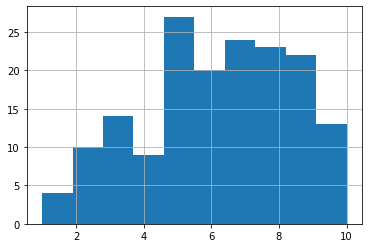

In [5]:
data_all['Labels'].hist()

<AxesSubplot:>

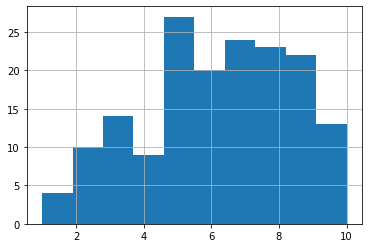

In [14]:
data_all['Labels'].hist()

In [440]:
data_all['Labels']

0      10
1      10
2       6
3       8
4       7
       ..
161     9
162     6
163     7
164     6
165     8
Name: Labels, Length: 166, dtype: int64

In [15]:
kino = pd.read_excel('ratings/Result movies.xlsx')
kino

Participant     a.mp4      b.mp4     c.mp4      d.mp4      e.mp4     f.mp4  \
0            1        10  10.000000  2.000000   5.000000   9.000000  9.000000   
1            2        10   8.000000  7.000000   9.000000   7.000000  6.000000   
2            3         6   3.000000  5.000000   6.000000   5.000000  5.000000   
3            4         8   6.000000  5.000000   9.000000   5.000000  7.000000   
4            5         3   2.000000  4.000000   1.000000   7.000000  3.000000   
5            6         7   7.000000  2.000000   8.000000   5.000000  3.000000   
6            7         9   4.000000  4.000000   3.000000   9.000000  8.000000   
7            8         5   7.000000  5.000000   9.000000   3.000000  2.000000   
8            9         8   8.000000  2.000000   3.000000   7.000000  5.000000   
9           10         3   8.000000  7.000000   3.000000   1.000000  3.000000   
10          11         8        NaN  3.000000   5.000000   8.000000       NaN   
11          12        10   5.000000  6.000000   9.000000  10.000000  7.000000   
12          13         8  10.000000  5.000000   7.000000   3.000000  8.000000   
13          14        10   7.000000  5.000000   8.000000   1.000000  8.000000   
14          15         9   7.000000  4.000000  10.000000   7.000000  7.000000   
15          16         6   6.000000  8.000000   4.000000   6.000000  9.000000   
16          17         9   7.000000  5.000000   7.000000  10.000000  7.000000   
17          18        10   7.000000  8.000000   8.000000  10.000000  8.000000   
18          19         5   6.000000  6.000000  10.000000   7.000000  5.000000   
19          20         5   4.000000  3.000000   9.000000   8.000000  6.000000   
20          21         9   8.000000  6.000000   6.000000   9.000000  6.000000   
21         NaN       NaN        NaN       NaN        NaN        NaN       NaN   
22         NaN       NaN        NaN       NaN        NaN        NaN       NaN   
23         NaN       NaN        NaN       NaN        NaN        NaN       NaN   
24         NaN       NaN        NaN       NaN        NaN        NaN       NaN   
25  испытуемые   7.52381   6.500000  4.857143   6.619048   6.523810  6.100000   
26   кинопоиск       7.5   8.000000  7.100000   8.100000   7.900000  7.000000   
27         NaN       NaN        NaN       NaN        NaN        NaN       NaN   
28         NaN  0.003175   0.187500  0.315895   0.182834   0.174201  0.128571   
29         NaN             0.063123  0.056478   0.076412   0.049834  0.069767   

        g.mp4     h.mp4  Unnamed: 9 порядок предъявления  \
0    5.000000  9.000000         NaN             14853762   
1    6.000000  9.000000         NaN             26753841   
2    5.000000  2.000000         NaN             83261475   
3    4.000000  6.000000         NaN             57164283   
4    7.000000  2.000000         NaN             72481536   
5    2.000000  5.000000         NaN             14853762   
6    8.000000  5.000000         NaN             26753841   
7    8.000000  7.000000         NaN             83261475   
8    5.000000  9.000000         NaN             57164283   
9    6.000000  2.000000         NaN             72481536   
10   6.000000  4.000000         NaN             14853762   
11   8.000000  2.000000         NaN             26753841   
12   3.000000  6.000000         NaN             83261475   
13   9.000000  4.000000         NaN             57164283   
14   5.000000  9.000000         NaN             72481536   
15   9.000000  5.000000         NaN             14853762   
16   9.000000  9.000000         NaN             26753841   
17   7.000000  5.000000         NaN             83261475   
18  10.000000  5.000000         NaN             57164283   
19   8.000000  6.000000         NaN             72481536   
20   7.000000  1.000000         NaN             14853762   
21        NaN       NaN         NaN                  NaN   
22        NaN       NaN         NaN                  NaN   
23        NaN       NaN         NaN                

In [16]:
kino = kino[26: 27][['a.mp4', 'b.mp4', 'c.mp4', 'd.mp4', 'e.mp4', 'f.mp4','g.mp4', 'h.mp4']]
kino

a.mp4  b.mp4  c.mp4  d.mp4  e.mp4  f.mp4  g.mp4  h.mp4
26   7.5    8.0    7.1    8.1    7.9    7.0    6.8    7.8

In [17]:
kino

a.mp4  b.mp4  c.mp4  d.mp4  e.mp4  f.mp4  g.mp4  h.mp4
26   7.5    8.0    7.1    8.1    7.9    7.0    6.8    7.8

In [6]:
data_all = pd.read_csv('Matrix_complexity.csv')
data_all['Labels']

0      10
1      10
2       6
3       8
4       7
       ..
161     9
162     6
163     7
164     6
165     8
Name: Labels, Length: 166, dtype: int64

In [879]:
ratings = pd.read_excel('ratings/Result movies.xlsx')
kino = ratings[26:27][['a.mp4', 'b.mp4', 'c.mp4', 'd.mp4', 'e.mp4', 'f.mp4','g.mp4', 'h.mp4']]
kino

a.mp4  b.mp4  c.mp4  d.mp4  e.mp4  f.mp4  g.mp4  h.mp4
26   7.5    8.0    7.1    8.1    7.9    7.0    6.8    7.8

In [880]:
kino = pd.DataFrame(np.array(data_all['film'].apply(lambda x : kino[chr(x + 96)  + '.mp4'])), columns=['kinopoisk'])
kino

kinopoisk
0          7.5
1          7.5
2          7.5
3          7.5
4          7.5
..         ...
161        7.9
162        7.1
163        6.8
164        7.0
165        8.0

[166 rows x 1 columns]

In [881]:
data_all = pd.concat([data_all, kino], axis=1)
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_Oz   SpEn_O2   SpEn_P4   SpEn_P8  \
0    1.321008   1.879488  ...  0.731636  0.770763  0.511796  0.747356   
1    3.860679   5.419934  ...  0.690308  0.753110  0.658623  0.622934   
2    2.241788   2.574973  ...  0.701456  0.737281  0.687757  0.755020   
3    1.869292   2.943064  ...  0.708789  0.720716  0.638770  0.747617   
4    9.667544  10.095658  ...  0.724328  0.782440  0.802430  0.697681   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8  kinopoisk  
0    0.734549  0.573571  0.666546  0.701854  0.541023        7.5  
1    0.705115  0.694461  0.596211  0.661915  0.626924        7.5  
2    0.690869  0.664579  0.732706  0.671702  0.712289        7.5  
3    0.701575  0.635875  0.704821  0.676821  0.660730        7.5  
4    0.749899  0.768600  0.697917  0.762089  0.740299        7.5  
..        ...       ...       ...       ...       ...        ...  
161       NaN       NaN       NaN       NaN       NaN        7.9  
162       NaN       NaN       NaN       NaN       NaN        7.1  
163       NaN       NaN       NaN       NaN       NaN        6.8  
164       NaN       NaN       NaN       NaN       NaN        7.0  
165       NaN       NaN       NaN       NaN       NaN        8.0  

[166 rows x 521 columns]

In [882]:
mat = pd.read_excel('matrix_kinopoisk.xlsx')
mat = mat[['film', 'Subj', 'FAA(w-r)', 'FAA(w)']]
mat

film  Subj  FAA(w-r)    FAA(w)
0       1     1 -0.128504 -0.136602
1       1     2 -4.180999  1.052521
2       1     3  0.251607 -0.381461
3       1     4 -0.311846 -0.403640
4       1     6       NaN       NaN
..    ...   ...       ...       ...
143     8    16  0.486371 -0.254889
144     8    17       NaN       NaN
145     8    18 -0.225944 -0.609702
146     8    19       NaN       NaN
147     8    20       NaN       NaN

[148 rows x 4 columns]

In [883]:
mat = data_all[['film', 'Subj']].merge(mat, how='outer')

In [884]:
mat

film  Subj  FAA(w-r)    FAA(w)
0       1     1 -0.128504 -0.136602
1       1     2 -4.180999  1.052521
2       1     3  0.251607 -0.381461
3       1     4 -0.311846 -0.403640
4       1     6       NaN       NaN
..    ...   ...       ...       ...
161     5    21       NaN       NaN
162     3    21       NaN       NaN
163     7    21       NaN       NaN
164     6    21       NaN       NaN
165     2    21       NaN       NaN

[166 rows x 4 columns]

In [885]:
data_all = pd.concat([data_all, mat.drop(['film', 'Subj'], axis=1)], axis=1)
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_P4   SpEn_P8   SpEn_Cz   SpEn_C4  \
0    1.321008   1.879488  ...  0.511796  0.747356  0.734549  0.573571   
1    3.860679   5.419934  ...  0.658623  0.622934  0.705115  0.694461   
2    2.241788   2.574973  ...  0.687757  0.755020  0.690869  0.664579   
3    1.869292   2.943064  ...  0.638770  0.747617  0.701575  0.635875   
4    9.667544  10.095658  ...  0.802430  0.697681  0.749899  0.768600   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_T8   SpEn_F4   SpEn_F8  kinopoisk  FAA(w-r)    FAA(w)  
0    0.666546  0.701854  0.541023        7.5 -0.128504 -0.136602  
1    0.596211  0.661915  0.626924        7.5 -4.180999  1.052521  
2    0.732706  0.671702  0.712289        7.5  0.251607 -0.381461  
3    0.704821  0.676821  0.660730        7.5 -0.311846 -0.403640  
4    0.697917  0.762089  0.740299        7.5       NaN       NaN  
..        ...       ...       ...        ...       ...       ...  
161       NaN       NaN       NaN        7.9       NaN       NaN  
162       NaN       NaN       NaN        7.1       NaN       NaN  
163       NaN       NaN       NaN        6.8       NaN       NaN  
164       NaN       NaN       NaN        7.0       NaN       NaN  
165       NaN       NaN       NaN        8.0       NaN       NaN  

[166 rows x 523 columns]

In [886]:
data_all.to_csv('Matrix_kinopoisk.csv', index=False)

In [862]:
data_all[['film', 'Subj', 'FAA(w-r)', 'FAA(w)']]

KeyError: "['FAA(w-r)', 'FAA(w)'] not in index"

In [ ]:
data_all.to_csv('Matrix_kinopoisk_compexity.csv')

In [785]:
ratings = pd.read_excel('ratings/Result movies.xlsx')
ratings = ratings[0 : 21][['a.mp4', 'b.mp4', 'c.mp4', 'd.mp4', 'e.mp4', 'f.mp4','g.mp4', 'h.mp4']]
ratings

a.mp4  b.mp4  c.mp4  d.mp4  e.mp4  f.mp4  g.mp4  h.mp4
0     10   10.0    2.0    5.0    9.0    9.0    5.0    9.0
1     10    8.0    7.0    9.0    7.0    6.0    6.0    9.0
2      6    3.0    5.0    6.0    5.0    5.0    5.0    2.0
3      8    6.0    5.0    9.0    5.0    7.0    4.0    6.0
4      3    2.0    4.0    1.0    7.0    3.0    7.0    2.0
5      7    7.0    2.0    8.0    5.0    3.0    2.0    5.0
6      9    4.0    4.0    3.0    9.0    8.0    8.0    5.0
7      5    7.0    5.0    9.0    3.0    2.0    8.0    7.0
8      8    8.0    2.0    3.0    7.0    5.0    5.0    9.0
9      3    8.0    7.0    3.0    1.0    3.0    6.0    2.0
10     8    NaN    3.0    5.0    8.0    NaN    6.0    4.0
11    10    5.0    6.0    9.0   10.0    7.0    8.0    2.0
12     8   10.0    5.0    7.0    3.0    8.0    3.0    6.0
13    10    7.0    5.0    8.0    1.0    8.0    9.0    4.0
14     9    7.0    4.0   10.0    7.0    7.0    5.0    9.0
15     6    6.0    8.0    4.0    6.0    9.0    9.0    5.0
16     9    7.0    5.0    7.0   10.0    7.0    9.0    9.0
17    10    7.0    8.0    8.0   10.0    8.0    7.0    5.0
18     5    6.0    6.0   10.0    7.0    5.0   10.0    5.0
19     5    4.0    3.0    9.0    8.0    6.0    8.0    6.0
20     9    8.0    6.0    6.0    9.0    6.0    7.0    1.0

In [299]:
arr = []
for row in data_all[['film', 'Subj']].values:
    ratings.loc[row[1] - 1][ chr(row[0] + 96) + '.mp4']
    print(ratings.loc[row[1] - 1][ chr(row[0] + 96) + '.mp4'])
    arr.append(ratings.loc[row[1] - 1][ chr(row[0] + 96) + '.mp4'])

10
10
6
8
7
9
5
8
3
8
10
8
10
9
6
9
10
5
5
10.0
8.0
3.0
6.0
7.0
4.0
7.0
8.0
8.0
5.0
10.0
7.0
7.0
6.0
7.0
7.0
6.0
4.0
2.0
7.0
5.0
5.0
2.0
4.0
5.0
2.0
7.0
3.0
6.0
5.0
5.0
4.0
8.0
5.0
8.0
6.0
3.0
5.0
9.0
6.0
9.0
8.0
3.0
9.0
3.0
3.0
5.0
9.0
7.0
8.0
10.0
4.0
7.0
8.0
10.0
9.0
9.0
7.0
5.0
5.0
5.0
9.0
3.0
7.0
1.0
8.0
10.0
3.0
1.0
7.0
6.0
10.0
10.0
7.0
8.0
9.0
6.0
5.0
7.0
3.0
8.0
2.0
5.0
3.0
7.0
8.0
8.0
7.0
9.0
7.0
8.0
5.0
6.0
5.0
6.0
5.0
4.0
2.0
8.0
8.0
5.0
6.0
6.0
8.0
3.0
9.0
5.0
9.0
9.0
7.0
10.0
8.0
9.0
9.0
2.0
6.0
5.0
5.0
7.0
9.0
2.0
4.0
2.0
6.0
4.0
9.0
5.0
9.0
5.0
5.0
6.0
7.0
2.0
1.0
2.0
3
7.0
4.0
3.0
9
6.0
1.0
9.0
6.0
7.0
6.0
8.0


In [300]:
arr

[10,
 10,
 6,
 8,
 7,
 9,
 5,
 8,
 3,
 8,
 10,
 8,
 10,
 9,
 6,
 9,
 10,
 5,
 5,
 10.0,
 8.0,
 3.0,
 6.0,
 7.0,
 4.0,
 7.0,
 8.0,
 8.0,
 5.0,
 10.0,
 7.0,
 7.0,
 6.0,
 7.0,
 7.0,
 6.0,
 4.0,
 2.0,
 7.0,
 5.0,
 5.0,
 2.0,
 4.0,
 5.0,
 2.0,
 7.0,
 3.0,
 6.0,
 5.0,
 5.0,
 4.0,
 8.0,
 5.0,
 8.0,
 6.0,
 3.0,
 5.0,
 9.0,
 6.0,
 9.0,
 8.0,
 3.0,
 9.0,
 3.0,
 3.0,
 5.0,
 9.0,
 7.0,
 8.0,
 10.0,
 4.0,
 7.0,
 8.0,
 10.0,
 9.0,
 9.0,
 7.0,
 5.0,
 5.0,
 5.0,
 9.0,
 3.0,
 7.0,
 1.0,
 8.0,
 10.0,
 3.0,
 1.0,
 7.0,
 6.0,
 10.0,
 10.0,
 7.0,
 8.0,
 9.0,
 6.0,
 5.0,
 7.0,
 3.0,
 8.0,
 2.0,
 5.0,
 3.0,
 7.0,
 8.0,
 8.0,
 7.0,
 9.0,
 7.0,
 8.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 4.0,
 2.0,
 8.0,
 8.0,
 5.0,
 6.0,
 6.0,
 8.0,
 3.0,
 9.0,
 5.0,
 9.0,
 9.0,
 7.0,
 10.0,
 8.0,
 9.0,
 9.0,
 2.0,
 6.0,
 5.0,
 5.0,
 7.0,
 9.0,
 2.0,
 4.0,
 2.0,
 6.0,
 4.0,
 9.0,
 5.0,
 9.0,
 5.0,
 5.0,
 6.0,
 7.0,
 2.0,
 1.0,
 2.0,
 3,
 7.0,
 4.0,
 3.0,
 9,
 6.0,
 1.0,
 9.0,
 6.0,
 7.0,
 6.0,
 8.0]

In [301]:
list(data_all['Labels']) == arr

True

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [312]:
X = data_all.drop(['Labels', 'film', 'Subj'], axis=1)
y = data_all['Labels']

In [310]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
X_test, X

In [212]:
df = {
    '1' : data_all['Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7'] / data_all['Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7'],
    'lables' : data_all['Labels']
}

In [213]:
pd.DataFrame(df).corr()

1    lables
1       1.000000 -0.057705
lables -0.057705  1.000000

In [272]:
s = data_all.corr().abs().unstack()
so = s.sort_values(kind="quicksort")

In [269]:
corr_matrix = data_all.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))).stack()

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [273]:
corr = pd.DataFrame(so)

In [271]:
sol

film               Subj                 7.351588e-17
                   Alpha_Fz             6.365732e-02
                   Alpha_F3             3.028213e-02
                   Alpha_F7             3.268206e-02
                   Alpha_C3             8.568378e-02
                                            ...     
zero_crossings_C4  zero_crossings_F4    5.911177e-01
                   zero_crossings_F8    5.989019e-01
zero_crossings_T8  zero_crossings_F4    6.298953e-01
                   zero_crossings_F8    9.055081e-01
zero_crossings_F4  zero_crossings_F8    7.021597e-01
Length: 3181407, dtype: float64

In [277]:
m_corr = 0
for [l, p] in list(corr[(corr[0] != 1) & (corr[0] > 0.9)].index):
    df = {
    '1' : data_all[l] / data_all[p],
    'lables' : data_all['Labels']
    }
    #display(pd.DataFrame(df).corr())
    m_corr = max(m_corr, pd.DataFrame(df).corr().abs()['1'].iloc[1])
    print(l, p, pd.DataFrame(df).corr()['1'].iloc[1])

teager_kaiser_energy_3mean_O2 Theta_O2 0.1388256507078686
Theta_O2 teager_kaiser_energy_3mean_O2 -0.1409185294589562
energy_freq_bands_band0_P4 teager_kaiser_energy_3mean_P8 0.022951935049911228
teager_kaiser_energy_3mean_P8 energy_freq_bands_band0_P4 0.015165303540082168
wavelet_coef_energy_1_Pz line_length_Pz 0.01536294990361466
line_length_Pz wavelet_coef_energy_1_Pz 0.008718353598355674
std_O2 Hjorth_O2 0.05939258083859974
Hjorth_O2 std_O2 -0.08556832668839989
teager_kaiser_energy_0std_P7 std_P7 0.10030456012746883
std_P7 teager_kaiser_energy_0std_P7 -0.11465878533265467
spect_corr_Oz_F4 spect_corr_O1_F4 -0.00742769465683469
spect_corr_F4_O1 spect_corr_Oz_F4 -0.09070706447628578
spect_corr_F4_Oz spect_corr_F4_O1 -0.00742769465683469
spect_corr_O1_F4 spect_corr_Oz_F4 -0.09070706447628578
spect_corr_F4_O1 spect_corr_F4_Oz -0.09070706447628578
spect_corr_Oz_F4 spect_corr_F4_O1 -0.00742769465683469
spect_corr_O1_F4 spect_corr_F4_Oz -0.09070706447628578
spect_corr_F4_Oz spect_corr_O1_F4

energy_freq_bands_band0_C3 energy_freq_bands_band0_Oz -0.005677738813568826
energy_freq_bands_band0_Oz energy_freq_bands_band0_C3 -0.09912311396394964
teager_kaiser_energy_2mean_F4 Theta_F4 0.1949710413079613
Theta_F4 teager_kaiser_energy_2mean_F4 -0.16350649749089194
teager_kaiser_energy_3std_P4 teager_kaiser_energy_3mean_P3 0.18655686218773887
teager_kaiser_energy_3mean_P3 teager_kaiser_energy_3std_P4 -0.19863161673763446
zero_crossings_T7 PFD_T7 -0.02412809870226241
PFD_T7 zero_crossings_T7 0.032725093384269495
teager_kaiser_energy_3std_T7 teager_kaiser_energy_0std_O1 -0.010554364823092516
teager_kaiser_energy_0std_O1 teager_kaiser_energy_3std_T7 -0.10637761986991763
teager_kaiser_energy_3mean_F3 wavelet_coef_energy_4_P3 0.0660941355380595
wavelet_coef_energy_4_P3 teager_kaiser_energy_3mean_F3 -0.09951171916431367
variance_F4 rms_P8 -0.01782048303098164
rms_P8 variance_F4 0.0960041015960543
Beta_watch/Alpha_watch_P3 Beta_watch/(Alpha_watch + Theta_watch)_P3 -0.00827259863272123
Beta

FI_P4 Hjorth_P4 -0.019122551030325178
Hjorth_P4 FI_P4 0.04332652079373098
teager_kaiser_energy_4mean_Fz wavelet_coef_energy_2_F3 -0.19846542427350997
wavelet_coef_energy_2_F3 teager_kaiser_energy_4mean_Fz 0.12652779912701878
wavelet_coef_energy_3_Cz Theta_Cz 0.036478294840119496
Theta_Cz wavelet_coef_energy_3_Cz -0.027034186705126955
energy_freq_bands_band0_F4 wavelet_coef_energy_3_P7 -0.09363622109724161
wavelet_coef_energy_3_P7 energy_freq_bands_band0_F4 0.12238478012461901
FI_O1 PFD_O1 0.02017947043277179
PFD_O1 FI_O1 -0.02273955764176225
wavelet_coef_energy_3_Oz energy_freq_bands_band0_Oz 0.07730024565959115
energy_freq_bands_band0_Oz wavelet_coef_energy_3_Oz -0.09353049587633151
phase_lock_val_Oz_C3 time_corr_Oz_C3 0.09762223353119404
time_corr_C3_Oz phase_lock_val_Oz_C3 0.016650277560444904
time_corr_Oz_C3 phase_lock_val_Oz_C3 0.016650277560444904
time_corr_Oz_C3 phase_lock_val_C3_Oz 0.016650277560444904
time_corr_C3_Oz phase_lock_val_C3_Oz 0.016650277560444904
phase_lock_val_C3_

std_Oz energy_freq_bands_band0_O1 0.09232202461808707
teager_kaiser_energy_6std_C4 wavelet_coef_energy_3_O1 -0.006933395366309281
wavelet_coef_energy_3_O1 teager_kaiser_energy_6std_C4 0.01573390827219463
FI_C4 SpEn_C4 0.06444552280478784
SpEn_C4 FI_C4 -0.031716909335263783
teager_kaiser_energy_4mean_C4 wavelet_coef_energy_2_C4 -0.056485814599608955
wavelet_coef_energy_2_C4 teager_kaiser_energy_4mean_C4 0.06230662124444069
FI_F3 PFD_F3 0.07077543444991817
PFD_F3 FI_F3 -0.06684903846015966
FI_O1 KFD_O1 -0.01592120181896806
KFD_O1 FI_O1 -0.017525928085465266
ptp_amp_T8 std_P8 -0.07868013757064823
std_P8 ptp_amp_T8 0.10823966512923855
teager_kaiser_energy_3std_P7 teager_kaiser_energy_2std_P7 -0.06958287966565542
teager_kaiser_energy_2std_P7 teager_kaiser_energy_3std_P7 0.14281338901974208
Alpha_ratio_O1 Beta_watch/Alpha_watch_O1 -0.01375386344579591
Beta_watch/Alpha_watch_O1 Alpha_ratio_O1 -0.017046158986218165
Theta_watch-relax_P3 Theta_watch-relax_C3 -0.023070221165771856
Theta_watch-rel

teager_kaiser_energy_4mean_O2 teager_kaiser_energy_4mean_Fz -0.055659257472966836
teager_kaiser_energy_4mean_Fz teager_kaiser_energy_4mean_O2 0.10318682022707777
teager_kaiser_energy_5mean_P4 teager_kaiser_energy_5mean_Pz -0.056693330848714404
teager_kaiser_energy_5mean_Pz teager_kaiser_energy_5mean_P4 0.044920779260025176
teager_kaiser_energy_3mean_Fz energy_freq_bands_band0_P3 0.06718377940251186
energy_freq_bands_band0_P3 teager_kaiser_energy_3mean_Fz -0.01813103485016679
wavelet_coef_energy_4_Fz energy_freq_bands_band0_F8 0.2467153603460018
energy_freq_bands_band0_F8 wavelet_coef_energy_4_Fz -0.15740223894335134
wavelet_coef_energy_2_F3 energy_freq_bands_band0_F3 -0.011930906834273823
energy_freq_bands_band0_F3 wavelet_coef_energy_2_F3 -0.01931565890227539
wavelet_coef_energy_4_F4 teager_kaiser_energy_3mean_Fz -0.027376575785814525
teager_kaiser_energy_3mean_Fz wavelet_coef_energy_4_F4 0.10003644173759725
teager_kaiser_energy_3mean_F3 teager_kaiser_energy_2mean_P4 0.015653666572009

teager_kaiser_energy_1std_F3 teager_kaiser_energy_1mean_P4 0.039181123053344494
teager_kaiser_energy_1mean_P4 teager_kaiser_energy_1std_F3 -0.21539798480800443
SVDEn_O1 KFD_O1 0.006106764425443748
KFD_O1 SVDEn_O1 -0.0052770755963340915
variance_O2 teager_kaiser_energy_0mean_O2 -0.06959918311984627
teager_kaiser_energy_0mean_O2 variance_O2 0.15699089997546806
line_length_F8 hjorth_mobility_spect_F8 0.14066524478731232
hjorth_mobility_spect_F8 line_length_F8 -0.11834205786352538
ptp_amp_P8 teager_kaiser_energy_5std_O1 0.13779228586356623
teager_kaiser_energy_5std_O1 ptp_amp_P8 -0.10401629444058849
teager_kaiser_energy_6std_P7 teager_kaiser_energy_0mean_F4 -0.07628421734793912
teager_kaiser_energy_0mean_F4 teager_kaiser_energy_6std_P7 0.0882453697709041
wavelet_coef_energy_2_Fz wavelet_coef_energy_3_P4 0.024978094235130848
wavelet_coef_energy_3_P4 wavelet_coef_energy_2_Fz 0.08642842843488185
hjorth_complexity_spect_F3 teager_kaiser_energy_5mean_F7 0.1266238961867729
teager_kaiser_energy_5

PFD_T7 hjorth_mobility_T7 -0.07761636368237834
energy_freq_bands_band0_O2 teager_kaiser_energy_2mean_Fz -0.13142998872246206
teager_kaiser_energy_2mean_Fz energy_freq_bands_band0_O2 0.19375627428517014
std_F3 ptp_amp_F3 0.09453324500081271
ptp_amp_F3 std_F3 -0.10032574935294614
teager_kaiser_energy_3std_C3 teager_kaiser_energy_3mean_Oz -0.0322183842450239
teager_kaiser_energy_3mean_Oz teager_kaiser_energy_3std_C3 -0.04786189682417063
SVDEn_C3 SpEn_C3 0.017419811946189585
SpEn_C3 SVDEn_C3 -0.002969428252918414
spect_slope_MSE_P7 PFD_P7 -0.19362716018523407
PFD_P7 spect_slope_MSE_P7 0.06804367976321404
teager_kaiser_energy_3mean_F3 wavelet_coef_energy_5_Fz -0.028639192164776516
wavelet_coef_energy_5_Fz teager_kaiser_energy_3mean_F3 0.01818349889651269
PFD_F8 RR_F8 0.12329539902728794
RR_F8 PFD_F8 -0.09175659681100487
quantile_F8 DiffEn_F8 -0.04097469065185041
DiffEn_F8 quantile_F8 0.06019168446308243
teager_kaiser_energy_3std_T7 energy_freq_bands_band0_Oz 0.0466967091074358
energy_freq_b

teager_kaiser_energy_6mean_P4 wavelet_coef_energy_1_P4 -0.02284804303679712
wavelet_coef_energy_1_P4 teager_kaiser_energy_6mean_P4 0.02174259667640103
wavelet_coef_energy_4_P4 teager_kaiser_energy_2std_F3 -0.20712826835021017
teager_kaiser_energy_2std_F3 wavelet_coef_energy_4_P4 -0.024959169415405397
wavelet_coef_energy_4_F7 teager_kaiser_energy_1mean_F7 -0.1595652773650379
teager_kaiser_energy_1mean_F7 wavelet_coef_energy_4_F7 0.18297678428079672
eig_Pz eig_P3 -0.002898945474525196
eig_P3 eig_Pz -0.08586693267142749
SVDEn_P8 PFD_P8 -0.07005877566752061
PFD_P8 SVDEn_P8 0.06847809429500791
wavelet_coef_energy_3_Oz teager_kaiser_energy_6std_F7 0.15855755130945526
teager_kaiser_energy_6std_F7 wavelet_coef_energy_3_Oz -0.21798571595918043
Alpha_ratio_F8 Alpha_ratio_T8 0.025297218221717863
Alpha_ratio_T8 Alpha_ratio_F8 -0.0010445064513029615
hjorth_mobility_spect_C4 energy_freq_bands_band2_C4 0.0665258207695901
energy_freq_bands_band2_C4 hjorth_mobility_spect_C4 -0.06540386406859777
teager_

SVDEn_F4 RR_F4 0.044645107703010056
wavelet_coef_energy_1_T7 teager_kaiser_energy_6mean_P7 0.01905779624697676
teager_kaiser_energy_6mean_P7 wavelet_coef_energy_1_T7 -0.027326295675228644
wavelet_coef_energy_3_Oz teager_kaiser_energy_6std_T7 0.12352103484119707
teager_kaiser_energy_6std_T7 wavelet_coef_energy_3_Oz -0.16135718065866542
teager_kaiser_energy_0std_Pz ptp_amp_Pz 0.12303366045729433
ptp_amp_Pz teager_kaiser_energy_0std_Pz -0.09550666611659676
wavelet_coef_energy_3_Oz teager_kaiser_energy_6std_Oz 0.1033509212761859
teager_kaiser_energy_6std_Oz wavelet_coef_energy_3_Oz -0.14256360572824464
teager_kaiser_energy_6mean_F7 line_length_F7 -0.13325905973604685
line_length_F7 teager_kaiser_energy_6mean_F7 0.11199209853746933
wavelet_coef_energy_4_P3 teager_kaiser_energy_2mean_P4 -0.12014990516464631
teager_kaiser_energy_2mean_P4 wavelet_coef_energy_4_P3 0.10326090011881436
KFD_O1 KFD_Oz 0.12861738650537538
KFD_Oz KFD_O1 -0.10279245760023836
zero_crossings_O1 zero_crossings_Oz 0.06194

phase_lock_val_F7_Pz time_corr_Pz_F7 0.1964261365105116
time_corr_Pz_F7 phase_lock_val_F7_Pz -0.04257538462869599
time_corr_F7_Pz phase_lock_val_F7_Pz -0.04257538462869599
time_corr_F7_Pz phase_lock_val_Pz_F7 -0.04257538462869599
phase_lock_val_Pz_F7 time_corr_Pz_F7 0.1964261365105116
Beta_P4 line_length_P4 0.0574449877372821
line_length_P4 Beta_P4 -0.05806653926058135
wavelet_coef_energy_3_P8 teager_kaiser_energy_2mean_Fz -0.04552980166522347
teager_kaiser_energy_2mean_Fz wavelet_coef_energy_3_P8 0.0645351919581365
wavelet_coef_energy_2_P4 teager_kaiser_energy_4mean_P4 0.09527899848130933
teager_kaiser_energy_4mean_P4 wavelet_coef_energy_2_P4 -0.0806543563029571
energy_freq_bands_band0_O1 teager_kaiser_energy_0std_Oz -0.020571981982264485
teager_kaiser_energy_0std_Oz energy_freq_bands_band0_O1 0.09459953267934539
teager_kaiser_energy_3mean_P4 teager_kaiser_energy_3std_F3 -0.11820002183565864
teager_kaiser_energy_3std_F3 teager_kaiser_energy_3mean_P4 0.15254624842977688
energy_freq_ban

teager_kaiser_energy_3mean_P4 energy_freq_bands_band0_P3 0.04361424065453262
energy_freq_bands_band2_P7 energy_freq_bands_band2_T7 0.023756260935977245
energy_freq_bands_band2_T7 energy_freq_bands_band2_P7 0.0032553461878982604
teager_kaiser_energy_5mean_Pz teager_kaiser_energy_6mean_Pz 0.03670356679791314
teager_kaiser_energy_6mean_Pz teager_kaiser_energy_5mean_Pz -0.0559022518483947
energy_freq_bands_band0_F4 teager_kaiser_energy_2std_Fz -0.23981631979922063
teager_kaiser_energy_2std_Fz energy_freq_bands_band0_F4 0.1701954032562425
teager_kaiser_energy_6std_F7 energy_freq_bands_band0_C3 -0.17944443970969956
energy_freq_bands_band0_C3 teager_kaiser_energy_6std_F7 0.1890990011161852
teager_kaiser_energy_5std_O1 teager_kaiser_energy_0mean_F4 -0.12299071018800369
teager_kaiser_energy_0mean_F4 teager_kaiser_energy_5std_O1 0.07564875995683606
Alpha_ratio_P7 Alpha_ratio_P3 0.11880932933546613
Alpha_ratio_P3 Alpha_ratio_P7 -0.12765830262037672
variance_T8 ptp_amp_T8 0.09367800538776408
ptp_a

wavelet_coef_energy_3_F4 wavelet_coef_energy_3_F8 0.0667541286426107
wavelet_coef_energy_3_F8 wavelet_coef_energy_3_F4 0.03133011860288627
hjorth_mobility_spect_P4 wavelet_coef_energy_1_P4 0.09102461996854486
wavelet_coef_energy_1_P4 hjorth_mobility_spect_P4 -0.06300070914574289
Hjorth_Oz Hjorth_O1 0.11269966926629035
Hjorth_O1 Hjorth_Oz -0.07551385960105376
energy_freq_bands_band2_Cz hjorth_complexity_spect_Cz 0.02908416736825079
hjorth_complexity_spect_Cz energy_freq_bands_band2_Cz -0.011003701584832491
variance_P8 teager_kaiser_energy_0mean_P8 0.04052764342421521
teager_kaiser_energy_0mean_P8 variance_P8 0.0482839383439498
wavelet_coef_energy_2_O2 wavelet_coef_energy_2_F3 -0.23128246514118259
wavelet_coef_energy_2_F3 wavelet_coef_energy_2_O2 0.183503257941362
TotalAbsPow_C4 wavelet_coef_energy_2_C4 -0.033451768285434905
wavelet_coef_energy_2_C4 TotalAbsPow_C4 0.027280562258765368
teager_kaiser_energy_4mean_T7 wavelet_coef_energy_2_T7 -0.013318090905513839
wavelet_coef_energy_2_T7 te

teager_kaiser_energy_0mean_P8 teager_kaiser_energy_6std_P8 0.10375470845468483
teager_kaiser_energy_6std_P8 teager_kaiser_energy_0mean_P8 -0.10601921128187135
variance_F7 teager_kaiser_energy_3std_C3 0.010556403143314016
teager_kaiser_energy_3std_C3 variance_F7 0.04808025371007679
energy_freq_bands_band0_P3 teager_kaiser_energy_3std_F3 -0.159598375070709
teager_kaiser_energy_3std_F3 energy_freq_bands_band0_P3 0.11656613476917459
teager_kaiser_energy_4mean_Cz teager_kaiser_energy_4std_Cz -0.0019775677179505236
teager_kaiser_energy_4std_Cz teager_kaiser_energy_4mean_Cz 0.02059291831804352
zero_crossings_F8 PFD_F8 -0.09891409680799862
PFD_F8 zero_crossings_F8 0.12126006901648256
wavelet_coef_energy_0_P3 hjorth_complexity_spect_P3 -0.07122038069470829
hjorth_complexity_spect_P3 wavelet_coef_energy_0_P3 0.0605832365123999
time_corr_P7_F4 phase_lock_val_F4_P7 0.09056644892224741
phase_lock_val_P7_F4 time_corr_P7_F4 -0.007740987742068797
time_corr_F4_P7 phase_lock_val_F4_P7 0.0905664489222474

Alpha_F7 teager_kaiser_energy_4mean_F7 0.09383647239587617
teager_kaiser_energy_4mean_F7 Alpha_F7 -0.1142593768350544
SVDEn_P4 Hjorth_P4 -0.09374867599944031
Hjorth_P4 SVDEn_P4 0.07910873655388778
line_length_F4 Beta_F4 0.08508969546594282
Beta_F4 line_length_F4 -0.07164699113395069
Theta_Pz wavelet_coef_energy_4_P4 -0.047523021020336315
wavelet_coef_energy_4_P4 Theta_Pz 0.07006219094407591
energy_freq_bands_band0_C3 teager_kaiser_energy_3mean_Oz -0.05674202565604457
teager_kaiser_energy_3mean_Oz energy_freq_bands_band0_C3 -0.037278764508405525
teager_kaiser_energy_4std_F3 wavelet_coef_energy_2_F3 -0.06699039912766039
wavelet_coef_energy_2_F3 teager_kaiser_energy_4std_F3 0.07657413618589234
TotalAbsPow_C4 TotalAbsPow_C3 -0.07123444272733907
TotalAbsPow_C3 TotalAbsPow_C4 0.110695238193244
wavelet_coef_energy_0_F3 hjorth_mobility_spect_F3 -0.203829150641981
hjorth_mobility_spect_F3 wavelet_coef_energy_0_F3 0.19243944745486363
teager_kaiser_energy_3mean_Fz energy_freq_bands_band0_F4 0.138

hjorth_mobility_Cz PFD_Cz -0.09262027373269907
PFD_Cz hjorth_mobility_Cz 0.10522914300956836
hjorth_mobility_spect_Oz energy_freq_bands_band2_Oz 0.10316734490367992
energy_freq_bands_band2_Oz hjorth_mobility_spect_Oz -0.13381319992021018
energy_freq_bands_band1_Pz Alpha_Pz -0.03605578262638152
Alpha_Pz energy_freq_bands_band1_Pz 0.03257639757747391
wavelet_coef_energy_0_Oz teager_kaiser_energy_0std_T7 -0.08382854982760612
teager_kaiser_energy_0std_T7 wavelet_coef_energy_0_Oz 0.011440351987335926
teager_kaiser_energy_0std_Oz teager_kaiser_energy_3std_T7 -0.05424390634199901
teager_kaiser_energy_3std_T7 teager_kaiser_energy_0std_Oz -0.0009453785259528053
variance_O1 teager_kaiser_energy_0std_Oz 0.02635096849015192
teager_kaiser_energy_0std_Oz variance_O1 0.1463863972421846
Theta_ratio_P4 Theta_ratio_Pz 0.02344492969030964
Theta_ratio_Pz Theta_ratio_P4 -0.04604782848073411
FI_O1 RR_O1 -0.10294835925533125
RR_O1 FI_O1 -0.018536274376191986
variance_P7 teager_kaiser_energy_5std_O1 0.1622484

teager_kaiser_energy_5mean_C4 line_length_C4 -0.10165303826882684
teager_kaiser_energy_0std_Oz teager_kaiser_energy_0mean_Oz -0.05643710729697706
teager_kaiser_energy_0mean_Oz teager_kaiser_energy_0std_Oz 0.015795586412508784
energy_freq_bands_band0_F3 energy_freq_bands_band1_Fz 0.12901530923174598
energy_freq_bands_band1_Fz energy_freq_bands_band0_F3 -0.10303902676268561
energy_freq_bands_band2_C3 teager_kaiser_energy_5mean_C3 -0.032257958048423435
teager_kaiser_energy_5mean_C3 energy_freq_bands_band2_C3 0.024763685412745998
RR_Oz FI_Oz -0.040161319301240825
FI_Oz RR_Oz -0.061491933377956956
teager_kaiser_energy_6mean_P7 teager_kaiser_energy_5mean_T7 -0.031186300749451508
teager_kaiser_energy_5mean_T7 teager_kaiser_energy_6mean_P7 0.0361412336959327
Beta_watch/Alpha_watch_P3 Beta_watch/Alpha_watch_Pz 0.01683425650325327
Beta_watch/Alpha_watch_Pz Beta_watch/Alpha_watch_P3 0.01717194040901461
hjorth_mobility_spect_C3 energy_freq_bands_band2_C3 0.13169807356965643
energy_freq_bands_band2

teager_kaiser_energy_3std_Fz wavelet_coef_energy_4_Fz 0.05553317228987787
wavelet_coef_energy_4_Fz teager_kaiser_energy_3std_Fz -0.02397257162517869
FI_F4 PFD_F4 0.18162221400634937
PFD_F4 FI_F4 -0.18971713189682243
Alpha_C4 TotalAbsPow_C4 0.05059488909208639
TotalAbsPow_C4 Alpha_C4 -0.07025986552570992
teager_kaiser_energy_5mean_Cz hjorth_complexity_spect_Cz 0.0740116276504525
hjorth_complexity_spect_Cz teager_kaiser_energy_5mean_Cz -0.05580231033255477
energy_freq_bands_band0_C3 teager_kaiser_energy_6std_C4 0.06249783961126734
teager_kaiser_energy_6std_C4 energy_freq_bands_band0_C3 0.0019114054633838104
teager_kaiser_energy_5std_Oz variance_T8 -0.12010512012248648
variance_T8 teager_kaiser_energy_5std_Oz 0.11605883158555971
teager_kaiser_energy_3mean_Fz wavelet_coef_energy_2_Fz 0.022756347287686638
wavelet_coef_energy_2_Fz teager_kaiser_energy_3mean_Fz -0.08718964778985665
energy_freq_bands_band0_P3 wavelet_coef_energy_3_Fz -0.045338890557937286
wavelet_coef_energy_3_Fz energy_freq_b

energy_freq_bands_band0_Oz teager_kaiser_energy_6std_C3 0.022220740745793492
teager_kaiser_energy_3std_F3 wavelet_coef_energy_5_Fz 0.011632820067225505
wavelet_coef_energy_5_Fz teager_kaiser_energy_3std_F3 -0.05310207168079895
teager_kaiser_energy_5mean_P3 line_length_P3 -0.11578774698268135
line_length_P3 teager_kaiser_energy_5mean_P3 0.13685128636869995
ptp_amp_Pz rms_Pz 0.022707091839215206
rms_Pz ptp_amp_Pz -0.027198090586862133
wavelet_coef_energy_4_F4 wavelet_coef_energy_5_Fz -0.13942014959080468
wavelet_coef_energy_5_Fz wavelet_coef_energy_4_F4 0.09695944646016522
variance_O1 std_O1 -0.1148612673671059
std_O1 variance_O1 -0.01841825337510378
teager_kaiser_energy_5std_P7 variance_P7 -0.1936758314116278
variance_P7 teager_kaiser_energy_5std_P7 0.18331738676716314
energy_freq_bands_band0_Fz teager_kaiser_energy_2mean_F4 0.07834954673926821
teager_kaiser_energy_2mean_F4 energy_freq_bands_band0_Fz -0.03667517672950881
variance_F3 rms_F3 0.08886819497371981
rms_F3 variance_F3 -0.16826

phase_lock_val_Pz_T7 time_corr_T7_Pz 0.03357360283613627
time_corr_T7_Pz phase_lock_val_T7_Pz 0.09445611672064749
time_corr_T7_Pz phase_lock_val_Pz_T7 0.09445611672064749
phase_lock_val_Pz_T7 time_corr_Pz_T7 0.03357360283613627
std_Oz ptp_amp_O1 0.06780687325622592
ptp_amp_O1 std_Oz -0.028333582496789498
teager_kaiser_energy_3std_O1 teager_kaiser_energy_0std_Oz 0.019975024459737437
teager_kaiser_energy_0std_Oz teager_kaiser_energy_3std_O1 0.07296280853593566
energy_freq_bands_band0_C3 teager_kaiser_energy_3std_C3 -0.05042541548460172
teager_kaiser_energy_3std_C3 energy_freq_bands_band0_C3 0.006806233866009982
teager_kaiser_energy_1std_O2 teager_kaiser_energy_1std_P3 0.06059866811022014
teager_kaiser_energy_1std_P3 teager_kaiser_energy_1std_O2 0.02142026104244264
Alpha_F3 energy_freq_bands_band1_F3 0.03412740270581572
energy_freq_bands_band1_F3 Alpha_F3 -0.036626522772137994
teager_kaiser_energy_2mean_P7 teager_kaiser_energy_1mean_P7 -0.127010422333935
teager_kaiser_energy_1mean_P7 teag

wavelet_coef_energy_3_F4 wavelet_coef_energy_5_F4 -0.15370946807866973
hjorth_complexity_spect_T7 wavelet_coef_energy_0_P7 0.04001719866330675
wavelet_coef_energy_0_P7 hjorth_complexity_spect_T7 -0.05045503943834557
wavelet_coef_energy_5_Fz teager_kaiser_energy_3std_Fz 0.039948581805180024
teager_kaiser_energy_3std_Fz wavelet_coef_energy_5_Fz -0.0343189012584251
line_length_Cz Beta_Cz -0.02945816697312223
Beta_Cz line_length_Cz -0.02547915419757122
teager_kaiser_energy_2mean_F4 teager_kaiser_energy_2mean_Fz -0.0923020387892654
teager_kaiser_energy_2mean_Fz teager_kaiser_energy_2mean_F4 0.09283426785474724
Alpha_F8 teager_kaiser_energy_4mean_F8 0.11833835876388712
teager_kaiser_energy_4mean_F8 Alpha_F8 -0.11179960151629738
teager_kaiser_energy_6mean_F7 teager_kaiser_energy_5mean_F7 -0.13338210558205013
teager_kaiser_energy_5mean_F7 teager_kaiser_energy_6mean_F7 0.1509457266047712
teager_kaiser_energy_6std_C4 teager_kaiser_energy_6std_O1 0.13098838664354626
teager_kaiser_energy_6std_O1 t

Beta_watch/(Alpha_watch + Theta_watch)_Fz Beta_ratio_Fz -0.08287578595286112
Beta_ratio_Fz Beta_watch/(Alpha_watch + Theta_watch)_Fz 0.08507192421145578
energy_freq_bands_band0_F3 wavelet_coef_energy_3_P4 0.13568862003509993
wavelet_coef_energy_3_P4 energy_freq_bands_band0_F3 -0.0719535766004496
teager_kaiser_energy_6std_C4 teager_kaiser_energy_6std_F7 0.17001931259839942
teager_kaiser_energy_6std_F7 teager_kaiser_energy_6std_C4 -0.1860159729613134
wavelet_coef_energy_3_Pz teager_kaiser_energy_3mean_Pz 0.021947882899264467
teager_kaiser_energy_3mean_Pz wavelet_coef_energy_3_Pz -0.006026018549190647
variance_Oz wavelet_coef_energy_0_O1 0.07913509302699492
wavelet_coef_energy_0_O1 variance_Oz -0.03244562278049947
teager_kaiser_energy_5mean_O2 line_length_O2 0.017584101153238028
line_length_O2 teager_kaiser_energy_5mean_O2 -0.04323357516874394
RR_P8 FI_P8 -0.04854449373698407
FI_P8 RR_P8 0.0417050809234485
wavelet_coef_energy_0_Pz wavelet_coef_energy_0_P4 0.05673309031720242
wavelet_coef_

teager_kaiser_energy_2mean_Fz energy_freq_bands_band0_F3 -0.09163185742854477
energy_freq_bands_band0_F3 teager_kaiser_energy_2mean_Fz -0.0013682546439777452
teager_kaiser_energy_3mean_T7 wavelet_coef_energy_3_T7 0.0006881860036161017
wavelet_coef_energy_3_T7 teager_kaiser_energy_3mean_T7 0.006105555029605906
teager_kaiser_energy_4mean_Pz wavelet_coef_energy_2_Pz -0.03532291621548744
wavelet_coef_energy_2_Pz teager_kaiser_energy_4mean_Pz 0.06044266950961298
teager_kaiser_energy_6std_O1 energy_freq_bands_band0_Oz -0.06952266954887629
energy_freq_bands_band0_Oz teager_kaiser_energy_6std_O1 0.1534983146601469
Beta_watch/(Alpha_watch + Theta_watch)_F4 Beta_ratio_F4 -0.03301712729741481
Beta_ratio_F4 Beta_watch/(Alpha_watch + Theta_watch)_F4 0.05164892240390701
teager_kaiser_energy_2std_Fz teager_kaiser_energy_1mean_Fz 0.06904799068530126
teager_kaiser_energy_1mean_Fz teager_kaiser_energy_2std_Fz -0.005549553865226341
wavelet_coef_energy_1_F7 hjorth_complexity_spect_F7 0.07590098444980783
h

teager_kaiser_energy_6mean_F4 hjorth_mobility_spect_F4 -0.11618088426619806
hjorth_mobility_spect_F4 teager_kaiser_energy_6mean_F4 0.11296052332045205
std_Oz std_O1 0.1381386667514136
std_O1 std_Oz -0.06485834546871565
teager_kaiser_energy_6std_O1 variance_Oz -0.03427365818016876
variance_Oz teager_kaiser_energy_6std_O1 0.10281202127917473
teager_kaiser_energy_6std_F7 teager_kaiser_energy_3std_T7 -0.20450126899336465
teager_kaiser_energy_3std_T7 teager_kaiser_energy_6std_F7 0.16605036103172113
wavelet_coef_energy_3_F3 energy_freq_bands_band0_P4 0.1139730595768212
energy_freq_bands_band0_P4 wavelet_coef_energy_3_F3 -0.09620231981985153
teager_kaiser_energy_6mean_O1 teager_kaiser_energy_6mean_C3 -0.07013335818999147
teager_kaiser_energy_6mean_C3 teager_kaiser_energy_6mean_O1 -0.01559975083091883
rms_Oz rms_O1 0.13791566042461956
rms_O1 rms_Oz -0.06459544845779554
Beta_ratio_T8 Beta_watch/(Alpha_watch + Theta_watch)_T8 -0.1499748022699168
Beta_watch/(Alpha_watch + Theta_watch)_T8 Beta_rat

energy_freq_bands_band0_F4 energy_freq_bands_band0_F8 0.06298750963269237
teager_kaiser_energy_2std_F3 teager_kaiser_energy_2mean_F3 0.03436475438401133
teager_kaiser_energy_2mean_F3 teager_kaiser_energy_2std_F3 -0.09222646888402704
Beta_watch/(Alpha_watch + Theta_watch)_O1 Beta_ratio_O1 0.09376488062897727
Beta_ratio_O1 Beta_watch/(Alpha_watch + Theta_watch)_O1 -0.09687235562050615
hjorth_complexity_spect_F7 energy_freq_bands_band2_F7 -0.04252419246968652
energy_freq_bands_band2_F7 hjorth_complexity_spect_F7 0.057435152977499154
Theta_F4 teager_kaiser_energy_3mean_F4 0.08473781100682282
teager_kaiser_energy_3mean_F4 Theta_F4 -0.06701360556389428
rms_P4 variance_P4 -0.15719553516732737
variance_P4 rms_P4 0.12602103916742832
hjorth_mobility_spect_F3 hjorth_complexity_spect_F3 0.16967629509832186
hjorth_complexity_spect_F3 hjorth_mobility_spect_F3 -0.18524478589569104
wavelet_coef_energy_1_F3 teager_kaiser_energy_6mean_F3 0.06562940273727771
teager_kaiser_energy_6mean_F3 wavelet_coef_ene

wavelet_coef_energy_1_P8 teager_kaiser_energy_5mean_P8 -0.04417217352222965
teager_kaiser_energy_5mean_P8 wavelet_coef_energy_1_P8 0.05297570745174561
energy_freq_bands_band1_Pz teager_kaiser_energy_4mean_Pz 0.08703131802644855
teager_kaiser_energy_4mean_Pz energy_freq_bands_band1_Pz -0.0678580960947051
wavelet_coef_energy_0_Oz teager_kaiser_energy_6mean_C3 -0.10282548261667797
teager_kaiser_energy_6mean_C3 wavelet_coef_energy_0_Oz -0.024128594818961086
teager_kaiser_energy_6mean_Oz teager_kaiser_energy_3std_O1 -0.0905070830081881
teager_kaiser_energy_3std_O1 teager_kaiser_energy_6mean_Oz 0.023989788194240556
wavelet_coef_energy_3_P4 teager_kaiser_energy_3mean_P4 0.018167194982387076
teager_kaiser_energy_3mean_P4 wavelet_coef_energy_3_P4 -0.005353761793274555
variance_P8 teager_kaiser_energy_5std_T8 0.16278354992526303
teager_kaiser_energy_5std_T8 variance_P8 -0.002671586023436214
teager_kaiser_energy_6mean_F4 hjorth_complexity_spect_F4 0.10036708838645722
hjorth_complexity_spect_F4 te

sd2 sdnn -0.14403428725396758
energy_freq_bands_band0_F3 wavelet_coef_energy_3_Fz 0.027781711837779596
wavelet_coef_energy_3_Fz energy_freq_bands_band0_F3 -0.12869215369822795
RR_P4 hjorth_mobility_P4 -0.1284463403753975
hjorth_mobility_P4 RR_P4 0.10225698245866345
teager_kaiser_energy_6std_Oz teager_kaiser_energy_3std_O1 -0.09077138371651887
teager_kaiser_energy_3std_O1 teager_kaiser_energy_6std_Oz 0.023955044714663244
teager_kaiser_energy_3mean_P8 wavelet_coef_energy_3_P8 -0.014010704538107783
wavelet_coef_energy_3_P8 teager_kaiser_energy_3mean_P8 0.015340962567816694
teager_kaiser_energy_0std_C3 teager_kaiser_energy_6mean_Oz 0.04651953861304783
teager_kaiser_energy_6mean_Oz teager_kaiser_energy_0std_C3 -0.002403314455548402
wavelet_coef_energy_4_F7 teager_kaiser_energy_2mean_F7 -0.013808727571818346
teager_kaiser_energy_2mean_F7 wavelet_coef_energy_4_F7 0.028301981942908845
wavelet_coef_energy_0_F3 wavelet_coef_energy_1_F3 -0.22517930781764509
wavelet_coef_energy_1_F3 wavelet_coef_e

teager_kaiser_energy_6std_F7 energy_freq_bands_band0_T7 -0.21061049637573068
energy_freq_bands_band0_T7 teager_kaiser_energy_6std_F7 0.19949384792805264
wavelet_coef_energy_0_Oz energy_freq_bands_band0_T7 -0.16046054137798985
energy_freq_bands_band0_T7 wavelet_coef_energy_0_Oz 0.11304606148625974
teager_kaiser_energy_6mean_Oz energy_freq_bands_band0_T7 -0.1398166084806092
energy_freq_bands_band0_T7 teager_kaiser_energy_6mean_Oz 0.11288017562764792
teager_kaiser_energy_0std_C3 teager_kaiser_energy_6std_O1 0.08542167372238353
teager_kaiser_energy_6std_O1 teager_kaiser_energy_0std_C3 -0.093074052957853
teager_kaiser_energy_3mean_F4 wavelet_coef_energy_3_F4 -0.07558164585191052
wavelet_coef_energy_3_F4 teager_kaiser_energy_3mean_F4 0.10034487520885721
wavelet_coef_energy_4_Fz wavelet_coef_energy_3_Fz 0.07871393000069561
wavelet_coef_energy_3_Fz wavelet_coef_energy_4_Fz -0.07432435813921627
teager_kaiser_energy_6mean_O2 hjorth_complexity_spect_O2 0.05557070113298747
hjorth_complexity_spect_

SVDEn_Fz hjorth_mobility_Fz 0.13653473363264307
teager_kaiser_energy_3mean_O1 wavelet_coef_energy_3_O1 0.0013373126934120808
wavelet_coef_energy_3_O1 teager_kaiser_energy_3mean_O1 -0.0024615112819956118
teager_kaiser_energy_3std_C3 teager_kaiser_energy_3std_Oz -0.030122144668178828
teager_kaiser_energy_3std_Oz teager_kaiser_energy_3std_C3 0.045083708663755606
teager_kaiser_energy_0std_T7 teager_kaiser_energy_3std_T7 -0.15965312048647598
teager_kaiser_energy_3std_T7 teager_kaiser_energy_0std_T7 0.11318519718038653
teager_kaiser_energy_3std_C3 energy_freq_bands_band0_T7 0.009326609352688028
energy_freq_bands_band0_T7 teager_kaiser_energy_3std_C3 -0.0700532969106923
hjorth_mobility_C4 SVDEn_C4 -0.059651235644048096
SVDEn_C4 hjorth_mobility_C4 0.06386214477943085
rms_O1 ptp_amp_O1 -0.06739546180710564
ptp_amp_O1 rms_O1 0.07754921025299814
teager_kaiser_energy_6std_O1 teager_kaiser_energy_3std_Oz -0.09810151872280659
teager_kaiser_energy_3std_Oz teager_kaiser_energy_6std_O1 0.15048089889086

hjorth_mobility_O1 FI_O1 -0.022828252450285136
FI_Oz hjorth_mobility_Oz 0.003739528968256617
hjorth_mobility_Oz FI_Oz -0.048893288610710045
SVDEn_F8 FI_F8 -0.0994014595601054
FI_F8 SVDEn_F8 0.11958345775970641
SVDEn_Fz FI_Fz -0.13348410002737218
FI_Fz SVDEn_Fz 0.10362967936261551
SVDEn_C4 FI_C4 -0.053344663666946394
FI_C4 SVDEn_C4 0.05861024596685597
teager_kaiser_energy_6mean_F8 teager_kaiser_energy_5mean_F8 -0.07270732076665945
teager_kaiser_energy_5mean_F8 teager_kaiser_energy_6mean_F8 0.05560092302988924
teager_kaiser_energy_5std_O1 teager_kaiser_energy_6std_P8 -0.04938900879170564
teager_kaiser_energy_6std_P8 teager_kaiser_energy_5std_O1 0.15358490771239228
teager_kaiser_energy_6std_T7 teager_kaiser_energy_6mean_Oz -0.12557827523204657
teager_kaiser_energy_6mean_Oz teager_kaiser_energy_6std_T7 0.10465335929611067
teager_kaiser_energy_5std_P8 teager_kaiser_energy_5std_O1 0.11112109049716826
teager_kaiser_energy_5std_O1 teager_kaiser_energy_5std_P8 -0.1176695872387882
FI_F4 hjorth_m

ShanEn_O2 ShanEn_F8 -0.021160249277162636
ShanEn_F8 ShanEn_O2 0.021159911565204446
ShanEn_T8 ShanEn_O2 0.06995982750140607
ShanEn_O2 ShanEn_T8 -0.06995936205906943
ShanEn_O1 ShanEn_F4 0.029636029637159698
ShanEn_F4 ShanEn_O1 -0.02963722333596182
ShanEn_Oz ShanEn_O2 0.04755708120430486
ShanEn_O2 ShanEn_Oz -0.0475558525313881
ShanEn_P3 ShanEn_T7 0.04124231274448933
ShanEn_T7 ShanEn_P3 -0.041239745532181266
ShanEn_Oz ShanEn_C4 0.05535636856666545
ShanEn_C4 ShanEn_Oz -0.05535534508106875
ShanEn_F7 ShanEn_O1 0.021140925129691547
ShanEn_O1 ShanEn_F7 -0.021144860396694616
ShanEn_O2 ShanEn_F7 -0.07921046648948951
ShanEn_F7 ShanEn_O2 0.07920890987668391
ShanEn_Oz ShanEn_Cz 0.0776102414586287
ShanEn_Cz ShanEn_Oz -0.0776102140035139
ShanEn_Oz ShanEn_F8 0.026821544293086273
ShanEn_F8 ShanEn_Oz -0.026820237965618256
ShanEn_Cz ShanEn_F7 -0.10834273762924782
ShanEn_F7 ShanEn_Cz 0.10834157790969638
ShanEn_Fz ShanEn_F4 0.1311738619462444
ShanEn_F4 ShanEn_Fz -0.1311745375708228
ShanEn_T7 ShanEn_Cz 0.044

In [278]:
m_corr

0.2816753414981954

In [252]:
df = {
    'labels' : data_all['Theta_watch-relax_C4'] + data_all['Theta_watch-relax_P3'],
     '1' : data_all['Labels']
}

In [253]:
pd.DataFrame(df).corr()

labels         1
labels  1.000000 -0.230106
1      -0.230106  1.000000

In [891]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_P4   SpEn_P8   SpEn_Cz   SpEn_C4  \
0    1.321008   1.879488  ...  0.511796  0.747356  0.734549  0.573571   
1    3.860679   5.419934  ...  0.658623  0.622934  0.705115  0.694461   
2    2.241788   2.574973  ...  0.687757  0.755020  0.690869  0.664579   
3    1.869292   2.943064  ...  0.638770  0.747617  0.701575  0.635875   
4    9.667544  10.095658  ...  0.802430  0.697681  0.749899  0.768600   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_T8   SpEn_F4   SpEn_F8  kinopoisk  FAA(w-r)    FAA(w)  
0    0.666546  0.701854  0.541023        7.5 -0.128504 -0.136602  
1    0.596211  0.661915  0.626924        7.5 -4.180999  1.052521  
2    0.732706  0.671702  0.712289        7.5  0.251607 -0.381461  
3    0.704821  0.676821  0.660730        7.5 -0.311846 -0.403640  
4    0.697917  0.762089  0.740299        7.5       NaN       NaN  
..        ...       ...       ...        ...       ...       ...  
161       NaN       NaN       NaN        7.9       NaN       NaN  
162       NaN       NaN       NaN        7.1       NaN       NaN  
163       NaN       NaN       NaN        6.8       NaN       NaN  
164       NaN       NaN       NaN        7.0       NaN       NaN  
165       NaN       NaN       NaN        8.0       NaN       NaN  

[166 rows x 523 columns]

In [893]:
import seaborn as sns
cor = data_all.corr()
cor_target = abs(cor["kinopoisk"])
relevant_features = cor_target[abs(cor_target)>0.15]

relevant_features.sort_values(ascending=False,inplace=True)
cols = list(relevant_features.index)
relevant_features

kinopoisk                                                                             1.000000
Beta_watch-relax_F8                                                                   0.283498
film                                                                                  0.248180
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7                                    0.222923
Beta_watch-relax_F7                                                                   0.181251
Beta/(Alpha + Theta)_F8                                                               0.178961
Beta/Alpha_Fz                                                                         0.171737
Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7    0.171645
Theta_ratio_F8                                                                        0.162304
Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8    0.160680
Theta_ratio_F7                                    

In [894]:
relevant_features

kinopoisk                                                                             1.000000
Beta_watch-relax_F8                                                                   0.283498
film                                                                                  0.248180
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7                                    0.222923
Beta_watch-relax_F7                                                                   0.181251
Beta/(Alpha + Theta)_F8                                                               0.178961
Beta/Alpha_Fz                                                                         0.171737
Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7    0.171645
Theta_ratio_F8                                                                        0.162304
Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8    0.160680
Theta_ratio_F7                                    

In [895]:
cols

['kinopoisk',
 'Beta_watch-relax_F8',
 'film',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
 'Beta_watch-relax_F7',
 'Beta/(Alpha + Theta)_F8',
 'Beta/Alpha_Fz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Theta_ratio_F8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8',
 'Theta_ratio_F7',
 'Beta_F8',
 'Alpha_F8']

In [32]:
pd.DataFrame(relevant_features).to_excel('Most_corr.xlsx')

In [216]:
cols = [
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta/Alpha_T8',
 'eig_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Zygom_Watch-relax',
 'Theta_watch-relax_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'time_corr_C4_F4',
 'time_corr_F4_C4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
 'Theta_Pz']

In [282]:
cols = [
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta/Alpha_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Zygom_Watch-relax',
 'Theta_watch-relax_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7']

In [70]:
films = [str(i) for i in range(1, 9)] + ['all']
columns = [
    np.array(films),
]

In [215]:
def get_dropped_feature(model, X_test):
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    feature_importance = shap_values.abs.mean(0).values
    importance_df = pd.DataFrame({'features': X_test.columns,
                                  'importance': feature_importance})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    return importance_df['features'].iloc[-1]

In [74]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr = []
for film in range(1, n_films + 1):
    #df = pd.DataFrame(np.random.randn(1, 9), columns=columns)
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)

    y_train = X_train['Labels']
    y_test = np.array(X_test['Labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test.drop(['Subj', 'film', 'Labels'], axis=1)
    
    md = TransformedTargetRegressor(regressor=CatBoostClassifier(),
                                 transformer=QuantileTransformer(output_distribution='normal'))
    #model = CatBoostRegressor(cat_features=['film'])
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)
    #md = CatBoostRegressor()
    model.fit(X_train, y_train, verbose=False)
    feature_importance = 
    sr.append(feature_importance)
result = pd.concat(sr, axis=1)

n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.n_quantiles (1000) is greater than the total number of samples (146). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (146). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (166). n_quantil

Learning rate set to 0.030829
0:	learn: 1.8013600	total: 41.8ms	remaining: 41.7s
1:	learn: 1.7882339	total: 75.9ms	remaining: 37.9s
2:	learn: 1.7799056	total: 114ms	remaining: 37.9s
3:	learn: 1.7695204	total: 160ms	remaining: 39.7s
4:	learn: 1.7595507	total: 197ms	remaining: 39.2s
5:	learn: 1.7474899	total: 235ms	remaining: 38.9s
6:	learn: 1.7376741	total: 272ms	remaining: 38.5s
7:	learn: 1.7281022	total: 311ms	remaining: 38.6s
8:	learn: 1.7223406	total: 345ms	remaining: 38s
9:	learn: 1.7115264	total: 385ms	remaining: 38.1s
10:	learn: 1.7033344	total: 421ms	remaining: 37.8s
11:	learn: 1.6936631	total: 458ms	remaining: 37.7s
12:	learn: 1.6862728	total: 496ms	remaining: 37.7s
13:	learn: 1.6761807	total: 533ms	remaining: 37.6s
14:	learn: 1.6684270	total: 569ms	remaining: 37.4s
15:	learn: 1.6573920	total: 615ms	remaining: 37.8s
16:	learn: 1.6499541	total: 681ms	remaining: 39.4s
17:	learn: 1.6434207	total: 732ms	remaining: 39.9s
18:	learn: 1.6351218	total: 768ms	remaining: 39.6s
19:	learn: 

164:	learn: 0.8865993	total: 6.56s	remaining: 33.2s
165:	learn: 0.8846335	total: 6.6s	remaining: 33.1s
166:	learn: 0.8777001	total: 6.63s	remaining: 33.1s
167:	learn: 0.8738447	total: 6.66s	remaining: 33s
168:	learn: 0.8681723	total: 6.69s	remaining: 32.9s
169:	learn: 0.8638057	total: 6.73s	remaining: 32.8s
170:	learn: 0.8607177	total: 6.76s	remaining: 32.8s
171:	learn: 0.8579774	total: 6.79s	remaining: 32.7s
172:	learn: 0.8564002	total: 6.83s	remaining: 32.7s
173:	learn: 0.8535255	total: 6.87s	remaining: 32.6s
174:	learn: 0.8523260	total: 6.9s	remaining: 32.5s
175:	learn: 0.8515719	total: 6.9s	remaining: 32.3s
176:	learn: 0.8497400	total: 6.93s	remaining: 32.2s
177:	learn: 0.8484107	total: 6.96s	remaining: 32.2s
178:	learn: 0.8451078	total: 7s	remaining: 32.1s
179:	learn: 0.8414382	total: 7.03s	remaining: 32s
180:	learn: 0.8387088	total: 7.06s	remaining: 31.9s
181:	learn: 0.8324933	total: 7.09s	remaining: 31.9s
182:	learn: 0.8308097	total: 7.13s	remaining: 31.8s
183:	learn: 0.8285399	

328:	learn: 0.4034868	total: 12s	remaining: 24.5s
329:	learn: 0.4003688	total: 12s	remaining: 24.5s
330:	learn: 0.3982515	total: 12.1s	remaining: 24.4s
331:	learn: 0.3958673	total: 12.1s	remaining: 24.4s
332:	learn: 0.3942050	total: 12.1s	remaining: 24.3s
333:	learn: 0.3916742	total: 12.2s	remaining: 24.3s
334:	learn: 0.3908154	total: 12.2s	remaining: 24.2s
335:	learn: 0.3902002	total: 12.2s	remaining: 24.2s
336:	learn: 0.3890453	total: 12.3s	remaining: 24.2s
337:	learn: 0.3875892	total: 12.3s	remaining: 24.1s
338:	learn: 0.3850966	total: 12.3s	remaining: 24.1s
339:	learn: 0.3835778	total: 12.4s	remaining: 24s
340:	learn: 0.3818905	total: 12.4s	remaining: 24s
341:	learn: 0.3800777	total: 12.5s	remaining: 24s
342:	learn: 0.3764534	total: 12.5s	remaining: 24s
343:	learn: 0.3725003	total: 12.6s	remaining: 23.9s
344:	learn: 0.3711101	total: 12.6s	remaining: 23.9s
345:	learn: 0.3702776	total: 12.6s	remaining: 23.9s
346:	learn: 0.3694550	total: 12.7s	remaining: 23.8s
347:	learn: 0.3665622	to

490:	learn: 0.1739615	total: 17.6s	remaining: 18.3s
491:	learn: 0.1725434	total: 17.7s	remaining: 18.3s
492:	learn: 0.1712667	total: 17.7s	remaining: 18.2s
493:	learn: 0.1704534	total: 17.7s	remaining: 18.2s
494:	learn: 0.1696701	total: 17.8s	remaining: 18.1s
495:	learn: 0.1682745	total: 17.8s	remaining: 18.1s
496:	learn: 0.1670906	total: 17.8s	remaining: 18.1s
497:	learn: 0.1661097	total: 17.9s	remaining: 18s
498:	learn: 0.1651076	total: 17.9s	remaining: 18s
499:	learn: 0.1640040	total: 17.9s	remaining: 17.9s
500:	learn: 0.1625255	total: 18s	remaining: 17.9s
501:	learn: 0.1614321	total: 18s	remaining: 17.9s
502:	learn: 0.1601650	total: 18.1s	remaining: 17.8s
503:	learn: 0.1595222	total: 18.1s	remaining: 17.8s
504:	learn: 0.1586465	total: 18.1s	remaining: 17.8s
505:	learn: 0.1572420	total: 18.2s	remaining: 17.7s
506:	learn: 0.1564825	total: 18.2s	remaining: 17.7s
507:	learn: 0.1556973	total: 18.2s	remaining: 17.7s
508:	learn: 0.1548806	total: 18.3s	remaining: 17.6s
509:	learn: 0.153794

649:	learn: 0.0693721	total: 23.4s	remaining: 12.6s
650:	learn: 0.0690609	total: 23.5s	remaining: 12.6s
651:	learn: 0.0688403	total: 23.5s	remaining: 12.5s
652:	learn: 0.0683466	total: 23.5s	remaining: 12.5s
653:	learn: 0.0678779	total: 23.6s	remaining: 12.5s
654:	learn: 0.0675873	total: 23.6s	remaining: 12.4s
655:	learn: 0.0670923	total: 23.7s	remaining: 12.4s
656:	learn: 0.0667858	total: 23.7s	remaining: 12.4s
657:	learn: 0.0664686	total: 23.7s	remaining: 12.3s
658:	learn: 0.0659381	total: 23.8s	remaining: 12.3s
659:	learn: 0.0655106	total: 23.8s	remaining: 12.3s
660:	learn: 0.0650181	total: 23.8s	remaining: 12.2s
661:	learn: 0.0646179	total: 23.9s	remaining: 12.2s
662:	learn: 0.0640347	total: 23.9s	remaining: 12.2s
663:	learn: 0.0637644	total: 23.9s	remaining: 12.1s
664:	learn: 0.0634130	total: 24s	remaining: 12.1s
665:	learn: 0.0629803	total: 24s	remaining: 12s
666:	learn: 0.0626829	total: 24.1s	remaining: 12s
667:	learn: 0.0623072	total: 24.1s	remaining: 12s
668:	learn: 0.0620550	

811:	learn: 0.0302615	total: 29.5s	remaining: 6.82s
812:	learn: 0.0301859	total: 29.5s	remaining: 6.79s
813:	learn: 0.0299945	total: 29.5s	remaining: 6.75s
814:	learn: 0.0298142	total: 29.6s	remaining: 6.71s
815:	learn: 0.0296297	total: 29.6s	remaining: 6.68s
816:	learn: 0.0294146	total: 29.7s	remaining: 6.64s
817:	learn: 0.0292864	total: 29.7s	remaining: 6.61s
818:	learn: 0.0292150	total: 29.7s	remaining: 6.57s
819:	learn: 0.0290119	total: 29.8s	remaining: 6.54s
820:	learn: 0.0288877	total: 29.8s	remaining: 6.5s
821:	learn: 0.0288275	total: 29.8s	remaining: 6.46s
822:	learn: 0.0286573	total: 29.9s	remaining: 6.42s
823:	learn: 0.0285804	total: 29.9s	remaining: 6.39s
824:	learn: 0.0283752	total: 29.9s	remaining: 6.35s
825:	learn: 0.0282324	total: 30s	remaining: 6.32s
826:	learn: 0.0281644	total: 30s	remaining: 6.28s
827:	learn: 0.0279771	total: 30.1s	remaining: 6.24s
828:	learn: 0.0278110	total: 30.1s	remaining: 6.21s
829:	learn: 0.0275979	total: 30.1s	remaining: 6.17s
830:	learn: 0.027

972:	learn: 0.0132134	total: 35.2s	remaining: 978ms
973:	learn: 0.0131171	total: 35.3s	remaining: 941ms
974:	learn: 0.0130693	total: 35.3s	remaining: 905ms
975:	learn: 0.0129722	total: 35.3s	remaining: 869ms
976:	learn: 0.0128756	total: 35.4s	remaining: 832ms
977:	learn: 0.0128225	total: 35.4s	remaining: 796ms
978:	learn: 0.0127497	total: 35.4s	remaining: 760ms
979:	learn: 0.0126777	total: 35.5s	remaining: 724ms
980:	learn: 0.0126680	total: 35.5s	remaining: 688ms
981:	learn: 0.0126321	total: 35.6s	remaining: 652ms
982:	learn: 0.0125305	total: 35.6s	remaining: 615ms
983:	learn: 0.0124546	total: 35.6s	remaining: 579ms
984:	learn: 0.0123945	total: 35.7s	remaining: 543ms
985:	learn: 0.0123521	total: 35.7s	remaining: 507ms
986:	learn: 0.0122711	total: 35.7s	remaining: 471ms
987:	learn: 0.0121618	total: 35.8s	remaining: 434ms
988:	learn: 0.0121001	total: 35.8s	remaining: 398ms
989:	learn: 0.0119999	total: 35.8s	remaining: 362ms
990:	learn: 0.0119378	total: 35.9s	remaining: 326ms
991:	learn: 

In [77]:
imp = result

In [76]:
result.to_excel('feature_importance.xlsx', index=False)

In [235]:
X_test = data_all.loc[(data_all['Subj']  > 1) & (data_all['Subj']  < 7)].reset_index(drop=True)
X_train = data_all.loc[(data_all['Subj'] > 6)].reset_index(drop=True)

y_train = X_train['Labels']
y_test = np.array(X_test['Labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
test_film = X_test['film']
test_subj = X_test['Subj']
X_train = X_train.drop(['film', 'Subj', 'Labels'], axis=1)
X_test = X_test.drop(['film', 'Subj', 'Labels'], axis=1)


#qt_train = QuantileTransformer(output_distribution='normal',
#                           copy=True)
#y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
#qt_test = QuantileTransformer(output_distribution='normal',
#                             copy=True)
#y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))

In [236]:
data_all.loc[(data_all['Subj']  > 1) & (data_all['Subj']  < 7)]['film']

1      1
2      1
3      1
4      1
20     2
21     2
22     2
23     2
38     3
39     3
40     3
41     3
57     4
58     4
59     4
60     4
76     5
77     5
78     5
79     5
95     6
96     6
97     6
98     6
113    7
114    7
115    7
116    7
132    8
133    8
134    8
135    8
150    7
151    2
152    4
153    8
154    1
155    5
156    3
157    6
Name: film, dtype: int64

In [69]:
from sklearn.compose import TransformedTargetRegressor

In [119]:
#model = CatBoostRegressor()
model = TransformedTargetRegressor(regressor=CatBoostRegressor(), transformer=QuantileTransformer(output_distribution='normal'))
model.fit(X_train, y_train)
preds = model.predict(X_test)

C:\Users\po6wi\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning:

n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.



Learning rate set to 0.030177
0:	learn: 1.6718172	total: 20.1ms	remaining: 20.1s
1:	learn: 1.6609595	total: 46.2ms	remaining: 23.1s
2:	learn: 1.6512281	total: 63.4ms	remaining: 21.1s
3:	learn: 1.6423751	total: 79.9ms	remaining: 19.9s
4:	learn: 1.6338141	total: 97.5ms	remaining: 19.4s
5:	learn: 1.6211744	total: 115ms	remaining: 19s
6:	learn: 1.6112417	total: 132ms	remaining: 18.8s
7:	learn: 1.6009271	total: 151ms	remaining: 18.7s
8:	learn: 1.5898010	total: 169ms	remaining: 18.6s
9:	learn: 1.5809186	total: 193ms	remaining: 19.1s
10:	learn: 1.5734844	total: 214ms	remaining: 19.3s
11:	learn: 1.5639538	total: 235ms	remaining: 19.3s
12:	learn: 1.5537507	total: 254ms	remaining: 19.3s
13:	learn: 1.5455284	total: 272ms	remaining: 19.1s
14:	learn: 1.5360938	total: 290ms	remaining: 19.1s
15:	learn: 1.5305620	total: 309ms	remaining: 19s
16:	learn: 1.5232768	total: 328ms	remaining: 18.9s
17:	learn: 1.5149370	total: 347ms	remaining: 18.9s
18:	learn: 1.5078300	total: 366ms	remaining: 18.9s
19:	learn:

160:	learn: 0.8499678	total: 3.11s	remaining: 16.2s
161:	learn: 0.8462148	total: 3.13s	remaining: 16.2s
162:	learn: 0.8442404	total: 3.16s	remaining: 16.2s
163:	learn: 0.8416193	total: 3.17s	remaining: 16.2s
164:	learn: 0.8395267	total: 3.19s	remaining: 16.2s
165:	learn: 0.8359565	total: 3.21s	remaining: 16.1s
166:	learn: 0.8320090	total: 3.23s	remaining: 16.1s
167:	learn: 0.8299402	total: 3.25s	remaining: 16.1s
168:	learn: 0.8271585	total: 3.27s	remaining: 16.1s
169:	learn: 0.8236599	total: 3.29s	remaining: 16s
170:	learn: 0.8203465	total: 3.31s	remaining: 16s
171:	learn: 0.8169548	total: 3.33s	remaining: 16s
172:	learn: 0.8131978	total: 3.35s	remaining: 16s
173:	learn: 0.8107332	total: 3.37s	remaining: 16s
174:	learn: 0.8087778	total: 3.39s	remaining: 16s
175:	learn: 0.8041729	total: 3.41s	remaining: 15.9s
176:	learn: 0.7998005	total: 3.42s	remaining: 15.9s
177:	learn: 0.7965556	total: 3.44s	remaining: 15.9s
178:	learn: 0.7927386	total: 3.46s	remaining: 15.9s
179:	learn: 0.7898948	to

329:	learn: 0.4749201	total: 6.45s	remaining: 13.1s
330:	learn: 0.4722423	total: 6.47s	remaining: 13.1s
331:	learn: 0.4711531	total: 6.49s	remaining: 13.1s
332:	learn: 0.4704468	total: 6.51s	remaining: 13s
333:	learn: 0.4691919	total: 6.53s	remaining: 13s
334:	learn: 0.4668303	total: 6.55s	remaining: 13s
335:	learn: 0.4659835	total: 6.56s	remaining: 13s
336:	learn: 0.4628002	total: 6.58s	remaining: 12.9s
337:	learn: 0.4617970	total: 6.6s	remaining: 12.9s
338:	learn: 0.4590986	total: 6.62s	remaining: 12.9s
339:	learn: 0.4553072	total: 6.64s	remaining: 12.9s
340:	learn: 0.4536642	total: 6.66s	remaining: 12.9s
341:	learn: 0.4527937	total: 6.68s	remaining: 12.8s
342:	learn: 0.4493440	total: 6.7s	remaining: 12.8s
343:	learn: 0.4471415	total: 6.72s	remaining: 12.8s
344:	learn: 0.4464591	total: 6.73s	remaining: 12.8s
345:	learn: 0.4433448	total: 6.75s	remaining: 12.8s
346:	learn: 0.4397535	total: 6.77s	remaining: 12.7s
347:	learn: 0.4391465	total: 6.79s	remaining: 12.7s
348:	learn: 0.4376648	

492:	learn: 0.2445034	total: 9.58s	remaining: 9.85s
493:	learn: 0.2426265	total: 9.6s	remaining: 9.83s
494:	learn: 0.2412394	total: 9.61s	remaining: 9.81s
495:	learn: 0.2398457	total: 9.63s	remaining: 9.79s
496:	learn: 0.2381305	total: 9.65s	remaining: 9.77s
497:	learn: 0.2374332	total: 9.67s	remaining: 9.74s
498:	learn: 0.2365319	total: 9.69s	remaining: 9.72s
499:	learn: 0.2355658	total: 9.7s	remaining: 9.7s
500:	learn: 0.2342127	total: 9.72s	remaining: 9.68s
501:	learn: 0.2333432	total: 9.74s	remaining: 9.66s
502:	learn: 0.2315652	total: 9.76s	remaining: 9.64s
503:	learn: 0.2313001	total: 9.79s	remaining: 9.63s
504:	learn: 0.2307326	total: 9.8s	remaining: 9.61s
505:	learn: 0.2292009	total: 9.82s	remaining: 9.59s
506:	learn: 0.2275999	total: 9.84s	remaining: 9.57s
507:	learn: 0.2266204	total: 9.86s	remaining: 9.55s
508:	learn: 0.2250371	total: 9.88s	remaining: 9.53s
509:	learn: 0.2241857	total: 9.9s	remaining: 9.51s
510:	learn: 0.2237175	total: 9.92s	remaining: 9.49s
511:	learn: 0.222

651:	learn: 0.1255332	total: 12.7s	remaining: 6.78s
652:	learn: 0.1252398	total: 12.7s	remaining: 6.76s
653:	learn: 0.1242485	total: 12.7s	remaining: 6.74s
654:	learn: 0.1240105	total: 12.8s	remaining: 6.72s
655:	learn: 0.1234584	total: 12.8s	remaining: 6.71s
656:	learn: 0.1225497	total: 12.8s	remaining: 6.69s
657:	learn: 0.1219461	total: 12.8s	remaining: 6.67s
658:	learn: 0.1214875	total: 12.9s	remaining: 6.65s
659:	learn: 0.1206841	total: 12.9s	remaining: 6.63s
660:	learn: 0.1198017	total: 12.9s	remaining: 6.61s
661:	learn: 0.1193633	total: 12.9s	remaining: 6.59s
662:	learn: 0.1189923	total: 12.9s	remaining: 6.57s
663:	learn: 0.1184011	total: 13s	remaining: 6.56s
664:	learn: 0.1180113	total: 13s	remaining: 6.54s
665:	learn: 0.1174024	total: 13s	remaining: 6.52s
666:	learn: 0.1170094	total: 13s	remaining: 6.5s
667:	learn: 0.1161157	total: 13s	remaining: 6.48s
668:	learn: 0.1155829	total: 13.1s	remaining: 6.46s
669:	learn: 0.1154759	total: 13.1s	remaining: 6.46s
670:	learn: 0.1152958	t

816:	learn: 0.0631060	total: 16s	remaining: 3.59s
817:	learn: 0.0628850	total: 16.1s	remaining: 3.57s
818:	learn: 0.0628578	total: 16.1s	remaining: 3.55s
819:	learn: 0.0626492	total: 16.1s	remaining: 3.53s
820:	learn: 0.0624775	total: 16.1s	remaining: 3.51s
821:	learn: 0.0622736	total: 16.1s	remaining: 3.49s
822:	learn: 0.0620445	total: 16.1s	remaining: 3.47s
823:	learn: 0.0616953	total: 16.2s	remaining: 3.45s
824:	learn: 0.0613924	total: 16.2s	remaining: 3.43s
825:	learn: 0.0611625	total: 16.2s	remaining: 3.41s
826:	learn: 0.0607902	total: 16.2s	remaining: 3.39s
827:	learn: 0.0606011	total: 16.2s	remaining: 3.37s
828:	learn: 0.0603007	total: 16.3s	remaining: 3.35s
829:	learn: 0.0601008	total: 16.3s	remaining: 3.33s
830:	learn: 0.0598266	total: 16.3s	remaining: 3.31s
831:	learn: 0.0594534	total: 16.3s	remaining: 3.29s
832:	learn: 0.0590809	total: 16.3s	remaining: 3.27s
833:	learn: 0.0587012	total: 16.4s	remaining: 3.25s
834:	learn: 0.0584771	total: 16.4s	remaining: 3.24s
835:	learn: 0.

976:	learn: 0.0332739	total: 19.2s	remaining: 452ms
977:	learn: 0.0331998	total: 19.2s	remaining: 432ms
978:	learn: 0.0330734	total: 19.2s	remaining: 412ms
979:	learn: 0.0329545	total: 19.2s	remaining: 393ms
980:	learn: 0.0329107	total: 19.3s	remaining: 373ms
981:	learn: 0.0328451	total: 19.3s	remaining: 353ms
982:	learn: 0.0327272	total: 19.3s	remaining: 334ms
983:	learn: 0.0327000	total: 19.3s	remaining: 314ms
984:	learn: 0.0326858	total: 19.3s	remaining: 294ms
985:	learn: 0.0325631	total: 19.4s	remaining: 275ms
986:	learn: 0.0324411	total: 19.4s	remaining: 255ms
987:	learn: 0.0322450	total: 19.4s	remaining: 236ms
988:	learn: 0.0321664	total: 19.4s	remaining: 216ms
989:	learn: 0.0321556	total: 19.4s	remaining: 196ms
990:	learn: 0.0321428	total: 19.5s	remaining: 177ms
991:	learn: 0.0321129	total: 19.5s	remaining: 157ms
992:	learn: 0.0319773	total: 19.5s	remaining: 137ms
993:	learn: 0.0318055	total: 19.5s	remaining: 118ms
994:	learn: 0.0317847	total: 19.5s	remaining: 98.1ms
995:	learn:

In [120]:
y_test

array([10, 10,  6,  8,  7,  9,  5,  8,  3,  8, 10,  8, 10,  9,  6,  9, 10,
        5,  5,  3,  9], dtype=int64)

In [121]:
preds

array([9.        , 8.59767699, 5.78473629, 8.        , 8.        ,
       6.        , 6.        , 8.        , 4.9993501 , 5.        ,
       7.        , 8.        , 6.        , 9.        , 6.        ,
       9.        , 9.        , 9.        , 5.        , 4.        ,
       7.        ])

In [122]:
print(r2_score(y_test, preds))
print(mean_absolute_percentage_error(y_test, preds))
print(mean_absolute_error(y_test, preds))

0.296735189304833
0.19758598341223993
1.3150922297340362


In [178]:
feature_importance = model.feature_importance(data=Pool(X_test, y_test),
                       type='LossFunctionChange',
                       reference_data=None,
                       prettified=True,
                       thread_count=-1,
                       verbose=False)

AttributeError: 'CatBoostRegressor' object has no attribute 'feature_importance'

In [125]:
feature_importance

Feature Id  Importances
0  ECG_Rate_Mean_watch     0.271555
1     Beta_watch-relax     0.035398
2                 Beta     0.022569
3           Beta/Alpha     0.017981
4                Alpha     0.007225
5    Alpha_watch-relax     0.006895
6           Beta_ratio     0.000923
7          Alpha_ratio     0.000461
8          TotalAbsPow    -0.001968

In [237]:
from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

def select_features_syntetic(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostRegressor(random_seed=0)
    summary = model.select_features(
        Pool(X_train, y_train),
        eval_set=Pool(X_test, y_test),
        features_for_select=list(range(Pool(X, y).num_col())),     # we will select from all features
        num_features_to_select=25,  # we want to select exactly important features
        steps=steps,                                     # more steps - more accurate selection
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,            # can be Approximate, Regular and Exact
        train_final_model=True,                          # to train model with selected features
        logging_level='Silent',
        plot=True
    )
    print('Selected features:', summary['selected_features_names'])
    return summary

In [196]:
X = data_all.drop(['Labels', 'film', 'Subj'], axis=1)
y = data_all['Labels']

In [242]:
y_train

0      10
1      10
2       6
3       8
4       7
       ..
140     1
141     9
142     6
143     6
144     8
Name: Labels, Length: 145, dtype: int64

In [224]:
from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

def select_features_syntetic(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostClassifier(random_seed=0, loss_function='accuracy')
    summary = model.select_features(
        Pool(X_train, y_train),
        eval_set=Pool(X_test, y_test),
        features_for_select=list(range(Pool(X, y).num_col())),     # we will select from all features
        num_features_to_select=25,  # we want to select exactly important features
        steps=steps,                                     # more steps - more accurate selection
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,            # can be Approximate, Regular and Exact
        train_final_model=True,                          # to train model with selected features
        logging_level='Silent',
        plot=True
    )
    print('Selected features:', summary['selected_features_names'])
    return summary

In [ ]:
adult_shap_summary = select_features_syntetic(algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues, steps=600)

In [17]:
model = CatBoostRegressor()
model.fit(X_train, y_train, cat_features=['ch'])

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.047035
0:	learn: 1.7771931	total: 13.8ms	remaining: 13.8s
1:	learn: 1.7694717	total: 28.9ms	remaining: 14.4s
2:	learn: 1.7632155	total: 42.3ms	remaining: 14s
3:	learn: 1.7569465	total: 54.6ms	remaining: 13.6s
4:	learn: 1.7511481	total: 66.6ms	remaining: 13.3s
5:	learn: 1.7443334	total: 78ms	remaining: 12.9s
6:	learn: 1.7385164	total: 87.9ms	remaining: 12.5s
7:	learn: 1.7334684	total: 99.6ms	remaining: 12.3s
8:	learn: 1.7285338	total: 112ms	remaining: 12.3s
9:	learn: 1.7225471	total: 123ms	remaining: 12.2s
10:	learn: 1.7186215	total: 134ms	remaining: 12.1s
11:	learn: 1.7133873	total: 146ms	remaining: 12s
12:	learn: 1.7095820	total: 157ms	remaining: 11.9s
13:	learn: 1.7065680	total: 168ms	remaining: 11.9s
14:	learn: 1.7023644	total: 189ms	remaining: 12.4s
15:	learn: 1.6995816	total: 203ms	remaining: 12.5s
16:	learn: 1.6964103	total: 215ms	remaining: 12.4s
17:	learn: 1.6927629	total: 225ms	remaining: 12.3s
18:	learn: 1.6893925	total: 234ms	remaining: 12.1s
19:	learn

176:	learn: 1.4876140	total: 1.98s	remaining: 9.23s
177:	learn: 1.4869290	total: 2s	remaining: 9.22s
178:	learn: 1.4857125	total: 2.01s	remaining: 9.22s
179:	learn: 1.4843519	total: 2.02s	remaining: 9.21s
180:	learn: 1.4834661	total: 2.03s	remaining: 9.21s
181:	learn: 1.4827868	total: 2.05s	remaining: 9.2s
182:	learn: 1.4812355	total: 2.06s	remaining: 9.19s
183:	learn: 1.4803832	total: 2.07s	remaining: 9.18s
184:	learn: 1.4793484	total: 2.08s	remaining: 9.17s
185:	learn: 1.4774041	total: 2.09s	remaining: 9.16s
186:	learn: 1.4765485	total: 2.1s	remaining: 9.15s
187:	learn: 1.4750218	total: 2.11s	remaining: 9.13s
188:	learn: 1.4738747	total: 2.13s	remaining: 9.12s
189:	learn: 1.4726371	total: 2.14s	remaining: 9.11s
190:	learn: 1.4724646	total: 2.15s	remaining: 9.1s
191:	learn: 1.4710727	total: 2.16s	remaining: 9.09s
192:	learn: 1.4705054	total: 2.17s	remaining: 9.06s
193:	learn: 1.4690842	total: 2.18s	remaining: 9.06s
194:	learn: 1.4677415	total: 2.19s	remaining: 9.04s
195:	learn: 1.4652

336:	learn: 1.3299667	total: 3.76s	remaining: 7.4s
337:	learn: 1.3291701	total: 3.77s	remaining: 7.39s
338:	learn: 1.3281752	total: 3.78s	remaining: 7.38s
339:	learn: 1.3272124	total: 3.79s	remaining: 7.37s
340:	learn: 1.3267369	total: 3.81s	remaining: 7.35s
341:	learn: 1.3262064	total: 3.82s	remaining: 7.34s
342:	learn: 1.3258160	total: 3.83s	remaining: 7.33s
343:	learn: 1.3251591	total: 3.84s	remaining: 7.32s
344:	learn: 1.3243958	total: 3.85s	remaining: 7.31s
345:	learn: 1.3237098	total: 3.86s	remaining: 7.3s
346:	learn: 1.3231738	total: 3.87s	remaining: 7.29s
347:	learn: 1.3224926	total: 3.88s	remaining: 7.27s
348:	learn: 1.3223250	total: 3.89s	remaining: 7.26s
349:	learn: 1.3210207	total: 3.9s	remaining: 7.25s
350:	learn: 1.3197339	total: 3.91s	remaining: 7.23s
351:	learn: 1.3187856	total: 3.94s	remaining: 7.25s
352:	learn: 1.3183057	total: 3.95s	remaining: 7.24s
353:	learn: 1.3169121	total: 3.96s	remaining: 7.23s
354:	learn: 1.3165862	total: 3.97s	remaining: 7.22s
355:	learn: 1.3

509:	learn: 1.2064635	total: 5.98s	remaining: 5.75s
510:	learn: 1.2060774	total: 5.99s	remaining: 5.74s
511:	learn: 1.2053253	total: 6.01s	remaining: 5.72s
512:	learn: 1.2040723	total: 6.02s	remaining: 5.71s
513:	learn: 1.2038055	total: 6.03s	remaining: 5.7s
514:	learn: 1.2032930	total: 6.05s	remaining: 5.7s
515:	learn: 1.2031457	total: 6.06s	remaining: 5.68s
516:	learn: 1.2026095	total: 6.07s	remaining: 5.67s
517:	learn: 1.2020833	total: 6.08s	remaining: 5.66s
518:	learn: 1.2019176	total: 6.09s	remaining: 5.65s
519:	learn: 1.2013926	total: 6.11s	remaining: 5.64s
520:	learn: 1.2008502	total: 6.12s	remaining: 5.62s
521:	learn: 1.2003340	total: 6.13s	remaining: 5.61s
522:	learn: 1.1999359	total: 6.14s	remaining: 5.6s
523:	learn: 1.1991323	total: 6.15s	remaining: 5.59s
524:	learn: 1.1989253	total: 6.16s	remaining: 5.57s
525:	learn: 1.1987228	total: 6.17s	remaining: 5.56s
526:	learn: 1.1976068	total: 6.18s	remaining: 5.54s
527:	learn: 1.1961471	total: 6.19s	remaining: 5.53s
528:	learn: 1.1

673:	learn: 1.1072328	total: 7.96s	remaining: 3.85s
674:	learn: 1.1061531	total: 7.98s	remaining: 3.84s
675:	learn: 1.1055077	total: 7.99s	remaining: 3.83s
676:	learn: 1.1050740	total: 8.01s	remaining: 3.82s
677:	learn: 1.1046568	total: 8.02s	remaining: 3.81s
678:	learn: 1.1045949	total: 8.03s	remaining: 3.8s
679:	learn: 1.1042836	total: 8.04s	remaining: 3.79s
680:	learn: 1.1041272	total: 8.06s	remaining: 3.77s
681:	learn: 1.1028338	total: 8.07s	remaining: 3.76s
682:	learn: 1.1024225	total: 8.08s	remaining: 3.75s
683:	learn: 1.1018506	total: 8.1s	remaining: 3.74s
684:	learn: 1.1012033	total: 8.11s	remaining: 3.73s
685:	learn: 1.1006757	total: 8.14s	remaining: 3.73s
686:	learn: 1.0999051	total: 8.17s	remaining: 3.72s
687:	learn: 1.0997023	total: 8.18s	remaining: 3.71s
688:	learn: 1.0993694	total: 8.19s	remaining: 3.7s
689:	learn: 1.0984587	total: 8.2s	remaining: 3.69s
690:	learn: 1.0981586	total: 8.21s	remaining: 3.67s
691:	learn: 1.0979543	total: 8.22s	remaining: 3.66s
692:	learn: 1.09

839:	learn: 1.0272167	total: 9.97s	remaining: 1.9s
840:	learn: 1.0270385	total: 9.98s	remaining: 1.89s
841:	learn: 1.0267991	total: 10s	remaining: 1.88s
842:	learn: 1.0264407	total: 10s	remaining: 1.86s
843:	learn: 1.0257745	total: 10s	remaining: 1.85s
844:	learn: 1.0254291	total: 10s	remaining: 1.84s
845:	learn: 1.0252126	total: 10.1s	remaining: 1.83s
846:	learn: 1.0251500	total: 10.1s	remaining: 1.82s
847:	learn: 1.0246725	total: 10.1s	remaining: 1.81s
848:	learn: 1.0240807	total: 10.1s	remaining: 1.79s
849:	learn: 1.0237827	total: 10.1s	remaining: 1.78s
850:	learn: 1.0237129	total: 10.1s	remaining: 1.77s
851:	learn: 1.0233127	total: 10.1s	remaining: 1.76s
852:	learn: 1.0225855	total: 10.1s	remaining: 1.75s
853:	learn: 1.0222122	total: 10.1s	remaining: 1.73s
854:	learn: 1.0219270	total: 10.2s	remaining: 1.72s
855:	learn: 1.0212548	total: 10.2s	remaining: 1.71s
856:	learn: 1.0206771	total: 10.2s	remaining: 1.7s
857:	learn: 1.0204012	total: 10.2s	remaining: 1.69s
858:	learn: 1.0195294	

In [6]:
from catboost import CatBoostClassifier

In [923]:
data_all = pd.read_csv('Matrix_kinopoisk.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_P4   SpEn_P8   SpEn_Cz   SpEn_C4  \
0    1.321008   1.879488  ...  0.511796  0.747356  0.734549  0.573571   
1    3.860679   5.419934  ...  0.658623  0.622934  0.705115  0.694461   
2    2.241788   2.574973  ...  0.687757  0.755020  0.690869  0.664579   
3    1.869292   2.943064  ...  0.638770  0.747617  0.701575  0.635875   
4    9.667544  10.095658  ...  0.802430  0.697681  0.749899  0.768600   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_T8   SpEn_F4   SpEn_F8  kinopoisk  FAA(w-r)    FAA(w)  
0    0.666546  0.701854  0.541023        7.5 -0.128504 -0.136602  
1    0.596211  0.661915  0.626924        7.5 -4.180999  1.052521  
2    0.732706  0.671702  0.712289        7.5  0.251607 -0.381461  
3    0.704821  0.676821  0.660730        7.5 -0.311846 -0.403640  
4    0.697917  0.762089  0.740299        7.5       NaN       NaN  
..        ...       ...       ...        ...       ...       ...  
161       NaN       NaN       NaN        7.9       NaN       NaN  
162       NaN       NaN       NaN        7.1       NaN       NaN  
163       NaN       NaN       NaN        6.8       NaN       NaN  
164       NaN       NaN       NaN        7.0       NaN       NaN  
165       NaN       NaN       NaN        8.0       NaN       NaN  

[166 rows x 523 columns]

In [924]:
df = pd.DataFrame(data_all['kinopoisk'])
df

kinopoisk
0          7.5
1          7.5
2          7.5
3          7.5
4          7.5
..         ...
161        7.9
162        7.1
163        6.8
164        7.0
165        8.0

[166 rows x 1 columns]

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
arr = kmeans.fit_predict(np.array(df['kinopoisk']).reshape(-1, 1))
arr

KeyError: 'kinopoisk'

In [926]:
center = np.sum(kmeans.cluster_centers_) / 2
center = 7.6
center

7.6

In [6]:
data_all['Labels'].median()

6.0

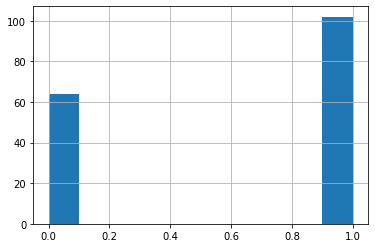

In [9]:
data_all['Labels'].apply(lambda x :0 if  x < 6  else 1).hist()
plt.savefig('Classes.png')

<AxesSubplot:>

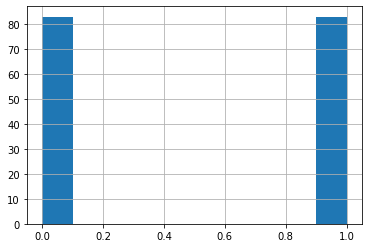

In [922]:
df.hist()

In [928]:
data_all['kinopoisk_binary'] = df
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8  \
0    1.321008   1.879488  ...  0.747356  0.734549  0.573571  0.666546   
1    3.860679   5.419934  ...  0.622934  0.705115  0.694461  0.596211   
2    2.241788   2.574973  ...  0.755020  0.690869  0.664579  0.732706   
3    1.869292   2.943064  ...  0.747617  0.701575  0.635875  0.704821   
4    9.667544  10.095658  ...  0.697681  0.749899  0.768600  0.697917   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_F4   SpEn_F8  kinopoisk  FAA(w-r)    FAA(w)  kinopoisk_binary  
0    0.701854  0.541023        7.5 -0.128504 -0.136602                 0  
1    0.661915  0.626924        7.5 -4.180999  1.052521                 0  
2    0.671702  0.712289        7.5  0.251607 -0.381461                 0  
3    0.676821  0.660730        7.5 -0.311846 -0.403640                 0  
4    0.762089  0.740299        7.5       NaN       NaN                 0  
..        ...       ...        ...       ...       ...               ...  
161       NaN       NaN        7.9       NaN       NaN                 1  
162       NaN       NaN        7.1       NaN       NaN                 0  
163       NaN       NaN        6.8       NaN       NaN                 0  
164       NaN       NaN        7.0       NaN       NaN                 0  
165       NaN       NaN        8.0       NaN       NaN                 1  

[166 rows x 524 columns]

In [929]:
data_all.to_csv('matrix_kinopoisk_all.csv', index=False)

In [10]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1     1.0   2.0  6.010149  3.606064  2.759643   4.523674  4.651910  2.815613   
2     1.0   3.0  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3     1.0   4.0  2.783825  4.860342  4.188857   6.614255  2.691938  1.758350   
4     1.0   6.0  5.108710  6.612286       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161   5.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
162   3.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
163   7.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
164   6.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
165   2.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...        sd1        sd2             s   sd1/sd2  \
0    1.321008   1.879488  ...  36.004782  63.728486   7208.479428  0.564972   
1    3.860679   5.419934  ...   5.827722  20.617867    377.478687  0.282654   
2    2.241788   2.574973  ...  27.324769  79.410622   6816.869439  0.344095   
3    2.501624   0.806723  ...  48.378525  85.769064  13035.664106  0.564056   
4    9.667544  10.095658  ...  30.698621  67.634709   6522.864730  0.453889   
..        ...        ...  ...        ...        ...           ...       ...   
161       NaN        NaN  ...  16.551727  36.532664   1899.654127  0.453067   
162       NaN        NaN  ...  16.091991  59.828525   3024.600108  0.268969   
163       NaN        NaN  ...  18.028114  62.002796   3511.651726  0.290763   
164       NaN        NaN  ...  14.824270  58.258877   2713.221811  0.254455   
165       NaN        NaN  ...  18.202655  48.813435   2791.412256  0.372903   

     breathingrate           EDA    Corr_watch  Corr_Watch-relax  Zygom_watch  \
0         0.126139  1.071543e-05  4.584045e-06     -2.363670e-06     0.000008   
1         0.315129  1.351562e-07  3.192480e-06      5.825113e-07     0.000003   
2         0.125964  6.407601e-07  2.961209e-06     -1.921418e-06     0.000002   
3         0.333333  1.408525e-06  2.729315e-06      9.197836e-07     0.000006   
4         0.220348  1.812108e-06  7.797131e-06      1.397621e-07     0.000006   
..             ...           ...           ...               ...          ...   
161       0.333333  1.586434e-08  4.105661e-07      1.819826e-09     0.000002   
162       0.300399  1.521037e-07  4.091630e-07      1.107719e-10     0.000002   
163       0.115463  2.699324e-08  4.106556e-07      4.663283e-10     0.000002   
164       0.128018  4.118254e-08  4.107057e-07      6.195613e-10     0.000002   
165       0.152431  4.694813e-08  4.120631e-07     -5.575971e-11     0.000002   

     Zygom_Watch-relax  
0         1.361368e-06  
1         4.239309e-07  
2        -1.058808e-06  
3         9.849901e-07  
4         1.881074e-06  
..                 ...  
161      -1.218309e-06  
162      -3.530825e-07  
163      -3.687755e-07  
164      -3.542369e-07  
165      -6.626327e-07  

[166 rows x 520 columns]

In [20]:
result = pd.DataFrame()
for Subj in range(1, 22):
    df = pd.DataFrame(data_all[data_all['Subj'] == Subj])
    kmeans = KMeans(n_clusters=2, random_state=0)
    df['label'] = kmeans.fit_predict(np.array(df['Labels']).reshape(-1, 1))
    center = np.sum(kmeans.cluster_centers_) / 2
    df['Labels'] = df['Labels'].apply(lambda x :0 if  x < center else 1)
    result = pd.concat([result, df])

In [16]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...  zero_crossings_O1  zero_crossings_Oz  \
0    1.321008   1.879488  ...             5718.0             5242.0   
1    3.860679   5.419934  ...             4449.0             4695.0   
2    2.241788   2.574973  ...             4548.0             3952.0   
3    1.869292   2.943064  ...             4820.0             4340.0   
4    9.667544  10.095658  ...             5658.0             6739.0   
..        ...        ...  ...                ...                ...   
161       NaN        NaN  ...                NaN                NaN   
162       NaN        NaN  ...                NaN                NaN   
163       NaN        NaN  ...                NaN                NaN   
164       NaN        NaN  ...                NaN                NaN   
165       NaN        NaN  ...                NaN                NaN   

     zero_crossings_O2  zero_crossings_P4  zero_crossings_P8  \
0               5322.0             2946.0             4937.0   
1               5133.0             4969.0             4875.0   
2               4474.0             4822.0             5193.0   
3               4665.0             4919.0             5337.0   
4               7397.0             7323.0             5561.0   
..                 ...                ...                ...   
161                NaN                NaN                NaN   
162                NaN                NaN                NaN   
163                NaN                NaN                NaN   
164                NaN                NaN                NaN   
165                NaN                NaN                NaN   

     zero_crossings_Cz  zero_crossings_C4  zero_crossings_T8  \
0               4212.0             3241.0             4043.0   
1               4813.0             4801.0             4745.0   
2               4173.0             4195.0             4969.0   
3               4582.0             4155.0             4700.0   
4               6285.0             6082.0             6204.0   
..                 ...                ...                ...   
161                NaN                NaN                NaN   
162                NaN                NaN                NaN   
163                NaN                NaN                NaN   
164                NaN                NaN                NaN   
165                NaN                NaN                NaN   

     zero_crossings_F4  zero_crossings_F8  
0               4384.0             2888.0  
1               3825.0             4935.0  
2               4179.0             5157.0  
3               4541.0             5228.0  
4               6896.0             7374.0  
..                 ...                ...  
161                NaN                NaN  
162                NaN                NaN  
163                NaN                NaN  
164                NaN                NaN  
165                NaN                NaN  

[166 rows x 2608 columns]

In [26]:
result['Labels']

0      1
19     1
37     0
56     0
75     1
      ..
161    1
162    1
163    1
164    1
165    1
Name: Labels, Length: 166, dtype: int64

In [29]:
result['label']

0      0
19     0
37     1
56     1
75     0
      ..
161    0
162    0
163    0
164    0
165    0
Name: label, Length: 166, dtype: int32

In [24]:
list(result.columns)

['film',
 'Subj',
 'Alpha_Fz',
 'Alpha_F3',
 'Alpha_F7',
 'Alpha_C3',
 'Alpha_T7',
 'Alpha_Pz',
 'Alpha_P3',
 'Alpha_P7',
 'Alpha_O1',
 'Alpha_Oz',
 'Alpha_O2',
 'Alpha_P4',
 'Alpha_P8',
 'Alpha_Cz',
 'Alpha_C4',
 'Alpha_T8',
 'Alpha_F4',
 'Alpha_F8',
 'Alpha_ratio_Fz',
 'Alpha_ratio_F3',
 'Alpha_ratio_F7',
 'Alpha_ratio_C3',
 'Alpha_ratio_T7',
 'Alpha_ratio_Pz',
 'Alpha_ratio_P3',
 'Alpha_ratio_P7',
 'Alpha_ratio_O1',
 'Alpha_ratio_Oz',
 'Alpha_ratio_O2',
 'Alpha_ratio_P4',
 'Alpha_ratio_P8',
 'Alpha_ratio_Cz',
 'Alpha_ratio_C4',
 'Alpha_ratio_T8',
 'Alpha_ratio_F4',
 'Alpha_ratio_F8',
 'Alpha_watch-relax_Fz',
 'Alpha_watch-relax_F3',
 'Alpha_watch-relax_F7',
 'Alpha_watch-relax_C3',
 'Alpha_watch-relax_T7',
 'Alpha_watch-relax_Pz',
 'Alpha_watch-relax_P3',
 'Alpha_watch-relax_P7',
 'Alpha_watch-relax_O1',
 'Alpha_watch-relax_Oz',
 'Alpha_watch-relax_O2',
 'Alpha_watch-relax_P4',
 'Alpha_watch-relax_P8',
 'Alpha_watch-relax_Cz',
 'Alpha_watch-relax_C4',
 'Alpha_watch-relax_T8',
 'Alph

In [30]:
result = result.drop(['label'], axis=1)
result['label']

KeyError: 'label'

In [31]:
result['Labels']


0      1
19     1
37     0
56     0
75     1
      ..
161    1
162    1
163    1
164    1
165    1
Name: Labels, Length: 166, dtype: int64

In [32]:
result.to_csv('Matrix_final_classif.csv', index=False)

In [33]:
result.to_excel('Matrix_final_classif.xlsx', index=False)

In [191]:
result = pd.DataFrame()
for Subj in range(1, 22):
    df = pd.DataFrame(data_all[data_all['Subj'] == Subj])
    kmeans = KMeans(n_clusters=2, random_state=0)
    center = df['Labels'].median()
    df['Labels'] = df['Labels'].apply(lambda x :0 if  x < center else 1)
    result = pd.concat([result, df])

In [194]:
result['Labels'].hist()

<AxesSubplot:>

In [17]:
result = result.reset_index(drop=True).drop(['label'], axis=1)
result

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1       2     1  2.422609  1.693390       NaN  1.749329       NaN  1.903182   
2       3     1  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3       4     1       NaN  2.009766  4.550318  1.964755  4.471460  2.415181   
4       5     1  2.735525  1.719663       NaN  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161     5    21       NaN       NaN       NaN       NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN       NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN       NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN       NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN       NaN       NaN       NaN   

     Alpha_P3  Alpha_P7  ...  zero_crossings_O1  zero_crossings_Oz  \
0    1.321008  1.879488  ...             5718.0             5242.0   
1    1.228613  1.775213  ...             7163.0             7157.0   
2    1.444414  1.953797  ...             6042.0             5670.0   
3    1.546809  1.995032  ...             8151.0             7670.0   
4    1.229363  2.054360  ...             4897.0             4663.0   
..        ...       ...  ...                ...                ...   
161       NaN       NaN  ...                NaN                NaN   
162       NaN       NaN  ...                NaN                NaN   
163       NaN       NaN  ...                NaN                NaN   
164       NaN       NaN  ...                NaN                NaN   
165       NaN       NaN  ...                NaN                NaN   

     zero_crossings_O2  zero_crossings_P4  zero_crossings_P8  \
0               5322.0             2946.0             4937.0   
1               7529.0             4182.0             6756.0   
2               6842.0             3342.0             6836.0   
3               7883.0             4637.0             6703.0   
4               4893.0             2578.0             4167.0   
..                 ...                ...                ...   
161                NaN                NaN                NaN   
162                NaN                NaN                NaN   
163                NaN                NaN                NaN   
164                NaN                NaN                NaN   
165                NaN                NaN                NaN   

     zero_crossings_Cz  zero_crossings_C4  zero_crossings_T8  \
0               4212.0             3241.0             4043.0   
1               5417.0             2569.0             5453.0   
2               5302.0             3480.0             5014.0   
3               6205.0             4777.0             5767.0   
4               3773.0             2820.0             3915.0   
..                 ...                ...                ...   
161                NaN                NaN                NaN   
162                NaN                NaN                NaN   
163                NaN                NaN                NaN   
164                NaN                NaN                NaN   
165                NaN                NaN                NaN   

     zero_crossings_F4  zero_crossings_F8  
0               4384.0             2888.0  
1               7043.0             4787.0  
2               5792.0             3994.0  
3               7560.0             5465.0  
4               5088.0             4473.0  
..                 ...                ...  
161                NaN                NaN  
162                NaN                NaN  
163                NaN                NaN  
164                NaN                NaN  
165                NaN                NaN  

[166 rows x 2608 columns]

In [18]:
result.to_csv('MatrixClassif_all.csv', index=False)

In [19]:
data_all = result

In [152]:
ax = df.plot.scatter(x='Labels', y='label', s=50, color='white', edgecolor='black')

df.plot.scatter(x='Labels', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*')

In [179]:
data_all['Labels'].apply(lambda x : 0 if x < 6.0 else 1).hist()

<AxesSubplot:>

In [459]:
X_test = data_all.loc[(data_all['film']  == 6)].reset_index(drop=True)
X_train = data_all.loc[(data_all['film'] != 6)].reset_index(drop=True)

y_train = X_train['Labels']
y_test = np.array(X_test['Labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
test_film = X_test['film']
test_subj = X_test['Subj']
X_train = X_train.drop(['film', 'Subj', 'Labels'], axis=1)
X_test = X_test.drop(['film', 'Subj', 'Labels'], axis=1)
test_pool = Pool(X_test, y_test)
train_pool = Pool(X_train, y_train)

In [9]:
from catboost import CatBoostClassifier

In [177]:
%matplotlib qt
model = CatBoostClassifier()
X = data_all.drop(['Labels', 'film', 'Subj'], axis=1)
y = data_all['Labels']
model.fit(X, y)

#shap_values=model.get_feature_importance(test_pool, fstr_type='ShapValues')

#plt.savefig('shap.png')

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.004785
0:	learn: 0.6918990	total: 42.5ms	remaining: 42.4s
1:	learn: 0.6910437	total: 73.2ms	remaining: 36.5s
2:	learn: 0.6895096	total: 103ms	remaining: 34.1s
3:	learn: 0.6883268	total: 134ms	remaining: 33.3s
4:	learn: 0.6876250	total: 173ms	remaining: 34.4s
5:	learn: 0.6861545	total: 216ms	remaining: 35.8s
6:	learn: 0.6847068	total: 252ms	remaining: 35.7s
7:	learn: 0.6831810	total: 295ms	remaining: 36.6s
8:	learn: 0.6819606	total: 332ms	remaining: 36.6s
9:	learn: 0.6802195	total: 366ms	remaining: 36.2s
10:	learn: 0.6790033	total: 398ms	remaining: 35.8s
11:	learn: 0.6778061	total: 429ms	remaining: 35.3s
12:	learn: 0.6763306	total: 463ms	remaining: 35.2s
13:	learn: 0.6757169	total: 495ms	remaining: 34.9s
14:	learn: 0.6747938	total: 525ms	remaining: 34.5s
15:	learn: 0.6733965	total: 557ms	remaining: 34.2s
16:	learn: 0.6726165	total: 589ms	remaining: 34s
17:	learn: 0.6713028	total: 622ms	remaining: 33.9s
18:	learn: 0.6702133	total: 651ms	remaining: 33.6s
19:	learn: 

165:	learn: 0.5149902	total: 5.35s	remaining: 26.9s
166:	learn: 0.5141872	total: 5.38s	remaining: 26.9s
167:	learn: 0.5135946	total: 5.42s	remaining: 26.8s
168:	learn: 0.5130428	total: 5.45s	remaining: 26.8s
169:	learn: 0.5121259	total: 5.48s	remaining: 26.8s
170:	learn: 0.5109539	total: 5.52s	remaining: 26.8s
171:	learn: 0.5101489	total: 5.56s	remaining: 26.8s
172:	learn: 0.5094002	total: 5.61s	remaining: 26.8s
173:	learn: 0.5088835	total: 5.64s	remaining: 26.8s
174:	learn: 0.5081383	total: 5.68s	remaining: 26.8s
175:	learn: 0.5069948	total: 5.71s	remaining: 26.7s
176:	learn: 0.5062019	total: 5.74s	remaining: 26.7s
177:	learn: 0.5053835	total: 5.77s	remaining: 26.6s
178:	learn: 0.5042293	total: 5.81s	remaining: 26.6s
179:	learn: 0.5035672	total: 5.84s	remaining: 26.6s
180:	learn: 0.5029304	total: 5.87s	remaining: 26.6s
181:	learn: 0.5021898	total: 5.9s	remaining: 26.5s
182:	learn: 0.5014672	total: 5.93s	remaining: 26.5s
183:	learn: 0.5010557	total: 5.96s	remaining: 26.4s
184:	learn: 0

328:	learn: 0.3961237	total: 10.4s	remaining: 21.3s
329:	learn: 0.3956000	total: 10.5s	remaining: 21.3s
330:	learn: 0.3947884	total: 10.5s	remaining: 21.2s
331:	learn: 0.3944543	total: 10.5s	remaining: 21.2s
332:	learn: 0.3937448	total: 10.6s	remaining: 21.2s
333:	learn: 0.3932496	total: 10.6s	remaining: 21.1s
334:	learn: 0.3928295	total: 10.6s	remaining: 21.1s
335:	learn: 0.3922480	total: 10.6s	remaining: 21s
336:	learn: 0.3917335	total: 10.7s	remaining: 21s
337:	learn: 0.3911831	total: 10.7s	remaining: 21s
338:	learn: 0.3904456	total: 10.7s	remaining: 20.9s
339:	learn: 0.3898382	total: 10.8s	remaining: 20.9s
340:	learn: 0.3891551	total: 10.8s	remaining: 20.8s
341:	learn: 0.3885654	total: 10.8s	remaining: 20.8s
342:	learn: 0.3879452	total: 10.8s	remaining: 20.7s
343:	learn: 0.3873031	total: 10.9s	remaining: 20.7s
344:	learn: 0.3864137	total: 10.9s	remaining: 20.7s
345:	learn: 0.3857777	total: 10.9s	remaining: 20.6s
346:	learn: 0.3852618	total: 10.9s	remaining: 20.6s
347:	learn: 0.3849

494:	learn: 0.3116757	total: 15.2s	remaining: 15.5s
495:	learn: 0.3112566	total: 15.2s	remaining: 15.5s
496:	learn: 0.3107784	total: 15.2s	remaining: 15.4s
497:	learn: 0.3101631	total: 15.3s	remaining: 15.4s
498:	learn: 0.3097195	total: 15.3s	remaining: 15.4s
499:	learn: 0.3092023	total: 15.3s	remaining: 15.3s
500:	learn: 0.3088622	total: 15.4s	remaining: 15.3s
501:	learn: 0.3085026	total: 15.4s	remaining: 15.3s
502:	learn: 0.3080948	total: 15.4s	remaining: 15.2s
503:	learn: 0.3075152	total: 15.5s	remaining: 15.2s
504:	learn: 0.3071805	total: 15.5s	remaining: 15.2s
505:	learn: 0.3068389	total: 15.5s	remaining: 15.2s
506:	learn: 0.3063032	total: 15.6s	remaining: 15.1s
507:	learn: 0.3057648	total: 15.6s	remaining: 15.1s
508:	learn: 0.3053923	total: 15.6s	remaining: 15.1s
509:	learn: 0.3048626	total: 15.7s	remaining: 15s
510:	learn: 0.3043824	total: 15.7s	remaining: 15s
511:	learn: 0.3041422	total: 15.7s	remaining: 15s
512:	learn: 0.3038088	total: 15.8s	remaining: 15s
513:	learn: 0.303603

653:	learn: 0.2517949	total: 20s	remaining: 10.6s
654:	learn: 0.2513892	total: 20s	remaining: 10.5s
655:	learn: 0.2509874	total: 20s	remaining: 10.5s
656:	learn: 0.2505114	total: 20.1s	remaining: 10.5s
657:	learn: 0.2503715	total: 20.1s	remaining: 10.4s
658:	learn: 0.2499742	total: 20.1s	remaining: 10.4s
659:	learn: 0.2496398	total: 20.2s	remaining: 10.4s
660:	learn: 0.2493049	total: 20.2s	remaining: 10.4s
661:	learn: 0.2491387	total: 20.2s	remaining: 10.3s
662:	learn: 0.2488515	total: 20.3s	remaining: 10.3s
663:	learn: 0.2484406	total: 20.3s	remaining: 10.3s
664:	learn: 0.2480378	total: 20.4s	remaining: 10.3s
665:	learn: 0.2477195	total: 20.4s	remaining: 10.2s
666:	learn: 0.2474264	total: 20.4s	remaining: 10.2s
667:	learn: 0.2470065	total: 20.5s	remaining: 10.2s
668:	learn: 0.2467071	total: 20.5s	remaining: 10.1s
669:	learn: 0.2464740	total: 20.5s	remaining: 10.1s
670:	learn: 0.2461075	total: 20.6s	remaining: 10.1s
671:	learn: 0.2458659	total: 20.6s	remaining: 10.1s
672:	learn: 0.2455

816:	learn: 0.2040658	total: 24.8s	remaining: 5.55s
817:	learn: 0.2036001	total: 24.8s	remaining: 5.52s
818:	learn: 0.2032078	total: 24.8s	remaining: 5.49s
819:	learn: 0.2028734	total: 24.9s	remaining: 5.46s
820:	learn: 0.2026829	total: 24.9s	remaining: 5.43s
821:	learn: 0.2025453	total: 24.9s	remaining: 5.4s
822:	learn: 0.2022621	total: 25s	remaining: 5.37s
823:	learn: 0.2020228	total: 25s	remaining: 5.33s
824:	learn: 0.2017918	total: 25s	remaining: 5.3s
825:	learn: 0.2016013	total: 25s	remaining: 5.27s
826:	learn: 0.2013455	total: 25.1s	remaining: 5.24s
827:	learn: 0.2011577	total: 25.1s	remaining: 5.21s
828:	learn: 0.2009156	total: 25.1s	remaining: 5.18s
829:	learn: 0.2005793	total: 25.1s	remaining: 5.15s
830:	learn: 0.2002454	total: 25.2s	remaining: 5.12s
831:	learn: 0.1999926	total: 25.2s	remaining: 5.09s
832:	learn: 0.1998043	total: 25.2s	remaining: 5.06s
833:	learn: 0.1994017	total: 25.3s	remaining: 5.03s
834:	learn: 0.1991736	total: 25.3s	remaining: 5s
835:	learn: 0.1989668	tot

979:	learn: 0.1657570	total: 29.6s	remaining: 604ms
980:	learn: 0.1656925	total: 29.6s	remaining: 574ms
981:	learn: 0.1654651	total: 29.7s	remaining: 544ms
982:	learn: 0.1652255	total: 29.7s	remaining: 514ms
983:	learn: 0.1650371	total: 29.7s	remaining: 484ms
984:	learn: 0.1648557	total: 29.8s	remaining: 453ms
985:	learn: 0.1646793	total: 29.8s	remaining: 423ms
986:	learn: 0.1644938	total: 29.8s	remaining: 393ms
987:	learn: 0.1643598	total: 29.9s	remaining: 363ms
988:	learn: 0.1640788	total: 29.9s	remaining: 332ms
989:	learn: 0.1638270	total: 29.9s	remaining: 302ms
990:	learn: 0.1636740	total: 29.9s	remaining: 272ms
991:	learn: 0.1635674	total: 30s	remaining: 242ms
992:	learn: 0.1633517	total: 30s	remaining: 211ms
993:	learn: 0.1631492	total: 30s	remaining: 181ms
994:	learn: 0.1628858	total: 30.1s	remaining: 151ms
995:	learn: 0.1626859	total: 30.1s	remaining: 121ms
996:	learn: 0.1625436	total: 30.1s	remaining: 90.6ms
997:	learn: 0.1624149	total: 30.1s	remaining: 60.4ms
998:	learn: 0.16

In [188]:
estimator = CatBoostRegressor()
selector = RFE(estimator, n_features_to_select=25, step=1)
elector = selector.fit(X, y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.030829
0:	learn: 0.4976353	total: 34ms	remaining: 34s
1:	learn: 0.4942321	total: 62ms	remaining: 30.9s
2:	learn: 0.4913999	total: 89.3ms	remaining: 29.7s
3:	learn: 0.4880689	total: 116ms	remaining: 28.8s
4:	learn: 0.4849411	total: 143ms	remaining: 28.4s
5:	learn: 0.4832371	total: 171ms	remaining: 28.4s
6:	learn: 0.4813898	total: 201ms	remaining: 28.6s
7:	learn: 0.4795332	total: 237ms	remaining: 29.3s
8:	learn: 0.4776525	total: 270ms	remaining: 29.7s
9:	learn: 0.4757232	total: 303ms	remaining: 30s
10:	learn: 0.4735416	total: 331ms	remaining: 29.8s
11:	learn: 0.4700944	total: 360ms	remaining: 29.7s
12:	learn: 0.4680217	total: 390ms	remaining: 29.6s
13:	learn: 0.4660434	total: 420ms	remaining: 29.6s
14:	learn: 0.4640424	total: 450ms	remaining: 29.5s
15:	learn: 0.4621612	total: 480ms	remaining: 29.5s
16:	learn: 0.4606018	total: 508ms	remaining: 29.3s
17:	learn: 0.4586100	total: 534ms	remaining: 29.1s
18:	learn: 0.4568704	total: 560ms	remaining: 28.9s
19:	learn: 0.454

166:	learn: 0.2361177	total: 4.96s	remaining: 24.8s
167:	learn: 0.2350665	total: 5s	remaining: 24.8s
168:	learn: 0.2339852	total: 5.04s	remaining: 24.8s
169:	learn: 0.2326892	total: 5.08s	remaining: 24.8s
170:	learn: 0.2318560	total: 5.12s	remaining: 24.8s
171:	learn: 0.2307936	total: 5.15s	remaining: 24.8s
172:	learn: 0.2297575	total: 5.18s	remaining: 24.8s
173:	learn: 0.2288246	total: 5.21s	remaining: 24.7s
174:	learn: 0.2275326	total: 5.24s	remaining: 24.7s
175:	learn: 0.2266785	total: 5.27s	remaining: 24.7s
176:	learn: 0.2258340	total: 5.29s	remaining: 24.6s
177:	learn: 0.2241781	total: 5.32s	remaining: 24.6s
178:	learn: 0.2232961	total: 5.35s	remaining: 24.5s
179:	learn: 0.2222695	total: 5.38s	remaining: 24.5s
180:	learn: 0.2215563	total: 5.41s	remaining: 24.5s
181:	learn: 0.2202256	total: 5.43s	remaining: 24.4s
182:	learn: 0.2190519	total: 5.46s	remaining: 24.4s
183:	learn: 0.2181597	total: 5.49s	remaining: 24.3s
184:	learn: 0.2170390	total: 5.51s	remaining: 24.3s
185:	learn: 0.2

329:	learn: 0.0792323	total: 9.84s	remaining: 20s
330:	learn: 0.0785787	total: 9.87s	remaining: 20s
331:	learn: 0.0777883	total: 9.91s	remaining: 19.9s
332:	learn: 0.0772585	total: 9.94s	remaining: 19.9s
333:	learn: 0.0764962	total: 9.97s	remaining: 19.9s
334:	learn: 0.0760084	total: 10s	remaining: 19.8s
335:	learn: 0.0754857	total: 10s	remaining: 19.8s
336:	learn: 0.0748175	total: 10.1s	remaining: 19.8s
337:	learn: 0.0741379	total: 10.1s	remaining: 19.7s
338:	learn: 0.0736092	total: 10.1s	remaining: 19.7s
339:	learn: 0.0731332	total: 10.1s	remaining: 19.7s
340:	learn: 0.0725324	total: 10.2s	remaining: 19.6s
341:	learn: 0.0719794	total: 10.2s	remaining: 19.6s
342:	learn: 0.0714345	total: 10.2s	remaining: 19.6s
343:	learn: 0.0709286	total: 10.2s	remaining: 19.5s
344:	learn: 0.0703811	total: 10.3s	remaining: 19.5s
345:	learn: 0.0699489	total: 10.3s	remaining: 19.5s
346:	learn: 0.0695546	total: 10.3s	remaining: 19.4s
347:	learn: 0.0691035	total: 10.4s	remaining: 19.4s
348:	learn: 0.068958

491:	learn: 0.0294885	total: 14.8s	remaining: 15.3s
492:	learn: 0.0292766	total: 14.8s	remaining: 15.3s
493:	learn: 0.0291058	total: 14.9s	remaining: 15.2s
494:	learn: 0.0288842	total: 14.9s	remaining: 15.2s
495:	learn: 0.0286899	total: 14.9s	remaining: 15.2s
496:	learn: 0.0284801	total: 14.9s	remaining: 15.1s
497:	learn: 0.0282999	total: 15s	remaining: 15.1s
498:	learn: 0.0281528	total: 15s	remaining: 15.1s
499:	learn: 0.0279905	total: 15s	remaining: 15s
500:	learn: 0.0279513	total: 15.1s	remaining: 15s
501:	learn: 0.0277858	total: 15.1s	remaining: 15s
502:	learn: 0.0276204	total: 15.1s	remaining: 14.9s
503:	learn: 0.0274969	total: 15.1s	remaining: 14.9s
504:	learn: 0.0273190	total: 15.2s	remaining: 14.9s
505:	learn: 0.0271606	total: 15.2s	remaining: 14.8s
506:	learn: 0.0269872	total: 15.2s	remaining: 14.8s
507:	learn: 0.0267791	total: 15.2s	remaining: 14.8s
508:	learn: 0.0266810	total: 15.3s	remaining: 14.7s
509:	learn: 0.0265332	total: 15.3s	remaining: 14.7s
510:	learn: 0.0263755	to

654:	learn: 0.0115472	total: 19.4s	remaining: 10.2s
655:	learn: 0.0114803	total: 19.4s	remaining: 10.2s
656:	learn: 0.0114633	total: 19.4s	remaining: 10.1s
657:	learn: 0.0113804	total: 19.4s	remaining: 10.1s
658:	learn: 0.0112997	total: 19.5s	remaining: 10.1s
659:	learn: 0.0112397	total: 19.5s	remaining: 10s
660:	learn: 0.0111666	total: 19.5s	remaining: 10s
661:	learn: 0.0110900	total: 19.6s	remaining: 9.99s
662:	learn: 0.0110373	total: 19.6s	remaining: 9.96s
663:	learn: 0.0109570	total: 19.6s	remaining: 9.93s
664:	learn: 0.0109140	total: 19.7s	remaining: 9.9s
665:	learn: 0.0108319	total: 19.7s	remaining: 9.87s
666:	learn: 0.0107549	total: 19.7s	remaining: 9.84s
667:	learn: 0.0106869	total: 19.7s	remaining: 9.81s
668:	learn: 0.0106131	total: 19.8s	remaining: 9.78s
669:	learn: 0.0105484	total: 19.8s	remaining: 9.75s
670:	learn: 0.0104995	total: 19.8s	remaining: 9.72s
671:	learn: 0.0104289	total: 19.9s	remaining: 9.7s
672:	learn: 0.0103625	total: 19.9s	remaining: 9.66s
673:	learn: 0.0102

819:	learn: 0.0046811	total: 24s	remaining: 5.26s
820:	learn: 0.0046568	total: 24s	remaining: 5.23s
821:	learn: 0.0046298	total: 24s	remaining: 5.2s
822:	learn: 0.0046057	total: 24s	remaining: 5.17s
823:	learn: 0.0045988	total: 24.1s	remaining: 5.14s
824:	learn: 0.0045838	total: 24.1s	remaining: 5.11s
825:	learn: 0.0045526	total: 24.1s	remaining: 5.08s
826:	learn: 0.0045315	total: 24.2s	remaining: 5.05s
827:	learn: 0.0044978	total: 24.2s	remaining: 5.02s
828:	learn: 0.0044720	total: 24.2s	remaining: 4.99s
829:	learn: 0.0044350	total: 24.2s	remaining: 4.96s
830:	learn: 0.0044214	total: 24.3s	remaining: 4.93s
831:	learn: 0.0043993	total: 24.3s	remaining: 4.91s
832:	learn: 0.0043680	total: 24.3s	remaining: 4.88s
833:	learn: 0.0043581	total: 24.3s	remaining: 4.84s
834:	learn: 0.0043445	total: 24.4s	remaining: 4.82s
835:	learn: 0.0043175	total: 24.4s	remaining: 4.79s
836:	learn: 0.0042936	total: 24.4s	remaining: 4.76s
837:	learn: 0.0042722	total: 24.5s	remaining: 4.73s
838:	learn: 0.0042492

979:	learn: 0.0021219	total: 28.4s	remaining: 579ms
980:	learn: 0.0021064	total: 28.4s	remaining: 550ms
981:	learn: 0.0021054	total: 28.4s	remaining: 521ms
982:	learn: 0.0020940	total: 28.5s	remaining: 492ms
983:	learn: 0.0020818	total: 28.5s	remaining: 463ms
984:	learn: 0.0020700	total: 28.5s	remaining: 434ms
985:	learn: 0.0020586	total: 28.5s	remaining: 405ms
986:	learn: 0.0020516	total: 28.6s	remaining: 376ms
987:	learn: 0.0020407	total: 28.6s	remaining: 347ms
988:	learn: 0.0020337	total: 28.6s	remaining: 318ms
989:	learn: 0.0020315	total: 28.7s	remaining: 289ms
990:	learn: 0.0020168	total: 28.7s	remaining: 260ms
991:	learn: 0.0020046	total: 28.7s	remaining: 232ms
992:	learn: 0.0019963	total: 28.7s	remaining: 203ms
993:	learn: 0.0019865	total: 28.8s	remaining: 174ms
994:	learn: 0.0019800	total: 28.8s	remaining: 145ms
995:	learn: 0.0019746	total: 28.8s	remaining: 116ms
996:	learn: 0.0019627	total: 28.9s	remaining: 86.8ms
997:	learn: 0.0019564	total: 28.9s	remaining: 57.9ms
998:	learn

141:	learn: 0.2670684	total: 4.1s	remaining: 24.8s
142:	learn: 0.2655115	total: 4.13s	remaining: 24.8s
143:	learn: 0.2643873	total: 4.16s	remaining: 24.7s
144:	learn: 0.2630093	total: 4.18s	remaining: 24.7s
145:	learn: 0.2624159	total: 4.21s	remaining: 24.6s
146:	learn: 0.2614239	total: 4.24s	remaining: 24.6s
147:	learn: 0.2600371	total: 4.27s	remaining: 24.6s
148:	learn: 0.2578845	total: 4.29s	remaining: 24.5s
149:	learn: 0.2564180	total: 4.32s	remaining: 24.5s
150:	learn: 0.2550554	total: 4.35s	remaining: 24.5s
151:	learn: 0.2546275	total: 4.38s	remaining: 24.4s
152:	learn: 0.2532790	total: 4.41s	remaining: 24.4s
153:	learn: 0.2522651	total: 4.44s	remaining: 24.4s
154:	learn: 0.2510492	total: 4.46s	remaining: 24.3s
155:	learn: 0.2499186	total: 4.49s	remaining: 24.3s
156:	learn: 0.2481893	total: 4.52s	remaining: 24.3s
157:	learn: 0.2472145	total: 4.55s	remaining: 24.2s
158:	learn: 0.2455117	total: 4.58s	remaining: 24.2s
159:	learn: 0.2439757	total: 4.61s	remaining: 24.2s
160:	learn: 0

306:	learn: 0.0905889	total: 8.79s	remaining: 19.8s
307:	learn: 0.0898740	total: 8.82s	remaining: 19.8s
308:	learn: 0.0891085	total: 8.85s	remaining: 19.8s
309:	learn: 0.0882486	total: 8.88s	remaining: 19.8s
310:	learn: 0.0875383	total: 8.91s	remaining: 19.7s
311:	learn: 0.0869663	total: 8.94s	remaining: 19.7s
312:	learn: 0.0863356	total: 8.97s	remaining: 19.7s
313:	learn: 0.0857159	total: 9s	remaining: 19.7s
314:	learn: 0.0850274	total: 9.03s	remaining: 19.6s
315:	learn: 0.0846287	total: 9.05s	remaining: 19.6s
316:	learn: 0.0839555	total: 9.08s	remaining: 19.6s
317:	learn: 0.0832207	total: 9.11s	remaining: 19.5s
318:	learn: 0.0825670	total: 9.14s	remaining: 19.5s
319:	learn: 0.0821690	total: 9.16s	remaining: 19.5s
320:	learn: 0.0817186	total: 9.19s	remaining: 19.4s
321:	learn: 0.0812762	total: 9.22s	remaining: 19.4s
322:	learn: 0.0809556	total: 9.25s	remaining: 19.4s
323:	learn: 0.0803310	total: 9.28s	remaining: 19.4s
324:	learn: 0.0798077	total: 9.31s	remaining: 19.3s
325:	learn: 0.0

467:	learn: 0.0311845	total: 13.5s	remaining: 15.4s
468:	learn: 0.0309910	total: 13.5s	remaining: 15.3s
469:	learn: 0.0307573	total: 13.6s	remaining: 15.3s
470:	learn: 0.0306140	total: 13.6s	remaining: 15.3s
471:	learn: 0.0304742	total: 13.6s	remaining: 15.2s
472:	learn: 0.0302693	total: 13.7s	remaining: 15.2s
473:	learn: 0.0300948	total: 13.7s	remaining: 15.2s
474:	learn: 0.0298682	total: 13.7s	remaining: 15.2s
475:	learn: 0.0297035	total: 13.8s	remaining: 15.2s
476:	learn: 0.0294637	total: 13.8s	remaining: 15.1s
477:	learn: 0.0293973	total: 13.8s	remaining: 15.1s
478:	learn: 0.0292326	total: 13.8s	remaining: 15.1s
479:	learn: 0.0290224	total: 13.9s	remaining: 15s
480:	learn: 0.0287770	total: 13.9s	remaining: 15s
481:	learn: 0.0285392	total: 13.9s	remaining: 15s
482:	learn: 0.0283684	total: 14s	remaining: 14.9s
483:	learn: 0.0281644	total: 14s	remaining: 14.9s
484:	learn: 0.0279236	total: 14s	remaining: 14.9s
485:	learn: 0.0277592	total: 14s	remaining: 14.8s
486:	learn: 0.0275420	tota

633:	learn: 0.0122199	total: 18.2s	remaining: 10.5s
634:	learn: 0.0121526	total: 18.3s	remaining: 10.5s
635:	learn: 0.0120597	total: 18.3s	remaining: 10.5s
636:	learn: 0.0119826	total: 18.3s	remaining: 10.4s
637:	learn: 0.0119267	total: 18.3s	remaining: 10.4s
638:	learn: 0.0118904	total: 18.4s	remaining: 10.4s
639:	learn: 0.0118264	total: 18.4s	remaining: 10.4s
640:	learn: 0.0117416	total: 18.4s	remaining: 10.3s
641:	learn: 0.0117117	total: 18.5s	remaining: 10.3s
642:	learn: 0.0116352	total: 18.5s	remaining: 10.3s
643:	learn: 0.0116221	total: 18.5s	remaining: 10.2s
644:	learn: 0.0115719	total: 18.5s	remaining: 10.2s
645:	learn: 0.0115499	total: 18.6s	remaining: 10.2s
646:	learn: 0.0115264	total: 18.6s	remaining: 10.1s
647:	learn: 0.0114537	total: 18.6s	remaining: 10.1s
648:	learn: 0.0114147	total: 18.7s	remaining: 10.1s
649:	learn: 0.0113218	total: 18.7s	remaining: 10.1s
650:	learn: 0.0112410	total: 18.7s	remaining: 10s
651:	learn: 0.0111994	total: 18.7s	remaining: 10s
652:	learn: 0.01

796:	learn: 0.0054195	total: 22.9s	remaining: 5.82s
797:	learn: 0.0053930	total: 22.9s	remaining: 5.79s
798:	learn: 0.0053651	total: 22.9s	remaining: 5.77s
799:	learn: 0.0053597	total: 22.9s	remaining: 5.74s
800:	learn: 0.0053381	total: 23s	remaining: 5.71s
801:	learn: 0.0053160	total: 23s	remaining: 5.68s
802:	learn: 0.0052769	total: 23s	remaining: 5.65s
803:	learn: 0.0052427	total: 23.1s	remaining: 5.62s
804:	learn: 0.0052180	total: 23.1s	remaining: 5.59s
805:	learn: 0.0051810	total: 23.1s	remaining: 5.56s
806:	learn: 0.0051449	total: 23.1s	remaining: 5.54s
807:	learn: 0.0051291	total: 23.2s	remaining: 5.51s
808:	learn: 0.0050942	total: 23.2s	remaining: 5.48s
809:	learn: 0.0050688	total: 23.2s	remaining: 5.45s
810:	learn: 0.0050398	total: 23.3s	remaining: 5.42s
811:	learn: 0.0050161	total: 23.3s	remaining: 5.39s
812:	learn: 0.0049819	total: 23.3s	remaining: 5.37s
813:	learn: 0.0049767	total: 23.4s	remaining: 5.33s
814:	learn: 0.0049495	total: 23.4s	remaining: 5.31s
815:	learn: 0.0049

955:	learn: 0.0023197	total: 27.4s	remaining: 1.26s
956:	learn: 0.0023052	total: 27.4s	remaining: 1.23s
957:	learn: 0.0022926	total: 27.4s	remaining: 1.2s
958:	learn: 0.0022803	total: 27.5s	remaining: 1.17s
959:	learn: 0.0022610	total: 27.5s	remaining: 1.15s
960:	learn: 0.0022442	total: 27.5s	remaining: 1.12s
961:	learn: 0.0022297	total: 27.5s	remaining: 1.09s
962:	learn: 0.0022177	total: 27.6s	remaining: 1.06s
963:	learn: 0.0022155	total: 27.6s	remaining: 1.03s
964:	learn: 0.0022040	total: 27.6s	remaining: 1s
965:	learn: 0.0021923	total: 27.7s	remaining: 973ms
966:	learn: 0.0021800	total: 27.7s	remaining: 945ms
967:	learn: 0.0021688	total: 27.7s	remaining: 916ms
968:	learn: 0.0021513	total: 27.7s	remaining: 888ms
969:	learn: 0.0021436	total: 27.8s	remaining: 859ms
970:	learn: 0.0021295	total: 27.8s	remaining: 830ms
971:	learn: 0.0021216	total: 27.8s	remaining: 802ms
972:	learn: 0.0021101	total: 27.9s	remaining: 773ms
973:	learn: 0.0020958	total: 27.9s	remaining: 745ms
974:	learn: 0.00

121:	learn: 0.2853190	total: 3.99s	remaining: 28.7s
122:	learn: 0.2839235	total: 4.02s	remaining: 28.7s
123:	learn: 0.2824107	total: 4.05s	remaining: 28.6s
124:	learn: 0.2813262	total: 4.08s	remaining: 28.5s
125:	learn: 0.2801128	total: 4.1s	remaining: 28.5s
126:	learn: 0.2790485	total: 4.13s	remaining: 28.4s
127:	learn: 0.2778644	total: 4.16s	remaining: 28.3s
128:	learn: 0.2768514	total: 4.18s	remaining: 28.3s
129:	learn: 0.2756434	total: 4.22s	remaining: 28.2s
130:	learn: 0.2744847	total: 4.25s	remaining: 28.2s
131:	learn: 0.2732852	total: 4.29s	remaining: 28.2s
132:	learn: 0.2715549	total: 4.32s	remaining: 28.2s
133:	learn: 0.2704028	total: 4.35s	remaining: 28.1s
134:	learn: 0.2694605	total: 4.38s	remaining: 28.1s
135:	learn: 0.2680340	total: 4.41s	remaining: 28s
136:	learn: 0.2670529	total: 4.46s	remaining: 28.1s
137:	learn: 0.2657312	total: 4.5s	remaining: 28.1s
138:	learn: 0.2646398	total: 4.53s	remaining: 28.1s
139:	learn: 0.2634031	total: 4.56s	remaining: 28s
140:	learn: 0.2621

283:	learn: 0.1083430	total: 8.96s	remaining: 22.6s
284:	learn: 0.1074467	total: 8.99s	remaining: 22.5s
285:	learn: 0.1064860	total: 9.02s	remaining: 22.5s
286:	learn: 0.1058381	total: 9.05s	remaining: 22.5s
287:	learn: 0.1048482	total: 9.07s	remaining: 22.4s
288:	learn: 0.1042482	total: 9.1s	remaining: 22.4s
289:	learn: 0.1036760	total: 9.13s	remaining: 22.3s
290:	learn: 0.1031110	total: 9.15s	remaining: 22.3s
291:	learn: 0.1023747	total: 9.19s	remaining: 22.3s
292:	learn: 0.1014767	total: 9.22s	remaining: 22.2s
293:	learn: 0.1008170	total: 9.24s	remaining: 22.2s
294:	learn: 0.1001031	total: 9.27s	remaining: 22.2s
295:	learn: 0.0996420	total: 9.3s	remaining: 22.1s
296:	learn: 0.0988417	total: 9.33s	remaining: 22.1s
297:	learn: 0.0981083	total: 9.36s	remaining: 22s
298:	learn: 0.0973351	total: 9.38s	remaining: 22s
299:	learn: 0.0966963	total: 9.42s	remaining: 22s
300:	learn: 0.0958685	total: 9.45s	remaining: 21.9s
301:	learn: 0.0951644	total: 9.47s	remaining: 21.9s
302:	learn: 0.094470

442:	learn: 0.0370922	total: 13.7s	remaining: 17.2s
443:	learn: 0.0368304	total: 13.7s	remaining: 17.2s
444:	learn: 0.0366169	total: 13.8s	remaining: 17.2s
445:	learn: 0.0363216	total: 13.8s	remaining: 17.2s
446:	learn: 0.0360572	total: 13.8s	remaining: 17.1s
447:	learn: 0.0360200	total: 13.9s	remaining: 17.1s
448:	learn: 0.0358207	total: 13.9s	remaining: 17.1s
449:	learn: 0.0355813	total: 13.9s	remaining: 17.1s
450:	learn: 0.0354295	total: 14s	remaining: 17s
451:	learn: 0.0351630	total: 14s	remaining: 17s
452:	learn: 0.0348549	total: 14s	remaining: 17s
453:	learn: 0.0348106	total: 14.1s	remaining: 16.9s
454:	learn: 0.0346408	total: 14.1s	remaining: 16.9s
455:	learn: 0.0344203	total: 14.1s	remaining: 16.9s
456:	learn: 0.0342460	total: 14.2s	remaining: 16.8s
457:	learn: 0.0339924	total: 14.2s	remaining: 16.8s
458:	learn: 0.0339245	total: 14.2s	remaining: 16.8s
459:	learn: 0.0336712	total: 14.3s	remaining: 16.7s
460:	learn: 0.0334567	total: 14.3s	remaining: 16.7s
461:	learn: 0.0332879	to

604:	learn: 0.0151244	total: 18.6s	remaining: 12.1s
605:	learn: 0.0150927	total: 18.6s	remaining: 12.1s
606:	learn: 0.0150248	total: 18.7s	remaining: 12.1s
607:	learn: 0.0149393	total: 18.7s	remaining: 12s
608:	learn: 0.0148536	total: 18.7s	remaining: 12s
609:	learn: 0.0147993	total: 18.7s	remaining: 12s
610:	learn: 0.0146904	total: 18.8s	remaining: 11.9s
611:	learn: 0.0146021	total: 18.8s	remaining: 11.9s
612:	learn: 0.0145190	total: 18.8s	remaining: 11.9s
613:	learn: 0.0144427	total: 18.9s	remaining: 11.8s
614:	learn: 0.0143503	total: 18.9s	remaining: 11.8s
615:	learn: 0.0142417	total: 18.9s	remaining: 11.8s
616:	learn: 0.0141666	total: 18.9s	remaining: 11.8s
617:	learn: 0.0140798	total: 19s	remaining: 11.7s
618:	learn: 0.0140075	total: 19s	remaining: 11.7s
619:	learn: 0.0139727	total: 19s	remaining: 11.7s
620:	learn: 0.0139334	total: 19.1s	remaining: 11.6s
621:	learn: 0.0138842	total: 19.1s	remaining: 11.6s
622:	learn: 0.0137946	total: 19.1s	remaining: 11.6s
623:	learn: 0.0137791	to

770:	learn: 0.0065343	total: 23.5s	remaining: 6.99s
771:	learn: 0.0064999	total: 23.6s	remaining: 6.96s
772:	learn: 0.0064529	total: 23.6s	remaining: 6.93s
773:	learn: 0.0064191	total: 23.6s	remaining: 6.9s
774:	learn: 0.0063760	total: 23.7s	remaining: 6.87s
775:	learn: 0.0063534	total: 23.7s	remaining: 6.84s
776:	learn: 0.0063142	total: 23.7s	remaining: 6.81s
777:	learn: 0.0062882	total: 23.8s	remaining: 6.78s
778:	learn: 0.0062472	total: 23.8s	remaining: 6.75s
779:	learn: 0.0062088	total: 23.8s	remaining: 6.71s
780:	learn: 0.0061794	total: 23.8s	remaining: 6.68s
781:	learn: 0.0061510	total: 23.9s	remaining: 6.66s
782:	learn: 0.0061126	total: 23.9s	remaining: 6.63s
783:	learn: 0.0060763	total: 23.9s	remaining: 6.59s
784:	learn: 0.0060419	total: 24s	remaining: 6.56s
785:	learn: 0.0060063	total: 24s	remaining: 6.53s
786:	learn: 0.0059679	total: 24s	remaining: 6.5s
787:	learn: 0.0059606	total: 24s	remaining: 6.47s
788:	learn: 0.0059145	total: 24.1s	remaining: 6.43s
789:	learn: 0.0058724	

933:	learn: 0.0029332	total: 28.1s	remaining: 1.99s
934:	learn: 0.0029111	total: 28.1s	remaining: 1.95s
935:	learn: 0.0029084	total: 28.1s	remaining: 1.92s
936:	learn: 0.0028850	total: 28.2s	remaining: 1.89s
937:	learn: 0.0028643	total: 28.2s	remaining: 1.86s
938:	learn: 0.0028446	total: 28.2s	remaining: 1.83s
939:	learn: 0.0028254	total: 28.3s	remaining: 1.8s
940:	learn: 0.0028092	total: 28.3s	remaining: 1.77s
941:	learn: 0.0027900	total: 28.3s	remaining: 1.74s
942:	learn: 0.0027721	total: 28.3s	remaining: 1.71s
943:	learn: 0.0027534	total: 28.4s	remaining: 1.68s
944:	learn: 0.0027318	total: 28.4s	remaining: 1.65s
945:	learn: 0.0027149	total: 28.4s	remaining: 1.62s
946:	learn: 0.0026966	total: 28.5s	remaining: 1.59s
947:	learn: 0.0026939	total: 28.5s	remaining: 1.56s
948:	learn: 0.0026921	total: 28.5s	remaining: 1.53s
949:	learn: 0.0026742	total: 28.6s	remaining: 1.5s
950:	learn: 0.0026560	total: 28.6s	remaining: 1.47s
951:	learn: 0.0026367	total: 28.6s	remaining: 1.44s
952:	learn: 0.

98:	learn: 0.3183604	total: 2.84s	remaining: 25.9s
99:	learn: 0.3174473	total: 2.87s	remaining: 25.8s
100:	learn: 0.3159479	total: 2.9s	remaining: 25.8s
101:	learn: 0.3145776	total: 2.92s	remaining: 25.7s
102:	learn: 0.3135375	total: 2.95s	remaining: 25.7s
103:	learn: 0.3122838	total: 2.98s	remaining: 25.7s
104:	learn: 0.3108080	total: 3s	remaining: 25.6s
105:	learn: 0.3093401	total: 3.03s	remaining: 25.6s
106:	learn: 0.3081638	total: 3.06s	remaining: 25.5s
107:	learn: 0.3070064	total: 3.09s	remaining: 25.5s
108:	learn: 0.3054399	total: 3.11s	remaining: 25.4s
109:	learn: 0.3035990	total: 3.14s	remaining: 25.4s
110:	learn: 0.3026203	total: 3.17s	remaining: 25.4s
111:	learn: 0.3013637	total: 3.19s	remaining: 25.3s
112:	learn: 0.3000058	total: 3.22s	remaining: 25.3s
113:	learn: 0.2992884	total: 3.25s	remaining: 25.3s
114:	learn: 0.2980365	total: 3.28s	remaining: 25.3s
115:	learn: 0.2967755	total: 3.31s	remaining: 25.2s
116:	learn: 0.2950798	total: 3.34s	remaining: 25.2s
117:	learn: 0.2942

257:	learn: 0.1341368	total: 7.21s	remaining: 20.7s
258:	learn: 0.1335769	total: 7.24s	remaining: 20.7s
259:	learn: 0.1324612	total: 7.26s	remaining: 20.7s
260:	learn: 0.1313849	total: 7.29s	remaining: 20.6s
261:	learn: 0.1305406	total: 7.32s	remaining: 20.6s
262:	learn: 0.1294554	total: 7.34s	remaining: 20.6s
263:	learn: 0.1285673	total: 7.37s	remaining: 20.6s
264:	learn: 0.1276020	total: 7.4s	remaining: 20.5s
265:	learn: 0.1266246	total: 7.43s	remaining: 20.5s
266:	learn: 0.1255851	total: 7.45s	remaining: 20.5s
267:	learn: 0.1246625	total: 7.48s	remaining: 20.4s
268:	learn: 0.1241049	total: 7.51s	remaining: 20.4s
269:	learn: 0.1233699	total: 7.54s	remaining: 20.4s
270:	learn: 0.1225174	total: 7.57s	remaining: 20.4s
271:	learn: 0.1216144	total: 7.59s	remaining: 20.3s
272:	learn: 0.1208070	total: 7.62s	remaining: 20.3s
273:	learn: 0.1200416	total: 7.65s	remaining: 20.3s
274:	learn: 0.1191485	total: 7.68s	remaining: 20.2s
275:	learn: 0.1184383	total: 7.7s	remaining: 20.2s
276:	learn: 0.

422:	learn: 0.0447226	total: 11.8s	remaining: 16.1s
423:	learn: 0.0446501	total: 11.8s	remaining: 16.1s
424:	learn: 0.0443600	total: 11.9s	remaining: 16s
425:	learn: 0.0440824	total: 11.9s	remaining: 16s
426:	learn: 0.0438180	total: 11.9s	remaining: 16s
427:	learn: 0.0437417	total: 11.9s	remaining: 16s
428:	learn: 0.0435114	total: 12s	remaining: 15.9s
429:	learn: 0.0431214	total: 12s	remaining: 15.9s
430:	learn: 0.0428353	total: 12s	remaining: 15.9s
431:	learn: 0.0426265	total: 12.1s	remaining: 15.8s
432:	learn: 0.0424498	total: 12.1s	remaining: 15.8s
433:	learn: 0.0422233	total: 12.1s	remaining: 15.8s
434:	learn: 0.0420459	total: 12.1s	remaining: 15.8s
435:	learn: 0.0418410	total: 12.2s	remaining: 15.7s
436:	learn: 0.0415295	total: 12.2s	remaining: 15.7s
437:	learn: 0.0413118	total: 12.2s	remaining: 15.7s
438:	learn: 0.0410698	total: 12.2s	remaining: 15.6s
439:	learn: 0.0409689	total: 12.3s	remaining: 15.6s
440:	learn: 0.0406710	total: 12.3s	remaining: 15.6s
441:	learn: 0.0403575	tota

581:	learn: 0.0178560	total: 16.2s	remaining: 11.6s
582:	learn: 0.0177235	total: 16.2s	remaining: 11.6s
583:	learn: 0.0176400	total: 16.3s	remaining: 11.6s
584:	learn: 0.0175329	total: 16.3s	remaining: 11.5s
585:	learn: 0.0174434	total: 16.3s	remaining: 11.5s
586:	learn: 0.0173720	total: 16.3s	remaining: 11.5s
587:	learn: 0.0172485	total: 16.4s	remaining: 11.5s
588:	learn: 0.0171289	total: 16.4s	remaining: 11.4s
589:	learn: 0.0169964	total: 16.4s	remaining: 11.4s
590:	learn: 0.0169161	total: 16.4s	remaining: 11.4s
591:	learn: 0.0168234	total: 16.5s	remaining: 11.3s
592:	learn: 0.0167272	total: 16.5s	remaining: 11.3s
593:	learn: 0.0166204	total: 16.5s	remaining: 11.3s
594:	learn: 0.0165433	total: 16.6s	remaining: 11.3s
595:	learn: 0.0164017	total: 16.6s	remaining: 11.2s
596:	learn: 0.0163325	total: 16.6s	remaining: 11.2s
597:	learn: 0.0162693	total: 16.6s	remaining: 11.2s
598:	learn: 0.0161700	total: 16.7s	remaining: 11.2s
599:	learn: 0.0160798	total: 16.7s	remaining: 11.1s
600:	learn: 

747:	learn: 0.0074026	total: 20.8s	remaining: 7.01s
748:	learn: 0.0073656	total: 20.8s	remaining: 6.98s
749:	learn: 0.0073247	total: 20.9s	remaining: 6.95s
750:	learn: 0.0072724	total: 20.9s	remaining: 6.92s
751:	learn: 0.0072268	total: 20.9s	remaining: 6.9s
752:	learn: 0.0072074	total: 20.9s	remaining: 6.87s
753:	learn: 0.0071564	total: 21s	remaining: 6.84s
754:	learn: 0.0071079	total: 21s	remaining: 6.81s
755:	learn: 0.0070768	total: 21s	remaining: 6.79s
756:	learn: 0.0070330	total: 21.1s	remaining: 6.76s
757:	learn: 0.0069895	total: 21.1s	remaining: 6.73s
758:	learn: 0.0069745	total: 21.1s	remaining: 6.7s
759:	learn: 0.0069437	total: 21.1s	remaining: 6.67s
760:	learn: 0.0069145	total: 21.2s	remaining: 6.64s
761:	learn: 0.0068724	total: 21.2s	remaining: 6.62s
762:	learn: 0.0068341	total: 21.2s	remaining: 6.59s
763:	learn: 0.0067833	total: 21.2s	remaining: 6.56s
764:	learn: 0.0067389	total: 21.3s	remaining: 6.53s
765:	learn: 0.0066947	total: 21.3s	remaining: 6.5s
766:	learn: 0.0066599

912:	learn: 0.0032853	total: 25.7s	remaining: 2.44s
913:	learn: 0.0032775	total: 25.7s	remaining: 2.42s
914:	learn: 0.0032613	total: 25.7s	remaining: 2.39s
915:	learn: 0.0032417	total: 25.8s	remaining: 2.36s
916:	learn: 0.0032211	total: 25.8s	remaining: 2.33s
917:	learn: 0.0032011	total: 25.8s	remaining: 2.31s
918:	learn: 0.0031860	total: 25.8s	remaining: 2.28s
919:	learn: 0.0031647	total: 25.9s	remaining: 2.25s
920:	learn: 0.0031493	total: 25.9s	remaining: 2.22s
921:	learn: 0.0031284	total: 25.9s	remaining: 2.19s
922:	learn: 0.0031113	total: 26s	remaining: 2.17s
923:	learn: 0.0030962	total: 26s	remaining: 2.14s
924:	learn: 0.0030876	total: 26s	remaining: 2.11s
925:	learn: 0.0030612	total: 26.1s	remaining: 2.08s
926:	learn: 0.0030443	total: 26.1s	remaining: 2.06s
927:	learn: 0.0030261	total: 26.1s	remaining: 2.03s
928:	learn: 0.0030025	total: 26.2s	remaining: 2s
929:	learn: 0.0029967	total: 26.2s	remaining: 1.97s
930:	learn: 0.0029932	total: 26.2s	remaining: 1.95s
931:	learn: 0.0029809

72:	learn: 0.3589826	total: 2.48s	remaining: 31.5s
73:	learn: 0.3572808	total: 2.51s	remaining: 31.4s
74:	learn: 0.3555571	total: 2.54s	remaining: 31.3s
75:	learn: 0.3541243	total: 2.57s	remaining: 31.2s
76:	learn: 0.3520831	total: 2.6s	remaining: 31.2s
77:	learn: 0.3509085	total: 2.63s	remaining: 31.1s
78:	learn: 0.3496919	total: 2.66s	remaining: 31s
79:	learn: 0.3484764	total: 2.69s	remaining: 30.9s
80:	learn: 0.3467109	total: 2.72s	remaining: 30.9s
81:	learn: 0.3458597	total: 2.75s	remaining: 30.8s
82:	learn: 0.3436953	total: 2.78s	remaining: 30.7s
83:	learn: 0.3416154	total: 2.81s	remaining: 30.7s
84:	learn: 0.3399311	total: 2.84s	remaining: 30.6s
85:	learn: 0.3381697	total: 2.87s	remaining: 30.5s
86:	learn: 0.3352716	total: 2.91s	remaining: 30.5s
87:	learn: 0.3340592	total: 2.94s	remaining: 30.4s
88:	learn: 0.3324607	total: 2.97s	remaining: 30.4s
89:	learn: 0.3304682	total: 3s	remaining: 30.3s
90:	learn: 0.3290705	total: 3.03s	remaining: 30.3s
91:	learn: 0.3272336	total: 3.06s	rem

239:	learn: 0.1475110	total: 7.44s	remaining: 23.6s
240:	learn: 0.1464827	total: 7.47s	remaining: 23.5s
241:	learn: 0.1454008	total: 7.49s	remaining: 23.5s
242:	learn: 0.1443478	total: 7.52s	remaining: 23.4s
243:	learn: 0.1434345	total: 7.55s	remaining: 23.4s
244:	learn: 0.1421381	total: 7.58s	remaining: 23.4s
245:	learn: 0.1411575	total: 7.61s	remaining: 23.3s
246:	learn: 0.1404109	total: 7.63s	remaining: 23.3s
247:	learn: 0.1394749	total: 7.66s	remaining: 23.2s
248:	learn: 0.1383579	total: 7.69s	remaining: 23.2s
249:	learn: 0.1373487	total: 7.72s	remaining: 23.2s
250:	learn: 0.1367579	total: 7.75s	remaining: 23.1s
251:	learn: 0.1353993	total: 7.78s	remaining: 23.1s
252:	learn: 0.1347542	total: 7.8s	remaining: 23s
253:	learn: 0.1337722	total: 7.83s	remaining: 23s
254:	learn: 0.1325806	total: 7.86s	remaining: 23s
255:	learn: 0.1313987	total: 7.89s	remaining: 22.9s
256:	learn: 0.1305461	total: 7.92s	remaining: 22.9s
257:	learn: 0.1293528	total: 7.96s	remaining: 22.9s
258:	learn: 0.12835

398:	learn: 0.0488194	total: 12.2s	remaining: 18.3s
399:	learn: 0.0484677	total: 12.2s	remaining: 18.3s
400:	learn: 0.0482095	total: 12.2s	remaining: 18.3s
401:	learn: 0.0478553	total: 12.3s	remaining: 18.3s
402:	learn: 0.0474525	total: 12.3s	remaining: 18.2s
403:	learn: 0.0470638	total: 12.3s	remaining: 18.2s
404:	learn: 0.0466498	total: 12.4s	remaining: 18.2s
405:	learn: 0.0463815	total: 12.4s	remaining: 18.1s
406:	learn: 0.0460024	total: 12.4s	remaining: 18.1s
407:	learn: 0.0457339	total: 12.5s	remaining: 18.1s
408:	learn: 0.0454340	total: 12.5s	remaining: 18s
409:	learn: 0.0451010	total: 12.5s	remaining: 18s
410:	learn: 0.0447881	total: 12.5s	remaining: 18s
411:	learn: 0.0444082	total: 12.6s	remaining: 17.9s
412:	learn: 0.0441225	total: 12.6s	remaining: 17.9s
413:	learn: 0.0438790	total: 12.6s	remaining: 17.9s
414:	learn: 0.0436601	total: 12.7s	remaining: 17.8s
415:	learn: 0.0432944	total: 12.7s	remaining: 17.8s
416:	learn: 0.0430132	total: 12.7s	remaining: 17.8s
417:	learn: 0.0427

563:	learn: 0.0179921	total: 17.2s	remaining: 13.3s
564:	learn: 0.0178874	total: 17.2s	remaining: 13.3s
565:	learn: 0.0178071	total: 17.3s	remaining: 13.2s
566:	learn: 0.0176785	total: 17.3s	remaining: 13.2s
567:	learn: 0.0175730	total: 17.3s	remaining: 13.2s
568:	learn: 0.0175295	total: 17.4s	remaining: 13.1s
569:	learn: 0.0173870	total: 17.4s	remaining: 13.1s
570:	learn: 0.0172517	total: 17.4s	remaining: 13.1s
571:	learn: 0.0172066	total: 17.4s	remaining: 13s
572:	learn: 0.0171315	total: 17.5s	remaining: 13s
573:	learn: 0.0170024	total: 17.5s	remaining: 13s
574:	learn: 0.0168862	total: 17.5s	remaining: 12.9s
575:	learn: 0.0168444	total: 17.5s	remaining: 12.9s
576:	learn: 0.0167649	total: 17.6s	remaining: 12.9s
577:	learn: 0.0167212	total: 17.6s	remaining: 12.8s
578:	learn: 0.0166251	total: 17.6s	remaining: 12.8s
579:	learn: 0.0165208	total: 17.7s	remaining: 12.8s
580:	learn: 0.0164314	total: 17.7s	remaining: 12.8s
581:	learn: 0.0163167	total: 17.7s	remaining: 12.7s
582:	learn: 0.0162

724:	learn: 0.0078696	total: 21.9s	remaining: 8.3s
725:	learn: 0.0078109	total: 21.9s	remaining: 8.27s
726:	learn: 0.0077612	total: 21.9s	remaining: 8.23s
727:	learn: 0.0077100	total: 22s	remaining: 8.2s
728:	learn: 0.0076741	total: 22s	remaining: 8.17s
729:	learn: 0.0076517	total: 22s	remaining: 8.14s
730:	learn: 0.0076253	total: 22.1s	remaining: 8.11s
731:	learn: 0.0075720	total: 22.1s	remaining: 8.09s
732:	learn: 0.0075282	total: 22.1s	remaining: 8.05s
733:	learn: 0.0075015	total: 22.1s	remaining: 8.03s
734:	learn: 0.0074568	total: 22.2s	remaining: 7.99s
735:	learn: 0.0074187	total: 22.2s	remaining: 7.96s
736:	learn: 0.0073712	total: 22.2s	remaining: 7.93s
737:	learn: 0.0073421	total: 22.3s	remaining: 7.9s
738:	learn: 0.0073245	total: 22.3s	remaining: 7.87s
739:	learn: 0.0072630	total: 22.3s	remaining: 7.84s
740:	learn: 0.0072200	total: 22.3s	remaining: 7.81s
741:	learn: 0.0071844	total: 22.4s	remaining: 7.78s
742:	learn: 0.0071348	total: 22.4s	remaining: 7.75s
743:	learn: 0.0070801

883:	learn: 0.0033851	total: 26.8s	remaining: 3.52s
884:	learn: 0.0033561	total: 26.9s	remaining: 3.49s
885:	learn: 0.0033442	total: 26.9s	remaining: 3.46s
886:	learn: 0.0033274	total: 26.9s	remaining: 3.43s
887:	learn: 0.0033132	total: 26.9s	remaining: 3.4s
888:	learn: 0.0032922	total: 27s	remaining: 3.37s
889:	learn: 0.0032855	total: 27s	remaining: 3.34s
890:	learn: 0.0032673	total: 27s	remaining: 3.31s
891:	learn: 0.0032539	total: 27.1s	remaining: 3.27s
892:	learn: 0.0032352	total: 27.1s	remaining: 3.24s
893:	learn: 0.0032206	total: 27.1s	remaining: 3.21s
894:	learn: 0.0032060	total: 27.1s	remaining: 3.18s
895:	learn: 0.0031940	total: 27.2s	remaining: 3.15s
896:	learn: 0.0031734	total: 27.2s	remaining: 3.12s
897:	learn: 0.0031660	total: 27.2s	remaining: 3.09s
898:	learn: 0.0031626	total: 27.3s	remaining: 3.06s
899:	learn: 0.0031512	total: 27.3s	remaining: 3.03s
900:	learn: 0.0031284	total: 27.3s	remaining: 3s
901:	learn: 0.0031124	total: 27.3s	remaining: 2.97s
902:	learn: 0.0030919	

42:	learn: 0.4095959	total: 1.44s	remaining: 31.9s
43:	learn: 0.4075583	total: 1.47s	remaining: 31.9s
44:	learn: 0.4051414	total: 1.5s	remaining: 31.8s
45:	learn: 0.4025298	total: 1.55s	remaining: 32.3s
46:	learn: 0.4008626	total: 1.62s	remaining: 32.9s
47:	learn: 0.3991260	total: 1.66s	remaining: 33s
48:	learn: 0.3976162	total: 1.69s	remaining: 32.8s
49:	learn: 0.3958622	total: 1.73s	remaining: 32.8s
50:	learn: 0.3943444	total: 1.76s	remaining: 32.7s
51:	learn: 0.3932948	total: 1.79s	remaining: 32.6s
52:	learn: 0.3908450	total: 1.82s	remaining: 32.5s
53:	learn: 0.3897101	total: 1.85s	remaining: 32.4s
54:	learn: 0.3874936	total: 1.89s	remaining: 32.4s
55:	learn: 0.3857694	total: 1.92s	remaining: 32.3s
56:	learn: 0.3842199	total: 1.95s	remaining: 32.2s
57:	learn: 0.3825667	total: 1.98s	remaining: 32.1s
58:	learn: 0.3807320	total: 2.01s	remaining: 32s
59:	learn: 0.3789128	total: 2.04s	remaining: 32s
60:	learn: 0.3769872	total: 2.08s	remaining: 32s
61:	learn: 0.3751121	total: 2.12s	remain

206:	learn: 0.1849254	total: 7.06s	remaining: 27.1s
207:	learn: 0.1844640	total: 7.09s	remaining: 27s
208:	learn: 0.1835526	total: 7.13s	remaining: 27s
209:	learn: 0.1826191	total: 7.17s	remaining: 27s
210:	learn: 0.1811814	total: 7.21s	remaining: 27s
211:	learn: 0.1796479	total: 7.25s	remaining: 26.9s
212:	learn: 0.1786514	total: 7.28s	remaining: 26.9s
213:	learn: 0.1777139	total: 7.31s	remaining: 26.9s
214:	learn: 0.1764166	total: 7.35s	remaining: 26.9s
215:	learn: 0.1751182	total: 7.39s	remaining: 26.8s
216:	learn: 0.1739293	total: 7.42s	remaining: 26.8s
217:	learn: 0.1729297	total: 7.46s	remaining: 26.8s
218:	learn: 0.1715262	total: 7.49s	remaining: 26.7s
219:	learn: 0.1702567	total: 7.52s	remaining: 26.7s
220:	learn: 0.1689850	total: 7.55s	remaining: 26.6s
221:	learn: 0.1679937	total: 7.58s	remaining: 26.6s
222:	learn: 0.1668884	total: 7.62s	remaining: 26.5s
223:	learn: 0.1655880	total: 7.65s	remaining: 26.5s
224:	learn: 0.1644784	total: 7.69s	remaining: 26.5s
225:	learn: 0.163676

368:	learn: 0.0628075	total: 12.2s	remaining: 20.8s
369:	learn: 0.0625482	total: 12.2s	remaining: 20.8s
370:	learn: 0.0621829	total: 12.2s	remaining: 20.7s
371:	learn: 0.0619788	total: 12.3s	remaining: 20.7s
372:	learn: 0.0615549	total: 12.3s	remaining: 20.7s
373:	learn: 0.0610966	total: 12.3s	remaining: 20.6s
374:	learn: 0.0606131	total: 12.3s	remaining: 20.6s
375:	learn: 0.0601736	total: 12.4s	remaining: 20.5s
376:	learn: 0.0599055	total: 12.4s	remaining: 20.5s
377:	learn: 0.0595817	total: 12.4s	remaining: 20.4s
378:	learn: 0.0592158	total: 12.4s	remaining: 20.4s
379:	learn: 0.0591465	total: 12.5s	remaining: 20.4s
380:	learn: 0.0587439	total: 12.5s	remaining: 20.3s
381:	learn: 0.0584039	total: 12.5s	remaining: 20.3s
382:	learn: 0.0580825	total: 12.6s	remaining: 20.2s
383:	learn: 0.0577985	total: 12.6s	remaining: 20.2s
384:	learn: 0.0577538	total: 12.6s	remaining: 20.2s
385:	learn: 0.0575212	total: 12.6s	remaining: 20.1s
386:	learn: 0.0573451	total: 12.7s	remaining: 20.1s
387:	learn: 

530:	learn: 0.0244614	total: 17s	remaining: 15s
531:	learn: 0.0243164	total: 17s	remaining: 15s
532:	learn: 0.0242289	total: 17.1s	remaining: 15s
533:	learn: 0.0241160	total: 17.1s	remaining: 14.9s
534:	learn: 0.0240519	total: 17.1s	remaining: 14.9s
535:	learn: 0.0240005	total: 17.2s	remaining: 14.8s
536:	learn: 0.0238272	total: 17.2s	remaining: 14.8s
537:	learn: 0.0237148	total: 17.2s	remaining: 14.8s
538:	learn: 0.0235846	total: 17.2s	remaining: 14.7s
539:	learn: 0.0234076	total: 17.3s	remaining: 14.7s
540:	learn: 0.0232410	total: 17.3s	remaining: 14.7s
541:	learn: 0.0230728	total: 17.3s	remaining: 14.6s
542:	learn: 0.0228910	total: 17.4s	remaining: 14.6s
543:	learn: 0.0227612	total: 17.4s	remaining: 14.6s
544:	learn: 0.0226566	total: 17.4s	remaining: 14.5s
545:	learn: 0.0225493	total: 17.4s	remaining: 14.5s
546:	learn: 0.0224061	total: 17.5s	remaining: 14.5s
547:	learn: 0.0222804	total: 17.5s	remaining: 14.4s
548:	learn: 0.0221454	total: 17.5s	remaining: 14.4s
549:	learn: 0.0220403	

691:	learn: 0.0108692	total: 22.2s	remaining: 9.88s
692:	learn: 0.0108314	total: 22.2s	remaining: 9.85s
693:	learn: 0.0107517	total: 22.3s	remaining: 9.82s
694:	learn: 0.0107041	total: 22.3s	remaining: 9.79s
695:	learn: 0.0106525	total: 22.3s	remaining: 9.76s
696:	learn: 0.0105965	total: 22.4s	remaining: 9.73s
697:	learn: 0.0105280	total: 22.4s	remaining: 9.7s
698:	learn: 0.0104977	total: 22.5s	remaining: 9.67s
699:	learn: 0.0104108	total: 22.5s	remaining: 9.64s
700:	learn: 0.0103598	total: 22.5s	remaining: 9.61s
701:	learn: 0.0103348	total: 22.6s	remaining: 9.58s
702:	learn: 0.0102798	total: 22.6s	remaining: 9.55s
703:	learn: 0.0102668	total: 22.6s	remaining: 9.52s
704:	learn: 0.0102135	total: 22.7s	remaining: 9.49s
705:	learn: 0.0101728	total: 22.7s	remaining: 9.46s
706:	learn: 0.0101202	total: 22.8s	remaining: 9.43s
707:	learn: 0.0100493	total: 22.8s	remaining: 9.4s
708:	learn: 0.0099686	total: 22.8s	remaining: 9.37s
709:	learn: 0.0099444	total: 22.9s	remaining: 9.34s
710:	learn: 0.

850:	learn: 0.0048629	total: 27.7s	remaining: 4.84s
851:	learn: 0.0048333	total: 27.7s	remaining: 4.81s
852:	learn: 0.0048160	total: 27.7s	remaining: 4.77s
853:	learn: 0.0047931	total: 27.7s	remaining: 4.74s
854:	learn: 0.0047727	total: 27.8s	remaining: 4.71s
855:	learn: 0.0047680	total: 27.8s	remaining: 4.67s
856:	learn: 0.0047372	total: 27.8s	remaining: 4.64s
857:	learn: 0.0047116	total: 27.9s	remaining: 4.61s
858:	learn: 0.0046857	total: 27.9s	remaining: 4.58s
859:	learn: 0.0046712	total: 27.9s	remaining: 4.54s
860:	learn: 0.0046642	total: 27.9s	remaining: 4.51s
861:	learn: 0.0046501	total: 28s	remaining: 4.48s
862:	learn: 0.0046243	total: 28s	remaining: 4.45s
863:	learn: 0.0045965	total: 28s	remaining: 4.41s
864:	learn: 0.0045849	total: 28.1s	remaining: 4.38s
865:	learn: 0.0045638	total: 28.1s	remaining: 4.35s
866:	learn: 0.0045316	total: 28.1s	remaining: 4.32s
867:	learn: 0.0045030	total: 28.2s	remaining: 4.28s
868:	learn: 0.0044782	total: 28.2s	remaining: 4.25s
869:	learn: 0.0044

9:	learn: 0.4776595	total: 327ms	remaining: 32.4s
10:	learn: 0.4747574	total: 356ms	remaining: 32s
11:	learn: 0.4721902	total: 386ms	remaining: 31.8s
12:	learn: 0.4706430	total: 417ms	remaining: 31.6s
13:	learn: 0.4685703	total: 451ms	remaining: 31.8s
14:	learn: 0.4659244	total: 482ms	remaining: 31.7s
15:	learn: 0.4640166	total: 512ms	remaining: 31.5s
16:	learn: 0.4622755	total: 543ms	remaining: 31.4s
17:	learn: 0.4594573	total: 571ms	remaining: 31.2s
18:	learn: 0.4573868	total: 609ms	remaining: 31.4s
19:	learn: 0.4545878	total: 638ms	remaining: 31.3s
20:	learn: 0.4524099	total: 670ms	remaining: 31.2s
21:	learn: 0.4500617	total: 700ms	remaining: 31.1s
22:	learn: 0.4479788	total: 734ms	remaining: 31.2s
23:	learn: 0.4463454	total: 766ms	remaining: 31.2s
24:	learn: 0.4441481	total: 797ms	remaining: 31.1s
25:	learn: 0.4419226	total: 827ms	remaining: 31s
26:	learn: 0.4398342	total: 857ms	remaining: 30.9s
27:	learn: 0.4368699	total: 887ms	remaining: 30.8s
28:	learn: 0.4351466	total: 920ms	re

172:	learn: 0.2352226	total: 5.67s	remaining: 27.1s
173:	learn: 0.2341009	total: 5.7s	remaining: 27.1s
174:	learn: 0.2330010	total: 5.73s	remaining: 27s
175:	learn: 0.2314382	total: 5.76s	remaining: 27s
176:	learn: 0.2302605	total: 5.79s	remaining: 26.9s
177:	learn: 0.2289745	total: 5.82s	remaining: 26.9s
178:	learn: 0.2278911	total: 5.85s	remaining: 26.8s
179:	learn: 0.2267647	total: 5.88s	remaining: 26.8s
180:	learn: 0.2256290	total: 5.91s	remaining: 26.7s
181:	learn: 0.2246239	total: 5.94s	remaining: 26.7s
182:	learn: 0.2235397	total: 5.97s	remaining: 26.7s
183:	learn: 0.2224369	total: 6s	remaining: 26.6s
184:	learn: 0.2213646	total: 6.03s	remaining: 26.6s
185:	learn: 0.2196660	total: 6.06s	remaining: 26.5s
186:	learn: 0.2187180	total: 6.09s	remaining: 26.5s
187:	learn: 0.2176449	total: 6.12s	remaining: 26.4s
188:	learn: 0.2161224	total: 6.15s	remaining: 26.4s
189:	learn: 0.2152234	total: 6.18s	remaining: 26.4s
190:	learn: 0.2134886	total: 6.21s	remaining: 26.3s
191:	learn: 0.211889

333:	learn: 0.0785347	total: 10.6s	remaining: 21.1s
334:	learn: 0.0779209	total: 10.6s	remaining: 21.1s
335:	learn: 0.0772901	total: 10.7s	remaining: 21.1s
336:	learn: 0.0767475	total: 10.7s	remaining: 21s
337:	learn: 0.0761296	total: 10.7s	remaining: 21s
338:	learn: 0.0755825	total: 10.8s	remaining: 21s
339:	learn: 0.0750782	total: 10.8s	remaining: 20.9s
340:	learn: 0.0746623	total: 10.8s	remaining: 20.9s
341:	learn: 0.0741067	total: 10.8s	remaining: 20.9s
342:	learn: 0.0736203	total: 10.9s	remaining: 20.8s
343:	learn: 0.0730688	total: 10.9s	remaining: 20.8s
344:	learn: 0.0727284	total: 10.9s	remaining: 20.8s
345:	learn: 0.0722354	total: 11s	remaining: 20.7s
346:	learn: 0.0717618	total: 11s	remaining: 20.7s
347:	learn: 0.0712723	total: 11s	remaining: 20.6s
348:	learn: 0.0706513	total: 11.1s	remaining: 20.6s
349:	learn: 0.0702004	total: 11.1s	remaining: 20.6s
350:	learn: 0.0697755	total: 11.1s	remaining: 20.5s
351:	learn: 0.0693269	total: 11.1s	remaining: 20.5s
352:	learn: 0.0689152	to

497:	learn: 0.0285986	total: 15.7s	remaining: 15.8s
498:	learn: 0.0283681	total: 15.7s	remaining: 15.8s
499:	learn: 0.0282054	total: 15.8s	remaining: 15.8s
500:	learn: 0.0280763	total: 15.8s	remaining: 15.7s
501:	learn: 0.0279346	total: 15.8s	remaining: 15.7s
502:	learn: 0.0277477	total: 15.9s	remaining: 15.7s
503:	learn: 0.0275184	total: 15.9s	remaining: 15.6s
504:	learn: 0.0273911	total: 15.9s	remaining: 15.6s
505:	learn: 0.0272611	total: 16s	remaining: 15.6s
506:	learn: 0.0270775	total: 16s	remaining: 15.5s
507:	learn: 0.0269314	total: 16s	remaining: 15.5s
508:	learn: 0.0267537	total: 16s	remaining: 15.5s
509:	learn: 0.0265441	total: 16.1s	remaining: 15.4s
510:	learn: 0.0264477	total: 16.1s	remaining: 15.4s
511:	learn: 0.0264138	total: 16.1s	remaining: 15.4s
512:	learn: 0.0263255	total: 16.2s	remaining: 15.3s
513:	learn: 0.0261604	total: 16.2s	remaining: 15.3s
514:	learn: 0.0260501	total: 16.2s	remaining: 15.3s
515:	learn: 0.0258762	total: 16.3s	remaining: 15.2s
516:	learn: 0.025714

656:	learn: 0.0127235	total: 20.6s	remaining: 10.7s
657:	learn: 0.0126290	total: 20.6s	remaining: 10.7s
658:	learn: 0.0125481	total: 20.6s	remaining: 10.7s
659:	learn: 0.0124725	total: 20.7s	remaining: 10.6s
660:	learn: 0.0124013	total: 20.7s	remaining: 10.6s
661:	learn: 0.0123738	total: 20.7s	remaining: 10.6s
662:	learn: 0.0123183	total: 20.8s	remaining: 10.5s
663:	learn: 0.0122203	total: 20.8s	remaining: 10.5s
664:	learn: 0.0121459	total: 20.8s	remaining: 10.5s
665:	learn: 0.0120686	total: 20.8s	remaining: 10.5s
666:	learn: 0.0120089	total: 20.9s	remaining: 10.4s
667:	learn: 0.0119605	total: 20.9s	remaining: 10.4s
668:	learn: 0.0119049	total: 20.9s	remaining: 10.4s
669:	learn: 0.0118192	total: 21s	remaining: 10.3s
670:	learn: 0.0117309	total: 21s	remaining: 10.3s
671:	learn: 0.0116797	total: 21s	remaining: 10.3s
672:	learn: 0.0116067	total: 21.1s	remaining: 10.2s
673:	learn: 0.0115243	total: 21.1s	remaining: 10.2s
674:	learn: 0.0114737	total: 21.1s	remaining: 10.2s
675:	learn: 0.0113

819:	learn: 0.0056514	total: 25.5s	remaining: 5.6s
820:	learn: 0.0056223	total: 25.5s	remaining: 5.57s
821:	learn: 0.0055825	total: 25.6s	remaining: 5.53s
822:	learn: 0.0055444	total: 25.6s	remaining: 5.5s
823:	learn: 0.0055321	total: 25.6s	remaining: 5.47s
824:	learn: 0.0054996	total: 25.6s	remaining: 5.44s
825:	learn: 0.0054584	total: 25.7s	remaining: 5.41s
826:	learn: 0.0054295	total: 25.7s	remaining: 5.38s
827:	learn: 0.0054132	total: 25.7s	remaining: 5.35s
828:	learn: 0.0053693	total: 25.8s	remaining: 5.32s
829:	learn: 0.0053394	total: 25.8s	remaining: 5.28s
830:	learn: 0.0053008	total: 25.8s	remaining: 5.25s
831:	learn: 0.0052789	total: 25.9s	remaining: 5.22s
832:	learn: 0.0052405	total: 25.9s	remaining: 5.19s
833:	learn: 0.0052096	total: 25.9s	remaining: 5.16s
834:	learn: 0.0052055	total: 25.9s	remaining: 5.13s
835:	learn: 0.0052005	total: 26s	remaining: 5.09s
836:	learn: 0.0051668	total: 26s	remaining: 5.06s
837:	learn: 0.0051516	total: 26s	remaining: 5.03s
838:	learn: 0.005119

984:	learn: 0.0024173	total: 30.6s	remaining: 466ms
985:	learn: 0.0024155	total: 30.6s	remaining: 435ms
986:	learn: 0.0024004	total: 30.6s	remaining: 404ms
987:	learn: 0.0023913	total: 30.7s	remaining: 373ms
988:	learn: 0.0023755	total: 30.7s	remaining: 342ms
989:	learn: 0.0023604	total: 30.7s	remaining: 311ms
990:	learn: 0.0023581	total: 30.8s	remaining: 279ms
991:	learn: 0.0023419	total: 30.8s	remaining: 248ms
992:	learn: 0.0023265	total: 30.8s	remaining: 217ms
993:	learn: 0.0023093	total: 30.9s	remaining: 186ms
994:	learn: 0.0022924	total: 30.9s	remaining: 155ms
995:	learn: 0.0022793	total: 30.9s	remaining: 124ms
996:	learn: 0.0022704	total: 30.9s	remaining: 93.1ms
997:	learn: 0.0022544	total: 31s	remaining: 62.1ms
998:	learn: 0.0022424	total: 31s	remaining: 31ms
999:	learn: 0.0022324	total: 31s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4972214	total: 33.9ms	remaining: 33.8s
1:	learn: 0.4958918	total: 65.6ms	remaining: 32.7s
2:	learn: 0.4936700	total: 101ms	remaining:

148:	learn: 0.2543154	total: 5.01s	remaining: 28.6s
149:	learn: 0.2534016	total: 5.04s	remaining: 28.6s
150:	learn: 0.2515990	total: 5.08s	remaining: 28.5s
151:	learn: 0.2501981	total: 5.12s	remaining: 28.6s
152:	learn: 0.2489083	total: 5.15s	remaining: 28.5s
153:	learn: 0.2481623	total: 5.18s	remaining: 28.5s
154:	learn: 0.2467880	total: 5.21s	remaining: 28.4s
155:	learn: 0.2454153	total: 5.24s	remaining: 28.4s
156:	learn: 0.2440667	total: 5.27s	remaining: 28.3s
157:	learn: 0.2432555	total: 5.3s	remaining: 28.2s
158:	learn: 0.2424973	total: 5.33s	remaining: 28.2s
159:	learn: 0.2419239	total: 5.36s	remaining: 28.1s
160:	learn: 0.2408396	total: 5.39s	remaining: 28.1s
161:	learn: 0.2395867	total: 5.42s	remaining: 28s
162:	learn: 0.2385942	total: 5.45s	remaining: 28s
163:	learn: 0.2374000	total: 5.48s	remaining: 28s
164:	learn: 0.2361141	total: 5.51s	remaining: 27.9s
165:	learn: 0.2353872	total: 5.54s	remaining: 27.8s
166:	learn: 0.2343796	total: 5.57s	remaining: 27.8s
167:	learn: 0.23308

310:	learn: 0.0907674	total: 10.1s	remaining: 22.5s
311:	learn: 0.0900382	total: 10.2s	remaining: 22.4s
312:	learn: 0.0894689	total: 10.2s	remaining: 22.4s
313:	learn: 0.0889017	total: 10.2s	remaining: 22.4s
314:	learn: 0.0883220	total: 10.3s	remaining: 22.3s
315:	learn: 0.0877953	total: 10.3s	remaining: 22.3s
316:	learn: 0.0871571	total: 10.3s	remaining: 22.2s
317:	learn: 0.0865234	total: 10.3s	remaining: 22.2s
318:	learn: 0.0858452	total: 10.4s	remaining: 22.2s
319:	learn: 0.0851471	total: 10.4s	remaining: 22.1s
320:	learn: 0.0846527	total: 10.4s	remaining: 22.1s
321:	learn: 0.0845314	total: 10.5s	remaining: 22s
322:	learn: 0.0837770	total: 10.5s	remaining: 22s
323:	learn: 0.0831666	total: 10.5s	remaining: 22s
324:	learn: 0.0824716	total: 10.6s	remaining: 21.9s
325:	learn: 0.0818057	total: 10.6s	remaining: 21.9s
326:	learn: 0.0811427	total: 10.6s	remaining: 21.8s
327:	learn: 0.0803974	total: 10.6s	remaining: 21.8s
328:	learn: 0.0798557	total: 10.7s	remaining: 21.8s
329:	learn: 0.0793

476:	learn: 0.0325800	total: 15.4s	remaining: 16.8s
477:	learn: 0.0323489	total: 15.4s	remaining: 16.8s
478:	learn: 0.0321229	total: 15.4s	remaining: 16.8s
479:	learn: 0.0319297	total: 15.5s	remaining: 16.7s
480:	learn: 0.0317856	total: 15.5s	remaining: 16.7s
481:	learn: 0.0315787	total: 15.5s	remaining: 16.7s
482:	learn: 0.0314012	total: 15.5s	remaining: 16.6s
483:	learn: 0.0311949	total: 15.6s	remaining: 16.6s
484:	learn: 0.0309556	total: 15.6s	remaining: 16.6s
485:	learn: 0.0306939	total: 15.6s	remaining: 16.5s
486:	learn: 0.0305117	total: 15.7s	remaining: 16.5s
487:	learn: 0.0303144	total: 15.7s	remaining: 16.5s
488:	learn: 0.0302946	total: 15.7s	remaining: 16.4s
489:	learn: 0.0301072	total: 15.8s	remaining: 16.4s
490:	learn: 0.0299753	total: 15.8s	remaining: 16.4s
491:	learn: 0.0297451	total: 15.8s	remaining: 16.4s
492:	learn: 0.0296296	total: 15.9s	remaining: 16.3s
493:	learn: 0.0295019	total: 15.9s	remaining: 16.3s
494:	learn: 0.0292939	total: 15.9s	remaining: 16.3s
495:	learn: 

635:	learn: 0.0132958	total: 20.3s	remaining: 11.6s
636:	learn: 0.0131873	total: 20.3s	remaining: 11.6s
637:	learn: 0.0131146	total: 20.3s	remaining: 11.5s
638:	learn: 0.0130389	total: 20.4s	remaining: 11.5s
639:	learn: 0.0129714	total: 20.4s	remaining: 11.5s
640:	learn: 0.0128992	total: 20.4s	remaining: 11.4s
641:	learn: 0.0128421	total: 20.4s	remaining: 11.4s
642:	learn: 0.0127629	total: 20.5s	remaining: 11.4s
643:	learn: 0.0126924	total: 20.5s	remaining: 11.3s
644:	learn: 0.0125819	total: 20.5s	remaining: 11.3s
645:	learn: 0.0125075	total: 20.6s	remaining: 11.3s
646:	learn: 0.0124720	total: 20.6s	remaining: 11.2s
647:	learn: 0.0123975	total: 20.6s	remaining: 11.2s
648:	learn: 0.0123247	total: 20.7s	remaining: 11.2s
649:	learn: 0.0123039	total: 20.7s	remaining: 11.1s
650:	learn: 0.0122331	total: 20.7s	remaining: 11.1s
651:	learn: 0.0121633	total: 20.8s	remaining: 11.1s
652:	learn: 0.0120672	total: 20.8s	remaining: 11s
653:	learn: 0.0120078	total: 20.8s	remaining: 11s
654:	learn: 0.01

796:	learn: 0.0056204	total: 25.2s	remaining: 6.43s
797:	learn: 0.0055873	total: 25.3s	remaining: 6.4s
798:	learn: 0.0055590	total: 25.3s	remaining: 6.37s
799:	learn: 0.0055272	total: 25.3s	remaining: 6.33s
800:	learn: 0.0054939	total: 25.4s	remaining: 6.3s
801:	learn: 0.0054736	total: 25.4s	remaining: 6.27s
802:	learn: 0.0054408	total: 25.4s	remaining: 6.24s
803:	learn: 0.0054192	total: 25.5s	remaining: 6.21s
804:	learn: 0.0054130	total: 25.5s	remaining: 6.17s
805:	learn: 0.0053968	total: 25.5s	remaining: 6.14s
806:	learn: 0.0053650	total: 25.5s	remaining: 6.11s
807:	learn: 0.0053442	total: 25.6s	remaining: 6.08s
808:	learn: 0.0053021	total: 25.6s	remaining: 6.05s
809:	learn: 0.0052728	total: 25.6s	remaining: 6.01s
810:	learn: 0.0052613	total: 25.7s	remaining: 5.98s
811:	learn: 0.0052284	total: 25.7s	remaining: 5.95s
812:	learn: 0.0051900	total: 25.7s	remaining: 5.92s
813:	learn: 0.0051604	total: 25.8s	remaining: 5.88s
814:	learn: 0.0051467	total: 25.8s	remaining: 5.85s
815:	learn: 0.

955:	learn: 0.0025312	total: 30.1s	remaining: 1.39s
956:	learn: 0.0025177	total: 30.2s	remaining: 1.35s
957:	learn: 0.0025082	total: 30.2s	remaining: 1.32s
958:	learn: 0.0024959	total: 30.2s	remaining: 1.29s
959:	learn: 0.0024933	total: 30.2s	remaining: 1.26s
960:	learn: 0.0024875	total: 30.3s	remaining: 1.23s
961:	learn: 0.0024801	total: 30.3s	remaining: 1.2s
962:	learn: 0.0024648	total: 30.3s	remaining: 1.17s
963:	learn: 0.0024555	total: 30.4s	remaining: 1.13s
964:	learn: 0.0024525	total: 30.4s	remaining: 1.1s
965:	learn: 0.0024365	total: 30.4s	remaining: 1.07s
966:	learn: 0.0024259	total: 30.5s	remaining: 1.04s
967:	learn: 0.0024131	total: 30.5s	remaining: 1.01s
968:	learn: 0.0023961	total: 30.5s	remaining: 977ms
969:	learn: 0.0023871	total: 30.6s	remaining: 945ms
970:	learn: 0.0023812	total: 30.6s	remaining: 914ms
971:	learn: 0.0023741	total: 30.6s	remaining: 882ms
972:	learn: 0.0023671	total: 30.7s	remaining: 851ms
973:	learn: 0.0023542	total: 30.7s	remaining: 819ms
974:	learn: 0.

116:	learn: 0.3005120	total: 3.69s	remaining: 27.9s
117:	learn: 0.2989947	total: 3.72s	remaining: 27.8s
118:	learn: 0.2978897	total: 3.75s	remaining: 27.8s
119:	learn: 0.2968898	total: 3.78s	remaining: 27.7s
120:	learn: 0.2959390	total: 3.81s	remaining: 27.7s
121:	learn: 0.2943370	total: 3.84s	remaining: 27.6s
122:	learn: 0.2933756	total: 3.87s	remaining: 27.6s
123:	learn: 0.2914933	total: 3.9s	remaining: 27.6s
124:	learn: 0.2902814	total: 3.93s	remaining: 27.5s
125:	learn: 0.2889653	total: 3.96s	remaining: 27.5s
126:	learn: 0.2877598	total: 3.99s	remaining: 27.4s
127:	learn: 0.2867760	total: 4.02s	remaining: 27.4s
128:	learn: 0.2850014	total: 4.05s	remaining: 27.3s
129:	learn: 0.2839988	total: 4.08s	remaining: 27.3s
130:	learn: 0.2821243	total: 4.1s	remaining: 27.2s
131:	learn: 0.2815313	total: 4.14s	remaining: 27.2s
132:	learn: 0.2805952	total: 4.17s	remaining: 27.2s
133:	learn: 0.2800972	total: 4.2s	remaining: 27.2s
134:	learn: 0.2786888	total: 4.23s	remaining: 27.1s
135:	learn: 0.2

276:	learn: 0.1127099	total: 8.57s	remaining: 22.4s
277:	learn: 0.1118969	total: 8.6s	remaining: 22.3s
278:	learn: 0.1108633	total: 8.63s	remaining: 22.3s
279:	learn: 0.1102440	total: 8.66s	remaining: 22.3s
280:	learn: 0.1093677	total: 8.69s	remaining: 22.2s
281:	learn: 0.1085590	total: 8.72s	remaining: 22.2s
282:	learn: 0.1077424	total: 8.76s	remaining: 22.2s
283:	learn: 0.1069400	total: 8.79s	remaining: 22.2s
284:	learn: 0.1060906	total: 8.82s	remaining: 22.1s
285:	learn: 0.1053462	total: 8.85s	remaining: 22.1s
286:	learn: 0.1044711	total: 8.88s	remaining: 22.1s
287:	learn: 0.1036806	total: 8.91s	remaining: 22s
288:	learn: 0.1031705	total: 8.95s	remaining: 22s
289:	learn: 0.1022203	total: 8.98s	remaining: 22s
290:	learn: 0.1017524	total: 9.01s	remaining: 21.9s
291:	learn: 0.1009693	total: 9.04s	remaining: 21.9s
292:	learn: 0.1001665	total: 9.07s	remaining: 21.9s
293:	learn: 0.0995011	total: 9.1s	remaining: 21.9s
294:	learn: 0.0987211	total: 9.14s	remaining: 21.8s
295:	learn: 0.098139

436:	learn: 0.0410521	total: 13.6s	remaining: 17.5s
437:	learn: 0.0408985	total: 13.6s	remaining: 17.5s
438:	learn: 0.0405857	total: 13.7s	remaining: 17.5s
439:	learn: 0.0405465	total: 13.7s	remaining: 17.4s
440:	learn: 0.0403711	total: 13.7s	remaining: 17.4s
441:	learn: 0.0400949	total: 13.8s	remaining: 17.4s
442:	learn: 0.0397689	total: 13.8s	remaining: 17.3s
443:	learn: 0.0396298	total: 13.8s	remaining: 17.3s
444:	learn: 0.0393850	total: 13.9s	remaining: 17.3s
445:	learn: 0.0391819	total: 13.9s	remaining: 17.2s
446:	learn: 0.0389546	total: 13.9s	remaining: 17.2s
447:	learn: 0.0387374	total: 13.9s	remaining: 17.2s
448:	learn: 0.0384700	total: 14s	remaining: 17.1s
449:	learn: 0.0382218	total: 14s	remaining: 17.1s
450:	learn: 0.0380741	total: 14s	remaining: 17.1s
451:	learn: 0.0378431	total: 14.1s	remaining: 17.1s
452:	learn: 0.0376375	total: 14.1s	remaining: 17s
453:	learn: 0.0373167	total: 14.1s	remaining: 17s
454:	learn: 0.0370415	total: 14.2s	remaining: 17s
455:	learn: 0.0367685	to

599:	learn: 0.0163097	total: 18.7s	remaining: 12.5s
600:	learn: 0.0162236	total: 18.8s	remaining: 12.5s
601:	learn: 0.0161282	total: 18.8s	remaining: 12.4s
602:	learn: 0.0160440	total: 18.8s	remaining: 12.4s
603:	learn: 0.0159808	total: 18.9s	remaining: 12.4s
604:	learn: 0.0159027	total: 18.9s	remaining: 12.3s
605:	learn: 0.0158212	total: 18.9s	remaining: 12.3s
606:	learn: 0.0157287	total: 18.9s	remaining: 12.3s
607:	learn: 0.0156326	total: 19s	remaining: 12.2s
608:	learn: 0.0155395	total: 19s	remaining: 12.2s
609:	learn: 0.0154443	total: 19s	remaining: 12.2s
610:	learn: 0.0153162	total: 19.1s	remaining: 12.1s
611:	learn: 0.0153002	total: 19.1s	remaining: 12.1s
612:	learn: 0.0152096	total: 19.1s	remaining: 12.1s
613:	learn: 0.0151043	total: 19.2s	remaining: 12s
614:	learn: 0.0150719	total: 19.2s	remaining: 12s
615:	learn: 0.0150142	total: 19.2s	remaining: 12s
616:	learn: 0.0149067	total: 19.2s	remaining: 11.9s
617:	learn: 0.0148552	total: 19.3s	remaining: 11.9s
618:	learn: 0.0147634	to

764:	learn: 0.0065966	total: 23.8s	remaining: 7.32s
765:	learn: 0.0065538	total: 23.8s	remaining: 7.28s
766:	learn: 0.0065081	total: 23.9s	remaining: 7.25s
767:	learn: 0.0064736	total: 23.9s	remaining: 7.22s
768:	learn: 0.0064366	total: 23.9s	remaining: 7.19s
769:	learn: 0.0064162	total: 24s	remaining: 7.16s
770:	learn: 0.0063720	total: 24s	remaining: 7.13s
771:	learn: 0.0063497	total: 24s	remaining: 7.09s
772:	learn: 0.0063150	total: 24.1s	remaining: 7.06s
773:	learn: 0.0062859	total: 24.1s	remaining: 7.03s
774:	learn: 0.0062498	total: 24.1s	remaining: 7s
775:	learn: 0.0062088	total: 24.1s	remaining: 6.97s
776:	learn: 0.0061753	total: 24.2s	remaining: 6.94s
777:	learn: 0.0061408	total: 24.2s	remaining: 6.91s
778:	learn: 0.0061085	total: 24.2s	remaining: 6.88s
779:	learn: 0.0060753	total: 24.3s	remaining: 6.84s
780:	learn: 0.0060589	total: 24.3s	remaining: 6.81s
781:	learn: 0.0060172	total: 24.3s	remaining: 6.78s
782:	learn: 0.0059912	total: 24.4s	remaining: 6.75s
783:	learn: 0.0059439

926:	learn: 0.0028658	total: 28.9s	remaining: 2.28s
927:	learn: 0.0028537	total: 29s	remaining: 2.25s
928:	learn: 0.0028474	total: 29s	remaining: 2.21s
929:	learn: 0.0028231	total: 29s	remaining: 2.18s
930:	learn: 0.0028203	total: 29.1s	remaining: 2.15s
931:	learn: 0.0028099	total: 29.1s	remaining: 2.12s
932:	learn: 0.0028003	total: 29.1s	remaining: 2.09s
933:	learn: 0.0027962	total: 29.1s	remaining: 2.06s
934:	learn: 0.0027795	total: 29.2s	remaining: 2.03s
935:	learn: 0.0027622	total: 29.2s	remaining: 2s
936:	learn: 0.0027465	total: 29.2s	remaining: 1.97s
937:	learn: 0.0027282	total: 29.3s	remaining: 1.93s
938:	learn: 0.0027119	total: 29.3s	remaining: 1.9s
939:	learn: 0.0026976	total: 29.3s	remaining: 1.87s
940:	learn: 0.0026817	total: 29.4s	remaining: 1.84s
941:	learn: 0.0026706	total: 29.4s	remaining: 1.81s
942:	learn: 0.0026524	total: 29.4s	remaining: 1.78s
943:	learn: 0.0026359	total: 29.4s	remaining: 1.75s
944:	learn: 0.0026238	total: 29.5s	remaining: 1.72s
945:	learn: 0.0026089	

90:	learn: 0.3294650	total: 3.17s	remaining: 31.6s
91:	learn: 0.3282941	total: 3.21s	remaining: 31.6s
92:	learn: 0.3268739	total: 3.24s	remaining: 31.6s
93:	learn: 0.3248995	total: 3.27s	remaining: 31.5s
94:	learn: 0.3239606	total: 3.3s	remaining: 31.4s
95:	learn: 0.3217034	total: 3.33s	remaining: 31.3s
96:	learn: 0.3196929	total: 3.36s	remaining: 31.3s
97:	learn: 0.3178685	total: 3.4s	remaining: 31.2s
98:	learn: 0.3168364	total: 3.43s	remaining: 31.2s
99:	learn: 0.3156266	total: 3.46s	remaining: 31.1s
100:	learn: 0.3151286	total: 3.49s	remaining: 31s
101:	learn: 0.3140409	total: 3.52s	remaining: 31s
102:	learn: 0.3125832	total: 3.55s	remaining: 30.9s
103:	learn: 0.3109503	total: 3.58s	remaining: 30.8s
104:	learn: 0.3102266	total: 3.61s	remaining: 30.7s
105:	learn: 0.3083820	total: 3.64s	remaining: 30.7s
106:	learn: 0.3071924	total: 3.67s	remaining: 30.6s
107:	learn: 0.3061338	total: 3.7s	remaining: 30.5s
108:	learn: 0.3043259	total: 3.73s	remaining: 30.4s
109:	learn: 0.3029877	total: 

256:	learn: 0.1300924	total: 8.32s	remaining: 24.1s
257:	learn: 0.1292741	total: 8.36s	remaining: 24s
258:	learn: 0.1285131	total: 8.39s	remaining: 24s
259:	learn: 0.1273987	total: 8.42s	remaining: 24s
260:	learn: 0.1266595	total: 8.46s	remaining: 23.9s
261:	learn: 0.1258541	total: 8.49s	remaining: 23.9s
262:	learn: 0.1245931	total: 8.52s	remaining: 23.9s
263:	learn: 0.1239187	total: 8.55s	remaining: 23.8s
264:	learn: 0.1229717	total: 8.58s	remaining: 23.8s
265:	learn: 0.1219936	total: 8.61s	remaining: 23.8s
266:	learn: 0.1207850	total: 8.64s	remaining: 23.7s
267:	learn: 0.1198051	total: 8.68s	remaining: 23.7s
268:	learn: 0.1190800	total: 8.71s	remaining: 23.7s
269:	learn: 0.1180381	total: 8.74s	remaining: 23.6s
270:	learn: 0.1169571	total: 8.77s	remaining: 23.6s
271:	learn: 0.1158500	total: 8.8s	remaining: 23.6s
272:	learn: 0.1149613	total: 8.83s	remaining: 23.5s
273:	learn: 0.1139547	total: 8.87s	remaining: 23.5s
274:	learn: 0.1134995	total: 8.9s	remaining: 23.5s
275:	learn: 0.112408

415:	learn: 0.0434186	total: 13.2s	remaining: 18.5s
416:	learn: 0.0431810	total: 13.2s	remaining: 18.5s
417:	learn: 0.0429363	total: 13.3s	remaining: 18.4s
418:	learn: 0.0427257	total: 13.3s	remaining: 18.4s
419:	learn: 0.0424298	total: 13.3s	remaining: 18.4s
420:	learn: 0.0423317	total: 13.3s	remaining: 18.4s
421:	learn: 0.0422834	total: 13.4s	remaining: 18.3s
422:	learn: 0.0420082	total: 13.4s	remaining: 18.3s
423:	learn: 0.0418529	total: 13.4s	remaining: 18.3s
424:	learn: 0.0415298	total: 13.5s	remaining: 18.2s
425:	learn: 0.0412620	total: 13.5s	remaining: 18.2s
426:	learn: 0.0412148	total: 13.5s	remaining: 18.1s
427:	learn: 0.0409830	total: 13.6s	remaining: 18.1s
428:	learn: 0.0406694	total: 13.6s	remaining: 18.1s
429:	learn: 0.0403835	total: 13.6s	remaining: 18s
430:	learn: 0.0401538	total: 13.6s	remaining: 18s
431:	learn: 0.0399655	total: 13.7s	remaining: 18s
432:	learn: 0.0396619	total: 13.7s	remaining: 17.9s
433:	learn: 0.0393518	total: 13.7s	remaining: 17.9s
434:	learn: 0.0391

576:	learn: 0.0168585	total: 18.5s	remaining: 13.5s
577:	learn: 0.0167596	total: 18.5s	remaining: 13.5s
578:	learn: 0.0166114	total: 18.6s	remaining: 13.5s
579:	learn: 0.0165313	total: 18.6s	remaining: 13.5s
580:	learn: 0.0164249	total: 18.6s	remaining: 13.4s
581:	learn: 0.0162861	total: 18.7s	remaining: 13.4s
582:	learn: 0.0162035	total: 18.7s	remaining: 13.4s
583:	learn: 0.0160935	total: 18.7s	remaining: 13.3s
584:	learn: 0.0160409	total: 18.8s	remaining: 13.3s
585:	learn: 0.0159407	total: 18.8s	remaining: 13.3s
586:	learn: 0.0159031	total: 18.8s	remaining: 13.3s
587:	learn: 0.0158186	total: 18.9s	remaining: 13.2s
588:	learn: 0.0157738	total: 18.9s	remaining: 13.2s
589:	learn: 0.0156907	total: 18.9s	remaining: 13.2s
590:	learn: 0.0156302	total: 19s	remaining: 13.1s
591:	learn: 0.0155485	total: 19s	remaining: 13.1s
592:	learn: 0.0154774	total: 19s	remaining: 13.1s
593:	learn: 0.0153638	total: 19s	remaining: 13s
594:	learn: 0.0152580	total: 19.1s	remaining: 13s
595:	learn: 0.0151670	to

736:	learn: 0.0069609	total: 23.6s	remaining: 8.43s
737:	learn: 0.0069252	total: 23.7s	remaining: 8.4s
738:	learn: 0.0068991	total: 23.7s	remaining: 8.37s
739:	learn: 0.0068494	total: 23.7s	remaining: 8.34s
740:	learn: 0.0067923	total: 23.8s	remaining: 8.31s
741:	learn: 0.0067543	total: 23.8s	remaining: 8.29s
742:	learn: 0.0067117	total: 23.9s	remaining: 8.26s
743:	learn: 0.0066754	total: 23.9s	remaining: 8.23s
744:	learn: 0.0066335	total: 24s	remaining: 8.2s
745:	learn: 0.0066131	total: 24s	remaining: 8.17s
746:	learn: 0.0065658	total: 24s	remaining: 8.14s
747:	learn: 0.0065127	total: 24.1s	remaining: 8.11s
748:	learn: 0.0064790	total: 24.1s	remaining: 8.08s
749:	learn: 0.0064556	total: 24.1s	remaining: 8.05s
750:	learn: 0.0064075	total: 24.2s	remaining: 8.02s
751:	learn: 0.0063760	total: 24.2s	remaining: 7.99s
752:	learn: 0.0063308	total: 24.3s	remaining: 7.96s
753:	learn: 0.0062936	total: 24.3s	remaining: 7.93s
754:	learn: 0.0062632	total: 24.3s	remaining: 7.89s
755:	learn: 0.006207

897:	learn: 0.0030847	total: 28.8s	remaining: 3.27s
898:	learn: 0.0030816	total: 28.8s	remaining: 3.23s
899:	learn: 0.0030674	total: 28.8s	remaining: 3.2s
900:	learn: 0.0030537	total: 28.9s	remaining: 3.17s
901:	learn: 0.0030386	total: 28.9s	remaining: 3.14s
902:	learn: 0.0030263	total: 28.9s	remaining: 3.1s
903:	learn: 0.0030072	total: 28.9s	remaining: 3.07s
904:	learn: 0.0029942	total: 29s	remaining: 3.04s
905:	learn: 0.0029707	total: 29s	remaining: 3.01s
906:	learn: 0.0029569	total: 29s	remaining: 2.98s
907:	learn: 0.0029323	total: 29.1s	remaining: 2.94s
908:	learn: 0.0029173	total: 29.1s	remaining: 2.91s
909:	learn: 0.0029148	total: 29.1s	remaining: 2.88s
910:	learn: 0.0028906	total: 29.1s	remaining: 2.85s
911:	learn: 0.0028771	total: 29.2s	remaining: 2.81s
912:	learn: 0.0028700	total: 29.2s	remaining: 2.78s
913:	learn: 0.0028527	total: 29.2s	remaining: 2.75s
914:	learn: 0.0028431	total: 29.2s	remaining: 2.72s
915:	learn: 0.0028277	total: 29.3s	remaining: 2.68s
916:	learn: 0.002821

56:	learn: 0.3860447	total: 1.83s	remaining: 30.3s
57:	learn: 0.3845098	total: 1.87s	remaining: 30.3s
58:	learn: 0.3823798	total: 1.91s	remaining: 30.5s
59:	learn: 0.3807989	total: 1.95s	remaining: 30.5s
60:	learn: 0.3800627	total: 1.98s	remaining: 30.5s
61:	learn: 0.3787364	total: 2.01s	remaining: 30.4s
62:	learn: 0.3769106	total: 2.05s	remaining: 30.5s
63:	learn: 0.3753229	total: 2.09s	remaining: 30.6s
64:	learn: 0.3726758	total: 2.13s	remaining: 30.7s
65:	learn: 0.3713874	total: 2.18s	remaining: 30.9s
66:	learn: 0.3703330	total: 2.23s	remaining: 31.1s
67:	learn: 0.3684832	total: 2.27s	remaining: 31.1s
68:	learn: 0.3672587	total: 2.3s	remaining: 31.1s
69:	learn: 0.3659034	total: 2.34s	remaining: 31.1s
70:	learn: 0.3650590	total: 2.38s	remaining: 31.1s
71:	learn: 0.3636312	total: 2.41s	remaining: 31.1s
72:	learn: 0.3625242	total: 2.45s	remaining: 31.1s
73:	learn: 0.3615017	total: 2.49s	remaining: 31.2s
74:	learn: 0.3597693	total: 2.53s	remaining: 31.2s
75:	learn: 0.3575741	total: 2.57

221:	learn: 0.1721644	total: 7.91s	remaining: 27.7s
222:	learn: 0.1708005	total: 7.94s	remaining: 27.7s
223:	learn: 0.1696164	total: 7.97s	remaining: 27.6s
224:	learn: 0.1683047	total: 8.01s	remaining: 27.6s
225:	learn: 0.1674373	total: 8.04s	remaining: 27.5s
226:	learn: 0.1660901	total: 8.07s	remaining: 27.5s
227:	learn: 0.1649316	total: 8.1s	remaining: 27.4s
228:	learn: 0.1637864	total: 8.13s	remaining: 27.4s
229:	learn: 0.1628304	total: 8.16s	remaining: 27.3s
230:	learn: 0.1614839	total: 8.2s	remaining: 27.3s
231:	learn: 0.1603483	total: 8.23s	remaining: 27.2s
232:	learn: 0.1591259	total: 8.26s	remaining: 27.2s
233:	learn: 0.1580537	total: 8.29s	remaining: 27.1s
234:	learn: 0.1572132	total: 8.32s	remaining: 27.1s
235:	learn: 0.1559237	total: 8.35s	remaining: 27s
236:	learn: 0.1546535	total: 8.38s	remaining: 27s
237:	learn: 0.1533913	total: 8.41s	remaining: 26.9s
238:	learn: 0.1521593	total: 8.45s	remaining: 26.9s
239:	learn: 0.1512938	total: 8.48s	remaining: 26.9s
240:	learn: 0.1505

382:	learn: 0.0553117	total: 13s	remaining: 21s
383:	learn: 0.0549384	total: 13s	remaining: 20.9s
384:	learn: 0.0545259	total: 13.1s	remaining: 20.9s
385:	learn: 0.0541668	total: 13.1s	remaining: 20.8s
386:	learn: 0.0537941	total: 13.1s	remaining: 20.8s
387:	learn: 0.0537358	total: 13.2s	remaining: 20.8s
388:	learn: 0.0534101	total: 13.2s	remaining: 20.7s
389:	learn: 0.0531076	total: 13.2s	remaining: 20.7s
390:	learn: 0.0530234	total: 13.2s	remaining: 20.6s
391:	learn: 0.0526620	total: 13.3s	remaining: 20.6s
392:	learn: 0.0523270	total: 13.3s	remaining: 20.5s
393:	learn: 0.0519171	total: 13.3s	remaining: 20.5s
394:	learn: 0.0515992	total: 13.4s	remaining: 20.5s
395:	learn: 0.0512014	total: 13.4s	remaining: 20.4s
396:	learn: 0.0508642	total: 13.4s	remaining: 20.4s
397:	learn: 0.0506444	total: 13.4s	remaining: 20.3s
398:	learn: 0.0503200	total: 13.5s	remaining: 20.3s
399:	learn: 0.0499651	total: 13.5s	remaining: 20.3s
400:	learn: 0.0496236	total: 13.5s	remaining: 20.2s
401:	learn: 0.0493

546:	learn: 0.0216404	total: 17.9s	remaining: 14.8s
547:	learn: 0.0215044	total: 17.9s	remaining: 14.8s
548:	learn: 0.0213500	total: 18s	remaining: 14.8s
549:	learn: 0.0212305	total: 18s	remaining: 14.7s
550:	learn: 0.0211062	total: 18s	remaining: 14.7s
551:	learn: 0.0209936	total: 18.1s	remaining: 14.7s
552:	learn: 0.0208787	total: 18.1s	remaining: 14.6s
553:	learn: 0.0207169	total: 18.1s	remaining: 14.6s
554:	learn: 0.0206123	total: 18.2s	remaining: 14.6s
555:	learn: 0.0204904	total: 18.2s	remaining: 14.5s
556:	learn: 0.0204455	total: 18.2s	remaining: 14.5s
557:	learn: 0.0203363	total: 18.3s	remaining: 14.5s
558:	learn: 0.0201923	total: 18.3s	remaining: 14.4s
559:	learn: 0.0200404	total: 18.3s	remaining: 14.4s
560:	learn: 0.0199072	total: 18.4s	remaining: 14.4s
561:	learn: 0.0197847	total: 18.4s	remaining: 14.3s
562:	learn: 0.0196858	total: 18.4s	remaining: 14.3s
563:	learn: 0.0196407	total: 18.5s	remaining: 14.3s
564:	learn: 0.0196020	total: 18.5s	remaining: 14.2s
565:	learn: 0.0194

706:	learn: 0.0092112	total: 23s	remaining: 9.55s
707:	learn: 0.0091605	total: 23.1s	remaining: 9.52s
708:	learn: 0.0090950	total: 23.1s	remaining: 9.48s
709:	learn: 0.0090773	total: 23.1s	remaining: 9.45s
710:	learn: 0.0090186	total: 23.2s	remaining: 9.41s
711:	learn: 0.0089766	total: 23.2s	remaining: 9.38s
712:	learn: 0.0089428	total: 23.2s	remaining: 9.35s
713:	learn: 0.0089022	total: 23.3s	remaining: 9.31s
714:	learn: 0.0088517	total: 23.3s	remaining: 9.28s
715:	learn: 0.0087852	total: 23.3s	remaining: 9.25s
716:	learn: 0.0087553	total: 23.3s	remaining: 9.21s
717:	learn: 0.0087144	total: 23.4s	remaining: 9.18s
718:	learn: 0.0086894	total: 23.4s	remaining: 9.14s
719:	learn: 0.0086633	total: 23.4s	remaining: 9.11s
720:	learn: 0.0086359	total: 23.5s	remaining: 9.08s
721:	learn: 0.0085705	total: 23.5s	remaining: 9.04s
722:	learn: 0.0085087	total: 23.5s	remaining: 9.01s
723:	learn: 0.0084645	total: 23.5s	remaining: 8.98s
724:	learn: 0.0084237	total: 23.6s	remaining: 8.94s
725:	learn: 0.

869:	learn: 0.0041534	total: 28.1s	remaining: 4.19s
870:	learn: 0.0041222	total: 28.1s	remaining: 4.16s
871:	learn: 0.0041166	total: 28.1s	remaining: 4.13s
872:	learn: 0.0040899	total: 28.2s	remaining: 4.1s
873:	learn: 0.0040851	total: 28.2s	remaining: 4.06s
874:	learn: 0.0040663	total: 28.2s	remaining: 4.03s
875:	learn: 0.0040446	total: 28.3s	remaining: 4s
876:	learn: 0.0040278	total: 28.3s	remaining: 3.97s
877:	learn: 0.0040045	total: 28.3s	remaining: 3.94s
878:	learn: 0.0039907	total: 28.4s	remaining: 3.9s
879:	learn: 0.0039672	total: 28.4s	remaining: 3.87s
880:	learn: 0.0039586	total: 28.4s	remaining: 3.84s
881:	learn: 0.0039475	total: 28.5s	remaining: 3.81s
882:	learn: 0.0039372	total: 28.5s	remaining: 3.77s
883:	learn: 0.0039132	total: 28.5s	remaining: 3.74s
884:	learn: 0.0038871	total: 28.5s	remaining: 3.71s
885:	learn: 0.0038823	total: 28.6s	remaining: 3.68s
886:	learn: 0.0038547	total: 28.6s	remaining: 3.64s
887:	learn: 0.0038489	total: 28.6s	remaining: 3.61s
888:	learn: 0.003

33:	learn: 0.4268162	total: 1.28s	remaining: 36.4s
34:	learn: 0.4248821	total: 1.32s	remaining: 36.4s
35:	learn: 0.4227654	total: 1.36s	remaining: 36.5s
36:	learn: 0.4203776	total: 1.41s	remaining: 36.6s
37:	learn: 0.4186899	total: 1.44s	remaining: 36.5s
38:	learn: 0.4167690	total: 1.48s	remaining: 36.5s
39:	learn: 0.4147954	total: 1.52s	remaining: 36.6s
40:	learn: 0.4132411	total: 1.56s	remaining: 36.4s
41:	learn: 0.4118788	total: 1.59s	remaining: 36.3s
42:	learn: 0.4100697	total: 1.63s	remaining: 36.2s
43:	learn: 0.4084573	total: 1.66s	remaining: 36s
44:	learn: 0.4070104	total: 1.69s	remaining: 35.9s
45:	learn: 0.4058475	total: 1.73s	remaining: 35.8s
46:	learn: 0.4039068	total: 1.76s	remaining: 35.7s
47:	learn: 0.4027192	total: 1.8s	remaining: 35.7s
48:	learn: 0.4015216	total: 1.84s	remaining: 35.6s
49:	learn: 0.3993205	total: 1.88s	remaining: 35.7s
50:	learn: 0.3975409	total: 1.91s	remaining: 35.6s
51:	learn: 0.3955538	total: 1.94s	remaining: 35.4s
52:	learn: 0.3939870	total: 1.97s	

199:	learn: 0.2042398	total: 6.54s	remaining: 26.2s
200:	learn: 0.2034073	total: 6.57s	remaining: 26.1s
201:	learn: 0.2016557	total: 6.6s	remaining: 26.1s
202:	learn: 0.2010181	total: 6.63s	remaining: 26s
203:	learn: 0.1997663	total: 6.66s	remaining: 26s
204:	learn: 0.1984814	total: 6.69s	remaining: 25.9s
205:	learn: 0.1970904	total: 6.72s	remaining: 25.9s
206:	learn: 0.1956233	total: 6.75s	remaining: 25.9s
207:	learn: 0.1942539	total: 6.78s	remaining: 25.8s
208:	learn: 0.1925363	total: 6.81s	remaining: 25.8s
209:	learn: 0.1911266	total: 6.84s	remaining: 25.8s
210:	learn: 0.1902657	total: 6.88s	remaining: 25.7s
211:	learn: 0.1889289	total: 6.91s	remaining: 25.7s
212:	learn: 0.1878818	total: 6.94s	remaining: 25.6s
213:	learn: 0.1865105	total: 6.97s	remaining: 25.6s
214:	learn: 0.1854044	total: 7s	remaining: 25.5s
215:	learn: 0.1838576	total: 7.02s	remaining: 25.5s
216:	learn: 0.1821427	total: 7.05s	remaining: 25.4s
217:	learn: 0.1808105	total: 7.08s	remaining: 25.4s
218:	learn: 0.179661

364:	learn: 0.0628772	total: 11.5s	remaining: 20s
365:	learn: 0.0624528	total: 11.5s	remaining: 20s
366:	learn: 0.0619684	total: 11.6s	remaining: 19.9s
367:	learn: 0.0615343	total: 11.6s	remaining: 19.9s
368:	learn: 0.0611982	total: 11.6s	remaining: 19.9s
369:	learn: 0.0607552	total: 11.7s	remaining: 19.9s
370:	learn: 0.0602692	total: 11.7s	remaining: 19.9s
371:	learn: 0.0597505	total: 11.7s	remaining: 19.8s
372:	learn: 0.0593819	total: 11.8s	remaining: 19.8s
373:	learn: 0.0590008	total: 11.8s	remaining: 19.8s
374:	learn: 0.0586199	total: 11.8s	remaining: 19.7s
375:	learn: 0.0582027	total: 11.9s	remaining: 19.7s
376:	learn: 0.0577826	total: 11.9s	remaining: 19.6s
377:	learn: 0.0573459	total: 11.9s	remaining: 19.6s
378:	learn: 0.0569722	total: 11.9s	remaining: 19.6s
379:	learn: 0.0565721	total: 12s	remaining: 19.5s
380:	learn: 0.0561693	total: 12s	remaining: 19.5s
381:	learn: 0.0558907	total: 12s	remaining: 19.5s
382:	learn: 0.0554249	total: 12.1s	remaining: 19.4s
383:	learn: 0.0551774	

526:	learn: 0.0229326	total: 16.4s	remaining: 14.7s
527:	learn: 0.0227910	total: 16.4s	remaining: 14.7s
528:	learn: 0.0226437	total: 16.4s	remaining: 14.6s
529:	learn: 0.0225405	total: 16.5s	remaining: 14.6s
530:	learn: 0.0224213	total: 16.5s	remaining: 14.6s
531:	learn: 0.0222762	total: 16.5s	remaining: 14.6s
532:	learn: 0.0221314	total: 16.6s	remaining: 14.5s
533:	learn: 0.0219870	total: 16.6s	remaining: 14.5s
534:	learn: 0.0218323	total: 16.6s	remaining: 14.5s
535:	learn: 0.0217279	total: 16.7s	remaining: 14.4s
536:	learn: 0.0215948	total: 16.7s	remaining: 14.4s
537:	learn: 0.0214340	total: 16.7s	remaining: 14.4s
538:	learn: 0.0212634	total: 16.8s	remaining: 14.3s
539:	learn: 0.0211989	total: 16.8s	remaining: 14.3s
540:	learn: 0.0210356	total: 16.8s	remaining: 14.3s
541:	learn: 0.0208810	total: 16.9s	remaining: 14.2s
542:	learn: 0.0207871	total: 16.9s	remaining: 14.2s
543:	learn: 0.0207349	total: 16.9s	remaining: 14.2s
544:	learn: 0.0206377	total: 16.9s	remaining: 14.2s
545:	learn: 

687:	learn: 0.0095403	total: 21.3s	remaining: 9.66s
688:	learn: 0.0094780	total: 21.3s	remaining: 9.63s
689:	learn: 0.0094575	total: 21.4s	remaining: 9.6s
690:	learn: 0.0093865	total: 21.4s	remaining: 9.56s
691:	learn: 0.0093299	total: 21.4s	remaining: 9.53s
692:	learn: 0.0092952	total: 21.4s	remaining: 9.5s
693:	learn: 0.0092551	total: 21.5s	remaining: 9.47s
694:	learn: 0.0092251	total: 21.5s	remaining: 9.44s
695:	learn: 0.0091759	total: 21.5s	remaining: 9.4s
696:	learn: 0.0091423	total: 21.6s	remaining: 9.37s
697:	learn: 0.0090941	total: 21.6s	remaining: 9.34s
698:	learn: 0.0090325	total: 21.6s	remaining: 9.31s
699:	learn: 0.0089805	total: 21.6s	remaining: 9.28s
700:	learn: 0.0089448	total: 21.7s	remaining: 9.25s
701:	learn: 0.0088993	total: 21.7s	remaining: 9.21s
702:	learn: 0.0088556	total: 21.7s	remaining: 9.19s
703:	learn: 0.0088445	total: 21.8s	remaining: 9.15s
704:	learn: 0.0087796	total: 21.8s	remaining: 9.12s
705:	learn: 0.0087480	total: 21.8s	remaining: 9.09s
706:	learn: 0.0

850:	learn: 0.0041877	total: 26s	remaining: 4.56s
851:	learn: 0.0041579	total: 26.1s	remaining: 4.53s
852:	learn: 0.0041372	total: 26.1s	remaining: 4.5s
853:	learn: 0.0041168	total: 26.1s	remaining: 4.46s
854:	learn: 0.0040995	total: 26.2s	remaining: 4.43s
855:	learn: 0.0040877	total: 26.2s	remaining: 4.41s
856:	learn: 0.0040653	total: 26.3s	remaining: 4.38s
857:	learn: 0.0040453	total: 26.3s	remaining: 4.36s
858:	learn: 0.0040169	total: 26.4s	remaining: 4.33s
859:	learn: 0.0040130	total: 26.4s	remaining: 4.3s
860:	learn: 0.0039924	total: 26.4s	remaining: 4.27s
861:	learn: 0.0039842	total: 26.5s	remaining: 4.24s
862:	learn: 0.0039599	total: 26.5s	remaining: 4.21s
863:	learn: 0.0039503	total: 26.5s	remaining: 4.18s
864:	learn: 0.0039264	total: 26.6s	remaining: 4.15s
865:	learn: 0.0039069	total: 26.6s	remaining: 4.12s
866:	learn: 0.0038782	total: 26.6s	remaining: 4.09s
867:	learn: 0.0038642	total: 26.7s	remaining: 4.06s
868:	learn: 0.0038375	total: 26.7s	remaining: 4.03s
869:	learn: 0.00

15:	learn: 0.4625530	total: 472ms	remaining: 29s
16:	learn: 0.4605819	total: 513ms	remaining: 29.7s
17:	learn: 0.4590451	total: 543ms	remaining: 29.6s
18:	learn: 0.4570766	total: 575ms	remaining: 29.7s
19:	learn: 0.4551204	total: 605ms	remaining: 29.6s
20:	learn: 0.4538966	total: 634ms	remaining: 29.6s
21:	learn: 0.4517552	total: 666ms	remaining: 29.6s
22:	learn: 0.4494273	total: 697ms	remaining: 29.6s
23:	learn: 0.4479565	total: 731ms	remaining: 29.7s
24:	learn: 0.4447363	total: 761ms	remaining: 29.7s
25:	learn: 0.4421586	total: 790ms	remaining: 29.6s
26:	learn: 0.4389766	total: 820ms	remaining: 29.6s
27:	learn: 0.4370225	total: 848ms	remaining: 29.4s
28:	learn: 0.4345971	total: 878ms	remaining: 29.4s
29:	learn: 0.4321279	total: 908ms	remaining: 29.4s
30:	learn: 0.4300687	total: 939ms	remaining: 29.4s
31:	learn: 0.4270892	total: 972ms	remaining: 29.4s
32:	learn: 0.4248537	total: 1.01s	remaining: 29.5s
33:	learn: 0.4218518	total: 1.04s	remaining: 29.7s
34:	learn: 0.4199331	total: 1.08s

175:	learn: 0.2287491	total: 5.51s	remaining: 25.8s
176:	learn: 0.2279306	total: 5.54s	remaining: 25.7s
177:	learn: 0.2266819	total: 5.57s	remaining: 25.7s
178:	learn: 0.2254835	total: 5.59s	remaining: 25.7s
179:	learn: 0.2243009	total: 5.62s	remaining: 25.6s
180:	learn: 0.2230751	total: 5.65s	remaining: 25.6s
181:	learn: 0.2216105	total: 5.68s	remaining: 25.5s
182:	learn: 0.2205421	total: 5.71s	remaining: 25.5s
183:	learn: 0.2191039	total: 5.75s	remaining: 25.5s
184:	learn: 0.2177486	total: 5.78s	remaining: 25.5s
185:	learn: 0.2168335	total: 5.81s	remaining: 25.4s
186:	learn: 0.2156769	total: 5.84s	remaining: 25.4s
187:	learn: 0.2142506	total: 5.87s	remaining: 25.4s
188:	learn: 0.2135569	total: 5.91s	remaining: 25.4s
189:	learn: 0.2123725	total: 5.94s	remaining: 25.3s
190:	learn: 0.2115504	total: 5.97s	remaining: 25.3s
191:	learn: 0.2103899	total: 6s	remaining: 25.2s
192:	learn: 0.2090080	total: 6.03s	remaining: 25.2s
193:	learn: 0.2072539	total: 6.06s	remaining: 25.2s
194:	learn: 0.2

341:	learn: 0.0755144	total: 10.8s	remaining: 20.8s
342:	learn: 0.0750339	total: 10.8s	remaining: 20.8s
343:	learn: 0.0745776	total: 10.9s	remaining: 20.7s
344:	learn: 0.0741159	total: 10.9s	remaining: 20.7s
345:	learn: 0.0734805	total: 10.9s	remaining: 20.7s
346:	learn: 0.0730416	total: 11s	remaining: 20.6s
347:	learn: 0.0725008	total: 11s	remaining: 20.6s
348:	learn: 0.0720110	total: 11s	remaining: 20.6s
349:	learn: 0.0715776	total: 11.1s	remaining: 20.5s
350:	learn: 0.0711306	total: 11.1s	remaining: 20.5s
351:	learn: 0.0705547	total: 11.1s	remaining: 20.5s
352:	learn: 0.0700503	total: 11.1s	remaining: 20.4s
353:	learn: 0.0696357	total: 11.2s	remaining: 20.4s
354:	learn: 0.0692337	total: 11.2s	remaining: 20.4s
355:	learn: 0.0688412	total: 11.2s	remaining: 20.3s
356:	learn: 0.0682206	total: 11.3s	remaining: 20.3s
357:	learn: 0.0679826	total: 11.3s	remaining: 20.2s
358:	learn: 0.0675985	total: 11.3s	remaining: 20.2s
359:	learn: 0.0672483	total: 11.3s	remaining: 20.2s
360:	learn: 0.0668

502:	learn: 0.0285630	total: 15.6s	remaining: 15.4s
503:	learn: 0.0283803	total: 15.6s	remaining: 15.4s
504:	learn: 0.0282420	total: 15.7s	remaining: 15.4s
505:	learn: 0.0281090	total: 15.7s	remaining: 15.3s
506:	learn: 0.0279645	total: 15.8s	remaining: 15.3s
507:	learn: 0.0277749	total: 15.8s	remaining: 15.3s
508:	learn: 0.0275963	total: 15.8s	remaining: 15.3s
509:	learn: 0.0274449	total: 15.8s	remaining: 15.2s
510:	learn: 0.0273156	total: 15.9s	remaining: 15.2s
511:	learn: 0.0271598	total: 15.9s	remaining: 15.2s
512:	learn: 0.0269457	total: 15.9s	remaining: 15.1s
513:	learn: 0.0267105	total: 16s	remaining: 15.1s
514:	learn: 0.0264856	total: 16s	remaining: 15.1s
515:	learn: 0.0263909	total: 16s	remaining: 15s
516:	learn: 0.0262079	total: 16.1s	remaining: 15s
517:	learn: 0.0260242	total: 16.1s	remaining: 15s
518:	learn: 0.0258531	total: 16.1s	remaining: 15s
519:	learn: 0.0256855	total: 16.2s	remaining: 14.9s
520:	learn: 0.0255740	total: 16.2s	remaining: 14.9s
521:	learn: 0.0254689	tota

665:	learn: 0.0114879	total: 20.7s	remaining: 10.4s
666:	learn: 0.0114324	total: 20.8s	remaining: 10.4s
667:	learn: 0.0113707	total: 20.8s	remaining: 10.3s
668:	learn: 0.0113477	total: 20.8s	remaining: 10.3s
669:	learn: 0.0113373	total: 20.9s	remaining: 10.3s
670:	learn: 0.0112506	total: 20.9s	remaining: 10.3s
671:	learn: 0.0111942	total: 21s	remaining: 10.2s
672:	learn: 0.0111803	total: 21s	remaining: 10.2s
673:	learn: 0.0111090	total: 21s	remaining: 10.2s
674:	learn: 0.0110607	total: 21.1s	remaining: 10.1s
675:	learn: 0.0109846	total: 21.1s	remaining: 10.1s
676:	learn: 0.0109527	total: 21.1s	remaining: 10.1s
677:	learn: 0.0108652	total: 21.1s	remaining: 10s
678:	learn: 0.0107952	total: 21.2s	remaining: 10s
679:	learn: 0.0107591	total: 21.2s	remaining: 9.98s
680:	learn: 0.0107103	total: 21.2s	remaining: 9.95s
681:	learn: 0.0106665	total: 21.3s	remaining: 9.92s
682:	learn: 0.0105873	total: 21.3s	remaining: 9.88s
683:	learn: 0.0105219	total: 21.3s	remaining: 9.85s
684:	learn: 0.0104603	

826:	learn: 0.0052431	total: 25.6s	remaining: 5.36s
827:	learn: 0.0052128	total: 25.6s	remaining: 5.33s
828:	learn: 0.0051915	total: 25.7s	remaining: 5.29s
829:	learn: 0.0051603	total: 25.7s	remaining: 5.26s
830:	learn: 0.0051282	total: 25.7s	remaining: 5.23s
831:	learn: 0.0051014	total: 25.7s	remaining: 5.2s
832:	learn: 0.0050845	total: 25.8s	remaining: 5.17s
833:	learn: 0.0050619	total: 25.8s	remaining: 5.14s
834:	learn: 0.0050260	total: 25.8s	remaining: 5.1s
835:	learn: 0.0050199	total: 25.9s	remaining: 5.07s
836:	learn: 0.0050038	total: 25.9s	remaining: 5.04s
837:	learn: 0.0049655	total: 25.9s	remaining: 5.01s
838:	learn: 0.0049285	total: 25.9s	remaining: 4.98s
839:	learn: 0.0049022	total: 26s	remaining: 4.95s
840:	learn: 0.0048646	total: 26s	remaining: 4.92s
841:	learn: 0.0048337	total: 26s	remaining: 4.88s
842:	learn: 0.0047940	total: 26.1s	remaining: 4.85s
843:	learn: 0.0047749	total: 26.1s	remaining: 4.82s
844:	learn: 0.0047526	total: 26.1s	remaining: 4.79s
845:	learn: 0.004743

988:	learn: 0.0024875	total: 30.3s	remaining: 337ms
989:	learn: 0.0024856	total: 30.3s	remaining: 306ms
990:	learn: 0.0024829	total: 30.4s	remaining: 276ms
991:	learn: 0.0024807	total: 30.4s	remaining: 245ms
992:	learn: 0.0024685	total: 30.4s	remaining: 214ms
993:	learn: 0.0024556	total: 30.4s	remaining: 184ms
994:	learn: 0.0024430	total: 30.5s	remaining: 153ms
995:	learn: 0.0024264	total: 30.5s	remaining: 122ms
996:	learn: 0.0024108	total: 30.5s	remaining: 91.8ms
997:	learn: 0.0024001	total: 30.5s	remaining: 61.2ms
998:	learn: 0.0023897	total: 30.6s	remaining: 30.6ms
999:	learn: 0.0023830	total: 30.6s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4977667	total: 31.4ms	remaining: 31.4s
1:	learn: 0.4953561	total: 59ms	remaining: 29.4s
2:	learn: 0.4926879	total: 87.9ms	remaining: 29.2s
3:	learn: 0.4910501	total: 116ms	remaining: 28.8s
4:	learn: 0.4884717	total: 143ms	remaining: 28.4s
5:	learn: 0.4860028	total: 171ms	remaining: 28.3s
6:	learn: 0.4835249	total: 198ms	remaining: 

153:	learn: 0.2475198	total: 4.57s	remaining: 25.1s
154:	learn: 0.2459160	total: 4.6s	remaining: 25.1s
155:	learn: 0.2446111	total: 4.63s	remaining: 25s
156:	learn: 0.2430936	total: 4.65s	remaining: 25s
157:	learn: 0.2419136	total: 4.68s	remaining: 24.9s
158:	learn: 0.2405733	total: 4.71s	remaining: 24.9s
159:	learn: 0.2395615	total: 4.74s	remaining: 24.9s
160:	learn: 0.2385122	total: 4.76s	remaining: 24.8s
161:	learn: 0.2371925	total: 4.79s	remaining: 24.8s
162:	learn: 0.2359978	total: 4.82s	remaining: 24.8s
163:	learn: 0.2351933	total: 4.85s	remaining: 24.7s
164:	learn: 0.2342038	total: 4.88s	remaining: 24.7s
165:	learn: 0.2325359	total: 4.9s	remaining: 24.6s
166:	learn: 0.2315375	total: 4.93s	remaining: 24.6s
167:	learn: 0.2306680	total: 4.96s	remaining: 24.6s
168:	learn: 0.2295028	total: 4.99s	remaining: 24.6s
169:	learn: 0.2286909	total: 5.02s	remaining: 24.5s
170:	learn: 0.2275635	total: 5.05s	remaining: 24.5s
171:	learn: 0.2260767	total: 5.08s	remaining: 24.4s
172:	learn: 0.2245

312:	learn: 0.0892191	total: 9.11s	remaining: 20s
313:	learn: 0.0885398	total: 9.14s	remaining: 20s
314:	learn: 0.0877992	total: 9.17s	remaining: 19.9s
315:	learn: 0.0872349	total: 9.21s	remaining: 19.9s
316:	learn: 0.0866202	total: 9.24s	remaining: 19.9s
317:	learn: 0.0859724	total: 9.27s	remaining: 19.9s
318:	learn: 0.0853444	total: 9.29s	remaining: 19.8s
319:	learn: 0.0847439	total: 9.32s	remaining: 19.8s
320:	learn: 0.0840951	total: 9.35s	remaining: 19.8s
321:	learn: 0.0834487	total: 9.38s	remaining: 19.7s
322:	learn: 0.0826921	total: 9.42s	remaining: 19.7s
323:	learn: 0.0821015	total: 9.45s	remaining: 19.7s
324:	learn: 0.0815777	total: 9.47s	remaining: 19.7s
325:	learn: 0.0809997	total: 9.5s	remaining: 19.6s
326:	learn: 0.0803726	total: 9.53s	remaining: 19.6s
327:	learn: 0.0797488	total: 9.56s	remaining: 19.6s
328:	learn: 0.0792227	total: 9.59s	remaining: 19.6s
329:	learn: 0.0787122	total: 9.62s	remaining: 19.5s
330:	learn: 0.0781464	total: 9.65s	remaining: 19.5s
331:	learn: 0.077

474:	learn: 0.0310714	total: 13.8s	remaining: 15.3s
475:	learn: 0.0308807	total: 13.8s	remaining: 15.2s
476:	learn: 0.0307087	total: 13.9s	remaining: 15.2s
477:	learn: 0.0305167	total: 13.9s	remaining: 15.2s
478:	learn: 0.0302587	total: 13.9s	remaining: 15.1s
479:	learn: 0.0300268	total: 14s	remaining: 15.1s
480:	learn: 0.0298919	total: 14s	remaining: 15.1s
481:	learn: 0.0296902	total: 14s	remaining: 15.1s
482:	learn: 0.0295616	total: 14s	remaining: 15s
483:	learn: 0.0293639	total: 14.1s	remaining: 15s
484:	learn: 0.0291890	total: 14.1s	remaining: 15s
485:	learn: 0.0290891	total: 14.1s	remaining: 14.9s
486:	learn: 0.0290117	total: 14.2s	remaining: 14.9s
487:	learn: 0.0288723	total: 14.2s	remaining: 14.9s
488:	learn: 0.0288017	total: 14.2s	remaining: 14.8s
489:	learn: 0.0287430	total: 14.2s	remaining: 14.8s
490:	learn: 0.0285544	total: 14.3s	remaining: 14.8s
491:	learn: 0.0284110	total: 14.3s	remaining: 14.8s
492:	learn: 0.0282805	total: 14.3s	remaining: 14.7s
493:	learn: 0.0281370	tota

636:	learn: 0.0129860	total: 18.5s	remaining: 10.5s
637:	learn: 0.0129082	total: 18.5s	remaining: 10.5s
638:	learn: 0.0128794	total: 18.5s	remaining: 10.5s
639:	learn: 0.0128184	total: 18.5s	remaining: 10.4s
640:	learn: 0.0127283	total: 18.6s	remaining: 10.4s
641:	learn: 0.0126858	total: 18.6s	remaining: 10.4s
642:	learn: 0.0126194	total: 18.6s	remaining: 10.3s
643:	learn: 0.0125435	total: 18.7s	remaining: 10.3s
644:	learn: 0.0124765	total: 18.7s	remaining: 10.3s
645:	learn: 0.0124494	total: 18.7s	remaining: 10.3s
646:	learn: 0.0124000	total: 18.8s	remaining: 10.2s
647:	learn: 0.0123047	total: 18.8s	remaining: 10.2s
648:	learn: 0.0122117	total: 18.8s	remaining: 10.2s
649:	learn: 0.0121445	total: 18.8s	remaining: 10.1s
650:	learn: 0.0121264	total: 18.9s	remaining: 10.1s
651:	learn: 0.0120450	total: 18.9s	remaining: 10.1s
652:	learn: 0.0119905	total: 18.9s	remaining: 10.1s
653:	learn: 0.0119288	total: 19s	remaining: 10s
654:	learn: 0.0118883	total: 19s	remaining: 10s
655:	learn: 0.011844

797:	learn: 0.0056553	total: 23.1s	remaining: 5.85s
798:	learn: 0.0056168	total: 23.1s	remaining: 5.82s
799:	learn: 0.0055724	total: 23.2s	remaining: 5.79s
800:	learn: 0.0055551	total: 23.2s	remaining: 5.76s
801:	learn: 0.0055484	total: 23.2s	remaining: 5.74s
802:	learn: 0.0055120	total: 23.3s	remaining: 5.71s
803:	learn: 0.0054715	total: 23.3s	remaining: 5.68s
804:	learn: 0.0054645	total: 23.3s	remaining: 5.65s
805:	learn: 0.0054339	total: 23.3s	remaining: 5.62s
806:	learn: 0.0053987	total: 23.4s	remaining: 5.59s
807:	learn: 0.0053602	total: 23.4s	remaining: 5.56s
808:	learn: 0.0053268	total: 23.4s	remaining: 5.53s
809:	learn: 0.0052868	total: 23.5s	remaining: 5.51s
810:	learn: 0.0052645	total: 23.5s	remaining: 5.48s
811:	learn: 0.0052280	total: 23.5s	remaining: 5.45s
812:	learn: 0.0052051	total: 23.6s	remaining: 5.42s
813:	learn: 0.0051765	total: 23.6s	remaining: 5.39s
814:	learn: 0.0051367	total: 23.6s	remaining: 5.36s
815:	learn: 0.0051221	total: 23.6s	remaining: 5.33s
816:	learn: 

958:	learn: 0.0024442	total: 27.8s	remaining: 1.19s
959:	learn: 0.0024294	total: 27.8s	remaining: 1.16s
960:	learn: 0.0024113	total: 27.8s	remaining: 1.13s
961:	learn: 0.0024094	total: 27.8s	remaining: 1.1s
962:	learn: 0.0023930	total: 27.9s	remaining: 1.07s
963:	learn: 0.0023771	total: 27.9s	remaining: 1.04s
964:	learn: 0.0023666	total: 27.9s	remaining: 1.01s
965:	learn: 0.0023618	total: 28s	remaining: 984ms
966:	learn: 0.0023569	total: 28s	remaining: 955ms
967:	learn: 0.0023542	total: 28s	remaining: 926ms
968:	learn: 0.0023396	total: 28s	remaining: 897ms
969:	learn: 0.0023282	total: 28.1s	remaining: 868ms
970:	learn: 0.0023165	total: 28.1s	remaining: 839ms
971:	learn: 0.0023040	total: 28.1s	remaining: 810ms
972:	learn: 0.0022968	total: 28.2s	remaining: 781ms
973:	learn: 0.0022851	total: 28.2s	remaining: 752ms
974:	learn: 0.0022692	total: 28.2s	remaining: 723ms
975:	learn: 0.0022520	total: 28.2s	remaining: 694ms
976:	learn: 0.0022386	total: 28.3s	remaining: 666ms
977:	learn: 0.0022282

123:	learn: 0.2862346	total: 3.65s	remaining: 25.8s
124:	learn: 0.2846410	total: 3.68s	remaining: 25.8s
125:	learn: 0.2831267	total: 3.71s	remaining: 25.7s
126:	learn: 0.2823693	total: 3.74s	remaining: 25.7s
127:	learn: 0.2816766	total: 3.77s	remaining: 25.7s
128:	learn: 0.2802034	total: 3.8s	remaining: 25.7s
129:	learn: 0.2791150	total: 3.83s	remaining: 25.6s
130:	learn: 0.2776244	total: 3.86s	remaining: 25.6s
131:	learn: 0.2766255	total: 3.88s	remaining: 25.6s
132:	learn: 0.2755412	total: 3.91s	remaining: 25.5s
133:	learn: 0.2751023	total: 3.94s	remaining: 25.5s
134:	learn: 0.2740053	total: 3.97s	remaining: 25.4s
135:	learn: 0.2729073	total: 4s	remaining: 25.4s
136:	learn: 0.2716644	total: 4.02s	remaining: 25.3s
137:	learn: 0.2705174	total: 4.06s	remaining: 25.4s
138:	learn: 0.2696300	total: 4.09s	remaining: 25.3s
139:	learn: 0.2680216	total: 4.12s	remaining: 25.3s
140:	learn: 0.2674579	total: 4.14s	remaining: 25.3s
141:	learn: 0.2668360	total: 4.17s	remaining: 25.2s
142:	learn: 0.26

282:	learn: 0.1105370	total: 8.58s	remaining: 21.7s
283:	learn: 0.1096339	total: 8.61s	remaining: 21.7s
284:	learn: 0.1089314	total: 8.63s	remaining: 21.7s
285:	learn: 0.1082844	total: 8.66s	remaining: 21.6s
286:	learn: 0.1074322	total: 8.69s	remaining: 21.6s
287:	learn: 0.1065898	total: 8.72s	remaining: 21.6s
288:	learn: 0.1058849	total: 8.75s	remaining: 21.5s
289:	learn: 0.1048189	total: 8.78s	remaining: 21.5s
290:	learn: 0.1039172	total: 8.81s	remaining: 21.5s
291:	learn: 0.1031410	total: 8.84s	remaining: 21.4s
292:	learn: 0.1023628	total: 8.87s	remaining: 21.4s
293:	learn: 0.1018841	total: 8.89s	remaining: 21.4s
294:	learn: 0.1012077	total: 8.92s	remaining: 21.3s
295:	learn: 0.1007411	total: 8.95s	remaining: 21.3s
296:	learn: 0.1000376	total: 8.98s	remaining: 21.3s
297:	learn: 0.0993349	total: 9.01s	remaining: 21.2s
298:	learn: 0.0987678	total: 9.04s	remaining: 21.2s
299:	learn: 0.0983531	total: 9.07s	remaining: 21.2s
300:	learn: 0.0975827	total: 9.09s	remaining: 21.1s
301:	learn: 

447:	learn: 0.0372574	total: 13.3s	remaining: 16.4s
448:	learn: 0.0369205	total: 13.3s	remaining: 16.4s
449:	learn: 0.0368669	total: 13.4s	remaining: 16.3s
450:	learn: 0.0365588	total: 13.4s	remaining: 16.3s
451:	learn: 0.0364653	total: 13.4s	remaining: 16.3s
452:	learn: 0.0361940	total: 13.5s	remaining: 16.2s
453:	learn: 0.0360377	total: 13.5s	remaining: 16.2s
454:	learn: 0.0359409	total: 13.5s	remaining: 16.2s
455:	learn: 0.0356646	total: 13.5s	remaining: 16.2s
456:	learn: 0.0354622	total: 13.6s	remaining: 16.1s
457:	learn: 0.0351960	total: 13.6s	remaining: 16.1s
458:	learn: 0.0349287	total: 13.6s	remaining: 16.1s
459:	learn: 0.0346972	total: 13.7s	remaining: 16s
460:	learn: 0.0345762	total: 13.7s	remaining: 16s
461:	learn: 0.0344311	total: 13.7s	remaining: 16s
462:	learn: 0.0341847	total: 13.7s	remaining: 15.9s
463:	learn: 0.0339742	total: 13.8s	remaining: 15.9s
464:	learn: 0.0337453	total: 13.8s	remaining: 15.9s
465:	learn: 0.0335542	total: 13.8s	remaining: 15.8s
466:	learn: 0.0333

607:	learn: 0.0147418	total: 18.1s	remaining: 11.7s
608:	learn: 0.0146454	total: 18.2s	remaining: 11.7s
609:	learn: 0.0145606	total: 18.2s	remaining: 11.6s
610:	learn: 0.0144764	total: 18.3s	remaining: 11.6s
611:	learn: 0.0144096	total: 18.3s	remaining: 11.6s
612:	learn: 0.0143050	total: 18.3s	remaining: 11.6s
613:	learn: 0.0142414	total: 18.4s	remaining: 11.5s
614:	learn: 0.0141931	total: 18.4s	remaining: 11.5s
615:	learn: 0.0141361	total: 18.4s	remaining: 11.5s
616:	learn: 0.0140521	total: 18.5s	remaining: 11.5s
617:	learn: 0.0139701	total: 18.5s	remaining: 11.4s
618:	learn: 0.0139067	total: 18.5s	remaining: 11.4s
619:	learn: 0.0137936	total: 18.6s	remaining: 11.4s
620:	learn: 0.0137014	total: 18.6s	remaining: 11.4s
621:	learn: 0.0136164	total: 18.6s	remaining: 11.3s
622:	learn: 0.0135512	total: 18.7s	remaining: 11.3s
623:	learn: 0.0134456	total: 18.7s	remaining: 11.3s
624:	learn: 0.0133642	total: 18.7s	remaining: 11.2s
625:	learn: 0.0133297	total: 18.8s	remaining: 11.2s
626:	learn: 

767:	learn: 0.0062662	total: 23s	remaining: 6.95s
768:	learn: 0.0062295	total: 23s	remaining: 6.92s
769:	learn: 0.0061973	total: 23.1s	remaining: 6.89s
770:	learn: 0.0061585	total: 23.1s	remaining: 6.86s
771:	learn: 0.0061181	total: 23.1s	remaining: 6.83s
772:	learn: 0.0061004	total: 23.1s	remaining: 6.8s
773:	learn: 0.0060666	total: 23.2s	remaining: 6.77s
774:	learn: 0.0060586	total: 23.2s	remaining: 6.74s
775:	learn: 0.0060219	total: 23.2s	remaining: 6.71s
776:	learn: 0.0060077	total: 23.3s	remaining: 6.68s
777:	learn: 0.0059741	total: 23.3s	remaining: 6.65s
778:	learn: 0.0059525	total: 23.3s	remaining: 6.62s
779:	learn: 0.0059389	total: 23.3s	remaining: 6.58s
780:	learn: 0.0058994	total: 23.4s	remaining: 6.55s
781:	learn: 0.0058639	total: 23.4s	remaining: 6.53s
782:	learn: 0.0058203	total: 23.4s	remaining: 6.5s
783:	learn: 0.0057845	total: 23.5s	remaining: 6.46s
784:	learn: 0.0057502	total: 23.5s	remaining: 6.43s
785:	learn: 0.0057120	total: 23.5s	remaining: 6.41s
786:	learn: 0.0057

932:	learn: 0.0027768	total: 27.9s	remaining: 2s
933:	learn: 0.0027645	total: 27.9s	remaining: 1.97s
934:	learn: 0.0027568	total: 27.9s	remaining: 1.94s
935:	learn: 0.0027420	total: 28s	remaining: 1.91s
936:	learn: 0.0027344	total: 28s	remaining: 1.88s
937:	learn: 0.0027252	total: 28s	remaining: 1.85s
938:	learn: 0.0027109	total: 28.1s	remaining: 1.82s
939:	learn: 0.0027040	total: 28.1s	remaining: 1.79s
940:	learn: 0.0026881	total: 28.1s	remaining: 1.76s
941:	learn: 0.0026707	total: 28.2s	remaining: 1.73s
942:	learn: 0.0026529	total: 28.2s	remaining: 1.7s
943:	learn: 0.0026345	total: 28.2s	remaining: 1.67s
944:	learn: 0.0026288	total: 28.2s	remaining: 1.64s
945:	learn: 0.0026120	total: 28.3s	remaining: 1.61s
946:	learn: 0.0026088	total: 28.3s	remaining: 1.58s
947:	learn: 0.0025936	total: 28.3s	remaining: 1.55s
948:	learn: 0.0025875	total: 28.4s	remaining: 1.52s
949:	learn: 0.0025780	total: 28.4s	remaining: 1.49s
950:	learn: 0.0025665	total: 28.4s	remaining: 1.46s
951:	learn: 0.0025592	

99:	learn: 0.3146424	total: 3.12s	remaining: 28.1s
100:	learn: 0.3138775	total: 3.15s	remaining: 28.1s
101:	learn: 0.3125211	total: 3.18s	remaining: 28s
102:	learn: 0.3112633	total: 3.21s	remaining: 28s
103:	learn: 0.3095508	total: 3.24s	remaining: 27.9s
104:	learn: 0.3081176	total: 3.27s	remaining: 27.9s
105:	learn: 0.3068848	total: 3.3s	remaining: 27.8s
106:	learn: 0.3054588	total: 3.33s	remaining: 27.8s
107:	learn: 0.3040024	total: 3.36s	remaining: 27.8s
108:	learn: 0.3030616	total: 3.39s	remaining: 27.7s
109:	learn: 0.3013115	total: 3.42s	remaining: 27.7s
110:	learn: 0.3000701	total: 3.46s	remaining: 27.7s
111:	learn: 0.2988370	total: 3.48s	remaining: 27.6s
112:	learn: 0.2973852	total: 3.51s	remaining: 27.6s
113:	learn: 0.2960115	total: 3.54s	remaining: 27.5s
114:	learn: 0.2948919	total: 3.57s	remaining: 27.5s
115:	learn: 0.2942244	total: 3.6s	remaining: 27.5s
116:	learn: 0.2926112	total: 3.63s	remaining: 27.4s
117:	learn: 0.2913866	total: 3.66s	remaining: 27.4s
118:	learn: 0.29006

258:	learn: 0.1293342	total: 7.78s	remaining: 22.2s
259:	learn: 0.1283139	total: 7.8s	remaining: 22.2s
260:	learn: 0.1274718	total: 7.83s	remaining: 22.2s
261:	learn: 0.1266651	total: 7.86s	remaining: 22.1s
262:	learn: 0.1260081	total: 7.89s	remaining: 22.1s
263:	learn: 0.1252214	total: 7.92s	remaining: 22.1s
264:	learn: 0.1245388	total: 7.94s	remaining: 22s
265:	learn: 0.1236557	total: 7.97s	remaining: 22s
266:	learn: 0.1226505	total: 8s	remaining: 22s
267:	learn: 0.1216191	total: 8.03s	remaining: 21.9s
268:	learn: 0.1206095	total: 8.06s	remaining: 21.9s
269:	learn: 0.1197697	total: 8.09s	remaining: 21.9s
270:	learn: 0.1191295	total: 8.12s	remaining: 21.8s
271:	learn: 0.1183387	total: 8.14s	remaining: 21.8s
272:	learn: 0.1178212	total: 8.18s	remaining: 21.8s
273:	learn: 0.1172289	total: 8.21s	remaining: 21.7s
274:	learn: 0.1162511	total: 8.24s	remaining: 21.7s
275:	learn: 0.1151478	total: 8.27s	remaining: 21.7s
276:	learn: 0.1141487	total: 8.3s	remaining: 21.7s
277:	learn: 0.1130772	t

418:	learn: 0.0440911	total: 12.4s	remaining: 17.2s
419:	learn: 0.0438799	total: 12.4s	remaining: 17.1s
420:	learn: 0.0436376	total: 12.4s	remaining: 17.1s
421:	learn: 0.0433339	total: 12.5s	remaining: 17.1s
422:	learn: 0.0430235	total: 12.5s	remaining: 17.1s
423:	learn: 0.0426764	total: 12.5s	remaining: 17s
424:	learn: 0.0423580	total: 12.6s	remaining: 17s
425:	learn: 0.0420408	total: 12.6s	remaining: 17s
426:	learn: 0.0418412	total: 12.6s	remaining: 16.9s
427:	learn: 0.0415535	total: 12.6s	remaining: 16.9s
428:	learn: 0.0413366	total: 12.7s	remaining: 16.9s
429:	learn: 0.0411262	total: 12.7s	remaining: 16.8s
430:	learn: 0.0408461	total: 12.7s	remaining: 16.8s
431:	learn: 0.0405714	total: 12.8s	remaining: 16.8s
432:	learn: 0.0402968	total: 12.8s	remaining: 16.7s
433:	learn: 0.0401127	total: 12.8s	remaining: 16.7s
434:	learn: 0.0398257	total: 12.8s	remaining: 16.7s
435:	learn: 0.0395453	total: 12.9s	remaining: 16.6s
436:	learn: 0.0392904	total: 12.9s	remaining: 16.6s
437:	learn: 0.0390

577:	learn: 0.0174790	total: 17.1s	remaining: 12.5s
578:	learn: 0.0173799	total: 17.1s	remaining: 12.4s
579:	learn: 0.0173238	total: 17.1s	remaining: 12.4s
580:	learn: 0.0172594	total: 17.2s	remaining: 12.4s
581:	learn: 0.0171253	total: 17.2s	remaining: 12.3s
582:	learn: 0.0169903	total: 17.2s	remaining: 12.3s
583:	learn: 0.0169639	total: 17.2s	remaining: 12.3s
584:	learn: 0.0168479	total: 17.3s	remaining: 12.3s
585:	learn: 0.0167225	total: 17.3s	remaining: 12.2s
586:	learn: 0.0166101	total: 17.3s	remaining: 12.2s
587:	learn: 0.0165723	total: 17.4s	remaining: 12.2s
588:	learn: 0.0164492	total: 17.4s	remaining: 12.1s
589:	learn: 0.0163417	total: 17.4s	remaining: 12.1s
590:	learn: 0.0162294	total: 17.4s	remaining: 12.1s
591:	learn: 0.0161119	total: 17.5s	remaining: 12s
592:	learn: 0.0160569	total: 17.5s	remaining: 12s
593:	learn: 0.0159265	total: 17.5s	remaining: 12s
594:	learn: 0.0158247	total: 17.6s	remaining: 12s
595:	learn: 0.0157357	total: 17.6s	remaining: 11.9s
596:	learn: 0.015653

742:	learn: 0.0070936	total: 22s	remaining: 7.61s
743:	learn: 0.0070550	total: 22s	remaining: 7.58s
744:	learn: 0.0070055	total: 22.1s	remaining: 7.55s
745:	learn: 0.0069627	total: 22.1s	remaining: 7.52s
746:	learn: 0.0069214	total: 22.1s	remaining: 7.49s
747:	learn: 0.0068830	total: 22.1s	remaining: 7.46s
748:	learn: 0.0068397	total: 22.2s	remaining: 7.43s
749:	learn: 0.0068237	total: 22.2s	remaining: 7.4s
750:	learn: 0.0067859	total: 22.2s	remaining: 7.37s
751:	learn: 0.0067401	total: 22.3s	remaining: 7.34s
752:	learn: 0.0067033	total: 22.3s	remaining: 7.31s
753:	learn: 0.0066643	total: 22.3s	remaining: 7.28s
754:	learn: 0.0066369	total: 22.4s	remaining: 7.25s
755:	learn: 0.0065977	total: 22.4s	remaining: 7.22s
756:	learn: 0.0065761	total: 22.4s	remaining: 7.19s
757:	learn: 0.0065334	total: 22.4s	remaining: 7.16s
758:	learn: 0.0064968	total: 22.5s	remaining: 7.13s
759:	learn: 0.0064499	total: 22.5s	remaining: 7.1s
760:	learn: 0.0064090	total: 22.5s	remaining: 7.07s
761:	learn: 0.0064

903:	learn: 0.0032464	total: 26.8s	remaining: 2.84s
904:	learn: 0.0032255	total: 26.8s	remaining: 2.81s
905:	learn: 0.0032066	total: 26.8s	remaining: 2.78s
906:	learn: 0.0031794	total: 26.9s	remaining: 2.75s
907:	learn: 0.0031639	total: 26.9s	remaining: 2.72s
908:	learn: 0.0031411	total: 26.9s	remaining: 2.69s
909:	learn: 0.0031234	total: 27s	remaining: 2.67s
910:	learn: 0.0031067	total: 27s	remaining: 2.64s
911:	learn: 0.0030884	total: 27s	remaining: 2.61s
912:	learn: 0.0030781	total: 27s	remaining: 2.58s
913:	learn: 0.0030563	total: 27.1s	remaining: 2.55s
914:	learn: 0.0030462	total: 27.1s	remaining: 2.52s
915:	learn: 0.0030300	total: 27.1s	remaining: 2.49s
916:	learn: 0.0030145	total: 27.2s	remaining: 2.46s
917:	learn: 0.0030007	total: 27.2s	remaining: 2.43s
918:	learn: 0.0029855	total: 27.2s	remaining: 2.4s
919:	learn: 0.0029678	total: 27.3s	remaining: 2.37s
920:	learn: 0.0029487	total: 27.3s	remaining: 2.34s
921:	learn: 0.0029341	total: 27.3s	remaining: 2.31s
922:	learn: 0.0029149

65:	learn: 0.3667731	total: 1.92s	remaining: 27.2s
66:	learn: 0.3647515	total: 1.95s	remaining: 27.1s
67:	learn: 0.3638069	total: 1.98s	remaining: 27.1s
68:	learn: 0.3626059	total: 2.01s	remaining: 27.2s
69:	learn: 0.3609876	total: 2.05s	remaining: 27.3s
70:	learn: 0.3597600	total: 2.09s	remaining: 27.4s
71:	learn: 0.3582944	total: 2.13s	remaining: 27.4s
72:	learn: 0.3565412	total: 2.16s	remaining: 27.4s
73:	learn: 0.3546744	total: 2.19s	remaining: 27.3s
74:	learn: 0.3535744	total: 2.21s	remaining: 27.3s
75:	learn: 0.3528796	total: 2.24s	remaining: 27.3s
76:	learn: 0.3513075	total: 2.27s	remaining: 27.2s
77:	learn: 0.3499595	total: 2.3s	remaining: 27.2s
78:	learn: 0.3480832	total: 2.33s	remaining: 27.1s
79:	learn: 0.3465350	total: 2.36s	remaining: 27.1s
80:	learn: 0.3450958	total: 2.39s	remaining: 27.1s
81:	learn: 0.3437418	total: 2.42s	remaining: 27.1s
82:	learn: 0.3423475	total: 2.44s	remaining: 27s
83:	learn: 0.3407241	total: 2.47s	remaining: 27s
84:	learn: 0.3388033	total: 2.5s	rem

229:	learn: 0.1611957	total: 6.87s	remaining: 23s
230:	learn: 0.1602137	total: 6.9s	remaining: 23s
231:	learn: 0.1594813	total: 6.92s	remaining: 22.9s
232:	learn: 0.1583171	total: 6.95s	remaining: 22.9s
233:	learn: 0.1570782	total: 6.98s	remaining: 22.9s
234:	learn: 0.1562885	total: 7.01s	remaining: 22.8s
235:	learn: 0.1551781	total: 7.04s	remaining: 22.8s
236:	learn: 0.1541659	total: 7.07s	remaining: 22.8s
237:	learn: 0.1527712	total: 7.11s	remaining: 22.8s
238:	learn: 0.1516403	total: 7.14s	remaining: 22.7s
239:	learn: 0.1507590	total: 7.17s	remaining: 22.7s
240:	learn: 0.1494421	total: 7.2s	remaining: 22.7s
241:	learn: 0.1478012	total: 7.23s	remaining: 22.6s
242:	learn: 0.1467919	total: 7.26s	remaining: 22.6s
243:	learn: 0.1457793	total: 7.29s	remaining: 22.6s
244:	learn: 0.1444422	total: 7.32s	remaining: 22.5s
245:	learn: 0.1436830	total: 7.34s	remaining: 22.5s
246:	learn: 0.1421463	total: 7.37s	remaining: 22.5s
247:	learn: 0.1413067	total: 7.4s	remaining: 22.4s
248:	learn: 0.14025

390:	learn: 0.0516044	total: 11.5s	remaining: 17.9s
391:	learn: 0.0512743	total: 11.5s	remaining: 17.8s
392:	learn: 0.0509847	total: 11.5s	remaining: 17.8s
393:	learn: 0.0506256	total: 11.6s	remaining: 17.8s
394:	learn: 0.0502581	total: 11.6s	remaining: 17.7s
395:	learn: 0.0498723	total: 11.6s	remaining: 17.7s
396:	learn: 0.0495732	total: 11.6s	remaining: 17.7s
397:	learn: 0.0491910	total: 11.7s	remaining: 17.6s
398:	learn: 0.0488014	total: 11.7s	remaining: 17.6s
399:	learn: 0.0485348	total: 11.7s	remaining: 17.6s
400:	learn: 0.0481867	total: 11.8s	remaining: 17.6s
401:	learn: 0.0478987	total: 11.8s	remaining: 17.5s
402:	learn: 0.0476693	total: 11.8s	remaining: 17.5s
403:	learn: 0.0472943	total: 11.8s	remaining: 17.5s
404:	learn: 0.0471028	total: 11.9s	remaining: 17.4s
405:	learn: 0.0470295	total: 11.9s	remaining: 17.4s
406:	learn: 0.0467082	total: 11.9s	remaining: 17.4s
407:	learn: 0.0463300	total: 12s	remaining: 17.3s
408:	learn: 0.0460099	total: 12s	remaining: 17.3s
409:	learn: 0.04

555:	learn: 0.0190742	total: 16.8s	remaining: 13.4s
556:	learn: 0.0189143	total: 16.9s	remaining: 13.4s
557:	learn: 0.0188138	total: 16.9s	remaining: 13.4s
558:	learn: 0.0186967	total: 16.9s	remaining: 13.4s
559:	learn: 0.0185872	total: 17s	remaining: 13.3s
560:	learn: 0.0184934	total: 17s	remaining: 13.3s
561:	learn: 0.0184244	total: 17s	remaining: 13.3s
562:	learn: 0.0182811	total: 17s	remaining: 13.2s
563:	learn: 0.0181703	total: 17.1s	remaining: 13.2s
564:	learn: 0.0180647	total: 17.1s	remaining: 13.2s
565:	learn: 0.0179461	total: 17.1s	remaining: 13.1s
566:	learn: 0.0178058	total: 17.2s	remaining: 13.1s
567:	learn: 0.0176901	total: 17.2s	remaining: 13.1s
568:	learn: 0.0176045	total: 17.2s	remaining: 13s
569:	learn: 0.0175586	total: 17.3s	remaining: 13s
570:	learn: 0.0174365	total: 17.3s	remaining: 13s
571:	learn: 0.0173540	total: 17.3s	remaining: 13s
572:	learn: 0.0172645	total: 17.3s	remaining: 12.9s
573:	learn: 0.0171018	total: 17.4s	remaining: 12.9s
574:	learn: 0.0170156	total:

715:	learn: 0.0077653	total: 21.8s	remaining: 8.65s
716:	learn: 0.0077263	total: 21.8s	remaining: 8.62s
717:	learn: 0.0076685	total: 21.9s	remaining: 8.59s
718:	learn: 0.0076092	total: 21.9s	remaining: 8.56s
719:	learn: 0.0075698	total: 21.9s	remaining: 8.53s
720:	learn: 0.0075308	total: 22s	remaining: 8.5s
721:	learn: 0.0074986	total: 22s	remaining: 8.47s
722:	learn: 0.0074456	total: 22s	remaining: 8.44s
723:	learn: 0.0073998	total: 22.1s	remaining: 8.41s
724:	learn: 0.0073825	total: 22.1s	remaining: 8.38s
725:	learn: 0.0073411	total: 22.1s	remaining: 8.35s
726:	learn: 0.0072910	total: 22.1s	remaining: 8.32s
727:	learn: 0.0072525	total: 22.2s	remaining: 8.29s
728:	learn: 0.0072111	total: 22.2s	remaining: 8.25s
729:	learn: 0.0071790	total: 22.2s	remaining: 8.22s
730:	learn: 0.0071616	total: 22.3s	remaining: 8.19s
731:	learn: 0.0071154	total: 22.3s	remaining: 8.16s
732:	learn: 0.0070977	total: 22.3s	remaining: 8.13s
733:	learn: 0.0070579	total: 22.4s	remaining: 8.1s
734:	learn: 0.007027

877:	learn: 0.0034504	total: 27s	remaining: 3.75s
878:	learn: 0.0034233	total: 27s	remaining: 3.72s
879:	learn: 0.0034132	total: 27s	remaining: 3.69s
880:	learn: 0.0033948	total: 27.1s	remaining: 3.66s
881:	learn: 0.0033844	total: 27.1s	remaining: 3.63s
882:	learn: 0.0033649	total: 27.1s	remaining: 3.59s
883:	learn: 0.0033523	total: 27.2s	remaining: 3.56s
884:	learn: 0.0033475	total: 27.2s	remaining: 3.53s
885:	learn: 0.0033388	total: 27.2s	remaining: 3.5s
886:	learn: 0.0033220	total: 27.2s	remaining: 3.47s
887:	learn: 0.0033052	total: 27.3s	remaining: 3.44s
888:	learn: 0.0032885	total: 27.3s	remaining: 3.41s
889:	learn: 0.0032765	total: 27.3s	remaining: 3.38s
890:	learn: 0.0032719	total: 27.4s	remaining: 3.35s
891:	learn: 0.0032578	total: 27.4s	remaining: 3.32s
892:	learn: 0.0032529	total: 27.4s	remaining: 3.29s
893:	learn: 0.0032373	total: 27.5s	remaining: 3.25s
894:	learn: 0.0032145	total: 27.5s	remaining: 3.22s
895:	learn: 0.0031993	total: 27.5s	remaining: 3.19s
896:	learn: 0.00318

36:	learn: 0.4205220	total: 1.42s	remaining: 37s
37:	learn: 0.4190630	total: 1.46s	remaining: 37.1s
38:	learn: 0.4180422	total: 1.51s	remaining: 37.1s
39:	learn: 0.4157261	total: 1.55s	remaining: 37.1s
40:	learn: 0.4143296	total: 1.58s	remaining: 36.9s
41:	learn: 0.4127854	total: 1.61s	remaining: 36.7s
42:	learn: 0.4104512	total: 1.64s	remaining: 36.5s
43:	learn: 0.4091744	total: 1.67s	remaining: 36.3s
44:	learn: 0.4077360	total: 1.7s	remaining: 36.1s
45:	learn: 0.4055698	total: 1.73s	remaining: 35.8s
46:	learn: 0.4035740	total: 1.76s	remaining: 35.6s
47:	learn: 0.4023731	total: 1.78s	remaining: 35.4s
48:	learn: 0.4006409	total: 1.81s	remaining: 35.2s
49:	learn: 0.3984498	total: 1.84s	remaining: 35s
50:	learn: 0.3963393	total: 1.88s	remaining: 34.9s
51:	learn: 0.3948275	total: 1.9s	remaining: 34.7s
52:	learn: 0.3925177	total: 1.93s	remaining: 34.5s
53:	learn: 0.3909148	total: 1.96s	remaining: 34.4s
54:	learn: 0.3887769	total: 1.99s	remaining: 34.2s
55:	learn: 0.3874451	total: 2.02s	rem

198:	learn: 0.2008051	total: 6.42s	remaining: 25.9s
199:	learn: 0.2001177	total: 6.45s	remaining: 25.8s
200:	learn: 0.1990278	total: 6.48s	remaining: 25.8s
201:	learn: 0.1977081	total: 6.51s	remaining: 25.7s
202:	learn: 0.1967236	total: 6.54s	remaining: 25.7s
203:	learn: 0.1957058	total: 6.56s	remaining: 25.6s
204:	learn: 0.1949184	total: 6.61s	remaining: 25.6s
205:	learn: 0.1932202	total: 6.64s	remaining: 25.6s
206:	learn: 0.1918173	total: 6.67s	remaining: 25.5s
207:	learn: 0.1904496	total: 6.7s	remaining: 25.5s
208:	learn: 0.1892431	total: 6.73s	remaining: 25.5s
209:	learn: 0.1879693	total: 6.76s	remaining: 25.4s
210:	learn: 0.1863911	total: 6.79s	remaining: 25.4s
211:	learn: 0.1850469	total: 6.82s	remaining: 25.3s
212:	learn: 0.1840873	total: 6.85s	remaining: 25.3s
213:	learn: 0.1827269	total: 6.88s	remaining: 25.3s
214:	learn: 0.1815607	total: 6.92s	remaining: 25.3s
215:	learn: 0.1805530	total: 6.95s	remaining: 25.2s
216:	learn: 0.1790002	total: 6.97s	remaining: 25.2s
217:	learn: 0

361:	learn: 0.0649632	total: 11.4s	remaining: 20.1s
362:	learn: 0.0647223	total: 11.4s	remaining: 20.1s
363:	learn: 0.0642921	total: 11.5s	remaining: 20.1s
364:	learn: 0.0640092	total: 11.5s	remaining: 20s
365:	learn: 0.0636081	total: 11.5s	remaining: 20s
366:	learn: 0.0631344	total: 11.6s	remaining: 20s
367:	learn: 0.0626896	total: 11.6s	remaining: 19.9s
368:	learn: 0.0622066	total: 11.6s	remaining: 19.9s
369:	learn: 0.0619141	total: 11.7s	remaining: 19.9s
370:	learn: 0.0615135	total: 11.7s	remaining: 19.8s
371:	learn: 0.0610253	total: 11.7s	remaining: 19.8s
372:	learn: 0.0604794	total: 11.8s	remaining: 19.8s
373:	learn: 0.0602558	total: 11.8s	remaining: 19.7s
374:	learn: 0.0598054	total: 11.8s	remaining: 19.7s
375:	learn: 0.0593657	total: 11.8s	remaining: 19.7s
376:	learn: 0.0590911	total: 11.9s	remaining: 19.6s
377:	learn: 0.0588009	total: 11.9s	remaining: 19.6s
378:	learn: 0.0583778	total: 11.9s	remaining: 19.6s
379:	learn: 0.0579688	total: 12s	remaining: 19.5s
380:	learn: 0.057703

523:	learn: 0.0247566	total: 16.4s	remaining: 14.9s
524:	learn: 0.0246625	total: 16.4s	remaining: 14.8s
525:	learn: 0.0245473	total: 16.4s	remaining: 14.8s
526:	learn: 0.0244331	total: 16.4s	remaining: 14.8s
527:	learn: 0.0243457	total: 16.5s	remaining: 14.7s
528:	learn: 0.0242700	total: 16.5s	remaining: 14.7s
529:	learn: 0.0240786	total: 16.5s	remaining: 14.7s
530:	learn: 0.0239291	total: 16.6s	remaining: 14.6s
531:	learn: 0.0238531	total: 16.6s	remaining: 14.6s
532:	learn: 0.0236885	total: 16.6s	remaining: 14.6s
533:	learn: 0.0235173	total: 16.6s	remaining: 14.5s
534:	learn: 0.0233827	total: 16.7s	remaining: 14.5s
535:	learn: 0.0232543	total: 16.7s	remaining: 14.5s
536:	learn: 0.0231222	total: 16.7s	remaining: 14.4s
537:	learn: 0.0229910	total: 16.8s	remaining: 14.4s
538:	learn: 0.0227982	total: 16.8s	remaining: 14.4s
539:	learn: 0.0227356	total: 16.8s	remaining: 14.3s
540:	learn: 0.0225957	total: 16.9s	remaining: 14.3s
541:	learn: 0.0224599	total: 16.9s	remaining: 14.3s
542:	learn: 

686:	learn: 0.0105334	total: 21.6s	remaining: 9.84s
687:	learn: 0.0104555	total: 21.6s	remaining: 9.81s
688:	learn: 0.0103778	total: 21.7s	remaining: 9.78s
689:	learn: 0.0103436	total: 21.7s	remaining: 9.74s
690:	learn: 0.0102754	total: 21.7s	remaining: 9.71s
691:	learn: 0.0102202	total: 21.7s	remaining: 9.68s
692:	learn: 0.0101674	total: 21.8s	remaining: 9.65s
693:	learn: 0.0101128	total: 21.8s	remaining: 9.62s
694:	learn: 0.0100362	total: 21.8s	remaining: 9.58s
695:	learn: 0.0099834	total: 21.9s	remaining: 9.55s
696:	learn: 0.0099548	total: 21.9s	remaining: 9.52s
697:	learn: 0.0099116	total: 21.9s	remaining: 9.49s
698:	learn: 0.0098674	total: 22s	remaining: 9.45s
699:	learn: 0.0098452	total: 22s	remaining: 9.42s
700:	learn: 0.0097902	total: 22s	remaining: 9.39s
701:	learn: 0.0097366	total: 22s	remaining: 9.36s
702:	learn: 0.0096876	total: 22.1s	remaining: 9.33s
703:	learn: 0.0096276	total: 22.1s	remaining: 9.29s
704:	learn: 0.0095769	total: 22.1s	remaining: 9.26s
705:	learn: 0.009545

846:	learn: 0.0047333	total: 26.4s	remaining: 4.78s
847:	learn: 0.0047054	total: 26.5s	remaining: 4.75s
848:	learn: 0.0046847	total: 26.5s	remaining: 4.71s
849:	learn: 0.0046632	total: 26.5s	remaining: 4.68s
850:	learn: 0.0046509	total: 26.6s	remaining: 4.65s
851:	learn: 0.0046383	total: 26.6s	remaining: 4.62s
852:	learn: 0.0046030	total: 26.6s	remaining: 4.59s
853:	learn: 0.0045622	total: 26.7s	remaining: 4.56s
854:	learn: 0.0045349	total: 26.7s	remaining: 4.53s
855:	learn: 0.0045103	total: 26.7s	remaining: 4.5s
856:	learn: 0.0044790	total: 26.8s	remaining: 4.47s
857:	learn: 0.0044476	total: 26.8s	remaining: 4.44s
858:	learn: 0.0044368	total: 26.9s	remaining: 4.41s
859:	learn: 0.0044275	total: 26.9s	remaining: 4.38s
860:	learn: 0.0044083	total: 27s	remaining: 4.35s
861:	learn: 0.0043799	total: 27s	remaining: 4.32s
862:	learn: 0.0043696	total: 27s	remaining: 4.29s
863:	learn: 0.0043388	total: 27.1s	remaining: 4.26s
864:	learn: 0.0043220	total: 27.1s	remaining: 4.23s
865:	learn: 0.00428

9:	learn: 0.4763867	total: 291ms	remaining: 28.8s
10:	learn: 0.4731712	total: 322ms	remaining: 29s
11:	learn: 0.4710976	total: 354ms	remaining: 29.1s
12:	learn: 0.4692486	total: 385ms	remaining: 29.3s
13:	learn: 0.4673201	total: 416ms	remaining: 29.3s
14:	learn: 0.4652681	total: 445ms	remaining: 29.2s
15:	learn: 0.4622775	total: 474ms	remaining: 29.2s
16:	learn: 0.4602792	total: 505ms	remaining: 29.2s
17:	learn: 0.4580228	total: 534ms	remaining: 29.1s
18:	learn: 0.4560523	total: 563ms	remaining: 29.1s
19:	learn: 0.4540622	total: 592ms	remaining: 29s
20:	learn: 0.4516341	total: 621ms	remaining: 29s
21:	learn: 0.4501552	total: 650ms	remaining: 28.9s
22:	learn: 0.4481202	total: 679ms	remaining: 28.8s
23:	learn: 0.4461271	total: 708ms	remaining: 28.8s
24:	learn: 0.4437853	total: 737ms	remaining: 28.7s
25:	learn: 0.4420644	total: 766ms	remaining: 28.7s
26:	learn: 0.4409571	total: 795ms	remaining: 28.6s
27:	learn: 0.4389530	total: 823ms	remaining: 28.6s
28:	learn: 0.4375154	total: 851ms	rema

177:	learn: 0.2200444	total: 5.45s	remaining: 25.2s
178:	learn: 0.2185615	total: 5.48s	remaining: 25.1s
179:	learn: 0.2174212	total: 5.51s	remaining: 25.1s
180:	learn: 0.2159840	total: 5.54s	remaining: 25.1s
181:	learn: 0.2146423	total: 5.58s	remaining: 25.1s
182:	learn: 0.2133266	total: 5.6s	remaining: 25s
183:	learn: 0.2122816	total: 5.63s	remaining: 25s
184:	learn: 0.2113568	total: 5.67s	remaining: 25s
185:	learn: 0.2102894	total: 5.7s	remaining: 24.9s
186:	learn: 0.2087999	total: 5.73s	remaining: 24.9s
187:	learn: 0.2074447	total: 5.76s	remaining: 24.9s
188:	learn: 0.2062905	total: 5.79s	remaining: 24.8s
189:	learn: 0.2051721	total: 5.81s	remaining: 24.8s
190:	learn: 0.2041539	total: 5.84s	remaining: 24.7s
191:	learn: 0.2026334	total: 5.87s	remaining: 24.7s
192:	learn: 0.2012979	total: 5.9s	remaining: 24.7s
193:	learn: 0.2000124	total: 5.93s	remaining: 24.6s
194:	learn: 0.1984414	total: 5.96s	remaining: 24.6s
195:	learn: 0.1967853	total: 5.98s	remaining: 24.5s
196:	learn: 0.1956372

336:	learn: 0.0732502	total: 10.6s	remaining: 20.8s
337:	learn: 0.0727210	total: 10.6s	remaining: 20.8s
338:	learn: 0.0721531	total: 10.6s	remaining: 20.7s
339:	learn: 0.0717513	total: 10.7s	remaining: 20.7s
340:	learn: 0.0713644	total: 10.7s	remaining: 20.7s
341:	learn: 0.0711752	total: 10.7s	remaining: 20.7s
342:	learn: 0.0707751	total: 10.8s	remaining: 20.6s
343:	learn: 0.0702255	total: 10.8s	remaining: 20.6s
344:	learn: 0.0697177	total: 10.8s	remaining: 20.6s
345:	learn: 0.0691949	total: 10.9s	remaining: 20.5s
346:	learn: 0.0686491	total: 10.9s	remaining: 20.5s
347:	learn: 0.0681672	total: 11s	remaining: 20.5s
348:	learn: 0.0677320	total: 11s	remaining: 20.5s
349:	learn: 0.0674617	total: 11.1s	remaining: 20.6s
350:	learn: 0.0670891	total: 11.1s	remaining: 20.6s
351:	learn: 0.0665198	total: 11.2s	remaining: 20.6s
352:	learn: 0.0664520	total: 11.2s	remaining: 20.5s
353:	learn: 0.0658264	total: 11.2s	remaining: 20.5s
354:	learn: 0.0654335	total: 11.3s	remaining: 20.5s
355:	learn: 0.06

495:	learn: 0.0279115	total: 15.8s	remaining: 16.1s
496:	learn: 0.0277316	total: 15.8s	remaining: 16s
497:	learn: 0.0275044	total: 15.9s	remaining: 16s
498:	learn: 0.0273017	total: 15.9s	remaining: 16s
499:	learn: 0.0270958	total: 15.9s	remaining: 15.9s
500:	learn: 0.0269761	total: 16s	remaining: 15.9s
501:	learn: 0.0268729	total: 16s	remaining: 15.9s
502:	learn: 0.0267393	total: 16s	remaining: 15.8s
503:	learn: 0.0266602	total: 16.1s	remaining: 15.8s
504:	learn: 0.0264856	total: 16.1s	remaining: 15.8s
505:	learn: 0.0263330	total: 16.1s	remaining: 15.7s
506:	learn: 0.0261901	total: 16.2s	remaining: 15.7s
507:	learn: 0.0259938	total: 16.2s	remaining: 15.7s
508:	learn: 0.0258253	total: 16.2s	remaining: 15.6s
509:	learn: 0.0256532	total: 16.3s	remaining: 15.6s
510:	learn: 0.0254596	total: 16.3s	remaining: 15.6s
511:	learn: 0.0253116	total: 16.3s	remaining: 15.6s
512:	learn: 0.0251553	total: 16.4s	remaining: 15.5s
513:	learn: 0.0250048	total: 16.4s	remaining: 15.5s
514:	learn: 0.0248707	to

655:	learn: 0.0116605	total: 21s	remaining: 11s
656:	learn: 0.0116512	total: 21s	remaining: 11s
657:	learn: 0.0116015	total: 21.1s	remaining: 10.9s
658:	learn: 0.0115604	total: 21.1s	remaining: 10.9s
659:	learn: 0.0114666	total: 21.1s	remaining: 10.9s
660:	learn: 0.0113715	total: 21.1s	remaining: 10.8s
661:	learn: 0.0113259	total: 21.2s	remaining: 10.8s
662:	learn: 0.0112560	total: 21.2s	remaining: 10.8s
663:	learn: 0.0111938	total: 21.2s	remaining: 10.7s
664:	learn: 0.0111325	total: 21.3s	remaining: 10.7s
665:	learn: 0.0111236	total: 21.3s	remaining: 10.7s
666:	learn: 0.0110435	total: 21.3s	remaining: 10.7s
667:	learn: 0.0109687	total: 21.4s	remaining: 10.6s
668:	learn: 0.0109183	total: 21.4s	remaining: 10.6s
669:	learn: 0.0108367	total: 21.4s	remaining: 10.6s
670:	learn: 0.0107780	total: 21.5s	remaining: 10.5s
671:	learn: 0.0107093	total: 21.5s	remaining: 10.5s
672:	learn: 0.0106588	total: 21.5s	remaining: 10.5s
673:	learn: 0.0105981	total: 21.6s	remaining: 10.4s
674:	learn: 0.010556

818:	learn: 0.0051544	total: 26.2s	remaining: 5.79s
819:	learn: 0.0051391	total: 26.2s	remaining: 5.75s
820:	learn: 0.0051208	total: 26.2s	remaining: 5.72s
821:	learn: 0.0050892	total: 26.3s	remaining: 5.69s
822:	learn: 0.0050493	total: 26.3s	remaining: 5.66s
823:	learn: 0.0050150	total: 26.3s	remaining: 5.62s
824:	learn: 0.0049780	total: 26.4s	remaining: 5.59s
825:	learn: 0.0049728	total: 26.4s	remaining: 5.56s
826:	learn: 0.0049627	total: 26.4s	remaining: 5.53s
827:	learn: 0.0049366	total: 26.5s	remaining: 5.5s
828:	learn: 0.0049022	total: 26.5s	remaining: 5.46s
829:	learn: 0.0048796	total: 26.5s	remaining: 5.43s
830:	learn: 0.0048616	total: 26.5s	remaining: 5.4s
831:	learn: 0.0048344	total: 26.6s	remaining: 5.37s
832:	learn: 0.0048046	total: 26.6s	remaining: 5.33s
833:	learn: 0.0047832	total: 26.6s	remaining: 5.3s
834:	learn: 0.0047533	total: 26.7s	remaining: 5.27s
835:	learn: 0.0047275	total: 26.7s	remaining: 5.24s
836:	learn: 0.0046986	total: 26.7s	remaining: 5.2s
837:	learn: 0.00

978:	learn: 0.0022644	total: 31.4s	remaining: 673ms
979:	learn: 0.0022529	total: 31.5s	remaining: 642ms
980:	learn: 0.0022421	total: 31.5s	remaining: 610ms
981:	learn: 0.0022400	total: 31.5s	remaining: 578ms
982:	learn: 0.0022258	total: 31.6s	remaining: 546ms
983:	learn: 0.0022116	total: 31.6s	remaining: 514ms
984:	learn: 0.0021979	total: 31.6s	remaining: 481ms
985:	learn: 0.0021859	total: 31.6s	remaining: 449ms
986:	learn: 0.0021715	total: 31.7s	remaining: 417ms
987:	learn: 0.0021602	total: 31.7s	remaining: 385ms
988:	learn: 0.0021491	total: 31.7s	remaining: 353ms
989:	learn: 0.0021393	total: 31.8s	remaining: 321ms
990:	learn: 0.0021251	total: 31.8s	remaining: 289ms
991:	learn: 0.0021115	total: 31.8s	remaining: 257ms
992:	learn: 0.0020998	total: 31.9s	remaining: 225ms
993:	learn: 0.0020897	total: 31.9s	remaining: 193ms
994:	learn: 0.0020773	total: 31.9s	remaining: 160ms
995:	learn: 0.0020644	total: 32s	remaining: 128ms
996:	learn: 0.0020483	total: 32s	remaining: 96.3ms
997:	learn: 0.0

143:	learn: 0.2651717	total: 5.04s	remaining: 30s
144:	learn: 0.2642156	total: 5.09s	remaining: 30s
145:	learn: 0.2635679	total: 5.13s	remaining: 30s
146:	learn: 0.2614566	total: 5.17s	remaining: 30s
147:	learn: 0.2601517	total: 5.22s	remaining: 30.1s
148:	learn: 0.2589403	total: 5.26s	remaining: 30.1s
149:	learn: 0.2578388	total: 5.3s	remaining: 30.1s
150:	learn: 0.2562133	total: 5.34s	remaining: 30s
151:	learn: 0.2543674	total: 5.38s	remaining: 30s
152:	learn: 0.2534940	total: 5.42s	remaining: 30s
153:	learn: 0.2523714	total: 5.46s	remaining: 30s
154:	learn: 0.2509834	total: 5.5s	remaining: 30s
155:	learn: 0.2493551	total: 5.54s	remaining: 30s
156:	learn: 0.2480265	total: 5.57s	remaining: 29.9s
157:	learn: 0.2465905	total: 5.61s	remaining: 29.9s
158:	learn: 0.2451925	total: 5.64s	remaining: 29.9s
159:	learn: 0.2444378	total: 5.68s	remaining: 29.8s
160:	learn: 0.2435157	total: 5.72s	remaining: 29.8s
161:	learn: 0.2421771	total: 5.75s	remaining: 29.8s
162:	learn: 0.2409175	total: 5.79s

306:	learn: 0.0935360	total: 11.6s	remaining: 26.1s
307:	learn: 0.0927936	total: 11.6s	remaining: 26.1s
308:	learn: 0.0923456	total: 11.6s	remaining: 26s
309:	learn: 0.0917367	total: 11.7s	remaining: 26s
310:	learn: 0.0911770	total: 11.7s	remaining: 25.9s
311:	learn: 0.0906114	total: 11.7s	remaining: 25.9s
312:	learn: 0.0902536	total: 11.8s	remaining: 25.8s
313:	learn: 0.0897140	total: 11.8s	remaining: 25.8s
314:	learn: 0.0889984	total: 11.8s	remaining: 25.7s
315:	learn: 0.0884557	total: 11.9s	remaining: 25.7s
316:	learn: 0.0877639	total: 11.9s	remaining: 25.6s
317:	learn: 0.0871525	total: 11.9s	remaining: 25.6s
318:	learn: 0.0864564	total: 12s	remaining: 25.5s
319:	learn: 0.0858550	total: 12s	remaining: 25.5s
320:	learn: 0.0852171	total: 12s	remaining: 25.4s
321:	learn: 0.0846915	total: 12.1s	remaining: 25.4s
322:	learn: 0.0838735	total: 12.1s	remaining: 25.3s
323:	learn: 0.0831585	total: 12.1s	remaining: 25.3s
324:	learn: 0.0825653	total: 12.1s	remaining: 25.2s
325:	learn: 0.0820946	

468:	learn: 0.0341568	total: 16.8s	remaining: 19s
469:	learn: 0.0339123	total: 16.8s	remaining: 19s
470:	learn: 0.0337347	total: 16.8s	remaining: 18.9s
471:	learn: 0.0335049	total: 16.9s	remaining: 18.9s
472:	learn: 0.0333165	total: 16.9s	remaining: 18.8s
473:	learn: 0.0331231	total: 16.9s	remaining: 18.8s
474:	learn: 0.0329327	total: 17s	remaining: 18.8s
475:	learn: 0.0326561	total: 17s	remaining: 18.7s
476:	learn: 0.0323491	total: 17s	remaining: 18.7s
477:	learn: 0.0322187	total: 17.1s	remaining: 18.6s
478:	learn: 0.0319880	total: 17.1s	remaining: 18.6s
479:	learn: 0.0317533	total: 17.1s	remaining: 18.6s
480:	learn: 0.0316134	total: 17.2s	remaining: 18.5s
481:	learn: 0.0315848	total: 17.2s	remaining: 18.5s
482:	learn: 0.0314163	total: 17.2s	remaining: 18.4s
483:	learn: 0.0311366	total: 17.2s	remaining: 18.4s
484:	learn: 0.0309066	total: 17.3s	remaining: 18.4s
485:	learn: 0.0307520	total: 17.3s	remaining: 18.3s
486:	learn: 0.0305884	total: 17.3s	remaining: 18.3s
487:	learn: 0.0303751	

631:	learn: 0.0134466	total: 21.9s	remaining: 12.8s
632:	learn: 0.0133890	total: 21.9s	remaining: 12.7s
633:	learn: 0.0133461	total: 22s	remaining: 12.7s
634:	learn: 0.0132443	total: 22s	remaining: 12.6s
635:	learn: 0.0132100	total: 22s	remaining: 12.6s
636:	learn: 0.0131529	total: 22.1s	remaining: 12.6s
637:	learn: 0.0131376	total: 22.1s	remaining: 12.5s
638:	learn: 0.0130513	total: 22.1s	remaining: 12.5s
639:	learn: 0.0129846	total: 22.1s	remaining: 12.5s
640:	learn: 0.0129137	total: 22.2s	remaining: 12.4s
641:	learn: 0.0128386	total: 22.2s	remaining: 12.4s
642:	learn: 0.0127825	total: 22.2s	remaining: 12.3s
643:	learn: 0.0127067	total: 22.3s	remaining: 12.3s
644:	learn: 0.0126019	total: 22.3s	remaining: 12.3s
645:	learn: 0.0125236	total: 22.3s	remaining: 12.2s
646:	learn: 0.0124732	total: 22.4s	remaining: 12.2s
647:	learn: 0.0123900	total: 22.4s	remaining: 12.2s
648:	learn: 0.0123292	total: 22.4s	remaining: 12.1s
649:	learn: 0.0122575	total: 22.4s	remaining: 12.1s
650:	learn: 0.0121

797:	learn: 0.0056213	total: 27s	remaining: 6.85s
798:	learn: 0.0055786	total: 27.1s	remaining: 6.81s
799:	learn: 0.0055619	total: 27.1s	remaining: 6.78s
800:	learn: 0.0055184	total: 27.1s	remaining: 6.74s
801:	learn: 0.0054847	total: 27.2s	remaining: 6.71s
802:	learn: 0.0054590	total: 27.2s	remaining: 6.67s
803:	learn: 0.0054335	total: 27.2s	remaining: 6.64s
804:	learn: 0.0054003	total: 27.3s	remaining: 6.6s
805:	learn: 0.0053829	total: 27.3s	remaining: 6.57s
806:	learn: 0.0053661	total: 27.3s	remaining: 6.53s
807:	learn: 0.0053444	total: 27.4s	remaining: 6.5s
808:	learn: 0.0052952	total: 27.4s	remaining: 6.46s
809:	learn: 0.0052604	total: 27.4s	remaining: 6.43s
810:	learn: 0.0052317	total: 27.4s	remaining: 6.39s
811:	learn: 0.0052008	total: 27.5s	remaining: 6.36s
812:	learn: 0.0051718	total: 27.5s	remaining: 6.33s
813:	learn: 0.0051358	total: 27.5s	remaining: 6.29s
814:	learn: 0.0051173	total: 27.6s	remaining: 6.26s
815:	learn: 0.0050910	total: 27.6s	remaining: 6.22s
816:	learn: 0.00

959:	learn: 0.0025443	total: 32.3s	remaining: 1.34s
960:	learn: 0.0025277	total: 32.3s	remaining: 1.31s
961:	learn: 0.0025124	total: 32.3s	remaining: 1.28s
962:	learn: 0.0024997	total: 32.4s	remaining: 1.24s
963:	learn: 0.0024907	total: 32.4s	remaining: 1.21s
964:	learn: 0.0024716	total: 32.4s	remaining: 1.18s
965:	learn: 0.0024605	total: 32.5s	remaining: 1.14s
966:	learn: 0.0024486	total: 32.5s	remaining: 1.11s
967:	learn: 0.0024423	total: 32.5s	remaining: 1.07s
968:	learn: 0.0024311	total: 32.5s	remaining: 1.04s
969:	learn: 0.0024178	total: 32.6s	remaining: 1.01s
970:	learn: 0.0024058	total: 32.6s	remaining: 974ms
971:	learn: 0.0023950	total: 32.6s	remaining: 940ms
972:	learn: 0.0023788	total: 32.7s	remaining: 907ms
973:	learn: 0.0023690	total: 32.7s	remaining: 873ms
974:	learn: 0.0023595	total: 32.7s	remaining: 840ms
975:	learn: 0.0023489	total: 32.8s	remaining: 806ms
976:	learn: 0.0023454	total: 32.8s	remaining: 772ms
977:	learn: 0.0023345	total: 32.8s	remaining: 739ms
978:	learn: 

121:	learn: 0.2898883	total: 4.04s	remaining: 29s
122:	learn: 0.2884648	total: 4.07s	remaining: 29s
123:	learn: 0.2873640	total: 4.11s	remaining: 29s
124:	learn: 0.2861149	total: 4.15s	remaining: 29s
125:	learn: 0.2850990	total: 4.18s	remaining: 29s
126:	learn: 0.2837498	total: 4.22s	remaining: 29s
127:	learn: 0.2825581	total: 4.26s	remaining: 29s
128:	learn: 0.2811638	total: 4.29s	remaining: 29s
129:	learn: 0.2797110	total: 4.32s	remaining: 28.9s
130:	learn: 0.2787821	total: 4.36s	remaining: 28.9s
131:	learn: 0.2776360	total: 4.39s	remaining: 28.9s
132:	learn: 0.2768237	total: 4.42s	remaining: 28.8s
133:	learn: 0.2754449	total: 4.45s	remaining: 28.8s
134:	learn: 0.2744709	total: 4.49s	remaining: 28.7s
135:	learn: 0.2732554	total: 4.52s	remaining: 28.7s
136:	learn: 0.2720204	total: 4.55s	remaining: 28.7s
137:	learn: 0.2708811	total: 4.58s	remaining: 28.6s
138:	learn: 0.2699164	total: 4.61s	remaining: 28.6s
139:	learn: 0.2685382	total: 4.64s	remaining: 28.5s
140:	learn: 0.2668522	total:

286:	learn: 0.1062159	total: 9.41s	remaining: 23.4s
287:	learn: 0.1054624	total: 9.44s	remaining: 23.3s
288:	learn: 0.1046583	total: 9.47s	remaining: 23.3s
289:	learn: 0.1040527	total: 9.5s	remaining: 23.3s
290:	learn: 0.1032616	total: 9.53s	remaining: 23.2s
291:	learn: 0.1025853	total: 9.57s	remaining: 23.2s
292:	learn: 0.1018312	total: 9.6s	remaining: 23.2s
293:	learn: 0.1009852	total: 9.63s	remaining: 23.1s
294:	learn: 0.1003123	total: 9.66s	remaining: 23.1s
295:	learn: 0.0997144	total: 9.7s	remaining: 23.1s
296:	learn: 0.0990741	total: 9.73s	remaining: 23s
297:	learn: 0.0983690	total: 9.76s	remaining: 23s
298:	learn: 0.0977488	total: 9.79s	remaining: 23s
299:	learn: 0.0971934	total: 9.82s	remaining: 22.9s
300:	learn: 0.0963683	total: 9.86s	remaining: 22.9s
301:	learn: 0.0957356	total: 9.89s	remaining: 22.9s
302:	learn: 0.0950114	total: 9.92s	remaining: 22.8s
303:	learn: 0.0943373	total: 9.95s	remaining: 22.8s
304:	learn: 0.0937006	total: 9.98s	remaining: 22.8s
305:	learn: 0.0931121

446:	learn: 0.0386535	total: 14.8s	remaining: 18.3s
447:	learn: 0.0385846	total: 14.8s	remaining: 18.3s
448:	learn: 0.0384606	total: 14.9s	remaining: 18.2s
449:	learn: 0.0382400	total: 14.9s	remaining: 18.2s
450:	learn: 0.0380310	total: 14.9s	remaining: 18.2s
451:	learn: 0.0377760	total: 15s	remaining: 18.1s
452:	learn: 0.0375400	total: 15s	remaining: 18.1s
453:	learn: 0.0373398	total: 15.1s	remaining: 18.1s
454:	learn: 0.0370939	total: 15.1s	remaining: 18.1s
455:	learn: 0.0368155	total: 15.1s	remaining: 18.1s
456:	learn: 0.0365380	total: 15.2s	remaining: 18s
457:	learn: 0.0364118	total: 15.2s	remaining: 18s
458:	learn: 0.0362219	total: 15.3s	remaining: 18s
459:	learn: 0.0359843	total: 15.3s	remaining: 17.9s
460:	learn: 0.0358009	total: 15.3s	remaining: 17.9s
461:	learn: 0.0355496	total: 15.4s	remaining: 17.9s
462:	learn: 0.0352922	total: 15.4s	remaining: 17.8s
463:	learn: 0.0350667	total: 15.4s	remaining: 17.8s
464:	learn: 0.0349116	total: 15.4s	remaining: 17.8s
465:	learn: 0.0347363	

606:	learn: 0.0163207	total: 20.7s	remaining: 13.4s
607:	learn: 0.0162629	total: 20.7s	remaining: 13.4s
608:	learn: 0.0162452	total: 20.8s	remaining: 13.3s
609:	learn: 0.0161452	total: 20.8s	remaining: 13.3s
610:	learn: 0.0160782	total: 20.8s	remaining: 13.3s
611:	learn: 0.0159799	total: 20.9s	remaining: 13.2s
612:	learn: 0.0158701	total: 20.9s	remaining: 13.2s
613:	learn: 0.0157671	total: 21s	remaining: 13.2s
614:	learn: 0.0156986	total: 21s	remaining: 13.1s
615:	learn: 0.0155991	total: 21s	remaining: 13.1s
616:	learn: 0.0155038	total: 21.1s	remaining: 13.1s
617:	learn: 0.0154122	total: 21.1s	remaining: 13s
618:	learn: 0.0153107	total: 21.1s	remaining: 13s
619:	learn: 0.0152475	total: 21.2s	remaining: 13s
620:	learn: 0.0152162	total: 21.2s	remaining: 12.9s
621:	learn: 0.0151265	total: 21.2s	remaining: 12.9s
622:	learn: 0.0150588	total: 21.3s	remaining: 12.9s
623:	learn: 0.0149646	total: 21.3s	remaining: 12.8s
624:	learn: 0.0148680	total: 21.3s	remaining: 12.8s
625:	learn: 0.0147950	to

770:	learn: 0.0069833	total: 26.7s	remaining: 7.92s
771:	learn: 0.0069749	total: 26.7s	remaining: 7.89s
772:	learn: 0.0069571	total: 26.8s	remaining: 7.86s
773:	learn: 0.0069006	total: 26.8s	remaining: 7.83s
774:	learn: 0.0068743	total: 26.8s	remaining: 7.79s
775:	learn: 0.0068573	total: 26.9s	remaining: 7.76s
776:	learn: 0.0068245	total: 26.9s	remaining: 7.73s
777:	learn: 0.0068020	total: 27s	remaining: 7.69s
778:	learn: 0.0067563	total: 27s	remaining: 7.66s
779:	learn: 0.0067083	total: 27s	remaining: 7.63s
780:	learn: 0.0066783	total: 27.1s	remaining: 7.59s
781:	learn: 0.0066499	total: 27.1s	remaining: 7.56s
782:	learn: 0.0066040	total: 27.2s	remaining: 7.53s
783:	learn: 0.0065772	total: 27.2s	remaining: 7.49s
784:	learn: 0.0065529	total: 27.2s	remaining: 7.46s
785:	learn: 0.0065154	total: 27.3s	remaining: 7.42s
786:	learn: 0.0064759	total: 27.3s	remaining: 7.39s
787:	learn: 0.0064443	total: 27.3s	remaining: 7.36s
788:	learn: 0.0063986	total: 27.4s	remaining: 7.32s
789:	learn: 0.0063

931:	learn: 0.0031362	total: 33.1s	remaining: 2.41s
932:	learn: 0.0031211	total: 33.1s	remaining: 2.38s
933:	learn: 0.0031134	total: 33.1s	remaining: 2.34s
934:	learn: 0.0030954	total: 33.2s	remaining: 2.31s
935:	learn: 0.0030860	total: 33.2s	remaining: 2.27s
936:	learn: 0.0030711	total: 33.2s	remaining: 2.23s
937:	learn: 0.0030478	total: 33.3s	remaining: 2.2s
938:	learn: 0.0030398	total: 33.3s	remaining: 2.16s
939:	learn: 0.0030151	total: 33.3s	remaining: 2.13s
940:	learn: 0.0029945	total: 33.4s	remaining: 2.09s
941:	learn: 0.0029744	total: 33.4s	remaining: 2.06s
942:	learn: 0.0029595	total: 33.4s	remaining: 2.02s
943:	learn: 0.0029503	total: 33.5s	remaining: 1.99s
944:	learn: 0.0029443	total: 33.5s	remaining: 1.95s
945:	learn: 0.0029259	total: 33.5s	remaining: 1.91s
946:	learn: 0.0029048	total: 33.6s	remaining: 1.88s
947:	learn: 0.0028920	total: 33.6s	remaining: 1.84s
948:	learn: 0.0028802	total: 33.6s	remaining: 1.81s
949:	learn: 0.0028742	total: 33.7s	remaining: 1.77s
950:	learn: 0

96:	learn: 0.3254924	total: 3.68s	remaining: 34.3s
97:	learn: 0.3242452	total: 3.71s	remaining: 34.2s
98:	learn: 0.3223495	total: 3.75s	remaining: 34.1s
99:	learn: 0.3210459	total: 3.78s	remaining: 34s
100:	learn: 0.3195263	total: 3.81s	remaining: 33.9s
101:	learn: 0.3186792	total: 3.85s	remaining: 33.9s
102:	learn: 0.3179857	total: 3.88s	remaining: 33.8s
103:	learn: 0.3169261	total: 3.91s	remaining: 33.7s
104:	learn: 0.3160306	total: 3.96s	remaining: 33.8s
105:	learn: 0.3145503	total: 3.99s	remaining: 33.7s
106:	learn: 0.3131924	total: 4.03s	remaining: 33.6s
107:	learn: 0.3118218	total: 4.06s	remaining: 33.5s
108:	learn: 0.3105251	total: 4.09s	remaining: 33.4s
109:	learn: 0.3086575	total: 4.12s	remaining: 33.3s
110:	learn: 0.3074488	total: 4.15s	remaining: 33.3s
111:	learn: 0.3062070	total: 4.18s	remaining: 33.2s
112:	learn: 0.3056028	total: 4.22s	remaining: 33.1s
113:	learn: 0.3046088	total: 4.25s	remaining: 33s
114:	learn: 0.3036727	total: 4.28s	remaining: 32.9s
115:	learn: 0.302104

257:	learn: 0.1355717	total: 9.33s	remaining: 26.8s
258:	learn: 0.1345526	total: 9.37s	remaining: 26.8s
259:	learn: 0.1334179	total: 9.41s	remaining: 26.8s
260:	learn: 0.1324003	total: 9.45s	remaining: 26.8s
261:	learn: 0.1315491	total: 9.49s	remaining: 26.7s
262:	learn: 0.1303490	total: 9.53s	remaining: 26.7s
263:	learn: 0.1292823	total: 9.56s	remaining: 26.7s
264:	learn: 0.1285114	total: 9.6s	remaining: 26.6s
265:	learn: 0.1277272	total: 9.63s	remaining: 26.6s
266:	learn: 0.1266994	total: 9.67s	remaining: 26.5s
267:	learn: 0.1259675	total: 9.7s	remaining: 26.5s
268:	learn: 0.1250272	total: 9.73s	remaining: 26.4s
269:	learn: 0.1241365	total: 9.77s	remaining: 26.4s
270:	learn: 0.1231667	total: 9.81s	remaining: 26.4s
271:	learn: 0.1221359	total: 9.84s	remaining: 26.3s
272:	learn: 0.1212974	total: 9.87s	remaining: 26.3s
273:	learn: 0.1202019	total: 9.91s	remaining: 26.3s
274:	learn: 0.1190270	total: 9.94s	remaining: 26.2s
275:	learn: 0.1179726	total: 10s	remaining: 26.3s
276:	learn: 0.11

420:	learn: 0.0450443	total: 15.4s	remaining: 21.2s
421:	learn: 0.0448362	total: 15.4s	remaining: 21.1s
422:	learn: 0.0445108	total: 15.5s	remaining: 21.1s
423:	learn: 0.0442163	total: 15.5s	remaining: 21.1s
424:	learn: 0.0439377	total: 15.6s	remaining: 21s
425:	learn: 0.0436864	total: 15.6s	remaining: 21s
426:	learn: 0.0435760	total: 15.6s	remaining: 21s
427:	learn: 0.0432973	total: 15.7s	remaining: 20.9s
428:	learn: 0.0431933	total: 15.7s	remaining: 20.9s
429:	learn: 0.0429887	total: 15.8s	remaining: 20.9s
430:	learn: 0.0427496	total: 15.8s	remaining: 20.8s
431:	learn: 0.0423905	total: 15.8s	remaining: 20.8s
432:	learn: 0.0420707	total: 15.8s	remaining: 20.8s
433:	learn: 0.0417281	total: 15.9s	remaining: 20.7s
434:	learn: 0.0414866	total: 15.9s	remaining: 20.7s
435:	learn: 0.0412728	total: 15.9s	remaining: 20.6s
436:	learn: 0.0410178	total: 16s	remaining: 20.6s
437:	learn: 0.0407946	total: 16s	remaining: 20.5s
438:	learn: 0.0404774	total: 16.1s	remaining: 20.5s
439:	learn: 0.0401870	

585:	learn: 0.0176066	total: 21s	remaining: 14.9s
586:	learn: 0.0175457	total: 21.1s	remaining: 14.8s
587:	learn: 0.0174362	total: 21.1s	remaining: 14.8s
588:	learn: 0.0173556	total: 21.1s	remaining: 14.8s
589:	learn: 0.0173182	total: 21.2s	remaining: 14.7s
590:	learn: 0.0172116	total: 21.2s	remaining: 14.7s
591:	learn: 0.0170930	total: 21.2s	remaining: 14.6s
592:	learn: 0.0169765	total: 21.3s	remaining: 14.6s
593:	learn: 0.0168805	total: 21.3s	remaining: 14.6s
594:	learn: 0.0167841	total: 21.4s	remaining: 14.5s
595:	learn: 0.0166984	total: 21.4s	remaining: 14.5s
596:	learn: 0.0166663	total: 21.4s	remaining: 14.5s
597:	learn: 0.0165731	total: 21.4s	remaining: 14.4s
598:	learn: 0.0165013	total: 21.5s	remaining: 14.4s
599:	learn: 0.0164624	total: 21.5s	remaining: 14.3s
600:	learn: 0.0163484	total: 21.5s	remaining: 14.3s
601:	learn: 0.0162263	total: 21.6s	remaining: 14.3s
602:	learn: 0.0161066	total: 21.6s	remaining: 14.2s
603:	learn: 0.0160167	total: 21.6s	remaining: 14.2s
604:	learn: 0.

749:	learn: 0.0076241	total: 26.4s	remaining: 8.79s
750:	learn: 0.0075865	total: 26.4s	remaining: 8.76s
751:	learn: 0.0075566	total: 26.4s	remaining: 8.72s
752:	learn: 0.0075041	total: 26.5s	remaining: 8.69s
753:	learn: 0.0074523	total: 26.5s	remaining: 8.65s
754:	learn: 0.0074233	total: 26.5s	remaining: 8.62s
755:	learn: 0.0073717	total: 26.6s	remaining: 8.58s
756:	learn: 0.0073608	total: 26.6s	remaining: 8.54s
757:	learn: 0.0073542	total: 26.6s	remaining: 8.51s
758:	learn: 0.0073463	total: 26.7s	remaining: 8.47s
759:	learn: 0.0073275	total: 26.7s	remaining: 8.43s
760:	learn: 0.0072878	total: 26.7s	remaining: 8.4s
761:	learn: 0.0072455	total: 26.8s	remaining: 8.36s
762:	learn: 0.0071963	total: 26.8s	remaining: 8.32s
763:	learn: 0.0071579	total: 26.8s	remaining: 8.29s
764:	learn: 0.0071124	total: 26.9s	remaining: 8.25s
765:	learn: 0.0070707	total: 26.9s	remaining: 8.21s
766:	learn: 0.0070330	total: 26.9s	remaining: 8.18s
767:	learn: 0.0070046	total: 27s	remaining: 8.14s
768:	learn: 0.0

912:	learn: 0.0032289	total: 31.7s	remaining: 3.02s
913:	learn: 0.0032111	total: 31.7s	remaining: 2.98s
914:	learn: 0.0031900	total: 31.8s	remaining: 2.95s
915:	learn: 0.0031707	total: 31.8s	remaining: 2.91s
916:	learn: 0.0031545	total: 31.8s	remaining: 2.88s
917:	learn: 0.0031358	total: 31.8s	remaining: 2.84s
918:	learn: 0.0031129	total: 31.9s	remaining: 2.81s
919:	learn: 0.0031061	total: 31.9s	remaining: 2.77s
920:	learn: 0.0031032	total: 31.9s	remaining: 2.74s
921:	learn: 0.0030770	total: 32s	remaining: 2.71s
922:	learn: 0.0030541	total: 32s	remaining: 2.67s
923:	learn: 0.0030383	total: 32s	remaining: 2.63s
924:	learn: 0.0030136	total: 32.1s	remaining: 2.6s
925:	learn: 0.0029910	total: 32.1s	remaining: 2.56s
926:	learn: 0.0029718	total: 32.1s	remaining: 2.53s
927:	learn: 0.0029630	total: 32.2s	remaining: 2.5s
928:	learn: 0.0029597	total: 32.2s	remaining: 2.46s
929:	learn: 0.0029457	total: 32.2s	remaining: 2.42s
930:	learn: 0.0029304	total: 32.3s	remaining: 2.39s
931:	learn: 0.002920

75:	learn: 0.3590912	total: 2.72s	remaining: 33.1s
76:	learn: 0.3574875	total: 2.75s	remaining: 33s
77:	learn: 0.3562688	total: 2.78s	remaining: 32.9s
78:	learn: 0.3542729	total: 2.81s	remaining: 32.8s
79:	learn: 0.3527665	total: 2.85s	remaining: 32.8s
80:	learn: 0.3516466	total: 2.88s	remaining: 32.7s
81:	learn: 0.3502244	total: 2.91s	remaining: 32.6s
82:	learn: 0.3488363	total: 2.95s	remaining: 32.5s
83:	learn: 0.3477851	total: 2.98s	remaining: 32.5s
84:	learn: 0.3467356	total: 3.02s	remaining: 32.5s
85:	learn: 0.3450611	total: 3.05s	remaining: 32.5s
86:	learn: 0.3432150	total: 3.09s	remaining: 32.4s
87:	learn: 0.3418631	total: 3.12s	remaining: 32.3s
88:	learn: 0.3409352	total: 3.15s	remaining: 32.2s
89:	learn: 0.3395129	total: 3.18s	remaining: 32.2s
90:	learn: 0.3377601	total: 3.21s	remaining: 32.1s
91:	learn: 0.3367953	total: 3.25s	remaining: 32.1s
92:	learn: 0.3354345	total: 3.29s	remaining: 32s
93:	learn: 0.3341195	total: 3.32s	remaining: 32s
94:	learn: 0.3325324	total: 3.35s	rem

240:	learn: 0.1520064	total: 8.13s	remaining: 25.6s
241:	learn: 0.1507478	total: 8.17s	remaining: 25.6s
242:	learn: 0.1494490	total: 8.2s	remaining: 25.5s
243:	learn: 0.1484518	total: 8.23s	remaining: 25.5s
244:	learn: 0.1473249	total: 8.27s	remaining: 25.5s
245:	learn: 0.1463982	total: 8.31s	remaining: 25.5s
246:	learn: 0.1455318	total: 8.34s	remaining: 25.4s
247:	learn: 0.1445711	total: 8.37s	remaining: 25.4s
248:	learn: 0.1438966	total: 8.4s	remaining: 25.3s
249:	learn: 0.1430257	total: 8.44s	remaining: 25.3s
250:	learn: 0.1423811	total: 8.47s	remaining: 25.3s
251:	learn: 0.1414494	total: 8.5s	remaining: 25.2s
252:	learn: 0.1400787	total: 8.53s	remaining: 25.2s
253:	learn: 0.1388862	total: 8.56s	remaining: 25.2s
254:	learn: 0.1381821	total: 8.6s	remaining: 25.1s
255:	learn: 0.1370928	total: 8.63s	remaining: 25.1s
256:	learn: 0.1358486	total: 8.67s	remaining: 25.1s
257:	learn: 0.1348637	total: 8.7s	remaining: 25s
258:	learn: 0.1339018	total: 8.74s	remaining: 25s
259:	learn: 0.1331961

399:	learn: 0.0508873	total: 13.3s	remaining: 19.9s
400:	learn: 0.0506637	total: 13.3s	remaining: 19.9s
401:	learn: 0.0506192	total: 13.4s	remaining: 19.9s
402:	learn: 0.0502557	total: 13.4s	remaining: 19.8s
403:	learn: 0.0498602	total: 13.4s	remaining: 19.8s
404:	learn: 0.0496493	total: 13.4s	remaining: 19.8s
405:	learn: 0.0493543	total: 13.5s	remaining: 19.7s
406:	learn: 0.0491344	total: 13.5s	remaining: 19.7s
407:	learn: 0.0488428	total: 13.5s	remaining: 19.7s
408:	learn: 0.0485488	total: 13.6s	remaining: 19.6s
409:	learn: 0.0482046	total: 13.6s	remaining: 19.6s
410:	learn: 0.0479273	total: 13.6s	remaining: 19.6s
411:	learn: 0.0476402	total: 13.7s	remaining: 19.5s
412:	learn: 0.0473559	total: 13.7s	remaining: 19.5s
413:	learn: 0.0469964	total: 13.7s	remaining: 19.4s
414:	learn: 0.0467534	total: 13.8s	remaining: 19.4s
415:	learn: 0.0464098	total: 13.8s	remaining: 19.4s
416:	learn: 0.0463479	total: 13.8s	remaining: 19.3s
417:	learn: 0.0460900	total: 13.9s	remaining: 19.3s
418:	learn: 

559:	learn: 0.0199829	total: 18.8s	remaining: 14.8s
560:	learn: 0.0198233	total: 18.8s	remaining: 14.7s
561:	learn: 0.0196606	total: 18.9s	remaining: 14.7s
562:	learn: 0.0195430	total: 18.9s	remaining: 14.7s
563:	learn: 0.0195216	total: 18.9s	remaining: 14.6s
564:	learn: 0.0193750	total: 19s	remaining: 14.6s
565:	learn: 0.0192690	total: 19s	remaining: 14.6s
566:	learn: 0.0191589	total: 19s	remaining: 14.5s
567:	learn: 0.0190719	total: 19.1s	remaining: 14.5s
568:	learn: 0.0189725	total: 19.1s	remaining: 14.5s
569:	learn: 0.0188253	total: 19.1s	remaining: 14.4s
570:	learn: 0.0186981	total: 19.2s	remaining: 14.4s
571:	learn: 0.0185829	total: 19.2s	remaining: 14.4s
572:	learn: 0.0184896	total: 19.2s	remaining: 14.3s
573:	learn: 0.0184008	total: 19.3s	remaining: 14.3s
574:	learn: 0.0183147	total: 19.3s	remaining: 14.3s
575:	learn: 0.0182590	total: 19.3s	remaining: 14.2s
576:	learn: 0.0181485	total: 19.4s	remaining: 14.2s
577:	learn: 0.0180606	total: 19.4s	remaining: 14.2s
578:	learn: 0.0179

724:	learn: 0.0083710	total: 24.1s	remaining: 9.16s
725:	learn: 0.0083127	total: 24.2s	remaining: 9.13s
726:	learn: 0.0082439	total: 24.2s	remaining: 9.09s
727:	learn: 0.0081931	total: 24.2s	remaining: 9.06s
728:	learn: 0.0081456	total: 24.3s	remaining: 9.02s
729:	learn: 0.0081359	total: 24.3s	remaining: 8.99s
730:	learn: 0.0080917	total: 24.3s	remaining: 8.95s
731:	learn: 0.0080285	total: 24.4s	remaining: 8.92s
732:	learn: 0.0080036	total: 24.4s	remaining: 8.88s
733:	learn: 0.0079565	total: 24.4s	remaining: 8.85s
734:	learn: 0.0078988	total: 24.5s	remaining: 8.82s
735:	learn: 0.0078752	total: 24.5s	remaining: 8.79s
736:	learn: 0.0078223	total: 24.5s	remaining: 8.75s
737:	learn: 0.0078010	total: 24.6s	remaining: 8.72s
738:	learn: 0.0077644	total: 24.6s	remaining: 8.68s
739:	learn: 0.0077100	total: 24.6s	remaining: 8.65s
740:	learn: 0.0076932	total: 24.6s	remaining: 8.62s
741:	learn: 0.0076318	total: 24.7s	remaining: 8.58s
742:	learn: 0.0075702	total: 24.7s	remaining: 8.55s
743:	learn: 

883:	learn: 0.0037975	total: 29.3s	remaining: 3.85s
884:	learn: 0.0037799	total: 29.3s	remaining: 3.81s
885:	learn: 0.0037621	total: 29.4s	remaining: 3.78s
886:	learn: 0.0037362	total: 29.4s	remaining: 3.75s
887:	learn: 0.0037318	total: 29.5s	remaining: 3.72s
888:	learn: 0.0037225	total: 29.5s	remaining: 3.68s
889:	learn: 0.0036941	total: 29.5s	remaining: 3.65s
890:	learn: 0.0036841	total: 29.6s	remaining: 3.62s
891:	learn: 0.0036770	total: 29.6s	remaining: 3.58s
892:	learn: 0.0036722	total: 29.6s	remaining: 3.55s
893:	learn: 0.0036464	total: 29.7s	remaining: 3.52s
894:	learn: 0.0036349	total: 29.7s	remaining: 3.49s
895:	learn: 0.0036159	total: 29.8s	remaining: 3.45s
896:	learn: 0.0035939	total: 29.8s	remaining: 3.42s
897:	learn: 0.0035815	total: 29.8s	remaining: 3.39s
898:	learn: 0.0035577	total: 29.9s	remaining: 3.36s
899:	learn: 0.0035355	total: 29.9s	remaining: 3.32s
900:	learn: 0.0035124	total: 29.9s	remaining: 3.29s
901:	learn: 0.0035085	total: 30s	remaining: 3.26s
902:	learn: 0.

47:	learn: 0.3993715	total: 1.71s	remaining: 33.9s
48:	learn: 0.3981726	total: 1.75s	remaining: 33.9s
49:	learn: 0.3965961	total: 1.78s	remaining: 33.8s
50:	learn: 0.3947325	total: 1.82s	remaining: 33.9s
51:	learn: 0.3935114	total: 1.87s	remaining: 34.1s
52:	learn: 0.3914632	total: 1.94s	remaining: 34.6s
53:	learn: 0.3887542	total: 1.98s	remaining: 34.7s
54:	learn: 0.3870523	total: 2.03s	remaining: 34.9s
55:	learn: 0.3852776	total: 2.09s	remaining: 35.2s
56:	learn: 0.3845462	total: 2.13s	remaining: 35.3s
57:	learn: 0.3832420	total: 2.18s	remaining: 35.4s
58:	learn: 0.3817459	total: 2.23s	remaining: 35.5s
59:	learn: 0.3797595	total: 2.27s	remaining: 35.6s
60:	learn: 0.3792325	total: 2.33s	remaining: 35.8s
61:	learn: 0.3779691	total: 2.37s	remaining: 35.9s
62:	learn: 0.3759479	total: 2.41s	remaining: 35.9s
63:	learn: 0.3740898	total: 2.45s	remaining: 35.9s
64:	learn: 0.3722402	total: 2.5s	remaining: 35.9s
65:	learn: 0.3708425	total: 2.54s	remaining: 36s
66:	learn: 0.3690495	total: 2.58s	

207:	learn: 0.1881990	total: 8.02s	remaining: 30.5s
208:	learn: 0.1868803	total: 8.05s	remaining: 30.5s
209:	learn: 0.1858501	total: 8.08s	remaining: 30.4s
210:	learn: 0.1843842	total: 8.12s	remaining: 30.4s
211:	learn: 0.1835602	total: 8.15s	remaining: 30.3s
212:	learn: 0.1820393	total: 8.18s	remaining: 30.2s
213:	learn: 0.1811870	total: 8.21s	remaining: 30.2s
214:	learn: 0.1801842	total: 8.24s	remaining: 30.1s
215:	learn: 0.1788611	total: 8.28s	remaining: 30s
216:	learn: 0.1774316	total: 8.31s	remaining: 30s
217:	learn: 0.1760186	total: 8.34s	remaining: 29.9s
218:	learn: 0.1750744	total: 8.37s	remaining: 29.9s
219:	learn: 0.1733807	total: 8.4s	remaining: 29.8s
220:	learn: 0.1718797	total: 8.44s	remaining: 29.7s
221:	learn: 0.1705625	total: 8.47s	remaining: 29.7s
222:	learn: 0.1695187	total: 8.5s	remaining: 29.6s
223:	learn: 0.1679851	total: 8.54s	remaining: 29.6s
224:	learn: 0.1671253	total: 8.57s	remaining: 29.5s
225:	learn: 0.1656645	total: 8.61s	remaining: 29.5s
226:	learn: 0.1641

370:	learn: 0.0603294	total: 14s	remaining: 23.8s
371:	learn: 0.0599538	total: 14.1s	remaining: 23.7s
372:	learn: 0.0596408	total: 14.1s	remaining: 23.7s
373:	learn: 0.0591181	total: 14.1s	remaining: 23.7s
374:	learn: 0.0587520	total: 14.2s	remaining: 23.6s
375:	learn: 0.0584000	total: 14.2s	remaining: 23.6s
376:	learn: 0.0579593	total: 14.2s	remaining: 23.5s
377:	learn: 0.0575357	total: 14.3s	remaining: 23.5s
378:	learn: 0.0570073	total: 14.3s	remaining: 23.4s
379:	learn: 0.0566076	total: 14.3s	remaining: 23.4s
380:	learn: 0.0563529	total: 14.4s	remaining: 23.3s
381:	learn: 0.0559195	total: 14.4s	remaining: 23.3s
382:	learn: 0.0555912	total: 14.4s	remaining: 23.2s
383:	learn: 0.0552255	total: 14.5s	remaining: 23.2s
384:	learn: 0.0549189	total: 14.5s	remaining: 23.2s
385:	learn: 0.0546253	total: 14.5s	remaining: 23.1s
386:	learn: 0.0542852	total: 14.6s	remaining: 23.1s
387:	learn: 0.0542033	total: 14.6s	remaining: 23s
388:	learn: 0.0538371	total: 14.6s	remaining: 23s
389:	learn: 0.0537

530:	learn: 0.0236155	total: 19.4s	remaining: 17.1s
531:	learn: 0.0234302	total: 19.4s	remaining: 17.1s
532:	learn: 0.0232574	total: 19.5s	remaining: 17.1s
533:	learn: 0.0232028	total: 19.5s	remaining: 17s
534:	learn: 0.0230425	total: 19.6s	remaining: 17s
535:	learn: 0.0229678	total: 19.6s	remaining: 17s
536:	learn: 0.0228651	total: 19.6s	remaining: 16.9s
537:	learn: 0.0227457	total: 19.7s	remaining: 16.9s
538:	learn: 0.0226341	total: 19.7s	remaining: 16.9s
539:	learn: 0.0224924	total: 19.8s	remaining: 16.8s
540:	learn: 0.0223327	total: 19.8s	remaining: 16.8s
541:	learn: 0.0221719	total: 19.8s	remaining: 16.8s
542:	learn: 0.0220173	total: 19.9s	remaining: 16.7s
543:	learn: 0.0219654	total: 19.9s	remaining: 16.7s
544:	learn: 0.0218106	total: 19.9s	remaining: 16.6s
545:	learn: 0.0217018	total: 20s	remaining: 16.6s
546:	learn: 0.0215776	total: 20s	remaining: 16.6s
547:	learn: 0.0213998	total: 20s	remaining: 16.5s
548:	learn: 0.0212657	total: 20.1s	remaining: 16.5s
549:	learn: 0.0212208	to

689:	learn: 0.0103326	total: 25.2s	remaining: 11.3s
690:	learn: 0.0102632	total: 25.2s	remaining: 11.3s
691:	learn: 0.0101917	total: 25.3s	remaining: 11.2s
692:	learn: 0.0101291	total: 25.3s	remaining: 11.2s
693:	learn: 0.0100719	total: 25.3s	remaining: 11.2s
694:	learn: 0.0100431	total: 25.4s	remaining: 11.1s
695:	learn: 0.0099714	total: 25.4s	remaining: 11.1s
696:	learn: 0.0099274	total: 25.4s	remaining: 11.1s
697:	learn: 0.0098595	total: 25.5s	remaining: 11s
698:	learn: 0.0098298	total: 25.5s	remaining: 11s
699:	learn: 0.0097514	total: 25.5s	remaining: 10.9s
700:	learn: 0.0096980	total: 25.6s	remaining: 10.9s
701:	learn: 0.0096225	total: 25.6s	remaining: 10.9s
702:	learn: 0.0095594	total: 25.6s	remaining: 10.8s
703:	learn: 0.0095020	total: 25.7s	remaining: 10.8s
704:	learn: 0.0094363	total: 25.7s	remaining: 10.7s
705:	learn: 0.0093940	total: 25.7s	remaining: 10.7s
706:	learn: 0.0093588	total: 25.8s	remaining: 10.7s
707:	learn: 0.0093016	total: 25.8s	remaining: 10.6s
708:	learn: 0.00

848:	learn: 0.0045468	total: 31s	remaining: 5.51s
849:	learn: 0.0045188	total: 31s	remaining: 5.47s
850:	learn: 0.0044952	total: 31s	remaining: 5.44s
851:	learn: 0.0044727	total: 31.1s	remaining: 5.4s
852:	learn: 0.0044626	total: 31.1s	remaining: 5.36s
853:	learn: 0.0044383	total: 31.2s	remaining: 5.33s
854:	learn: 0.0044209	total: 31.2s	remaining: 5.29s
855:	learn: 0.0044147	total: 31.2s	remaining: 5.25s
856:	learn: 0.0043844	total: 31.3s	remaining: 5.21s
857:	learn: 0.0043697	total: 31.3s	remaining: 5.18s
858:	learn: 0.0043423	total: 31.3s	remaining: 5.14s
859:	learn: 0.0043143	total: 31.3s	remaining: 5.1s
860:	learn: 0.0043094	total: 31.4s	remaining: 5.07s
861:	learn: 0.0042865	total: 31.4s	remaining: 5.03s
862:	learn: 0.0042740	total: 31.4s	remaining: 4.99s
863:	learn: 0.0042579	total: 31.5s	remaining: 4.95s
864:	learn: 0.0042317	total: 31.5s	remaining: 4.92s
865:	learn: 0.0042003	total: 31.5s	remaining: 4.88s
866:	learn: 0.0041715	total: 31.6s	remaining: 4.84s
867:	learn: 0.004156

9:	learn: 0.4766579	total: 479ms	remaining: 47.4s
10:	learn: 0.4751708	total: 516ms	remaining: 46.4s
11:	learn: 0.4718967	total: 556ms	remaining: 45.7s
12:	learn: 0.4698030	total: 594ms	remaining: 45.1s
13:	learn: 0.4688408	total: 631ms	remaining: 44.4s
14:	learn: 0.4673581	total: 672ms	remaining: 44.1s
15:	learn: 0.4658003	total: 709ms	remaining: 43.6s
16:	learn: 0.4628873	total: 747ms	remaining: 43.2s
17:	learn: 0.4617297	total: 787ms	remaining: 42.9s
18:	learn: 0.4597307	total: 828ms	remaining: 42.8s
19:	learn: 0.4571588	total: 884ms	remaining: 43.3s
20:	learn: 0.4553769	total: 936ms	remaining: 43.6s
21:	learn: 0.4531320	total: 984ms	remaining: 43.7s
22:	learn: 0.4510220	total: 1.03s	remaining: 43.9s
23:	learn: 0.4497101	total: 1.08s	remaining: 44s
24:	learn: 0.4472714	total: 1.12s	remaining: 43.8s
25:	learn: 0.4446665	total: 1.17s	remaining: 43.9s
26:	learn: 0.4437677	total: 1.21s	remaining: 43.7s
27:	learn: 0.4422095	total: 1.25s	remaining: 43.5s
28:	learn: 0.4398854	total: 1.3s	r

171:	learn: 0.2317809	total: 6.35s	remaining: 30.6s
172:	learn: 0.2310620	total: 6.38s	remaining: 30.5s
173:	learn: 0.2300156	total: 6.41s	remaining: 30.5s
174:	learn: 0.2285263	total: 6.45s	remaining: 30.4s
175:	learn: 0.2274287	total: 6.48s	remaining: 30.3s
176:	learn: 0.2263838	total: 6.51s	remaining: 30.3s
177:	learn: 0.2248682	total: 6.54s	remaining: 30.2s
178:	learn: 0.2236520	total: 6.58s	remaining: 30.2s
179:	learn: 0.2220817	total: 6.61s	remaining: 30.1s
180:	learn: 0.2208264	total: 6.64s	remaining: 30s
181:	learn: 0.2196357	total: 6.67s	remaining: 30s
182:	learn: 0.2185467	total: 6.7s	remaining: 29.9s
183:	learn: 0.2171866	total: 6.75s	remaining: 29.9s
184:	learn: 0.2158952	total: 6.78s	remaining: 29.9s
185:	learn: 0.2143587	total: 6.81s	remaining: 29.8s
186:	learn: 0.2131334	total: 6.84s	remaining: 29.7s
187:	learn: 0.2120775	total: 6.87s	remaining: 29.7s
188:	learn: 0.2108614	total: 6.9s	remaining: 29.6s
189:	learn: 0.2101157	total: 6.93s	remaining: 29.6s
190:	learn: 0.2089

333:	learn: 0.0788187	total: 11.7s	remaining: 23.3s
334:	learn: 0.0783980	total: 11.7s	remaining: 23.2s
335:	learn: 0.0780399	total: 11.7s	remaining: 23.2s
336:	learn: 0.0774881	total: 11.8s	remaining: 23.2s
337:	learn: 0.0770301	total: 11.8s	remaining: 23.1s
338:	learn: 0.0765571	total: 11.8s	remaining: 23.1s
339:	learn: 0.0760807	total: 11.9s	remaining: 23s
340:	learn: 0.0756210	total: 11.9s	remaining: 23s
341:	learn: 0.0750333	total: 11.9s	remaining: 23s
342:	learn: 0.0746136	total: 12s	remaining: 22.9s
343:	learn: 0.0741954	total: 12s	remaining: 22.9s
344:	learn: 0.0736163	total: 12.1s	remaining: 22.9s
345:	learn: 0.0729866	total: 12.1s	remaining: 22.8s
346:	learn: 0.0725331	total: 12.1s	remaining: 22.8s
347:	learn: 0.0721018	total: 12.2s	remaining: 22.8s
348:	learn: 0.0714896	total: 12.2s	remaining: 22.7s
349:	learn: 0.0710920	total: 12.2s	remaining: 22.7s
350:	learn: 0.0707336	total: 12.3s	remaining: 22.7s
351:	learn: 0.0700319	total: 12.3s	remaining: 22.7s
352:	learn: 0.0695701	

494:	learn: 0.0303310	total: 17.5s	remaining: 17.8s
495:	learn: 0.0302449	total: 17.5s	remaining: 17.8s
496:	learn: 0.0300593	total: 17.5s	remaining: 17.7s
497:	learn: 0.0298920	total: 17.6s	remaining: 17.7s
498:	learn: 0.0298379	total: 17.6s	remaining: 17.7s
499:	learn: 0.0296222	total: 17.6s	remaining: 17.6s
500:	learn: 0.0293953	total: 17.7s	remaining: 17.6s
501:	learn: 0.0291946	total: 17.7s	remaining: 17.6s
502:	learn: 0.0290231	total: 17.7s	remaining: 17.5s
503:	learn: 0.0288654	total: 17.8s	remaining: 17.5s
504:	learn: 0.0288120	total: 17.8s	remaining: 17.5s
505:	learn: 0.0285934	total: 17.8s	remaining: 17.4s
506:	learn: 0.0284157	total: 17.9s	remaining: 17.4s
507:	learn: 0.0282538	total: 17.9s	remaining: 17.3s
508:	learn: 0.0280728	total: 17.9s	remaining: 17.3s
509:	learn: 0.0279290	total: 18s	remaining: 17.3s
510:	learn: 0.0277350	total: 18s	remaining: 17.2s
511:	learn: 0.0276272	total: 18s	remaining: 17.2s
512:	learn: 0.0275073	total: 18.1s	remaining: 17.2s
513:	learn: 0.0272

659:	learn: 0.0125197	total: 23.7s	remaining: 12.2s
660:	learn: 0.0124383	total: 23.8s	remaining: 12.2s
661:	learn: 0.0123506	total: 23.8s	remaining: 12.2s
662:	learn: 0.0122960	total: 23.8s	remaining: 12.1s
663:	learn: 0.0122372	total: 23.9s	remaining: 12.1s
664:	learn: 0.0122052	total: 23.9s	remaining: 12s
665:	learn: 0.0121402	total: 24s	remaining: 12s
666:	learn: 0.0120726	total: 24s	remaining: 12s
667:	learn: 0.0120280	total: 24s	remaining: 11.9s
668:	learn: 0.0119681	total: 24.1s	remaining: 11.9s
669:	learn: 0.0119176	total: 24.1s	remaining: 11.9s
670:	learn: 0.0118442	total: 24.1s	remaining: 11.8s
671:	learn: 0.0117602	total: 24.2s	remaining: 11.8s
672:	learn: 0.0117365	total: 24.2s	remaining: 11.8s
673:	learn: 0.0116640	total: 24.2s	remaining: 11.7s
674:	learn: 0.0116454	total: 24.3s	remaining: 11.7s
675:	learn: 0.0116055	total: 24.3s	remaining: 11.6s
676:	learn: 0.0115710	total: 24.3s	remaining: 11.6s
677:	learn: 0.0115580	total: 24.4s	remaining: 11.6s
678:	learn: 0.0114868	to

819:	learn: 0.0056359	total: 29s	remaining: 6.36s
820:	learn: 0.0055966	total: 29s	remaining: 6.33s
821:	learn: 0.0055506	total: 29s	remaining: 6.29s
822:	learn: 0.0055206	total: 29.1s	remaining: 6.25s
823:	learn: 0.0054830	total: 29.1s	remaining: 6.22s
824:	learn: 0.0054609	total: 29.1s	remaining: 6.18s
825:	learn: 0.0054537	total: 29.2s	remaining: 6.15s
826:	learn: 0.0054297	total: 29.2s	remaining: 6.11s
827:	learn: 0.0054012	total: 29.2s	remaining: 6.07s
828:	learn: 0.0053755	total: 29.3s	remaining: 6.04s
829:	learn: 0.0053442	total: 29.3s	remaining: 6s
830:	learn: 0.0053244	total: 29.3s	remaining: 5.97s
831:	learn: 0.0052989	total: 29.4s	remaining: 5.93s
832:	learn: 0.0052725	total: 29.4s	remaining: 5.89s
833:	learn: 0.0052470	total: 29.4s	remaining: 5.86s
834:	learn: 0.0052232	total: 29.5s	remaining: 5.82s
835:	learn: 0.0052059	total: 29.5s	remaining: 5.79s
836:	learn: 0.0051948	total: 29.5s	remaining: 5.75s
837:	learn: 0.0051661	total: 29.6s	remaining: 5.71s
838:	learn: 0.0051353

981:	learn: 0.0024567	total: 34.4s	remaining: 630ms
982:	learn: 0.0024471	total: 34.4s	remaining: 595ms
983:	learn: 0.0024354	total: 34.5s	remaining: 560ms
984:	learn: 0.0024241	total: 34.5s	remaining: 525ms
985:	learn: 0.0024127	total: 34.5s	remaining: 490ms
986:	learn: 0.0023999	total: 34.6s	remaining: 455ms
987:	learn: 0.0023841	total: 34.6s	remaining: 420ms
988:	learn: 0.0023714	total: 34.6s	remaining: 385ms
989:	learn: 0.0023673	total: 34.7s	remaining: 350ms
990:	learn: 0.0023482	total: 34.7s	remaining: 315ms
991:	learn: 0.0023335	total: 34.7s	remaining: 280ms
992:	learn: 0.0023224	total: 34.8s	remaining: 245ms
993:	learn: 0.0023085	total: 34.8s	remaining: 210ms
994:	learn: 0.0022905	total: 34.8s	remaining: 175ms
995:	learn: 0.0022836	total: 34.9s	remaining: 140ms
996:	learn: 0.0022672	total: 34.9s	remaining: 105ms
997:	learn: 0.0022614	total: 34.9s	remaining: 70ms
998:	learn: 0.0022518	total: 35s	remaining: 35ms
999:	learn: 0.0022412	total: 35s	remaining: 0us
Learning rate set to

144:	learn: 0.2639128	total: 4.82s	remaining: 28.4s
145:	learn: 0.2625046	total: 4.86s	remaining: 28.4s
146:	learn: 0.2612948	total: 4.89s	remaining: 28.4s
147:	learn: 0.2597096	total: 4.92s	remaining: 28.3s
148:	learn: 0.2589453	total: 4.95s	remaining: 28.3s
149:	learn: 0.2577555	total: 4.99s	remaining: 28.2s
150:	learn: 0.2566103	total: 5.02s	remaining: 28.2s
151:	learn: 0.2558564	total: 5.05s	remaining: 28.2s
152:	learn: 0.2544446	total: 5.08s	remaining: 28.1s
153:	learn: 0.2538525	total: 5.11s	remaining: 28.1s
154:	learn: 0.2527591	total: 5.14s	remaining: 28s
155:	learn: 0.2507666	total: 5.18s	remaining: 28s
156:	learn: 0.2485330	total: 5.21s	remaining: 28s
157:	learn: 0.2473323	total: 5.24s	remaining: 27.9s
158:	learn: 0.2457885	total: 5.27s	remaining: 27.9s
159:	learn: 0.2448625	total: 5.3s	remaining: 27.8s
160:	learn: 0.2438142	total: 5.34s	remaining: 27.8s
161:	learn: 0.2426631	total: 5.37s	remaining: 27.8s
162:	learn: 0.2416223	total: 5.4s	remaining: 27.7s
163:	learn: 0.240971

306:	learn: 0.0945540	total: 10s	remaining: 22.6s
307:	learn: 0.0937823	total: 10.1s	remaining: 22.6s
308:	learn: 0.0932331	total: 10.1s	remaining: 22.5s
309:	learn: 0.0926996	total: 10.1s	remaining: 22.5s
310:	learn: 0.0920174	total: 10.1s	remaining: 22.5s
311:	learn: 0.0912229	total: 10.2s	remaining: 22.4s
312:	learn: 0.0904911	total: 10.2s	remaining: 22.4s
313:	learn: 0.0898834	total: 10.2s	remaining: 22.4s
314:	learn: 0.0892048	total: 10.3s	remaining: 22.3s
315:	learn: 0.0885199	total: 10.3s	remaining: 22.3s
316:	learn: 0.0878151	total: 10.3s	remaining: 22.3s
317:	learn: 0.0872371	total: 10.4s	remaining: 22.2s
318:	learn: 0.0865213	total: 10.4s	remaining: 22.2s
319:	learn: 0.0858468	total: 10.4s	remaining: 22.2s
320:	learn: 0.0851782	total: 10.5s	remaining: 22.1s
321:	learn: 0.0843523	total: 10.5s	remaining: 22.1s
322:	learn: 0.0837132	total: 10.5s	remaining: 22.1s
323:	learn: 0.0831261	total: 10.6s	remaining: 22s
324:	learn: 0.0824838	total: 10.6s	remaining: 22s
325:	learn: 0.0818

468:	learn: 0.0331370	total: 15.4s	remaining: 17.4s
469:	learn: 0.0328905	total: 15.4s	remaining: 17.4s
470:	learn: 0.0326922	total: 15.4s	remaining: 17.3s
471:	learn: 0.0324576	total: 15.5s	remaining: 17.3s
472:	learn: 0.0323427	total: 15.5s	remaining: 17.3s
473:	learn: 0.0321389	total: 15.5s	remaining: 17.2s
474:	learn: 0.0319191	total: 15.6s	remaining: 17.2s
475:	learn: 0.0317481	total: 15.6s	remaining: 17.2s
476:	learn: 0.0315147	total: 15.6s	remaining: 17.1s
477:	learn: 0.0313613	total: 15.7s	remaining: 17.1s
478:	learn: 0.0311683	total: 15.7s	remaining: 17.1s
479:	learn: 0.0310162	total: 15.7s	remaining: 17s
480:	learn: 0.0308266	total: 15.8s	remaining: 17s
481:	learn: 0.0305788	total: 15.8s	remaining: 17s
482:	learn: 0.0304207	total: 15.8s	remaining: 16.9s
483:	learn: 0.0303025	total: 15.8s	remaining: 16.9s
484:	learn: 0.0301021	total: 15.9s	remaining: 16.9s
485:	learn: 0.0299577	total: 15.9s	remaining: 16.8s
486:	learn: 0.0297555	total: 15.9s	remaining: 16.8s
487:	learn: 0.0295

627:	learn: 0.0138127	total: 20.4s	remaining: 12.1s
628:	learn: 0.0137021	total: 20.5s	remaining: 12.1s
629:	learn: 0.0136259	total: 20.5s	remaining: 12s
630:	learn: 0.0136005	total: 20.5s	remaining: 12s
631:	learn: 0.0135201	total: 20.6s	remaining: 12s
632:	learn: 0.0134320	total: 20.6s	remaining: 11.9s
633:	learn: 0.0133286	total: 20.6s	remaining: 11.9s
634:	learn: 0.0132385	total: 20.7s	remaining: 11.9s
635:	learn: 0.0131840	total: 20.7s	remaining: 11.9s
636:	learn: 0.0131011	total: 20.7s	remaining: 11.8s
637:	learn: 0.0130078	total: 20.8s	remaining: 11.8s
638:	learn: 0.0129320	total: 20.8s	remaining: 11.8s
639:	learn: 0.0128680	total: 20.8s	remaining: 11.7s
640:	learn: 0.0127820	total: 20.9s	remaining: 11.7s
641:	learn: 0.0127135	total: 20.9s	remaining: 11.7s
642:	learn: 0.0126464	total: 20.9s	remaining: 11.6s
643:	learn: 0.0125759	total: 21s	remaining: 11.6s
644:	learn: 0.0125127	total: 21s	remaining: 11.6s
645:	learn: 0.0124658	total: 21s	remaining: 11.5s
646:	learn: 0.0123911	to

786:	learn: 0.0060563	total: 25.5s	remaining: 6.9s
787:	learn: 0.0060254	total: 25.5s	remaining: 6.87s
788:	learn: 0.0059912	total: 25.6s	remaining: 6.84s
789:	learn: 0.0059590	total: 25.6s	remaining: 6.8s
790:	learn: 0.0059323	total: 25.6s	remaining: 6.77s
791:	learn: 0.0059015	total: 25.7s	remaining: 6.74s
792:	learn: 0.0058652	total: 25.7s	remaining: 6.71s
793:	learn: 0.0058310	total: 25.7s	remaining: 6.67s
794:	learn: 0.0057883	total: 25.8s	remaining: 6.64s
795:	learn: 0.0057626	total: 25.8s	remaining: 6.61s
796:	learn: 0.0057185	total: 25.8s	remaining: 6.58s
797:	learn: 0.0056871	total: 25.8s	remaining: 6.54s
798:	learn: 0.0056597	total: 25.9s	remaining: 6.51s
799:	learn: 0.0056318	total: 25.9s	remaining: 6.48s
800:	learn: 0.0055900	total: 25.9s	remaining: 6.44s
801:	learn: 0.0055520	total: 26s	remaining: 6.41s
802:	learn: 0.0055293	total: 26s	remaining: 6.38s
803:	learn: 0.0054982	total: 26s	remaining: 6.35s
804:	learn: 0.0054664	total: 26.1s	remaining: 6.31s
805:	learn: 0.005442

947:	learn: 0.0026102	total: 30.9s	remaining: 1.69s
948:	learn: 0.0025924	total: 30.9s	remaining: 1.66s
949:	learn: 0.0025801	total: 30.9s	remaining: 1.63s
950:	learn: 0.0025734	total: 31s	remaining: 1.59s
951:	learn: 0.0025668	total: 31s	remaining: 1.56s
952:	learn: 0.0025583	total: 31s	remaining: 1.53s
953:	learn: 0.0025510	total: 31.1s	remaining: 1.5s
954:	learn: 0.0025369	total: 31.1s	remaining: 1.46s
955:	learn: 0.0025190	total: 31.1s	remaining: 1.43s
956:	learn: 0.0025008	total: 31.1s	remaining: 1.4s
957:	learn: 0.0024849	total: 31.2s	remaining: 1.37s
958:	learn: 0.0024752	total: 31.2s	remaining: 1.33s
959:	learn: 0.0024575	total: 31.2s	remaining: 1.3s
960:	learn: 0.0024438	total: 31.3s	remaining: 1.27s
961:	learn: 0.0024230	total: 31.3s	remaining: 1.24s
962:	learn: 0.0024094	total: 31.3s	remaining: 1.2s
963:	learn: 0.0023954	total: 31.4s	remaining: 1.17s
964:	learn: 0.0023814	total: 31.4s	remaining: 1.14s
965:	learn: 0.0023674	total: 31.4s	remaining: 1.11s
966:	learn: 0.0023574	

111:	learn: 0.2980310	total: 3.77s	remaining: 29.9s
112:	learn: 0.2964570	total: 3.8s	remaining: 29.8s
113:	learn: 0.2954108	total: 3.83s	remaining: 29.8s
114:	learn: 0.2944783	total: 3.87s	remaining: 29.8s
115:	learn: 0.2934766	total: 3.9s	remaining: 29.7s
116:	learn: 0.2914996	total: 3.94s	remaining: 29.7s
117:	learn: 0.2898738	total: 3.98s	remaining: 29.7s
118:	learn: 0.2887122	total: 4.01s	remaining: 29.7s
119:	learn: 0.2875195	total: 4.05s	remaining: 29.7s
120:	learn: 0.2868790	total: 4.08s	remaining: 29.6s
121:	learn: 0.2855735	total: 4.11s	remaining: 29.6s
122:	learn: 0.2841749	total: 4.14s	remaining: 29.5s
123:	learn: 0.2833007	total: 4.17s	remaining: 29.5s
124:	learn: 0.2817976	total: 4.2s	remaining: 29.4s
125:	learn: 0.2803730	total: 4.23s	remaining: 29.4s
126:	learn: 0.2792714	total: 4.27s	remaining: 29.4s
127:	learn: 0.2786373	total: 4.31s	remaining: 29.3s
128:	learn: 0.2774852	total: 4.34s	remaining: 29.3s
129:	learn: 0.2760870	total: 4.37s	remaining: 29.3s
130:	learn: 0.2

275:	learn: 0.1154505	total: 9.25s	remaining: 24.3s
276:	learn: 0.1145769	total: 9.29s	remaining: 24.2s
277:	learn: 0.1138617	total: 9.32s	remaining: 24.2s
278:	learn: 0.1129199	total: 9.35s	remaining: 24.2s
279:	learn: 0.1121203	total: 9.38s	remaining: 24.1s
280:	learn: 0.1112727	total: 9.41s	remaining: 24.1s
281:	learn: 0.1104797	total: 9.44s	remaining: 24s
282:	learn: 0.1096100	total: 9.48s	remaining: 24s
283:	learn: 0.1091092	total: 9.51s	remaining: 24s
284:	learn: 0.1080204	total: 9.54s	remaining: 23.9s
285:	learn: 0.1075579	total: 9.57s	remaining: 23.9s
286:	learn: 0.1067733	total: 9.6s	remaining: 23.9s
287:	learn: 0.1059117	total: 9.63s	remaining: 23.8s
288:	learn: 0.1052249	total: 9.67s	remaining: 23.8s
289:	learn: 0.1042630	total: 9.7s	remaining: 23.7s
290:	learn: 0.1033660	total: 9.73s	remaining: 23.7s
291:	learn: 0.1027643	total: 9.76s	remaining: 23.7s
292:	learn: 0.1022491	total: 9.79s	remaining: 23.6s
293:	learn: 0.1014326	total: 9.82s	remaining: 23.6s
294:	learn: 0.100550

436:	learn: 0.0388451	total: 14.4s	remaining: 18.5s
437:	learn: 0.0385597	total: 14.4s	remaining: 18.5s
438:	learn: 0.0382104	total: 14.5s	remaining: 18.5s
439:	learn: 0.0379120	total: 14.5s	remaining: 18.4s
440:	learn: 0.0377399	total: 14.5s	remaining: 18.4s
441:	learn: 0.0376980	total: 14.6s	remaining: 18.4s
442:	learn: 0.0374377	total: 14.6s	remaining: 18.3s
443:	learn: 0.0371823	total: 14.6s	remaining: 18.3s
444:	learn: 0.0369291	total: 14.6s	remaining: 18.3s
445:	learn: 0.0365656	total: 14.7s	remaining: 18.2s
446:	learn: 0.0363973	total: 14.7s	remaining: 18.2s
447:	learn: 0.0360841	total: 14.7s	remaining: 18.2s
448:	learn: 0.0357982	total: 14.8s	remaining: 18.1s
449:	learn: 0.0355998	total: 14.8s	remaining: 18.1s
450:	learn: 0.0353545	total: 14.9s	remaining: 18.1s
451:	learn: 0.0351192	total: 14.9s	remaining: 18.1s
452:	learn: 0.0348412	total: 14.9s	remaining: 18s
453:	learn: 0.0346232	total: 15s	remaining: 18s
454:	learn: 0.0343685	total: 15s	remaining: 18s
455:	learn: 0.0342479	

599:	learn: 0.0153808	total: 20.2s	remaining: 13.4s
600:	learn: 0.0152956	total: 20.2s	remaining: 13.4s
601:	learn: 0.0152700	total: 20.3s	remaining: 13.4s
602:	learn: 0.0151874	total: 20.3s	remaining: 13.4s
603:	learn: 0.0151011	total: 20.3s	remaining: 13.3s
604:	learn: 0.0150087	total: 20.4s	remaining: 13.3s
605:	learn: 0.0149054	total: 20.4s	remaining: 13.3s
606:	learn: 0.0148200	total: 20.5s	remaining: 13.2s
607:	learn: 0.0147387	total: 20.5s	remaining: 13.2s
608:	learn: 0.0146409	total: 20.5s	remaining: 13.2s
609:	learn: 0.0145429	total: 20.6s	remaining: 13.1s
610:	learn: 0.0144382	total: 20.6s	remaining: 13.1s
611:	learn: 0.0143207	total: 20.6s	remaining: 13.1s
612:	learn: 0.0142859	total: 20.6s	remaining: 13s
613:	learn: 0.0142121	total: 20.7s	remaining: 13s
614:	learn: 0.0141194	total: 20.7s	remaining: 13s
615:	learn: 0.0140125	total: 20.7s	remaining: 12.9s
616:	learn: 0.0139231	total: 20.8s	remaining: 12.9s
617:	learn: 0.0138457	total: 20.8s	remaining: 12.9s
618:	learn: 0.0137

761:	learn: 0.0063598	total: 25.8s	remaining: 8.06s
762:	learn: 0.0063293	total: 25.8s	remaining: 8.03s
763:	learn: 0.0062875	total: 25.9s	remaining: 7.99s
764:	learn: 0.0062469	total: 25.9s	remaining: 7.96s
765:	learn: 0.0062114	total: 25.9s	remaining: 7.92s
766:	learn: 0.0061936	total: 26s	remaining: 7.89s
767:	learn: 0.0061569	total: 26s	remaining: 7.86s
768:	learn: 0.0061111	total: 26s	remaining: 7.82s
769:	learn: 0.0061025	total: 26.1s	remaining: 7.79s
770:	learn: 0.0060770	total: 26.1s	remaining: 7.75s
771:	learn: 0.0060443	total: 26.1s	remaining: 7.72s
772:	learn: 0.0060069	total: 26.2s	remaining: 7.68s
773:	learn: 0.0059628	total: 26.2s	remaining: 7.65s
774:	learn: 0.0059212	total: 26.2s	remaining: 7.61s
775:	learn: 0.0059022	total: 26.3s	remaining: 7.58s
776:	learn: 0.0058679	total: 26.3s	remaining: 7.54s
777:	learn: 0.0058376	total: 26.3s	remaining: 7.51s
778:	learn: 0.0058113	total: 26.4s	remaining: 7.48s
779:	learn: 0.0057833	total: 26.4s	remaining: 7.44s
780:	learn: 0.0057

923:	learn: 0.0028407	total: 31.2s	remaining: 2.57s
924:	learn: 0.0028189	total: 31.2s	remaining: 2.53s
925:	learn: 0.0028026	total: 31.3s	remaining: 2.5s
926:	learn: 0.0027875	total: 31.3s	remaining: 2.46s
927:	learn: 0.0027693	total: 31.3s	remaining: 2.43s
928:	learn: 0.0027544	total: 31.4s	remaining: 2.4s
929:	learn: 0.0027407	total: 31.4s	remaining: 2.36s
930:	learn: 0.0027338	total: 31.4s	remaining: 2.33s
931:	learn: 0.0027220	total: 31.5s	remaining: 2.29s
932:	learn: 0.0027017	total: 31.5s	remaining: 2.26s
933:	learn: 0.0026853	total: 31.5s	remaining: 2.23s
934:	learn: 0.0026677	total: 31.6s	remaining: 2.19s
935:	learn: 0.0026471	total: 31.6s	remaining: 2.16s
936:	learn: 0.0026343	total: 31.6s	remaining: 2.13s
937:	learn: 0.0026176	total: 31.7s	remaining: 2.09s
938:	learn: 0.0026031	total: 31.7s	remaining: 2.06s
939:	learn: 0.0025879	total: 31.7s	remaining: 2.02s
940:	learn: 0.0025801	total: 31.8s	remaining: 1.99s
941:	learn: 0.0025655	total: 31.8s	remaining: 1.96s
942:	learn: 0.

86:	learn: 0.3410357	total: 3.68s	remaining: 38.6s
87:	learn: 0.3401188	total: 3.71s	remaining: 38.5s
88:	learn: 0.3389830	total: 3.75s	remaining: 38.4s
89:	learn: 0.3379780	total: 3.78s	remaining: 38.2s
90:	learn: 0.3364252	total: 3.82s	remaining: 38.1s
91:	learn: 0.3349784	total: 3.85s	remaining: 38s
92:	learn: 0.3335036	total: 3.88s	remaining: 37.9s
93:	learn: 0.3325260	total: 3.92s	remaining: 37.8s
94:	learn: 0.3312916	total: 3.96s	remaining: 37.7s
95:	learn: 0.3295223	total: 3.99s	remaining: 37.6s
96:	learn: 0.3274462	total: 4.02s	remaining: 37.5s
97:	learn: 0.3256825	total: 4.05s	remaining: 37.3s
98:	learn: 0.3240733	total: 4.09s	remaining: 37.2s
99:	learn: 0.3230023	total: 4.12s	remaining: 37.1s
100:	learn: 0.3213847	total: 4.15s	remaining: 37s
101:	learn: 0.3206287	total: 4.18s	remaining: 36.8s
102:	learn: 0.3188962	total: 4.21s	remaining: 36.7s
103:	learn: 0.3169066	total: 4.25s	remaining: 36.6s
104:	learn: 0.3155356	total: 4.28s	remaining: 36.5s
105:	learn: 0.3142544	total: 4

250:	learn: 0.1398393	total: 9.36s	remaining: 27.9s
251:	learn: 0.1386836	total: 9.39s	remaining: 27.9s
252:	learn: 0.1376572	total: 9.43s	remaining: 27.8s
253:	learn: 0.1368106	total: 9.46s	remaining: 27.8s
254:	learn: 0.1358348	total: 9.49s	remaining: 27.7s
255:	learn: 0.1347961	total: 9.53s	remaining: 27.7s
256:	learn: 0.1339060	total: 9.57s	remaining: 27.7s
257:	learn: 0.1332301	total: 9.61s	remaining: 27.6s
258:	learn: 0.1325102	total: 9.64s	remaining: 27.6s
259:	learn: 0.1317298	total: 9.68s	remaining: 27.5s
260:	learn: 0.1307318	total: 9.71s	remaining: 27.5s
261:	learn: 0.1298586	total: 9.74s	remaining: 27.4s
262:	learn: 0.1291338	total: 9.77s	remaining: 27.4s
263:	learn: 0.1284744	total: 9.81s	remaining: 27.3s
264:	learn: 0.1274328	total: 9.85s	remaining: 27.3s
265:	learn: 0.1264340	total: 9.88s	remaining: 27.3s
266:	learn: 0.1253519	total: 9.93s	remaining: 27.3s
267:	learn: 0.1244831	total: 9.96s	remaining: 27.2s
268:	learn: 0.1235051	total: 10s	remaining: 27.2s
269:	learn: 0.

412:	learn: 0.0461842	total: 14.8s	remaining: 21s
413:	learn: 0.0458383	total: 14.8s	remaining: 21s
414:	learn: 0.0454764	total: 14.8s	remaining: 20.9s
415:	learn: 0.0450380	total: 14.9s	remaining: 20.9s
416:	learn: 0.0448086	total: 14.9s	remaining: 20.8s
417:	learn: 0.0444754	total: 14.9s	remaining: 20.8s
418:	learn: 0.0440865	total: 15s	remaining: 20.8s
419:	learn: 0.0438219	total: 15s	remaining: 20.7s
420:	learn: 0.0434647	total: 15s	remaining: 20.7s
421:	learn: 0.0432159	total: 15.1s	remaining: 20.6s
422:	learn: 0.0429700	total: 15.1s	remaining: 20.6s
423:	learn: 0.0425957	total: 15.1s	remaining: 20.6s
424:	learn: 0.0423019	total: 15.2s	remaining: 20.5s
425:	learn: 0.0420008	total: 15.2s	remaining: 20.5s
426:	learn: 0.0416825	total: 15.2s	remaining: 20.4s
427:	learn: 0.0413620	total: 15.3s	remaining: 20.4s
428:	learn: 0.0411509	total: 15.3s	remaining: 20.4s
429:	learn: 0.0408272	total: 15.3s	remaining: 20.3s
430:	learn: 0.0405495	total: 15.4s	remaining: 20.3s
431:	learn: 0.0404961	

575:	learn: 0.0170883	total: 20.1s	remaining: 14.8s
576:	learn: 0.0169792	total: 20.1s	remaining: 14.7s
577:	learn: 0.0168364	total: 20.1s	remaining: 14.7s
578:	learn: 0.0167147	total: 20.2s	remaining: 14.7s
579:	learn: 0.0166605	total: 20.2s	remaining: 14.6s
580:	learn: 0.0166181	total: 20.2s	remaining: 14.6s
581:	learn: 0.0165285	total: 20.3s	remaining: 14.6s
582:	learn: 0.0164260	total: 20.3s	remaining: 14.5s
583:	learn: 0.0163111	total: 20.3s	remaining: 14.5s
584:	learn: 0.0162054	total: 20.4s	remaining: 14.4s
585:	learn: 0.0161201	total: 20.4s	remaining: 14.4s
586:	learn: 0.0160256	total: 20.4s	remaining: 14.4s
587:	learn: 0.0159043	total: 20.4s	remaining: 14.3s
588:	learn: 0.0158583	total: 20.5s	remaining: 14.3s
589:	learn: 0.0157584	total: 20.5s	remaining: 14.3s
590:	learn: 0.0156308	total: 20.5s	remaining: 14.2s
591:	learn: 0.0155018	total: 20.6s	remaining: 14.2s
592:	learn: 0.0154092	total: 20.6s	remaining: 14.1s
593:	learn: 0.0153674	total: 20.6s	remaining: 14.1s
594:	learn: 

740:	learn: 0.0068334	total: 25.4s	remaining: 8.88s
741:	learn: 0.0068009	total: 25.4s	remaining: 8.85s
742:	learn: 0.0067601	total: 25.5s	remaining: 8.81s
743:	learn: 0.0067155	total: 25.5s	remaining: 8.78s
744:	learn: 0.0066876	total: 25.5s	remaining: 8.74s
745:	learn: 0.0066340	total: 25.6s	remaining: 8.71s
746:	learn: 0.0066045	total: 25.6s	remaining: 8.67s
747:	learn: 0.0065636	total: 25.6s	remaining: 8.64s
748:	learn: 0.0065239	total: 25.7s	remaining: 8.6s
749:	learn: 0.0064844	total: 25.7s	remaining: 8.57s
750:	learn: 0.0064412	total: 25.7s	remaining: 8.53s
751:	learn: 0.0064194	total: 25.8s	remaining: 8.5s
752:	learn: 0.0064007	total: 25.8s	remaining: 8.46s
753:	learn: 0.0063671	total: 25.8s	remaining: 8.43s
754:	learn: 0.0063415	total: 25.9s	remaining: 8.4s
755:	learn: 0.0063129	total: 25.9s	remaining: 8.36s
756:	learn: 0.0062746	total: 25.9s	remaining: 8.33s
757:	learn: 0.0062230	total: 26s	remaining: 8.29s
758:	learn: 0.0061865	total: 26s	remaining: 8.26s
759:	learn: 0.00614

903:	learn: 0.0029254	total: 30.4s	remaining: 3.23s
904:	learn: 0.0029124	total: 30.4s	remaining: 3.19s
905:	learn: 0.0028867	total: 30.5s	remaining: 3.16s
906:	learn: 0.0028725	total: 30.5s	remaining: 3.13s
907:	learn: 0.0028501	total: 30.5s	remaining: 3.09s
908:	learn: 0.0028335	total: 30.6s	remaining: 3.06s
909:	learn: 0.0028189	total: 30.6s	remaining: 3.03s
910:	learn: 0.0028162	total: 30.6s	remaining: 2.99s
911:	learn: 0.0028054	total: 30.7s	remaining: 2.96s
912:	learn: 0.0027911	total: 30.7s	remaining: 2.92s
913:	learn: 0.0027717	total: 30.7s	remaining: 2.89s
914:	learn: 0.0027669	total: 30.8s	remaining: 2.86s
915:	learn: 0.0027641	total: 30.8s	remaining: 2.82s
916:	learn: 0.0027450	total: 30.8s	remaining: 2.79s
917:	learn: 0.0027310	total: 30.9s	remaining: 2.75s
918:	learn: 0.0027132	total: 30.9s	remaining: 2.72s
919:	learn: 0.0027045	total: 30.9s	remaining: 2.69s
920:	learn: 0.0026936	total: 30.9s	remaining: 2.65s
921:	learn: 0.0026814	total: 31s	remaining: 2.62s
922:	learn: 0.

63:	learn: 0.3704754	total: 2.07s	remaining: 30.3s
64:	learn: 0.3689584	total: 2.11s	remaining: 30.3s
65:	learn: 0.3672670	total: 2.14s	remaining: 30.3s
66:	learn: 0.3656101	total: 2.17s	remaining: 30.3s
67:	learn: 0.3647960	total: 2.21s	remaining: 30.3s
68:	learn: 0.3633915	total: 2.25s	remaining: 30.4s
69:	learn: 0.3615425	total: 2.29s	remaining: 30.4s
70:	learn: 0.3595609	total: 2.32s	remaining: 30.4s
71:	learn: 0.3573515	total: 2.36s	remaining: 30.4s
72:	learn: 0.3554947	total: 2.4s	remaining: 30.4s
73:	learn: 0.3543863	total: 2.43s	remaining: 30.4s
74:	learn: 0.3528419	total: 2.46s	remaining: 30.3s
75:	learn: 0.3509956	total: 2.49s	remaining: 30.3s
76:	learn: 0.3489879	total: 2.52s	remaining: 30.2s
77:	learn: 0.3477666	total: 2.56s	remaining: 30.2s
78:	learn: 0.3461135	total: 2.59s	remaining: 30.2s
79:	learn: 0.3449642	total: 2.62s	remaining: 30.1s
80:	learn: 0.3442228	total: 2.65s	remaining: 30.1s
81:	learn: 0.3416462	total: 2.68s	remaining: 30s
82:	learn: 0.3399962	total: 2.72s	

229:	learn: 0.1625244	total: 7.39s	remaining: 24.7s
230:	learn: 0.1614575	total: 7.42s	remaining: 24.7s
231:	learn: 0.1607245	total: 7.45s	remaining: 24.7s
232:	learn: 0.1599722	total: 7.48s	remaining: 24.6s
233:	learn: 0.1587619	total: 7.51s	remaining: 24.6s
234:	learn: 0.1576936	total: 7.54s	remaining: 24.6s
235:	learn: 0.1566775	total: 7.57s	remaining: 24.5s
236:	learn: 0.1554478	total: 7.6s	remaining: 24.5s
237:	learn: 0.1541858	total: 7.63s	remaining: 24.4s
238:	learn: 0.1531850	total: 7.66s	remaining: 24.4s
239:	learn: 0.1522131	total: 7.69s	remaining: 24.4s
240:	learn: 0.1510819	total: 7.72s	remaining: 24.3s
241:	learn: 0.1502283	total: 7.75s	remaining: 24.3s
242:	learn: 0.1490352	total: 7.78s	remaining: 24.2s
243:	learn: 0.1479087	total: 7.82s	remaining: 24.2s
244:	learn: 0.1467939	total: 7.85s	remaining: 24.2s
245:	learn: 0.1459628	total: 7.88s	remaining: 24.1s
246:	learn: 0.1451914	total: 7.91s	remaining: 24.1s
247:	learn: 0.1440012	total: 7.94s	remaining: 24.1s
248:	learn: 0

391:	learn: 0.0526773	total: 12.4s	remaining: 19.3s
392:	learn: 0.0525707	total: 12.5s	remaining: 19.3s
393:	learn: 0.0522499	total: 12.5s	remaining: 19.2s
394:	learn: 0.0518996	total: 12.5s	remaining: 19.2s
395:	learn: 0.0514459	total: 12.6s	remaining: 19.2s
396:	learn: 0.0512056	total: 12.6s	remaining: 19.1s
397:	learn: 0.0508747	total: 12.6s	remaining: 19.1s
398:	learn: 0.0505467	total: 12.7s	remaining: 19.1s
399:	learn: 0.0501426	total: 12.7s	remaining: 19s
400:	learn: 0.0497911	total: 12.7s	remaining: 19s
401:	learn: 0.0495118	total: 12.8s	remaining: 19s
402:	learn: 0.0493328	total: 12.8s	remaining: 18.9s
403:	learn: 0.0490242	total: 12.8s	remaining: 18.9s
404:	learn: 0.0487381	total: 12.8s	remaining: 18.9s
405:	learn: 0.0483336	total: 12.9s	remaining: 18.8s
406:	learn: 0.0480822	total: 12.9s	remaining: 18.8s
407:	learn: 0.0477752	total: 12.9s	remaining: 18.8s
408:	learn: 0.0474767	total: 13s	remaining: 18.7s
409:	learn: 0.0470732	total: 13s	remaining: 18.7s
410:	learn: 0.0467586	

556:	learn: 0.0192216	total: 17.6s	remaining: 14s
557:	learn: 0.0191471	total: 17.6s	remaining: 13.9s
558:	learn: 0.0191037	total: 17.6s	remaining: 13.9s
559:	learn: 0.0190550	total: 17.7s	remaining: 13.9s
560:	learn: 0.0189495	total: 17.7s	remaining: 13.8s
561:	learn: 0.0188805	total: 17.7s	remaining: 13.8s
562:	learn: 0.0187931	total: 17.7s	remaining: 13.8s
563:	learn: 0.0187000	total: 17.8s	remaining: 13.7s
564:	learn: 0.0186083	total: 17.8s	remaining: 13.7s
565:	learn: 0.0184670	total: 17.8s	remaining: 13.7s
566:	learn: 0.0183188	total: 17.9s	remaining: 13.6s
567:	learn: 0.0182260	total: 17.9s	remaining: 13.6s
568:	learn: 0.0180918	total: 17.9s	remaining: 13.6s
569:	learn: 0.0179989	total: 18s	remaining: 13.5s
570:	learn: 0.0178748	total: 18s	remaining: 13.5s
571:	learn: 0.0177389	total: 18s	remaining: 13.5s
572:	learn: 0.0176020	total: 18s	remaining: 13.4s
573:	learn: 0.0174827	total: 18.1s	remaining: 13.4s
574:	learn: 0.0173941	total: 18.1s	remaining: 13.4s
575:	learn: 0.0172477	

721:	learn: 0.0078090	total: 22.8s	remaining: 8.76s
722:	learn: 0.0077972	total: 22.8s	remaining: 8.73s
723:	learn: 0.0077744	total: 22.8s	remaining: 8.7s
724:	learn: 0.0077252	total: 22.8s	remaining: 8.67s
725:	learn: 0.0076960	total: 22.9s	remaining: 8.63s
726:	learn: 0.0076425	total: 22.9s	remaining: 8.6s
727:	learn: 0.0076090	total: 22.9s	remaining: 8.57s
728:	learn: 0.0075861	total: 23s	remaining: 8.54s
729:	learn: 0.0075460	total: 23s	remaining: 8.51s
730:	learn: 0.0074985	total: 23s	remaining: 8.48s
731:	learn: 0.0074499	total: 23.1s	remaining: 8.45s
732:	learn: 0.0074112	total: 23.1s	remaining: 8.42s
733:	learn: 0.0073727	total: 23.1s	remaining: 8.39s
734:	learn: 0.0073255	total: 23.2s	remaining: 8.36s
735:	learn: 0.0072757	total: 23.2s	remaining: 8.32s
736:	learn: 0.0072165	total: 23.2s	remaining: 8.29s
737:	learn: 0.0071754	total: 23.3s	remaining: 8.26s
738:	learn: 0.0071285	total: 23.3s	remaining: 8.23s
739:	learn: 0.0070900	total: 23.3s	remaining: 8.2s
740:	learn: 0.0070405

882:	learn: 0.0033802	total: 27.8s	remaining: 3.69s
883:	learn: 0.0033620	total: 27.8s	remaining: 3.65s
884:	learn: 0.0033488	total: 27.9s	remaining: 3.62s
885:	learn: 0.0033422	total: 27.9s	remaining: 3.59s
886:	learn: 0.0033199	total: 27.9s	remaining: 3.56s
887:	learn: 0.0033159	total: 28s	remaining: 3.53s
888:	learn: 0.0033058	total: 28s	remaining: 3.5s
889:	learn: 0.0032887	total: 28s	remaining: 3.46s
890:	learn: 0.0032693	total: 28.1s	remaining: 3.43s
891:	learn: 0.0032490	total: 28.1s	remaining: 3.4s
892:	learn: 0.0032285	total: 28.1s	remaining: 3.37s
893:	learn: 0.0032128	total: 28.2s	remaining: 3.34s
894:	learn: 0.0032047	total: 28.2s	remaining: 3.31s
895:	learn: 0.0031812	total: 28.2s	remaining: 3.28s
896:	learn: 0.0031620	total: 28.3s	remaining: 3.25s
897:	learn: 0.0031484	total: 28.3s	remaining: 3.21s
898:	learn: 0.0031304	total: 28.3s	remaining: 3.18s
899:	learn: 0.0031195	total: 28.4s	remaining: 3.15s
900:	learn: 0.0031033	total: 28.4s	remaining: 3.12s
901:	learn: 0.003087

43:	learn: 0.4080629	total: 1.46s	remaining: 31.8s
44:	learn: 0.4056816	total: 1.49s	remaining: 31.7s
45:	learn: 0.4040390	total: 1.52s	remaining: 31.6s
46:	learn: 0.4020929	total: 1.56s	remaining: 31.6s
47:	learn: 0.3999987	total: 1.59s	remaining: 31.5s
48:	learn: 0.3983734	total: 1.62s	remaining: 31.4s
49:	learn: 0.3960050	total: 1.65s	remaining: 31.3s
50:	learn: 0.3941819	total: 1.68s	remaining: 31.3s
51:	learn: 0.3926461	total: 1.71s	remaining: 31.2s
52:	learn: 0.3910684	total: 1.74s	remaining: 31.2s
53:	learn: 0.3892941	total: 1.77s	remaining: 31.1s
54:	learn: 0.3870607	total: 1.81s	remaining: 31s
55:	learn: 0.3856082	total: 1.84s	remaining: 31s
56:	learn: 0.3841402	total: 1.87s	remaining: 30.9s
57:	learn: 0.3821002	total: 1.9s	remaining: 30.9s
58:	learn: 0.3805715	total: 1.94s	remaining: 30.9s
59:	learn: 0.3788528	total: 1.97s	remaining: 30.8s
60:	learn: 0.3776932	total: 2s	remaining: 30.7s
61:	learn: 0.3752682	total: 2.03s	remaining: 30.7s
62:	learn: 0.3732786	total: 2.07s	remai

208:	learn: 0.1840790	total: 6.78s	remaining: 25.7s
209:	learn: 0.1831279	total: 6.81s	remaining: 25.6s
210:	learn: 0.1823194	total: 6.85s	remaining: 25.6s
211:	learn: 0.1809187	total: 6.88s	remaining: 25.6s
212:	learn: 0.1798130	total: 6.91s	remaining: 25.5s
213:	learn: 0.1783891	total: 6.94s	remaining: 25.5s
214:	learn: 0.1767552	total: 6.97s	remaining: 25.5s
215:	learn: 0.1758376	total: 7.01s	remaining: 25.4s
216:	learn: 0.1748462	total: 7.04s	remaining: 25.4s
217:	learn: 0.1737633	total: 7.07s	remaining: 25.4s
218:	learn: 0.1729293	total: 7.1s	remaining: 25.3s
219:	learn: 0.1722297	total: 7.13s	remaining: 25.3s
220:	learn: 0.1708106	total: 7.16s	remaining: 25.2s
221:	learn: 0.1695059	total: 7.19s	remaining: 25.2s
222:	learn: 0.1685325	total: 7.23s	remaining: 25.2s
223:	learn: 0.1670877	total: 7.26s	remaining: 25.2s
224:	learn: 0.1658226	total: 7.3s	remaining: 25.2s
225:	learn: 0.1650328	total: 7.36s	remaining: 25.2s
226:	learn: 0.1639953	total: 7.39s	remaining: 25.2s
227:	learn: 0.

367:	learn: 0.0620103	total: 12.1s	remaining: 20.8s
368:	learn: 0.0615310	total: 12.2s	remaining: 20.8s
369:	learn: 0.0610659	total: 12.2s	remaining: 20.8s
370:	learn: 0.0607186	total: 12.2s	remaining: 20.7s
371:	learn: 0.0603063	total: 12.3s	remaining: 20.7s
372:	learn: 0.0597948	total: 12.3s	remaining: 20.7s
373:	learn: 0.0593562	total: 12.3s	remaining: 20.6s
374:	learn: 0.0588508	total: 12.4s	remaining: 20.6s
375:	learn: 0.0584705	total: 12.4s	remaining: 20.6s
376:	learn: 0.0581620	total: 12.4s	remaining: 20.5s
377:	learn: 0.0580667	total: 12.5s	remaining: 20.5s
378:	learn: 0.0575684	total: 12.5s	remaining: 20.5s
379:	learn: 0.0571732	total: 12.5s	remaining: 20.4s
380:	learn: 0.0566973	total: 12.6s	remaining: 20.4s
381:	learn: 0.0565045	total: 12.6s	remaining: 20.4s
382:	learn: 0.0561668	total: 12.6s	remaining: 20.4s
383:	learn: 0.0559129	total: 12.7s	remaining: 20.3s
384:	learn: 0.0554994	total: 12.7s	remaining: 20.3s
385:	learn: 0.0552148	total: 12.7s	remaining: 20.3s
386:	learn: 

532:	learn: 0.0241857	total: 17.4s	remaining: 15.3s
533:	learn: 0.0240188	total: 17.5s	remaining: 15.2s
534:	learn: 0.0238658	total: 17.5s	remaining: 15.2s
535:	learn: 0.0236866	total: 17.5s	remaining: 15.2s
536:	learn: 0.0235025	total: 17.5s	remaining: 15.1s
537:	learn: 0.0233838	total: 17.6s	remaining: 15.1s
538:	learn: 0.0232459	total: 17.6s	remaining: 15.1s
539:	learn: 0.0231874	total: 17.6s	remaining: 15s
540:	learn: 0.0231311	total: 17.7s	remaining: 15s
541:	learn: 0.0229368	total: 17.7s	remaining: 15s
542:	learn: 0.0228030	total: 17.7s	remaining: 14.9s
543:	learn: 0.0227295	total: 17.8s	remaining: 14.9s
544:	learn: 0.0226122	total: 17.8s	remaining: 14.9s
545:	learn: 0.0224890	total: 17.8s	remaining: 14.8s
546:	learn: 0.0224575	total: 17.9s	remaining: 14.8s
547:	learn: 0.0223254	total: 17.9s	remaining: 14.8s
548:	learn: 0.0221742	total: 17.9s	remaining: 14.7s
549:	learn: 0.0220266	total: 18s	remaining: 14.7s
550:	learn: 0.0218932	total: 18s	remaining: 14.7s
551:	learn: 0.0217750	

693:	learn: 0.0104199	total: 22.5s	remaining: 9.93s
694:	learn: 0.0103839	total: 22.6s	remaining: 9.9s
695:	learn: 0.0103730	total: 22.6s	remaining: 9.87s
696:	learn: 0.0103156	total: 22.6s	remaining: 9.83s
697:	learn: 0.0102590	total: 22.6s	remaining: 9.8s
698:	learn: 0.0101913	total: 22.7s	remaining: 9.77s
699:	learn: 0.0101176	total: 22.7s	remaining: 9.73s
700:	learn: 0.0100481	total: 22.7s	remaining: 9.7s
701:	learn: 0.0100375	total: 22.8s	remaining: 9.67s
702:	learn: 0.0099898	total: 22.8s	remaining: 9.63s
703:	learn: 0.0099815	total: 22.8s	remaining: 9.6s
704:	learn: 0.0099487	total: 22.9s	remaining: 9.57s
705:	learn: 0.0098793	total: 22.9s	remaining: 9.54s
706:	learn: 0.0098143	total: 22.9s	remaining: 9.5s
707:	learn: 0.0097564	total: 23s	remaining: 9.47s
708:	learn: 0.0097319	total: 23s	remaining: 9.44s
709:	learn: 0.0096509	total: 23s	remaining: 9.4s
710:	learn: 0.0096249	total: 23.1s	remaining: 9.37s
711:	learn: 0.0095525	total: 23.1s	remaining: 9.34s
712:	learn: 0.0094927	to

853:	learn: 0.0045540	total: 27.6s	remaining: 4.72s
854:	learn: 0.0045261	total: 27.6s	remaining: 4.68s
855:	learn: 0.0045213	total: 27.7s	remaining: 4.65s
856:	learn: 0.0045157	total: 27.7s	remaining: 4.62s
857:	learn: 0.0044964	total: 27.7s	remaining: 4.59s
858:	learn: 0.0044727	total: 27.8s	remaining: 4.56s
859:	learn: 0.0044491	total: 27.8s	remaining: 4.53s
860:	learn: 0.0044250	total: 27.9s	remaining: 4.5s
861:	learn: 0.0044003	total: 27.9s	remaining: 4.46s
862:	learn: 0.0043664	total: 27.9s	remaining: 4.43s
863:	learn: 0.0043325	total: 28s	remaining: 4.4s
864:	learn: 0.0043069	total: 28s	remaining: 4.37s
865:	learn: 0.0042918	total: 28s	remaining: 4.34s
866:	learn: 0.0042769	total: 28.1s	remaining: 4.3s
867:	learn: 0.0042518	total: 28.1s	remaining: 4.27s
868:	learn: 0.0042306	total: 28.1s	remaining: 4.24s
869:	learn: 0.0042127	total: 28.2s	remaining: 4.21s
870:	learn: 0.0041813	total: 28.2s	remaining: 4.17s
871:	learn: 0.0041546	total: 28.2s	remaining: 4.14s
872:	learn: 0.0041376

13:	learn: 0.4684584	total: 471ms	remaining: 33.2s
14:	learn: 0.4661217	total: 503ms	remaining: 33s
15:	learn: 0.4639192	total: 533ms	remaining: 32.8s
16:	learn: 0.4618128	total: 563ms	remaining: 32.6s
17:	learn: 0.4594886	total: 595ms	remaining: 32.4s
18:	learn: 0.4578545	total: 640ms	remaining: 33s
19:	learn: 0.4566938	total: 669ms	remaining: 32.8s
20:	learn: 0.4551541	total: 701ms	remaining: 32.7s
21:	learn: 0.4534690	total: 733ms	remaining: 32.6s
22:	learn: 0.4511833	total: 765ms	remaining: 32.5s
23:	learn: 0.4494384	total: 796ms	remaining: 32.4s
24:	learn: 0.4462833	total: 827ms	remaining: 32.2s
25:	learn: 0.4445388	total: 860ms	remaining: 32.2s
26:	learn: 0.4424045	total: 892ms	remaining: 32.1s
27:	learn: 0.4401896	total: 926ms	remaining: 32.1s
28:	learn: 0.4385230	total: 961ms	remaining: 32.2s
29:	learn: 0.4350996	total: 997ms	remaining: 32.2s
30:	learn: 0.4330983	total: 1.03s	remaining: 32.3s
31:	learn: 0.4301900	total: 1.07s	remaining: 32.5s
32:	learn: 0.4287500	total: 1.11s	r

174:	learn: 0.2297921	total: 6.25s	remaining: 29.5s
175:	learn: 0.2283783	total: 6.29s	remaining: 29.4s
176:	learn: 0.2278133	total: 6.32s	remaining: 29.4s
177:	learn: 0.2264148	total: 6.36s	remaining: 29.4s
178:	learn: 0.2248064	total: 6.39s	remaining: 29.3s
179:	learn: 0.2232927	total: 6.43s	remaining: 29.3s
180:	learn: 0.2229151	total: 6.47s	remaining: 29.3s
181:	learn: 0.2225249	total: 6.5s	remaining: 29.2s
182:	learn: 0.2211620	total: 6.54s	remaining: 29.2s
183:	learn: 0.2198498	total: 6.57s	remaining: 29.1s
184:	learn: 0.2188849	total: 6.6s	remaining: 29.1s
185:	learn: 0.2175646	total: 6.64s	remaining: 29.1s
186:	learn: 0.2162162	total: 6.67s	remaining: 29s
187:	learn: 0.2148833	total: 6.71s	remaining: 29s
188:	learn: 0.2130828	total: 6.75s	remaining: 29s
189:	learn: 0.2119470	total: 6.79s	remaining: 29s
190:	learn: 0.2106837	total: 6.83s	remaining: 28.9s
191:	learn: 0.2093104	total: 6.86s	remaining: 28.9s
192:	learn: 0.2080422	total: 6.89s	remaining: 28.8s
193:	learn: 0.2067545	

336:	learn: 0.0758281	total: 11.6s	remaining: 22.9s
337:	learn: 0.0752501	total: 11.7s	remaining: 22.9s
338:	learn: 0.0746510	total: 11.7s	remaining: 22.8s
339:	learn: 0.0742024	total: 11.8s	remaining: 22.8s
340:	learn: 0.0735793	total: 11.8s	remaining: 22.8s
341:	learn: 0.0730815	total: 11.8s	remaining: 22.8s
342:	learn: 0.0725635	total: 11.9s	remaining: 22.7s
343:	learn: 0.0721421	total: 11.9s	remaining: 22.7s
344:	learn: 0.0716816	total: 11.9s	remaining: 22.7s
345:	learn: 0.0712002	total: 12s	remaining: 22.6s
346:	learn: 0.0708319	total: 12s	remaining: 22.6s
347:	learn: 0.0701417	total: 12.1s	remaining: 22.6s
348:	learn: 0.0696455	total: 12.1s	remaining: 22.5s
349:	learn: 0.0690754	total: 12.1s	remaining: 22.5s
350:	learn: 0.0685523	total: 12.2s	remaining: 22.5s
351:	learn: 0.0681577	total: 12.2s	remaining: 22.4s
352:	learn: 0.0675984	total: 12.2s	remaining: 22.4s
353:	learn: 0.0671624	total: 12.3s	remaining: 22.4s
354:	learn: 0.0668232	total: 12.3s	remaining: 22.4s
355:	learn: 0.06

495:	learn: 0.0285090	total: 17.9s	remaining: 18.2s
496:	learn: 0.0283713	total: 17.9s	remaining: 18.1s
497:	learn: 0.0281767	total: 18s	remaining: 18.1s
498:	learn: 0.0279694	total: 18s	remaining: 18.1s
499:	learn: 0.0277992	total: 18s	remaining: 18s
500:	learn: 0.0277314	total: 18.1s	remaining: 18s
501:	learn: 0.0275263	total: 18.1s	remaining: 18s
502:	learn: 0.0273304	total: 18.1s	remaining: 17.9s
503:	learn: 0.0272039	total: 18.2s	remaining: 17.9s
504:	learn: 0.0271331	total: 18.2s	remaining: 17.8s
505:	learn: 0.0269703	total: 18.2s	remaining: 17.8s
506:	learn: 0.0268828	total: 18.3s	remaining: 17.8s
507:	learn: 0.0267031	total: 18.3s	remaining: 17.7s
508:	learn: 0.0264960	total: 18.3s	remaining: 17.7s
509:	learn: 0.0262875	total: 18.4s	remaining: 17.7s
510:	learn: 0.0261490	total: 18.4s	remaining: 17.6s
511:	learn: 0.0259479	total: 18.4s	remaining: 17.6s
512:	learn: 0.0257331	total: 18.5s	remaining: 17.5s
513:	learn: 0.0256617	total: 18.5s	remaining: 17.5s
514:	learn: 0.0254935	to

658:	learn: 0.0114808	total: 23.3s	remaining: 12.1s
659:	learn: 0.0114282	total: 23.3s	remaining: 12s
660:	learn: 0.0113947	total: 23.4s	remaining: 12s
661:	learn: 0.0113288	total: 23.4s	remaining: 11.9s
662:	learn: 0.0112668	total: 23.4s	remaining: 11.9s
663:	learn: 0.0112322	total: 23.5s	remaining: 11.9s
664:	learn: 0.0111464	total: 23.5s	remaining: 11.8s
665:	learn: 0.0110681	total: 23.5s	remaining: 11.8s
666:	learn: 0.0109907	total: 23.6s	remaining: 11.8s
667:	learn: 0.0109089	total: 23.6s	remaining: 11.7s
668:	learn: 0.0108706	total: 23.6s	remaining: 11.7s
669:	learn: 0.0108428	total: 23.7s	remaining: 11.7s
670:	learn: 0.0108107	total: 23.7s	remaining: 11.6s
671:	learn: 0.0107626	total: 23.7s	remaining: 11.6s
672:	learn: 0.0107076	total: 23.8s	remaining: 11.5s
673:	learn: 0.0106705	total: 23.8s	remaining: 11.5s
674:	learn: 0.0105939	total: 23.8s	remaining: 11.5s
675:	learn: 0.0105188	total: 23.9s	remaining: 11.4s
676:	learn: 0.0104589	total: 23.9s	remaining: 11.4s
677:	learn: 0.01

818:	learn: 0.0048975	total: 28.2s	remaining: 6.24s
819:	learn: 0.0048605	total: 28.2s	remaining: 6.2s
820:	learn: 0.0048189	total: 28.3s	remaining: 6.16s
821:	learn: 0.0047866	total: 28.3s	remaining: 6.13s
822:	learn: 0.0047632	total: 28.3s	remaining: 6.09s
823:	learn: 0.0047372	total: 28.4s	remaining: 6.06s
824:	learn: 0.0047030	total: 28.4s	remaining: 6.02s
825:	learn: 0.0046802	total: 28.4s	remaining: 5.99s
826:	learn: 0.0046512	total: 28.4s	remaining: 5.95s
827:	learn: 0.0046227	total: 28.5s	remaining: 5.92s
828:	learn: 0.0045998	total: 28.5s	remaining: 5.88s
829:	learn: 0.0045672	total: 28.5s	remaining: 5.84s
830:	learn: 0.0045354	total: 28.6s	remaining: 5.81s
831:	learn: 0.0045206	total: 28.6s	remaining: 5.77s
832:	learn: 0.0044999	total: 28.6s	remaining: 5.74s
833:	learn: 0.0044805	total: 28.7s	remaining: 5.7s
834:	learn: 0.0044609	total: 28.7s	remaining: 5.67s
835:	learn: 0.0044352	total: 28.7s	remaining: 5.63s
836:	learn: 0.0044208	total: 28.8s	remaining: 5.6s
837:	learn: 0.0

981:	learn: 0.0021515	total: 33.4s	remaining: 613ms
982:	learn: 0.0021404	total: 33.5s	remaining: 579ms
983:	learn: 0.0021323	total: 33.5s	remaining: 545ms
984:	learn: 0.0021232	total: 33.5s	remaining: 510ms
985:	learn: 0.0021078	total: 33.5s	remaining: 476ms
986:	learn: 0.0020947	total: 33.6s	remaining: 442ms
987:	learn: 0.0020806	total: 33.6s	remaining: 408ms
988:	learn: 0.0020716	total: 33.6s	remaining: 374ms
989:	learn: 0.0020606	total: 33.7s	remaining: 340ms
990:	learn: 0.0020538	total: 33.7s	remaining: 306ms
991:	learn: 0.0020432	total: 33.7s	remaining: 272ms
992:	learn: 0.0020290	total: 33.8s	remaining: 238ms
993:	learn: 0.0020214	total: 33.8s	remaining: 204ms
994:	learn: 0.0020147	total: 33.8s	remaining: 170ms
995:	learn: 0.0020093	total: 33.8s	remaining: 136ms
996:	learn: 0.0020047	total: 33.9s	remaining: 102ms
997:	learn: 0.0020025	total: 33.9s	remaining: 67.9ms
998:	learn: 0.0019888	total: 33.9s	remaining: 34ms
999:	learn: 0.0019760	total: 34s	remaining: 0us
Learning rate se

144:	learn: 0.2666603	total: 4.64s	remaining: 27.4s
145:	learn: 0.2656518	total: 4.68s	remaining: 27.4s
146:	learn: 0.2646897	total: 4.71s	remaining: 27.3s
147:	learn: 0.2626888	total: 4.74s	remaining: 27.3s
148:	learn: 0.2613061	total: 4.77s	remaining: 27.2s
149:	learn: 0.2595766	total: 4.8s	remaining: 27.2s
150:	learn: 0.2581410	total: 4.83s	remaining: 27.1s
151:	learn: 0.2569691	total: 4.86s	remaining: 27.1s
152:	learn: 0.2555501	total: 4.89s	remaining: 27.1s
153:	learn: 0.2545223	total: 4.92s	remaining: 27s
154:	learn: 0.2534032	total: 4.95s	remaining: 27s
155:	learn: 0.2521510	total: 4.98s	remaining: 26.9s
156:	learn: 0.2508381	total: 5.01s	remaining: 26.9s
157:	learn: 0.2493155	total: 5.04s	remaining: 26.9s
158:	learn: 0.2481365	total: 5.07s	remaining: 26.8s
159:	learn: 0.2469274	total: 5.1s	remaining: 26.8s
160:	learn: 0.2459958	total: 5.13s	remaining: 26.8s
161:	learn: 0.2445750	total: 5.16s	remaining: 26.7s
162:	learn: 0.2433665	total: 5.2s	remaining: 26.7s
163:	learn: 0.24268

307:	learn: 0.0956830	total: 9.99s	remaining: 22.5s
308:	learn: 0.0948128	total: 10s	remaining: 22.4s
309:	learn: 0.0940461	total: 10.1s	remaining: 22.4s
310:	learn: 0.0933899	total: 10.1s	remaining: 22.4s
311:	learn: 0.0929104	total: 10.1s	remaining: 22.3s
312:	learn: 0.0922026	total: 10.2s	remaining: 22.3s
313:	learn: 0.0915055	total: 10.2s	remaining: 22.3s
314:	learn: 0.0910545	total: 10.2s	remaining: 22.2s
315:	learn: 0.0904345	total: 10.3s	remaining: 22.2s
316:	learn: 0.0898906	total: 10.3s	remaining: 22.1s
317:	learn: 0.0893741	total: 10.3s	remaining: 22.1s
318:	learn: 0.0888422	total: 10.3s	remaining: 22.1s
319:	learn: 0.0882727	total: 10.4s	remaining: 22s
320:	learn: 0.0875854	total: 10.4s	remaining: 22s
321:	learn: 0.0869463	total: 10.4s	remaining: 22s
322:	learn: 0.0864960	total: 10.5s	remaining: 21.9s
323:	learn: 0.0858116	total: 10.5s	remaining: 21.9s
324:	learn: 0.0851149	total: 10.5s	remaining: 21.9s
325:	learn: 0.0844476	total: 10.6s	remaining: 21.8s
326:	learn: 0.083881

469:	learn: 0.0334007	total: 15.3s	remaining: 17.2s
470:	learn: 0.0331797	total: 15.3s	remaining: 17.2s
471:	learn: 0.0330282	total: 15.3s	remaining: 17.2s
472:	learn: 0.0328062	total: 15.4s	remaining: 17.2s
473:	learn: 0.0326286	total: 15.4s	remaining: 17.1s
474:	learn: 0.0324209	total: 15.5s	remaining: 17.1s
475:	learn: 0.0321808	total: 15.5s	remaining: 17.1s
476:	learn: 0.0319616	total: 15.5s	remaining: 17s
477:	learn: 0.0318055	total: 15.6s	remaining: 17s
478:	learn: 0.0315898	total: 15.6s	remaining: 17s
479:	learn: 0.0313781	total: 15.6s	remaining: 16.9s
480:	learn: 0.0312096	total: 15.7s	remaining: 16.9s
481:	learn: 0.0309855	total: 15.7s	remaining: 16.9s
482:	learn: 0.0308896	total: 15.7s	remaining: 16.8s
483:	learn: 0.0307297	total: 15.8s	remaining: 16.8s
484:	learn: 0.0304918	total: 15.8s	remaining: 16.8s
485:	learn: 0.0304159	total: 15.8s	remaining: 16.8s
486:	learn: 0.0301862	total: 15.9s	remaining: 16.7s
487:	learn: 0.0300239	total: 15.9s	remaining: 16.7s
488:	learn: 0.0298

629:	learn: 0.0139897	total: 21s	remaining: 12.3s
630:	learn: 0.0138914	total: 21s	remaining: 12.3s
631:	learn: 0.0138035	total: 21.1s	remaining: 12.3s
632:	learn: 0.0137335	total: 21.1s	remaining: 12.2s
633:	learn: 0.0136381	total: 21.1s	remaining: 12.2s
634:	learn: 0.0135859	total: 21.2s	remaining: 12.2s
635:	learn: 0.0135207	total: 21.2s	remaining: 12.1s
636:	learn: 0.0134582	total: 21.2s	remaining: 12.1s
637:	learn: 0.0134466	total: 21.3s	remaining: 12.1s
638:	learn: 0.0133499	total: 21.3s	remaining: 12s
639:	learn: 0.0132868	total: 21.3s	remaining: 12s
640:	learn: 0.0131840	total: 21.4s	remaining: 12s
641:	learn: 0.0131163	total: 21.4s	remaining: 11.9s
642:	learn: 0.0130529	total: 21.4s	remaining: 11.9s
643:	learn: 0.0129570	total: 21.5s	remaining: 11.9s
644:	learn: 0.0128594	total: 21.5s	remaining: 11.8s
645:	learn: 0.0127828	total: 21.5s	remaining: 11.8s
646:	learn: 0.0127216	total: 21.5s	remaining: 11.8s
647:	learn: 0.0126737	total: 21.6s	remaining: 11.7s
648:	learn: 0.0126030	

789:	learn: 0.0061165	total: 26.1s	remaining: 6.94s
790:	learn: 0.0060633	total: 26.1s	remaining: 6.91s
791:	learn: 0.0060340	total: 26.2s	remaining: 6.88s
792:	learn: 0.0059864	total: 26.2s	remaining: 6.84s
793:	learn: 0.0059425	total: 26.2s	remaining: 6.81s
794:	learn: 0.0059120	total: 26.3s	remaining: 6.78s
795:	learn: 0.0058729	total: 26.3s	remaining: 6.74s
796:	learn: 0.0058675	total: 26.3s	remaining: 6.71s
797:	learn: 0.0058472	total: 26.4s	remaining: 6.67s
798:	learn: 0.0058270	total: 26.4s	remaining: 6.64s
799:	learn: 0.0058036	total: 26.4s	remaining: 6.61s
800:	learn: 0.0057800	total: 26.5s	remaining: 6.58s
801:	learn: 0.0057413	total: 26.5s	remaining: 6.54s
802:	learn: 0.0056984	total: 26.5s	remaining: 6.51s
803:	learn: 0.0056813	total: 26.6s	remaining: 6.47s
804:	learn: 0.0056441	total: 26.6s	remaining: 6.44s
805:	learn: 0.0056150	total: 26.6s	remaining: 6.41s
806:	learn: 0.0055874	total: 26.6s	remaining: 6.37s
807:	learn: 0.0055692	total: 26.7s	remaining: 6.34s
808:	learn: 

953:	learn: 0.0026327	total: 31.7s	remaining: 1.53s
954:	learn: 0.0026262	total: 31.7s	remaining: 1.49s
955:	learn: 0.0026187	total: 31.7s	remaining: 1.46s
956:	learn: 0.0025980	total: 31.8s	remaining: 1.43s
957:	learn: 0.0025954	total: 31.8s	remaining: 1.39s
958:	learn: 0.0025826	total: 31.8s	remaining: 1.36s
959:	learn: 0.0025654	total: 31.9s	remaining: 1.33s
960:	learn: 0.0025482	total: 31.9s	remaining: 1.29s
961:	learn: 0.0025312	total: 31.9s	remaining: 1.26s
962:	learn: 0.0025258	total: 32s	remaining: 1.23s
963:	learn: 0.0025169	total: 32s	remaining: 1.2s
964:	learn: 0.0024991	total: 32s	remaining: 1.16s
965:	learn: 0.0024890	total: 32.1s	remaining: 1.13s
966:	learn: 0.0024717	total: 32.1s	remaining: 1.1s
967:	learn: 0.0024615	total: 32.2s	remaining: 1.06s
968:	learn: 0.0024471	total: 32.2s	remaining: 1.03s
969:	learn: 0.0024274	total: 32.3s	remaining: 999ms
970:	learn: 0.0024141	total: 32.3s	remaining: 965ms
971:	learn: 0.0023982	total: 32.4s	remaining: 933ms
972:	learn: 0.002393

117:	learn: 0.2918871	total: 4.81s	remaining: 36s
118:	learn: 0.2911225	total: 4.84s	remaining: 35.8s
119:	learn: 0.2899276	total: 4.87s	remaining: 35.7s
120:	learn: 0.2890794	total: 4.91s	remaining: 35.6s
121:	learn: 0.2877867	total: 4.94s	remaining: 35.5s
122:	learn: 0.2867268	total: 4.97s	remaining: 35.4s
123:	learn: 0.2854424	total: 5s	remaining: 35.4s
124:	learn: 0.2840166	total: 5.04s	remaining: 35.3s
125:	learn: 0.2829319	total: 5.07s	remaining: 35.2s
126:	learn: 0.2815764	total: 5.11s	remaining: 35.1s
127:	learn: 0.2807012	total: 5.14s	remaining: 35s
128:	learn: 0.2795427	total: 5.17s	remaining: 34.9s
129:	learn: 0.2785645	total: 5.2s	remaining: 34.8s
130:	learn: 0.2775101	total: 5.24s	remaining: 34.7s
131:	learn: 0.2764155	total: 5.27s	remaining: 34.7s
132:	learn: 0.2749636	total: 5.3s	remaining: 34.6s
133:	learn: 0.2729902	total: 5.34s	remaining: 34.5s
134:	learn: 0.2722222	total: 5.37s	remaining: 34.4s
135:	learn: 0.2709218	total: 5.4s	remaining: 34.3s
136:	learn: 0.2695763	

283:	learn: 0.1088678	total: 10.4s	remaining: 26.3s
284:	learn: 0.1079303	total: 10.5s	remaining: 26.2s
285:	learn: 0.1068892	total: 10.5s	remaining: 26.2s
286:	learn: 0.1058906	total: 10.5s	remaining: 26.1s
287:	learn: 0.1054306	total: 10.5s	remaining: 26.1s
288:	learn: 0.1046422	total: 10.6s	remaining: 26s
289:	learn: 0.1040908	total: 10.6s	remaining: 26s
290:	learn: 0.1032192	total: 10.6s	remaining: 25.9s
291:	learn: 0.1023550	total: 10.7s	remaining: 25.9s
292:	learn: 0.1018365	total: 10.7s	remaining: 25.9s
293:	learn: 0.1010967	total: 10.8s	remaining: 25.8s
294:	learn: 0.1004330	total: 10.8s	remaining: 25.8s
295:	learn: 0.0995789	total: 10.8s	remaining: 25.7s
296:	learn: 0.0992544	total: 10.9s	remaining: 25.7s
297:	learn: 0.0983907	total: 10.9s	remaining: 25.6s
298:	learn: 0.0975347	total: 10.9s	remaining: 25.6s
299:	learn: 0.0966886	total: 11s	remaining: 25.6s
300:	learn: 0.0959913	total: 11s	remaining: 25.5s
301:	learn: 0.0951618	total: 11s	remaining: 25.5s
302:	learn: 0.0945299	

446:	learn: 0.0381193	total: 15.9s	remaining: 19.6s
447:	learn: 0.0378756	total: 15.9s	remaining: 19.6s
448:	learn: 0.0376800	total: 15.9s	remaining: 19.6s
449:	learn: 0.0373823	total: 16s	remaining: 19.5s
450:	learn: 0.0372507	total: 16s	remaining: 19.5s
451:	learn: 0.0369530	total: 16s	remaining: 19.4s
452:	learn: 0.0367061	total: 16.1s	remaining: 19.4s
453:	learn: 0.0365274	total: 16.1s	remaining: 19.4s
454:	learn: 0.0364272	total: 16.1s	remaining: 19.3s
455:	learn: 0.0363886	total: 16.2s	remaining: 19.3s
456:	learn: 0.0360880	total: 16.2s	remaining: 19.3s
457:	learn: 0.0359663	total: 16.3s	remaining: 19.2s
458:	learn: 0.0356968	total: 16.3s	remaining: 19.2s
459:	learn: 0.0354702	total: 16.3s	remaining: 19.2s
460:	learn: 0.0352546	total: 16.4s	remaining: 19.1s
461:	learn: 0.0350816	total: 16.4s	remaining: 19.1s
462:	learn: 0.0348950	total: 16.4s	remaining: 19s
463:	learn: 0.0346990	total: 16.5s	remaining: 19s
464:	learn: 0.0344323	total: 16.5s	remaining: 19s
465:	learn: 0.0342049	to

605:	learn: 0.0154102	total: 21.2s	remaining: 13.8s
606:	learn: 0.0153161	total: 21.2s	remaining: 13.8s
607:	learn: 0.0152151	total: 21.3s	remaining: 13.7s
608:	learn: 0.0151450	total: 21.3s	remaining: 13.7s
609:	learn: 0.0150315	total: 21.3s	remaining: 13.6s
610:	learn: 0.0149372	total: 21.4s	remaining: 13.6s
611:	learn: 0.0148648	total: 21.4s	remaining: 13.6s
612:	learn: 0.0147858	total: 21.4s	remaining: 13.5s
613:	learn: 0.0147218	total: 21.5s	remaining: 13.5s
614:	learn: 0.0146381	total: 21.5s	remaining: 13.5s
615:	learn: 0.0145098	total: 21.5s	remaining: 13.4s
616:	learn: 0.0144070	total: 21.6s	remaining: 13.4s
617:	learn: 0.0143368	total: 21.6s	remaining: 13.4s
618:	learn: 0.0142425	total: 21.6s	remaining: 13.3s
619:	learn: 0.0141601	total: 21.7s	remaining: 13.3s
620:	learn: 0.0140502	total: 21.7s	remaining: 13.2s
621:	learn: 0.0139341	total: 21.7s	remaining: 13.2s
622:	learn: 0.0138689	total: 21.8s	remaining: 13.2s
623:	learn: 0.0138510	total: 21.8s	remaining: 13.1s
624:	learn: 

769:	learn: 0.0066723	total: 27s	remaining: 8.05s
770:	learn: 0.0066492	total: 27s	remaining: 8.02s
771:	learn: 0.0066068	total: 27s	remaining: 7.98s
772:	learn: 0.0065593	total: 27.1s	remaining: 7.95s
773:	learn: 0.0065277	total: 27.1s	remaining: 7.91s
774:	learn: 0.0064954	total: 27.1s	remaining: 7.88s
775:	learn: 0.0064455	total: 27.2s	remaining: 7.84s
776:	learn: 0.0063960	total: 27.2s	remaining: 7.81s
777:	learn: 0.0063516	total: 27.2s	remaining: 7.77s
778:	learn: 0.0063038	total: 27.3s	remaining: 7.73s
779:	learn: 0.0062941	total: 27.3s	remaining: 7.7s
780:	learn: 0.0062575	total: 27.3s	remaining: 7.66s
781:	learn: 0.0062169	total: 27.4s	remaining: 7.63s
782:	learn: 0.0061776	total: 27.4s	remaining: 7.59s
783:	learn: 0.0061551	total: 27.4s	remaining: 7.56s
784:	learn: 0.0061352	total: 27.5s	remaining: 7.53s
785:	learn: 0.0060963	total: 27.5s	remaining: 7.49s
786:	learn: 0.0060855	total: 27.6s	remaining: 7.46s
787:	learn: 0.0060460	total: 27.6s	remaining: 7.42s
788:	learn: 0.00603

929:	learn: 0.0029654	total: 32.6s	remaining: 2.45s
930:	learn: 0.0029549	total: 32.6s	remaining: 2.42s
931:	learn: 0.0029455	total: 32.6s	remaining: 2.38s
932:	learn: 0.0029245	total: 32.7s	remaining: 2.35s
933:	learn: 0.0029206	total: 32.7s	remaining: 2.31s
934:	learn: 0.0029065	total: 32.7s	remaining: 2.28s
935:	learn: 0.0028947	total: 32.8s	remaining: 2.24s
936:	learn: 0.0028794	total: 32.8s	remaining: 2.21s
937:	learn: 0.0028613	total: 32.8s	remaining: 2.17s
938:	learn: 0.0028463	total: 32.9s	remaining: 2.13s
939:	learn: 0.0028333	total: 32.9s	remaining: 2.1s
940:	learn: 0.0028215	total: 32.9s	remaining: 2.06s
941:	learn: 0.0028076	total: 33s	remaining: 2.03s
942:	learn: 0.0027919	total: 33s	remaining: 2s
943:	learn: 0.0027804	total: 33s	remaining: 1.96s
944:	learn: 0.0027708	total: 33.1s	remaining: 1.93s
945:	learn: 0.0027538	total: 33.1s	remaining: 1.89s
946:	learn: 0.0027337	total: 33.1s	remaining: 1.85s
947:	learn: 0.0027283	total: 33.2s	remaining: 1.82s
948:	learn: 0.0027119	

92:	learn: 0.3313577	total: 3.27s	remaining: 31.9s
93:	learn: 0.3304523	total: 3.3s	remaining: 31.8s
94:	learn: 0.3292440	total: 3.34s	remaining: 31.8s
95:	learn: 0.3277833	total: 3.37s	remaining: 31.7s
96:	learn: 0.3269412	total: 3.4s	remaining: 31.7s
97:	learn: 0.3250928	total: 3.44s	remaining: 31.6s
98:	learn: 0.3227952	total: 3.48s	remaining: 31.7s
99:	learn: 0.3216570	total: 3.51s	remaining: 31.6s
100:	learn: 0.3200920	total: 3.54s	remaining: 31.6s
101:	learn: 0.3189392	total: 3.58s	remaining: 31.5s
102:	learn: 0.3181064	total: 3.61s	remaining: 31.5s
103:	learn: 0.3167156	total: 3.65s	remaining: 31.4s
104:	learn: 0.3151396	total: 3.68s	remaining: 31.3s
105:	learn: 0.3138176	total: 3.71s	remaining: 31.3s
106:	learn: 0.3122054	total: 3.74s	remaining: 31.3s
107:	learn: 0.3111176	total: 3.78s	remaining: 31.2s
108:	learn: 0.3093772	total: 3.81s	remaining: 31.1s
109:	learn: 0.3082531	total: 3.84s	remaining: 31.1s
110:	learn: 0.3068547	total: 3.88s	remaining: 31s
111:	learn: 0.3058714	to

251:	learn: 0.1376423	total: 9.28s	remaining: 27.6s
252:	learn: 0.1369693	total: 9.32s	remaining: 27.5s
253:	learn: 0.1361086	total: 9.36s	remaining: 27.5s
254:	learn: 0.1352836	total: 9.39s	remaining: 27.4s
255:	learn: 0.1342259	total: 9.43s	remaining: 27.4s
256:	learn: 0.1330660	total: 9.46s	remaining: 27.4s
257:	learn: 0.1321361	total: 9.5s	remaining: 27.3s
258:	learn: 0.1312552	total: 9.53s	remaining: 27.3s
259:	learn: 0.1304348	total: 9.57s	remaining: 27.2s
260:	learn: 0.1294207	total: 9.6s	remaining: 27.2s
261:	learn: 0.1285031	total: 9.64s	remaining: 27.1s
262:	learn: 0.1277849	total: 9.67s	remaining: 27.1s
263:	learn: 0.1269671	total: 9.71s	remaining: 27.1s
264:	learn: 0.1257276	total: 9.74s	remaining: 27s
265:	learn: 0.1247865	total: 9.78s	remaining: 27s
266:	learn: 0.1234923	total: 9.82s	remaining: 27s
267:	learn: 0.1226419	total: 9.86s	remaining: 26.9s
268:	learn: 0.1219264	total: 9.89s	remaining: 26.9s
269:	learn: 0.1210473	total: 9.93s	remaining: 26.9s
270:	learn: 0.120130

412:	learn: 0.0455945	total: 15.4s	remaining: 21.9s
413:	learn: 0.0452914	total: 15.5s	remaining: 21.9s
414:	learn: 0.0449875	total: 15.5s	remaining: 21.9s
415:	learn: 0.0447403	total: 15.5s	remaining: 21.8s
416:	learn: 0.0444239	total: 15.6s	remaining: 21.8s
417:	learn: 0.0441936	total: 15.6s	remaining: 21.7s
418:	learn: 0.0438974	total: 15.7s	remaining: 21.7s
419:	learn: 0.0436735	total: 15.7s	remaining: 21.7s
420:	learn: 0.0433969	total: 15.7s	remaining: 21.6s
421:	learn: 0.0431032	total: 15.8s	remaining: 21.6s
422:	learn: 0.0428817	total: 15.8s	remaining: 21.6s
423:	learn: 0.0426037	total: 15.8s	remaining: 21.5s
424:	learn: 0.0424274	total: 15.9s	remaining: 21.5s
425:	learn: 0.0422205	total: 15.9s	remaining: 21.4s
426:	learn: 0.0419037	total: 15.9s	remaining: 21.4s
427:	learn: 0.0416406	total: 16s	remaining: 21.4s
428:	learn: 0.0414744	total: 16s	remaining: 21.3s
429:	learn: 0.0413662	total: 16.1s	remaining: 21.3s
430:	learn: 0.0411185	total: 16.1s	remaining: 21.3s
431:	learn: 0.04

572:	learn: 0.0189666	total: 21.4s	remaining: 15.9s
573:	learn: 0.0188974	total: 21.4s	remaining: 15.9s
574:	learn: 0.0188128	total: 21.5s	remaining: 15.9s
575:	learn: 0.0187354	total: 21.5s	remaining: 15.8s
576:	learn: 0.0186095	total: 21.5s	remaining: 15.8s
577:	learn: 0.0185041	total: 21.6s	remaining: 15.8s
578:	learn: 0.0184509	total: 21.6s	remaining: 15.7s
579:	learn: 0.0184213	total: 21.6s	remaining: 15.7s
580:	learn: 0.0182743	total: 21.7s	remaining: 15.6s
581:	learn: 0.0182324	total: 21.7s	remaining: 15.6s
582:	learn: 0.0181649	total: 21.7s	remaining: 15.6s
583:	learn: 0.0180318	total: 21.8s	remaining: 15.5s
584:	learn: 0.0179920	total: 21.8s	remaining: 15.5s
585:	learn: 0.0179050	total: 21.8s	remaining: 15.4s
586:	learn: 0.0177992	total: 21.9s	remaining: 15.4s
587:	learn: 0.0176991	total: 21.9s	remaining: 15.4s
588:	learn: 0.0176434	total: 21.9s	remaining: 15.3s
589:	learn: 0.0175161	total: 22s	remaining: 15.3s
590:	learn: 0.0174158	total: 22s	remaining: 15.2s
591:	learn: 0.01

736:	learn: 0.0083243	total: 27.1s	remaining: 9.66s
737:	learn: 0.0082616	total: 27.1s	remaining: 9.62s
738:	learn: 0.0082275	total: 27.1s	remaining: 9.59s
739:	learn: 0.0081742	total: 27.2s	remaining: 9.55s
740:	learn: 0.0081249	total: 27.2s	remaining: 9.51s
741:	learn: 0.0081022	total: 27.2s	remaining: 9.47s
742:	learn: 0.0080525	total: 27.3s	remaining: 9.43s
743:	learn: 0.0080010	total: 27.3s	remaining: 9.4s
744:	learn: 0.0079601	total: 27.3s	remaining: 9.36s
745:	learn: 0.0079291	total: 27.4s	remaining: 9.32s
746:	learn: 0.0078789	total: 27.4s	remaining: 9.28s
747:	learn: 0.0078703	total: 27.4s	remaining: 9.24s
748:	learn: 0.0078226	total: 27.5s	remaining: 9.21s
749:	learn: 0.0077867	total: 27.5s	remaining: 9.17s
750:	learn: 0.0077638	total: 27.5s	remaining: 9.13s
751:	learn: 0.0077427	total: 27.6s	remaining: 9.1s
752:	learn: 0.0077006	total: 27.6s	remaining: 9.06s
753:	learn: 0.0076701	total: 27.7s	remaining: 9.02s
754:	learn: 0.0076336	total: 27.7s	remaining: 8.98s
755:	learn: 0.

897:	learn: 0.0037163	total: 33s	remaining: 3.74s
898:	learn: 0.0036883	total: 33s	remaining: 3.71s
899:	learn: 0.0036841	total: 33s	remaining: 3.67s
900:	learn: 0.0036735	total: 33.1s	remaining: 3.63s
901:	learn: 0.0036696	total: 33.1s	remaining: 3.6s
902:	learn: 0.0036523	total: 33.1s	remaining: 3.56s
903:	learn: 0.0036367	total: 33.2s	remaining: 3.52s
904:	learn: 0.0036165	total: 33.2s	remaining: 3.48s
905:	learn: 0.0035933	total: 33.2s	remaining: 3.45s
906:	learn: 0.0035680	total: 33.3s	remaining: 3.41s
907:	learn: 0.0035377	total: 33.3s	remaining: 3.37s
908:	learn: 0.0035146	total: 33.3s	remaining: 3.34s
909:	learn: 0.0034935	total: 33.4s	remaining: 3.3s
910:	learn: 0.0034788	total: 33.4s	remaining: 3.26s
911:	learn: 0.0034663	total: 33.4s	remaining: 3.22s
912:	learn: 0.0034447	total: 33.5s	remaining: 3.19s
913:	learn: 0.0034122	total: 33.5s	remaining: 3.15s
914:	learn: 0.0033862	total: 33.5s	remaining: 3.11s
915:	learn: 0.0033828	total: 33.6s	remaining: 3.08s
916:	learn: 0.003367

60:	learn: 0.3743783	total: 1.99s	remaining: 30.7s
61:	learn: 0.3731426	total: 2.03s	remaining: 30.7s
62:	learn: 0.3714202	total: 2.07s	remaining: 30.8s
63:	learn: 0.3701697	total: 2.11s	remaining: 30.8s
64:	learn: 0.3680474	total: 2.14s	remaining: 30.8s
65:	learn: 0.3663206	total: 2.18s	remaining: 30.8s
66:	learn: 0.3642527	total: 2.23s	remaining: 31s
67:	learn: 0.3625703	total: 2.28s	remaining: 31.2s
68:	learn: 0.3606978	total: 2.34s	remaining: 31.5s
69:	learn: 0.3594036	total: 2.38s	remaining: 31.6s
70:	learn: 0.3582193	total: 2.41s	remaining: 31.5s
71:	learn: 0.3567503	total: 2.44s	remaining: 31.5s
72:	learn: 0.3550647	total: 2.48s	remaining: 31.5s
73:	learn: 0.3540139	total: 2.52s	remaining: 31.5s
74:	learn: 0.3526449	total: 2.55s	remaining: 31.4s
75:	learn: 0.3515078	total: 2.58s	remaining: 31.4s
76:	learn: 0.3499222	total: 2.61s	remaining: 31.3s
77:	learn: 0.3478760	total: 2.64s	remaining: 31.3s
78:	learn: 0.3466185	total: 2.68s	remaining: 31.2s
79:	learn: 0.3459338	total: 2.72s

220:	learn: 0.1719085	total: 7.37s	remaining: 26s
221:	learn: 0.1704219	total: 7.41s	remaining: 26s
222:	learn: 0.1693099	total: 7.44s	remaining: 25.9s
223:	learn: 0.1679593	total: 7.47s	remaining: 25.9s
224:	learn: 0.1664878	total: 7.51s	remaining: 25.9s
225:	learn: 0.1655493	total: 7.54s	remaining: 25.8s
226:	learn: 0.1639899	total: 7.58s	remaining: 25.8s
227:	learn: 0.1630838	total: 7.61s	remaining: 25.8s
228:	learn: 0.1620524	total: 7.65s	remaining: 25.7s
229:	learn: 0.1611561	total: 7.68s	remaining: 25.7s
230:	learn: 0.1601092	total: 7.72s	remaining: 25.7s
231:	learn: 0.1588506	total: 7.75s	remaining: 25.7s
232:	learn: 0.1578556	total: 7.79s	remaining: 25.6s
233:	learn: 0.1568856	total: 7.82s	remaining: 25.6s
234:	learn: 0.1560618	total: 7.85s	remaining: 25.6s
235:	learn: 0.1551958	total: 7.88s	remaining: 25.5s
236:	learn: 0.1544690	total: 7.92s	remaining: 25.5s
237:	learn: 0.1535012	total: 7.95s	remaining: 25.5s
238:	learn: 0.1526240	total: 7.98s	remaining: 25.4s
239:	learn: 0.15

381:	learn: 0.0569940	total: 12.9s	remaining: 20.8s
382:	learn: 0.0566964	total: 12.9s	remaining: 20.8s
383:	learn: 0.0563229	total: 12.9s	remaining: 20.8s
384:	learn: 0.0560137	total: 13s	remaining: 20.7s
385:	learn: 0.0556921	total: 13s	remaining: 20.7s
386:	learn: 0.0552896	total: 13s	remaining: 20.6s
387:	learn: 0.0549225	total: 13.1s	remaining: 20.6s
388:	learn: 0.0545473	total: 13.1s	remaining: 20.6s
389:	learn: 0.0540734	total: 13.1s	remaining: 20.5s
390:	learn: 0.0536950	total: 13.2s	remaining: 20.5s
391:	learn: 0.0533182	total: 13.2s	remaining: 20.5s
392:	learn: 0.0530091	total: 13.2s	remaining: 20.4s
393:	learn: 0.0527125	total: 13.3s	remaining: 20.4s
394:	learn: 0.0522079	total: 13.3s	remaining: 20.4s
395:	learn: 0.0519383	total: 13.3s	remaining: 20.3s
396:	learn: 0.0514932	total: 13.4s	remaining: 20.3s
397:	learn: 0.0512053	total: 13.4s	remaining: 20.2s
398:	learn: 0.0507668	total: 13.4s	remaining: 20.2s
399:	learn: 0.0505499	total: 13.4s	remaining: 20.2s
400:	learn: 0.0502

542:	learn: 0.0212444	total: 18.2s	remaining: 15.3s
543:	learn: 0.0210890	total: 18.2s	remaining: 15.3s
544:	learn: 0.0210078	total: 18.3s	remaining: 15.2s
545:	learn: 0.0208886	total: 18.3s	remaining: 15.2s
546:	learn: 0.0207429	total: 18.3s	remaining: 15.2s
547:	learn: 0.0206102	total: 18.4s	remaining: 15.1s
548:	learn: 0.0204245	total: 18.4s	remaining: 15.1s
549:	learn: 0.0203059	total: 18.4s	remaining: 15.1s
550:	learn: 0.0201675	total: 18.5s	remaining: 15s
551:	learn: 0.0200535	total: 18.5s	remaining: 15s
552:	learn: 0.0199846	total: 18.5s	remaining: 15s
553:	learn: 0.0198427	total: 18.6s	remaining: 14.9s
554:	learn: 0.0197117	total: 18.6s	remaining: 14.9s
555:	learn: 0.0196289	total: 18.6s	remaining: 14.9s
556:	learn: 0.0194844	total: 18.7s	remaining: 14.8s
557:	learn: 0.0194112	total: 18.7s	remaining: 14.8s
558:	learn: 0.0193360	total: 18.7s	remaining: 14.8s
559:	learn: 0.0192098	total: 18.7s	remaining: 14.7s
560:	learn: 0.0190903	total: 18.8s	remaining: 14.7s
561:	learn: 0.0189

704:	learn: 0.0088516	total: 23.5s	remaining: 9.85s
705:	learn: 0.0088151	total: 23.6s	remaining: 9.82s
706:	learn: 0.0087513	total: 23.6s	remaining: 9.79s
707:	learn: 0.0087307	total: 23.7s	remaining: 9.76s
708:	learn: 0.0086834	total: 23.7s	remaining: 9.73s
709:	learn: 0.0086525	total: 23.7s	remaining: 9.69s
710:	learn: 0.0086254	total: 23.8s	remaining: 9.66s
711:	learn: 0.0085788	total: 23.8s	remaining: 9.63s
712:	learn: 0.0085268	total: 23.9s	remaining: 9.6s
713:	learn: 0.0084716	total: 23.9s	remaining: 9.57s
714:	learn: 0.0084047	total: 23.9s	remaining: 9.54s
715:	learn: 0.0083631	total: 24s	remaining: 9.51s
716:	learn: 0.0083036	total: 24s	remaining: 9.48s
717:	learn: 0.0082548	total: 24.1s	remaining: 9.45s
718:	learn: 0.0082036	total: 24.1s	remaining: 9.42s
719:	learn: 0.0081630	total: 24.1s	remaining: 9.38s
720:	learn: 0.0081338	total: 24.2s	remaining: 9.35s
721:	learn: 0.0080709	total: 24.2s	remaining: 9.32s
722:	learn: 0.0080352	total: 24.2s	remaining: 9.29s
723:	learn: 0.008

863:	learn: 0.0038163	total: 28.6s	remaining: 4.51s
864:	learn: 0.0037877	total: 28.7s	remaining: 4.47s
865:	learn: 0.0037633	total: 28.7s	remaining: 4.44s
866:	learn: 0.0037401	total: 28.7s	remaining: 4.41s
867:	learn: 0.0037162	total: 28.8s	remaining: 4.37s
868:	learn: 0.0037090	total: 28.8s	remaining: 4.34s
869:	learn: 0.0036924	total: 28.8s	remaining: 4.31s
870:	learn: 0.0036680	total: 28.9s	remaining: 4.27s
871:	learn: 0.0036449	total: 28.9s	remaining: 4.24s
872:	learn: 0.0036176	total: 28.9s	remaining: 4.21s
873:	learn: 0.0035996	total: 28.9s	remaining: 4.17s
874:	learn: 0.0035787	total: 29s	remaining: 4.14s
875:	learn: 0.0035577	total: 29s	remaining: 4.11s
876:	learn: 0.0035467	total: 29s	remaining: 4.07s
877:	learn: 0.0035266	total: 29.1s	remaining: 4.04s
878:	learn: 0.0035054	total: 29.1s	remaining: 4s
879:	learn: 0.0034829	total: 29.1s	remaining: 3.97s
880:	learn: 0.0034790	total: 29.2s	remaining: 3.94s
881:	learn: 0.0034556	total: 29.2s	remaining: 3.91s
882:	learn: 0.0034386

28:	learn: 0.4349665	total: 901ms	remaining: 30.2s
29:	learn: 0.4321150	total: 932ms	remaining: 30.1s
30:	learn: 0.4296456	total: 969ms	remaining: 30.3s
31:	learn: 0.4278929	total: 1s	remaining: 30.4s
32:	learn: 0.4256730	total: 1.05s	remaining: 30.8s
33:	learn: 0.4235408	total: 1.09s	remaining: 31s
34:	learn: 0.4213554	total: 1.13s	remaining: 31s
35:	learn: 0.4193725	total: 1.16s	remaining: 31.1s
36:	learn: 0.4171257	total: 1.19s	remaining: 31.1s
37:	learn: 0.4156601	total: 1.23s	remaining: 31s
38:	learn: 0.4140495	total: 1.26s	remaining: 31s
39:	learn: 0.4113843	total: 1.29s	remaining: 31s
40:	learn: 0.4100028	total: 1.33s	remaining: 31.1s
41:	learn: 0.4080434	total: 1.36s	remaining: 31s
42:	learn: 0.4062331	total: 1.39s	remaining: 31s
43:	learn: 0.4037410	total: 1.43s	remaining: 31s
44:	learn: 0.4020522	total: 1.46s	remaining: 30.9s
45:	learn: 0.4000686	total: 1.49s	remaining: 30.9s
46:	learn: 0.3978227	total: 1.52s	remaining: 30.9s
47:	learn: 0.3959802	total: 1.56s	remaining: 31s
4

193:	learn: 0.2022001	total: 6.23s	remaining: 25.9s
194:	learn: 0.2011657	total: 6.26s	remaining: 25.9s
195:	learn: 0.2001836	total: 6.29s	remaining: 25.8s
196:	learn: 0.1988905	total: 6.32s	remaining: 25.8s
197:	learn: 0.1971920	total: 6.36s	remaining: 25.7s
198:	learn: 0.1962611	total: 6.39s	remaining: 25.7s
199:	learn: 0.1951786	total: 6.42s	remaining: 25.7s
200:	learn: 0.1940886	total: 6.45s	remaining: 25.7s
201:	learn: 0.1931952	total: 6.49s	remaining: 25.6s
202:	learn: 0.1914440	total: 6.53s	remaining: 25.6s
203:	learn: 0.1900368	total: 6.56s	remaining: 25.6s
204:	learn: 0.1888859	total: 6.61s	remaining: 25.6s
205:	learn: 0.1877130	total: 6.63s	remaining: 25.6s
206:	learn: 0.1863151	total: 6.67s	remaining: 25.5s
207:	learn: 0.1848288	total: 6.7s	remaining: 25.5s
208:	learn: 0.1842318	total: 6.72s	remaining: 25.5s
209:	learn: 0.1829795	total: 6.76s	remaining: 25.4s
210:	learn: 0.1817808	total: 6.79s	remaining: 25.4s
211:	learn: 0.1805527	total: 6.83s	remaining: 25.4s
212:	learn: 0

354:	learn: 0.0671710	total: 11.8s	remaining: 21.5s
355:	learn: 0.0666801	total: 11.9s	remaining: 21.5s
356:	learn: 0.0663875	total: 11.9s	remaining: 21.4s
357:	learn: 0.0659990	total: 11.9s	remaining: 21.4s
358:	learn: 0.0655834	total: 12s	remaining: 21.4s
359:	learn: 0.0652000	total: 12s	remaining: 21.3s
360:	learn: 0.0646903	total: 12s	remaining: 21.3s
361:	learn: 0.0641718	total: 12.1s	remaining: 21.3s
362:	learn: 0.0637116	total: 12.1s	remaining: 21.2s
363:	learn: 0.0632763	total: 12.1s	remaining: 21.2s
364:	learn: 0.0627527	total: 12.2s	remaining: 21.2s
365:	learn: 0.0622785	total: 12.2s	remaining: 21.1s
366:	learn: 0.0619953	total: 12.2s	remaining: 21.1s
367:	learn: 0.0615696	total: 12.2s	remaining: 21s
368:	learn: 0.0614899	total: 12.3s	remaining: 21s
369:	learn: 0.0611053	total: 12.3s	remaining: 21s
370:	learn: 0.0606880	total: 12.4s	remaining: 21s
371:	learn: 0.0603476	total: 12.4s	remaining: 20.9s
372:	learn: 0.0600056	total: 12.4s	remaining: 20.9s
373:	learn: 0.0596220	tota

517:	learn: 0.0247163	total: 17.4s	remaining: 16.2s
518:	learn: 0.0245470	total: 17.4s	remaining: 16.1s
519:	learn: 0.0244036	total: 17.4s	remaining: 16.1s
520:	learn: 0.0243637	total: 17.5s	remaining: 16.1s
521:	learn: 0.0242249	total: 17.5s	remaining: 16s
522:	learn: 0.0241192	total: 17.5s	remaining: 16s
523:	learn: 0.0239602	total: 17.6s	remaining: 16s
524:	learn: 0.0238514	total: 17.6s	remaining: 15.9s
525:	learn: 0.0237568	total: 17.6s	remaining: 15.9s
526:	learn: 0.0236120	total: 17.7s	remaining: 15.9s
527:	learn: 0.0235473	total: 17.7s	remaining: 15.8s
528:	learn: 0.0233573	total: 17.7s	remaining: 15.8s
529:	learn: 0.0231925	total: 17.8s	remaining: 15.7s
530:	learn: 0.0230239	total: 17.8s	remaining: 15.7s
531:	learn: 0.0229924	total: 17.8s	remaining: 15.7s
532:	learn: 0.0228709	total: 17.9s	remaining: 15.6s
533:	learn: 0.0227191	total: 17.9s	remaining: 15.6s
534:	learn: 0.0226099	total: 17.9s	remaining: 15.6s
535:	learn: 0.0224197	total: 17.9s	remaining: 15.5s
536:	learn: 0.0222

680:	learn: 0.0101552	total: 22.5s	remaining: 10.5s
681:	learn: 0.0100906	total: 22.5s	remaining: 10.5s
682:	learn: 0.0100241	total: 22.6s	remaining: 10.5s
683:	learn: 0.0099578	total: 22.6s	remaining: 10.4s
684:	learn: 0.0098983	total: 22.6s	remaining: 10.4s
685:	learn: 0.0098485	total: 22.7s	remaining: 10.4s
686:	learn: 0.0097914	total: 22.7s	remaining: 10.3s
687:	learn: 0.0097371	total: 22.7s	remaining: 10.3s
688:	learn: 0.0096742	total: 22.8s	remaining: 10.3s
689:	learn: 0.0096459	total: 22.8s	remaining: 10.2s
690:	learn: 0.0095894	total: 22.8s	remaining: 10.2s
691:	learn: 0.0095360	total: 22.8s	remaining: 10.2s
692:	learn: 0.0094960	total: 22.9s	remaining: 10.1s
693:	learn: 0.0094346	total: 22.9s	remaining: 10.1s
694:	learn: 0.0093879	total: 22.9s	remaining: 10.1s
695:	learn: 0.0093558	total: 23s	remaining: 10s
696:	learn: 0.0092857	total: 23s	remaining: 10s
697:	learn: 0.0092335	total: 23s	remaining: 9.97s
698:	learn: 0.0092236	total: 23.1s	remaining: 9.93s
699:	learn: 0.0091587	

843:	learn: 0.0044797	total: 27.9s	remaining: 5.16s
844:	learn: 0.0044468	total: 28s	remaining: 5.13s
845:	learn: 0.0044157	total: 28s	remaining: 5.1s
846:	learn: 0.0043859	total: 28s	remaining: 5.06s
847:	learn: 0.0043637	total: 28.1s	remaining: 5.03s
848:	learn: 0.0043404	total: 28.1s	remaining: 5s
849:	learn: 0.0043170	total: 28.1s	remaining: 4.96s
850:	learn: 0.0042935	total: 28.2s	remaining: 4.93s
851:	learn: 0.0042652	total: 28.2s	remaining: 4.9s
852:	learn: 0.0042442	total: 28.2s	remaining: 4.87s
853:	learn: 0.0042142	total: 28.3s	remaining: 4.83s
854:	learn: 0.0042002	total: 28.3s	remaining: 4.8s
855:	learn: 0.0041763	total: 28.3s	remaining: 4.77s
856:	learn: 0.0041541	total: 28.4s	remaining: 4.74s
857:	learn: 0.0041394	total: 28.4s	remaining: 4.71s
858:	learn: 0.0041298	total: 28.5s	remaining: 4.67s
859:	learn: 0.0041130	total: 28.5s	remaining: 4.64s
860:	learn: 0.0041072	total: 28.5s	remaining: 4.61s
861:	learn: 0.0040818	total: 28.6s	remaining: 4.58s
862:	learn: 0.0040530	to

2:	learn: 0.4925654	total: 119ms	remaining: 39.5s
3:	learn: 0.4899703	total: 152ms	remaining: 37.7s
4:	learn: 0.4870005	total: 191ms	remaining: 38.1s
5:	learn: 0.4841444	total: 230ms	remaining: 38.1s
6:	learn: 0.4810931	total: 263ms	remaining: 37.3s
7:	learn: 0.4787709	total: 294ms	remaining: 36.5s
8:	learn: 0.4755639	total: 325ms	remaining: 35.8s
9:	learn: 0.4734858	total: 361ms	remaining: 35.7s
10:	learn: 0.4714598	total: 394ms	remaining: 35.4s
11:	learn: 0.4697181	total: 424ms	remaining: 34.9s
12:	learn: 0.4673598	total: 456ms	remaining: 34.6s
13:	learn: 0.4656493	total: 487ms	remaining: 34.3s
14:	learn: 0.4638110	total: 526ms	remaining: 34.6s
15:	learn: 0.4613929	total: 560ms	remaining: 34.5s
16:	learn: 0.4593631	total: 598ms	remaining: 34.6s
17:	learn: 0.4578347	total: 632ms	remaining: 34.5s
18:	learn: 0.4564255	total: 677ms	remaining: 34.9s
19:	learn: 0.4547684	total: 714ms	remaining: 35s
20:	learn: 0.4524267	total: 761ms	remaining: 35.5s
21:	learn: 0.4515458	total: 807ms	remaini

167:	learn: 0.2281468	total: 6.14s	remaining: 30.4s
168:	learn: 0.2269403	total: 6.17s	remaining: 30.4s
169:	learn: 0.2255241	total: 6.21s	remaining: 30.3s
170:	learn: 0.2241603	total: 6.25s	remaining: 30.3s
171:	learn: 0.2236221	total: 6.28s	remaining: 30.2s
172:	learn: 0.2220220	total: 6.31s	remaining: 30.2s
173:	learn: 0.2212761	total: 6.34s	remaining: 30.1s
174:	learn: 0.2202264	total: 6.37s	remaining: 30s
175:	learn: 0.2189383	total: 6.41s	remaining: 30s
176:	learn: 0.2177957	total: 6.44s	remaining: 29.9s
177:	learn: 0.2164355	total: 6.47s	remaining: 29.9s
178:	learn: 0.2152977	total: 6.5s	remaining: 29.8s
179:	learn: 0.2141247	total: 6.53s	remaining: 29.8s
180:	learn: 0.2124457	total: 6.57s	remaining: 29.8s
181:	learn: 0.2110683	total: 6.61s	remaining: 29.7s
182:	learn: 0.2099746	total: 6.65s	remaining: 29.7s
183:	learn: 0.2086339	total: 6.69s	remaining: 29.7s
184:	learn: 0.2073955	total: 6.73s	remaining: 29.6s
185:	learn: 0.2060744	total: 6.76s	remaining: 29.6s
186:	learn: 0.205

332:	learn: 0.0755148	total: 12s	remaining: 24.1s
333:	learn: 0.0750286	total: 12.1s	remaining: 24s
334:	learn: 0.0746300	total: 12.1s	remaining: 24s
335:	learn: 0.0741215	total: 12.1s	remaining: 23.9s
336:	learn: 0.0734990	total: 12.1s	remaining: 23.9s
337:	learn: 0.0729937	total: 12.2s	remaining: 23.9s
338:	learn: 0.0724966	total: 12.2s	remaining: 23.8s
339:	learn: 0.0720337	total: 12.3s	remaining: 23.8s
340:	learn: 0.0715527	total: 12.3s	remaining: 23.7s
341:	learn: 0.0709405	total: 12.3s	remaining: 23.7s
342:	learn: 0.0704281	total: 12.3s	remaining: 23.7s
343:	learn: 0.0698488	total: 12.4s	remaining: 23.6s
344:	learn: 0.0693436	total: 12.4s	remaining: 23.6s
345:	learn: 0.0689624	total: 12.4s	remaining: 23.5s
346:	learn: 0.0684482	total: 12.5s	remaining: 23.5s
347:	learn: 0.0681313	total: 12.5s	remaining: 23.5s
348:	learn: 0.0675861	total: 12.6s	remaining: 23.5s
349:	learn: 0.0673259	total: 12.6s	remaining: 23.4s
350:	learn: 0.0668743	total: 12.7s	remaining: 23.4s
351:	learn: 0.0663

496:	learn: 0.0278366	total: 17.5s	remaining: 17.7s
497:	learn: 0.0276046	total: 17.5s	remaining: 17.6s
498:	learn: 0.0275400	total: 17.5s	remaining: 17.6s
499:	learn: 0.0273973	total: 17.6s	remaining: 17.6s
500:	learn: 0.0272716	total: 17.6s	remaining: 17.5s
501:	learn: 0.0270653	total: 17.6s	remaining: 17.5s
502:	learn: 0.0269922	total: 17.6s	remaining: 17.4s
503:	learn: 0.0268744	total: 17.7s	remaining: 17.4s
504:	learn: 0.0268012	total: 17.7s	remaining: 17.4s
505:	learn: 0.0267387	total: 17.8s	remaining: 17.3s
506:	learn: 0.0266346	total: 17.8s	remaining: 17.3s
507:	learn: 0.0264536	total: 17.8s	remaining: 17.3s
508:	learn: 0.0262679	total: 17.9s	remaining: 17.2s
509:	learn: 0.0261198	total: 17.9s	remaining: 17.2s
510:	learn: 0.0259377	total: 17.9s	remaining: 17.1s
511:	learn: 0.0257458	total: 18s	remaining: 17.1s
512:	learn: 0.0255640	total: 18s	remaining: 17.1s
513:	learn: 0.0253660	total: 18s	remaining: 17s
514:	learn: 0.0252512	total: 18.1s	remaining: 17s
515:	learn: 0.0251010	

660:	learn: 0.0112275	total: 22.8s	remaining: 11.7s
661:	learn: 0.0111876	total: 22.9s	remaining: 11.7s
662:	learn: 0.0111286	total: 22.9s	remaining: 11.6s
663:	learn: 0.0110564	total: 22.9s	remaining: 11.6s
664:	learn: 0.0110385	total: 23s	remaining: 11.6s
665:	learn: 0.0109819	total: 23s	remaining: 11.5s
666:	learn: 0.0109030	total: 23s	remaining: 11.5s
667:	learn: 0.0108237	total: 23.1s	remaining: 11.5s
668:	learn: 0.0107544	total: 23.1s	remaining: 11.4s
669:	learn: 0.0106911	total: 23.1s	remaining: 11.4s
670:	learn: 0.0106609	total: 23.2s	remaining: 11.4s
671:	learn: 0.0106495	total: 23.2s	remaining: 11.3s
672:	learn: 0.0106047	total: 23.2s	remaining: 11.3s
673:	learn: 0.0105482	total: 23.3s	remaining: 11.3s
674:	learn: 0.0104890	total: 23.3s	remaining: 11.2s
675:	learn: 0.0104184	total: 23.3s	remaining: 11.2s
676:	learn: 0.0103799	total: 23.4s	remaining: 11.1s
677:	learn: 0.0103068	total: 23.4s	remaining: 11.1s
678:	learn: 0.0102930	total: 23.4s	remaining: 11.1s
679:	learn: 0.0102

822:	learn: 0.0048612	total: 28.2s	remaining: 6.06s
823:	learn: 0.0048388	total: 28.2s	remaining: 6.03s
824:	learn: 0.0048084	total: 28.3s	remaining: 5.99s
825:	learn: 0.0048034	total: 28.3s	remaining: 5.96s
826:	learn: 0.0047987	total: 28.3s	remaining: 5.92s
827:	learn: 0.0047740	total: 28.4s	remaining: 5.89s
828:	learn: 0.0047499	total: 28.4s	remaining: 5.86s
829:	learn: 0.0047244	total: 28.4s	remaining: 5.82s
830:	learn: 0.0046910	total: 28.5s	remaining: 5.79s
831:	learn: 0.0046637	total: 28.5s	remaining: 5.76s
832:	learn: 0.0046419	total: 28.5s	remaining: 5.72s
833:	learn: 0.0046173	total: 28.6s	remaining: 5.69s
834:	learn: 0.0045889	total: 28.6s	remaining: 5.66s
835:	learn: 0.0045828	total: 28.7s	remaining: 5.62s
836:	learn: 0.0045590	total: 28.7s	remaining: 5.59s
837:	learn: 0.0045410	total: 28.7s	remaining: 5.55s
838:	learn: 0.0045190	total: 28.8s	remaining: 5.52s
839:	learn: 0.0044896	total: 28.8s	remaining: 5.48s
840:	learn: 0.0044740	total: 28.8s	remaining: 5.45s
841:	learn: 

987:	learn: 0.0021720	total: 33.7s	remaining: 409ms
988:	learn: 0.0021625	total: 33.7s	remaining: 375ms
989:	learn: 0.0021500	total: 33.7s	remaining: 341ms
990:	learn: 0.0021391	total: 33.8s	remaining: 307ms
991:	learn: 0.0021286	total: 33.8s	remaining: 272ms
992:	learn: 0.0021186	total: 33.8s	remaining: 238ms
993:	learn: 0.0021106	total: 33.8s	remaining: 204ms
994:	learn: 0.0020987	total: 33.9s	remaining: 170ms
995:	learn: 0.0020846	total: 33.9s	remaining: 136ms
996:	learn: 0.0020719	total: 34s	remaining: 102ms
997:	learn: 0.0020580	total: 34s	remaining: 68.1ms
998:	learn: 0.0020479	total: 34s	remaining: 34.1ms
999:	learn: 0.0020400	total: 34s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4969929	total: 44.3ms	remaining: 44.2s
1:	learn: 0.4945887	total: 74.6ms	remaining: 37.2s
2:	learn: 0.4928703	total: 105ms	remaining: 35s
3:	learn: 0.4894405	total: 137ms	remaining: 34.2s
4:	learn: 0.4883846	total: 168ms	remaining: 33.5s
5:	learn: 0.4848229	total: 199ms	remaining: 33s
6:	l

152:	learn: 0.2528291	total: 5.23s	remaining: 28.9s
153:	learn: 0.2515659	total: 5.26s	remaining: 28.9s
154:	learn: 0.2507592	total: 5.29s	remaining: 28.9s
155:	learn: 0.2496948	total: 5.33s	remaining: 28.8s
156:	learn: 0.2481553	total: 5.36s	remaining: 28.8s
157:	learn: 0.2471736	total: 5.39s	remaining: 28.7s
158:	learn: 0.2456204	total: 5.42s	remaining: 28.7s
159:	learn: 0.2438463	total: 5.46s	remaining: 28.6s
160:	learn: 0.2423429	total: 5.49s	remaining: 28.6s
161:	learn: 0.2415562	total: 5.52s	remaining: 28.6s
162:	learn: 0.2405004	total: 5.55s	remaining: 28.5s
163:	learn: 0.2390227	total: 5.58s	remaining: 28.5s
164:	learn: 0.2380274	total: 5.61s	remaining: 28.4s
165:	learn: 0.2369044	total: 5.64s	remaining: 28.4s
166:	learn: 0.2357279	total: 5.68s	remaining: 28.3s
167:	learn: 0.2341905	total: 5.71s	remaining: 28.3s
168:	learn: 0.2325057	total: 5.74s	remaining: 28.2s
169:	learn: 0.2309702	total: 5.78s	remaining: 28.2s
170:	learn: 0.2297538	total: 5.8s	remaining: 28.1s
171:	learn: 0

314:	learn: 0.0890113	total: 10.6s	remaining: 23.1s
315:	learn: 0.0882957	total: 10.7s	remaining: 23.1s
316:	learn: 0.0876640	total: 10.7s	remaining: 23s
317:	learn: 0.0872083	total: 10.7s	remaining: 23s
318:	learn: 0.0866627	total: 10.8s	remaining: 23s
319:	learn: 0.0859808	total: 10.8s	remaining: 23s
320:	learn: 0.0853131	total: 10.8s	remaining: 22.9s
321:	learn: 0.0846957	total: 10.9s	remaining: 22.9s
322:	learn: 0.0842188	total: 10.9s	remaining: 22.9s
323:	learn: 0.0836656	total: 10.9s	remaining: 22.8s
324:	learn: 0.0830722	total: 11s	remaining: 22.8s
325:	learn: 0.0825296	total: 11s	remaining: 22.7s
326:	learn: 0.0819527	total: 11s	remaining: 22.7s
327:	learn: 0.0816491	total: 11.1s	remaining: 22.7s
328:	learn: 0.0810972	total: 11.1s	remaining: 22.6s
329:	learn: 0.0804052	total: 11.1s	remaining: 22.6s
330:	learn: 0.0797051	total: 11.2s	remaining: 22.6s
331:	learn: 0.0792055	total: 11.2s	remaining: 22.5s
332:	learn: 0.0785942	total: 11.2s	remaining: 22.5s
333:	learn: 0.0779742	tota

474:	learn: 0.0317907	total: 16.1s	remaining: 17.8s
475:	learn: 0.0316041	total: 16.1s	remaining: 17.7s
476:	learn: 0.0313985	total: 16.1s	remaining: 17.7s
477:	learn: 0.0311801	total: 16.2s	remaining: 17.7s
478:	learn: 0.0310191	total: 16.2s	remaining: 17.6s
479:	learn: 0.0308017	total: 16.2s	remaining: 17.6s
480:	learn: 0.0305705	total: 16.3s	remaining: 17.6s
481:	learn: 0.0304004	total: 16.3s	remaining: 17.5s
482:	learn: 0.0302989	total: 16.3s	remaining: 17.5s
483:	learn: 0.0301218	total: 16.4s	remaining: 17.4s
484:	learn: 0.0299568	total: 16.4s	remaining: 17.4s
485:	learn: 0.0297404	total: 16.4s	remaining: 17.4s
486:	learn: 0.0295333	total: 16.5s	remaining: 17.3s
487:	learn: 0.0293412	total: 16.5s	remaining: 17.3s
488:	learn: 0.0291469	total: 16.5s	remaining: 17.3s
489:	learn: 0.0290993	total: 16.6s	remaining: 17.2s
490:	learn: 0.0289254	total: 16.6s	remaining: 17.2s
491:	learn: 0.0287019	total: 16.6s	remaining: 17.2s
492:	learn: 0.0285114	total: 16.7s	remaining: 17.1s
493:	learn: 

636:	learn: 0.0131004	total: 21.3s	remaining: 12.1s
637:	learn: 0.0130084	total: 21.3s	remaining: 12.1s
638:	learn: 0.0129504	total: 21.3s	remaining: 12.1s
639:	learn: 0.0128537	total: 21.4s	remaining: 12s
640:	learn: 0.0128333	total: 21.4s	remaining: 12s
641:	learn: 0.0127315	total: 21.4s	remaining: 12s
642:	learn: 0.0126530	total: 21.5s	remaining: 11.9s
643:	learn: 0.0125890	total: 21.5s	remaining: 11.9s
644:	learn: 0.0125379	total: 21.5s	remaining: 11.9s
645:	learn: 0.0124607	total: 21.6s	remaining: 11.8s
646:	learn: 0.0123846	total: 21.6s	remaining: 11.8s
647:	learn: 0.0123687	total: 21.6s	remaining: 11.8s
648:	learn: 0.0122870	total: 21.7s	remaining: 11.7s
649:	learn: 0.0122007	total: 21.7s	remaining: 11.7s
650:	learn: 0.0121206	total: 21.7s	remaining: 11.7s
651:	learn: 0.0120274	total: 21.8s	remaining: 11.6s
652:	learn: 0.0120174	total: 21.8s	remaining: 11.6s
653:	learn: 0.0119603	total: 21.8s	remaining: 11.6s
654:	learn: 0.0118953	total: 21.9s	remaining: 11.5s
655:	learn: 0.0118

795:	learn: 0.0055033	total: 26.5s	remaining: 6.79s
796:	learn: 0.0054896	total: 26.5s	remaining: 6.75s
797:	learn: 0.0054599	total: 26.6s	remaining: 6.72s
798:	learn: 0.0054255	total: 26.6s	remaining: 6.69s
799:	learn: 0.0053980	total: 26.6s	remaining: 6.65s
800:	learn: 0.0053615	total: 26.6s	remaining: 6.62s
801:	learn: 0.0053343	total: 26.7s	remaining: 6.58s
802:	learn: 0.0053046	total: 26.7s	remaining: 6.55s
803:	learn: 0.0052797	total: 26.7s	remaining: 6.52s
804:	learn: 0.0052489	total: 26.8s	remaining: 6.48s
805:	learn: 0.0052118	total: 26.8s	remaining: 6.45s
806:	learn: 0.0051842	total: 26.8s	remaining: 6.42s
807:	learn: 0.0051559	total: 26.9s	remaining: 6.38s
808:	learn: 0.0051157	total: 26.9s	remaining: 6.35s
809:	learn: 0.0050910	total: 26.9s	remaining: 6.32s
810:	learn: 0.0050471	total: 27s	remaining: 6.28s
811:	learn: 0.0050186	total: 27s	remaining: 6.25s
812:	learn: 0.0049999	total: 27s	remaining: 6.22s
813:	learn: 0.0049727	total: 27.1s	remaining: 6.18s
814:	learn: 0.0049

954:	learn: 0.0023065	total: 31.6s	remaining: 1.49s
955:	learn: 0.0023042	total: 31.6s	remaining: 1.46s
956:	learn: 0.0022909	total: 31.7s	remaining: 1.42s
957:	learn: 0.0022728	total: 31.7s	remaining: 1.39s
958:	learn: 0.0022561	total: 31.7s	remaining: 1.36s
959:	learn: 0.0022397	total: 31.8s	remaining: 1.32s
960:	learn: 0.0022323	total: 31.8s	remaining: 1.29s
961:	learn: 0.0022275	total: 31.8s	remaining: 1.26s
962:	learn: 0.0022112	total: 31.9s	remaining: 1.22s
963:	learn: 0.0021970	total: 31.9s	remaining: 1.19s
964:	learn: 0.0021864	total: 31.9s	remaining: 1.16s
965:	learn: 0.0021771	total: 31.9s	remaining: 1.12s
966:	learn: 0.0021626	total: 32s	remaining: 1.09s
967:	learn: 0.0021603	total: 32s	remaining: 1.06s
968:	learn: 0.0021499	total: 32s	remaining: 1.02s
969:	learn: 0.0021373	total: 32.1s	remaining: 992ms
970:	learn: 0.0021253	total: 32.1s	remaining: 958ms
971:	learn: 0.0021134	total: 32.1s	remaining: 925ms
972:	learn: 0.0021029	total: 32.2s	remaining: 892ms
973:	learn: 0.0020

117:	learn: 0.2988274	total: 4.08s	remaining: 30.5s
118:	learn: 0.2974428	total: 4.12s	remaining: 30.5s
119:	learn: 0.2959397	total: 4.15s	remaining: 30.4s
120:	learn: 0.2952551	total: 4.18s	remaining: 30.4s
121:	learn: 0.2937224	total: 4.21s	remaining: 30.3s
122:	learn: 0.2926985	total: 4.24s	remaining: 30.2s
123:	learn: 0.2920645	total: 4.27s	remaining: 30.2s
124:	learn: 0.2904248	total: 4.3s	remaining: 30.1s
125:	learn: 0.2889936	total: 4.33s	remaining: 30.1s
126:	learn: 0.2877827	total: 4.37s	remaining: 30s
127:	learn: 0.2862625	total: 4.39s	remaining: 29.9s
128:	learn: 0.2850735	total: 4.43s	remaining: 29.9s
129:	learn: 0.2837964	total: 4.46s	remaining: 29.8s
130:	learn: 0.2828498	total: 4.49s	remaining: 29.8s
131:	learn: 0.2816146	total: 4.52s	remaining: 29.7s
132:	learn: 0.2806952	total: 4.56s	remaining: 29.7s
133:	learn: 0.2795491	total: 4.59s	remaining: 29.7s
134:	learn: 0.2786729	total: 4.63s	remaining: 29.7s
135:	learn: 0.2777395	total: 4.66s	remaining: 29.6s
136:	learn: 0.2

281:	learn: 0.1105655	total: 9.68s	remaining: 24.6s
282:	learn: 0.1099924	total: 9.71s	remaining: 24.6s
283:	learn: 0.1090657	total: 9.74s	remaining: 24.6s
284:	learn: 0.1082835	total: 9.77s	remaining: 24.5s
285:	learn: 0.1073223	total: 9.8s	remaining: 24.5s
286:	learn: 0.1066626	total: 9.83s	remaining: 24.4s
287:	learn: 0.1058491	total: 9.86s	remaining: 24.4s
288:	learn: 0.1053214	total: 9.89s	remaining: 24.3s
289:	learn: 0.1045004	total: 9.92s	remaining: 24.3s
290:	learn: 0.1038796	total: 9.96s	remaining: 24.3s
291:	learn: 0.1032115	total: 9.99s	remaining: 24.2s
292:	learn: 0.1025936	total: 10s	remaining: 24.2s
293:	learn: 0.1018396	total: 10s	remaining: 24.1s
294:	learn: 0.1014257	total: 10.1s	remaining: 24.1s
295:	learn: 0.1005006	total: 10.1s	remaining: 24.1s
296:	learn: 0.0997472	total: 10.1s	remaining: 24s
297:	learn: 0.0990843	total: 10.2s	remaining: 24s
298:	learn: 0.0986111	total: 10.2s	remaining: 23.9s
299:	learn: 0.0978844	total: 10.2s	remaining: 23.9s
300:	learn: 0.0970916

441:	learn: 0.0385524	total: 14.9s	remaining: 18.8s
442:	learn: 0.0384988	total: 14.9s	remaining: 18.8s
443:	learn: 0.0382507	total: 15s	remaining: 18.7s
444:	learn: 0.0382047	total: 15s	remaining: 18.7s
445:	learn: 0.0379462	total: 15s	remaining: 18.7s
446:	learn: 0.0376283	total: 15.1s	remaining: 18.6s
447:	learn: 0.0373623	total: 15.1s	remaining: 18.6s
448:	learn: 0.0371046	total: 15.1s	remaining: 18.6s
449:	learn: 0.0367736	total: 15.2s	remaining: 18.5s
450:	learn: 0.0367136	total: 15.2s	remaining: 18.5s
451:	learn: 0.0365262	total: 15.3s	remaining: 18.5s
452:	learn: 0.0363242	total: 15.3s	remaining: 18.5s
453:	learn: 0.0360686	total: 15.3s	remaining: 18.4s
454:	learn: 0.0357734	total: 15.4s	remaining: 18.4s
455:	learn: 0.0355440	total: 15.4s	remaining: 18.4s
456:	learn: 0.0352752	total: 15.4s	remaining: 18.3s
457:	learn: 0.0349864	total: 15.5s	remaining: 18.3s
458:	learn: 0.0347490	total: 15.5s	remaining: 18.3s
459:	learn: 0.0344849	total: 15.6s	remaining: 18.3s
460:	learn: 0.0344

602:	learn: 0.0152881	total: 20.9s	remaining: 13.7s
603:	learn: 0.0151662	total: 20.9s	remaining: 13.7s
604:	learn: 0.0150648	total: 20.9s	remaining: 13.7s
605:	learn: 0.0149599	total: 21s	remaining: 13.6s
606:	learn: 0.0148778	total: 21s	remaining: 13.6s
607:	learn: 0.0147687	total: 21s	remaining: 13.6s
608:	learn: 0.0146891	total: 21.1s	remaining: 13.5s
609:	learn: 0.0145833	total: 21.1s	remaining: 13.5s
610:	learn: 0.0145659	total: 21.2s	remaining: 13.5s
611:	learn: 0.0144782	total: 21.2s	remaining: 13.4s
612:	learn: 0.0144138	total: 21.2s	remaining: 13.4s
613:	learn: 0.0143237	total: 21.3s	remaining: 13.4s
614:	learn: 0.0142943	total: 21.3s	remaining: 13.3s
615:	learn: 0.0142747	total: 21.3s	remaining: 13.3s
616:	learn: 0.0141594	total: 21.4s	remaining: 13.3s
617:	learn: 0.0140813	total: 21.4s	remaining: 13.2s
618:	learn: 0.0139708	total: 21.4s	remaining: 13.2s
619:	learn: 0.0138662	total: 21.5s	remaining: 13.2s
620:	learn: 0.0138086	total: 21.5s	remaining: 13.1s
621:	learn: 0.0137

762:	learn: 0.0065175	total: 26.4s	remaining: 8.21s
763:	learn: 0.0064912	total: 26.5s	remaining: 8.18s
764:	learn: 0.0064530	total: 26.5s	remaining: 8.15s
765:	learn: 0.0064146	total: 26.6s	remaining: 8.12s
766:	learn: 0.0063792	total: 26.6s	remaining: 8.08s
767:	learn: 0.0063410	total: 26.6s	remaining: 8.04s
768:	learn: 0.0062933	total: 26.7s	remaining: 8.02s
769:	learn: 0.0062617	total: 26.7s	remaining: 7.98s
770:	learn: 0.0062253	total: 26.8s	remaining: 7.95s
771:	learn: 0.0061877	total: 26.8s	remaining: 7.91s
772:	learn: 0.0061526	total: 26.8s	remaining: 7.87s
773:	learn: 0.0061362	total: 26.8s	remaining: 7.84s
774:	learn: 0.0061144	total: 26.9s	remaining: 7.8s
775:	learn: 0.0060626	total: 26.9s	remaining: 7.77s
776:	learn: 0.0060209	total: 26.9s	remaining: 7.73s
777:	learn: 0.0059907	total: 27s	remaining: 7.7s
778:	learn: 0.0059543	total: 27s	remaining: 7.66s
779:	learn: 0.0059171	total: 27s	remaining: 7.62s
780:	learn: 0.0058911	total: 27.1s	remaining: 7.59s
781:	learn: 0.005852

926:	learn: 0.0026988	total: 31.8s	remaining: 2.51s
927:	learn: 0.0026851	total: 31.9s	remaining: 2.47s
928:	learn: 0.0026744	total: 31.9s	remaining: 2.44s
929:	learn: 0.0026603	total: 31.9s	remaining: 2.4s
930:	learn: 0.0026571	total: 32s	remaining: 2.37s
931:	learn: 0.0026405	total: 32s	remaining: 2.33s
932:	learn: 0.0026204	total: 32s	remaining: 2.3s
933:	learn: 0.0026072	total: 32.1s	remaining: 2.27s
934:	learn: 0.0025939	total: 32.1s	remaining: 2.23s
935:	learn: 0.0025806	total: 32.1s	remaining: 2.2s
936:	learn: 0.0025588	total: 32.2s	remaining: 2.16s
937:	learn: 0.0025481	total: 32.2s	remaining: 2.13s
938:	learn: 0.0025367	total: 32.2s	remaining: 2.09s
939:	learn: 0.0025271	total: 32.3s	remaining: 2.06s
940:	learn: 0.0025154	total: 32.3s	remaining: 2.02s
941:	learn: 0.0025133	total: 32.3s	remaining: 1.99s
942:	learn: 0.0024987	total: 32.4s	remaining: 1.96s
943:	learn: 0.0024916	total: 32.4s	remaining: 1.92s
944:	learn: 0.0024889	total: 32.4s	remaining: 1.89s
945:	learn: 0.0024737

87:	learn: 0.3330244	total: 3.01s	remaining: 31.2s
88:	learn: 0.3317273	total: 3.04s	remaining: 31.1s
89:	learn: 0.3303150	total: 3.07s	remaining: 31.1s
90:	learn: 0.3284715	total: 3.1s	remaining: 31s
91:	learn: 0.3265341	total: 3.13s	remaining: 30.9s
92:	learn: 0.3252076	total: 3.16s	remaining: 30.9s
93:	learn: 0.3235001	total: 3.19s	remaining: 30.8s
94:	learn: 0.3222531	total: 3.23s	remaining: 30.8s
95:	learn: 0.3208671	total: 3.27s	remaining: 30.8s
96:	learn: 0.3197639	total: 3.3s	remaining: 30.7s
97:	learn: 0.3185795	total: 3.33s	remaining: 30.7s
98:	learn: 0.3179218	total: 3.37s	remaining: 30.7s
99:	learn: 0.3165217	total: 3.4s	remaining: 30.6s
100:	learn: 0.3154602	total: 3.43s	remaining: 30.5s
101:	learn: 0.3137199	total: 3.46s	remaining: 30.5s
102:	learn: 0.3126932	total: 3.5s	remaining: 30.4s
103:	learn: 0.3113867	total: 3.52s	remaining: 30.4s
104:	learn: 0.3103186	total: 3.55s	remaining: 30.3s
105:	learn: 0.3086469	total: 3.58s	remaining: 30.2s
106:	learn: 0.3072424	total: 3.

246:	learn: 0.1411869	total: 8.43s	remaining: 25.7s
247:	learn: 0.1400958	total: 8.47s	remaining: 25.7s
248:	learn: 0.1392058	total: 8.51s	remaining: 25.7s
249:	learn: 0.1378001	total: 8.56s	remaining: 25.7s
250:	learn: 0.1366036	total: 8.6s	remaining: 25.7s
251:	learn: 0.1356003	total: 8.65s	remaining: 25.7s
252:	learn: 0.1346164	total: 8.69s	remaining: 25.6s
253:	learn: 0.1335771	total: 8.73s	remaining: 25.6s
254:	learn: 0.1324934	total: 8.77s	remaining: 25.6s
255:	learn: 0.1314278	total: 8.8s	remaining: 25.6s
256:	learn: 0.1305135	total: 8.84s	remaining: 25.6s
257:	learn: 0.1296516	total: 8.88s	remaining: 25.5s
258:	learn: 0.1288570	total: 8.91s	remaining: 25.5s
259:	learn: 0.1281340	total: 8.94s	remaining: 25.5s
260:	learn: 0.1272728	total: 8.98s	remaining: 25.4s
261:	learn: 0.1264930	total: 9.02s	remaining: 25.4s
262:	learn: 0.1256943	total: 9.05s	remaining: 25.4s
263:	learn: 0.1246983	total: 9.09s	remaining: 25.3s
264:	learn: 0.1238784	total: 9.12s	remaining: 25.3s
265:	learn: 0.

407:	learn: 0.0468270	total: 14.4s	remaining: 20.9s
408:	learn: 0.0465414	total: 14.4s	remaining: 20.8s
409:	learn: 0.0463806	total: 14.5s	remaining: 20.8s
410:	learn: 0.0461679	total: 14.5s	remaining: 20.8s
411:	learn: 0.0458363	total: 14.5s	remaining: 20.8s
412:	learn: 0.0456133	total: 14.6s	remaining: 20.7s
413:	learn: 0.0453387	total: 14.6s	remaining: 20.7s
414:	learn: 0.0450063	total: 14.7s	remaining: 20.7s
415:	learn: 0.0449172	total: 14.7s	remaining: 20.6s
416:	learn: 0.0446031	total: 14.7s	remaining: 20.6s
417:	learn: 0.0443269	total: 14.8s	remaining: 20.6s
418:	learn: 0.0440375	total: 14.8s	remaining: 20.5s
419:	learn: 0.0437448	total: 14.8s	remaining: 20.5s
420:	learn: 0.0433850	total: 14.9s	remaining: 20.5s
421:	learn: 0.0431643	total: 14.9s	remaining: 20.4s
422:	learn: 0.0430333	total: 15s	remaining: 20.4s
423:	learn: 0.0428718	total: 15s	remaining: 20.4s
424:	learn: 0.0426162	total: 15s	remaining: 20.3s
425:	learn: 0.0424340	total: 15.1s	remaining: 20.3s
426:	learn: 0.0423

567:	learn: 0.0188039	total: 20.2s	remaining: 15.4s
568:	learn: 0.0186717	total: 20.3s	remaining: 15.4s
569:	learn: 0.0185656	total: 20.3s	remaining: 15.3s
570:	learn: 0.0184496	total: 20.4s	remaining: 15.3s
571:	learn: 0.0183356	total: 20.4s	remaining: 15.3s
572:	learn: 0.0183074	total: 20.4s	remaining: 15.2s
573:	learn: 0.0182142	total: 20.5s	remaining: 15.2s
574:	learn: 0.0181161	total: 20.5s	remaining: 15.1s
575:	learn: 0.0180503	total: 20.5s	remaining: 15.1s
576:	learn: 0.0179204	total: 20.6s	remaining: 15.1s
577:	learn: 0.0178847	total: 20.6s	remaining: 15s
578:	learn: 0.0177966	total: 20.6s	remaining: 15s
579:	learn: 0.0177382	total: 20.7s	remaining: 15s
580:	learn: 0.0176070	total: 20.7s	remaining: 14.9s
581:	learn: 0.0175253	total: 20.7s	remaining: 14.9s
582:	learn: 0.0174124	total: 20.8s	remaining: 14.9s
583:	learn: 0.0173725	total: 20.8s	remaining: 14.8s
584:	learn: 0.0172639	total: 20.8s	remaining: 14.8s
585:	learn: 0.0171742	total: 20.9s	remaining: 14.8s
586:	learn: 0.0170

731:	learn: 0.0081419	total: 26.3s	remaining: 9.63s
732:	learn: 0.0081114	total: 26.4s	remaining: 9.6s
733:	learn: 0.0080668	total: 26.4s	remaining: 9.57s
734:	learn: 0.0080323	total: 26.4s	remaining: 9.54s
735:	learn: 0.0079823	total: 26.5s	remaining: 9.5s
736:	learn: 0.0079347	total: 26.5s	remaining: 9.46s
737:	learn: 0.0078921	total: 26.6s	remaining: 9.43s
738:	learn: 0.0078464	total: 26.6s	remaining: 9.39s
739:	learn: 0.0078120	total: 26.6s	remaining: 9.36s
740:	learn: 0.0077818	total: 26.7s	remaining: 9.32s
741:	learn: 0.0077382	total: 26.7s	remaining: 9.29s
742:	learn: 0.0076941	total: 26.8s	remaining: 9.26s
743:	learn: 0.0076470	total: 26.8s	remaining: 9.22s
744:	learn: 0.0076075	total: 26.8s	remaining: 9.19s
745:	learn: 0.0075931	total: 26.9s	remaining: 9.15s
746:	learn: 0.0075475	total: 26.9s	remaining: 9.11s
747:	learn: 0.0075209	total: 26.9s	remaining: 9.08s
748:	learn: 0.0074934	total: 27s	remaining: 9.04s
749:	learn: 0.0074639	total: 27s	remaining: 9.01s
750:	learn: 0.0074

891:	learn: 0.0037339	total: 32.5s	remaining: 3.94s
892:	learn: 0.0037060	total: 32.6s	remaining: 3.9s
893:	learn: 0.0036874	total: 32.6s	remaining: 3.86s
894:	learn: 0.0036828	total: 32.6s	remaining: 3.83s
895:	learn: 0.0036614	total: 32.7s	remaining: 3.79s
896:	learn: 0.0036382	total: 32.7s	remaining: 3.75s
897:	learn: 0.0036179	total: 32.7s	remaining: 3.72s
898:	learn: 0.0035959	total: 32.8s	remaining: 3.68s
899:	learn: 0.0035756	total: 32.8s	remaining: 3.64s
900:	learn: 0.0035627	total: 32.8s	remaining: 3.61s
901:	learn: 0.0035401	total: 32.9s	remaining: 3.57s
902:	learn: 0.0035298	total: 32.9s	remaining: 3.54s
903:	learn: 0.0035117	total: 33s	remaining: 3.5s
904:	learn: 0.0035014	total: 33s	remaining: 3.46s
905:	learn: 0.0034811	total: 33s	remaining: 3.43s
906:	learn: 0.0034665	total: 33.1s	remaining: 3.39s
907:	learn: 0.0034527	total: 33.1s	remaining: 3.35s
908:	learn: 0.0034429	total: 33.2s	remaining: 3.32s
909:	learn: 0.0034289	total: 33.2s	remaining: 3.28s
910:	learn: 0.003408

54:	learn: 0.3833098	total: 1.85s	remaining: 31.8s
55:	learn: 0.3809449	total: 1.88s	remaining: 31.7s
56:	learn: 0.3784587	total: 1.91s	remaining: 31.6s
57:	learn: 0.3768792	total: 1.94s	remaining: 31.6s
58:	learn: 0.3751309	total: 1.97s	remaining: 31.5s
59:	learn: 0.3733421	total: 2s	remaining: 31.4s
60:	learn: 0.3717712	total: 2.04s	remaining: 31.3s
61:	learn: 0.3703236	total: 2.08s	remaining: 31.5s
62:	learn: 0.3681620	total: 2.12s	remaining: 31.5s
63:	learn: 0.3670915	total: 2.15s	remaining: 31.5s
64:	learn: 0.3654457	total: 2.19s	remaining: 31.6s
65:	learn: 0.3642712	total: 2.23s	remaining: 31.6s
66:	learn: 0.3625637	total: 2.27s	remaining: 31.7s
67:	learn: 0.3610514	total: 2.31s	remaining: 31.6s
68:	learn: 0.3597648	total: 2.35s	remaining: 31.7s
69:	learn: 0.3584536	total: 2.39s	remaining: 31.7s
70:	learn: 0.3563667	total: 2.42s	remaining: 31.7s
71:	learn: 0.3545202	total: 2.45s	remaining: 31.6s
72:	learn: 0.3532365	total: 2.49s	remaining: 31.6s
73:	learn: 0.3519844	total: 2.52s	

217:	learn: 0.1736197	total: 7.24s	remaining: 26s
218:	learn: 0.1723809	total: 7.27s	remaining: 25.9s
219:	learn: 0.1713781	total: 7.3s	remaining: 25.9s
220:	learn: 0.1701823	total: 7.33s	remaining: 25.8s
221:	learn: 0.1689239	total: 7.37s	remaining: 25.8s
222:	learn: 0.1680053	total: 7.41s	remaining: 25.8s
223:	learn: 0.1668436	total: 7.45s	remaining: 25.8s
224:	learn: 0.1655902	total: 7.48s	remaining: 25.8s
225:	learn: 0.1643571	total: 7.51s	remaining: 25.7s
226:	learn: 0.1635850	total: 7.54s	remaining: 25.7s
227:	learn: 0.1627626	total: 7.57s	remaining: 25.6s
228:	learn: 0.1613886	total: 7.61s	remaining: 25.6s
229:	learn: 0.1605910	total: 7.64s	remaining: 25.6s
230:	learn: 0.1594403	total: 7.68s	remaining: 25.6s
231:	learn: 0.1584093	total: 7.71s	remaining: 25.5s
232:	learn: 0.1574486	total: 7.75s	remaining: 25.5s
233:	learn: 0.1566591	total: 7.79s	remaining: 25.5s
234:	learn: 0.1554984	total: 7.84s	remaining: 25.5s
235:	learn: 0.1539507	total: 7.88s	remaining: 25.5s
236:	learn: 0.1

376:	learn: 0.0565784	total: 13.1s	remaining: 21.6s
377:	learn: 0.0561002	total: 13.1s	remaining: 21.6s
378:	learn: 0.0557068	total: 13.2s	remaining: 21.6s
379:	learn: 0.0553149	total: 13.2s	remaining: 21.5s
380:	learn: 0.0549841	total: 13.2s	remaining: 21.5s
381:	learn: 0.0545084	total: 13.3s	remaining: 21.5s
382:	learn: 0.0541748	total: 13.3s	remaining: 21.4s
383:	learn: 0.0538045	total: 13.3s	remaining: 21.4s
384:	learn: 0.0534025	total: 13.4s	remaining: 21.4s
385:	learn: 0.0530250	total: 13.4s	remaining: 21.3s
386:	learn: 0.0526691	total: 13.4s	remaining: 21.3s
387:	learn: 0.0521697	total: 13.5s	remaining: 21.2s
388:	learn: 0.0519556	total: 13.5s	remaining: 21.2s
389:	learn: 0.0515202	total: 13.5s	remaining: 21.2s
390:	learn: 0.0511522	total: 13.6s	remaining: 21.1s
391:	learn: 0.0508209	total: 13.6s	remaining: 21.1s
392:	learn: 0.0505265	total: 13.6s	remaining: 21.1s
393:	learn: 0.0502550	total: 13.7s	remaining: 21s
394:	learn: 0.0498442	total: 13.7s	remaining: 21s
395:	learn: 0.04

540:	learn: 0.0205781	total: 19.3s	remaining: 16.4s
541:	learn: 0.0204670	total: 19.3s	remaining: 16.3s
542:	learn: 0.0203258	total: 19.4s	remaining: 16.3s
543:	learn: 0.0202136	total: 19.4s	remaining: 16.3s
544:	learn: 0.0201087	total: 19.4s	remaining: 16.2s
545:	learn: 0.0200774	total: 19.5s	remaining: 16.2s
546:	learn: 0.0199167	total: 19.5s	remaining: 16.2s
547:	learn: 0.0198325	total: 19.5s	remaining: 16.1s
548:	learn: 0.0196652	total: 19.6s	remaining: 16.1s
549:	learn: 0.0195839	total: 19.6s	remaining: 16s
550:	learn: 0.0195287	total: 19.6s	remaining: 16s
551:	learn: 0.0193604	total: 19.7s	remaining: 16s
552:	learn: 0.0192148	total: 19.7s	remaining: 15.9s
553:	learn: 0.0191030	total: 19.7s	remaining: 15.9s
554:	learn: 0.0190575	total: 19.8s	remaining: 15.9s
555:	learn: 0.0189871	total: 19.8s	remaining: 15.8s
556:	learn: 0.0188877	total: 19.8s	remaining: 15.8s
557:	learn: 0.0187924	total: 19.9s	remaining: 15.7s
558:	learn: 0.0187037	total: 19.9s	remaining: 15.7s
559:	learn: 0.0185

704:	learn: 0.0084228	total: 25.1s	remaining: 10.5s
705:	learn: 0.0083815	total: 25.2s	remaining: 10.5s
706:	learn: 0.0083327	total: 25.2s	remaining: 10.4s
707:	learn: 0.0082883	total: 25.2s	remaining: 10.4s
708:	learn: 0.0082330	total: 25.3s	remaining: 10.4s
709:	learn: 0.0081882	total: 25.3s	remaining: 10.3s
710:	learn: 0.0081385	total: 25.3s	remaining: 10.3s
711:	learn: 0.0080815	total: 25.4s	remaining: 10.3s
712:	learn: 0.0080375	total: 25.4s	remaining: 10.2s
713:	learn: 0.0080299	total: 25.4s	remaining: 10.2s
714:	learn: 0.0079774	total: 25.5s	remaining: 10.1s
715:	learn: 0.0079381	total: 25.5s	remaining: 10.1s
716:	learn: 0.0078794	total: 25.5s	remaining: 10.1s
717:	learn: 0.0078487	total: 25.6s	remaining: 10s
718:	learn: 0.0078101	total: 25.6s	remaining: 10s
719:	learn: 0.0077677	total: 25.7s	remaining: 9.98s
720:	learn: 0.0077314	total: 25.7s	remaining: 9.95s
721:	learn: 0.0076788	total: 25.7s	remaining: 9.91s
722:	learn: 0.0076264	total: 25.8s	remaining: 9.88s
723:	learn: 0.00

863:	learn: 0.0036720	total: 31.5s	remaining: 4.96s
864:	learn: 0.0036436	total: 31.6s	remaining: 4.92s
865:	learn: 0.0036299	total: 31.6s	remaining: 4.89s
866:	learn: 0.0036113	total: 31.6s	remaining: 4.85s
867:	learn: 0.0035830	total: 31.7s	remaining: 4.82s
868:	learn: 0.0035613	total: 31.7s	remaining: 4.78s
869:	learn: 0.0035431	total: 31.8s	remaining: 4.74s
870:	learn: 0.0035277	total: 31.8s	remaining: 4.71s
871:	learn: 0.0035076	total: 31.8s	remaining: 4.67s
872:	learn: 0.0035025	total: 31.9s	remaining: 4.63s
873:	learn: 0.0034949	total: 31.9s	remaining: 4.6s
874:	learn: 0.0034731	total: 31.9s	remaining: 4.56s
875:	learn: 0.0034495	total: 32s	remaining: 4.52s
876:	learn: 0.0034329	total: 32s	remaining: 4.49s
877:	learn: 0.0034160	total: 32s	remaining: 4.45s
878:	learn: 0.0033953	total: 32.1s	remaining: 4.42s
879:	learn: 0.0033920	total: 32.1s	remaining: 4.38s
880:	learn: 0.0033759	total: 32.1s	remaining: 4.34s
881:	learn: 0.0033551	total: 32.2s	remaining: 4.31s
882:	learn: 0.00334

22:	learn: 0.4496209	total: 926ms	remaining: 39.3s
23:	learn: 0.4480910	total: 1.02s	remaining: 41.4s
24:	learn: 0.4467171	total: 1.1s	remaining: 42.9s
25:	learn: 0.4453591	total: 1.16s	remaining: 43.4s
26:	learn: 0.4429429	total: 1.21s	remaining: 43.6s
27:	learn: 0.4403391	total: 1.25s	remaining: 43.4s
28:	learn: 0.4389485	total: 1.3s	remaining: 43.7s
29:	learn: 0.4381883	total: 1.34s	remaining: 43.5s
30:	learn: 0.4367807	total: 1.38s	remaining: 43.3s
31:	learn: 0.4350712	total: 1.42s	remaining: 43s
32:	learn: 0.4332884	total: 1.45s	remaining: 42.6s
33:	learn: 0.4320420	total: 1.49s	remaining: 42.2s
34:	learn: 0.4296797	total: 1.52s	remaining: 41.9s
35:	learn: 0.4281066	total: 1.55s	remaining: 41.6s
36:	learn: 0.4260579	total: 1.59s	remaining: 41.3s
37:	learn: 0.4236787	total: 1.62s	remaining: 41s
38:	learn: 0.4219725	total: 1.65s	remaining: 40.7s
39:	learn: 0.4194940	total: 1.68s	remaining: 40.4s
40:	learn: 0.4180363	total: 1.72s	remaining: 40.2s
41:	learn: 0.4160454	total: 1.75s	rem

184:	learn: 0.2135510	total: 7.02s	remaining: 30.9s
185:	learn: 0.2124480	total: 7.05s	remaining: 30.9s
186:	learn: 0.2113466	total: 7.08s	remaining: 30.8s
187:	learn: 0.2103663	total: 7.12s	remaining: 30.7s
188:	learn: 0.2095502	total: 7.15s	remaining: 30.7s
189:	learn: 0.2086787	total: 7.19s	remaining: 30.6s
190:	learn: 0.2076452	total: 7.23s	remaining: 30.6s
191:	learn: 0.2061913	total: 7.27s	remaining: 30.6s
192:	learn: 0.2051925	total: 7.3s	remaining: 30.5s
193:	learn: 0.2040517	total: 7.34s	remaining: 30.5s
194:	learn: 0.2032802	total: 7.38s	remaining: 30.5s
195:	learn: 0.2019333	total: 7.42s	remaining: 30.4s
196:	learn: 0.2013098	total: 7.46s	remaining: 30.4s
197:	learn: 0.1998871	total: 7.51s	remaining: 30.4s
198:	learn: 0.1983784	total: 7.54s	remaining: 30.4s
199:	learn: 0.1975352	total: 7.58s	remaining: 30.3s
200:	learn: 0.1961229	total: 7.61s	remaining: 30.3s
201:	learn: 0.1949584	total: 7.64s	remaining: 30.2s
202:	learn: 0.1937782	total: 7.68s	remaining: 30.1s
203:	learn: 0

343:	learn: 0.0724189	total: 12.4s	remaining: 23.7s
344:	learn: 0.0720116	total: 12.5s	remaining: 23.7s
345:	learn: 0.0715726	total: 12.5s	remaining: 23.6s
346:	learn: 0.0712076	total: 12.5s	remaining: 23.6s
347:	learn: 0.0707626	total: 12.6s	remaining: 23.6s
348:	learn: 0.0702890	total: 12.6s	remaining: 23.5s
349:	learn: 0.0698073	total: 12.6s	remaining: 23.5s
350:	learn: 0.0694023	total: 12.7s	remaining: 23.4s
351:	learn: 0.0688453	total: 12.7s	remaining: 23.4s
352:	learn: 0.0682917	total: 12.7s	remaining: 23.4s
353:	learn: 0.0679364	total: 12.8s	remaining: 23.3s
354:	learn: 0.0675076	total: 12.8s	remaining: 23.3s
355:	learn: 0.0670263	total: 12.8s	remaining: 23.2s
356:	learn: 0.0665424	total: 12.9s	remaining: 23.2s
357:	learn: 0.0660615	total: 12.9s	remaining: 23.1s
358:	learn: 0.0656471	total: 12.9s	remaining: 23.1s
359:	learn: 0.0650904	total: 13s	remaining: 23s
360:	learn: 0.0646404	total: 13s	remaining: 23s
361:	learn: 0.0640966	total: 13s	remaining: 23s
362:	learn: 0.0636121	to

505:	learn: 0.0259348	total: 17.6s	remaining: 17.2s
506:	learn: 0.0257520	total: 17.6s	remaining: 17.1s
507:	learn: 0.0256192	total: 17.7s	remaining: 17.1s
508:	learn: 0.0254843	total: 17.7s	remaining: 17.1s
509:	learn: 0.0253434	total: 17.7s	remaining: 17s
510:	learn: 0.0251348	total: 17.7s	remaining: 17s
511:	learn: 0.0250059	total: 17.8s	remaining: 16.9s
512:	learn: 0.0248310	total: 17.8s	remaining: 16.9s
513:	learn: 0.0246145	total: 17.8s	remaining: 16.9s
514:	learn: 0.0244618	total: 17.9s	remaining: 16.8s
515:	learn: 0.0242706	total: 17.9s	remaining: 16.8s
516:	learn: 0.0241051	total: 17.9s	remaining: 16.8s
517:	learn: 0.0239437	total: 18s	remaining: 16.7s
518:	learn: 0.0237660	total: 18s	remaining: 16.7s
519:	learn: 0.0236350	total: 18s	remaining: 16.6s
520:	learn: 0.0234702	total: 18s	remaining: 16.6s
521:	learn: 0.0233139	total: 18.1s	remaining: 16.6s
522:	learn: 0.0231700	total: 18.1s	remaining: 16.5s
523:	learn: 0.0230489	total: 18.1s	remaining: 16.5s
524:	learn: 0.0229230	to

668:	learn: 0.0102446	total: 23s	remaining: 11.4s
669:	learn: 0.0101831	total: 23s	remaining: 11.3s
670:	learn: 0.0101151	total: 23s	remaining: 11.3s
671:	learn: 0.0100482	total: 23.1s	remaining: 11.3s
672:	learn: 0.0099896	total: 23.1s	remaining: 11.2s
673:	learn: 0.0099354	total: 23.1s	remaining: 11.2s
674:	learn: 0.0098798	total: 23.1s	remaining: 11.1s
675:	learn: 0.0098114	total: 23.2s	remaining: 11.1s
676:	learn: 0.0097546	total: 23.2s	remaining: 11.1s
677:	learn: 0.0096982	total: 23.2s	remaining: 11s
678:	learn: 0.0096484	total: 23.3s	remaining: 11s
679:	learn: 0.0095862	total: 23.3s	remaining: 11s
680:	learn: 0.0095223	total: 23.3s	remaining: 10.9s
681:	learn: 0.0094681	total: 23.4s	remaining: 10.9s
682:	learn: 0.0094100	total: 23.4s	remaining: 10.9s
683:	learn: 0.0093543	total: 23.4s	remaining: 10.8s
684:	learn: 0.0092948	total: 23.5s	remaining: 10.8s
685:	learn: 0.0092514	total: 23.5s	remaining: 10.8s
686:	learn: 0.0092318	total: 23.5s	remaining: 10.7s
687:	learn: 0.0092196	to

828:	learn: 0.0044078	total: 28s	remaining: 5.77s
829:	learn: 0.0043867	total: 28s	remaining: 5.74s
830:	learn: 0.0043661	total: 28.1s	remaining: 5.7s
831:	learn: 0.0043449	total: 28.1s	remaining: 5.67s
832:	learn: 0.0043249	total: 28.1s	remaining: 5.64s
833:	learn: 0.0042896	total: 28.1s	remaining: 5.6s
834:	learn: 0.0042574	total: 28.2s	remaining: 5.57s
835:	learn: 0.0042303	total: 28.2s	remaining: 5.53s
836:	learn: 0.0042099	total: 28.2s	remaining: 5.5s
837:	learn: 0.0041816	total: 28.3s	remaining: 5.46s
838:	learn: 0.0041554	total: 28.3s	remaining: 5.43s
839:	learn: 0.0041348	total: 28.3s	remaining: 5.39s
840:	learn: 0.0041107	total: 28.4s	remaining: 5.36s
841:	learn: 0.0040857	total: 28.4s	remaining: 5.33s
842:	learn: 0.0040656	total: 28.4s	remaining: 5.29s
843:	learn: 0.0040490	total: 28.4s	remaining: 5.26s
844:	learn: 0.0040213	total: 28.5s	remaining: 5.22s
845:	learn: 0.0040061	total: 28.5s	remaining: 5.19s
846:	learn: 0.0039745	total: 28.5s	remaining: 5.16s
847:	learn: 0.00395

990:	learn: 0.0019338	total: 32.9s	remaining: 299ms
991:	learn: 0.0019177	total: 33s	remaining: 266ms
992:	learn: 0.0019110	total: 33s	remaining: 233ms
993:	learn: 0.0019012	total: 33s	remaining: 199ms
994:	learn: 0.0018874	total: 33.1s	remaining: 166ms
995:	learn: 0.0018764	total: 33.1s	remaining: 133ms
996:	learn: 0.0018729	total: 33.1s	remaining: 99.6ms
997:	learn: 0.0018574	total: 33.1s	remaining: 66.4ms
998:	learn: 0.0018516	total: 33.2s	remaining: 33.2ms
999:	learn: 0.0018472	total: 33.2s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4976560	total: 39.8ms	remaining: 39.7s
1:	learn: 0.4955098	total: 67.8ms	remaining: 33.8s
2:	learn: 0.4939364	total: 95.3ms	remaining: 31.7s
3:	learn: 0.4909060	total: 124ms	remaining: 30.8s
4:	learn: 0.4890000	total: 155ms	remaining: 30.8s
5:	learn: 0.4867562	total: 184ms	remaining: 30.4s
6:	learn: 0.4843825	total: 212ms	remaining: 30.1s
7:	learn: 0.4811399	total: 240ms	remaining: 29.8s
8:	learn: 0.4783868	total: 269ms	remaining: 29.6s
9:

154:	learn: 0.2516456	total: 4.97s	remaining: 27.1s
155:	learn: 0.2506588	total: 5.01s	remaining: 27.1s
156:	learn: 0.2493993	total: 5.04s	remaining: 27.1s
157:	learn: 0.2479514	total: 5.07s	remaining: 27s
158:	learn: 0.2464574	total: 5.1s	remaining: 27s
159:	learn: 0.2457279	total: 5.13s	remaining: 26.9s
160:	learn: 0.2445975	total: 5.17s	remaining: 26.9s
161:	learn: 0.2431978	total: 5.2s	remaining: 26.9s
162:	learn: 0.2418463	total: 5.23s	remaining: 26.9s
163:	learn: 0.2404287	total: 5.26s	remaining: 26.8s
164:	learn: 0.2389882	total: 5.29s	remaining: 26.8s
165:	learn: 0.2379577	total: 5.33s	remaining: 26.8s
166:	learn: 0.2364341	total: 5.36s	remaining: 26.7s
167:	learn: 0.2353643	total: 5.39s	remaining: 26.7s
168:	learn: 0.2341816	total: 5.42s	remaining: 26.7s
169:	learn: 0.2333329	total: 5.45s	remaining: 26.6s
170:	learn: 0.2325566	total: 5.49s	remaining: 26.6s
171:	learn: 0.2310033	total: 5.51s	remaining: 26.5s
172:	learn: 0.2299805	total: 5.54s	remaining: 26.5s
173:	learn: 0.2290

318:	learn: 0.0883145	total: 10.4s	remaining: 22.1s
319:	learn: 0.0874901	total: 10.4s	remaining: 22.1s
320:	learn: 0.0866814	total: 10.4s	remaining: 22s
321:	learn: 0.0860623	total: 10.4s	remaining: 22s
322:	learn: 0.0856941	total: 10.5s	remaining: 22s
323:	learn: 0.0852526	total: 10.5s	remaining: 21.9s
324:	learn: 0.0846817	total: 10.5s	remaining: 21.9s
325:	learn: 0.0841640	total: 10.6s	remaining: 21.9s
326:	learn: 0.0837729	total: 10.6s	remaining: 21.8s
327:	learn: 0.0831180	total: 10.6s	remaining: 21.8s
328:	learn: 0.0825345	total: 10.7s	remaining: 21.7s
329:	learn: 0.0820646	total: 10.7s	remaining: 21.7s
330:	learn: 0.0814486	total: 10.7s	remaining: 21.7s
331:	learn: 0.0808574	total: 10.7s	remaining: 21.6s
332:	learn: 0.0803720	total: 10.8s	remaining: 21.6s
333:	learn: 0.0799148	total: 10.8s	remaining: 21.5s
334:	learn: 0.0794597	total: 10.8s	remaining: 21.5s
335:	learn: 0.0791411	total: 10.9s	remaining: 21.5s
336:	learn: 0.0787731	total: 10.9s	remaining: 21.4s
337:	learn: 0.0781

477:	learn: 0.0335178	total: 15.3s	remaining: 16.7s
478:	learn: 0.0333113	total: 15.4s	remaining: 16.7s
479:	learn: 0.0331005	total: 15.4s	remaining: 16.7s
480:	learn: 0.0329324	total: 15.4s	remaining: 16.6s
481:	learn: 0.0327651	total: 15.5s	remaining: 16.6s
482:	learn: 0.0325311	total: 15.5s	remaining: 16.6s
483:	learn: 0.0324502	total: 15.5s	remaining: 16.6s
484:	learn: 0.0322815	total: 15.6s	remaining: 16.5s
485:	learn: 0.0320793	total: 15.6s	remaining: 16.5s
486:	learn: 0.0319164	total: 15.6s	remaining: 16.5s
487:	learn: 0.0317551	total: 15.7s	remaining: 16.4s
488:	learn: 0.0315379	total: 15.7s	remaining: 16.4s
489:	learn: 0.0313436	total: 15.7s	remaining: 16.4s
490:	learn: 0.0311613	total: 15.7s	remaining: 16.3s
491:	learn: 0.0310966	total: 15.8s	remaining: 16.3s
492:	learn: 0.0308982	total: 15.8s	remaining: 16.3s
493:	learn: 0.0307612	total: 15.8s	remaining: 16.2s
494:	learn: 0.0305354	total: 15.9s	remaining: 16.2s
495:	learn: 0.0304005	total: 15.9s	remaining: 16.2s
496:	learn: 

636:	learn: 0.0141868	total: 20.2s	remaining: 11.5s
637:	learn: 0.0140812	total: 20.3s	remaining: 11.5s
638:	learn: 0.0139631	total: 20.3s	remaining: 11.5s
639:	learn: 0.0139482	total: 20.3s	remaining: 11.4s
640:	learn: 0.0138865	total: 20.4s	remaining: 11.4s
641:	learn: 0.0138203	total: 20.4s	remaining: 11.4s
642:	learn: 0.0137090	total: 20.4s	remaining: 11.3s
643:	learn: 0.0136886	total: 20.4s	remaining: 11.3s
644:	learn: 0.0136408	total: 20.5s	remaining: 11.3s
645:	learn: 0.0135336	total: 20.5s	remaining: 11.2s
646:	learn: 0.0134800	total: 20.5s	remaining: 11.2s
647:	learn: 0.0133881	total: 20.6s	remaining: 11.2s
648:	learn: 0.0132964	total: 20.6s	remaining: 11.1s
649:	learn: 0.0132526	total: 20.6s	remaining: 11.1s
650:	learn: 0.0132171	total: 20.7s	remaining: 11.1s
651:	learn: 0.0131713	total: 20.7s	remaining: 11s
652:	learn: 0.0130847	total: 20.7s	remaining: 11s
653:	learn: 0.0129930	total: 20.7s	remaining: 11s
654:	learn: 0.0129252	total: 20.8s	remaining: 10.9s
655:	learn: 0.0128

799:	learn: 0.0064391	total: 25.9s	remaining: 6.48s
800:	learn: 0.0064134	total: 26s	remaining: 6.45s
801:	learn: 0.0063728	total: 26s	remaining: 6.42s
802:	learn: 0.0063174	total: 26s	remaining: 6.38s
803:	learn: 0.0062696	total: 26.1s	remaining: 6.35s
804:	learn: 0.0062334	total: 26.1s	remaining: 6.32s
805:	learn: 0.0062179	total: 26.1s	remaining: 6.29s
806:	learn: 0.0061815	total: 26.2s	remaining: 6.26s
807:	learn: 0.0061594	total: 26.2s	remaining: 6.22s
808:	learn: 0.0061138	total: 26.2s	remaining: 6.19s
809:	learn: 0.0060740	total: 26.3s	remaining: 6.16s
810:	learn: 0.0060557	total: 26.3s	remaining: 6.13s
811:	learn: 0.0060178	total: 26.3s	remaining: 6.09s
812:	learn: 0.0059764	total: 26.4s	remaining: 6.06s
813:	learn: 0.0059428	total: 26.4s	remaining: 6.03s
814:	learn: 0.0059283	total: 26.4s	remaining: 6s
815:	learn: 0.0059114	total: 26.5s	remaining: 5.97s
816:	learn: 0.0058676	total: 26.5s	remaining: 5.93s
817:	learn: 0.0058514	total: 26.5s	remaining: 5.9s
818:	learn: 0.0058391	

961:	learn: 0.0028726	total: 31.9s	remaining: 1.26s
962:	learn: 0.0028575	total: 31.9s	remaining: 1.23s
963:	learn: 0.0028431	total: 31.9s	remaining: 1.19s
964:	learn: 0.0028217	total: 32s	remaining: 1.16s
965:	learn: 0.0028037	total: 32s	remaining: 1.13s
966:	learn: 0.0027862	total: 32s	remaining: 1.09s
967:	learn: 0.0027667	total: 32.1s	remaining: 1.06s
968:	learn: 0.0027509	total: 32.1s	remaining: 1.03s
969:	learn: 0.0027411	total: 32.1s	remaining: 994ms
970:	learn: 0.0027244	total: 32.2s	remaining: 961ms
971:	learn: 0.0027103	total: 32.2s	remaining: 928ms
972:	learn: 0.0026937	total: 32.2s	remaining: 895ms
973:	learn: 0.0026785	total: 32.3s	remaining: 862ms
974:	learn: 0.0026656	total: 32.3s	remaining: 829ms
975:	learn: 0.0026481	total: 32.3s	remaining: 795ms
976:	learn: 0.0026345	total: 32.4s	remaining: 762ms
977:	learn: 0.0026246	total: 32.4s	remaining: 729ms
978:	learn: 0.0026076	total: 32.4s	remaining: 696ms
979:	learn: 0.0025978	total: 32.5s	remaining: 663ms
980:	learn: 0.0025

129:	learn: 0.2776385	total: 4.43s	remaining: 29.7s
130:	learn: 0.2765751	total: 4.46s	remaining: 29.6s
131:	learn: 0.2752949	total: 4.49s	remaining: 29.5s
132:	learn: 0.2742192	total: 4.52s	remaining: 29.5s
133:	learn: 0.2724925	total: 4.55s	remaining: 29.4s
134:	learn: 0.2718465	total: 4.58s	remaining: 29.4s
135:	learn: 0.2705471	total: 4.61s	remaining: 29.3s
136:	learn: 0.2696821	total: 4.65s	remaining: 29.3s
137:	learn: 0.2687039	total: 4.68s	remaining: 29.2s
138:	learn: 0.2677766	total: 4.71s	remaining: 29.2s
139:	learn: 0.2664375	total: 4.74s	remaining: 29.1s
140:	learn: 0.2645065	total: 4.77s	remaining: 29.1s
141:	learn: 0.2631178	total: 4.8s	remaining: 29s
142:	learn: 0.2616069	total: 4.83s	remaining: 28.9s
143:	learn: 0.2604533	total: 4.86s	remaining: 28.9s
144:	learn: 0.2599491	total: 4.89s	remaining: 28.8s
145:	learn: 0.2581049	total: 4.92s	remaining: 28.8s
146:	learn: 0.2572216	total: 4.95s	remaining: 28.7s
147:	learn: 0.2560195	total: 4.98s	remaining: 28.7s
148:	learn: 0.2

288:	learn: 0.1040180	total: 10s	remaining: 24.6s
289:	learn: 0.1031660	total: 10s	remaining: 24.6s
290:	learn: 0.1022172	total: 10.1s	remaining: 24.6s
291:	learn: 0.1014527	total: 10.1s	remaining: 24.5s
292:	learn: 0.1008138	total: 10.2s	remaining: 24.5s
293:	learn: 0.0999224	total: 10.2s	remaining: 24.5s
294:	learn: 0.0992266	total: 10.2s	remaining: 24.4s
295:	learn: 0.0984496	total: 10.3s	remaining: 24.4s
296:	learn: 0.0979352	total: 10.3s	remaining: 24.4s
297:	learn: 0.0970384	total: 10.3s	remaining: 24.3s
298:	learn: 0.0964294	total: 10.4s	remaining: 24.3s
299:	learn: 0.0956289	total: 10.4s	remaining: 24.3s
300:	learn: 0.0948993	total: 10.4s	remaining: 24.2s
301:	learn: 0.0943111	total: 10.5s	remaining: 24.2s
302:	learn: 0.0935857	total: 10.5s	remaining: 24.1s
303:	learn: 0.0927544	total: 10.5s	remaining: 24.1s
304:	learn: 0.0920870	total: 10.6s	remaining: 24.1s
305:	learn: 0.0915763	total: 10.6s	remaining: 24s
306:	learn: 0.0908600	total: 10.6s	remaining: 24s
307:	learn: 0.090164

451:	learn: 0.0351399	total: 15.4s	remaining: 18.6s
452:	learn: 0.0348918	total: 15.4s	remaining: 18.6s
453:	learn: 0.0347185	total: 15.4s	remaining: 18.6s
454:	learn: 0.0345326	total: 15.5s	remaining: 18.5s
455:	learn: 0.0343236	total: 15.5s	remaining: 18.5s
456:	learn: 0.0341772	total: 15.5s	remaining: 18.4s
457:	learn: 0.0339458	total: 15.6s	remaining: 18.4s
458:	learn: 0.0337534	total: 15.6s	remaining: 18.4s
459:	learn: 0.0336195	total: 15.6s	remaining: 18.3s
460:	learn: 0.0333476	total: 15.6s	remaining: 18.3s
461:	learn: 0.0330863	total: 15.7s	remaining: 18.3s
462:	learn: 0.0328256	total: 15.7s	remaining: 18.2s
463:	learn: 0.0326577	total: 15.7s	remaining: 18.2s
464:	learn: 0.0326044	total: 15.8s	remaining: 18.1s
465:	learn: 0.0325609	total: 15.8s	remaining: 18.1s
466:	learn: 0.0324594	total: 15.9s	remaining: 18.1s
467:	learn: 0.0322381	total: 15.9s	remaining: 18.1s
468:	learn: 0.0320364	total: 15.9s	remaining: 18s
469:	learn: 0.0319209	total: 16s	remaining: 18s
470:	learn: 0.0316

611:	learn: 0.0144253	total: 20.6s	remaining: 13.1s
612:	learn: 0.0144008	total: 20.6s	remaining: 13s
613:	learn: 0.0142952	total: 20.7s	remaining: 13s
614:	learn: 0.0142140	total: 20.7s	remaining: 12.9s
615:	learn: 0.0141682	total: 20.7s	remaining: 12.9s
616:	learn: 0.0140965	total: 20.8s	remaining: 12.9s
617:	learn: 0.0140087	total: 20.8s	remaining: 12.8s
618:	learn: 0.0139306	total: 20.8s	remaining: 12.8s
619:	learn: 0.0138483	total: 20.8s	remaining: 12.8s
620:	learn: 0.0138306	total: 20.9s	remaining: 12.7s
621:	learn: 0.0137119	total: 20.9s	remaining: 12.7s
622:	learn: 0.0136343	total: 20.9s	remaining: 12.7s
623:	learn: 0.0135607	total: 21s	remaining: 12.6s
624:	learn: 0.0134823	total: 21s	remaining: 12.6s
625:	learn: 0.0133829	total: 21s	remaining: 12.6s
626:	learn: 0.0133196	total: 21.1s	remaining: 12.5s
627:	learn: 0.0132245	total: 21.1s	remaining: 12.5s
628:	learn: 0.0131480	total: 21.1s	remaining: 12.5s
629:	learn: 0.0130811	total: 21.2s	remaining: 12.4s
630:	learn: 0.0130090	

775:	learn: 0.0060552	total: 26s	remaining: 7.52s
776:	learn: 0.0060235	total: 26.1s	remaining: 7.49s
777:	learn: 0.0059810	total: 26.1s	remaining: 7.45s
778:	learn: 0.0059492	total: 26.1s	remaining: 7.42s
779:	learn: 0.0058986	total: 26.2s	remaining: 7.38s
780:	learn: 0.0058794	total: 26.2s	remaining: 7.35s
781:	learn: 0.0058411	total: 26.2s	remaining: 7.31s
782:	learn: 0.0058113	total: 26.3s	remaining: 7.28s
783:	learn: 0.0057946	total: 26.3s	remaining: 7.25s
784:	learn: 0.0057868	total: 26.3s	remaining: 7.21s
785:	learn: 0.0057310	total: 26.4s	remaining: 7.18s
786:	learn: 0.0057220	total: 26.4s	remaining: 7.14s
787:	learn: 0.0056910	total: 26.4s	remaining: 7.11s
788:	learn: 0.0056733	total: 26.5s	remaining: 7.08s
789:	learn: 0.0056331	total: 26.5s	remaining: 7.04s
790:	learn: 0.0055969	total: 26.5s	remaining: 7.01s
791:	learn: 0.0055807	total: 26.6s	remaining: 6.97s
792:	learn: 0.0055463	total: 26.6s	remaining: 6.94s
793:	learn: 0.0055033	total: 26.6s	remaining: 6.9s
794:	learn: 0.0

937:	learn: 0.0025152	total: 31.5s	remaining: 2.08s
938:	learn: 0.0025014	total: 31.5s	remaining: 2.05s
939:	learn: 0.0024886	total: 31.6s	remaining: 2.02s
940:	learn: 0.0024812	total: 31.6s	remaining: 1.98s
941:	learn: 0.0024702	total: 31.7s	remaining: 1.95s
942:	learn: 0.0024517	total: 31.7s	remaining: 1.92s
943:	learn: 0.0024438	total: 31.7s	remaining: 1.88s
944:	learn: 0.0024304	total: 31.8s	remaining: 1.85s
945:	learn: 0.0024180	total: 31.8s	remaining: 1.81s
946:	learn: 0.0024029	total: 31.8s	remaining: 1.78s
947:	learn: 0.0024010	total: 31.9s	remaining: 1.75s
948:	learn: 0.0023868	total: 31.9s	remaining: 1.71s
949:	learn: 0.0023751	total: 31.9s	remaining: 1.68s
950:	learn: 0.0023608	total: 32s	remaining: 1.65s
951:	learn: 0.0023485	total: 32s	remaining: 1.61s
952:	learn: 0.0023379	total: 32.1s	remaining: 1.58s
953:	learn: 0.0023267	total: 32.1s	remaining: 1.55s
954:	learn: 0.0023119	total: 32.1s	remaining: 1.51s
955:	learn: 0.0023002	total: 32.2s	remaining: 1.48s
956:	learn: 0.00

98:	learn: 0.3183932	total: 3.7s	remaining: 33.6s
99:	learn: 0.3175835	total: 3.73s	remaining: 33.6s
100:	learn: 0.3161862	total: 3.76s	remaining: 33.5s
101:	learn: 0.3144280	total: 3.79s	remaining: 33.4s
102:	learn: 0.3133896	total: 3.83s	remaining: 33.3s
103:	learn: 0.3120403	total: 3.86s	remaining: 33.3s
104:	learn: 0.3110011	total: 3.9s	remaining: 33.2s
105:	learn: 0.3095613	total: 3.94s	remaining: 33.2s
106:	learn: 0.3075589	total: 3.97s	remaining: 33.1s
107:	learn: 0.3054059	total: 4.01s	remaining: 33.1s
108:	learn: 0.3040293	total: 4.05s	remaining: 33.1s
109:	learn: 0.3029119	total: 4.08s	remaining: 33s
110:	learn: 0.3011500	total: 4.13s	remaining: 33s
111:	learn: 0.3006884	total: 4.17s	remaining: 33.1s
112:	learn: 0.2988507	total: 4.22s	remaining: 33.1s
113:	learn: 0.2974348	total: 4.27s	remaining: 33.2s
114:	learn: 0.2962324	total: 4.33s	remaining: 33.3s
115:	learn: 0.2945417	total: 4.39s	remaining: 33.5s
116:	learn: 0.2933450	total: 4.44s	remaining: 33.5s
117:	learn: 0.291007

261:	learn: 0.1248542	total: 9.51s	remaining: 26.8s
262:	learn: 0.1239722	total: 9.55s	remaining: 26.8s
263:	learn: 0.1230255	total: 9.58s	remaining: 26.7s
264:	learn: 0.1220425	total: 9.62s	remaining: 26.7s
265:	learn: 0.1211667	total: 9.65s	remaining: 26.6s
266:	learn: 0.1205097	total: 9.69s	remaining: 26.6s
267:	learn: 0.1196426	total: 9.72s	remaining: 26.6s
268:	learn: 0.1189117	total: 9.75s	remaining: 26.5s
269:	learn: 0.1179565	total: 9.79s	remaining: 26.5s
270:	learn: 0.1169861	total: 9.85s	remaining: 26.5s
271:	learn: 0.1160980	total: 9.89s	remaining: 26.5s
272:	learn: 0.1150963	total: 9.93s	remaining: 26.4s
273:	learn: 0.1143899	total: 9.96s	remaining: 26.4s
274:	learn: 0.1135161	total: 10s	remaining: 26.4s
275:	learn: 0.1124870	total: 10s	remaining: 26.3s
276:	learn: 0.1117232	total: 10.1s	remaining: 26.3s
277:	learn: 0.1109938	total: 10.1s	remaining: 26.2s
278:	learn: 0.1101862	total: 10.1s	remaining: 26.2s
279:	learn: 0.1092502	total: 10.2s	remaining: 26.2s
280:	learn: 0.10

422:	learn: 0.0403995	total: 15s	remaining: 20.5s
423:	learn: 0.0401529	total: 15.1s	remaining: 20.5s
424:	learn: 0.0398448	total: 15.1s	remaining: 20.4s
425:	learn: 0.0395660	total: 15.1s	remaining: 20.4s
426:	learn: 0.0393336	total: 15.2s	remaining: 20.3s
427:	learn: 0.0391358	total: 15.2s	remaining: 20.3s
428:	learn: 0.0388630	total: 15.2s	remaining: 20.3s
429:	learn: 0.0386685	total: 15.3s	remaining: 20.2s
430:	learn: 0.0384480	total: 15.3s	remaining: 20.2s
431:	learn: 0.0381467	total: 15.3s	remaining: 20.2s
432:	learn: 0.0378710	total: 15.4s	remaining: 20.1s
433:	learn: 0.0376692	total: 15.4s	remaining: 20.1s
434:	learn: 0.0375046	total: 15.4s	remaining: 20s
435:	learn: 0.0374296	total: 15.5s	remaining: 20s
436:	learn: 0.0371875	total: 15.5s	remaining: 20s
437:	learn: 0.0369079	total: 15.5s	remaining: 19.9s
438:	learn: 0.0366428	total: 15.6s	remaining: 19.9s
439:	learn: 0.0364335	total: 15.6s	remaining: 19.8s
440:	learn: 0.0363850	total: 15.6s	remaining: 19.8s
441:	learn: 0.036155

582:	learn: 0.0162216	total: 20.8s	remaining: 14.9s
583:	learn: 0.0161249	total: 20.8s	remaining: 14.8s
584:	learn: 0.0160159	total: 20.9s	remaining: 14.8s
585:	learn: 0.0159114	total: 20.9s	remaining: 14.8s
586:	learn: 0.0157772	total: 20.9s	remaining: 14.7s
587:	learn: 0.0156559	total: 21s	remaining: 14.7s
588:	learn: 0.0156209	total: 21s	remaining: 14.7s
589:	learn: 0.0155473	total: 21s	remaining: 14.6s
590:	learn: 0.0154558	total: 21.1s	remaining: 14.6s
591:	learn: 0.0153766	total: 21.1s	remaining: 14.5s
592:	learn: 0.0152430	total: 21.1s	remaining: 14.5s
593:	learn: 0.0151239	total: 21.2s	remaining: 14.5s
594:	learn: 0.0151050	total: 21.2s	remaining: 14.4s
595:	learn: 0.0150202	total: 21.2s	remaining: 14.4s
596:	learn: 0.0149881	total: 21.3s	remaining: 14.4s
597:	learn: 0.0148923	total: 21.3s	remaining: 14.3s
598:	learn: 0.0148067	total: 21.3s	remaining: 14.3s
599:	learn: 0.0147127	total: 21.4s	remaining: 14.2s
600:	learn: 0.0146455	total: 21.4s	remaining: 14.2s
601:	learn: 0.0145

744:	learn: 0.0067225	total: 26.1s	remaining: 8.95s
745:	learn: 0.0066747	total: 26.2s	remaining: 8.91s
746:	learn: 0.0066440	total: 26.2s	remaining: 8.88s
747:	learn: 0.0066120	total: 26.2s	remaining: 8.84s
748:	learn: 0.0065946	total: 26.3s	remaining: 8.81s
749:	learn: 0.0065387	total: 26.3s	remaining: 8.77s
750:	learn: 0.0064906	total: 26.3s	remaining: 8.73s
751:	learn: 0.0064591	total: 26.4s	remaining: 8.7s
752:	learn: 0.0064321	total: 26.4s	remaining: 8.66s
753:	learn: 0.0063837	total: 26.4s	remaining: 8.63s
754:	learn: 0.0063357	total: 26.5s	remaining: 8.59s
755:	learn: 0.0063012	total: 26.5s	remaining: 8.55s
756:	learn: 0.0062702	total: 26.5s	remaining: 8.52s
757:	learn: 0.0062495	total: 26.6s	remaining: 8.48s
758:	learn: 0.0062157	total: 26.6s	remaining: 8.44s
759:	learn: 0.0061711	total: 26.6s	remaining: 8.41s
760:	learn: 0.0061422	total: 26.7s	remaining: 8.37s
761:	learn: 0.0061047	total: 26.7s	remaining: 8.34s
762:	learn: 0.0060537	total: 26.7s	remaining: 8.3s
763:	learn: 0.

908:	learn: 0.0028683	total: 31.5s	remaining: 3.15s
909:	learn: 0.0028580	total: 31.5s	remaining: 3.12s
910:	learn: 0.0028383	total: 31.5s	remaining: 3.08s
911:	learn: 0.0028218	total: 31.6s	remaining: 3.04s
912:	learn: 0.0028062	total: 31.6s	remaining: 3.01s
913:	learn: 0.0027925	total: 31.6s	remaining: 2.98s
914:	learn: 0.0027688	total: 31.7s	remaining: 2.94s
915:	learn: 0.0027543	total: 31.7s	remaining: 2.91s
916:	learn: 0.0027402	total: 31.7s	remaining: 2.87s
917:	learn: 0.0027265	total: 31.8s	remaining: 2.84s
918:	learn: 0.0027164	total: 31.8s	remaining: 2.8s
919:	learn: 0.0027057	total: 31.8s	remaining: 2.77s
920:	learn: 0.0027034	total: 31.8s	remaining: 2.73s
921:	learn: 0.0026902	total: 31.9s	remaining: 2.7s
922:	learn: 0.0026679	total: 31.9s	remaining: 2.66s
923:	learn: 0.0026475	total: 32s	remaining: 2.63s
924:	learn: 0.0026312	total: 32s	remaining: 2.59s
925:	learn: 0.0026249	total: 32s	remaining: 2.56s
926:	learn: 0.0026096	total: 32.1s	remaining: 2.52s
927:	learn: 0.002598

70:	learn: 0.3588743	total: 2.31s	remaining: 30.2s
71:	learn: 0.3569804	total: 2.35s	remaining: 30.2s
72:	learn: 0.3557287	total: 2.38s	remaining: 30.2s
73:	learn: 0.3531560	total: 2.41s	remaining: 30.2s
74:	learn: 0.3519560	total: 2.44s	remaining: 30.1s
75:	learn: 0.3498482	total: 2.47s	remaining: 30s
76:	learn: 0.3491579	total: 2.51s	remaining: 30s
77:	learn: 0.3476110	total: 2.54s	remaining: 30s
78:	learn: 0.3457452	total: 2.57s	remaining: 30s
79:	learn: 0.3441565	total: 2.6s	remaining: 29.9s
80:	learn: 0.3430739	total: 2.63s	remaining: 29.9s
81:	learn: 0.3417815	total: 2.66s	remaining: 29.8s
82:	learn: 0.3401366	total: 2.69s	remaining: 29.7s
83:	learn: 0.3380784	total: 2.72s	remaining: 29.7s
84:	learn: 0.3370299	total: 2.75s	remaining: 29.6s
85:	learn: 0.3357889	total: 2.78s	remaining: 29.6s
86:	learn: 0.3345453	total: 2.81s	remaining: 29.5s
87:	learn: 0.3328460	total: 2.84s	remaining: 29.5s
88:	learn: 0.3310382	total: 2.87s	remaining: 29.4s
89:	learn: 0.3297311	total: 2.9s	remaini

234:	learn: 0.1524170	total: 7.5s	remaining: 24.4s
235:	learn: 0.1514472	total: 7.53s	remaining: 24.4s
236:	learn: 0.1507055	total: 7.56s	remaining: 24.4s
237:	learn: 0.1498945	total: 7.59s	remaining: 24.3s
238:	learn: 0.1488636	total: 7.62s	remaining: 24.3s
239:	learn: 0.1475751	total: 7.65s	remaining: 24.2s
240:	learn: 0.1464230	total: 7.68s	remaining: 24.2s
241:	learn: 0.1452877	total: 7.71s	remaining: 24.2s
242:	learn: 0.1442375	total: 7.74s	remaining: 24.1s
243:	learn: 0.1432320	total: 7.77s	remaining: 24.1s
244:	learn: 0.1421801	total: 7.8s	remaining: 24.1s
245:	learn: 0.1413239	total: 7.83s	remaining: 24s
246:	learn: 0.1402084	total: 7.86s	remaining: 24s
247:	learn: 0.1390598	total: 7.89s	remaining: 23.9s
248:	learn: 0.1382242	total: 7.93s	remaining: 23.9s
249:	learn: 0.1371431	total: 7.96s	remaining: 23.9s
250:	learn: 0.1357962	total: 7.99s	remaining: 23.8s
251:	learn: 0.1348581	total: 8.02s	remaining: 23.8s
252:	learn: 0.1337359	total: 8.05s	remaining: 23.8s
253:	learn: 0.1328

395:	learn: 0.0493803	total: 12.5s	remaining: 19.1s
396:	learn: 0.0489665	total: 12.5s	remaining: 19s
397:	learn: 0.0486005	total: 12.6s	remaining: 19s
398:	learn: 0.0485490	total: 12.6s	remaining: 19s
399:	learn: 0.0482048	total: 12.6s	remaining: 18.9s
400:	learn: 0.0478807	total: 12.6s	remaining: 18.9s
401:	learn: 0.0475467	total: 12.7s	remaining: 18.9s
402:	learn: 0.0472007	total: 12.7s	remaining: 18.8s
403:	learn: 0.0468564	total: 12.7s	remaining: 18.8s
404:	learn: 0.0465875	total: 12.8s	remaining: 18.8s
405:	learn: 0.0462743	total: 12.8s	remaining: 18.7s
406:	learn: 0.0460881	total: 12.8s	remaining: 18.7s
407:	learn: 0.0457381	total: 12.9s	remaining: 18.7s
408:	learn: 0.0454174	total: 12.9s	remaining: 18.6s
409:	learn: 0.0451468	total: 12.9s	remaining: 18.6s
410:	learn: 0.0448436	total: 13s	remaining: 18.6s
411:	learn: 0.0445992	total: 13s	remaining: 18.5s
412:	learn: 0.0443249	total: 13s	remaining: 18.5s
413:	learn: 0.0440034	total: 13.1s	remaining: 18.5s
414:	learn: 0.0437290	to

559:	learn: 0.0187763	total: 17.9s	remaining: 14s
560:	learn: 0.0186388	total: 17.9s	remaining: 14s
561:	learn: 0.0186160	total: 17.9s	remaining: 14s
562:	learn: 0.0185184	total: 18s	remaining: 13.9s
563:	learn: 0.0183646	total: 18s	remaining: 13.9s
564:	learn: 0.0182322	total: 18s	remaining: 13.9s
565:	learn: 0.0181405	total: 18.1s	remaining: 13.8s
566:	learn: 0.0180061	total: 18.1s	remaining: 13.8s
567:	learn: 0.0178692	total: 18.1s	remaining: 13.8s
568:	learn: 0.0177532	total: 18.2s	remaining: 13.8s
569:	learn: 0.0176194	total: 18.2s	remaining: 13.7s
570:	learn: 0.0175251	total: 18.2s	remaining: 13.7s
571:	learn: 0.0173770	total: 18.3s	remaining: 13.7s
572:	learn: 0.0173083	total: 18.3s	remaining: 13.6s
573:	learn: 0.0172412	total: 18.3s	remaining: 13.6s
574:	learn: 0.0171967	total: 18.4s	remaining: 13.6s
575:	learn: 0.0171063	total: 18.4s	remaining: 13.6s
576:	learn: 0.0169879	total: 18.5s	remaining: 13.5s
577:	learn: 0.0169181	total: 18.5s	remaining: 13.5s
578:	learn: 0.0168112	to

721:	learn: 0.0077395	total: 23.2s	remaining: 8.94s
722:	learn: 0.0076978	total: 23.3s	remaining: 8.91s
723:	learn: 0.0076525	total: 23.3s	remaining: 8.88s
724:	learn: 0.0075995	total: 23.3s	remaining: 8.84s
725:	learn: 0.0075681	total: 23.3s	remaining: 8.81s
726:	learn: 0.0075280	total: 23.4s	remaining: 8.78s
727:	learn: 0.0074975	total: 23.4s	remaining: 8.75s
728:	learn: 0.0074644	total: 23.4s	remaining: 8.71s
729:	learn: 0.0074254	total: 23.5s	remaining: 8.68s
730:	learn: 0.0074102	total: 23.5s	remaining: 8.65s
731:	learn: 0.0073637	total: 23.5s	remaining: 8.62s
732:	learn: 0.0073159	total: 23.6s	remaining: 8.59s
733:	learn: 0.0072833	total: 23.6s	remaining: 8.55s
734:	learn: 0.0072753	total: 23.6s	remaining: 8.52s
735:	learn: 0.0072301	total: 23.7s	remaining: 8.49s
736:	learn: 0.0071892	total: 23.7s	remaining: 8.46s
737:	learn: 0.0071498	total: 23.7s	remaining: 8.42s
738:	learn: 0.0070987	total: 23.8s	remaining: 8.39s
739:	learn: 0.0070705	total: 23.8s	remaining: 8.36s
740:	learn: 

881:	learn: 0.0034581	total: 28.3s	remaining: 3.79s
882:	learn: 0.0034389	total: 28.4s	remaining: 3.76s
883:	learn: 0.0034193	total: 28.4s	remaining: 3.73s
884:	learn: 0.0034004	total: 28.4s	remaining: 3.69s
885:	learn: 0.0033792	total: 28.5s	remaining: 3.66s
886:	learn: 0.0033558	total: 28.5s	remaining: 3.63s
887:	learn: 0.0033336	total: 28.5s	remaining: 3.6s
888:	learn: 0.0033154	total: 28.6s	remaining: 3.57s
889:	learn: 0.0032979	total: 28.6s	remaining: 3.53s
890:	learn: 0.0032782	total: 28.6s	remaining: 3.5s
891:	learn: 0.0032642	total: 28.7s	remaining: 3.47s
892:	learn: 0.0032498	total: 28.7s	remaining: 3.44s
893:	learn: 0.0032377	total: 28.7s	remaining: 3.4s
894:	learn: 0.0032167	total: 28.8s	remaining: 3.37s
895:	learn: 0.0032023	total: 28.8s	remaining: 3.34s
896:	learn: 0.0031804	total: 28.8s	remaining: 3.31s
897:	learn: 0.0031667	total: 28.9s	remaining: 3.28s
898:	learn: 0.0031537	total: 28.9s	remaining: 3.25s
899:	learn: 0.0031358	total: 28.9s	remaining: 3.21s
900:	learn: 0.0

43:	learn: 0.4066046	total: 1.52s	remaining: 33.1s
44:	learn: 0.4041175	total: 1.56s	remaining: 33.1s
45:	learn: 0.4020174	total: 1.59s	remaining: 33.1s
46:	learn: 0.3998143	total: 1.63s	remaining: 33s
47:	learn: 0.3982267	total: 1.67s	remaining: 33.1s
48:	learn: 0.3960809	total: 1.7s	remaining: 33s
49:	learn: 0.3938343	total: 1.79s	remaining: 34s
50:	learn: 0.3913181	total: 1.83s	remaining: 34.1s
51:	learn: 0.3899653	total: 1.9s	remaining: 34.6s
52:	learn: 0.3890888	total: 1.93s	remaining: 34.5s
53:	learn: 0.3876608	total: 2s	remaining: 35s
54:	learn: 0.3849530	total: 2.04s	remaining: 35s
55:	learn: 0.3834846	total: 2.08s	remaining: 35.1s
56:	learn: 0.3813250	total: 2.12s	remaining: 35.1s
57:	learn: 0.3792945	total: 2.17s	remaining: 35.2s
58:	learn: 0.3776403	total: 2.22s	remaining: 35.4s
59:	learn: 0.3757089	total: 2.26s	remaining: 35.4s
60:	learn: 0.3739767	total: 2.3s	remaining: 35.4s
61:	learn: 0.3727142	total: 2.34s	remaining: 35.5s
62:	learn: 0.3712006	total: 2.38s	remaining: 35

205:	learn: 0.1844950	total: 6.9s	remaining: 26.6s
206:	learn: 0.1835074	total: 6.94s	remaining: 26.6s
207:	learn: 0.1825643	total: 6.98s	remaining: 26.6s
208:	learn: 0.1816847	total: 7.03s	remaining: 26.6s
209:	learn: 0.1800653	total: 7.07s	remaining: 26.6s
210:	learn: 0.1788416	total: 7.11s	remaining: 26.6s
211:	learn: 0.1777543	total: 7.14s	remaining: 26.6s
212:	learn: 0.1764595	total: 7.18s	remaining: 26.5s
213:	learn: 0.1752351	total: 7.22s	remaining: 26.5s
214:	learn: 0.1739423	total: 7.25s	remaining: 26.5s
215:	learn: 0.1725934	total: 7.28s	remaining: 26.4s
216:	learn: 0.1711997	total: 7.31s	remaining: 26.4s
217:	learn: 0.1700480	total: 7.34s	remaining: 26.3s
218:	learn: 0.1691289	total: 7.38s	remaining: 26.3s
219:	learn: 0.1679765	total: 7.41s	remaining: 26.3s
220:	learn: 0.1670177	total: 7.44s	remaining: 26.2s
221:	learn: 0.1658932	total: 7.47s	remaining: 26.2s
222:	learn: 0.1646471	total: 7.5s	remaining: 26.1s
223:	learn: 0.1635446	total: 7.53s	remaining: 26.1s
224:	learn: 0.

365:	learn: 0.0597991	total: 12s	remaining: 20.8s
366:	learn: 0.0594197	total: 12.1s	remaining: 20.8s
367:	learn: 0.0592431	total: 12.1s	remaining: 20.8s
368:	learn: 0.0588569	total: 12.1s	remaining: 20.7s
369:	learn: 0.0584547	total: 12.2s	remaining: 20.7s
370:	learn: 0.0581004	total: 12.2s	remaining: 20.7s
371:	learn: 0.0576897	total: 12.3s	remaining: 20.7s
372:	learn: 0.0573990	total: 12.3s	remaining: 20.7s
373:	learn: 0.0569404	total: 12.3s	remaining: 20.7s
374:	learn: 0.0566591	total: 12.4s	remaining: 20.6s
375:	learn: 0.0562349	total: 12.4s	remaining: 20.6s
376:	learn: 0.0559251	total: 12.5s	remaining: 20.6s
377:	learn: 0.0554829	total: 12.5s	remaining: 20.6s
378:	learn: 0.0549943	total: 12.6s	remaining: 20.6s
379:	learn: 0.0548969	total: 12.6s	remaining: 20.6s
380:	learn: 0.0545817	total: 12.7s	remaining: 20.6s
381:	learn: 0.0541389	total: 12.7s	remaining: 20.5s
382:	learn: 0.0537194	total: 12.7s	remaining: 20.5s
383:	learn: 0.0533216	total: 12.8s	remaining: 20.5s
384:	learn: 0.

524:	learn: 0.0226987	total: 18s	remaining: 16.3s
525:	learn: 0.0225688	total: 18.1s	remaining: 16.3s
526:	learn: 0.0223661	total: 18.1s	remaining: 16.3s
527:	learn: 0.0222279	total: 18.2s	remaining: 16.2s
528:	learn: 0.0220790	total: 18.2s	remaining: 16.2s
529:	learn: 0.0219614	total: 18.2s	remaining: 16.2s
530:	learn: 0.0218166	total: 18.2s	remaining: 16.1s
531:	learn: 0.0216658	total: 18.3s	remaining: 16.1s
532:	learn: 0.0214920	total: 18.3s	remaining: 16s
533:	learn: 0.0213707	total: 18.3s	remaining: 16s
534:	learn: 0.0212552	total: 18.4s	remaining: 16s
535:	learn: 0.0211426	total: 18.4s	remaining: 15.9s
536:	learn: 0.0210163	total: 18.4s	remaining: 15.9s
537:	learn: 0.0208351	total: 18.5s	remaining: 15.9s
538:	learn: 0.0206577	total: 18.5s	remaining: 15.8s
539:	learn: 0.0205089	total: 18.5s	remaining: 15.8s
540:	learn: 0.0203834	total: 18.6s	remaining: 15.7s
541:	learn: 0.0202361	total: 18.6s	remaining: 15.7s
542:	learn: 0.0201051	total: 18.6s	remaining: 15.7s
543:	learn: 0.019960

684:	learn: 0.0094227	total: 23.4s	remaining: 10.7s
685:	learn: 0.0093572	total: 23.4s	remaining: 10.7s
686:	learn: 0.0093059	total: 23.4s	remaining: 10.7s
687:	learn: 0.0092631	total: 23.5s	remaining: 10.6s
688:	learn: 0.0092245	total: 23.5s	remaining: 10.6s
689:	learn: 0.0091874	total: 23.5s	remaining: 10.6s
690:	learn: 0.0091440	total: 23.6s	remaining: 10.5s
691:	learn: 0.0090849	total: 23.6s	remaining: 10.5s
692:	learn: 0.0090363	total: 23.6s	remaining: 10.5s
693:	learn: 0.0089929	total: 23.7s	remaining: 10.4s
694:	learn: 0.0089303	total: 23.7s	remaining: 10.4s
695:	learn: 0.0088771	total: 23.8s	remaining: 10.4s
696:	learn: 0.0088313	total: 23.8s	remaining: 10.4s
697:	learn: 0.0088021	total: 23.8s	remaining: 10.3s
698:	learn: 0.0087778	total: 23.9s	remaining: 10.3s
699:	learn: 0.0087373	total: 23.9s	remaining: 10.2s
700:	learn: 0.0087183	total: 23.9s	remaining: 10.2s
701:	learn: 0.0086537	total: 24s	remaining: 10.2s
702:	learn: 0.0086147	total: 24s	remaining: 10.1s
703:	learn: 0.00

847:	learn: 0.0040918	total: 29.7s	remaining: 5.33s
848:	learn: 0.0040686	total: 29.8s	remaining: 5.29s
849:	learn: 0.0040466	total: 29.8s	remaining: 5.26s
850:	learn: 0.0040293	total: 29.8s	remaining: 5.22s
851:	learn: 0.0040157	total: 29.9s	remaining: 5.19s
852:	learn: 0.0040050	total: 29.9s	remaining: 5.16s
853:	learn: 0.0039783	total: 29.9s	remaining: 5.12s
854:	learn: 0.0039644	total: 30s	remaining: 5.08s
855:	learn: 0.0039393	total: 30s	remaining: 5.05s
856:	learn: 0.0039068	total: 30.1s	remaining: 5.01s
857:	learn: 0.0038841	total: 30.1s	remaining: 4.98s
858:	learn: 0.0038651	total: 30.1s	remaining: 4.94s
859:	learn: 0.0038581	total: 30.1s	remaining: 4.91s
860:	learn: 0.0038321	total: 30.2s	remaining: 4.87s
861:	learn: 0.0038145	total: 30.2s	remaining: 4.84s
862:	learn: 0.0037874	total: 30.2s	remaining: 4.8s
863:	learn: 0.0037697	total: 30.3s	remaining: 4.76s
864:	learn: 0.0037539	total: 30.3s	remaining: 4.73s
865:	learn: 0.0037417	total: 30.3s	remaining: 4.69s
866:	learn: 0.003

8:	learn: 0.4833091	total: 321ms	remaining: 35.3s
9:	learn: 0.4808288	total: 374ms	remaining: 37s
10:	learn: 0.4791012	total: 414ms	remaining: 37.2s
11:	learn: 0.4772675	total: 458ms	remaining: 37.7s
12:	learn: 0.4752197	total: 500ms	remaining: 37.9s
13:	learn: 0.4731520	total: 548ms	remaining: 38.6s
14:	learn: 0.4709929	total: 597ms	remaining: 39.2s
15:	learn: 0.4681905	total: 655ms	remaining: 40.3s
16:	learn: 0.4660294	total: 691ms	remaining: 40s
17:	learn: 0.4642661	total: 726ms	remaining: 39.6s
18:	learn: 0.4625688	total: 760ms	remaining: 39.2s
19:	learn: 0.4609988	total: 794ms	remaining: 38.9s
20:	learn: 0.4591566	total: 827ms	remaining: 38.5s
21:	learn: 0.4560334	total: 860ms	remaining: 38.2s
22:	learn: 0.4537929	total: 891ms	remaining: 37.9s
23:	learn: 0.4514649	total: 923ms	remaining: 37.5s
24:	learn: 0.4495698	total: 960ms	remaining: 37.5s
25:	learn: 0.4464722	total: 997ms	remaining: 37.4s
26:	learn: 0.4442246	total: 1.04s	remaining: 37.4s
27:	learn: 0.4415124	total: 1.09s	rem

172:	learn: 0.2275454	total: 6.16s	remaining: 29.4s
173:	learn: 0.2268918	total: 6.19s	remaining: 29.4s
174:	learn: 0.2257743	total: 6.22s	remaining: 29.3s
175:	learn: 0.2243120	total: 6.25s	remaining: 29.3s
176:	learn: 0.2230380	total: 6.28s	remaining: 29.2s
177:	learn: 0.2220618	total: 6.32s	remaining: 29.2s
178:	learn: 0.2208980	total: 6.35s	remaining: 29.1s
179:	learn: 0.2200669	total: 6.38s	remaining: 29.1s
180:	learn: 0.2187009	total: 6.41s	remaining: 29s
181:	learn: 0.2173040	total: 6.44s	remaining: 28.9s
182:	learn: 0.2161558	total: 6.47s	remaining: 28.9s
183:	learn: 0.2150680	total: 6.5s	remaining: 28.8s
184:	learn: 0.2137266	total: 6.53s	remaining: 28.8s
185:	learn: 0.2121307	total: 6.56s	remaining: 28.7s
186:	learn: 0.2109307	total: 6.59s	remaining: 28.7s
187:	learn: 0.2097465	total: 6.63s	remaining: 28.6s
188:	learn: 0.2082073	total: 6.66s	remaining: 28.6s
189:	learn: 0.2068718	total: 6.7s	remaining: 28.5s
190:	learn: 0.2053412	total: 6.74s	remaining: 28.5s
191:	learn: 0.20

332:	learn: 0.0774405	total: 11.7s	remaining: 23.4s
333:	learn: 0.0770670	total: 11.7s	remaining: 23.4s
334:	learn: 0.0765844	total: 11.8s	remaining: 23.4s
335:	learn: 0.0761076	total: 11.8s	remaining: 23.3s
336:	learn: 0.0756181	total: 11.8s	remaining: 23.3s
337:	learn: 0.0751375	total: 11.9s	remaining: 23.3s
338:	learn: 0.0746466	total: 11.9s	remaining: 23.3s
339:	learn: 0.0740209	total: 12s	remaining: 23.2s
340:	learn: 0.0734424	total: 12s	remaining: 23.2s
341:	learn: 0.0729628	total: 12s	remaining: 23.2s
342:	learn: 0.0725645	total: 12.1s	remaining: 23.1s
343:	learn: 0.0720767	total: 12.1s	remaining: 23.1s
344:	learn: 0.0715454	total: 12.2s	remaining: 23.1s
345:	learn: 0.0711345	total: 12.2s	remaining: 23s
346:	learn: 0.0706412	total: 12.2s	remaining: 23s
347:	learn: 0.0701346	total: 12.3s	remaining: 23s
348:	learn: 0.0697706	total: 12.3s	remaining: 22.9s
349:	learn: 0.0691024	total: 12.3s	remaining: 22.9s
350:	learn: 0.0686536	total: 12.4s	remaining: 22.9s
351:	learn: 0.0681299	to

492:	learn: 0.0287658	total: 18.1s	remaining: 18.6s
493:	learn: 0.0286151	total: 18.1s	remaining: 18.6s
494:	learn: 0.0284624	total: 18.2s	remaining: 18.6s
495:	learn: 0.0282669	total: 18.2s	remaining: 18.5s
496:	learn: 0.0280445	total: 18.3s	remaining: 18.5s
497:	learn: 0.0278937	total: 18.3s	remaining: 18.5s
498:	learn: 0.0277173	total: 18.4s	remaining: 18.4s
499:	learn: 0.0275164	total: 18.4s	remaining: 18.4s
500:	learn: 0.0273436	total: 18.4s	remaining: 18.4s
501:	learn: 0.0272170	total: 18.5s	remaining: 18.3s
502:	learn: 0.0269935	total: 18.5s	remaining: 18.3s
503:	learn: 0.0269219	total: 18.6s	remaining: 18.3s
504:	learn: 0.0267232	total: 18.6s	remaining: 18.2s
505:	learn: 0.0266057	total: 18.6s	remaining: 18.2s
506:	learn: 0.0264484	total: 18.7s	remaining: 18.2s
507:	learn: 0.0262665	total: 18.7s	remaining: 18.1s
508:	learn: 0.0261288	total: 18.8s	remaining: 18.1s
509:	learn: 0.0260316	total: 18.8s	remaining: 18.1s
510:	learn: 0.0258972	total: 18.8s	remaining: 18s
511:	learn: 0.

651:	learn: 0.0119810	total: 24.3s	remaining: 13s
652:	learn: 0.0119050	total: 24.3s	remaining: 12.9s
653:	learn: 0.0118333	total: 24.4s	remaining: 12.9s
654:	learn: 0.0117627	total: 24.4s	remaining: 12.8s
655:	learn: 0.0116866	total: 24.4s	remaining: 12.8s
656:	learn: 0.0116389	total: 24.5s	remaining: 12.8s
657:	learn: 0.0116123	total: 24.5s	remaining: 12.7s
658:	learn: 0.0115850	total: 24.6s	remaining: 12.7s
659:	learn: 0.0115082	total: 24.6s	remaining: 12.7s
660:	learn: 0.0114642	total: 24.6s	remaining: 12.6s
661:	learn: 0.0113908	total: 24.7s	remaining: 12.6s
662:	learn: 0.0113103	total: 24.7s	remaining: 12.5s
663:	learn: 0.0112764	total: 24.7s	remaining: 12.5s
664:	learn: 0.0112101	total: 24.8s	remaining: 12.5s
665:	learn: 0.0111692	total: 24.8s	remaining: 12.4s
666:	learn: 0.0111002	total: 24.8s	remaining: 12.4s
667:	learn: 0.0110514	total: 24.9s	remaining: 12.4s
668:	learn: 0.0109869	total: 24.9s	remaining: 12.3s
669:	learn: 0.0109059	total: 24.9s	remaining: 12.3s
670:	learn: 0.

812:	learn: 0.0053436	total: 30.3s	remaining: 6.97s
813:	learn: 0.0053036	total: 30.3s	remaining: 6.93s
814:	learn: 0.0052932	total: 30.4s	remaining: 6.89s
815:	learn: 0.0052696	total: 30.4s	remaining: 6.86s
816:	learn: 0.0052379	total: 30.4s	remaining: 6.82s
817:	learn: 0.0052125	total: 30.5s	remaining: 6.78s
818:	learn: 0.0051919	total: 30.5s	remaining: 6.74s
819:	learn: 0.0051693	total: 30.6s	remaining: 6.71s
820:	learn: 0.0051324	total: 30.6s	remaining: 6.67s
821:	learn: 0.0050910	total: 30.6s	remaining: 6.63s
822:	learn: 0.0050811	total: 30.7s	remaining: 6.59s
823:	learn: 0.0050583	total: 30.7s	remaining: 6.56s
824:	learn: 0.0050232	total: 30.7s	remaining: 6.52s
825:	learn: 0.0050122	total: 30.8s	remaining: 6.48s
826:	learn: 0.0049817	total: 30.8s	remaining: 6.45s
827:	learn: 0.0049590	total: 30.9s	remaining: 6.41s
828:	learn: 0.0049295	total: 30.9s	remaining: 6.37s
829:	learn: 0.0049221	total: 30.9s	remaining: 6.33s
830:	learn: 0.0048916	total: 31s	remaining: 6.29s
831:	learn: 0.

972:	learn: 0.0024283	total: 36.5s	remaining: 1.01s
973:	learn: 0.0024160	total: 36.5s	remaining: 976ms
974:	learn: 0.0024064	total: 36.6s	remaining: 938ms
975:	learn: 0.0023966	total: 36.6s	remaining: 900ms
976:	learn: 0.0023934	total: 36.6s	remaining: 863ms
977:	learn: 0.0023766	total: 36.7s	remaining: 825ms
978:	learn: 0.0023624	total: 36.7s	remaining: 787ms
979:	learn: 0.0023547	total: 36.7s	remaining: 750ms
980:	learn: 0.0023427	total: 36.8s	remaining: 713ms
981:	learn: 0.0023292	total: 36.8s	remaining: 675ms
982:	learn: 0.0023204	total: 36.9s	remaining: 637ms
983:	learn: 0.0023057	total: 36.9s	remaining: 600ms
984:	learn: 0.0022953	total: 36.9s	remaining: 562ms
985:	learn: 0.0022901	total: 36.9s	remaining: 525ms
986:	learn: 0.0022740	total: 37s	remaining: 487ms
987:	learn: 0.0022694	total: 37s	remaining: 450ms
988:	learn: 0.0022558	total: 37.1s	remaining: 412ms
989:	learn: 0.0022434	total: 37.1s	remaining: 375ms
990:	learn: 0.0022311	total: 37.1s	remaining: 337ms
991:	learn: 0.00

136:	learn: 0.2642109	total: 4.67s	remaining: 29.4s
137:	learn: 0.2629607	total: 4.7s	remaining: 29.4s
138:	learn: 0.2619822	total: 4.74s	remaining: 29.3s
139:	learn: 0.2606314	total: 4.77s	remaining: 29.3s
140:	learn: 0.2592872	total: 4.8s	remaining: 29.2s
141:	learn: 0.2583720	total: 4.83s	remaining: 29.2s
142:	learn: 0.2574190	total: 4.87s	remaining: 29.2s
143:	learn: 0.2563414	total: 4.9s	remaining: 29.2s
144:	learn: 0.2547437	total: 4.95s	remaining: 29.2s
145:	learn: 0.2535658	total: 4.98s	remaining: 29.1s
146:	learn: 0.2526272	total: 5.01s	remaining: 29.1s
147:	learn: 0.2518478	total: 5.05s	remaining: 29.1s
148:	learn: 0.2506205	total: 5.09s	remaining: 29.1s
149:	learn: 0.2491241	total: 5.13s	remaining: 29.1s
150:	learn: 0.2477759	total: 5.17s	remaining: 29s
151:	learn: 0.2465659	total: 5.2s	remaining: 29s
152:	learn: 0.2454192	total: 5.23s	remaining: 29s
153:	learn: 0.2444069	total: 5.26s	remaining: 28.9s
154:	learn: 0.2436266	total: 5.29s	remaining: 28.9s
155:	learn: 0.2425468	

298:	learn: 0.0953736	total: 10.3s	remaining: 24s
299:	learn: 0.0949596	total: 10.3s	remaining: 24s
300:	learn: 0.0943447	total: 10.3s	remaining: 24s
301:	learn: 0.0938606	total: 10.4s	remaining: 23.9s
302:	learn: 0.0931983	total: 10.4s	remaining: 23.9s
303:	learn: 0.0923277	total: 10.4s	remaining: 23.8s
304:	learn: 0.0917155	total: 10.4s	remaining: 23.8s
305:	learn: 0.0911015	total: 10.5s	remaining: 23.8s
306:	learn: 0.0902997	total: 10.5s	remaining: 23.7s
307:	learn: 0.0897014	total: 10.5s	remaining: 23.7s
308:	learn: 0.0891342	total: 10.6s	remaining: 23.6s
309:	learn: 0.0884921	total: 10.6s	remaining: 23.6s
310:	learn: 0.0878996	total: 10.6s	remaining: 23.6s
311:	learn: 0.0872247	total: 10.7s	remaining: 23.5s
312:	learn: 0.0867821	total: 10.7s	remaining: 23.5s
313:	learn: 0.0863415	total: 10.7s	remaining: 23.4s
314:	learn: 0.0856127	total: 10.8s	remaining: 23.4s
315:	learn: 0.0848660	total: 10.8s	remaining: 23.3s
316:	learn: 0.0841031	total: 10.8s	remaining: 23.3s
317:	learn: 0.0835

464:	learn: 0.0325799	total: 15.4s	remaining: 17.7s
465:	learn: 0.0324054	total: 15.4s	remaining: 17.7s
466:	learn: 0.0321754	total: 15.4s	remaining: 17.6s
467:	learn: 0.0319875	total: 15.5s	remaining: 17.6s
468:	learn: 0.0318557	total: 15.5s	remaining: 17.6s
469:	learn: 0.0316617	total: 15.5s	remaining: 17.5s
470:	learn: 0.0314118	total: 15.6s	remaining: 17.5s
471:	learn: 0.0312260	total: 15.6s	remaining: 17.5s
472:	learn: 0.0310187	total: 15.6s	remaining: 17.4s
473:	learn: 0.0307445	total: 15.7s	remaining: 17.4s
474:	learn: 0.0305307	total: 15.7s	remaining: 17.3s
475:	learn: 0.0304459	total: 15.7s	remaining: 17.3s
476:	learn: 0.0302411	total: 15.8s	remaining: 17.3s
477:	learn: 0.0302026	total: 15.8s	remaining: 17.2s
478:	learn: 0.0300291	total: 15.8s	remaining: 17.2s
479:	learn: 0.0298274	total: 15.9s	remaining: 17.2s
480:	learn: 0.0297061	total: 15.9s	remaining: 17.1s
481:	learn: 0.0294689	total: 15.9s	remaining: 17.1s
482:	learn: 0.0292457	total: 16s	remaining: 17.1s
483:	learn: 0.

626:	learn: 0.0127986	total: 20.4s	remaining: 12.1s
627:	learn: 0.0127136	total: 20.4s	remaining: 12.1s
628:	learn: 0.0126504	total: 20.4s	remaining: 12.1s
629:	learn: 0.0125580	total: 20.5s	remaining: 12s
630:	learn: 0.0124781	total: 20.5s	remaining: 12s
631:	learn: 0.0124123	total: 20.5s	remaining: 12s
632:	learn: 0.0123431	total: 20.6s	remaining: 11.9s
633:	learn: 0.0122893	total: 20.6s	remaining: 11.9s
634:	learn: 0.0122163	total: 20.6s	remaining: 11.9s
635:	learn: 0.0121469	total: 20.7s	remaining: 11.8s
636:	learn: 0.0121337	total: 20.7s	remaining: 11.8s
637:	learn: 0.0120773	total: 20.7s	remaining: 11.8s
638:	learn: 0.0120240	total: 20.8s	remaining: 11.7s
639:	learn: 0.0119704	total: 20.8s	remaining: 11.7s
640:	learn: 0.0118839	total: 20.8s	remaining: 11.7s
641:	learn: 0.0118087	total: 20.8s	remaining: 11.6s
642:	learn: 0.0117316	total: 20.9s	remaining: 11.6s
643:	learn: 0.0116604	total: 20.9s	remaining: 11.6s
644:	learn: 0.0115849	total: 20.9s	remaining: 11.5s
645:	learn: 0.0115

791:	learn: 0.0052003	total: 25.4s	remaining: 6.67s
792:	learn: 0.0051755	total: 25.4s	remaining: 6.64s
793:	learn: 0.0051506	total: 25.5s	remaining: 6.61s
794:	learn: 0.0051250	total: 25.5s	remaining: 6.57s
795:	learn: 0.0050875	total: 25.5s	remaining: 6.54s
796:	learn: 0.0050681	total: 25.6s	remaining: 6.51s
797:	learn: 0.0050277	total: 25.6s	remaining: 6.48s
798:	learn: 0.0049873	total: 25.6s	remaining: 6.45s
799:	learn: 0.0049540	total: 25.7s	remaining: 6.41s
800:	learn: 0.0049196	total: 25.7s	remaining: 6.38s
801:	learn: 0.0048975	total: 25.7s	remaining: 6.35s
802:	learn: 0.0048596	total: 25.7s	remaining: 6.32s
803:	learn: 0.0048455	total: 25.8s	remaining: 6.28s
804:	learn: 0.0048167	total: 25.8s	remaining: 6.25s
805:	learn: 0.0047978	total: 25.8s	remaining: 6.22s
806:	learn: 0.0047795	total: 25.9s	remaining: 6.18s
807:	learn: 0.0047562	total: 25.9s	remaining: 6.15s
808:	learn: 0.0047263	total: 25.9s	remaining: 6.12s
809:	learn: 0.0047106	total: 25.9s	remaining: 6.09s
810:	learn: 

950:	learn: 0.0023861	total: 30.3s	remaining: 1.56s
951:	learn: 0.0023705	total: 30.3s	remaining: 1.53s
952:	learn: 0.0023583	total: 30.3s	remaining: 1.5s
953:	learn: 0.0023408	total: 30.4s	remaining: 1.46s
954:	learn: 0.0023252	total: 30.4s	remaining: 1.43s
955:	learn: 0.0023133	total: 30.4s	remaining: 1.4s
956:	learn: 0.0023081	total: 30.5s	remaining: 1.37s
957:	learn: 0.0022955	total: 30.5s	remaining: 1.34s
958:	learn: 0.0022864	total: 30.5s	remaining: 1.3s
959:	learn: 0.0022724	total: 30.6s	remaining: 1.27s
960:	learn: 0.0022584	total: 30.6s	remaining: 1.24s
961:	learn: 0.0022452	total: 30.6s	remaining: 1.21s
962:	learn: 0.0022360	total: 30.6s	remaining: 1.18s
963:	learn: 0.0022245	total: 30.7s	remaining: 1.15s
964:	learn: 0.0022134	total: 30.7s	remaining: 1.11s
965:	learn: 0.0022022	total: 30.7s	remaining: 1.08s
966:	learn: 0.0021903	total: 30.8s	remaining: 1.05s
967:	learn: 0.0021866	total: 30.8s	remaining: 1.02s
968:	learn: 0.0021798	total: 30.8s	remaining: 986ms
969:	learn: 0.0

111:	learn: 0.3037357	total: 3.6s	remaining: 28.5s
112:	learn: 0.3024610	total: 3.63s	remaining: 28.5s
113:	learn: 0.3011388	total: 3.66s	remaining: 28.4s
114:	learn: 0.2999108	total: 3.69s	remaining: 28.4s
115:	learn: 0.2987793	total: 3.72s	remaining: 28.4s
116:	learn: 0.2969611	total: 3.75s	remaining: 28.3s
117:	learn: 0.2951761	total: 3.79s	remaining: 28.3s
118:	learn: 0.2932836	total: 3.82s	remaining: 28.3s
119:	learn: 0.2922130	total: 3.86s	remaining: 28.3s
120:	learn: 0.2910690	total: 3.89s	remaining: 28.2s
121:	learn: 0.2897681	total: 3.92s	remaining: 28.2s
122:	learn: 0.2890059	total: 3.96s	remaining: 28.2s
123:	learn: 0.2875220	total: 3.99s	remaining: 28.2s
124:	learn: 0.2858367	total: 4.03s	remaining: 28.2s
125:	learn: 0.2842851	total: 4.06s	remaining: 28.2s
126:	learn: 0.2826172	total: 4.09s	remaining: 28.1s
127:	learn: 0.2815134	total: 4.12s	remaining: 28.1s
128:	learn: 0.2804356	total: 4.16s	remaining: 28.1s
129:	learn: 0.2791590	total: 4.19s	remaining: 28s
130:	learn: 0.2

273:	learn: 0.1165552	total: 8.7s	remaining: 23.1s
274:	learn: 0.1156281	total: 8.73s	remaining: 23s
275:	learn: 0.1146081	total: 8.76s	remaining: 23s
276:	learn: 0.1138002	total: 8.79s	remaining: 23s
277:	learn: 0.1128187	total: 8.83s	remaining: 22.9s
278:	learn: 0.1118977	total: 8.87s	remaining: 22.9s
279:	learn: 0.1114122	total: 8.9s	remaining: 22.9s
280:	learn: 0.1104323	total: 8.93s	remaining: 22.9s
281:	learn: 0.1096105	total: 8.97s	remaining: 22.8s
282:	learn: 0.1089315	total: 9s	remaining: 22.8s
283:	learn: 0.1080796	total: 9.03s	remaining: 22.8s
284:	learn: 0.1074130	total: 9.06s	remaining: 22.7s
285:	learn: 0.1065812	total: 9.1s	remaining: 22.7s
286:	learn: 0.1060285	total: 9.13s	remaining: 22.7s
287:	learn: 0.1051381	total: 9.16s	remaining: 22.6s
288:	learn: 0.1041690	total: 9.2s	remaining: 22.6s
289:	learn: 0.1033567	total: 9.23s	remaining: 22.6s
290:	learn: 0.1026315	total: 9.26s	remaining: 22.6s
291:	learn: 0.1017872	total: 9.29s	remaining: 22.5s
292:	learn: 0.1008997	tot

432:	learn: 0.0410791	total: 13.6s	remaining: 17.8s
433:	learn: 0.0408585	total: 13.7s	remaining: 17.8s
434:	learn: 0.0405817	total: 13.7s	remaining: 17.8s
435:	learn: 0.0402411	total: 13.7s	remaining: 17.7s
436:	learn: 0.0400647	total: 13.7s	remaining: 17.7s
437:	learn: 0.0397411	total: 13.8s	remaining: 17.7s
438:	learn: 0.0394782	total: 13.8s	remaining: 17.6s
439:	learn: 0.0392277	total: 13.8s	remaining: 17.6s
440:	learn: 0.0390675	total: 13.9s	remaining: 17.6s
441:	learn: 0.0387880	total: 13.9s	remaining: 17.5s
442:	learn: 0.0385599	total: 13.9s	remaining: 17.5s
443:	learn: 0.0383399	total: 14s	remaining: 17.5s
444:	learn: 0.0380097	total: 14s	remaining: 17.4s
445:	learn: 0.0377966	total: 14s	remaining: 17.4s
446:	learn: 0.0375473	total: 14s	remaining: 17.4s
447:	learn: 0.0372413	total: 14.1s	remaining: 17.4s
448:	learn: 0.0371340	total: 14.1s	remaining: 17.3s
449:	learn: 0.0369335	total: 14.1s	remaining: 17.3s
450:	learn: 0.0367260	total: 14.2s	remaining: 17.3s
451:	learn: 0.036456

593:	learn: 0.0169783	total: 18.8s	remaining: 12.8s
594:	learn: 0.0168581	total: 18.8s	remaining: 12.8s
595:	learn: 0.0168138	total: 18.8s	remaining: 12.8s
596:	learn: 0.0167542	total: 18.9s	remaining: 12.7s
597:	learn: 0.0166608	total: 18.9s	remaining: 12.7s
598:	learn: 0.0165818	total: 18.9s	remaining: 12.7s
599:	learn: 0.0164839	total: 18.9s	remaining: 12.6s
600:	learn: 0.0163580	total: 19s	remaining: 12.6s
601:	learn: 0.0162359	total: 19s	remaining: 12.6s
602:	learn: 0.0161396	total: 19s	remaining: 12.5s
603:	learn: 0.0160480	total: 19.1s	remaining: 12.5s
604:	learn: 0.0159314	total: 19.1s	remaining: 12.5s
605:	learn: 0.0158759	total: 19.1s	remaining: 12.4s
606:	learn: 0.0157599	total: 19.2s	remaining: 12.4s
607:	learn: 0.0156622	total: 19.2s	remaining: 12.4s
608:	learn: 0.0155923	total: 19.2s	remaining: 12.3s
609:	learn: 0.0155153	total: 19.2s	remaining: 12.3s
610:	learn: 0.0154306	total: 19.3s	remaining: 12.3s
611:	learn: 0.0153416	total: 19.3s	remaining: 12.2s
612:	learn: 0.0152

756:	learn: 0.0069168	total: 24s	remaining: 7.71s
757:	learn: 0.0068661	total: 24s	remaining: 7.68s
758:	learn: 0.0068464	total: 24.1s	remaining: 7.64s
759:	learn: 0.0068127	total: 24.1s	remaining: 7.61s
760:	learn: 0.0067765	total: 24.1s	remaining: 7.58s
761:	learn: 0.0067561	total: 24.2s	remaining: 7.55s
762:	learn: 0.0067163	total: 24.2s	remaining: 7.52s
763:	learn: 0.0066871	total: 24.2s	remaining: 7.49s
764:	learn: 0.0066448	total: 24.3s	remaining: 7.46s
765:	learn: 0.0066143	total: 24.3s	remaining: 7.42s
766:	learn: 0.0065881	total: 24.3s	remaining: 7.39s
767:	learn: 0.0065413	total: 24.4s	remaining: 7.36s
768:	learn: 0.0065028	total: 24.4s	remaining: 7.33s
769:	learn: 0.0064961	total: 24.4s	remaining: 7.3s
770:	learn: 0.0064750	total: 24.5s	remaining: 7.26s
771:	learn: 0.0064417	total: 24.5s	remaining: 7.23s
772:	learn: 0.0063929	total: 24.5s	remaining: 7.2s
773:	learn: 0.0063601	total: 24.6s	remaining: 7.17s
774:	learn: 0.0063333	total: 24.6s	remaining: 7.14s
775:	learn: 0.0063

916:	learn: 0.0030732	total: 28.9s	remaining: 2.62s
917:	learn: 0.0030589	total: 28.9s	remaining: 2.58s
918:	learn: 0.0030407	total: 29s	remaining: 2.55s
919:	learn: 0.0030270	total: 29s	remaining: 2.52s
920:	learn: 0.0030146	total: 29s	remaining: 2.49s
921:	learn: 0.0030005	total: 29.1s	remaining: 2.46s
922:	learn: 0.0029840	total: 29.1s	remaining: 2.43s
923:	learn: 0.0029715	total: 29.1s	remaining: 2.4s
924:	learn: 0.0029509	total: 29.2s	remaining: 2.37s
925:	learn: 0.0029325	total: 29.2s	remaining: 2.33s
926:	learn: 0.0029119	total: 29.3s	remaining: 2.3s
927:	learn: 0.0028976	total: 29.3s	remaining: 2.27s
928:	learn: 0.0028805	total: 29.3s	remaining: 2.24s
929:	learn: 0.0028626	total: 29.4s	remaining: 2.21s
930:	learn: 0.0028554	total: 29.4s	remaining: 2.18s
931:	learn: 0.0028457	total: 29.4s	remaining: 2.15s
932:	learn: 0.0028248	total: 29.5s	remaining: 2.12s
933:	learn: 0.0028150	total: 29.5s	remaining: 2.08s
934:	learn: 0.0028054	total: 29.5s	remaining: 2.05s
935:	learn: 0.002785

82:	learn: 0.3414984	total: 3.23s	remaining: 35.7s
83:	learn: 0.3402301	total: 3.27s	remaining: 35.7s
84:	learn: 0.3386286	total: 3.31s	remaining: 35.7s
85:	learn: 0.3367861	total: 3.37s	remaining: 35.9s
86:	learn: 0.3348735	total: 3.42s	remaining: 35.9s
87:	learn: 0.3326406	total: 3.46s	remaining: 35.9s
88:	learn: 0.3312888	total: 3.51s	remaining: 35.9s
89:	learn: 0.3296829	total: 3.56s	remaining: 36s
90:	learn: 0.3278846	total: 3.61s	remaining: 36.1s
91:	learn: 0.3268934	total: 3.65s	remaining: 36s
92:	learn: 0.3257887	total: 3.7s	remaining: 36s
93:	learn: 0.3244871	total: 3.74s	remaining: 36s
94:	learn: 0.3229286	total: 3.78s	remaining: 36s
95:	learn: 0.3213041	total: 3.81s	remaining: 35.9s
96:	learn: 0.3198126	total: 3.85s	remaining: 35.8s
97:	learn: 0.3182179	total: 3.88s	remaining: 35.7s
98:	learn: 0.3166664	total: 3.92s	remaining: 35.6s
99:	learn: 0.3151208	total: 3.95s	remaining: 35.6s
100:	learn: 0.3135341	total: 3.99s	remaining: 35.5s
101:	learn: 0.3121801	total: 4.03s	remain

243:	learn: 0.1450296	total: 8.65s	remaining: 26.8s
244:	learn: 0.1438766	total: 8.68s	remaining: 26.8s
245:	learn: 0.1430954	total: 8.71s	remaining: 26.7s
246:	learn: 0.1417997	total: 8.74s	remaining: 26.7s
247:	learn: 0.1404821	total: 8.78s	remaining: 26.6s
248:	learn: 0.1394052	total: 8.81s	remaining: 26.6s
249:	learn: 0.1382554	total: 8.84s	remaining: 26.5s
250:	learn: 0.1372757	total: 8.87s	remaining: 26.5s
251:	learn: 0.1360612	total: 8.9s	remaining: 26.4s
252:	learn: 0.1351866	total: 8.93s	remaining: 26.4s
253:	learn: 0.1338701	total: 8.96s	remaining: 26.3s
254:	learn: 0.1328506	total: 8.99s	remaining: 26.3s
255:	learn: 0.1318047	total: 9.02s	remaining: 26.2s
256:	learn: 0.1306933	total: 9.07s	remaining: 26.2s
257:	learn: 0.1297235	total: 9.11s	remaining: 26.2s
258:	learn: 0.1286473	total: 9.15s	remaining: 26.2s
259:	learn: 0.1274043	total: 9.18s	remaining: 26.1s
260:	learn: 0.1265008	total: 9.21s	remaining: 26.1s
261:	learn: 0.1252363	total: 9.25s	remaining: 26s
262:	learn: 0.1

406:	learn: 0.0482062	total: 14.3s	remaining: 20.9s
407:	learn: 0.0478082	total: 14.4s	remaining: 20.8s
408:	learn: 0.0475547	total: 14.4s	remaining: 20.8s
409:	learn: 0.0471856	total: 14.4s	remaining: 20.7s
410:	learn: 0.0469047	total: 14.4s	remaining: 20.7s
411:	learn: 0.0465914	total: 14.5s	remaining: 20.7s
412:	learn: 0.0462268	total: 14.5s	remaining: 20.6s
413:	learn: 0.0458702	total: 14.5s	remaining: 20.6s
414:	learn: 0.0456286	total: 14.6s	remaining: 20.6s
415:	learn: 0.0452887	total: 14.6s	remaining: 20.5s
416:	learn: 0.0449309	total: 14.7s	remaining: 20.5s
417:	learn: 0.0446193	total: 14.7s	remaining: 20.4s
418:	learn: 0.0443214	total: 14.7s	remaining: 20.4s
419:	learn: 0.0440413	total: 14.8s	remaining: 20.4s
420:	learn: 0.0436736	total: 14.8s	remaining: 20.4s
421:	learn: 0.0434402	total: 14.8s	remaining: 20.3s
422:	learn: 0.0432049	total: 14.9s	remaining: 20.3s
423:	learn: 0.0429766	total: 14.9s	remaining: 20.3s
424:	learn: 0.0427057	total: 15s	remaining: 20.2s
425:	learn: 0.

567:	learn: 0.0185575	total: 19.8s	remaining: 15.1s
568:	learn: 0.0184417	total: 19.8s	remaining: 15s
569:	learn: 0.0183132	total: 19.9s	remaining: 15s
570:	learn: 0.0182950	total: 19.9s	remaining: 15s
571:	learn: 0.0181929	total: 19.9s	remaining: 14.9s
572:	learn: 0.0180564	total: 20s	remaining: 14.9s
573:	learn: 0.0179511	total: 20s	remaining: 14.9s
574:	learn: 0.0178211	total: 20.1s	remaining: 14.8s
575:	learn: 0.0176677	total: 20.1s	remaining: 14.8s
576:	learn: 0.0175992	total: 20.1s	remaining: 14.8s
577:	learn: 0.0175225	total: 20.2s	remaining: 14.7s
578:	learn: 0.0173842	total: 20.2s	remaining: 14.7s
579:	learn: 0.0172705	total: 20.2s	remaining: 14.6s
580:	learn: 0.0171642	total: 20.3s	remaining: 14.6s
581:	learn: 0.0170314	total: 20.3s	remaining: 14.6s
582:	learn: 0.0168981	total: 20.3s	remaining: 14.5s
583:	learn: 0.0168521	total: 20.3s	remaining: 14.5s
584:	learn: 0.0167332	total: 20.4s	remaining: 14.5s
585:	learn: 0.0166522	total: 20.4s	remaining: 14.4s
586:	learn: 0.0165260	

732:	learn: 0.0080143	total: 25.7s	remaining: 9.35s
733:	learn: 0.0079785	total: 25.7s	remaining: 9.31s
734:	learn: 0.0079355	total: 25.7s	remaining: 9.28s
735:	learn: 0.0078880	total: 25.8s	remaining: 9.24s
736:	learn: 0.0078245	total: 25.8s	remaining: 9.21s
737:	learn: 0.0078003	total: 25.8s	remaining: 9.17s
738:	learn: 0.0077849	total: 25.9s	remaining: 9.13s
739:	learn: 0.0077438	total: 25.9s	remaining: 9.1s
740:	learn: 0.0077114	total: 25.9s	remaining: 9.06s
741:	learn: 0.0076767	total: 25.9s	remaining: 9.02s
742:	learn: 0.0076606	total: 26s	remaining: 8.99s
743:	learn: 0.0076175	total: 26s	remaining: 8.95s
744:	learn: 0.0075678	total: 26s	remaining: 8.91s
745:	learn: 0.0075161	total: 26.1s	remaining: 8.88s
746:	learn: 0.0074532	total: 26.1s	remaining: 8.84s
747:	learn: 0.0074011	total: 26.1s	remaining: 8.8s
748:	learn: 0.0073803	total: 26.2s	remaining: 8.77s
749:	learn: 0.0073461	total: 26.2s	remaining: 8.73s
750:	learn: 0.0073119	total: 26.2s	remaining: 8.69s
751:	learn: 0.007284

897:	learn: 0.0036042	total: 30.8s	remaining: 3.5s
898:	learn: 0.0035879	total: 30.8s	remaining: 3.46s
899:	learn: 0.0035668	total: 30.9s	remaining: 3.43s
900:	learn: 0.0035556	total: 30.9s	remaining: 3.39s
901:	learn: 0.0035501	total: 30.9s	remaining: 3.36s
902:	learn: 0.0035285	total: 31s	remaining: 3.33s
903:	learn: 0.0035030	total: 31s	remaining: 3.29s
904:	learn: 0.0034975	total: 31s	remaining: 3.26s
905:	learn: 0.0034855	total: 31.1s	remaining: 3.22s
906:	learn: 0.0034702	total: 31.1s	remaining: 3.19s
907:	learn: 0.0034460	total: 31.1s	remaining: 3.15s
908:	learn: 0.0034205	total: 31.1s	remaining: 3.12s
909:	learn: 0.0034050	total: 31.2s	remaining: 3.08s
910:	learn: 0.0033873	total: 31.2s	remaining: 3.05s
911:	learn: 0.0033739	total: 31.2s	remaining: 3.01s
912:	learn: 0.0033475	total: 31.3s	remaining: 2.98s
913:	learn: 0.0033249	total: 31.3s	remaining: 2.94s
914:	learn: 0.0033029	total: 31.3s	remaining: 2.91s
915:	learn: 0.0032887	total: 31.4s	remaining: 2.88s
916:	learn: 0.00327

63:	learn: 0.3710412	total: 2.05s	remaining: 30s
64:	learn: 0.3695414	total: 2.08s	remaining: 29.9s
65:	learn: 0.3684410	total: 2.11s	remaining: 29.8s
66:	learn: 0.3665723	total: 2.14s	remaining: 29.8s
67:	learn: 0.3649769	total: 2.17s	remaining: 29.7s
68:	learn: 0.3628417	total: 2.2s	remaining: 29.7s
69:	learn: 0.3613833	total: 2.25s	remaining: 29.8s
70:	learn: 0.3600442	total: 2.28s	remaining: 29.8s
71:	learn: 0.3587525	total: 2.31s	remaining: 29.8s
72:	learn: 0.3568643	total: 2.35s	remaining: 29.8s
73:	learn: 0.3548559	total: 2.39s	remaining: 30s
74:	learn: 0.3533780	total: 2.43s	remaining: 30s
75:	learn: 0.3518465	total: 2.48s	remaining: 30.1s
76:	learn: 0.3507351	total: 2.51s	remaining: 30.1s
77:	learn: 0.3490146	total: 2.55s	remaining: 30.1s
78:	learn: 0.3478458	total: 2.58s	remaining: 30.1s
79:	learn: 0.3453185	total: 2.61s	remaining: 30.1s
80:	learn: 0.3441708	total: 2.65s	remaining: 30s
81:	learn: 0.3433417	total: 2.68s	remaining: 30s
82:	learn: 0.3420102	total: 2.71s	remainin

225:	learn: 0.1645114	total: 7.15s	remaining: 24.5s
226:	learn: 0.1628650	total: 7.18s	remaining: 24.4s
227:	learn: 0.1615662	total: 7.21s	remaining: 24.4s
228:	learn: 0.1601481	total: 7.24s	remaining: 24.4s
229:	learn: 0.1590482	total: 7.27s	remaining: 24.3s
230:	learn: 0.1580248	total: 7.3s	remaining: 24.3s
231:	learn: 0.1572246	total: 7.33s	remaining: 24.3s
232:	learn: 0.1560443	total: 7.36s	remaining: 24.2s
233:	learn: 0.1550636	total: 7.39s	remaining: 24.2s
234:	learn: 0.1536908	total: 7.42s	remaining: 24.2s
235:	learn: 0.1525497	total: 7.45s	remaining: 24.1s
236:	learn: 0.1515909	total: 7.48s	remaining: 24.1s
237:	learn: 0.1507672	total: 7.51s	remaining: 24s
238:	learn: 0.1494546	total: 7.54s	remaining: 24s
239:	learn: 0.1482507	total: 7.57s	remaining: 24s
240:	learn: 0.1471651	total: 7.6s	remaining: 23.9s
241:	learn: 0.1465195	total: 7.63s	remaining: 23.9s
242:	learn: 0.1455877	total: 7.66s	remaining: 23.8s
243:	learn: 0.1448062	total: 7.68s	remaining: 23.8s
244:	learn: 0.143674

386:	learn: 0.0532910	total: 12.5s	remaining: 19.8s
387:	learn: 0.0529752	total: 12.5s	remaining: 19.8s
388:	learn: 0.0525942	total: 12.6s	remaining: 19.7s
389:	learn: 0.0522618	total: 12.6s	remaining: 19.7s
390:	learn: 0.0519837	total: 12.6s	remaining: 19.7s
391:	learn: 0.0515889	total: 12.7s	remaining: 19.6s
392:	learn: 0.0512835	total: 12.7s	remaining: 19.6s
393:	learn: 0.0510328	total: 12.7s	remaining: 19.6s
394:	learn: 0.0508228	total: 12.8s	remaining: 19.6s
395:	learn: 0.0505846	total: 12.8s	remaining: 19.5s
396:	learn: 0.0504994	total: 12.8s	remaining: 19.5s
397:	learn: 0.0502289	total: 12.9s	remaining: 19.5s
398:	learn: 0.0498944	total: 12.9s	remaining: 19.4s
399:	learn: 0.0495738	total: 12.9s	remaining: 19.4s
400:	learn: 0.0492167	total: 13s	remaining: 19.4s
401:	learn: 0.0489955	total: 13s	remaining: 19.3s
402:	learn: 0.0488195	total: 13s	remaining: 19.3s
403:	learn: 0.0485036	total: 13.1s	remaining: 19.3s
404:	learn: 0.0481299	total: 13.1s	remaining: 19.2s
405:	learn: 0.0477

551:	learn: 0.0206854	total: 17.6s	remaining: 14.2s
552:	learn: 0.0206659	total: 17.6s	remaining: 14.2s
553:	learn: 0.0205537	total: 17.6s	remaining: 14.2s
554:	learn: 0.0204518	total: 17.7s	remaining: 14.2s
555:	learn: 0.0203208	total: 17.7s	remaining: 14.1s
556:	learn: 0.0201633	total: 17.7s	remaining: 14.1s
557:	learn: 0.0200486	total: 17.8s	remaining: 14.1s
558:	learn: 0.0199119	total: 17.8s	remaining: 14s
559:	learn: 0.0198704	total: 17.8s	remaining: 14s
560:	learn: 0.0198447	total: 17.8s	remaining: 14s
561:	learn: 0.0197193	total: 17.9s	remaining: 13.9s
562:	learn: 0.0196010	total: 17.9s	remaining: 13.9s
563:	learn: 0.0194626	total: 17.9s	remaining: 13.9s
564:	learn: 0.0193814	total: 18s	remaining: 13.8s
565:	learn: 0.0193281	total: 18s	remaining: 13.8s
566:	learn: 0.0192188	total: 18s	remaining: 13.8s
567:	learn: 0.0190987	total: 18.1s	remaining: 13.7s
568:	learn: 0.0189684	total: 18.1s	remaining: 13.7s
569:	learn: 0.0188492	total: 18.1s	remaining: 13.7s
570:	learn: 0.0187483	to

717:	learn: 0.0086088	total: 22.7s	remaining: 8.91s
718:	learn: 0.0085737	total: 22.7s	remaining: 8.88s
719:	learn: 0.0085120	total: 22.7s	remaining: 8.84s
720:	learn: 0.0084548	total: 22.8s	remaining: 8.81s
721:	learn: 0.0084192	total: 22.8s	remaining: 8.78s
722:	learn: 0.0083597	total: 22.8s	remaining: 8.75s
723:	learn: 0.0083062	total: 22.9s	remaining: 8.72s
724:	learn: 0.0082804	total: 22.9s	remaining: 8.69s
725:	learn: 0.0082622	total: 22.9s	remaining: 8.65s
726:	learn: 0.0082188	total: 23s	remaining: 8.62s
727:	learn: 0.0081842	total: 23s	remaining: 8.59s
728:	learn: 0.0081336	total: 23s	remaining: 8.56s
729:	learn: 0.0081141	total: 23s	remaining: 8.52s
730:	learn: 0.0080619	total: 23.1s	remaining: 8.49s
731:	learn: 0.0080078	total: 23.1s	remaining: 8.46s
732:	learn: 0.0079609	total: 23.1s	remaining: 8.43s
733:	learn: 0.0079284	total: 23.2s	remaining: 8.39s
734:	learn: 0.0078861	total: 23.2s	remaining: 8.36s
735:	learn: 0.0078319	total: 23.2s	remaining: 8.33s
736:	learn: 0.007789

877:	learn: 0.0038225	total: 27.5s	remaining: 3.83s
878:	learn: 0.0037987	total: 27.6s	remaining: 3.79s
879:	learn: 0.0037721	total: 27.6s	remaining: 3.76s
880:	learn: 0.0037491	total: 27.6s	remaining: 3.73s
881:	learn: 0.0037282	total: 27.6s	remaining: 3.7s
882:	learn: 0.0037131	total: 27.7s	remaining: 3.67s
883:	learn: 0.0036867	total: 27.7s	remaining: 3.64s
884:	learn: 0.0036745	total: 27.7s	remaining: 3.6s
885:	learn: 0.0036568	total: 27.8s	remaining: 3.57s
886:	learn: 0.0036354	total: 27.8s	remaining: 3.54s
887:	learn: 0.0036090	total: 27.8s	remaining: 3.51s
888:	learn: 0.0035861	total: 27.9s	remaining: 3.48s
889:	learn: 0.0035607	total: 27.9s	remaining: 3.45s
890:	learn: 0.0035364	total: 27.9s	remaining: 3.42s
891:	learn: 0.0035079	total: 28s	remaining: 3.38s
892:	learn: 0.0034889	total: 28s	remaining: 3.35s
893:	learn: 0.0034774	total: 28s	remaining: 3.32s
894:	learn: 0.0034636	total: 28s	remaining: 3.29s
895:	learn: 0.0034524	total: 28.1s	remaining: 3.26s
896:	learn: 0.0034237	

39:	learn: 0.4098102	total: 1.29s	remaining: 30.9s
40:	learn: 0.4084842	total: 1.32s	remaining: 30.8s
41:	learn: 0.4063191	total: 1.35s	remaining: 30.7s
42:	learn: 0.4037013	total: 1.38s	remaining: 30.7s
43:	learn: 0.4026723	total: 1.41s	remaining: 30.6s
44:	learn: 0.4009280	total: 1.44s	remaining: 30.6s
45:	learn: 0.3992651	total: 1.47s	remaining: 30.5s
46:	learn: 0.3974355	total: 1.5s	remaining: 30.5s
47:	learn: 0.3960679	total: 1.53s	remaining: 30.4s
48:	learn: 0.3946336	total: 1.56s	remaining: 30.4s
49:	learn: 0.3929468	total: 1.6s	remaining: 30.3s
50:	learn: 0.3913105	total: 1.63s	remaining: 30.3s
51:	learn: 0.3893524	total: 1.66s	remaining: 30.2s
52:	learn: 0.3881405	total: 1.69s	remaining: 30.2s
53:	learn: 0.3857743	total: 1.72s	remaining: 30.1s
54:	learn: 0.3844303	total: 1.75s	remaining: 30.1s
55:	learn: 0.3832738	total: 1.78s	remaining: 30s
56:	learn: 0.3822952	total: 1.81s	remaining: 29.9s
57:	learn: 0.3804748	total: 1.84s	remaining: 29.9s
58:	learn: 0.3789958	total: 1.87s	r

199:	learn: 0.1930739	total: 6.42s	remaining: 25.7s
200:	learn: 0.1917046	total: 6.45s	remaining: 25.6s
201:	learn: 0.1904734	total: 6.48s	remaining: 25.6s
202:	learn: 0.1890278	total: 6.51s	remaining: 25.6s
203:	learn: 0.1878317	total: 6.54s	remaining: 25.5s
204:	learn: 0.1868677	total: 6.57s	remaining: 25.5s
205:	learn: 0.1857170	total: 6.6s	remaining: 25.4s
206:	learn: 0.1844488	total: 6.63s	remaining: 25.4s
207:	learn: 0.1829823	total: 6.66s	remaining: 25.4s
208:	learn: 0.1815168	total: 6.69s	remaining: 25.3s
209:	learn: 0.1801123	total: 6.72s	remaining: 25.3s
210:	learn: 0.1786591	total: 6.75s	remaining: 25.2s
211:	learn: 0.1775840	total: 6.78s	remaining: 25.2s
212:	learn: 0.1769369	total: 6.81s	remaining: 25.1s
213:	learn: 0.1758759	total: 6.83s	remaining: 25.1s
214:	learn: 0.1745363	total: 6.87s	remaining: 25.1s
215:	learn: 0.1733049	total: 6.9s	remaining: 25s
216:	learn: 0.1721077	total: 6.93s	remaining: 25s
217:	learn: 0.1707417	total: 6.96s	remaining: 25s
218:	learn: 0.169528

362:	learn: 0.0628738	total: 11.6s	remaining: 20.3s
363:	learn: 0.0624549	total: 11.6s	remaining: 20.3s
364:	learn: 0.0621156	total: 11.7s	remaining: 20.3s
365:	learn: 0.0617963	total: 11.7s	remaining: 20.2s
366:	learn: 0.0613111	total: 11.7s	remaining: 20.2s
367:	learn: 0.0610216	total: 11.8s	remaining: 20.2s
368:	learn: 0.0607128	total: 11.8s	remaining: 20.1s
369:	learn: 0.0604043	total: 11.8s	remaining: 20.1s
370:	learn: 0.0600077	total: 11.8s	remaining: 20.1s
371:	learn: 0.0596647	total: 11.9s	remaining: 20s
372:	learn: 0.0591886	total: 11.9s	remaining: 20s
373:	learn: 0.0586994	total: 11.9s	remaining: 20s
374:	learn: 0.0582705	total: 12s	remaining: 19.9s
375:	learn: 0.0578435	total: 12s	remaining: 19.9s
376:	learn: 0.0575493	total: 12s	remaining: 19.9s
377:	learn: 0.0574310	total: 12.1s	remaining: 19.8s
378:	learn: 0.0569797	total: 12.1s	remaining: 19.8s
379:	learn: 0.0564763	total: 12.1s	remaining: 19.8s
380:	learn: 0.0561991	total: 12.1s	remaining: 19.7s
381:	learn: 0.0557773	to

523:	learn: 0.0241771	total: 17s	remaining: 15.4s
524:	learn: 0.0240643	total: 17s	remaining: 15.4s
525:	learn: 0.0240287	total: 17.1s	remaining: 15.4s
526:	learn: 0.0239028	total: 17.1s	remaining: 15.3s
527:	learn: 0.0238468	total: 17.1s	remaining: 15.3s
528:	learn: 0.0237034	total: 17.1s	remaining: 15.3s
529:	learn: 0.0235656	total: 17.2s	remaining: 15.2s
530:	learn: 0.0234159	total: 17.2s	remaining: 15.2s
531:	learn: 0.0232627	total: 17.2s	remaining: 15.2s
532:	learn: 0.0230719	total: 17.3s	remaining: 15.1s
533:	learn: 0.0229159	total: 17.3s	remaining: 15.1s
534:	learn: 0.0227710	total: 17.3s	remaining: 15.1s
535:	learn: 0.0226618	total: 17.4s	remaining: 15s
536:	learn: 0.0226076	total: 17.4s	remaining: 15s
537:	learn: 0.0224541	total: 17.4s	remaining: 15s
538:	learn: 0.0223184	total: 17.4s	remaining: 14.9s
539:	learn: 0.0222115	total: 17.5s	remaining: 14.9s
540:	learn: 0.0220724	total: 17.5s	remaining: 14.9s
541:	learn: 0.0220403	total: 17.5s	remaining: 14.8s
542:	learn: 0.0219195	

686:	learn: 0.0103944	total: 22s	remaining: 10s
687:	learn: 0.0103847	total: 22s	remaining: 10s
688:	learn: 0.0103435	total: 22.1s	remaining: 9.96s
689:	learn: 0.0102926	total: 22.1s	remaining: 9.94s
690:	learn: 0.0102514	total: 22.1s	remaining: 9.9s
691:	learn: 0.0102399	total: 22.2s	remaining: 9.87s
692:	learn: 0.0101834	total: 22.2s	remaining: 9.84s
693:	learn: 0.0101479	total: 22.2s	remaining: 9.8s
694:	learn: 0.0100828	total: 22.3s	remaining: 9.77s
695:	learn: 0.0100296	total: 22.3s	remaining: 9.74s
696:	learn: 0.0099731	total: 22.3s	remaining: 9.71s
697:	learn: 0.0098985	total: 22.4s	remaining: 9.67s
698:	learn: 0.0098736	total: 22.4s	remaining: 9.64s
699:	learn: 0.0098001	total: 22.4s	remaining: 9.61s
700:	learn: 0.0097386	total: 22.4s	remaining: 9.57s
701:	learn: 0.0097090	total: 22.5s	remaining: 9.54s
702:	learn: 0.0096445	total: 22.5s	remaining: 9.51s
703:	learn: 0.0095907	total: 22.5s	remaining: 9.48s
704:	learn: 0.0095395	total: 22.6s	remaining: 9.45s
705:	learn: 0.0094805	

851:	learn: 0.0044548	total: 27.1s	remaining: 4.71s
852:	learn: 0.0044321	total: 27.1s	remaining: 4.67s
853:	learn: 0.0044244	total: 27.2s	remaining: 4.64s
854:	learn: 0.0043940	total: 27.2s	remaining: 4.61s
855:	learn: 0.0043768	total: 27.2s	remaining: 4.58s
856:	learn: 0.0043585	total: 27.3s	remaining: 4.55s
857:	learn: 0.0043343	total: 27.3s	remaining: 4.51s
858:	learn: 0.0043245	total: 27.3s	remaining: 4.48s
859:	learn: 0.0043076	total: 27.3s	remaining: 4.45s
860:	learn: 0.0042894	total: 27.4s	remaining: 4.42s
861:	learn: 0.0042610	total: 27.4s	remaining: 4.39s
862:	learn: 0.0042330	total: 27.4s	remaining: 4.36s
863:	learn: 0.0042065	total: 27.5s	remaining: 4.32s
864:	learn: 0.0041887	total: 27.5s	remaining: 4.29s
865:	learn: 0.0041807	total: 27.5s	remaining: 4.26s
866:	learn: 0.0041546	total: 27.6s	remaining: 4.23s
867:	learn: 0.0041276	total: 27.6s	remaining: 4.19s
868:	learn: 0.0040991	total: 27.6s	remaining: 4.16s
869:	learn: 0.0040959	total: 27.6s	remaining: 4.13s
870:	learn: 

11:	learn: 0.4702637	total: 354ms	remaining: 29.1s
12:	learn: 0.4675017	total: 383ms	remaining: 29.1s
13:	learn: 0.4646237	total: 411ms	remaining: 28.9s
14:	learn: 0.4619609	total: 440ms	remaining: 28.9s
15:	learn: 0.4599638	total: 469ms	remaining: 28.8s
16:	learn: 0.4575070	total: 498ms	remaining: 28.8s
17:	learn: 0.4547902	total: 526ms	remaining: 28.7s
18:	learn: 0.4525582	total: 555ms	remaining: 28.7s
19:	learn: 0.4506649	total: 584ms	remaining: 28.6s
20:	learn: 0.4486793	total: 613ms	remaining: 28.6s
21:	learn: 0.4460121	total: 641ms	remaining: 28.5s
22:	learn: 0.4442171	total: 671ms	remaining: 28.5s
23:	learn: 0.4413777	total: 698ms	remaining: 28.4s
24:	learn: 0.4392710	total: 727ms	remaining: 28.4s
25:	learn: 0.4371509	total: 757ms	remaining: 28.4s
26:	learn: 0.4347639	total: 786ms	remaining: 28.3s
27:	learn: 0.4330123	total: 815ms	remaining: 28.3s
28:	learn: 0.4309674	total: 844ms	remaining: 28.3s
29:	learn: 0.4293412	total: 872ms	remaining: 28.2s
30:	learn: 0.4269448	total: 902

176:	learn: 0.2206129	total: 5.4s	remaining: 25.1s
177:	learn: 0.2194836	total: 5.43s	remaining: 25.1s
178:	learn: 0.2187919	total: 5.46s	remaining: 25.1s
179:	learn: 0.2173620	total: 5.49s	remaining: 25s
180:	learn: 0.2165359	total: 5.52s	remaining: 25s
181:	learn: 0.2154145	total: 5.55s	remaining: 25s
182:	learn: 0.2144326	total: 5.58s	remaining: 24.9s
183:	learn: 0.2130282	total: 5.61s	remaining: 24.9s
184:	learn: 0.2118358	total: 5.64s	remaining: 24.8s
185:	learn: 0.2103669	total: 5.67s	remaining: 24.8s
186:	learn: 0.2089634	total: 5.7s	remaining: 24.8s
187:	learn: 0.2079748	total: 5.73s	remaining: 24.7s
188:	learn: 0.2065765	total: 5.75s	remaining: 24.7s
189:	learn: 0.2052684	total: 5.78s	remaining: 24.7s
190:	learn: 0.2040633	total: 5.81s	remaining: 24.6s
191:	learn: 0.2022603	total: 5.85s	remaining: 24.6s
192:	learn: 0.2008134	total: 5.88s	remaining: 24.6s
193:	learn: 0.1997985	total: 5.91s	remaining: 24.5s
194:	learn: 0.1982335	total: 5.94s	remaining: 24.5s
195:	learn: 0.197376

338:	learn: 0.0719365	total: 10.3s	remaining: 20s
339:	learn: 0.0714154	total: 10.3s	remaining: 20s
340:	learn: 0.0707767	total: 10.3s	remaining: 20s
341:	learn: 0.0704716	total: 10.4s	remaining: 19.9s
342:	learn: 0.0698999	total: 10.4s	remaining: 19.9s
343:	learn: 0.0694097	total: 10.4s	remaining: 19.9s
344:	learn: 0.0688567	total: 10.4s	remaining: 19.8s
345:	learn: 0.0682208	total: 10.5s	remaining: 19.8s
346:	learn: 0.0677506	total: 10.5s	remaining: 19.8s
347:	learn: 0.0671561	total: 10.5s	remaining: 19.7s
348:	learn: 0.0667236	total: 10.6s	remaining: 19.7s
349:	learn: 0.0664314	total: 10.6s	remaining: 19.7s
350:	learn: 0.0662808	total: 10.6s	remaining: 19.6s
351:	learn: 0.0656819	total: 10.7s	remaining: 19.6s
352:	learn: 0.0651765	total: 10.7s	remaining: 19.6s
353:	learn: 0.0646126	total: 10.7s	remaining: 19.5s
354:	learn: 0.0642053	total: 10.7s	remaining: 19.5s
355:	learn: 0.0637891	total: 10.8s	remaining: 19.5s
356:	learn: 0.0633337	total: 10.8s	remaining: 19.4s
357:	learn: 0.0629

499:	learn: 0.0255034	total: 15s	remaining: 15s
500:	learn: 0.0253362	total: 15s	remaining: 15s
501:	learn: 0.0251669	total: 15s	remaining: 14.9s
502:	learn: 0.0251032	total: 15.1s	remaining: 14.9s
503:	learn: 0.0249290	total: 15.1s	remaining: 14.9s
504:	learn: 0.0248386	total: 15.1s	remaining: 14.8s
505:	learn: 0.0246635	total: 15.2s	remaining: 14.8s
506:	learn: 0.0245281	total: 15.2s	remaining: 14.8s
507:	learn: 0.0244475	total: 15.2s	remaining: 14.7s
508:	learn: 0.0242483	total: 15.2s	remaining: 14.7s
509:	learn: 0.0241482	total: 15.3s	remaining: 14.7s
510:	learn: 0.0240980	total: 15.3s	remaining: 14.6s
511:	learn: 0.0239875	total: 15.3s	remaining: 14.6s
512:	learn: 0.0238798	total: 15.4s	remaining: 14.6s
513:	learn: 0.0237594	total: 15.4s	remaining: 14.5s
514:	learn: 0.0235954	total: 15.4s	remaining: 14.5s
515:	learn: 0.0234203	total: 15.4s	remaining: 14.5s
516:	learn: 0.0233287	total: 15.5s	remaining: 14.5s
517:	learn: 0.0231748	total: 15.5s	remaining: 14.4s
518:	learn: 0.0229972	

665:	learn: 0.0104747	total: 19.9s	remaining: 9.97s
666:	learn: 0.0104136	total: 19.9s	remaining: 9.94s
667:	learn: 0.0103692	total: 19.9s	remaining: 9.91s
668:	learn: 0.0103451	total: 20s	remaining: 9.88s
669:	learn: 0.0102925	total: 20s	remaining: 9.86s
670:	learn: 0.0102427	total: 20.1s	remaining: 9.83s
671:	learn: 0.0101920	total: 20.1s	remaining: 9.81s
672:	learn: 0.0101324	total: 20.1s	remaining: 9.78s
673:	learn: 0.0101195	total: 20.2s	remaining: 9.76s
674:	learn: 0.0100420	total: 20.2s	remaining: 9.73s
675:	learn: 0.0099932	total: 20.3s	remaining: 9.71s
676:	learn: 0.0099465	total: 20.3s	remaining: 9.68s
677:	learn: 0.0098744	total: 20.3s	remaining: 9.66s
678:	learn: 0.0098249	total: 20.4s	remaining: 9.63s
679:	learn: 0.0098009	total: 20.4s	remaining: 9.6s
680:	learn: 0.0097874	total: 20.4s	remaining: 9.58s
681:	learn: 0.0097324	total: 20.5s	remaining: 9.55s
682:	learn: 0.0096831	total: 20.5s	remaining: 9.53s
683:	learn: 0.0096057	total: 20.6s	remaining: 9.5s
684:	learn: 0.0095

826:	learn: 0.0047770	total: 25s	remaining: 5.24s
827:	learn: 0.0047412	total: 25.1s	remaining: 5.21s
828:	learn: 0.0047067	total: 25.1s	remaining: 5.18s
829:	learn: 0.0046850	total: 25.1s	remaining: 5.15s
830:	learn: 0.0046602	total: 25.2s	remaining: 5.12s
831:	learn: 0.0046383	total: 25.2s	remaining: 5.09s
832:	learn: 0.0046118	total: 25.2s	remaining: 5.06s
833:	learn: 0.0045918	total: 25.3s	remaining: 5.03s
834:	learn: 0.0045695	total: 25.3s	remaining: 5s
835:	learn: 0.0045645	total: 25.3s	remaining: 4.96s
836:	learn: 0.0045578	total: 25.3s	remaining: 4.93s
837:	learn: 0.0045279	total: 25.4s	remaining: 4.9s
838:	learn: 0.0045066	total: 25.4s	remaining: 4.87s
839:	learn: 0.0044796	total: 25.4s	remaining: 4.84s
840:	learn: 0.0044757	total: 25.5s	remaining: 4.81s
841:	learn: 0.0044539	total: 25.5s	remaining: 4.78s
842:	learn: 0.0044386	total: 25.5s	remaining: 4.75s
843:	learn: 0.0044033	total: 25.6s	remaining: 4.72s
844:	learn: 0.0043805	total: 25.6s	remaining: 4.7s
845:	learn: 0.00435

991:	learn: 0.0020425	total: 30.3s	remaining: 245ms
992:	learn: 0.0020302	total: 30.4s	remaining: 214ms
993:	learn: 0.0020125	total: 30.4s	remaining: 184ms
994:	learn: 0.0020056	total: 30.4s	remaining: 153ms
995:	learn: 0.0019944	total: 30.5s	remaining: 122ms
996:	learn: 0.0019901	total: 30.5s	remaining: 91.8ms
997:	learn: 0.0019752	total: 30.6s	remaining: 61.2ms
998:	learn: 0.0019634	total: 30.6s	remaining: 30.6ms
999:	learn: 0.0019507	total: 30.6s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4969325	total: 40.8ms	remaining: 40.7s
1:	learn: 0.4950220	total: 71ms	remaining: 35.4s
2:	learn: 0.4918858	total: 99.6ms	remaining: 33.1s
3:	learn: 0.4895582	total: 128ms	remaining: 31.9s
4:	learn: 0.4871431	total: 161ms	remaining: 32s
5:	learn: 0.4849362	total: 193ms	remaining: 32s
6:	learn: 0.4821000	total: 227ms	remaining: 32.2s
7:	learn: 0.4793084	total: 260ms	remaining: 32.3s
8:	learn: 0.4761034	total: 295ms	remaining: 32.4s
9:	learn: 0.4729882	total: 328ms	remaining: 32.5s
10:	

158:	learn: 0.2475641	total: 5.56s	remaining: 29.4s
159:	learn: 0.2454803	total: 5.6s	remaining: 29.4s
160:	learn: 0.2440655	total: 5.63s	remaining: 29.4s
161:	learn: 0.2430420	total: 5.67s	remaining: 29.3s
162:	learn: 0.2419170	total: 5.7s	remaining: 29.3s
163:	learn: 0.2407041	total: 5.73s	remaining: 29.2s
164:	learn: 0.2397668	total: 5.76s	remaining: 29.2s
165:	learn: 0.2386613	total: 5.8s	remaining: 29.1s
166:	learn: 0.2375829	total: 5.83s	remaining: 29.1s
167:	learn: 0.2367170	total: 5.87s	remaining: 29s
168:	learn: 0.2361163	total: 5.9s	remaining: 29s
169:	learn: 0.2350506	total: 5.93s	remaining: 29s
170:	learn: 0.2335723	total: 5.96s	remaining: 28.9s
171:	learn: 0.2323528	total: 6s	remaining: 28.9s
172:	learn: 0.2309065	total: 6.03s	remaining: 28.8s
173:	learn: 0.2295538	total: 6.07s	remaining: 28.8s
174:	learn: 0.2286185	total: 6.1s	remaining: 28.7s
175:	learn: 0.2272599	total: 6.13s	remaining: 28.7s
176:	learn: 0.2259621	total: 6.16s	remaining: 28.6s
177:	learn: 0.2241273	tota

319:	learn: 0.0827292	total: 10.9s	remaining: 23.1s
320:	learn: 0.0821411	total: 10.9s	remaining: 23.1s
321:	learn: 0.0814689	total: 10.9s	remaining: 23s
322:	learn: 0.0807883	total: 11s	remaining: 23s
323:	learn: 0.0802719	total: 11s	remaining: 22.9s
324:	learn: 0.0798137	total: 11s	remaining: 22.9s
325:	learn: 0.0792724	total: 11.1s	remaining: 22.9s
326:	learn: 0.0789312	total: 11.1s	remaining: 22.8s
327:	learn: 0.0785393	total: 11.1s	remaining: 22.8s
328:	learn: 0.0779539	total: 11.2s	remaining: 22.8s
329:	learn: 0.0774147	total: 11.2s	remaining: 22.7s
330:	learn: 0.0767883	total: 11.2s	remaining: 22.7s
331:	learn: 0.0761562	total: 11.3s	remaining: 22.7s
332:	learn: 0.0755068	total: 11.3s	remaining: 22.6s
333:	learn: 0.0749493	total: 11.3s	remaining: 22.6s
334:	learn: 0.0743515	total: 11.4s	remaining: 22.5s
335:	learn: 0.0739077	total: 11.4s	remaining: 22.5s
336:	learn: 0.0734868	total: 11.4s	remaining: 22.5s
337:	learn: 0.0729942	total: 11.4s	remaining: 22.4s
338:	learn: 0.0725328	

483:	learn: 0.0291325	total: 16s	remaining: 17.1s
484:	learn: 0.0289299	total: 16.1s	remaining: 17.1s
485:	learn: 0.0287951	total: 16.1s	remaining: 17s
486:	learn: 0.0285484	total: 16.1s	remaining: 17s
487:	learn: 0.0283980	total: 16.2s	remaining: 17s
488:	learn: 0.0282116	total: 16.2s	remaining: 16.9s
489:	learn: 0.0280129	total: 16.2s	remaining: 16.9s
490:	learn: 0.0278360	total: 16.3s	remaining: 16.9s
491:	learn: 0.0276252	total: 16.3s	remaining: 16.8s
492:	learn: 0.0274278	total: 16.3s	remaining: 16.8s
493:	learn: 0.0272041	total: 16.4s	remaining: 16.8s
494:	learn: 0.0270535	total: 16.4s	remaining: 16.7s
495:	learn: 0.0268537	total: 16.4s	remaining: 16.7s
496:	learn: 0.0266952	total: 16.4s	remaining: 16.6s
497:	learn: 0.0265067	total: 16.5s	remaining: 16.6s
498:	learn: 0.0264643	total: 16.5s	remaining: 16.6s
499:	learn: 0.0263950	total: 16.5s	remaining: 16.5s
500:	learn: 0.0261860	total: 16.6s	remaining: 16.5s
501:	learn: 0.0260241	total: 16.6s	remaining: 16.5s
502:	learn: 0.025856

645:	learn: 0.0114345	total: 21.1s	remaining: 11.6s
646:	learn: 0.0113716	total: 21.2s	remaining: 11.5s
647:	learn: 0.0112937	total: 21.2s	remaining: 11.5s
648:	learn: 0.0112627	total: 21.2s	remaining: 11.5s
649:	learn: 0.0112000	total: 21.2s	remaining: 11.4s
650:	learn: 0.0111407	total: 21.3s	remaining: 11.4s
651:	learn: 0.0110748	total: 21.3s	remaining: 11.4s
652:	learn: 0.0109936	total: 21.3s	remaining: 11.3s
653:	learn: 0.0109165	total: 21.4s	remaining: 11.3s
654:	learn: 0.0108604	total: 21.4s	remaining: 11.3s
655:	learn: 0.0107931	total: 21.4s	remaining: 11.2s
656:	learn: 0.0107255	total: 21.5s	remaining: 11.2s
657:	learn: 0.0106506	total: 21.5s	remaining: 11.2s
658:	learn: 0.0105928	total: 21.5s	remaining: 11.1s
659:	learn: 0.0105376	total: 21.6s	remaining: 11.1s
660:	learn: 0.0104804	total: 21.6s	remaining: 11.1s
661:	learn: 0.0104097	total: 21.6s	remaining: 11s
662:	learn: 0.0103292	total: 21.7s	remaining: 11s
663:	learn: 0.0103088	total: 21.7s	remaining: 11s
664:	learn: 0.0102

809:	learn: 0.0049934	total: 26.6s	remaining: 6.23s
810:	learn: 0.0049622	total: 26.6s	remaining: 6.2s
811:	learn: 0.0049201	total: 26.6s	remaining: 6.16s
812:	learn: 0.0048913	total: 26.7s	remaining: 6.13s
813:	learn: 0.0048588	total: 26.7s	remaining: 6.1s
814:	learn: 0.0048279	total: 26.7s	remaining: 6.06s
815:	learn: 0.0047962	total: 26.7s	remaining: 6.03s
816:	learn: 0.0047680	total: 26.8s	remaining: 6s
817:	learn: 0.0047416	total: 26.8s	remaining: 5.97s
818:	learn: 0.0047218	total: 26.9s	remaining: 5.94s
819:	learn: 0.0046963	total: 26.9s	remaining: 5.9s
820:	learn: 0.0046684	total: 26.9s	remaining: 5.87s
821:	learn: 0.0046433	total: 27s	remaining: 5.84s
822:	learn: 0.0046279	total: 27s	remaining: 5.81s
823:	learn: 0.0045953	total: 27.1s	remaining: 5.78s
824:	learn: 0.0045748	total: 27.1s	remaining: 5.75s
825:	learn: 0.0045421	total: 27.1s	remaining: 5.71s
826:	learn: 0.0045057	total: 27.1s	remaining: 5.68s
827:	learn: 0.0044725	total: 27.2s	remaining: 5.64s
828:	learn: 0.0044492	

969:	learn: 0.0022204	total: 31.9s	remaining: 988ms
970:	learn: 0.0022057	total: 32s	remaining: 955ms
971:	learn: 0.0021937	total: 32s	remaining: 922ms
972:	learn: 0.0021791	total: 32s	remaining: 889ms
973:	learn: 0.0021729	total: 32.1s	remaining: 856ms
974:	learn: 0.0021683	total: 32.1s	remaining: 823ms
975:	learn: 0.0021580	total: 32.1s	remaining: 790ms
976:	learn: 0.0021433	total: 32.2s	remaining: 757ms
977:	learn: 0.0021307	total: 32.2s	remaining: 724ms
978:	learn: 0.0021189	total: 32.2s	remaining: 691ms
979:	learn: 0.0021140	total: 32.3s	remaining: 658ms
980:	learn: 0.0021023	total: 32.3s	remaining: 625ms
981:	learn: 0.0020893	total: 32.3s	remaining: 592ms
982:	learn: 0.0020874	total: 32.3s	remaining: 559ms
983:	learn: 0.0020851	total: 32.4s	remaining: 526ms
984:	learn: 0.0020745	total: 32.4s	remaining: 494ms
985:	learn: 0.0020596	total: 32.4s	remaining: 461ms
986:	learn: 0.0020576	total: 32.5s	remaining: 428ms
987:	learn: 0.0020426	total: 32.5s	remaining: 395ms
988:	learn: 0.0020

133:	learn: 0.2721851	total: 4.91s	remaining: 31.8s
134:	learn: 0.2708844	total: 4.95s	remaining: 31.7s
135:	learn: 0.2699014	total: 4.98s	remaining: 31.7s
136:	learn: 0.2689297	total: 5.01s	remaining: 31.6s
137:	learn: 0.2680841	total: 5.05s	remaining: 31.5s
138:	learn: 0.2667761	total: 5.08s	remaining: 31.5s
139:	learn: 0.2657754	total: 5.11s	remaining: 31.4s
140:	learn: 0.2643144	total: 5.15s	remaining: 31.4s
141:	learn: 0.2621199	total: 5.18s	remaining: 31.3s
142:	learn: 0.2609205	total: 5.22s	remaining: 31.3s
143:	learn: 0.2598235	total: 5.25s	remaining: 31.2s
144:	learn: 0.2587432	total: 5.29s	remaining: 31.2s
145:	learn: 0.2577863	total: 5.33s	remaining: 31.2s
146:	learn: 0.2562898	total: 5.36s	remaining: 31.1s
147:	learn: 0.2551633	total: 5.4s	remaining: 31.1s
148:	learn: 0.2536540	total: 5.44s	remaining: 31.1s
149:	learn: 0.2525860	total: 5.48s	remaining: 31.1s
150:	learn: 0.2509481	total: 5.52s	remaining: 31s
151:	learn: 0.2496094	total: 5.55s	remaining: 31s
152:	learn: 0.248

292:	learn: 0.1025037	total: 10.6s	remaining: 25.6s
293:	learn: 0.1015453	total: 10.7s	remaining: 25.6s
294:	learn: 0.1011252	total: 10.7s	remaining: 25.6s
295:	learn: 0.1004617	total: 10.7s	remaining: 25.5s
296:	learn: 0.0997591	total: 10.8s	remaining: 25.5s
297:	learn: 0.0988268	total: 10.8s	remaining: 25.4s
298:	learn: 0.0983339	total: 10.8s	remaining: 25.4s
299:	learn: 0.0975338	total: 10.9s	remaining: 25.4s
300:	learn: 0.0968658	total: 10.9s	remaining: 25.3s
301:	learn: 0.0960997	total: 10.9s	remaining: 25.3s
302:	learn: 0.0953731	total: 11s	remaining: 25.2s
303:	learn: 0.0946849	total: 11s	remaining: 25.2s
304:	learn: 0.0940141	total: 11s	remaining: 25.1s
305:	learn: 0.0932576	total: 11.1s	remaining: 25.1s
306:	learn: 0.0924635	total: 11.1s	remaining: 25s
307:	learn: 0.0918542	total: 11.1s	remaining: 25s
308:	learn: 0.0910876	total: 11.2s	remaining: 25s
309:	learn: 0.0902401	total: 11.2s	remaining: 24.9s
310:	learn: 0.0896976	total: 11.2s	remaining: 24.9s
311:	learn: 0.0892903	to

457:	learn: 0.0350053	total: 16.2s	remaining: 19.1s
458:	learn: 0.0348090	total: 16.2s	remaining: 19.1s
459:	learn: 0.0346287	total: 16.2s	remaining: 19.1s
460:	learn: 0.0344647	total: 16.3s	remaining: 19s
461:	learn: 0.0342652	total: 16.3s	remaining: 19s
462:	learn: 0.0341217	total: 16.3s	remaining: 18.9s
463:	learn: 0.0339872	total: 16.4s	remaining: 18.9s
464:	learn: 0.0337519	total: 16.4s	remaining: 18.9s
465:	learn: 0.0335756	total: 16.4s	remaining: 18.8s
466:	learn: 0.0333389	total: 16.5s	remaining: 18.8s
467:	learn: 0.0330825	total: 16.5s	remaining: 18.8s
468:	learn: 0.0328007	total: 16.5s	remaining: 18.7s
469:	learn: 0.0325918	total: 16.6s	remaining: 18.7s
470:	learn: 0.0323921	total: 16.6s	remaining: 18.6s
471:	learn: 0.0322350	total: 16.6s	remaining: 18.6s
472:	learn: 0.0321376	total: 16.7s	remaining: 18.6s
473:	learn: 0.0319529	total: 16.7s	remaining: 18.5s
474:	learn: 0.0317133	total: 16.7s	remaining: 18.5s
475:	learn: 0.0315096	total: 16.8s	remaining: 18.4s
476:	learn: 0.03

621:	learn: 0.0133847	total: 21.8s	remaining: 13.2s
622:	learn: 0.0133142	total: 21.8s	remaining: 13.2s
623:	learn: 0.0132331	total: 21.9s	remaining: 13.2s
624:	learn: 0.0132102	total: 21.9s	remaining: 13.1s
625:	learn: 0.0131508	total: 21.9s	remaining: 13.1s
626:	learn: 0.0130571	total: 22s	remaining: 13.1s
627:	learn: 0.0129680	total: 22s	remaining: 13s
628:	learn: 0.0129218	total: 22s	remaining: 13s
629:	learn: 0.0128564	total: 22.1s	remaining: 13s
630:	learn: 0.0127706	total: 22.1s	remaining: 12.9s
631:	learn: 0.0127006	total: 22.1s	remaining: 12.9s
632:	learn: 0.0126348	total: 22.2s	remaining: 12.8s
633:	learn: 0.0125489	total: 22.2s	remaining: 12.8s
634:	learn: 0.0124671	total: 22.2s	remaining: 12.8s
635:	learn: 0.0123953	total: 22.3s	remaining: 12.7s
636:	learn: 0.0122966	total: 22.3s	remaining: 12.7s
637:	learn: 0.0122573	total: 22.3s	remaining: 12.7s
638:	learn: 0.0121934	total: 22.4s	remaining: 12.6s
639:	learn: 0.0121312	total: 22.4s	remaining: 12.6s
640:	learn: 0.0120350	to

782:	learn: 0.0055694	total: 28.4s	remaining: 7.88s
783:	learn: 0.0055338	total: 28.5s	remaining: 7.85s
784:	learn: 0.0055058	total: 28.5s	remaining: 7.82s
785:	learn: 0.0054745	total: 28.6s	remaining: 7.78s
786:	learn: 0.0054377	total: 28.6s	remaining: 7.75s
787:	learn: 0.0054095	total: 28.7s	remaining: 7.72s
788:	learn: 0.0053837	total: 28.7s	remaining: 7.68s
789:	learn: 0.0053461	total: 28.8s	remaining: 7.65s
790:	learn: 0.0053337	total: 28.8s	remaining: 7.61s
791:	learn: 0.0052923	total: 28.8s	remaining: 7.58s
792:	learn: 0.0052660	total: 28.9s	remaining: 7.54s
793:	learn: 0.0052429	total: 28.9s	remaining: 7.51s
794:	learn: 0.0052234	total: 29s	remaining: 7.47s
795:	learn: 0.0051975	total: 29s	remaining: 7.44s
796:	learn: 0.0051708	total: 29.1s	remaining: 7.41s
797:	learn: 0.0051378	total: 29.1s	remaining: 7.38s
798:	learn: 0.0051205	total: 29.2s	remaining: 7.34s
799:	learn: 0.0050897	total: 29.2s	remaining: 7.31s
800:	learn: 0.0050655	total: 29.3s	remaining: 7.27s
801:	learn: 0.00

941:	learn: 0.0024237	total: 34.7s	remaining: 2.13s
942:	learn: 0.0024134	total: 34.7s	remaining: 2.1s
943:	learn: 0.0023912	total: 34.8s	remaining: 2.06s
944:	learn: 0.0023810	total: 34.8s	remaining: 2.02s
945:	learn: 0.0023705	total: 34.8s	remaining: 1.99s
946:	learn: 0.0023681	total: 34.9s	remaining: 1.95s
947:	learn: 0.0023550	total: 34.9s	remaining: 1.92s
948:	learn: 0.0023442	total: 35s	remaining: 1.88s
949:	learn: 0.0023271	total: 35s	remaining: 1.84s
950:	learn: 0.0023138	total: 35.1s	remaining: 1.81s
951:	learn: 0.0023051	total: 35.1s	remaining: 1.77s
952:	learn: 0.0022911	total: 35.1s	remaining: 1.73s
953:	learn: 0.0022839	total: 35.2s	remaining: 1.7s
954:	learn: 0.0022718	total: 35.2s	remaining: 1.66s
955:	learn: 0.0022606	total: 35.3s	remaining: 1.62s
956:	learn: 0.0022435	total: 35.3s	remaining: 1.58s
957:	learn: 0.0022319	total: 35.3s	remaining: 1.55s
958:	learn: 0.0022186	total: 35.4s	remaining: 1.51s
959:	learn: 0.0022021	total: 35.4s	remaining: 1.48s
960:	learn: 0.0021

105:	learn: 0.3119696	total: 3.8s	remaining: 32.1s
106:	learn: 0.3104746	total: 3.84s	remaining: 32s
107:	learn: 0.3093444	total: 3.87s	remaining: 32s
108:	learn: 0.3075775	total: 3.91s	remaining: 32s
109:	learn: 0.3063131	total: 3.94s	remaining: 31.9s
110:	learn: 0.3054724	total: 3.98s	remaining: 31.9s
111:	learn: 0.3040582	total: 4.02s	remaining: 31.9s
112:	learn: 0.3029341	total: 4.06s	remaining: 31.9s
113:	learn: 0.3018951	total: 4.09s	remaining: 31.8s
114:	learn: 0.3006817	total: 4.12s	remaining: 31.7s
115:	learn: 0.2988051	total: 4.16s	remaining: 31.7s
116:	learn: 0.2970167	total: 4.21s	remaining: 31.7s
117:	learn: 0.2956816	total: 4.24s	remaining: 31.7s
118:	learn: 0.2943182	total: 4.28s	remaining: 31.7s
119:	learn: 0.2930668	total: 4.31s	remaining: 31.6s
120:	learn: 0.2918225	total: 4.34s	remaining: 31.5s
121:	learn: 0.2906478	total: 4.38s	remaining: 31.5s
122:	learn: 0.2898838	total: 4.41s	remaining: 31.4s
123:	learn: 0.2887738	total: 4.44s	remaining: 31.4s
124:	learn: 0.28746

264:	learn: 0.1236171	total: 9.65s	remaining: 26.8s
265:	learn: 0.1229656	total: 9.69s	remaining: 26.8s
266:	learn: 0.1220745	total: 9.73s	remaining: 26.7s
267:	learn: 0.1210978	total: 9.77s	remaining: 26.7s
268:	learn: 0.1204146	total: 9.8s	remaining: 26.6s
269:	learn: 0.1195639	total: 9.84s	remaining: 26.6s
270:	learn: 0.1186810	total: 9.88s	remaining: 26.6s
271:	learn: 0.1181052	total: 9.92s	remaining: 26.6s
272:	learn: 0.1175781	total: 9.97s	remaining: 26.5s
273:	learn: 0.1166815	total: 10s	remaining: 26.5s
274:	learn: 0.1156839	total: 10s	remaining: 26.5s
275:	learn: 0.1146987	total: 10.1s	remaining: 26.4s
276:	learn: 0.1140454	total: 10.1s	remaining: 26.4s
277:	learn: 0.1133510	total: 10.2s	remaining: 26.4s
278:	learn: 0.1125489	total: 10.2s	remaining: 26.4s
279:	learn: 0.1120946	total: 10.2s	remaining: 26.3s
280:	learn: 0.1115428	total: 10.3s	remaining: 26.3s
281:	learn: 0.1107914	total: 10.3s	remaining: 26.2s
282:	learn: 0.1100189	total: 10.3s	remaining: 26.2s
283:	learn: 0.109

426:	learn: 0.0430205	total: 15.5s	remaining: 20.9s
427:	learn: 0.0427626	total: 15.6s	remaining: 20.8s
428:	learn: 0.0424688	total: 15.6s	remaining: 20.8s
429:	learn: 0.0421885	total: 15.7s	remaining: 20.8s
430:	learn: 0.0418912	total: 15.7s	remaining: 20.7s
431:	learn: 0.0416541	total: 15.7s	remaining: 20.7s
432:	learn: 0.0414441	total: 15.8s	remaining: 20.7s
433:	learn: 0.0411734	total: 15.8s	remaining: 20.6s
434:	learn: 0.0408629	total: 15.9s	remaining: 20.6s
435:	learn: 0.0406594	total: 15.9s	remaining: 20.6s
436:	learn: 0.0406114	total: 15.9s	remaining: 20.5s
437:	learn: 0.0403946	total: 16s	remaining: 20.5s
438:	learn: 0.0401001	total: 16s	remaining: 20.5s
439:	learn: 0.0398320	total: 16.1s	remaining: 20.4s
440:	learn: 0.0397755	total: 16.1s	remaining: 20.4s
441:	learn: 0.0394890	total: 16.1s	remaining: 20.4s
442:	learn: 0.0393208	total: 16.2s	remaining: 20.3s
443:	learn: 0.0391154	total: 16.2s	remaining: 20.3s
444:	learn: 0.0389300	total: 16.2s	remaining: 20.3s
445:	learn: 0.03

590:	learn: 0.0168558	total: 21.3s	remaining: 14.8s
591:	learn: 0.0167839	total: 21.4s	remaining: 14.7s
592:	learn: 0.0166825	total: 21.4s	remaining: 14.7s
593:	learn: 0.0166367	total: 21.4s	remaining: 14.7s
594:	learn: 0.0165454	total: 21.5s	remaining: 14.6s
595:	learn: 0.0164608	total: 21.5s	remaining: 14.6s
596:	learn: 0.0164243	total: 21.5s	remaining: 14.5s
597:	learn: 0.0163371	total: 21.6s	remaining: 14.5s
598:	learn: 0.0162401	total: 21.6s	remaining: 14.5s
599:	learn: 0.0161453	total: 21.6s	remaining: 14.4s
600:	learn: 0.0161024	total: 21.7s	remaining: 14.4s
601:	learn: 0.0159868	total: 21.7s	remaining: 14.4s
602:	learn: 0.0159028	total: 21.7s	remaining: 14.3s
603:	learn: 0.0158307	total: 21.8s	remaining: 14.3s
604:	learn: 0.0157225	total: 21.8s	remaining: 14.2s
605:	learn: 0.0156302	total: 21.9s	remaining: 14.2s
606:	learn: 0.0156081	total: 21.9s	remaining: 14.2s
607:	learn: 0.0155880	total: 21.9s	remaining: 14.1s
608:	learn: 0.0155095	total: 21.9s	remaining: 14.1s
609:	learn: 

756:	learn: 0.0074057	total: 26.8s	remaining: 8.59s
757:	learn: 0.0073613	total: 26.8s	remaining: 8.55s
758:	learn: 0.0073368	total: 26.8s	remaining: 8.52s
759:	learn: 0.0072957	total: 26.9s	remaining: 8.48s
760:	learn: 0.0072534	total: 26.9s	remaining: 8.44s
761:	learn: 0.0072065	total: 26.9s	remaining: 8.41s
762:	learn: 0.0071840	total: 26.9s	remaining: 8.37s
763:	learn: 0.0071410	total: 27s	remaining: 8.33s
764:	learn: 0.0071021	total: 27s	remaining: 8.29s
765:	learn: 0.0070558	total: 27s	remaining: 8.26s
766:	learn: 0.0070146	total: 27.1s	remaining: 8.22s
767:	learn: 0.0070074	total: 27.1s	remaining: 8.18s
768:	learn: 0.0069649	total: 27.1s	remaining: 8.14s
769:	learn: 0.0069514	total: 27.1s	remaining: 8.11s
770:	learn: 0.0068956	total: 27.2s	remaining: 8.07s
771:	learn: 0.0068432	total: 27.2s	remaining: 8.03s
772:	learn: 0.0068250	total: 27.2s	remaining: 8s
773:	learn: 0.0067854	total: 27.3s	remaining: 7.96s
774:	learn: 0.0067572	total: 27.3s	remaining: 7.92s
775:	learn: 0.0067224

921:	learn: 0.0032077	total: 31.8s	remaining: 2.69s
922:	learn: 0.0031966	total: 31.9s	remaining: 2.66s
923:	learn: 0.0031744	total: 31.9s	remaining: 2.62s
924:	learn: 0.0031541	total: 31.9s	remaining: 2.59s
925:	learn: 0.0031348	total: 32s	remaining: 2.56s
926:	learn: 0.0031243	total: 32s	remaining: 2.52s
927:	learn: 0.0031063	total: 32s	remaining: 2.49s
928:	learn: 0.0030917	total: 32.1s	remaining: 2.45s
929:	learn: 0.0030722	total: 32.1s	remaining: 2.42s
930:	learn: 0.0030528	total: 32.1s	remaining: 2.38s
931:	learn: 0.0030341	total: 32.2s	remaining: 2.35s
932:	learn: 0.0030307	total: 32.2s	remaining: 2.31s
933:	learn: 0.0030192	total: 32.2s	remaining: 2.28s
934:	learn: 0.0030003	total: 32.3s	remaining: 2.24s
935:	learn: 0.0029811	total: 32.3s	remaining: 2.21s
936:	learn: 0.0029602	total: 32.3s	remaining: 2.17s
937:	learn: 0.0029454	total: 32.4s	remaining: 2.14s
938:	learn: 0.0029290	total: 32.4s	remaining: 2.1s
939:	learn: 0.0029143	total: 32.4s	remaining: 2.07s
940:	learn: 0.00289

84:	learn: 0.3353735	total: 2.85s	remaining: 30.6s
85:	learn: 0.3336905	total: 2.88s	remaining: 30.6s
86:	learn: 0.3321629	total: 2.91s	remaining: 30.5s
87:	learn: 0.3310517	total: 2.94s	remaining: 30.4s
88:	learn: 0.3295127	total: 2.97s	remaining: 30.4s
89:	learn: 0.3283118	total: 3s	remaining: 30.3s
90:	learn: 0.3268716	total: 3.03s	remaining: 30.3s
91:	learn: 0.3258946	total: 3.06s	remaining: 30.2s
92:	learn: 0.3245983	total: 3.1s	remaining: 30.2s
93:	learn: 0.3227926	total: 3.13s	remaining: 30.2s
94:	learn: 0.3212244	total: 3.16s	remaining: 30.1s
95:	learn: 0.3202552	total: 3.19s	remaining: 30.1s
96:	learn: 0.3181628	total: 3.22s	remaining: 30s
97:	learn: 0.3168531	total: 3.25s	remaining: 29.9s
98:	learn: 0.3152677	total: 3.29s	remaining: 29.9s
99:	learn: 0.3139165	total: 3.33s	remaining: 30s
100:	learn: 0.3126677	total: 3.36s	remaining: 30s
101:	learn: 0.3122275	total: 3.39s	remaining: 29.9s
102:	learn: 0.3110775	total: 3.43s	remaining: 29.9s
103:	learn: 0.3097207	total: 3.46s	rem

248:	learn: 0.1355698	total: 7.93s	remaining: 23.9s
249:	learn: 0.1344972	total: 7.96s	remaining: 23.9s
250:	learn: 0.1335211	total: 8s	remaining: 23.9s
251:	learn: 0.1328332	total: 8.03s	remaining: 23.8s
252:	learn: 0.1317678	total: 8.06s	remaining: 23.8s
253:	learn: 0.1309087	total: 8.09s	remaining: 23.7s
254:	learn: 0.1299272	total: 8.12s	remaining: 23.7s
255:	learn: 0.1289548	total: 8.15s	remaining: 23.7s
256:	learn: 0.1278332	total: 8.19s	remaining: 23.7s
257:	learn: 0.1267177	total: 8.22s	remaining: 23.6s
258:	learn: 0.1258956	total: 8.25s	remaining: 23.6s
259:	learn: 0.1250726	total: 8.29s	remaining: 23.6s
260:	learn: 0.1241481	total: 8.32s	remaining: 23.6s
261:	learn: 0.1230714	total: 8.36s	remaining: 23.5s
262:	learn: 0.1222279	total: 8.39s	remaining: 23.5s
263:	learn: 0.1212304	total: 8.42s	remaining: 23.5s
264:	learn: 0.1203375	total: 8.45s	remaining: 23.4s
265:	learn: 0.1191225	total: 8.48s	remaining: 23.4s
266:	learn: 0.1182345	total: 8.52s	remaining: 23.4s
267:	learn: 0.1

412:	learn: 0.0444294	total: 13.2s	remaining: 18.8s
413:	learn: 0.0441919	total: 13.3s	remaining: 18.8s
414:	learn: 0.0438893	total: 13.3s	remaining: 18.7s
415:	learn: 0.0435510	total: 13.3s	remaining: 18.7s
416:	learn: 0.0432345	total: 13.3s	remaining: 18.6s
417:	learn: 0.0430132	total: 13.4s	remaining: 18.6s
418:	learn: 0.0427935	total: 13.4s	remaining: 18.6s
419:	learn: 0.0425080	total: 13.4s	remaining: 18.5s
420:	learn: 0.0422483	total: 13.5s	remaining: 18.5s
421:	learn: 0.0419190	total: 13.5s	remaining: 18.5s
422:	learn: 0.0417484	total: 13.5s	remaining: 18.4s
423:	learn: 0.0414786	total: 13.5s	remaining: 18.4s
424:	learn: 0.0411121	total: 13.6s	remaining: 18.4s
425:	learn: 0.0409225	total: 13.6s	remaining: 18.3s
426:	learn: 0.0406530	total: 13.6s	remaining: 18.3s
427:	learn: 0.0402693	total: 13.7s	remaining: 18.3s
428:	learn: 0.0401392	total: 13.7s	remaining: 18.2s
429:	learn: 0.0398842	total: 13.7s	remaining: 18.2s
430:	learn: 0.0395774	total: 13.7s	remaining: 18.1s
431:	learn: 

576:	learn: 0.0169818	total: 18.3s	remaining: 13.4s
577:	learn: 0.0168714	total: 18.3s	remaining: 13.3s
578:	learn: 0.0168104	total: 18.3s	remaining: 13.3s
579:	learn: 0.0167082	total: 18.3s	remaining: 13.3s
580:	learn: 0.0165761	total: 18.4s	remaining: 13.3s
581:	learn: 0.0164644	total: 18.4s	remaining: 13.2s
582:	learn: 0.0164183	total: 18.4s	remaining: 13.2s
583:	learn: 0.0163667	total: 18.5s	remaining: 13.2s
584:	learn: 0.0162523	total: 18.5s	remaining: 13.1s
585:	learn: 0.0162155	total: 18.5s	remaining: 13.1s
586:	learn: 0.0161313	total: 18.6s	remaining: 13.1s
587:	learn: 0.0160211	total: 18.6s	remaining: 13s
588:	learn: 0.0159391	total: 18.6s	remaining: 13s
589:	learn: 0.0159176	total: 18.6s	remaining: 13s
590:	learn: 0.0158447	total: 18.7s	remaining: 12.9s
591:	learn: 0.0157569	total: 18.7s	remaining: 12.9s
592:	learn: 0.0156600	total: 18.8s	remaining: 12.9s
593:	learn: 0.0155970	total: 18.8s	remaining: 12.8s
594:	learn: 0.0155040	total: 18.8s	remaining: 12.8s
595:	learn: 0.0153

738:	learn: 0.0073778	total: 23.3s	remaining: 8.23s
739:	learn: 0.0073421	total: 23.3s	remaining: 8.2s
740:	learn: 0.0073015	total: 23.4s	remaining: 8.17s
741:	learn: 0.0072723	total: 23.4s	remaining: 8.14s
742:	learn: 0.0072225	total: 23.4s	remaining: 8.11s
743:	learn: 0.0071899	total: 23.5s	remaining: 8.07s
744:	learn: 0.0071499	total: 23.5s	remaining: 8.04s
745:	learn: 0.0070968	total: 23.5s	remaining: 8.01s
746:	learn: 0.0070681	total: 23.6s	remaining: 7.98s
747:	learn: 0.0070586	total: 23.6s	remaining: 7.95s
748:	learn: 0.0070393	total: 23.6s	remaining: 7.91s
749:	learn: 0.0069837	total: 23.6s	remaining: 7.88s
750:	learn: 0.0069383	total: 23.7s	remaining: 7.85s
751:	learn: 0.0069233	total: 23.7s	remaining: 7.82s
752:	learn: 0.0068803	total: 23.7s	remaining: 7.79s
753:	learn: 0.0068493	total: 23.8s	remaining: 7.75s
754:	learn: 0.0068365	total: 23.8s	remaining: 7.72s
755:	learn: 0.0067936	total: 23.8s	remaining: 7.69s
756:	learn: 0.0067439	total: 23.9s	remaining: 7.66s
757:	learn: 0

899:	learn: 0.0032352	total: 28.2s	remaining: 3.13s
900:	learn: 0.0032088	total: 28.2s	remaining: 3.1s
901:	learn: 0.0031992	total: 28.3s	remaining: 3.07s
902:	learn: 0.0031782	total: 28.3s	remaining: 3.04s
903:	learn: 0.0031566	total: 28.3s	remaining: 3.01s
904:	learn: 0.0031471	total: 28.3s	remaining: 2.98s
905:	learn: 0.0031301	total: 28.4s	remaining: 2.94s
906:	learn: 0.0031053	total: 28.4s	remaining: 2.91s
907:	learn: 0.0030850	total: 28.4s	remaining: 2.88s
908:	learn: 0.0030653	total: 28.5s	remaining: 2.85s
909:	learn: 0.0030418	total: 28.5s	remaining: 2.82s
910:	learn: 0.0030325	total: 28.5s	remaining: 2.79s
911:	learn: 0.0030235	total: 28.6s	remaining: 2.75s
912:	learn: 0.0030112	total: 28.6s	remaining: 2.72s
913:	learn: 0.0029964	total: 28.6s	remaining: 2.69s
914:	learn: 0.0029887	total: 28.6s	remaining: 2.66s
915:	learn: 0.0029704	total: 28.7s	remaining: 2.63s
916:	learn: 0.0029506	total: 28.7s	remaining: 2.6s
917:	learn: 0.0029299	total: 28.7s	remaining: 2.57s
918:	learn: 0.

66:	learn: 0.3672232	total: 2.09s	remaining: 29.1s
67:	learn: 0.3654639	total: 2.12s	remaining: 29s
68:	learn: 0.3634179	total: 2.15s	remaining: 29s
69:	learn: 0.3616045	total: 2.18s	remaining: 29s
70:	learn: 0.3592024	total: 2.22s	remaining: 29.1s
71:	learn: 0.3572180	total: 2.25s	remaining: 29.1s
72:	learn: 0.3556749	total: 2.29s	remaining: 29.1s
73:	learn: 0.3536986	total: 2.32s	remaining: 29.1s
74:	learn: 0.3519172	total: 2.36s	remaining: 29.1s
75:	learn: 0.3500672	total: 2.4s	remaining: 29.1s
76:	learn: 0.3485391	total: 2.43s	remaining: 29.1s
77:	learn: 0.3468132	total: 2.47s	remaining: 29.2s
78:	learn: 0.3452374	total: 2.5s	remaining: 29.2s
79:	learn: 0.3434592	total: 2.54s	remaining: 29.2s
80:	learn: 0.3417106	total: 2.57s	remaining: 29.1s
81:	learn: 0.3402219	total: 2.6s	remaining: 29.1s
82:	learn: 0.3391106	total: 2.63s	remaining: 29.1s
83:	learn: 0.3379942	total: 2.67s	remaining: 29.1s
84:	learn: 0.3360157	total: 2.7s	remaining: 29.1s
85:	learn: 0.3339909	total: 2.73s	remaini

231:	learn: 0.1551613	total: 7.19s	remaining: 23.8s
232:	learn: 0.1542117	total: 7.22s	remaining: 23.8s
233:	learn: 0.1532175	total: 7.25s	remaining: 23.7s
234:	learn: 0.1524246	total: 7.28s	remaining: 23.7s
235:	learn: 0.1515041	total: 7.31s	remaining: 23.7s
236:	learn: 0.1500593	total: 7.34s	remaining: 23.6s
237:	learn: 0.1490900	total: 7.37s	remaining: 23.6s
238:	learn: 0.1480670	total: 7.4s	remaining: 23.6s
239:	learn: 0.1467823	total: 7.43s	remaining: 23.5s
240:	learn: 0.1456278	total: 7.46s	remaining: 23.5s
241:	learn: 0.1444557	total: 7.49s	remaining: 23.5s
242:	learn: 0.1436249	total: 7.52s	remaining: 23.4s
243:	learn: 0.1428158	total: 7.55s	remaining: 23.4s
244:	learn: 0.1417118	total: 7.58s	remaining: 23.3s
245:	learn: 0.1403102	total: 7.61s	remaining: 23.3s
246:	learn: 0.1392800	total: 7.63s	remaining: 23.3s
247:	learn: 0.1379589	total: 7.66s	remaining: 23.2s
248:	learn: 0.1370512	total: 7.69s	remaining: 23.2s
249:	learn: 0.1359539	total: 7.72s	remaining: 23.2s
250:	learn: 0

393:	learn: 0.0497937	total: 12.3s	remaining: 18.9s
394:	learn: 0.0495388	total: 12.3s	remaining: 18.8s
395:	learn: 0.0491692	total: 12.3s	remaining: 18.8s
396:	learn: 0.0489105	total: 12.4s	remaining: 18.8s
397:	learn: 0.0485905	total: 12.4s	remaining: 18.7s
398:	learn: 0.0483546	total: 12.4s	remaining: 18.7s
399:	learn: 0.0480441	total: 12.4s	remaining: 18.7s
400:	learn: 0.0477549	total: 12.5s	remaining: 18.6s
401:	learn: 0.0474735	total: 12.5s	remaining: 18.6s
402:	learn: 0.0470294	total: 12.5s	remaining: 18.6s
403:	learn: 0.0466327	total: 12.6s	remaining: 18.5s
404:	learn: 0.0465594	total: 12.6s	remaining: 18.5s
405:	learn: 0.0462932	total: 12.6s	remaining: 18.5s
406:	learn: 0.0459407	total: 12.7s	remaining: 18.5s
407:	learn: 0.0456260	total: 12.7s	remaining: 18.4s
408:	learn: 0.0452572	total: 12.7s	remaining: 18.4s
409:	learn: 0.0449483	total: 12.8s	remaining: 18.4s
410:	learn: 0.0446801	total: 12.8s	remaining: 18.3s
411:	learn: 0.0442898	total: 12.8s	remaining: 18.3s
412:	learn: 

552:	learn: 0.0188180	total: 17s	remaining: 13.8s
553:	learn: 0.0186908	total: 17.1s	remaining: 13.7s
554:	learn: 0.0186089	total: 17.1s	remaining: 13.7s
555:	learn: 0.0185327	total: 17.1s	remaining: 13.7s
556:	learn: 0.0184058	total: 17.2s	remaining: 13.6s
557:	learn: 0.0183141	total: 17.2s	remaining: 13.6s
558:	learn: 0.0181936	total: 17.2s	remaining: 13.6s
559:	learn: 0.0180605	total: 17.2s	remaining: 13.5s
560:	learn: 0.0180129	total: 17.3s	remaining: 13.5s
561:	learn: 0.0178730	total: 17.3s	remaining: 13.5s
562:	learn: 0.0177419	total: 17.3s	remaining: 13.5s
563:	learn: 0.0176873	total: 17.4s	remaining: 13.4s
564:	learn: 0.0175631	total: 17.4s	remaining: 13.4s
565:	learn: 0.0174580	total: 17.4s	remaining: 13.4s
566:	learn: 0.0173406	total: 17.4s	remaining: 13.3s
567:	learn: 0.0172933	total: 17.5s	remaining: 13.3s
568:	learn: 0.0171905	total: 17.5s	remaining: 13.3s
569:	learn: 0.0170888	total: 17.5s	remaining: 13.2s
570:	learn: 0.0169808	total: 17.6s	remaining: 13.2s
571:	learn: 0.

712:	learn: 0.0083478	total: 22.1s	remaining: 8.91s
713:	learn: 0.0082896	total: 22.2s	remaining: 8.88s
714:	learn: 0.0082365	total: 22.2s	remaining: 8.84s
715:	learn: 0.0081852	total: 22.2s	remaining: 8.81s
716:	learn: 0.0081364	total: 22.2s	remaining: 8.78s
717:	learn: 0.0081285	total: 22.3s	remaining: 8.75s
718:	learn: 0.0080855	total: 22.3s	remaining: 8.72s
719:	learn: 0.0080395	total: 22.3s	remaining: 8.68s
720:	learn: 0.0080049	total: 22.4s	remaining: 8.65s
721:	learn: 0.0079701	total: 22.4s	remaining: 8.62s
722:	learn: 0.0079258	total: 22.4s	remaining: 8.59s
723:	learn: 0.0078786	total: 22.5s	remaining: 8.56s
724:	learn: 0.0078388	total: 22.5s	remaining: 8.53s
725:	learn: 0.0078131	total: 22.5s	remaining: 8.5s
726:	learn: 0.0077812	total: 22.6s	remaining: 8.47s
727:	learn: 0.0077216	total: 22.6s	remaining: 8.44s
728:	learn: 0.0076653	total: 22.6s	remaining: 8.41s
729:	learn: 0.0076063	total: 22.6s	remaining: 8.38s
730:	learn: 0.0075797	total: 22.7s	remaining: 8.35s
731:	learn: 0

876:	learn: 0.0036959	total: 27.1s	remaining: 3.79s
877:	learn: 0.0036734	total: 27.1s	remaining: 3.76s
878:	learn: 0.0036537	total: 27.1s	remaining: 3.73s
879:	learn: 0.0036436	total: 27.1s	remaining: 3.7s
880:	learn: 0.0036292	total: 27.2s	remaining: 3.67s
881:	learn: 0.0036090	total: 27.2s	remaining: 3.64s
882:	learn: 0.0036024	total: 27.2s	remaining: 3.61s
883:	learn: 0.0035794	total: 27.3s	remaining: 3.58s
884:	learn: 0.0035594	total: 27.3s	remaining: 3.55s
885:	learn: 0.0035411	total: 27.3s	remaining: 3.52s
886:	learn: 0.0035336	total: 27.4s	remaining: 3.48s
887:	learn: 0.0035252	total: 27.4s	remaining: 3.45s
888:	learn: 0.0035020	total: 27.4s	remaining: 3.42s
889:	learn: 0.0034869	total: 27.4s	remaining: 3.39s
890:	learn: 0.0034731	total: 27.5s	remaining: 3.36s
891:	learn: 0.0034592	total: 27.5s	remaining: 3.33s
892:	learn: 0.0034357	total: 27.6s	remaining: 3.3s
893:	learn: 0.0034172	total: 27.6s	remaining: 3.27s
894:	learn: 0.0033910	total: 27.6s	remaining: 3.24s
895:	learn: 0.

41:	learn: 0.4087983	total: 1.26s	remaining: 28.9s
42:	learn: 0.4055315	total: 1.3s	remaining: 28.9s
43:	learn: 0.4044611	total: 1.33s	remaining: 28.9s
44:	learn: 0.4028641	total: 1.36s	remaining: 28.9s
45:	learn: 0.4001378	total: 1.39s	remaining: 28.8s
46:	learn: 0.3980627	total: 1.42s	remaining: 28.8s
47:	learn: 0.3962069	total: 1.45s	remaining: 28.7s
48:	learn: 0.3944295	total: 1.48s	remaining: 28.7s
49:	learn: 0.3920813	total: 1.51s	remaining: 28.7s
50:	learn: 0.3908397	total: 1.54s	remaining: 28.6s
51:	learn: 0.3885550	total: 1.57s	remaining: 28.6s
52:	learn: 0.3870874	total: 1.6s	remaining: 28.6s
53:	learn: 0.3859270	total: 1.63s	remaining: 28.5s
54:	learn: 0.3839991	total: 1.66s	remaining: 28.4s
55:	learn: 0.3824761	total: 1.69s	remaining: 28.4s
56:	learn: 0.3810717	total: 1.72s	remaining: 28.4s
57:	learn: 0.3786297	total: 1.74s	remaining: 28.3s
58:	learn: 0.3764229	total: 1.77s	remaining: 28.3s
59:	learn: 0.3750245	total: 1.8s	remaining: 28.2s
60:	learn: 0.3728518	total: 1.83s	

203:	learn: 0.1887788	total: 6.23s	remaining: 24.3s
204:	learn: 0.1872756	total: 6.26s	remaining: 24.3s
205:	learn: 0.1860030	total: 6.29s	remaining: 24.3s
206:	learn: 0.1844086	total: 6.32s	remaining: 24.2s
207:	learn: 0.1836293	total: 6.35s	remaining: 24.2s
208:	learn: 0.1827593	total: 6.38s	remaining: 24.1s
209:	learn: 0.1816726	total: 6.41s	remaining: 24.1s
210:	learn: 0.1803597	total: 6.43s	remaining: 24.1s
211:	learn: 0.1788183	total: 6.46s	remaining: 24s
212:	learn: 0.1771534	total: 6.49s	remaining: 24s
213:	learn: 0.1764841	total: 6.52s	remaining: 24s
214:	learn: 0.1749620	total: 6.55s	remaining: 23.9s
215:	learn: 0.1738364	total: 6.58s	remaining: 23.9s
216:	learn: 0.1727066	total: 6.61s	remaining: 23.9s
217:	learn: 0.1719028	total: 6.64s	remaining: 23.8s
218:	learn: 0.1706185	total: 6.67s	remaining: 23.8s
219:	learn: 0.1696766	total: 6.7s	remaining: 23.7s
220:	learn: 0.1686709	total: 6.73s	remaining: 23.7s
221:	learn: 0.1679963	total: 6.75s	remaining: 23.7s
222:	learn: 0.16656

362:	learn: 0.0627153	total: 11.1s	remaining: 19.5s
363:	learn: 0.0622769	total: 11.1s	remaining: 19.4s
364:	learn: 0.0620887	total: 11.1s	remaining: 19.4s
365:	learn: 0.0615762	total: 11.2s	remaining: 19.4s
366:	learn: 0.0611527	total: 11.2s	remaining: 19.3s
367:	learn: 0.0606891	total: 11.2s	remaining: 19.3s
368:	learn: 0.0601954	total: 11.3s	remaining: 19.3s
369:	learn: 0.0598027	total: 11.3s	remaining: 19.2s
370:	learn: 0.0595582	total: 11.3s	remaining: 19.2s
371:	learn: 0.0592166	total: 11.4s	remaining: 19.2s
372:	learn: 0.0588255	total: 11.4s	remaining: 19.2s
373:	learn: 0.0585887	total: 11.4s	remaining: 19.1s
374:	learn: 0.0582521	total: 11.5s	remaining: 19.1s
375:	learn: 0.0578335	total: 11.5s	remaining: 19.1s
376:	learn: 0.0574101	total: 11.5s	remaining: 19s
377:	learn: 0.0571195	total: 11.6s	remaining: 19s
378:	learn: 0.0568242	total: 11.6s	remaining: 19s
379:	learn: 0.0567582	total: 11.6s	remaining: 18.9s
380:	learn: 0.0563982	total: 11.6s	remaining: 18.9s
381:	learn: 0.0559

521:	learn: 0.0241316	total: 15.8s	remaining: 14.5s
522:	learn: 0.0239725	total: 15.8s	remaining: 14.4s
523:	learn: 0.0238377	total: 15.9s	remaining: 14.4s
524:	learn: 0.0236620	total: 15.9s	remaining: 14.4s
525:	learn: 0.0234961	total: 15.9s	remaining: 14.4s
526:	learn: 0.0233338	total: 16s	remaining: 14.3s
527:	learn: 0.0231956	total: 16s	remaining: 14.3s
528:	learn: 0.0231539	total: 16s	remaining: 14.3s
529:	learn: 0.0230806	total: 16s	remaining: 14.2s
530:	learn: 0.0229445	total: 16.1s	remaining: 14.2s
531:	learn: 0.0228259	total: 16.1s	remaining: 14.2s
532:	learn: 0.0226594	total: 16.1s	remaining: 14.1s
533:	learn: 0.0225122	total: 16.2s	remaining: 14.1s
534:	learn: 0.0224119	total: 16.2s	remaining: 14.1s
535:	learn: 0.0223680	total: 16.2s	remaining: 14s
536:	learn: 0.0222339	total: 16.3s	remaining: 14s
537:	learn: 0.0220859	total: 16.3s	remaining: 14s
538:	learn: 0.0219799	total: 16.3s	remaining: 13.9s
539:	learn: 0.0218524	total: 16.3s	remaining: 13.9s
540:	learn: 0.0217461	tota

682:	learn: 0.0102263	total: 20.5s	remaining: 9.52s
683:	learn: 0.0101867	total: 20.5s	remaining: 9.49s
684:	learn: 0.0101452	total: 20.6s	remaining: 9.46s
685:	learn: 0.0100675	total: 20.6s	remaining: 9.43s
686:	learn: 0.0100206	total: 20.6s	remaining: 9.4s
687:	learn: 0.0099867	total: 20.7s	remaining: 9.38s
688:	learn: 0.0099342	total: 20.7s	remaining: 9.34s
689:	learn: 0.0098864	total: 20.7s	remaining: 9.31s
690:	learn: 0.0098297	total: 20.8s	remaining: 9.28s
691:	learn: 0.0097830	total: 20.8s	remaining: 9.25s
692:	learn: 0.0097355	total: 20.8s	remaining: 9.22s
693:	learn: 0.0096884	total: 20.8s	remaining: 9.19s
694:	learn: 0.0096701	total: 20.9s	remaining: 9.16s
695:	learn: 0.0095939	total: 20.9s	remaining: 9.13s
696:	learn: 0.0095389	total: 20.9s	remaining: 9.1s
697:	learn: 0.0095014	total: 21s	remaining: 9.07s
698:	learn: 0.0094267	total: 21s	remaining: 9.04s
699:	learn: 0.0093998	total: 21s	remaining: 9.01s
700:	learn: 0.0093328	total: 21s	remaining: 8.98s
701:	learn: 0.0092999	

841:	learn: 0.0046358	total: 25.2s	remaining: 4.73s
842:	learn: 0.0045926	total: 25.2s	remaining: 4.7s
843:	learn: 0.0045605	total: 25.3s	remaining: 4.67s
844:	learn: 0.0045328	total: 25.3s	remaining: 4.64s
845:	learn: 0.0045135	total: 25.3s	remaining: 4.61s
846:	learn: 0.0044978	total: 25.3s	remaining: 4.58s
847:	learn: 0.0044706	total: 25.4s	remaining: 4.55s
848:	learn: 0.0044392	total: 25.4s	remaining: 4.52s
849:	learn: 0.0044166	total: 25.4s	remaining: 4.49s
850:	learn: 0.0044126	total: 25.5s	remaining: 4.46s
851:	learn: 0.0043880	total: 25.5s	remaining: 4.43s
852:	learn: 0.0043595	total: 25.5s	remaining: 4.4s
853:	learn: 0.0043289	total: 25.6s	remaining: 4.37s
854:	learn: 0.0043167	total: 25.6s	remaining: 4.34s
855:	learn: 0.0043118	total: 25.6s	remaining: 4.31s
856:	learn: 0.0042847	total: 25.7s	remaining: 4.28s
857:	learn: 0.0042773	total: 25.7s	remaining: 4.25s
858:	learn: 0.0042526	total: 25.7s	remaining: 4.22s
859:	learn: 0.0042201	total: 25.8s	remaining: 4.19s
860:	learn: 0.

1:	learn: 0.4943492	total: 61.7ms	remaining: 30.8s
2:	learn: 0.4906821	total: 89ms	remaining: 29.6s
3:	learn: 0.4893187	total: 116ms	remaining: 28.9s
4:	learn: 0.4872706	total: 143ms	remaining: 28.5s
5:	learn: 0.4851839	total: 172ms	remaining: 28.4s
6:	learn: 0.4823140	total: 200ms	remaining: 28.4s
7:	learn: 0.4786940	total: 229ms	remaining: 28.4s
8:	learn: 0.4770539	total: 259ms	remaining: 28.5s
9:	learn: 0.4743849	total: 289ms	remaining: 28.6s
10:	learn: 0.4727666	total: 318ms	remaining: 28.6s
11:	learn: 0.4707262	total: 347ms	remaining: 28.6s
12:	learn: 0.4688526	total: 377ms	remaining: 28.6s
13:	learn: 0.4661677	total: 406ms	remaining: 28.6s
14:	learn: 0.4642219	total: 436ms	remaining: 28.6s
15:	learn: 0.4622548	total: 466ms	remaining: 28.6s
16:	learn: 0.4602016	total: 496ms	remaining: 28.7s
17:	learn: 0.4580561	total: 526ms	remaining: 28.7s
18:	learn: 0.4556396	total: 555ms	remaining: 28.7s
19:	learn: 0.4541306	total: 584ms	remaining: 28.6s
20:	learn: 0.4521721	total: 613ms	remain

166:	learn: 0.2353759	total: 5.21s	remaining: 26s
167:	learn: 0.2346128	total: 5.24s	remaining: 26s
168:	learn: 0.2333303	total: 5.28s	remaining: 25.9s
169:	learn: 0.2319726	total: 5.31s	remaining: 25.9s
170:	learn: 0.2310193	total: 5.34s	remaining: 25.9s
171:	learn: 0.2300628	total: 5.37s	remaining: 25.8s
172:	learn: 0.2286752	total: 5.4s	remaining: 25.8s
173:	learn: 0.2274300	total: 5.43s	remaining: 25.8s
174:	learn: 0.2265323	total: 5.46s	remaining: 25.7s
175:	learn: 0.2251898	total: 5.49s	remaining: 25.7s
176:	learn: 0.2239167	total: 5.52s	remaining: 25.6s
177:	learn: 0.2228112	total: 5.55s	remaining: 25.6s
178:	learn: 0.2210772	total: 5.58s	remaining: 25.6s
179:	learn: 0.2196310	total: 5.61s	remaining: 25.5s
180:	learn: 0.2185884	total: 5.63s	remaining: 25.5s
181:	learn: 0.2174877	total: 5.67s	remaining: 25.5s
182:	learn: 0.2159128	total: 5.7s	remaining: 25.4s
183:	learn: 0.2153029	total: 5.74s	remaining: 25.4s
184:	learn: 0.2143412	total: 5.76s	remaining: 25.4s
185:	learn: 0.2127

325:	learn: 0.0812514	total: 10.1s	remaining: 20.9s
326:	learn: 0.0807849	total: 10.1s	remaining: 20.8s
327:	learn: 0.0801056	total: 10.2s	remaining: 20.8s
328:	learn: 0.0797421	total: 10.2s	remaining: 20.8s
329:	learn: 0.0791282	total: 10.2s	remaining: 20.8s
330:	learn: 0.0786898	total: 10.3s	remaining: 20.7s
331:	learn: 0.0780296	total: 10.3s	remaining: 20.7s
332:	learn: 0.0774760	total: 10.3s	remaining: 20.7s
333:	learn: 0.0769821	total: 10.4s	remaining: 20.6s
334:	learn: 0.0764391	total: 10.4s	remaining: 20.6s
335:	learn: 0.0757894	total: 10.4s	remaining: 20.6s
336:	learn: 0.0754627	total: 10.4s	remaining: 20.5s
337:	learn: 0.0751519	total: 10.5s	remaining: 20.5s
338:	learn: 0.0747194	total: 10.5s	remaining: 20.5s
339:	learn: 0.0741104	total: 10.5s	remaining: 20.5s
340:	learn: 0.0735971	total: 10.6s	remaining: 20.4s
341:	learn: 0.0730350	total: 10.6s	remaining: 20.4s
342:	learn: 0.0724442	total: 10.6s	remaining: 20.4s
343:	learn: 0.0719147	total: 10.7s	remaining: 20.3s
344:	learn: 

491:	learn: 0.0280997	total: 15s	remaining: 15.5s
492:	learn: 0.0278817	total: 15s	remaining: 15.5s
493:	learn: 0.0277332	total: 15.1s	remaining: 15.4s
494:	learn: 0.0276166	total: 15.1s	remaining: 15.4s
495:	learn: 0.0274966	total: 15.1s	remaining: 15.4s
496:	learn: 0.0273740	total: 15.1s	remaining: 15.3s
497:	learn: 0.0271702	total: 15.2s	remaining: 15.3s
498:	learn: 0.0270615	total: 15.2s	remaining: 15.3s
499:	learn: 0.0268961	total: 15.2s	remaining: 15.2s
500:	learn: 0.0267297	total: 15.3s	remaining: 15.2s
501:	learn: 0.0265613	total: 15.3s	remaining: 15.2s
502:	learn: 0.0263804	total: 15.3s	remaining: 15.1s
503:	learn: 0.0262201	total: 15.4s	remaining: 15.1s
504:	learn: 0.0260268	total: 15.4s	remaining: 15.1s
505:	learn: 0.0258765	total: 15.4s	remaining: 15s
506:	learn: 0.0257363	total: 15.4s	remaining: 15s
507:	learn: 0.0255220	total: 15.5s	remaining: 15s
508:	learn: 0.0254021	total: 15.5s	remaining: 15s
509:	learn: 0.0252639	total: 15.5s	remaining: 14.9s
510:	learn: 0.0250673	to

650:	learn: 0.0115517	total: 19.7s	remaining: 10.5s
651:	learn: 0.0114922	total: 19.7s	remaining: 10.5s
652:	learn: 0.0114150	total: 19.7s	remaining: 10.5s
653:	learn: 0.0113559	total: 19.8s	remaining: 10.5s
654:	learn: 0.0112824	total: 19.8s	remaining: 10.4s
655:	learn: 0.0112728	total: 19.8s	remaining: 10.4s
656:	learn: 0.0111878	total: 19.9s	remaining: 10.4s
657:	learn: 0.0111343	total: 19.9s	remaining: 10.3s
658:	learn: 0.0110481	total: 19.9s	remaining: 10.3s
659:	learn: 0.0109802	total: 19.9s	remaining: 10.3s
660:	learn: 0.0109284	total: 20s	remaining: 10.2s
661:	learn: 0.0109023	total: 20s	remaining: 10.2s
662:	learn: 0.0108207	total: 20s	remaining: 10.2s
663:	learn: 0.0108016	total: 20.1s	remaining: 10.1s
664:	learn: 0.0107213	total: 20.1s	remaining: 10.1s
665:	learn: 0.0106544	total: 20.1s	remaining: 10.1s
666:	learn: 0.0106056	total: 20.1s	remaining: 10.1s
667:	learn: 0.0105649	total: 20.2s	remaining: 10s
668:	learn: 0.0104991	total: 20.2s	remaining: 9.99s
669:	learn: 0.010419

813:	learn: 0.0048218	total: 24.4s	remaining: 5.58s
814:	learn: 0.0047935	total: 24.4s	remaining: 5.55s
815:	learn: 0.0047699	total: 24.5s	remaining: 5.52s
816:	learn: 0.0047355	total: 24.5s	remaining: 5.49s
817:	learn: 0.0047009	total: 24.5s	remaining: 5.46s
818:	learn: 0.0046642	total: 24.6s	remaining: 5.43s
819:	learn: 0.0046341	total: 24.6s	remaining: 5.4s
820:	learn: 0.0046033	total: 24.6s	remaining: 5.37s
821:	learn: 0.0045853	total: 24.6s	remaining: 5.34s
822:	learn: 0.0045622	total: 24.7s	remaining: 5.31s
823:	learn: 0.0045322	total: 24.7s	remaining: 5.28s
824:	learn: 0.0045055	total: 24.7s	remaining: 5.25s
825:	learn: 0.0044672	total: 24.8s	remaining: 5.21s
826:	learn: 0.0044324	total: 24.8s	remaining: 5.18s
827:	learn: 0.0044028	total: 24.8s	remaining: 5.15s
828:	learn: 0.0043958	total: 24.8s	remaining: 5.12s
829:	learn: 0.0043703	total: 24.9s	remaining: 5.09s
830:	learn: 0.0043355	total: 24.9s	remaining: 5.06s
831:	learn: 0.0043143	total: 24.9s	remaining: 5.03s
832:	learn: 0

976:	learn: 0.0021181	total: 29.1s	remaining: 686ms
977:	learn: 0.0021139	total: 29.2s	remaining: 656ms
978:	learn: 0.0021011	total: 29.2s	remaining: 626ms
979:	learn: 0.0020922	total: 29.2s	remaining: 596ms
980:	learn: 0.0020821	total: 29.2s	remaining: 566ms
981:	learn: 0.0020700	total: 29.3s	remaining: 536ms
982:	learn: 0.0020643	total: 29.3s	remaining: 507ms
983:	learn: 0.0020535	total: 29.3s	remaining: 477ms
984:	learn: 0.0020449	total: 29.4s	remaining: 447ms
985:	learn: 0.0020312	total: 29.4s	remaining: 417ms
986:	learn: 0.0020155	total: 29.4s	remaining: 387ms
987:	learn: 0.0020049	total: 29.4s	remaining: 358ms
988:	learn: 0.0019987	total: 29.5s	remaining: 328ms
989:	learn: 0.0019848	total: 29.5s	remaining: 298ms
990:	learn: 0.0019746	total: 29.5s	remaining: 268ms
991:	learn: 0.0019637	total: 29.6s	remaining: 238ms
992:	learn: 0.0019528	total: 29.6s	remaining: 209ms
993:	learn: 0.0019509	total: 29.6s	remaining: 179ms
994:	learn: 0.0019397	total: 29.6s	remaining: 149ms
995:	learn: 

140:	learn: 0.2709425	total: 4.12s	remaining: 25.1s
141:	learn: 0.2694742	total: 4.14s	remaining: 25s
142:	learn: 0.2682582	total: 4.17s	remaining: 25s
143:	learn: 0.2667261	total: 4.2s	remaining: 25s
144:	learn: 0.2651437	total: 4.23s	remaining: 24.9s
145:	learn: 0.2635411	total: 4.25s	remaining: 24.9s
146:	learn: 0.2627657	total: 4.28s	remaining: 24.8s
147:	learn: 0.2617514	total: 4.31s	remaining: 24.8s
148:	learn: 0.2607515	total: 4.34s	remaining: 24.8s
149:	learn: 0.2598932	total: 4.36s	remaining: 24.7s
150:	learn: 0.2588360	total: 4.39s	remaining: 24.7s
151:	learn: 0.2571647	total: 4.42s	remaining: 24.6s
152:	learn: 0.2561149	total: 4.44s	remaining: 24.6s
153:	learn: 0.2549661	total: 4.47s	remaining: 24.6s
154:	learn: 0.2534585	total: 4.5s	remaining: 24.5s
155:	learn: 0.2519101	total: 4.53s	remaining: 24.5s
156:	learn: 0.2504887	total: 4.55s	remaining: 24.5s
157:	learn: 0.2492752	total: 4.58s	remaining: 24.4s
158:	learn: 0.2482520	total: 4.61s	remaining: 24.4s
159:	learn: 0.246427

306:	learn: 0.0918456	total: 8.81s	remaining: 19.9s
307:	learn: 0.0911853	total: 8.84s	remaining: 19.9s
308:	learn: 0.0907469	total: 8.86s	remaining: 19.8s
309:	learn: 0.0902818	total: 8.89s	remaining: 19.8s
310:	learn: 0.0894757	total: 8.92s	remaining: 19.8s
311:	learn: 0.0888957	total: 8.95s	remaining: 19.7s
312:	learn: 0.0884326	total: 8.98s	remaining: 19.7s
313:	learn: 0.0878081	total: 9.01s	remaining: 19.7s
314:	learn: 0.0872672	total: 9.04s	remaining: 19.7s
315:	learn: 0.0865904	total: 9.07s	remaining: 19.6s
316:	learn: 0.0858706	total: 9.1s	remaining: 19.6s
317:	learn: 0.0851391	total: 9.13s	remaining: 19.6s
318:	learn: 0.0844904	total: 9.16s	remaining: 19.6s
319:	learn: 0.0837181	total: 9.19s	remaining: 19.5s
320:	learn: 0.0830953	total: 9.21s	remaining: 19.5s
321:	learn: 0.0823310	total: 9.24s	remaining: 19.5s
322:	learn: 0.0818682	total: 9.27s	remaining: 19.4s
323:	learn: 0.0813171	total: 9.3s	remaining: 19.4s
324:	learn: 0.0807265	total: 9.33s	remaining: 19.4s
325:	learn: 0.

468:	learn: 0.0317989	total: 13.4s	remaining: 15.2s
469:	learn: 0.0316895	total: 13.5s	remaining: 15.2s
470:	learn: 0.0315365	total: 13.5s	remaining: 15.1s
471:	learn: 0.0314612	total: 13.5s	remaining: 15.1s
472:	learn: 0.0312636	total: 13.5s	remaining: 15.1s
473:	learn: 0.0310583	total: 13.6s	remaining: 15.1s
474:	learn: 0.0308991	total: 13.6s	remaining: 15s
475:	learn: 0.0307074	total: 13.6s	remaining: 15s
476:	learn: 0.0304508	total: 13.6s	remaining: 15s
477:	learn: 0.0302822	total: 13.7s	remaining: 14.9s
478:	learn: 0.0300634	total: 13.7s	remaining: 14.9s
479:	learn: 0.0299823	total: 13.7s	remaining: 14.9s
480:	learn: 0.0297506	total: 13.8s	remaining: 14.8s
481:	learn: 0.0295254	total: 13.8s	remaining: 14.8s
482:	learn: 0.0293015	total: 13.8s	remaining: 14.8s
483:	learn: 0.0290993	total: 13.8s	remaining: 14.8s
484:	learn: 0.0289163	total: 13.9s	remaining: 14.7s
485:	learn: 0.0287529	total: 13.9s	remaining: 14.7s
486:	learn: 0.0285261	total: 13.9s	remaining: 14.7s
487:	learn: 0.0282

633:	learn: 0.0123463	total: 18.2s	remaining: 10.5s
634:	learn: 0.0122751	total: 18.2s	remaining: 10.5s
635:	learn: 0.0121969	total: 18.2s	remaining: 10.4s
636:	learn: 0.0121265	total: 18.2s	remaining: 10.4s
637:	learn: 0.0120749	total: 18.3s	remaining: 10.4s
638:	learn: 0.0119940	total: 18.3s	remaining: 10.3s
639:	learn: 0.0119499	total: 18.3s	remaining: 10.3s
640:	learn: 0.0118949	total: 18.4s	remaining: 10.3s
641:	learn: 0.0118338	total: 18.4s	remaining: 10.3s
642:	learn: 0.0117647	total: 18.4s	remaining: 10.2s
643:	learn: 0.0116868	total: 18.4s	remaining: 10.2s
644:	learn: 0.0116414	total: 18.5s	remaining: 10.2s
645:	learn: 0.0115861	total: 18.5s	remaining: 10.1s
646:	learn: 0.0114939	total: 18.5s	remaining: 10.1s
647:	learn: 0.0114166	total: 18.6s	remaining: 10.1s
648:	learn: 0.0113381	total: 18.6s	remaining: 10.1s
649:	learn: 0.0112618	total: 18.6s	remaining: 10s
650:	learn: 0.0111758	total: 18.6s	remaining: 9.99s
651:	learn: 0.0111078	total: 18.7s	remaining: 9.97s
652:	learn: 0.

792:	learn: 0.0051385	total: 22.7s	remaining: 5.92s
793:	learn: 0.0051260	total: 22.7s	remaining: 5.9s
794:	learn: 0.0050935	total: 22.8s	remaining: 5.87s
795:	learn: 0.0050650	total: 22.8s	remaining: 5.84s
796:	learn: 0.0050298	total: 22.8s	remaining: 5.81s
797:	learn: 0.0050037	total: 22.8s	remaining: 5.78s
798:	learn: 0.0049944	total: 22.9s	remaining: 5.75s
799:	learn: 0.0049779	total: 22.9s	remaining: 5.72s
800:	learn: 0.0049470	total: 22.9s	remaining: 5.7s
801:	learn: 0.0049131	total: 23s	remaining: 5.67s
802:	learn: 0.0048839	total: 23s	remaining: 5.64s
803:	learn: 0.0048547	total: 23s	remaining: 5.61s
804:	learn: 0.0048341	total: 23.1s	remaining: 5.58s
805:	learn: 0.0048289	total: 23.1s	remaining: 5.56s
806:	learn: 0.0047962	total: 23.1s	remaining: 5.53s
807:	learn: 0.0047863	total: 23.1s	remaining: 5.5s
808:	learn: 0.0047662	total: 23.2s	remaining: 5.47s
809:	learn: 0.0047620	total: 23.2s	remaining: 5.44s
810:	learn: 0.0047332	total: 23.2s	remaining: 5.42s
811:	learn: 0.0047047

955:	learn: 0.0022289	total: 27.4s	remaining: 1.26s
956:	learn: 0.0022172	total: 27.4s	remaining: 1.23s
957:	learn: 0.0022087	total: 27.5s	remaining: 1.2s
958:	learn: 0.0021966	total: 27.5s	remaining: 1.17s
959:	learn: 0.0021831	total: 27.5s	remaining: 1.15s
960:	learn: 0.0021725	total: 27.5s	remaining: 1.12s
961:	learn: 0.0021660	total: 27.6s	remaining: 1.09s
962:	learn: 0.0021568	total: 27.6s	remaining: 1.06s
963:	learn: 0.0021521	total: 27.6s	remaining: 1.03s
964:	learn: 0.0021395	total: 27.6s	remaining: 1s
965:	learn: 0.0021321	total: 27.7s	remaining: 974ms
966:	learn: 0.0021208	total: 27.7s	remaining: 945ms
967:	learn: 0.0021079	total: 27.7s	remaining: 917ms
968:	learn: 0.0020998	total: 27.8s	remaining: 888ms
969:	learn: 0.0020864	total: 27.8s	remaining: 859ms
970:	learn: 0.0020815	total: 27.8s	remaining: 831ms
971:	learn: 0.0020662	total: 27.8s	remaining: 802ms
972:	learn: 0.0020486	total: 27.9s	remaining: 773ms
973:	learn: 0.0020388	total: 27.9s	remaining: 745ms
974:	learn: 0.00

120:	learn: 0.2861776	total: 3.83s	remaining: 27.8s
121:	learn: 0.2847729	total: 3.86s	remaining: 27.8s
122:	learn: 0.2835875	total: 3.89s	remaining: 27.7s
123:	learn: 0.2823250	total: 3.92s	remaining: 27.7s
124:	learn: 0.2813150	total: 3.95s	remaining: 27.7s
125:	learn: 0.2801198	total: 3.98s	remaining: 27.6s
126:	learn: 0.2792901	total: 4.01s	remaining: 27.6s
127:	learn: 0.2780336	total: 4.04s	remaining: 27.5s
128:	learn: 0.2761990	total: 4.07s	remaining: 27.5s
129:	learn: 0.2749455	total: 4.1s	remaining: 27.4s
130:	learn: 0.2736400	total: 4.13s	remaining: 27.4s
131:	learn: 0.2724107	total: 4.16s	remaining: 27.4s
132:	learn: 0.2714671	total: 4.19s	remaining: 27.3s
133:	learn: 0.2699177	total: 4.22s	remaining: 27.3s
134:	learn: 0.2691297	total: 4.25s	remaining: 27.2s
135:	learn: 0.2679559	total: 4.28s	remaining: 27.2s
136:	learn: 0.2667576	total: 4.31s	remaining: 27.2s
137:	learn: 0.2658688	total: 4.34s	remaining: 27.1s
138:	learn: 0.2647413	total: 4.37s	remaining: 27.1s
139:	learn: 0

285:	learn: 0.1069115	total: 8.87s	remaining: 22.1s
286:	learn: 0.1060120	total: 8.91s	remaining: 22.1s
287:	learn: 0.1050821	total: 8.94s	remaining: 22.1s
288:	learn: 0.1042539	total: 8.97s	remaining: 22.1s
289:	learn: 0.1032244	total: 9s	remaining: 22s
290:	learn: 0.1024544	total: 9.03s	remaining: 22s
291:	learn: 0.1017501	total: 9.07s	remaining: 22s
292:	learn: 0.1011774	total: 9.1s	remaining: 22s
293:	learn: 0.1003467	total: 9.13s	remaining: 21.9s
294:	learn: 0.0996607	total: 9.16s	remaining: 21.9s
295:	learn: 0.0990008	total: 9.19s	remaining: 21.9s
296:	learn: 0.0983011	total: 9.22s	remaining: 21.8s
297:	learn: 0.0976779	total: 9.25s	remaining: 21.8s
298:	learn: 0.0967085	total: 9.28s	remaining: 21.7s
299:	learn: 0.0959405	total: 9.3s	remaining: 21.7s
300:	learn: 0.0953343	total: 9.33s	remaining: 21.7s
301:	learn: 0.0947756	total: 9.36s	remaining: 21.6s
302:	learn: 0.0942775	total: 9.39s	remaining: 21.6s
303:	learn: 0.0938127	total: 9.42s	remaining: 21.6s
304:	learn: 0.0931258	tot

444:	learn: 0.0377366	total: 13.6s	remaining: 17s
445:	learn: 0.0374351	total: 13.6s	remaining: 17s
446:	learn: 0.0371815	total: 13.7s	remaining: 16.9s
447:	learn: 0.0368928	total: 13.7s	remaining: 16.9s
448:	learn: 0.0366534	total: 13.7s	remaining: 16.9s
449:	learn: 0.0365183	total: 13.8s	remaining: 16.8s
450:	learn: 0.0362971	total: 13.8s	remaining: 16.8s
451:	learn: 0.0360675	total: 13.8s	remaining: 16.8s
452:	learn: 0.0359085	total: 13.9s	remaining: 16.7s
453:	learn: 0.0357144	total: 13.9s	remaining: 16.7s
454:	learn: 0.0356634	total: 13.9s	remaining: 16.7s
455:	learn: 0.0354000	total: 13.9s	remaining: 16.6s
456:	learn: 0.0351457	total: 14s	remaining: 16.6s
457:	learn: 0.0349108	total: 14s	remaining: 16.6s
458:	learn: 0.0346302	total: 14s	remaining: 16.5s
459:	learn: 0.0345247	total: 14.1s	remaining: 16.5s
460:	learn: 0.0344749	total: 14.1s	remaining: 16.5s
461:	learn: 0.0342810	total: 14.1s	remaining: 16.4s
462:	learn: 0.0342159	total: 14.2s	remaining: 16.4s
463:	learn: 0.0340619	

608:	learn: 0.0157433	total: 18.6s	remaining: 11.9s
609:	learn: 0.0156523	total: 18.6s	remaining: 11.9s
610:	learn: 0.0155621	total: 18.7s	remaining: 11.9s
611:	learn: 0.0154534	total: 18.7s	remaining: 11.9s
612:	learn: 0.0154349	total: 18.7s	remaining: 11.8s
613:	learn: 0.0153437	total: 18.8s	remaining: 11.8s
614:	learn: 0.0152612	total: 18.8s	remaining: 11.8s
615:	learn: 0.0151854	total: 18.8s	remaining: 11.7s
616:	learn: 0.0150813	total: 18.9s	remaining: 11.7s
617:	learn: 0.0149996	total: 18.9s	remaining: 11.7s
618:	learn: 0.0149115	total: 18.9s	remaining: 11.7s
619:	learn: 0.0148309	total: 19s	remaining: 11.6s
620:	learn: 0.0147471	total: 19s	remaining: 11.6s
621:	learn: 0.0146532	total: 19s	remaining: 11.6s
622:	learn: 0.0145480	total: 19.1s	remaining: 11.5s
623:	learn: 0.0144504	total: 19.1s	remaining: 11.5s
624:	learn: 0.0143464	total: 19.1s	remaining: 11.5s
625:	learn: 0.0142861	total: 19.2s	remaining: 11.4s
626:	learn: 0.0142485	total: 19.2s	remaining: 11.4s
627:	learn: 0.0141

771:	learn: 0.0066056	total: 23.8s	remaining: 7.03s
772:	learn: 0.0065645	total: 23.8s	remaining: 6.99s
773:	learn: 0.0065591	total: 23.8s	remaining: 6.96s
774:	learn: 0.0065202	total: 23.9s	remaining: 6.93s
775:	learn: 0.0064852	total: 23.9s	remaining: 6.9s
776:	learn: 0.0064427	total: 23.9s	remaining: 6.87s
777:	learn: 0.0064007	total: 24s	remaining: 6.84s
778:	learn: 0.0063590	total: 24s	remaining: 6.81s
779:	learn: 0.0063263	total: 24s	remaining: 6.78s
780:	learn: 0.0062871	total: 24.1s	remaining: 6.74s
781:	learn: 0.0062638	total: 24.1s	remaining: 6.71s
782:	learn: 0.0062316	total: 24.1s	remaining: 6.68s
783:	learn: 0.0061881	total: 24.1s	remaining: 6.65s
784:	learn: 0.0061437	total: 24.2s	remaining: 6.62s
785:	learn: 0.0061059	total: 24.2s	remaining: 6.59s
786:	learn: 0.0060803	total: 24.2s	remaining: 6.55s
787:	learn: 0.0060628	total: 24.3s	remaining: 6.52s
788:	learn: 0.0060413	total: 24.3s	remaining: 6.49s
789:	learn: 0.0059960	total: 24.3s	remaining: 6.46s
790:	learn: 0.00597

937:	learn: 0.0029658	total: 28.7s	remaining: 1.9s
938:	learn: 0.0029606	total: 28.8s	remaining: 1.87s
939:	learn: 0.0029534	total: 28.8s	remaining: 1.84s
940:	learn: 0.0029363	total: 28.8s	remaining: 1.81s
941:	learn: 0.0029221	total: 28.8s	remaining: 1.77s
942:	learn: 0.0029086	total: 28.9s	remaining: 1.74s
943:	learn: 0.0028867	total: 28.9s	remaining: 1.71s
944:	learn: 0.0028842	total: 28.9s	remaining: 1.68s
945:	learn: 0.0028694	total: 29s	remaining: 1.65s
946:	learn: 0.0028537	total: 29s	remaining: 1.62s
947:	learn: 0.0028409	total: 29s	remaining: 1.59s
948:	learn: 0.0028388	total: 29s	remaining: 1.56s
949:	learn: 0.0028226	total: 29.1s	remaining: 1.53s
950:	learn: 0.0028050	total: 29.1s	remaining: 1.5s
951:	learn: 0.0027946	total: 29.1s	remaining: 1.47s
952:	learn: 0.0027801	total: 29.2s	remaining: 1.44s
953:	learn: 0.0027673	total: 29.2s	remaining: 1.41s
954:	learn: 0.0027539	total: 29.2s	remaining: 1.38s
955:	learn: 0.0027350	total: 29.3s	remaining: 1.35s
956:	learn: 0.0027283	

100:	learn: 0.3152455	total: 3.21s	remaining: 28.6s
101:	learn: 0.3141071	total: 3.24s	remaining: 28.5s
102:	learn: 0.3125119	total: 3.27s	remaining: 28.5s
103:	learn: 0.3113868	total: 3.3s	remaining: 28.4s
104:	learn: 0.3101529	total: 3.33s	remaining: 28.4s
105:	learn: 0.3093466	total: 3.36s	remaining: 28.4s
106:	learn: 0.3081289	total: 3.39s	remaining: 28.3s
107:	learn: 0.3064518	total: 3.43s	remaining: 28.3s
108:	learn: 0.3053165	total: 3.46s	remaining: 28.3s
109:	learn: 0.3037937	total: 3.49s	remaining: 28.3s
110:	learn: 0.3025071	total: 3.52s	remaining: 28.2s
111:	learn: 0.3012852	total: 3.55s	remaining: 28.2s
112:	learn: 0.2998866	total: 3.58s	remaining: 28.1s
113:	learn: 0.2987820	total: 3.61s	remaining: 28.1s
114:	learn: 0.2976000	total: 3.64s	remaining: 28s
115:	learn: 0.2967095	total: 3.67s	remaining: 28s
116:	learn: 0.2958395	total: 3.7s	remaining: 27.9s
117:	learn: 0.2941552	total: 3.73s	remaining: 27.9s
118:	learn: 0.2930971	total: 3.76s	remaining: 27.8s
119:	learn: 0.2922

263:	learn: 0.1261991	total: 8.1s	remaining: 22.6s
264:	learn: 0.1251692	total: 8.13s	remaining: 22.6s
265:	learn: 0.1241264	total: 8.16s	remaining: 22.5s
266:	learn: 0.1232219	total: 8.19s	remaining: 22.5s
267:	learn: 0.1222143	total: 8.22s	remaining: 22.5s
268:	learn: 0.1213355	total: 8.25s	remaining: 22.4s
269:	learn: 0.1208094	total: 8.28s	remaining: 22.4s
270:	learn: 0.1201572	total: 8.31s	remaining: 22.4s
271:	learn: 0.1192237	total: 8.34s	remaining: 22.3s
272:	learn: 0.1187372	total: 8.37s	remaining: 22.3s
273:	learn: 0.1179401	total: 8.4s	remaining: 22.3s
274:	learn: 0.1169028	total: 8.43s	remaining: 22.2s
275:	learn: 0.1159133	total: 8.46s	remaining: 22.2s
276:	learn: 0.1149812	total: 8.48s	remaining: 22.1s
277:	learn: 0.1139080	total: 8.51s	remaining: 22.1s
278:	learn: 0.1132957	total: 8.55s	remaining: 22.1s
279:	learn: 0.1126015	total: 8.58s	remaining: 22.1s
280:	learn: 0.1117010	total: 8.61s	remaining: 22s
281:	learn: 0.1107120	total: 8.64s	remaining: 22s
282:	learn: 0.1097

423:	learn: 0.0434855	total: 13s	remaining: 17.6s
424:	learn: 0.0433090	total: 13s	remaining: 17.6s
425:	learn: 0.0429895	total: 13s	remaining: 17.6s
426:	learn: 0.0426547	total: 13.1s	remaining: 17.5s
427:	learn: 0.0422903	total: 13.1s	remaining: 17.5s
428:	learn: 0.0422419	total: 13.1s	remaining: 17.5s
429:	learn: 0.0419354	total: 13.1s	remaining: 17.4s
430:	learn: 0.0416172	total: 13.2s	remaining: 17.4s
431:	learn: 0.0414484	total: 13.2s	remaining: 17.4s
432:	learn: 0.0411735	total: 13.2s	remaining: 17.3s
433:	learn: 0.0411071	total: 13.3s	remaining: 17.3s
434:	learn: 0.0408683	total: 13.3s	remaining: 17.3s
435:	learn: 0.0405980	total: 13.3s	remaining: 17.2s
436:	learn: 0.0402905	total: 13.3s	remaining: 17.2s
437:	learn: 0.0399860	total: 13.4s	remaining: 17.2s
438:	learn: 0.0397401	total: 13.4s	remaining: 17.1s
439:	learn: 0.0394888	total: 13.4s	remaining: 17.1s
440:	learn: 0.0392335	total: 13.5s	remaining: 17.1s
441:	learn: 0.0389751	total: 13.5s	remaining: 17s
442:	learn: 0.038808

583:	learn: 0.0172682	total: 17.7s	remaining: 12.6s
584:	learn: 0.0171540	total: 17.7s	remaining: 12.6s
585:	learn: 0.0171057	total: 17.7s	remaining: 12.5s
586:	learn: 0.0169876	total: 17.8s	remaining: 12.5s
587:	learn: 0.0168643	total: 17.8s	remaining: 12.5s
588:	learn: 0.0168268	total: 17.8s	remaining: 12.4s
589:	learn: 0.0167343	total: 17.8s	remaining: 12.4s
590:	learn: 0.0166170	total: 17.9s	remaining: 12.4s
591:	learn: 0.0165851	total: 17.9s	remaining: 12.3s
592:	learn: 0.0164853	total: 17.9s	remaining: 12.3s
593:	learn: 0.0163797	total: 18s	remaining: 12.3s
594:	learn: 0.0162710	total: 18s	remaining: 12.2s
595:	learn: 0.0161775	total: 18s	remaining: 12.2s
596:	learn: 0.0161135	total: 18s	remaining: 12.2s
597:	learn: 0.0160300	total: 18.1s	remaining: 12.1s
598:	learn: 0.0159500	total: 18.1s	remaining: 12.1s
599:	learn: 0.0158649	total: 18.1s	remaining: 12.1s
600:	learn: 0.0157663	total: 18.2s	remaining: 12.1s
601:	learn: 0.0156813	total: 18.2s	remaining: 12s
602:	learn: 0.0155618	

748:	learn: 0.0072141	total: 22.4s	remaining: 7.52s
749:	learn: 0.0071691	total: 22.5s	remaining: 7.49s
750:	learn: 0.0071186	total: 22.5s	remaining: 7.46s
751:	learn: 0.0070722	total: 22.5s	remaining: 7.43s
752:	learn: 0.0070195	total: 22.6s	remaining: 7.4s
753:	learn: 0.0069768	total: 22.6s	remaining: 7.37s
754:	learn: 0.0069410	total: 22.6s	remaining: 7.34s
755:	learn: 0.0068799	total: 22.7s	remaining: 7.31s
756:	learn: 0.0068430	total: 22.7s	remaining: 7.28s
757:	learn: 0.0068327	total: 22.7s	remaining: 7.25s
758:	learn: 0.0067902	total: 22.7s	remaining: 7.22s
759:	learn: 0.0067439	total: 22.8s	remaining: 7.19s
760:	learn: 0.0066991	total: 22.8s	remaining: 7.16s
761:	learn: 0.0066657	total: 22.8s	remaining: 7.13s
762:	learn: 0.0066209	total: 22.9s	remaining: 7.1s
763:	learn: 0.0065906	total: 22.9s	remaining: 7.07s
764:	learn: 0.0065483	total: 22.9s	remaining: 7.04s
765:	learn: 0.0065315	total: 22.9s	remaining: 7.01s
766:	learn: 0.0064885	total: 23s	remaining: 6.98s
767:	learn: 0.00

913:	learn: 0.0029142	total: 27.2s	remaining: 2.56s
914:	learn: 0.0028997	total: 27.2s	remaining: 2.53s
915:	learn: 0.0028925	total: 27.3s	remaining: 2.5s
916:	learn: 0.0028826	total: 27.3s	remaining: 2.47s
917:	learn: 0.0028685	total: 27.3s	remaining: 2.44s
918:	learn: 0.0028574	total: 27.4s	remaining: 2.41s
919:	learn: 0.0028411	total: 27.4s	remaining: 2.38s
920:	learn: 0.0028233	total: 27.4s	remaining: 2.35s
921:	learn: 0.0028189	total: 27.5s	remaining: 2.32s
922:	learn: 0.0028020	total: 27.5s	remaining: 2.29s
923:	learn: 0.0027876	total: 27.5s	remaining: 2.26s
924:	learn: 0.0027745	total: 27.5s	remaining: 2.23s
925:	learn: 0.0027579	total: 27.6s	remaining: 2.2s
926:	learn: 0.0027395	total: 27.6s	remaining: 2.17s
927:	learn: 0.0027152	total: 27.6s	remaining: 2.14s
928:	learn: 0.0026969	total: 27.7s	remaining: 2.11s
929:	learn: 0.0026843	total: 27.7s	remaining: 2.08s
930:	learn: 0.0026643	total: 27.7s	remaining: 2.05s
931:	learn: 0.0026523	total: 27.7s	remaining: 2.02s
932:	learn: 0.

76:	learn: 0.3540332	total: 2.38s	remaining: 28.5s
77:	learn: 0.3520909	total: 2.41s	remaining: 28.5s
78:	learn: 0.3498479	total: 2.44s	remaining: 28.4s
79:	learn: 0.3482307	total: 2.47s	remaining: 28.4s
80:	learn: 0.3465453	total: 2.5s	remaining: 28.4s
81:	learn: 0.3448854	total: 2.54s	remaining: 28.4s
82:	learn: 0.3436197	total: 2.57s	remaining: 28.4s
83:	learn: 0.3426134	total: 2.6s	remaining: 28.3s
84:	learn: 0.3414886	total: 2.63s	remaining: 28.3s
85:	learn: 0.3399113	total: 2.65s	remaining: 28.2s
86:	learn: 0.3378841	total: 2.69s	remaining: 28.2s
87:	learn: 0.3364090	total: 2.72s	remaining: 28.2s
88:	learn: 0.3347125	total: 2.74s	remaining: 28.1s
89:	learn: 0.3337941	total: 2.77s	remaining: 28s
90:	learn: 0.3324043	total: 2.8s	remaining: 28s
91:	learn: 0.3310864	total: 2.83s	remaining: 28s
92:	learn: 0.3299577	total: 2.86s	remaining: 27.9s
93:	learn: 0.3290365	total: 2.89s	remaining: 27.9s
94:	learn: 0.3274921	total: 2.92s	remaining: 27.8s
95:	learn: 0.3261463	total: 2.95s	remain

238:	learn: 0.1531737	total: 7.1s	remaining: 22.6s
239:	learn: 0.1519743	total: 7.13s	remaining: 22.6s
240:	learn: 0.1514402	total: 7.16s	remaining: 22.5s
241:	learn: 0.1503188	total: 7.18s	remaining: 22.5s
242:	learn: 0.1492358	total: 7.21s	remaining: 22.5s
243:	learn: 0.1481027	total: 7.24s	remaining: 22.4s
244:	learn: 0.1471892	total: 7.27s	remaining: 22.4s
245:	learn: 0.1461595	total: 7.3s	remaining: 22.4s
246:	learn: 0.1449031	total: 7.33s	remaining: 22.3s
247:	learn: 0.1438246	total: 7.36s	remaining: 22.3s
248:	learn: 0.1429993	total: 7.38s	remaining: 22.3s
249:	learn: 0.1422213	total: 7.41s	remaining: 22.2s
250:	learn: 0.1412365	total: 7.44s	remaining: 22.2s
251:	learn: 0.1402377	total: 7.47s	remaining: 22.2s
252:	learn: 0.1391085	total: 7.49s	remaining: 22.1s
253:	learn: 0.1378917	total: 7.52s	remaining: 22.1s
254:	learn: 0.1368716	total: 7.55s	remaining: 22.1s
255:	learn: 0.1357430	total: 7.58s	remaining: 22s
256:	learn: 0.1347885	total: 7.61s	remaining: 22s
257:	learn: 0.1338

399:	learn: 0.0522281	total: 11.8s	remaining: 17.7s
400:	learn: 0.0519055	total: 11.8s	remaining: 17.7s
401:	learn: 0.0515626	total: 11.9s	remaining: 17.7s
402:	learn: 0.0512544	total: 11.9s	remaining: 17.6s
403:	learn: 0.0509462	total: 11.9s	remaining: 17.6s
404:	learn: 0.0507369	total: 12s	remaining: 17.6s
405:	learn: 0.0504558	total: 12s	remaining: 17.5s
406:	learn: 0.0501168	total: 12s	remaining: 17.5s
407:	learn: 0.0498064	total: 12s	remaining: 17.5s
408:	learn: 0.0493831	total: 12.1s	remaining: 17.5s
409:	learn: 0.0490754	total: 12.1s	remaining: 17.4s
410:	learn: 0.0486838	total: 12.1s	remaining: 17.4s
411:	learn: 0.0483845	total: 12.2s	remaining: 17.4s
412:	learn: 0.0480711	total: 12.2s	remaining: 17.3s
413:	learn: 0.0478538	total: 12.2s	remaining: 17.3s
414:	learn: 0.0475571	total: 12.2s	remaining: 17.3s
415:	learn: 0.0472578	total: 12.3s	remaining: 17.2s
416:	learn: 0.0471019	total: 12.3s	remaining: 17.2s
417:	learn: 0.0467942	total: 12.3s	remaining: 17.2s
418:	learn: 0.046454

561:	learn: 0.0211116	total: 16.4s	remaining: 12.8s
562:	learn: 0.0210390	total: 16.5s	remaining: 12.8s
563:	learn: 0.0208849	total: 16.5s	remaining: 12.8s
564:	learn: 0.0206916	total: 16.5s	remaining: 12.7s
565:	learn: 0.0206322	total: 16.6s	remaining: 12.7s
566:	learn: 0.0205139	total: 16.6s	remaining: 12.7s
567:	learn: 0.0204387	total: 16.6s	remaining: 12.6s
568:	learn: 0.0203699	total: 16.6s	remaining: 12.6s
569:	learn: 0.0202310	total: 16.7s	remaining: 12.6s
570:	learn: 0.0201044	total: 16.7s	remaining: 12.5s
571:	learn: 0.0200056	total: 16.7s	remaining: 12.5s
572:	learn: 0.0199184	total: 16.8s	remaining: 12.5s
573:	learn: 0.0197764	total: 16.8s	remaining: 12.5s
574:	learn: 0.0196622	total: 16.8s	remaining: 12.4s
575:	learn: 0.0195026	total: 16.8s	remaining: 12.4s
576:	learn: 0.0193937	total: 16.9s	remaining: 12.4s
577:	learn: 0.0192627	total: 16.9s	remaining: 12.3s
578:	learn: 0.0191353	total: 16.9s	remaining: 12.3s
579:	learn: 0.0190357	total: 17s	remaining: 12.3s
580:	learn: 0.

720:	learn: 0.0093704	total: 21.4s	remaining: 8.29s
721:	learn: 0.0093123	total: 21.5s	remaining: 8.26s
722:	learn: 0.0093017	total: 21.5s	remaining: 8.23s
723:	learn: 0.0092452	total: 21.5s	remaining: 8.2s
724:	learn: 0.0091977	total: 21.5s	remaining: 8.17s
725:	learn: 0.0091549	total: 21.6s	remaining: 8.14s
726:	learn: 0.0091143	total: 21.6s	remaining: 8.11s
727:	learn: 0.0090799	total: 21.6s	remaining: 8.08s
728:	learn: 0.0090307	total: 21.7s	remaining: 8.05s
729:	learn: 0.0089708	total: 21.7s	remaining: 8.02s
730:	learn: 0.0089481	total: 21.7s	remaining: 7.99s
731:	learn: 0.0088969	total: 21.7s	remaining: 7.96s
732:	learn: 0.0088476	total: 21.8s	remaining: 7.93s
733:	learn: 0.0087884	total: 21.8s	remaining: 7.9s
734:	learn: 0.0087243	total: 21.8s	remaining: 7.87s
735:	learn: 0.0086799	total: 21.9s	remaining: 7.84s
736:	learn: 0.0086243	total: 21.9s	remaining: 7.81s
737:	learn: 0.0085540	total: 21.9s	remaining: 7.78s
738:	learn: 0.0085083	total: 21.9s	remaining: 7.75s
739:	learn: 0.

885:	learn: 0.0041884	total: 26.1s	remaining: 3.36s
886:	learn: 0.0041574	total: 26.2s	remaining: 3.33s
887:	learn: 0.0041414	total: 26.2s	remaining: 3.3s
888:	learn: 0.0041207	total: 26.2s	remaining: 3.27s
889:	learn: 0.0041035	total: 26.3s	remaining: 3.24s
890:	learn: 0.0040799	total: 26.3s	remaining: 3.21s
891:	learn: 0.0040508	total: 26.3s	remaining: 3.19s
892:	learn: 0.0040178	total: 26.3s	remaining: 3.16s
893:	learn: 0.0040072	total: 26.4s	remaining: 3.13s
894:	learn: 0.0039895	total: 26.4s	remaining: 3.1s
895:	learn: 0.0039613	total: 26.4s	remaining: 3.07s
896:	learn: 0.0039453	total: 26.5s	remaining: 3.04s
897:	learn: 0.0039335	total: 26.5s	remaining: 3.01s
898:	learn: 0.0039238	total: 26.5s	remaining: 2.98s
899:	learn: 0.0039098	total: 26.5s	remaining: 2.95s
900:	learn: 0.0038844	total: 26.6s	remaining: 2.92s
901:	learn: 0.0038623	total: 26.6s	remaining: 2.89s
902:	learn: 0.0038370	total: 26.6s	remaining: 2.86s
903:	learn: 0.0038136	total: 26.7s	remaining: 2.83s
904:	learn: 0.

50:	learn: 0.3891213	total: 1.52s	remaining: 28.4s
51:	learn: 0.3869563	total: 1.55s	remaining: 28.3s
52:	learn: 0.3859046	total: 1.58s	remaining: 28.3s
53:	learn: 0.3843940	total: 1.61s	remaining: 28.2s
54:	learn: 0.3818135	total: 1.64s	remaining: 28.1s
55:	learn: 0.3799932	total: 1.67s	remaining: 28.1s
56:	learn: 0.3785181	total: 1.7s	remaining: 28.1s
57:	learn: 0.3766008	total: 1.73s	remaining: 28.1s
58:	learn: 0.3754721	total: 1.76s	remaining: 28s
59:	learn: 0.3730352	total: 1.78s	remaining: 28s
60:	learn: 0.3712759	total: 1.81s	remaining: 27.9s
61:	learn: 0.3691951	total: 1.84s	remaining: 27.8s
62:	learn: 0.3675420	total: 1.87s	remaining: 27.8s
63:	learn: 0.3661245	total: 1.9s	remaining: 27.8s
64:	learn: 0.3647405	total: 1.93s	remaining: 27.7s
65:	learn: 0.3626767	total: 1.96s	remaining: 27.7s
66:	learn: 0.3613445	total: 1.98s	remaining: 27.6s
67:	learn: 0.3594923	total: 2.01s	remaining: 27.6s
68:	learn: 0.3578813	total: 2.04s	remaining: 27.5s
69:	learn: 0.3558015	total: 2.08s	rem

217:	learn: 0.1689789	total: 6.47s	remaining: 23.2s
218:	learn: 0.1676478	total: 6.5s	remaining: 23.2s
219:	learn: 0.1662809	total: 6.53s	remaining: 23.1s
220:	learn: 0.1652008	total: 6.55s	remaining: 23.1s
221:	learn: 0.1641406	total: 6.59s	remaining: 23.1s
222:	learn: 0.1633252	total: 6.61s	remaining: 23s
223:	learn: 0.1623987	total: 6.64s	remaining: 23s
224:	learn: 0.1613219	total: 6.67s	remaining: 23s
225:	learn: 0.1600317	total: 6.7s	remaining: 22.9s
226:	learn: 0.1591911	total: 6.73s	remaining: 22.9s
227:	learn: 0.1580111	total: 6.76s	remaining: 22.9s
228:	learn: 0.1567905	total: 6.79s	remaining: 22.8s
229:	learn: 0.1559697	total: 6.81s	remaining: 22.8s
230:	learn: 0.1547755	total: 6.84s	remaining: 22.8s
231:	learn: 0.1534853	total: 6.87s	remaining: 22.7s
232:	learn: 0.1524794	total: 6.9s	remaining: 22.7s
233:	learn: 0.1514369	total: 6.93s	remaining: 22.7s
234:	learn: 0.1501507	total: 6.96s	remaining: 22.6s
235:	learn: 0.1489522	total: 6.99s	remaining: 22.6s
236:	learn: 0.1475851

377:	learn: 0.0540417	total: 11.3s	remaining: 18.6s
378:	learn: 0.0537040	total: 11.4s	remaining: 18.6s
379:	learn: 0.0534973	total: 11.4s	remaining: 18.6s
380:	learn: 0.0531725	total: 11.4s	remaining: 18.5s
381:	learn: 0.0530078	total: 11.4s	remaining: 18.5s
382:	learn: 0.0527427	total: 11.5s	remaining: 18.5s
383:	learn: 0.0523714	total: 11.5s	remaining: 18.4s
384:	learn: 0.0519549	total: 11.5s	remaining: 18.4s
385:	learn: 0.0516567	total: 11.6s	remaining: 18.4s
386:	learn: 0.0514331	total: 11.6s	remaining: 18.3s
387:	learn: 0.0513577	total: 11.6s	remaining: 18.3s
388:	learn: 0.0510002	total: 11.6s	remaining: 18.3s
389:	learn: 0.0507808	total: 11.7s	remaining: 18.3s
390:	learn: 0.0505352	total: 11.7s	remaining: 18.2s
391:	learn: 0.0501680	total: 11.7s	remaining: 18.2s
392:	learn: 0.0500043	total: 11.8s	remaining: 18.2s
393:	learn: 0.0497755	total: 11.8s	remaining: 18.2s
394:	learn: 0.0493781	total: 11.8s	remaining: 18.1s
395:	learn: 0.0490157	total: 11.9s	remaining: 18.1s
396:	learn: 

541:	learn: 0.0200909	total: 16.3s	remaining: 13.7s
542:	learn: 0.0200021	total: 16.3s	remaining: 13.7s
543:	learn: 0.0198832	total: 16.3s	remaining: 13.7s
544:	learn: 0.0197721	total: 16.3s	remaining: 13.6s
545:	learn: 0.0196346	total: 16.4s	remaining: 13.6s
546:	learn: 0.0195100	total: 16.4s	remaining: 13.6s
547:	learn: 0.0194119	total: 16.4s	remaining: 13.6s
548:	learn: 0.0192830	total: 16.5s	remaining: 13.5s
549:	learn: 0.0191356	total: 16.5s	remaining: 13.5s
550:	learn: 0.0190010	total: 16.5s	remaining: 13.5s
551:	learn: 0.0188755	total: 16.6s	remaining: 13.4s
552:	learn: 0.0187703	total: 16.6s	remaining: 13.4s
553:	learn: 0.0186389	total: 16.6s	remaining: 13.4s
554:	learn: 0.0185045	total: 16.6s	remaining: 13.3s
555:	learn: 0.0184307	total: 16.7s	remaining: 13.3s
556:	learn: 0.0183080	total: 16.7s	remaining: 13.3s
557:	learn: 0.0182188	total: 16.7s	remaining: 13.2s
558:	learn: 0.0180861	total: 16.8s	remaining: 13.2s
559:	learn: 0.0179483	total: 16.8s	remaining: 13.2s
560:	learn: 

700:	learn: 0.0081027	total: 21s	remaining: 8.94s
701:	learn: 0.0080545	total: 21s	remaining: 8.91s
702:	learn: 0.0079895	total: 21s	remaining: 8.88s
703:	learn: 0.0079523	total: 21.1s	remaining: 8.85s
704:	learn: 0.0078963	total: 21.1s	remaining: 8.82s
705:	learn: 0.0078529	total: 21.1s	remaining: 8.79s
706:	learn: 0.0078020	total: 21.1s	remaining: 8.76s
707:	learn: 0.0077475	total: 21.2s	remaining: 8.73s
708:	learn: 0.0077229	total: 21.2s	remaining: 8.7s
709:	learn: 0.0076926	total: 21.2s	remaining: 8.67s
710:	learn: 0.0076595	total: 21.3s	remaining: 8.64s
711:	learn: 0.0076244	total: 21.3s	remaining: 8.61s
712:	learn: 0.0075892	total: 21.3s	remaining: 8.58s
713:	learn: 0.0075427	total: 21.3s	remaining: 8.55s
714:	learn: 0.0075198	total: 21.4s	remaining: 8.52s
715:	learn: 0.0074815	total: 21.4s	remaining: 8.49s
716:	learn: 0.0074449	total: 21.4s	remaining: 8.46s
717:	learn: 0.0073990	total: 21.5s	remaining: 8.43s
718:	learn: 0.0073493	total: 21.5s	remaining: 8.4s
719:	learn: 0.007340

864:	learn: 0.0033034	total: 25.8s	remaining: 4.03s
865:	learn: 0.0032999	total: 25.9s	remaining: 4s
866:	learn: 0.0032790	total: 25.9s	remaining: 3.97s
867:	learn: 0.0032565	total: 25.9s	remaining: 3.94s
868:	learn: 0.0032367	total: 26s	remaining: 3.91s
869:	learn: 0.0032196	total: 26s	remaining: 3.88s
870:	learn: 0.0032004	total: 26s	remaining: 3.85s
871:	learn: 0.0031854	total: 26.1s	remaining: 3.82s
872:	learn: 0.0031708	total: 26.1s	remaining: 3.79s
873:	learn: 0.0031516	total: 26.1s	remaining: 3.76s
874:	learn: 0.0031273	total: 26.1s	remaining: 3.73s
875:	learn: 0.0031108	total: 26.2s	remaining: 3.7s
876:	learn: 0.0030955	total: 26.2s	remaining: 3.67s
877:	learn: 0.0030785	total: 26.2s	remaining: 3.64s
878:	learn: 0.0030600	total: 26.3s	remaining: 3.61s
879:	learn: 0.0030517	total: 26.3s	remaining: 3.58s
880:	learn: 0.0030281	total: 26.3s	remaining: 3.55s
881:	learn: 0.0030136	total: 26.3s	remaining: 3.52s
882:	learn: 0.0030085	total: 26.4s	remaining: 3.49s
883:	learn: 0.0029938	

23:	learn: 0.4418811	total: 735ms	remaining: 29.9s
24:	learn: 0.4392265	total: 763ms	remaining: 29.8s
25:	learn: 0.4375432	total: 791ms	remaining: 29.6s
26:	learn: 0.4351916	total: 819ms	remaining: 29.5s
27:	learn: 0.4335847	total: 847ms	remaining: 29.4s
28:	learn: 0.4308495	total: 875ms	remaining: 29.3s
29:	learn: 0.4284436	total: 903ms	remaining: 29.2s
30:	learn: 0.4264715	total: 935ms	remaining: 29.2s
31:	learn: 0.4248380	total: 968ms	remaining: 29.3s
32:	learn: 0.4225157	total: 1s	remaining: 29.3s
33:	learn: 0.4211634	total: 1.04s	remaining: 29.6s
34:	learn: 0.4195577	total: 1.07s	remaining: 29.6s
35:	learn: 0.4184926	total: 1.11s	remaining: 29.8s
36:	learn: 0.4164094	total: 1.15s	remaining: 29.8s
37:	learn: 0.4147183	total: 1.18s	remaining: 29.9s
38:	learn: 0.4128760	total: 1.22s	remaining: 29.9s
39:	learn: 0.4113110	total: 1.24s	remaining: 29.9s
40:	learn: 0.4095060	total: 1.27s	remaining: 29.8s
41:	learn: 0.4071805	total: 1.3s	remaining: 29.7s
42:	learn: 0.4049342	total: 1.33s	r

186:	learn: 0.2058574	total: 5.64s	remaining: 24.5s
187:	learn: 0.2042093	total: 5.67s	remaining: 24.5s
188:	learn: 0.2028703	total: 5.71s	remaining: 24.5s
189:	learn: 0.2015401	total: 5.74s	remaining: 24.5s
190:	learn: 0.2000701	total: 5.76s	remaining: 24.4s
191:	learn: 0.1988322	total: 5.79s	remaining: 24.4s
192:	learn: 0.1976430	total: 5.82s	remaining: 24.4s
193:	learn: 0.1965198	total: 5.85s	remaining: 24.3s
194:	learn: 0.1954742	total: 5.88s	remaining: 24.3s
195:	learn: 0.1941171	total: 5.91s	remaining: 24.3s
196:	learn: 0.1930229	total: 5.94s	remaining: 24.2s
197:	learn: 0.1916254	total: 5.97s	remaining: 24.2s
198:	learn: 0.1900276	total: 6s	remaining: 24.1s
199:	learn: 0.1891924	total: 6.03s	remaining: 24.1s
200:	learn: 0.1877756	total: 6.06s	remaining: 24.1s
201:	learn: 0.1862694	total: 6.08s	remaining: 24s
202:	learn: 0.1848506	total: 6.11s	remaining: 24s
203:	learn: 0.1835718	total: 6.14s	remaining: 24s
204:	learn: 0.1824764	total: 6.17s	remaining: 23.9s
205:	learn: 0.1816682

350:	learn: 0.0670885	total: 10.5s	remaining: 19.5s
351:	learn: 0.0665547	total: 10.5s	remaining: 19.4s
352:	learn: 0.0661618	total: 10.6s	remaining: 19.4s
353:	learn: 0.0658364	total: 10.6s	remaining: 19.4s
354:	learn: 0.0654392	total: 10.6s	remaining: 19.3s
355:	learn: 0.0649985	total: 10.7s	remaining: 19.3s
356:	learn: 0.0647410	total: 10.7s	remaining: 19.3s
357:	learn: 0.0643025	total: 10.7s	remaining: 19.2s
358:	learn: 0.0638537	total: 10.8s	remaining: 19.2s
359:	learn: 0.0634948	total: 10.8s	remaining: 19.2s
360:	learn: 0.0631172	total: 10.8s	remaining: 19.1s
361:	learn: 0.0626723	total: 10.8s	remaining: 19.1s
362:	learn: 0.0623041	total: 10.9s	remaining: 19.1s
363:	learn: 0.0618549	total: 10.9s	remaining: 19s
364:	learn: 0.0614342	total: 10.9s	remaining: 19s
365:	learn: 0.0610368	total: 11s	remaining: 19s
366:	learn: 0.0607384	total: 11s	remaining: 18.9s
367:	learn: 0.0602122	total: 11s	remaining: 18.9s
368:	learn: 0.0597745	total: 11s	remaining: 18.9s
369:	learn: 0.0595017	tota

513:	learn: 0.0244538	total: 15.5s	remaining: 14.6s
514:	learn: 0.0243065	total: 15.5s	remaining: 14.6s
515:	learn: 0.0241114	total: 15.5s	remaining: 14.6s
516:	learn: 0.0239885	total: 15.6s	remaining: 14.5s
517:	learn: 0.0238138	total: 15.6s	remaining: 14.5s
518:	learn: 0.0236747	total: 15.6s	remaining: 14.5s
519:	learn: 0.0235824	total: 15.7s	remaining: 14.4s
520:	learn: 0.0234485	total: 15.7s	remaining: 14.4s
521:	learn: 0.0233224	total: 15.7s	remaining: 14.4s
522:	learn: 0.0232030	total: 15.7s	remaining: 14.4s
523:	learn: 0.0230896	total: 15.8s	remaining: 14.3s
524:	learn: 0.0230222	total: 15.8s	remaining: 14.3s
525:	learn: 0.0229315	total: 15.8s	remaining: 14.3s
526:	learn: 0.0227861	total: 15.9s	remaining: 14.2s
527:	learn: 0.0226625	total: 15.9s	remaining: 14.2s
528:	learn: 0.0225392	total: 15.9s	remaining: 14.2s
529:	learn: 0.0224451	total: 15.9s	remaining: 14.1s
530:	learn: 0.0222851	total: 16s	remaining: 14.1s
531:	learn: 0.0221416	total: 16s	remaining: 14.1s
532:	learn: 0.02

679:	learn: 0.0101638	total: 20.7s	remaining: 9.72s
680:	learn: 0.0100866	total: 20.7s	remaining: 9.69s
681:	learn: 0.0100256	total: 20.7s	remaining: 9.66s
682:	learn: 0.0099716	total: 20.8s	remaining: 9.63s
683:	learn: 0.0099142	total: 20.8s	remaining: 9.6s
684:	learn: 0.0098486	total: 20.8s	remaining: 9.57s
685:	learn: 0.0098012	total: 20.8s	remaining: 9.54s
686:	learn: 0.0097318	total: 20.9s	remaining: 9.51s
687:	learn: 0.0097096	total: 20.9s	remaining: 9.47s
688:	learn: 0.0096483	total: 20.9s	remaining: 9.44s
689:	learn: 0.0095870	total: 20.9s	remaining: 9.41s
690:	learn: 0.0095218	total: 21s	remaining: 9.38s
691:	learn: 0.0094673	total: 21s	remaining: 9.35s
692:	learn: 0.0094043	total: 21s	remaining: 9.32s
693:	learn: 0.0093833	total: 21.1s	remaining: 9.29s
694:	learn: 0.0093186	total: 21.1s	remaining: 9.26s
695:	learn: 0.0092803	total: 21.1s	remaining: 9.23s
696:	learn: 0.0092389	total: 21.2s	remaining: 9.2s
697:	learn: 0.0091820	total: 21.2s	remaining: 9.16s
698:	learn: 0.009138

839:	learn: 0.0045556	total: 25.4s	remaining: 4.83s
840:	learn: 0.0045155	total: 25.4s	remaining: 4.8s
841:	learn: 0.0044915	total: 25.4s	remaining: 4.77s
842:	learn: 0.0044783	total: 25.5s	remaining: 4.74s
843:	learn: 0.0044583	total: 25.5s	remaining: 4.71s
844:	learn: 0.0044432	total: 25.5s	remaining: 4.68s
845:	learn: 0.0044293	total: 25.6s	remaining: 4.65s
846:	learn: 0.0044049	total: 25.6s	remaining: 4.62s
847:	learn: 0.0043833	total: 25.6s	remaining: 4.59s
848:	learn: 0.0043544	total: 25.6s	remaining: 4.56s
849:	learn: 0.0043299	total: 25.7s	remaining: 4.53s
850:	learn: 0.0043083	total: 25.7s	remaining: 4.5s
851:	learn: 0.0042788	total: 25.7s	remaining: 4.47s
852:	learn: 0.0042592	total: 25.8s	remaining: 4.44s
853:	learn: 0.0042423	total: 25.8s	remaining: 4.41s
854:	learn: 0.0042219	total: 25.8s	remaining: 4.38s
855:	learn: 0.0042161	total: 25.9s	remaining: 4.35s
856:	learn: 0.0042090	total: 25.9s	remaining: 4.32s
857:	learn: 0.0041855	total: 25.9s	remaining: 4.29s
858:	learn: 0.

999:	learn: 0.0020981	total: 30.4s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4979048	total: 36.3ms	remaining: 36.2s
1:	learn: 0.4948960	total: 65.3ms	remaining: 32.6s
2:	learn: 0.4925095	total: 98.4ms	remaining: 32.7s
3:	learn: 0.4905035	total: 129ms	remaining: 32.1s
4:	learn: 0.4880008	total: 160ms	remaining: 31.8s
5:	learn: 0.4862688	total: 191ms	remaining: 31.6s
6:	learn: 0.4840588	total: 221ms	remaining: 31.4s
7:	learn: 0.4813530	total: 250ms	remaining: 30.9s
8:	learn: 0.4795443	total: 281ms	remaining: 30.9s
9:	learn: 0.4768125	total: 310ms	remaining: 30.7s
10:	learn: 0.4747185	total: 341ms	remaining: 30.7s
11:	learn: 0.4726115	total: 374ms	remaining: 30.8s
12:	learn: 0.4698601	total: 403ms	remaining: 30.6s
13:	learn: 0.4678313	total: 433ms	remaining: 30.5s
14:	learn: 0.4651042	total: 464ms	remaining: 30.4s
15:	learn: 0.4628361	total: 497ms	remaining: 30.6s
16:	learn: 0.4608765	total: 530ms	remaining: 30.6s
17:	learn: 0.4585079	total: 562ms	remaining: 30.7s
18:	learn

167:	learn: 0.2320289	total: 5.07s	remaining: 25.1s
168:	learn: 0.2306658	total: 5.1s	remaining: 25.1s
169:	learn: 0.2301260	total: 5.13s	remaining: 25s
170:	learn: 0.2284777	total: 5.16s	remaining: 25s
171:	learn: 0.2272870	total: 5.18s	remaining: 25s
172:	learn: 0.2258210	total: 5.21s	remaining: 24.9s
173:	learn: 0.2245355	total: 5.24s	remaining: 24.9s
174:	learn: 0.2233041	total: 5.27s	remaining: 24.8s
175:	learn: 0.2216952	total: 5.3s	remaining: 24.8s
176:	learn: 0.2205585	total: 5.33s	remaining: 24.8s
177:	learn: 0.2193222	total: 5.35s	remaining: 24.7s
178:	learn: 0.2181006	total: 5.38s	remaining: 24.7s
179:	learn: 0.2169782	total: 5.41s	remaining: 24.6s
180:	learn: 0.2153933	total: 5.43s	remaining: 24.6s
181:	learn: 0.2142595	total: 5.46s	remaining: 24.6s
182:	learn: 0.2129244	total: 5.49s	remaining: 24.5s
183:	learn: 0.2117693	total: 5.52s	remaining: 24.5s
184:	learn: 0.2105161	total: 5.55s	remaining: 24.5s
185:	learn: 0.2087787	total: 5.58s	remaining: 24.4s
186:	learn: 0.207245

326:	learn: 0.0782220	total: 9.68s	remaining: 19.9s
327:	learn: 0.0777700	total: 9.71s	remaining: 19.9s
328:	learn: 0.0772322	total: 9.73s	remaining: 19.9s
329:	learn: 0.0766881	total: 9.76s	remaining: 19.8s
330:	learn: 0.0762433	total: 9.79s	remaining: 19.8s
331:	learn: 0.0757512	total: 9.82s	remaining: 19.8s
332:	learn: 0.0752687	total: 9.85s	remaining: 19.7s
333:	learn: 0.0747744	total: 9.87s	remaining: 19.7s
334:	learn: 0.0743646	total: 9.9s	remaining: 19.7s
335:	learn: 0.0738133	total: 9.93s	remaining: 19.6s
336:	learn: 0.0732246	total: 9.96s	remaining: 19.6s
337:	learn: 0.0726173	total: 9.98s	remaining: 19.6s
338:	learn: 0.0722075	total: 10s	remaining: 19.5s
339:	learn: 0.0717074	total: 10s	remaining: 19.5s
340:	learn: 0.0712397	total: 10.1s	remaining: 19.5s
341:	learn: 0.0706648	total: 10.1s	remaining: 19.4s
342:	learn: 0.0700191	total: 10.1s	remaining: 19.4s
343:	learn: 0.0694792	total: 10.1s	remaining: 19.4s
344:	learn: 0.0689684	total: 10.2s	remaining: 19.3s
345:	learn: 0.068

489:	learn: 0.0272042	total: 14.3s	remaining: 14.9s
490:	learn: 0.0270184	total: 14.3s	remaining: 14.8s
491:	learn: 0.0269093	total: 14.3s	remaining: 14.8s
492:	learn: 0.0267398	total: 14.4s	remaining: 14.8s
493:	learn: 0.0265449	total: 14.4s	remaining: 14.7s
494:	learn: 0.0265053	total: 14.4s	remaining: 14.7s
495:	learn: 0.0263691	total: 14.5s	remaining: 14.7s
496:	learn: 0.0262194	total: 14.5s	remaining: 14.7s
497:	learn: 0.0260493	total: 14.5s	remaining: 14.6s
498:	learn: 0.0259705	total: 14.5s	remaining: 14.6s
499:	learn: 0.0258226	total: 14.6s	remaining: 14.6s
500:	learn: 0.0256675	total: 14.6s	remaining: 14.5s
501:	learn: 0.0255276	total: 14.6s	remaining: 14.5s
502:	learn: 0.0253863	total: 14.6s	remaining: 14.5s
503:	learn: 0.0251901	total: 14.7s	remaining: 14.4s
504:	learn: 0.0251068	total: 14.7s	remaining: 14.4s
505:	learn: 0.0250252	total: 14.7s	remaining: 14.4s
506:	learn: 0.0248589	total: 14.8s	remaining: 14.4s
507:	learn: 0.0246985	total: 14.8s	remaining: 14.3s
508:	learn: 

648:	learn: 0.0113503	total: 18.8s	remaining: 10.1s
649:	learn: 0.0113309	total: 18.8s	remaining: 10.1s
650:	learn: 0.0112717	total: 18.8s	remaining: 10.1s
651:	learn: 0.0112345	total: 18.8s	remaining: 10.1s
652:	learn: 0.0112232	total: 18.9s	remaining: 10s
653:	learn: 0.0111693	total: 18.9s	remaining: 10s
654:	learn: 0.0110880	total: 18.9s	remaining: 9.97s
655:	learn: 0.0110508	total: 19s	remaining: 9.95s
656:	learn: 0.0109771	total: 19s	remaining: 9.92s
657:	learn: 0.0109126	total: 19s	remaining: 9.89s
658:	learn: 0.0108802	total: 19.1s	remaining: 9.86s
659:	learn: 0.0108211	total: 19.1s	remaining: 9.83s
660:	learn: 0.0107540	total: 19.1s	remaining: 9.8s
661:	learn: 0.0106880	total: 19.1s	remaining: 9.77s
662:	learn: 0.0106300	total: 19.2s	remaining: 9.74s
663:	learn: 0.0105693	total: 19.2s	remaining: 9.71s
664:	learn: 0.0105313	total: 19.2s	remaining: 9.68s
665:	learn: 0.0104791	total: 19.3s	remaining: 9.65s
666:	learn: 0.0104035	total: 19.3s	remaining: 9.63s
667:	learn: 0.0103367	t

811:	learn: 0.0051203	total: 23.4s	remaining: 5.42s
812:	learn: 0.0051075	total: 23.4s	remaining: 5.39s
813:	learn: 0.0050978	total: 23.5s	remaining: 5.36s
814:	learn: 0.0050797	total: 23.5s	remaining: 5.33s
815:	learn: 0.0050408	total: 23.5s	remaining: 5.3s
816:	learn: 0.0050053	total: 23.5s	remaining: 5.27s
817:	learn: 0.0049995	total: 23.6s	remaining: 5.25s
818:	learn: 0.0049830	total: 23.6s	remaining: 5.22s
819:	learn: 0.0049482	total: 23.6s	remaining: 5.19s
820:	learn: 0.0049318	total: 23.7s	remaining: 5.16s
821:	learn: 0.0048991	total: 23.7s	remaining: 5.13s
822:	learn: 0.0048923	total: 23.7s	remaining: 5.1s
823:	learn: 0.0048665	total: 23.7s	remaining: 5.07s
824:	learn: 0.0048358	total: 23.8s	remaining: 5.04s
825:	learn: 0.0047938	total: 23.8s	remaining: 5.01s
826:	learn: 0.0047776	total: 23.8s	remaining: 4.98s
827:	learn: 0.0047592	total: 23.9s	remaining: 4.96s
828:	learn: 0.0047254	total: 23.9s	remaining: 4.93s
829:	learn: 0.0047004	total: 23.9s	remaining: 4.9s
830:	learn: 0.0

977:	learn: 0.0021679	total: 28.1s	remaining: 632ms
978:	learn: 0.0021609	total: 28.1s	remaining: 603ms
979:	learn: 0.0021526	total: 28.1s	remaining: 574ms
980:	learn: 0.0021447	total: 28.2s	remaining: 546ms
981:	learn: 0.0021343	total: 28.2s	remaining: 517ms
982:	learn: 0.0021202	total: 28.2s	remaining: 488ms
983:	learn: 0.0021065	total: 28.3s	remaining: 459ms
984:	learn: 0.0021042	total: 28.3s	remaining: 431ms
985:	learn: 0.0021013	total: 28.3s	remaining: 402ms
986:	learn: 0.0020935	total: 28.3s	remaining: 373ms
987:	learn: 0.0020849	total: 28.4s	remaining: 345ms
988:	learn: 0.0020760	total: 28.4s	remaining: 316ms
989:	learn: 0.0020708	total: 28.4s	remaining: 287ms
990:	learn: 0.0020571	total: 28.4s	remaining: 258ms
991:	learn: 0.0020539	total: 28.5s	remaining: 230ms
992:	learn: 0.0020371	total: 28.5s	remaining: 201ms
993:	learn: 0.0020210	total: 28.5s	remaining: 172ms
994:	learn: 0.0020098	total: 28.6s	remaining: 144ms
995:	learn: 0.0020007	total: 28.6s	remaining: 115ms
996:	learn: 

141:	learn: 0.2613801	total: 4.23s	remaining: 25.6s
142:	learn: 0.2598823	total: 4.26s	remaining: 25.5s
143:	learn: 0.2587615	total: 4.29s	remaining: 25.5s
144:	learn: 0.2574110	total: 4.31s	remaining: 25.4s
145:	learn: 0.2564364	total: 4.34s	remaining: 25.4s
146:	learn: 0.2556709	total: 4.37s	remaining: 25.4s
147:	learn: 0.2550059	total: 4.4s	remaining: 25.3s
148:	learn: 0.2539653	total: 4.42s	remaining: 25.3s
149:	learn: 0.2521979	total: 4.46s	remaining: 25.2s
150:	learn: 0.2509264	total: 4.48s	remaining: 25.2s
151:	learn: 0.2501080	total: 4.51s	remaining: 25.2s
152:	learn: 0.2491667	total: 4.54s	remaining: 25.1s
153:	learn: 0.2482029	total: 4.57s	remaining: 25.1s
154:	learn: 0.2468402	total: 4.59s	remaining: 25s
155:	learn: 0.2457756	total: 4.62s	remaining: 25s
156:	learn: 0.2441492	total: 4.65s	remaining: 25s
157:	learn: 0.2427558	total: 4.68s	remaining: 24.9s
158:	learn: 0.2412412	total: 4.7s	remaining: 24.9s
159:	learn: 0.2398088	total: 4.73s	remaining: 24.8s
160:	learn: 0.238843

300:	learn: 0.0948893	total: 8.68s	remaining: 20.2s
301:	learn: 0.0942279	total: 8.71s	remaining: 20.1s
302:	learn: 0.0940945	total: 8.74s	remaining: 20.1s
303:	learn: 0.0936382	total: 8.77s	remaining: 20.1s
304:	learn: 0.0931362	total: 8.8s	remaining: 20s
305:	learn: 0.0923681	total: 8.83s	remaining: 20s
306:	learn: 0.0914236	total: 8.85s	remaining: 20s
307:	learn: 0.0907052	total: 8.88s	remaining: 20s
308:	learn: 0.0902224	total: 8.91s	remaining: 19.9s
309:	learn: 0.0893321	total: 8.94s	remaining: 19.9s
310:	learn: 0.0888829	total: 8.97s	remaining: 19.9s
311:	learn: 0.0880687	total: 9s	remaining: 19.9s
312:	learn: 0.0873546	total: 9.04s	remaining: 19.8s
313:	learn: 0.0869059	total: 9.06s	remaining: 19.8s
314:	learn: 0.0864086	total: 9.09s	remaining: 19.8s
315:	learn: 0.0856892	total: 9.12s	remaining: 19.8s
316:	learn: 0.0850532	total: 9.15s	remaining: 19.7s
317:	learn: 0.0844690	total: 9.18s	remaining: 19.7s
318:	learn: 0.0836718	total: 9.21s	remaining: 19.7s
319:	learn: 0.0830304	to

466:	learn: 0.0341189	total: 13.4s	remaining: 15.3s
467:	learn: 0.0338202	total: 13.4s	remaining: 15.2s
468:	learn: 0.0336022	total: 13.4s	remaining: 15.2s
469:	learn: 0.0333839	total: 13.5s	remaining: 15.2s
470:	learn: 0.0331867	total: 13.5s	remaining: 15.2s
471:	learn: 0.0329377	total: 13.5s	remaining: 15.1s
472:	learn: 0.0327276	total: 13.6s	remaining: 15.1s
473:	learn: 0.0324784	total: 13.6s	remaining: 15.1s
474:	learn: 0.0322272	total: 13.6s	remaining: 15s
475:	learn: 0.0320204	total: 13.6s	remaining: 15s
476:	learn: 0.0317873	total: 13.7s	remaining: 15s
477:	learn: 0.0316448	total: 13.7s	remaining: 15s
478:	learn: 0.0314588	total: 13.7s	remaining: 14.9s
479:	learn: 0.0312179	total: 13.8s	remaining: 14.9s
480:	learn: 0.0310721	total: 13.8s	remaining: 14.9s
481:	learn: 0.0308271	total: 13.8s	remaining: 14.8s
482:	learn: 0.0306252	total: 13.8s	remaining: 14.8s
483:	learn: 0.0304431	total: 13.9s	remaining: 14.8s
484:	learn: 0.0302465	total: 13.9s	remaining: 14.8s
485:	learn: 0.030080

626:	learn: 0.0134781	total: 18s	remaining: 10.7s
627:	learn: 0.0134087	total: 18.1s	remaining: 10.7s
628:	learn: 0.0133266	total: 18.1s	remaining: 10.7s
629:	learn: 0.0132489	total: 18.1s	remaining: 10.6s
630:	learn: 0.0131428	total: 18.2s	remaining: 10.6s
631:	learn: 0.0130799	total: 18.2s	remaining: 10.6s
632:	learn: 0.0130011	total: 18.2s	remaining: 10.6s
633:	learn: 0.0129177	total: 18.2s	remaining: 10.5s
634:	learn: 0.0128461	total: 18.3s	remaining: 10.5s
635:	learn: 0.0127532	total: 18.3s	remaining: 10.5s
636:	learn: 0.0126719	total: 18.3s	remaining: 10.4s
637:	learn: 0.0125690	total: 18.3s	remaining: 10.4s
638:	learn: 0.0125128	total: 18.4s	remaining: 10.4s
639:	learn: 0.0124758	total: 18.4s	remaining: 10.4s
640:	learn: 0.0124454	total: 18.4s	remaining: 10.3s
641:	learn: 0.0123545	total: 18.5s	remaining: 10.3s
642:	learn: 0.0122665	total: 18.5s	remaining: 10.3s
643:	learn: 0.0121892	total: 18.5s	remaining: 10.2s
644:	learn: 0.0121305	total: 18.5s	remaining: 10.2s
645:	learn: 0.

789:	learn: 0.0055586	total: 22.7s	remaining: 6.04s
790:	learn: 0.0055153	total: 22.8s	remaining: 6.01s
791:	learn: 0.0054807	total: 22.8s	remaining: 5.98s
792:	learn: 0.0054571	total: 22.8s	remaining: 5.95s
793:	learn: 0.0054325	total: 22.8s	remaining: 5.92s
794:	learn: 0.0054176	total: 22.9s	remaining: 5.9s
795:	learn: 0.0054035	total: 22.9s	remaining: 5.87s
796:	learn: 0.0053703	total: 22.9s	remaining: 5.84s
797:	learn: 0.0053597	total: 23s	remaining: 5.81s
798:	learn: 0.0053296	total: 23s	remaining: 5.78s
799:	learn: 0.0052887	total: 23s	remaining: 5.75s
800:	learn: 0.0052755	total: 23s	remaining: 5.72s
801:	learn: 0.0052369	total: 23.1s	remaining: 5.69s
802:	learn: 0.0052304	total: 23.1s	remaining: 5.67s
803:	learn: 0.0051971	total: 23.1s	remaining: 5.64s
804:	learn: 0.0051694	total: 23.2s	remaining: 5.61s
805:	learn: 0.0051312	total: 23.2s	remaining: 5.58s
806:	learn: 0.0051191	total: 23.2s	remaining: 5.55s
807:	learn: 0.0050846	total: 23.2s	remaining: 5.52s
808:	learn: 0.0050456

952:	learn: 0.0024456	total: 27.4s	remaining: 1.35s
953:	learn: 0.0024328	total: 27.5s	remaining: 1.32s
954:	learn: 0.0024151	total: 27.5s	remaining: 1.29s
955:	learn: 0.0024042	total: 27.5s	remaining: 1.27s
956:	learn: 0.0023992	total: 27.6s	remaining: 1.24s
957:	learn: 0.0023854	total: 27.6s	remaining: 1.21s
958:	learn: 0.0023720	total: 27.6s	remaining: 1.18s
959:	learn: 0.0023574	total: 27.7s	remaining: 1.15s
960:	learn: 0.0023430	total: 27.7s	remaining: 1.12s
961:	learn: 0.0023311	total: 27.7s	remaining: 1.09s
962:	learn: 0.0023205	total: 27.8s	remaining: 1.07s
963:	learn: 0.0023144	total: 27.8s	remaining: 1.04s
964:	learn: 0.0023050	total: 27.8s	remaining: 1.01s
965:	learn: 0.0022949	total: 27.8s	remaining: 980ms
966:	learn: 0.0022834	total: 27.9s	remaining: 951ms
967:	learn: 0.0022684	total: 27.9s	remaining: 922ms
968:	learn: 0.0022578	total: 27.9s	remaining: 893ms
969:	learn: 0.0022477	total: 28s	remaining: 865ms
970:	learn: 0.0022332	total: 28s	remaining: 836ms
971:	learn: 0.00

119:	learn: 0.2896095	total: 3.71s	remaining: 27.2s
120:	learn: 0.2873238	total: 3.74s	remaining: 27.1s
121:	learn: 0.2854085	total: 3.76s	remaining: 27.1s
122:	learn: 0.2836741	total: 3.79s	remaining: 27s
123:	learn: 0.2824333	total: 3.82s	remaining: 27s
124:	learn: 0.2810993	total: 3.85s	remaining: 27s
125:	learn: 0.2797826	total: 3.88s	remaining: 26.9s
126:	learn: 0.2784324	total: 3.91s	remaining: 26.9s
127:	learn: 0.2766127	total: 3.95s	remaining: 26.9s
128:	learn: 0.2751188	total: 3.99s	remaining: 26.9s
129:	learn: 0.2738914	total: 4.02s	remaining: 26.9s
130:	learn: 0.2729081	total: 4.04s	remaining: 26.8s
131:	learn: 0.2718263	total: 4.07s	remaining: 26.8s
132:	learn: 0.2709963	total: 4.1s	remaining: 26.7s
133:	learn: 0.2698860	total: 4.13s	remaining: 26.7s
134:	learn: 0.2684867	total: 4.16s	remaining: 26.6s
135:	learn: 0.2673319	total: 4.18s	remaining: 26.6s
136:	learn: 0.2663550	total: 4.21s	remaining: 26.5s
137:	learn: 0.2647983	total: 4.24s	remaining: 26.5s
138:	learn: 0.26369

284:	learn: 0.1069271	total: 8.52s	remaining: 21.4s
285:	learn: 0.1060291	total: 8.54s	remaining: 21.3s
286:	learn: 0.1052702	total: 8.57s	remaining: 21.3s
287:	learn: 0.1043931	total: 8.61s	remaining: 21.3s
288:	learn: 0.1038157	total: 8.64s	remaining: 21.2s
289:	learn: 0.1032041	total: 8.67s	remaining: 21.2s
290:	learn: 0.1026269	total: 8.7s	remaining: 21.2s
291:	learn: 0.1019117	total: 8.72s	remaining: 21.2s
292:	learn: 0.1008537	total: 8.76s	remaining: 21.1s
293:	learn: 0.0999811	total: 8.79s	remaining: 21.1s
294:	learn: 0.0994884	total: 8.82s	remaining: 21.1s
295:	learn: 0.0986868	total: 8.85s	remaining: 21.1s
296:	learn: 0.0981917	total: 8.88s	remaining: 21s
297:	learn: 0.0974978	total: 8.91s	remaining: 21s
298:	learn: 0.0969555	total: 8.95s	remaining: 21s
299:	learn: 0.0962974	total: 8.98s	remaining: 21s
300:	learn: 0.0955998	total: 9.01s	remaining: 20.9s
301:	learn: 0.0950028	total: 9.04s	remaining: 20.9s
302:	learn: 0.0946199	total: 9.07s	remaining: 20.9s
303:	learn: 0.0939178

449:	learn: 0.0378096	total: 13.4s	remaining: 16.4s
450:	learn: 0.0375540	total: 13.4s	remaining: 16.3s
451:	learn: 0.0374074	total: 13.4s	remaining: 16.3s
452:	learn: 0.0372079	total: 13.5s	remaining: 16.3s
453:	learn: 0.0368988	total: 13.5s	remaining: 16.2s
454:	learn: 0.0366319	total: 13.5s	remaining: 16.2s
455:	learn: 0.0363978	total: 13.6s	remaining: 16.2s
456:	learn: 0.0362038	total: 13.6s	remaining: 16.1s
457:	learn: 0.0360294	total: 13.6s	remaining: 16.1s
458:	learn: 0.0357751	total: 13.6s	remaining: 16.1s
459:	learn: 0.0355271	total: 13.7s	remaining: 16s
460:	learn: 0.0352721	total: 13.7s	remaining: 16s
461:	learn: 0.0350284	total: 13.7s	remaining: 16s
462:	learn: 0.0348492	total: 13.8s	remaining: 16s
463:	learn: 0.0347582	total: 13.8s	remaining: 15.9s
464:	learn: 0.0347091	total: 13.8s	remaining: 15.9s
465:	learn: 0.0344973	total: 13.8s	remaining: 15.9s
466:	learn: 0.0343460	total: 13.9s	remaining: 15.8s
467:	learn: 0.0340813	total: 13.9s	remaining: 15.8s
468:	learn: 0.033837

613:	learn: 0.0154865	total: 18.1s	remaining: 11.4s
614:	learn: 0.0153672	total: 18.2s	remaining: 11.4s
615:	learn: 0.0152499	total: 18.2s	remaining: 11.3s
616:	learn: 0.0151134	total: 18.2s	remaining: 11.3s
617:	learn: 0.0150156	total: 18.2s	remaining: 11.3s
618:	learn: 0.0149348	total: 18.3s	remaining: 11.2s
619:	learn: 0.0148467	total: 18.3s	remaining: 11.2s
620:	learn: 0.0148338	total: 18.3s	remaining: 11.2s
621:	learn: 0.0147754	total: 18.4s	remaining: 11.2s
622:	learn: 0.0147013	total: 18.4s	remaining: 11.1s
623:	learn: 0.0146020	total: 18.4s	remaining: 11.1s
624:	learn: 0.0145141	total: 18.4s	remaining: 11.1s
625:	learn: 0.0144847	total: 18.5s	remaining: 11s
626:	learn: 0.0144045	total: 18.5s	remaining: 11s
627:	learn: 0.0143907	total: 18.5s	remaining: 11s
628:	learn: 0.0143751	total: 18.6s	remaining: 10.9s
629:	learn: 0.0142967	total: 18.6s	remaining: 10.9s
630:	learn: 0.0142239	total: 18.6s	remaining: 10.9s
631:	learn: 0.0141395	total: 18.6s	remaining: 10.9s
632:	learn: 0.0140

775:	learn: 0.0067996	total: 22.8s	remaining: 6.59s
776:	learn: 0.0067936	total: 22.8s	remaining: 6.56s
777:	learn: 0.0067686	total: 22.9s	remaining: 6.53s
778:	learn: 0.0067299	total: 22.9s	remaining: 6.5s
779:	learn: 0.0066901	total: 22.9s	remaining: 6.47s
780:	learn: 0.0066506	total: 23s	remaining: 6.44s
781:	learn: 0.0066068	total: 23s	remaining: 6.41s
782:	learn: 0.0065702	total: 23s	remaining: 6.38s
783:	learn: 0.0065296	total: 23s	remaining: 6.35s
784:	learn: 0.0064855	total: 23.1s	remaining: 6.32s
785:	learn: 0.0064327	total: 23.1s	remaining: 6.29s
786:	learn: 0.0064077	total: 23.1s	remaining: 6.26s
787:	learn: 0.0063893	total: 23.2s	remaining: 6.23s
788:	learn: 0.0063605	total: 23.2s	remaining: 6.2s
789:	learn: 0.0063154	total: 23.2s	remaining: 6.17s
790:	learn: 0.0062881	total: 23.2s	remaining: 6.14s
791:	learn: 0.0062591	total: 23.3s	remaining: 6.11s
792:	learn: 0.0062319	total: 23.3s	remaining: 6.08s
793:	learn: 0.0062060	total: 23.3s	remaining: 6.05s
794:	learn: 0.0062004	

938:	learn: 0.0029823	total: 27.5s	remaining: 1.79s
939:	learn: 0.0029666	total: 27.5s	remaining: 1.76s
940:	learn: 0.0029515	total: 27.6s	remaining: 1.73s
941:	learn: 0.0029497	total: 27.6s	remaining: 1.7s
942:	learn: 0.0029305	total: 27.6s	remaining: 1.67s
943:	learn: 0.0029170	total: 27.6s	remaining: 1.64s
944:	learn: 0.0028981	total: 27.7s	remaining: 1.61s
945:	learn: 0.0028774	total: 27.7s	remaining: 1.58s
946:	learn: 0.0028597	total: 27.7s	remaining: 1.55s
947:	learn: 0.0028513	total: 27.8s	remaining: 1.52s
948:	learn: 0.0028354	total: 27.8s	remaining: 1.49s
949:	learn: 0.0028193	total: 27.8s	remaining: 1.46s
950:	learn: 0.0028028	total: 27.8s	remaining: 1.43s
951:	learn: 0.0027880	total: 27.9s	remaining: 1.4s
952:	learn: 0.0027854	total: 27.9s	remaining: 1.38s
953:	learn: 0.0027737	total: 27.9s	remaining: 1.35s
954:	learn: 0.0027526	total: 27.9s	remaining: 1.32s
955:	learn: 0.0027439	total: 28s	remaining: 1.29s
956:	learn: 0.0027294	total: 28s	remaining: 1.26s
957:	learn: 0.0027

102:	learn: 0.3216735	total: 3.12s	remaining: 27.2s
103:	learn: 0.3208434	total: 3.15s	remaining: 27.1s
104:	learn: 0.3194802	total: 3.18s	remaining: 27.1s
105:	learn: 0.3180471	total: 3.21s	remaining: 27s
106:	learn: 0.3166626	total: 3.23s	remaining: 27s
107:	learn: 0.3156184	total: 3.26s	remaining: 26.9s
108:	learn: 0.3140814	total: 3.29s	remaining: 26.9s
109:	learn: 0.3129738	total: 3.33s	remaining: 26.9s
110:	learn: 0.3116494	total: 3.36s	remaining: 26.9s
111:	learn: 0.3105473	total: 3.39s	remaining: 26.8s
112:	learn: 0.3093456	total: 3.42s	remaining: 26.8s
113:	learn: 0.3084556	total: 3.45s	remaining: 26.8s
114:	learn: 0.3069662	total: 3.48s	remaining: 26.8s
115:	learn: 0.3047555	total: 3.51s	remaining: 26.8s
116:	learn: 0.3029711	total: 3.54s	remaining: 26.7s
117:	learn: 0.3018719	total: 3.57s	remaining: 26.7s
118:	learn: 0.3005792	total: 3.6s	remaining: 26.7s
119:	learn: 0.2993116	total: 3.63s	remaining: 26.6s
120:	learn: 0.2985024	total: 3.66s	remaining: 26.6s
121:	learn: 0.297

265:	learn: 0.1251719	total: 7.86s	remaining: 21.7s
266:	learn: 0.1241246	total: 7.89s	remaining: 21.7s
267:	learn: 0.1233258	total: 7.92s	remaining: 21.6s
268:	learn: 0.1224141	total: 7.95s	remaining: 21.6s
269:	learn: 0.1215854	total: 7.98s	remaining: 21.6s
270:	learn: 0.1205948	total: 8.01s	remaining: 21.5s
271:	learn: 0.1196138	total: 8.04s	remaining: 21.5s
272:	learn: 0.1189051	total: 8.06s	remaining: 21.5s
273:	learn: 0.1180363	total: 8.09s	remaining: 21.4s
274:	learn: 0.1172717	total: 8.12s	remaining: 21.4s
275:	learn: 0.1164850	total: 8.15s	remaining: 21.4s
276:	learn: 0.1156497	total: 8.18s	remaining: 21.3s
277:	learn: 0.1148153	total: 8.2s	remaining: 21.3s
278:	learn: 0.1138738	total: 8.23s	remaining: 21.3s
279:	learn: 0.1130826	total: 8.26s	remaining: 21.2s
280:	learn: 0.1123965	total: 8.29s	remaining: 21.2s
281:	learn: 0.1114390	total: 8.31s	remaining: 21.2s
282:	learn: 0.1108647	total: 8.35s	remaining: 21.1s
283:	learn: 0.1101846	total: 8.38s	remaining: 21.1s
284:	learn: 0

427:	learn: 0.0415248	total: 12.5s	remaining: 16.7s
428:	learn: 0.0414029	total: 12.6s	remaining: 16.7s
429:	learn: 0.0411488	total: 12.6s	remaining: 16.7s
430:	learn: 0.0410958	total: 12.6s	remaining: 16.6s
431:	learn: 0.0410406	total: 12.6s	remaining: 16.6s
432:	learn: 0.0409644	total: 12.7s	remaining: 16.6s
433:	learn: 0.0407322	total: 12.7s	remaining: 16.6s
434:	learn: 0.0403606	total: 12.7s	remaining: 16.5s
435:	learn: 0.0400807	total: 12.7s	remaining: 16.5s
436:	learn: 0.0398467	total: 12.8s	remaining: 16.5s
437:	learn: 0.0394963	total: 12.8s	remaining: 16.4s
438:	learn: 0.0391495	total: 12.8s	remaining: 16.4s
439:	learn: 0.0391117	total: 12.9s	remaining: 16.4s
440:	learn: 0.0389072	total: 12.9s	remaining: 16.3s
441:	learn: 0.0386780	total: 12.9s	remaining: 16.3s
442:	learn: 0.0385374	total: 12.9s	remaining: 16.3s
443:	learn: 0.0384659	total: 13s	remaining: 16.2s
444:	learn: 0.0382652	total: 13s	remaining: 16.2s
445:	learn: 0.0380069	total: 13s	remaining: 16.2s
446:	learn: 0.0377

591:	learn: 0.0164516	total: 17.2s	remaining: 11.8s
592:	learn: 0.0163517	total: 17.2s	remaining: 11.8s
593:	learn: 0.0162444	total: 17.2s	remaining: 11.8s
594:	learn: 0.0162039	total: 17.3s	remaining: 11.7s
595:	learn: 0.0160964	total: 17.3s	remaining: 11.7s
596:	learn: 0.0159833	total: 17.3s	remaining: 11.7s
597:	learn: 0.0159111	total: 17.3s	remaining: 11.7s
598:	learn: 0.0158613	total: 17.4s	remaining: 11.6s
599:	learn: 0.0157805	total: 17.4s	remaining: 11.6s
600:	learn: 0.0157353	total: 17.4s	remaining: 11.6s
601:	learn: 0.0156353	total: 17.4s	remaining: 11.5s
602:	learn: 0.0155308	total: 17.5s	remaining: 11.5s
603:	learn: 0.0154402	total: 17.5s	remaining: 11.5s
604:	learn: 0.0153614	total: 17.5s	remaining: 11.4s
605:	learn: 0.0152475	total: 17.6s	remaining: 11.4s
606:	learn: 0.0151776	total: 17.6s	remaining: 11.4s
607:	learn: 0.0151093	total: 17.6s	remaining: 11.4s
608:	learn: 0.0150522	total: 17.6s	remaining: 11.3s
609:	learn: 0.0149696	total: 17.7s	remaining: 11.3s
610:	learn: 

753:	learn: 0.0071551	total: 22.1s	remaining: 7.2s
754:	learn: 0.0071186	total: 22.1s	remaining: 7.17s
755:	learn: 0.0071010	total: 22.1s	remaining: 7.14s
756:	learn: 0.0070670	total: 22.1s	remaining: 7.11s
757:	learn: 0.0070222	total: 22.2s	remaining: 7.08s
758:	learn: 0.0069922	total: 22.2s	remaining: 7.05s
759:	learn: 0.0069544	total: 22.2s	remaining: 7.02s
760:	learn: 0.0069034	total: 22.3s	remaining: 6.99s
761:	learn: 0.0068746	total: 22.3s	remaining: 6.96s
762:	learn: 0.0068591	total: 22.3s	remaining: 6.93s
763:	learn: 0.0068468	total: 22.4s	remaining: 6.91s
764:	learn: 0.0067996	total: 22.4s	remaining: 6.87s
765:	learn: 0.0067663	total: 22.4s	remaining: 6.84s
766:	learn: 0.0067488	total: 22.4s	remaining: 6.82s
767:	learn: 0.0066940	total: 22.5s	remaining: 6.79s
768:	learn: 0.0066435	total: 22.5s	remaining: 6.75s
769:	learn: 0.0066186	total: 22.5s	remaining: 6.72s
770:	learn: 0.0065845	total: 22.5s	remaining: 6.7s
771:	learn: 0.0065494	total: 22.6s	remaining: 6.67s
772:	learn: 0.

918:	learn: 0.0031565	total: 26.7s	remaining: 2.35s
919:	learn: 0.0031445	total: 26.7s	remaining: 2.32s
920:	learn: 0.0031289	total: 26.8s	remaining: 2.29s
921:	learn: 0.0031060	total: 26.8s	remaining: 2.27s
922:	learn: 0.0030973	total: 26.8s	remaining: 2.24s
923:	learn: 0.0030928	total: 26.8s	remaining: 2.21s
924:	learn: 0.0030722	total: 26.9s	remaining: 2.18s
925:	learn: 0.0030682	total: 26.9s	remaining: 2.15s
926:	learn: 0.0030540	total: 26.9s	remaining: 2.12s
927:	learn: 0.0030444	total: 27s	remaining: 2.09s
928:	learn: 0.0030240	total: 27s	remaining: 2.06s
929:	learn: 0.0030070	total: 27s	remaining: 2.03s
930:	learn: 0.0029935	total: 27.1s	remaining: 2s
931:	learn: 0.0029813	total: 27.1s	remaining: 1.98s
932:	learn: 0.0029756	total: 27.1s	remaining: 1.95s
933:	learn: 0.0029587	total: 27.2s	remaining: 1.92s
934:	learn: 0.0029410	total: 27.2s	remaining: 1.89s
935:	learn: 0.0029374	total: 27.2s	remaining: 1.86s
936:	learn: 0.0029196	total: 27.3s	remaining: 1.83s
937:	learn: 0.0029095

78:	learn: 0.3528438	total: 2.35s	remaining: 27.4s
79:	learn: 0.3511426	total: 2.39s	remaining: 27.4s
80:	learn: 0.3500175	total: 2.42s	remaining: 27.4s
81:	learn: 0.3482157	total: 2.45s	remaining: 27.4s
82:	learn: 0.3467691	total: 2.48s	remaining: 27.4s
83:	learn: 0.3448576	total: 2.52s	remaining: 27.4s
84:	learn: 0.3431905	total: 2.55s	remaining: 27.4s
85:	learn: 0.3409281	total: 2.58s	remaining: 27.4s
86:	learn: 0.3394257	total: 2.61s	remaining: 27.4s
87:	learn: 0.3380980	total: 2.65s	remaining: 27.4s
88:	learn: 0.3369658	total: 2.67s	remaining: 27.4s
89:	learn: 0.3352761	total: 2.71s	remaining: 27.4s
90:	learn: 0.3345519	total: 2.73s	remaining: 27.3s
91:	learn: 0.3328189	total: 2.76s	remaining: 27.3s
92:	learn: 0.3317472	total: 2.79s	remaining: 27.3s
93:	learn: 0.3298132	total: 2.83s	remaining: 27.3s
94:	learn: 0.3273873	total: 2.86s	remaining: 27.3s
95:	learn: 0.3264652	total: 2.89s	remaining: 27.3s
96:	learn: 0.3255970	total: 2.92s	remaining: 27.2s
97:	learn: 0.3241396	total: 2.9

239:	learn: 0.1486541	total: 7s	remaining: 22.2s
240:	learn: 0.1474449	total: 7.02s	remaining: 22.1s
241:	learn: 0.1467142	total: 7.05s	remaining: 22.1s
242:	learn: 0.1458848	total: 7.08s	remaining: 22s
243:	learn: 0.1447924	total: 7.1s	remaining: 22s
244:	learn: 0.1435847	total: 7.13s	remaining: 22s
245:	learn: 0.1425706	total: 7.16s	remaining: 21.9s
246:	learn: 0.1414753	total: 7.18s	remaining: 21.9s
247:	learn: 0.1402145	total: 7.22s	remaining: 21.9s
248:	learn: 0.1390507	total: 7.25s	remaining: 21.9s
249:	learn: 0.1381738	total: 7.27s	remaining: 21.8s
250:	learn: 0.1370471	total: 7.3s	remaining: 21.8s
251:	learn: 0.1361266	total: 7.33s	remaining: 21.8s
252:	learn: 0.1349278	total: 7.36s	remaining: 21.7s
253:	learn: 0.1339793	total: 7.38s	remaining: 21.7s
254:	learn: 0.1329666	total: 7.41s	remaining: 21.6s
255:	learn: 0.1319381	total: 7.44s	remaining: 21.6s
256:	learn: 0.1309830	total: 7.46s	remaining: 21.6s
257:	learn: 0.1298884	total: 7.49s	remaining: 21.5s
258:	learn: 0.1288364	t

399:	learn: 0.0511787	total: 11.4s	remaining: 17.1s
400:	learn: 0.0508584	total: 11.4s	remaining: 17s
401:	learn: 0.0505361	total: 11.4s	remaining: 17s
402:	learn: 0.0503634	total: 11.5s	remaining: 17s
403:	learn: 0.0500619	total: 11.5s	remaining: 17s
404:	learn: 0.0497108	total: 11.5s	remaining: 16.9s
405:	learn: 0.0493521	total: 11.5s	remaining: 16.9s
406:	learn: 0.0489828	total: 11.6s	remaining: 16.9s
407:	learn: 0.0487347	total: 11.6s	remaining: 16.8s
408:	learn: 0.0483720	total: 11.6s	remaining: 16.8s
409:	learn: 0.0479954	total: 11.7s	remaining: 16.8s
410:	learn: 0.0476412	total: 11.7s	remaining: 16.7s
411:	learn: 0.0473031	total: 11.7s	remaining: 16.7s
412:	learn: 0.0470257	total: 11.7s	remaining: 16.7s
413:	learn: 0.0467907	total: 11.8s	remaining: 16.6s
414:	learn: 0.0465398	total: 11.8s	remaining: 16.6s
415:	learn: 0.0464707	total: 11.8s	remaining: 16.6s
416:	learn: 0.0460883	total: 11.8s	remaining: 16.6s
417:	learn: 0.0458803	total: 11.9s	remaining: 16.5s
418:	learn: 0.045574

558:	learn: 0.0199612	total: 15.7s	remaining: 12.4s
559:	learn: 0.0198221	total: 15.8s	remaining: 12.4s
560:	learn: 0.0197596	total: 15.8s	remaining: 12.4s
561:	learn: 0.0196097	total: 15.8s	remaining: 12.3s
562:	learn: 0.0195035	total: 15.9s	remaining: 12.3s
563:	learn: 0.0194109	total: 15.9s	remaining: 12.3s
564:	learn: 0.0193135	total: 15.9s	remaining: 12.3s
565:	learn: 0.0192148	total: 15.9s	remaining: 12.2s
566:	learn: 0.0191222	total: 16s	remaining: 12.2s
567:	learn: 0.0190390	total: 16s	remaining: 12.2s
568:	learn: 0.0189638	total: 16s	remaining: 12.1s
569:	learn: 0.0188441	total: 16s	remaining: 12.1s
570:	learn: 0.0187836	total: 16.1s	remaining: 12.1s
571:	learn: 0.0186907	total: 16.1s	remaining: 12.1s
572:	learn: 0.0185889	total: 16.1s	remaining: 12s
573:	learn: 0.0184596	total: 16.2s	remaining: 12s
574:	learn: 0.0183528	total: 16.2s	remaining: 12s
575:	learn: 0.0182122	total: 16.2s	remaining: 11.9s
576:	learn: 0.0181447	total: 16.3s	remaining: 11.9s
577:	learn: 0.0180451	tota

717:	learn: 0.0087325	total: 20.1s	remaining: 7.91s
718:	learn: 0.0086939	total: 20.2s	remaining: 7.88s
719:	learn: 0.0086770	total: 20.2s	remaining: 7.85s
720:	learn: 0.0086308	total: 20.2s	remaining: 7.82s
721:	learn: 0.0086018	total: 20.2s	remaining: 7.79s
722:	learn: 0.0085583	total: 20.3s	remaining: 7.76s
723:	learn: 0.0085392	total: 20.3s	remaining: 7.73s
724:	learn: 0.0084979	total: 20.3s	remaining: 7.71s
725:	learn: 0.0084359	total: 20.3s	remaining: 7.68s
726:	learn: 0.0084055	total: 20.4s	remaining: 7.65s
727:	learn: 0.0083395	total: 20.4s	remaining: 7.62s
728:	learn: 0.0082792	total: 20.4s	remaining: 7.59s
729:	learn: 0.0082377	total: 20.4s	remaining: 7.56s
730:	learn: 0.0081983	total: 20.5s	remaining: 7.53s
731:	learn: 0.0081670	total: 20.5s	remaining: 7.51s
732:	learn: 0.0081443	total: 20.5s	remaining: 7.48s
733:	learn: 0.0081335	total: 20.6s	remaining: 7.45s
734:	learn: 0.0080765	total: 20.6s	remaining: 7.42s
735:	learn: 0.0080682	total: 20.6s	remaining: 7.39s
736:	learn: 

880:	learn: 0.0039668	total: 24.8s	remaining: 3.35s
881:	learn: 0.0039382	total: 24.8s	remaining: 3.32s
882:	learn: 0.0039158	total: 24.8s	remaining: 3.29s
883:	learn: 0.0038897	total: 24.9s	remaining: 3.26s
884:	learn: 0.0038620	total: 24.9s	remaining: 3.23s
885:	learn: 0.0038568	total: 24.9s	remaining: 3.21s
886:	learn: 0.0038332	total: 24.9s	remaining: 3.18s
887:	learn: 0.0038175	total: 25s	remaining: 3.15s
888:	learn: 0.0037965	total: 25s	remaining: 3.12s
889:	learn: 0.0037924	total: 25s	remaining: 3.09s
890:	learn: 0.0037673	total: 25.1s	remaining: 3.06s
891:	learn: 0.0037421	total: 25.1s	remaining: 3.04s
892:	learn: 0.0037235	total: 25.1s	remaining: 3.01s
893:	learn: 0.0037051	total: 25.1s	remaining: 2.98s
894:	learn: 0.0036773	total: 25.2s	remaining: 2.95s
895:	learn: 0.0036588	total: 25.2s	remaining: 2.92s
896:	learn: 0.0036530	total: 25.2s	remaining: 2.9s
897:	learn: 0.0036324	total: 25.2s	remaining: 2.87s
898:	learn: 0.0036099	total: 25.3s	remaining: 2.84s
899:	learn: 0.00358

42:	learn: 0.4064484	total: 1.22s	remaining: 27.2s
43:	learn: 0.4048646	total: 1.25s	remaining: 27.2s
44:	learn: 0.4026087	total: 1.28s	remaining: 27.1s
45:	learn: 0.4010331	total: 1.3s	remaining: 27.1s
46:	learn: 0.3996676	total: 1.33s	remaining: 27s
47:	learn: 0.3978888	total: 1.36s	remaining: 27s
48:	learn: 0.3960573	total: 1.39s	remaining: 26.9s
49:	learn: 0.3937520	total: 1.42s	remaining: 26.9s
50:	learn: 0.3917191	total: 1.45s	remaining: 26.9s
51:	learn: 0.3895405	total: 1.47s	remaining: 26.9s
52:	learn: 0.3876535	total: 1.5s	remaining: 26.8s
53:	learn: 0.3866334	total: 1.53s	remaining: 26.8s
54:	learn: 0.3852914	total: 1.55s	remaining: 26.7s
55:	learn: 0.3837375	total: 1.58s	remaining: 26.7s
56:	learn: 0.3817557	total: 1.61s	remaining: 26.7s
57:	learn: 0.3801600	total: 1.64s	remaining: 26.7s
58:	learn: 0.3783696	total: 1.67s	remaining: 26.7s
59:	learn: 0.3761795	total: 1.7s	remaining: 26.6s
60:	learn: 0.3738837	total: 1.73s	remaining: 26.6s
61:	learn: 0.3713396	total: 1.76s	rema

204:	learn: 0.1875063	total: 5.86s	remaining: 22.7s
205:	learn: 0.1860458	total: 5.89s	remaining: 22.7s
206:	learn: 0.1848201	total: 5.91s	remaining: 22.7s
207:	learn: 0.1837106	total: 5.94s	remaining: 22.6s
208:	learn: 0.1823915	total: 5.97s	remaining: 22.6s
209:	learn: 0.1808997	total: 6s	remaining: 22.6s
210:	learn: 0.1797483	total: 6.03s	remaining: 22.5s
211:	learn: 0.1788002	total: 6.05s	remaining: 22.5s
212:	learn: 0.1777163	total: 6.08s	remaining: 22.5s
213:	learn: 0.1767065	total: 6.11s	remaining: 22.4s
214:	learn: 0.1754981	total: 6.14s	remaining: 22.4s
215:	learn: 0.1744021	total: 6.17s	remaining: 22.4s
216:	learn: 0.1728278	total: 6.19s	remaining: 22.3s
217:	learn: 0.1716360	total: 6.22s	remaining: 22.3s
218:	learn: 0.1707481	total: 6.25s	remaining: 22.3s
219:	learn: 0.1694342	total: 6.28s	remaining: 22.2s
220:	learn: 0.1682821	total: 6.3s	remaining: 22.2s
221:	learn: 0.1673363	total: 6.33s	remaining: 22.2s
222:	learn: 0.1662411	total: 6.36s	remaining: 22.1s
223:	learn: 0.16

369:	learn: 0.0602754	total: 10.5s	remaining: 17.9s
370:	learn: 0.0599164	total: 10.5s	remaining: 17.8s
371:	learn: 0.0595459	total: 10.5s	remaining: 17.8s
372:	learn: 0.0591793	total: 10.6s	remaining: 17.8s
373:	learn: 0.0588070	total: 10.6s	remaining: 17.7s
374:	learn: 0.0584199	total: 10.6s	remaining: 17.7s
375:	learn: 0.0580959	total: 10.6s	remaining: 17.7s
376:	learn: 0.0576788	total: 10.7s	remaining: 17.6s
377:	learn: 0.0572530	total: 10.7s	remaining: 17.7s
378:	learn: 0.0568837	total: 10.8s	remaining: 17.6s
379:	learn: 0.0564346	total: 10.8s	remaining: 17.6s
380:	learn: 0.0561087	total: 10.8s	remaining: 17.6s
381:	learn: 0.0557193	total: 10.8s	remaining: 17.5s
382:	learn: 0.0552914	total: 10.9s	remaining: 17.5s
383:	learn: 0.0549278	total: 10.9s	remaining: 17.5s
384:	learn: 0.0545797	total: 10.9s	remaining: 17.4s
385:	learn: 0.0541803	total: 11s	remaining: 17.4s
386:	learn: 0.0539548	total: 11s	remaining: 17.4s
387:	learn: 0.0536079	total: 11s	remaining: 17.4s
388:	learn: 0.0532

534:	learn: 0.0225362	total: 15.1s	remaining: 13.2s
535:	learn: 0.0223710	total: 15.2s	remaining: 13.1s
536:	learn: 0.0222172	total: 15.2s	remaining: 13.1s
537:	learn: 0.0220784	total: 15.2s	remaining: 13.1s
538:	learn: 0.0219049	total: 15.3s	remaining: 13s
539:	learn: 0.0217502	total: 15.3s	remaining: 13s
540:	learn: 0.0217103	total: 15.3s	remaining: 13s
541:	learn: 0.0216080	total: 15.3s	remaining: 13s
542:	learn: 0.0214837	total: 15.4s	remaining: 12.9s
543:	learn: 0.0213557	total: 15.4s	remaining: 12.9s
544:	learn: 0.0212012	total: 15.4s	remaining: 12.9s
545:	learn: 0.0210999	total: 15.5s	remaining: 12.9s
546:	learn: 0.0209570	total: 15.5s	remaining: 12.8s
547:	learn: 0.0209280	total: 15.5s	remaining: 12.8s
548:	learn: 0.0208390	total: 15.5s	remaining: 12.8s
549:	learn: 0.0206974	total: 15.6s	remaining: 12.7s
550:	learn: 0.0205519	total: 15.6s	remaining: 12.7s
551:	learn: 0.0204094	total: 15.6s	remaining: 12.7s
552:	learn: 0.0202980	total: 15.7s	remaining: 12.7s
553:	learn: 0.020225

696:	learn: 0.0093218	total: 19.8s	remaining: 8.6s
697:	learn: 0.0092813	total: 19.8s	remaining: 8.57s
698:	learn: 0.0091974	total: 19.8s	remaining: 8.54s
699:	learn: 0.0091275	total: 19.9s	remaining: 8.52s
700:	learn: 0.0090564	total: 19.9s	remaining: 8.49s
701:	learn: 0.0089920	total: 19.9s	remaining: 8.46s
702:	learn: 0.0089514	total: 20s	remaining: 8.43s
703:	learn: 0.0088702	total: 20s	remaining: 8.4s
704:	learn: 0.0088599	total: 20s	remaining: 8.37s
705:	learn: 0.0087950	total: 20s	remaining: 8.34s
706:	learn: 0.0087279	total: 20.1s	remaining: 8.32s
707:	learn: 0.0086787	total: 20.1s	remaining: 8.29s
708:	learn: 0.0086353	total: 20.1s	remaining: 8.26s
709:	learn: 0.0085615	total: 20.1s	remaining: 8.23s
710:	learn: 0.0084985	total: 20.2s	remaining: 8.2s
711:	learn: 0.0084447	total: 20.2s	remaining: 8.17s
712:	learn: 0.0084111	total: 20.2s	remaining: 8.14s
713:	learn: 0.0083781	total: 20.3s	remaining: 8.12s
714:	learn: 0.0083228	total: 20.3s	remaining: 8.09s
715:	learn: 0.0082809	t

861:	learn: 0.0040059	total: 24.4s	remaining: 3.91s
862:	learn: 0.0039867	total: 24.5s	remaining: 3.88s
863:	learn: 0.0039653	total: 24.5s	remaining: 3.86s
864:	learn: 0.0039571	total: 24.5s	remaining: 3.83s
865:	learn: 0.0039370	total: 24.6s	remaining: 3.8s
866:	learn: 0.0039225	total: 24.6s	remaining: 3.77s
867:	learn: 0.0039070	total: 24.6s	remaining: 3.74s
868:	learn: 0.0038872	total: 24.6s	remaining: 3.71s
869:	learn: 0.0038588	total: 24.7s	remaining: 3.69s
870:	learn: 0.0038341	total: 24.7s	remaining: 3.66s
871:	learn: 0.0038093	total: 24.7s	remaining: 3.63s
872:	learn: 0.0037868	total: 24.8s	remaining: 3.6s
873:	learn: 0.0037692	total: 24.8s	remaining: 3.57s
874:	learn: 0.0037500	total: 24.8s	remaining: 3.54s
875:	learn: 0.0037370	total: 24.8s	remaining: 3.52s
876:	learn: 0.0037250	total: 24.9s	remaining: 3.49s
877:	learn: 0.0037097	total: 24.9s	remaining: 3.46s
878:	learn: 0.0036876	total: 24.9s	remaining: 3.43s
879:	learn: 0.0036704	total: 25s	remaining: 3.4s
880:	learn: 0.003

21:	learn: 0.4507494	total: 635ms	remaining: 28.2s
22:	learn: 0.4478009	total: 663ms	remaining: 28.2s
23:	learn: 0.4449577	total: 693ms	remaining: 28.2s
24:	learn: 0.4436333	total: 722ms	remaining: 28.2s
25:	learn: 0.4419178	total: 750ms	remaining: 28.1s
26:	learn: 0.4399507	total: 779ms	remaining: 28.1s
27:	learn: 0.4377940	total: 807ms	remaining: 28s
28:	learn: 0.4351893	total: 837ms	remaining: 28s
29:	learn: 0.4331474	total: 865ms	remaining: 28s
30:	learn: 0.4316435	total: 894ms	remaining: 28s
31:	learn: 0.4294473	total: 922ms	remaining: 27.9s
32:	learn: 0.4276261	total: 955ms	remaining: 28s
33:	learn: 0.4256103	total: 988ms	remaining: 28.1s
34:	learn: 0.4237373	total: 1.03s	remaining: 28.4s
35:	learn: 0.4205755	total: 1.08s	remaining: 28.9s
36:	learn: 0.4189824	total: 1.12s	remaining: 29.2s
37:	learn: 0.4169463	total: 1.16s	remaining: 29.3s
38:	learn: 0.4155728	total: 1.19s	remaining: 29.3s
39:	learn: 0.4140701	total: 1.22s	remaining: 29.3s
40:	learn: 0.4124661	total: 1.25s	remaini

183:	learn: 0.2132641	total: 5.55s	remaining: 24.6s
184:	learn: 0.2119639	total: 5.58s	remaining: 24.6s
185:	learn: 0.2106499	total: 5.61s	remaining: 24.6s
186:	learn: 0.2096052	total: 5.64s	remaining: 24.5s
187:	learn: 0.2085230	total: 5.67s	remaining: 24.5s
188:	learn: 0.2075455	total: 5.7s	remaining: 24.4s
189:	learn: 0.2060690	total: 5.72s	remaining: 24.4s
190:	learn: 0.2050994	total: 5.75s	remaining: 24.4s
191:	learn: 0.2038777	total: 5.78s	remaining: 24.3s
192:	learn: 0.2023452	total: 5.81s	remaining: 24.3s
193:	learn: 0.2014214	total: 5.84s	remaining: 24.3s
194:	learn: 0.2003442	total: 5.87s	remaining: 24.2s
195:	learn: 0.1991039	total: 5.9s	remaining: 24.2s
196:	learn: 0.1978987	total: 5.93s	remaining: 24.2s
197:	learn: 0.1966152	total: 5.96s	remaining: 24.1s
198:	learn: 0.1952740	total: 5.99s	remaining: 24.1s
199:	learn: 0.1941204	total: 6.01s	remaining: 24.1s
200:	learn: 0.1927834	total: 6.04s	remaining: 24s
201:	learn: 0.1914335	total: 6.08s	remaining: 24s
202:	learn: 0.1902

346:	learn: 0.0682913	total: 10.3s	remaining: 19.4s
347:	learn: 0.0677900	total: 10.3s	remaining: 19.4s
348:	learn: 0.0673310	total: 10.4s	remaining: 19.3s
349:	learn: 0.0669251	total: 10.4s	remaining: 19.3s
350:	learn: 0.0664612	total: 10.4s	remaining: 19.3s
351:	learn: 0.0658754	total: 10.4s	remaining: 19.2s
352:	learn: 0.0654460	total: 10.5s	remaining: 19.2s
353:	learn: 0.0648860	total: 10.5s	remaining: 19.2s
354:	learn: 0.0644057	total: 10.5s	remaining: 19.1s
355:	learn: 0.0639735	total: 10.6s	remaining: 19.1s
356:	learn: 0.0634914	total: 10.6s	remaining: 19.1s
357:	learn: 0.0630984	total: 10.6s	remaining: 19s
358:	learn: 0.0628194	total: 10.6s	remaining: 19s
359:	learn: 0.0623723	total: 10.7s	remaining: 19s
360:	learn: 0.0619435	total: 10.7s	remaining: 19s
361:	learn: 0.0615612	total: 10.7s	remaining: 18.9s
362:	learn: 0.0610800	total: 10.8s	remaining: 18.9s
363:	learn: 0.0606595	total: 10.8s	remaining: 18.9s
364:	learn: 0.0601727	total: 10.8s	remaining: 18.8s
365:	learn: 0.059908

506:	learn: 0.0267168	total: 15s	remaining: 14.6s
507:	learn: 0.0264627	total: 15.1s	remaining: 14.6s
508:	learn: 0.0263463	total: 15.1s	remaining: 14.5s
509:	learn: 0.0262221	total: 15.1s	remaining: 14.5s
510:	learn: 0.0260383	total: 15.1s	remaining: 14.5s
511:	learn: 0.0258796	total: 15.2s	remaining: 14.5s
512:	learn: 0.0257092	total: 15.2s	remaining: 14.4s
513:	learn: 0.0256761	total: 15.2s	remaining: 14.4s
514:	learn: 0.0255403	total: 15.3s	remaining: 14.4s
515:	learn: 0.0254824	total: 15.3s	remaining: 14.3s
516:	learn: 0.0252965	total: 15.3s	remaining: 14.3s
517:	learn: 0.0251336	total: 15.3s	remaining: 14.3s
518:	learn: 0.0249769	total: 15.4s	remaining: 14.2s
519:	learn: 0.0248052	total: 15.4s	remaining: 14.2s
520:	learn: 0.0246290	total: 15.4s	remaining: 14.2s
521:	learn: 0.0244924	total: 15.5s	remaining: 14.2s
522:	learn: 0.0244628	total: 15.5s	remaining: 14.1s
523:	learn: 0.0244378	total: 15.5s	remaining: 14.1s
524:	learn: 0.0242931	total: 15.5s	remaining: 14.1s
525:	learn: 0.

667:	learn: 0.0111387	total: 19.7s	remaining: 9.8s
668:	learn: 0.0110806	total: 19.8s	remaining: 9.78s
669:	learn: 0.0110616	total: 19.8s	remaining: 9.75s
670:	learn: 0.0109946	total: 19.8s	remaining: 9.72s
671:	learn: 0.0109509	total: 19.8s	remaining: 9.69s
672:	learn: 0.0108989	total: 19.9s	remaining: 9.66s
673:	learn: 0.0108261	total: 19.9s	remaining: 9.63s
674:	learn: 0.0107526	total: 19.9s	remaining: 9.6s
675:	learn: 0.0107007	total: 20s	remaining: 9.56s
676:	learn: 0.0106186	total: 20s	remaining: 9.54s
677:	learn: 0.0105721	total: 20s	remaining: 9.51s
678:	learn: 0.0105234	total: 20s	remaining: 9.47s
679:	learn: 0.0104815	total: 20.1s	remaining: 9.44s
680:	learn: 0.0104076	total: 20.1s	remaining: 9.41s
681:	learn: 0.0103449	total: 20.1s	remaining: 9.38s
682:	learn: 0.0102909	total: 20.2s	remaining: 9.35s
683:	learn: 0.0102234	total: 20.2s	remaining: 9.32s
684:	learn: 0.0101373	total: 20.2s	remaining: 9.29s
685:	learn: 0.0100783	total: 20.2s	remaining: 9.27s
686:	learn: 0.0100134	

829:	learn: 0.0048588	total: 24.5s	remaining: 5.01s
830:	learn: 0.0048395	total: 24.5s	remaining: 4.98s
831:	learn: 0.0048138	total: 24.5s	remaining: 4.95s
832:	learn: 0.0047790	total: 24.5s	remaining: 4.92s
833:	learn: 0.0047520	total: 24.6s	remaining: 4.89s
834:	learn: 0.0047376	total: 24.6s	remaining: 4.86s
835:	learn: 0.0047092	total: 24.6s	remaining: 4.83s
836:	learn: 0.0046947	total: 24.7s	remaining: 4.8s
837:	learn: 0.0046860	total: 24.7s	remaining: 4.77s
838:	learn: 0.0046470	total: 24.7s	remaining: 4.74s
839:	learn: 0.0046123	total: 24.7s	remaining: 4.71s
840:	learn: 0.0045850	total: 24.8s	remaining: 4.68s
841:	learn: 0.0045744	total: 24.8s	remaining: 4.66s
842:	learn: 0.0045527	total: 24.8s	remaining: 4.63s
843:	learn: 0.0045226	total: 24.9s	remaining: 4.6s
844:	learn: 0.0045079	total: 24.9s	remaining: 4.57s
845:	learn: 0.0044739	total: 24.9s	remaining: 4.54s
846:	learn: 0.0044387	total: 25s	remaining: 4.51s
847:	learn: 0.0044146	total: 25s	remaining: 4.48s
848:	learn: 0.0044

989:	learn: 0.0022373	total: 29.1s	remaining: 294ms
990:	learn: 0.0022215	total: 29.1s	remaining: 265ms
991:	learn: 0.0022095	total: 29.2s	remaining: 235ms
992:	learn: 0.0021983	total: 29.2s	remaining: 206ms
993:	learn: 0.0021853	total: 29.2s	remaining: 176ms
994:	learn: 0.0021709	total: 29.3s	remaining: 147ms
995:	learn: 0.0021580	total: 29.3s	remaining: 118ms
996:	learn: 0.0021470	total: 29.3s	remaining: 88.2ms
997:	learn: 0.0021318	total: 29.3s	remaining: 58.8ms
998:	learn: 0.0021172	total: 29.4s	remaining: 29.4ms
999:	learn: 0.0021013	total: 29.4s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4963836	total: 35.4ms	remaining: 35.4s
1:	learn: 0.4942070	total: 63.7ms	remaining: 31.8s
2:	learn: 0.4920730	total: 90.6ms	remaining: 30.1s
3:	learn: 0.4886087	total: 118ms	remaining: 29.3s
4:	learn: 0.4861760	total: 145ms	remaining: 28.8s
5:	learn: 0.4837033	total: 172ms	remaining: 28.4s
6:	learn: 0.4805291	total: 200ms	remaining: 28.4s
7:	learn: 0.4779944	total: 227ms	remaining: 

152:	learn: 0.2470538	total: 4.52s	remaining: 25s
153:	learn: 0.2459379	total: 4.55s	remaining: 25s
154:	learn: 0.2448953	total: 4.58s	remaining: 24.9s
155:	learn: 0.2434788	total: 4.61s	remaining: 24.9s
156:	learn: 0.2426861	total: 4.63s	remaining: 24.9s
157:	learn: 0.2421365	total: 4.66s	remaining: 24.9s
158:	learn: 0.2412704	total: 4.69s	remaining: 24.8s
159:	learn: 0.2406872	total: 4.72s	remaining: 24.8s
160:	learn: 0.2394582	total: 4.75s	remaining: 24.8s
161:	learn: 0.2386031	total: 4.78s	remaining: 24.7s
162:	learn: 0.2369183	total: 4.81s	remaining: 24.7s
163:	learn: 0.2355695	total: 4.84s	remaining: 24.7s
164:	learn: 0.2348843	total: 4.87s	remaining: 24.6s
165:	learn: 0.2336488	total: 4.9s	remaining: 24.6s
166:	learn: 0.2322737	total: 4.93s	remaining: 24.6s
167:	learn: 0.2313128	total: 4.96s	remaining: 24.6s
168:	learn: 0.2301332	total: 4.99s	remaining: 24.5s
169:	learn: 0.2291145	total: 5.02s	remaining: 24.5s
170:	learn: 0.2275973	total: 5.04s	remaining: 24.5s
171:	learn: 0.226

316:	learn: 0.0855917	total: 9.21s	remaining: 19.9s
317:	learn: 0.0850282	total: 9.24s	remaining: 19.8s
318:	learn: 0.0844383	total: 9.27s	remaining: 19.8s
319:	learn: 0.0838855	total: 9.29s	remaining: 19.8s
320:	learn: 0.0831792	total: 9.34s	remaining: 19.8s
321:	learn: 0.0824833	total: 9.36s	remaining: 19.7s
322:	learn: 0.0819066	total: 9.39s	remaining: 19.7s
323:	learn: 0.0811849	total: 9.42s	remaining: 19.7s
324:	learn: 0.0804643	total: 9.45s	remaining: 19.6s
325:	learn: 0.0799563	total: 9.48s	remaining: 19.6s
326:	learn: 0.0794540	total: 9.5s	remaining: 19.6s
327:	learn: 0.0790192	total: 9.53s	remaining: 19.5s
328:	learn: 0.0785526	total: 9.56s	remaining: 19.5s
329:	learn: 0.0780378	total: 9.59s	remaining: 19.5s
330:	learn: 0.0775377	total: 9.61s	remaining: 19.4s
331:	learn: 0.0770533	total: 9.66s	remaining: 19.4s
332:	learn: 0.0765049	total: 9.69s	remaining: 19.4s
333:	learn: 0.0759923	total: 9.71s	remaining: 19.4s
334:	learn: 0.0754459	total: 9.74s	remaining: 19.3s
335:	learn: 0

482:	learn: 0.0301555	total: 13.9s	remaining: 14.9s
483:	learn: 0.0299109	total: 13.9s	remaining: 14.9s
484:	learn: 0.0296915	total: 14s	remaining: 14.8s
485:	learn: 0.0294846	total: 14s	remaining: 14.8s
486:	learn: 0.0292946	total: 14s	remaining: 14.8s
487:	learn: 0.0290876	total: 14.1s	remaining: 14.7s
488:	learn: 0.0288663	total: 14.1s	remaining: 14.7s
489:	learn: 0.0287525	total: 14.1s	remaining: 14.7s
490:	learn: 0.0285759	total: 14.1s	remaining: 14.7s
491:	learn: 0.0284554	total: 14.2s	remaining: 14.6s
492:	learn: 0.0284116	total: 14.2s	remaining: 14.6s
493:	learn: 0.0283284	total: 14.2s	remaining: 14.6s
494:	learn: 0.0281981	total: 14.2s	remaining: 14.5s
495:	learn: 0.0280421	total: 14.3s	remaining: 14.5s
496:	learn: 0.0279234	total: 14.3s	remaining: 14.5s
497:	learn: 0.0277155	total: 14.3s	remaining: 14.4s
498:	learn: 0.0275899	total: 14.4s	remaining: 14.4s
499:	learn: 0.0274103	total: 14.4s	remaining: 14.4s
500:	learn: 0.0272400	total: 14.4s	remaining: 14.4s
501:	learn: 0.0270

646:	learn: 0.0123861	total: 18.5s	remaining: 10.1s
647:	learn: 0.0123077	total: 18.5s	remaining: 10.1s
648:	learn: 0.0122496	total: 18.5s	remaining: 10s
649:	learn: 0.0121903	total: 18.6s	remaining: 9.99s
650:	learn: 0.0121225	total: 18.6s	remaining: 9.96s
651:	learn: 0.0120505	total: 18.6s	remaining: 9.94s
652:	learn: 0.0119731	total: 18.6s	remaining: 9.91s
653:	learn: 0.0119180	total: 18.7s	remaining: 9.88s
654:	learn: 0.0118468	total: 18.7s	remaining: 9.85s
655:	learn: 0.0117838	total: 18.7s	remaining: 9.82s
656:	learn: 0.0116870	total: 18.8s	remaining: 9.79s
657:	learn: 0.0115941	total: 18.8s	remaining: 9.76s
658:	learn: 0.0115211	total: 18.8s	remaining: 9.73s
659:	learn: 0.0114664	total: 18.8s	remaining: 9.7s
660:	learn: 0.0114212	total: 18.9s	remaining: 9.67s
661:	learn: 0.0113595	total: 18.9s	remaining: 9.64s
662:	learn: 0.0113001	total: 18.9s	remaining: 9.62s
663:	learn: 0.0112465	total: 18.9s	remaining: 9.59s
664:	learn: 0.0111645	total: 19s	remaining: 9.56s
665:	learn: 0.011

810:	learn: 0.0054195	total: 23.1s	remaining: 5.38s
811:	learn: 0.0054093	total: 23.1s	remaining: 5.36s
812:	learn: 0.0053898	total: 23.2s	remaining: 5.33s
813:	learn: 0.0053660	total: 23.2s	remaining: 5.3s
814:	learn: 0.0053348	total: 23.2s	remaining: 5.27s
815:	learn: 0.0052908	total: 23.3s	remaining: 5.25s
816:	learn: 0.0052548	total: 23.3s	remaining: 5.22s
817:	learn: 0.0052229	total: 23.3s	remaining: 5.19s
818:	learn: 0.0051886	total: 23.4s	remaining: 5.16s
819:	learn: 0.0051519	total: 23.4s	remaining: 5.14s
820:	learn: 0.0051337	total: 23.4s	remaining: 5.11s
821:	learn: 0.0051075	total: 23.5s	remaining: 5.08s
822:	learn: 0.0050794	total: 23.5s	remaining: 5.05s
823:	learn: 0.0050526	total: 23.5s	remaining: 5.02s
824:	learn: 0.0050148	total: 23.6s	remaining: 5s
825:	learn: 0.0049980	total: 23.6s	remaining: 4.97s
826:	learn: 0.0049879	total: 23.6s	remaining: 4.94s
827:	learn: 0.0049644	total: 23.7s	remaining: 4.92s
828:	learn: 0.0049277	total: 23.7s	remaining: 4.89s
829:	learn: 0.00

969:	learn: 0.0024137	total: 27.8s	remaining: 859ms
970:	learn: 0.0024074	total: 27.8s	remaining: 830ms
971:	learn: 0.0023949	total: 27.8s	remaining: 802ms
972:	learn: 0.0023909	total: 27.9s	remaining: 773ms
973:	learn: 0.0023868	total: 27.9s	remaining: 744ms
974:	learn: 0.0023735	total: 27.9s	remaining: 715ms
975:	learn: 0.0023580	total: 27.9s	remaining: 687ms
976:	learn: 0.0023475	total: 28s	remaining: 658ms
977:	learn: 0.0023362	total: 28s	remaining: 629ms
978:	learn: 0.0023172	total: 28s	remaining: 601ms
979:	learn: 0.0023050	total: 28s	remaining: 572ms
980:	learn: 0.0022870	total: 28.1s	remaining: 544ms
981:	learn: 0.0022796	total: 28.1s	remaining: 515ms
982:	learn: 0.0022702	total: 28.1s	remaining: 486ms
983:	learn: 0.0022555	total: 28.1s	remaining: 458ms
984:	learn: 0.0022429	total: 28.2s	remaining: 429ms
985:	learn: 0.0022350	total: 28.2s	remaining: 400ms
986:	learn: 0.0022248	total: 28.2s	remaining: 372ms
987:	learn: 0.0022152	total: 28.3s	remaining: 343ms
988:	learn: 0.002203

136:	learn: 0.2696351	total: 3.94s	remaining: 24.8s
137:	learn: 0.2686664	total: 3.97s	remaining: 24.8s
138:	learn: 0.2675803	total: 4s	remaining: 24.8s
139:	learn: 0.2667663	total: 4.02s	remaining: 24.7s
140:	learn: 0.2649302	total: 4.05s	remaining: 24.7s
141:	learn: 0.2629923	total: 4.08s	remaining: 24.6s
142:	learn: 0.2616094	total: 4.1s	remaining: 24.6s
143:	learn: 0.2601086	total: 4.13s	remaining: 24.6s
144:	learn: 0.2589737	total: 4.16s	remaining: 24.5s
145:	learn: 0.2576299	total: 4.18s	remaining: 24.5s
146:	learn: 0.2564385	total: 4.21s	remaining: 24.4s
147:	learn: 0.2549168	total: 4.24s	remaining: 24.4s
148:	learn: 0.2534259	total: 4.27s	remaining: 24.4s
149:	learn: 0.2525124	total: 4.29s	remaining: 24.3s
150:	learn: 0.2508729	total: 4.32s	remaining: 24.3s
151:	learn: 0.2495904	total: 4.35s	remaining: 24.3s
152:	learn: 0.2481632	total: 4.38s	remaining: 24.3s
153:	learn: 0.2468232	total: 4.41s	remaining: 24.3s
154:	learn: 0.2457322	total: 4.45s	remaining: 24.2s
155:	learn: 0.24

302:	learn: 0.0962711	total: 8.51s	remaining: 19.6s
303:	learn: 0.0955393	total: 8.54s	remaining: 19.5s
304:	learn: 0.0948714	total: 8.56s	remaining: 19.5s
305:	learn: 0.0941751	total: 8.59s	remaining: 19.5s
306:	learn: 0.0935404	total: 8.62s	remaining: 19.5s
307:	learn: 0.0930962	total: 8.65s	remaining: 19.4s
308:	learn: 0.0924326	total: 8.68s	remaining: 19.4s
309:	learn: 0.0918042	total: 8.71s	remaining: 19.4s
310:	learn: 0.0912252	total: 8.73s	remaining: 19.4s
311:	learn: 0.0906481	total: 8.76s	remaining: 19.3s
312:	learn: 0.0900573	total: 8.79s	remaining: 19.3s
313:	learn: 0.0893959	total: 8.82s	remaining: 19.3s
314:	learn: 0.0889076	total: 8.85s	remaining: 19.2s
315:	learn: 0.0882309	total: 8.87s	remaining: 19.2s
316:	learn: 0.0875670	total: 8.9s	remaining: 19.2s
317:	learn: 0.0868511	total: 8.93s	remaining: 19.2s
318:	learn: 0.0862834	total: 8.96s	remaining: 19.1s
319:	learn: 0.0856749	total: 8.99s	remaining: 19.1s
320:	learn: 0.0853352	total: 9.02s	remaining: 19.1s
321:	learn: 0

461:	learn: 0.0356469	total: 12.9s	remaining: 15s
462:	learn: 0.0355147	total: 12.9s	remaining: 15s
463:	learn: 0.0353208	total: 12.9s	remaining: 14.9s
464:	learn: 0.0351326	total: 13s	remaining: 14.9s
465:	learn: 0.0348888	total: 13s	remaining: 14.9s
466:	learn: 0.0346978	total: 13s	remaining: 14.9s
467:	learn: 0.0345676	total: 13s	remaining: 14.8s
468:	learn: 0.0343911	total: 13.1s	remaining: 14.8s
469:	learn: 0.0342106	total: 13.1s	remaining: 14.8s
470:	learn: 0.0339761	total: 13.1s	remaining: 14.7s
471:	learn: 0.0337715	total: 13.1s	remaining: 14.7s
472:	learn: 0.0335133	total: 13.2s	remaining: 14.7s
473:	learn: 0.0332967	total: 13.2s	remaining: 14.6s
474:	learn: 0.0331214	total: 13.2s	remaining: 14.6s
475:	learn: 0.0330724	total: 13.3s	remaining: 14.6s
476:	learn: 0.0328600	total: 13.3s	remaining: 14.6s
477:	learn: 0.0327260	total: 13.3s	remaining: 14.5s
478:	learn: 0.0325318	total: 13.3s	remaining: 14.5s
479:	learn: 0.0324853	total: 13.4s	remaining: 14.5s
480:	learn: 0.0322626	to

624:	learn: 0.0143793	total: 17.5s	remaining: 10.5s
625:	learn: 0.0142976	total: 17.5s	remaining: 10.5s
626:	learn: 0.0142842	total: 17.5s	remaining: 10.4s
627:	learn: 0.0141860	total: 17.6s	remaining: 10.4s
628:	learn: 0.0141202	total: 17.6s	remaining: 10.4s
629:	learn: 0.0140231	total: 17.6s	remaining: 10.4s
630:	learn: 0.0139727	total: 17.7s	remaining: 10.3s
631:	learn: 0.0138856	total: 17.7s	remaining: 10.3s
632:	learn: 0.0137904	total: 17.7s	remaining: 10.3s
633:	learn: 0.0137043	total: 17.7s	remaining: 10.2s
634:	learn: 0.0136105	total: 17.8s	remaining: 10.2s
635:	learn: 0.0135251	total: 17.8s	remaining: 10.2s
636:	learn: 0.0134528	total: 17.8s	remaining: 10.2s
637:	learn: 0.0133812	total: 17.8s	remaining: 10.1s
638:	learn: 0.0132757	total: 17.9s	remaining: 10.1s
639:	learn: 0.0132214	total: 17.9s	remaining: 10.1s
640:	learn: 0.0131260	total: 17.9s	remaining: 10s
641:	learn: 0.0130613	total: 17.9s	remaining: 10s
642:	learn: 0.0129869	total: 18s	remaining: 9.98s
643:	learn: 0.0129

788:	learn: 0.0061849	total: 22s	remaining: 5.87s
789:	learn: 0.0061376	total: 22s	remaining: 5.84s
790:	learn: 0.0060935	total: 22s	remaining: 5.82s
791:	learn: 0.0060510	total: 22s	remaining: 5.79s
792:	learn: 0.0060163	total: 22.1s	remaining: 5.76s
793:	learn: 0.0059738	total: 22.1s	remaining: 5.73s
794:	learn: 0.0059501	total: 22.1s	remaining: 5.7s
795:	learn: 0.0059256	total: 22.1s	remaining: 5.67s
796:	learn: 0.0059144	total: 22.2s	remaining: 5.65s
797:	learn: 0.0058748	total: 22.2s	remaining: 5.62s
798:	learn: 0.0058481	total: 22.2s	remaining: 5.59s
799:	learn: 0.0058109	total: 22.3s	remaining: 5.56s
800:	learn: 0.0058022	total: 22.3s	remaining: 5.54s
801:	learn: 0.0057659	total: 22.3s	remaining: 5.51s
802:	learn: 0.0057456	total: 22.3s	remaining: 5.48s
803:	learn: 0.0057179	total: 22.4s	remaining: 5.45s
804:	learn: 0.0056918	total: 22.4s	remaining: 5.43s
805:	learn: 0.0056665	total: 22.4s	remaining: 5.4s
806:	learn: 0.0056383	total: 22.5s	remaining: 5.37s
807:	learn: 0.0056051	

947:	learn: 0.0027448	total: 26.3s	remaining: 1.44s
948:	learn: 0.0027315	total: 26.3s	remaining: 1.41s
949:	learn: 0.0027133	total: 26.3s	remaining: 1.39s
950:	learn: 0.0026980	total: 26.4s	remaining: 1.36s
951:	learn: 0.0026791	total: 26.4s	remaining: 1.33s
952:	learn: 0.0026621	total: 26.4s	remaining: 1.3s
953:	learn: 0.0026496	total: 26.4s	remaining: 1.27s
954:	learn: 0.0026358	total: 26.5s	remaining: 1.25s
955:	learn: 0.0026176	total: 26.5s	remaining: 1.22s
956:	learn: 0.0026106	total: 26.5s	remaining: 1.19s
957:	learn: 0.0025999	total: 26.6s	remaining: 1.16s
958:	learn: 0.0025977	total: 26.6s	remaining: 1.14s
959:	learn: 0.0025814	total: 26.6s	remaining: 1.11s
960:	learn: 0.0025755	total: 26.6s	remaining: 1.08s
961:	learn: 0.0025563	total: 26.7s	remaining: 1.05s
962:	learn: 0.0025418	total: 26.7s	remaining: 1.02s
963:	learn: 0.0025237	total: 26.7s	remaining: 998ms
964:	learn: 0.0025096	total: 26.7s	remaining: 970ms
965:	learn: 0.0024984	total: 26.8s	remaining: 942ms
966:	learn: 0

109:	learn: 0.3006154	total: 3.07s	remaining: 24.8s
110:	learn: 0.2993429	total: 3.1s	remaining: 24.8s
111:	learn: 0.2977379	total: 3.13s	remaining: 24.8s
112:	learn: 0.2962945	total: 3.15s	remaining: 24.8s
113:	learn: 0.2957191	total: 3.18s	remaining: 24.7s
114:	learn: 0.2944488	total: 3.21s	remaining: 24.7s
115:	learn: 0.2930284	total: 3.25s	remaining: 24.7s
116:	learn: 0.2919035	total: 3.27s	remaining: 24.7s
117:	learn: 0.2907751	total: 3.3s	remaining: 24.7s
118:	learn: 0.2897766	total: 3.33s	remaining: 24.6s
119:	learn: 0.2885278	total: 3.35s	remaining: 24.6s
120:	learn: 0.2874341	total: 3.38s	remaining: 24.6s
121:	learn: 0.2860425	total: 3.41s	remaining: 24.5s
122:	learn: 0.2843995	total: 3.44s	remaining: 24.5s
123:	learn: 0.2834651	total: 3.46s	remaining: 24.5s
124:	learn: 0.2819520	total: 3.49s	remaining: 24.4s
125:	learn: 0.2805833	total: 3.52s	remaining: 24.4s
126:	learn: 0.2795551	total: 3.54s	remaining: 24.4s
127:	learn: 0.2782150	total: 3.57s	remaining: 24.3s
128:	learn: 0.

271:	learn: 0.1155457	total: 7.42s	remaining: 19.9s
272:	learn: 0.1146975	total: 7.45s	remaining: 19.8s
273:	learn: 0.1140254	total: 7.48s	remaining: 19.8s
274:	learn: 0.1130293	total: 7.5s	remaining: 19.8s
275:	learn: 0.1121035	total: 7.53s	remaining: 19.8s
276:	learn: 0.1111045	total: 7.56s	remaining: 19.7s
277:	learn: 0.1101491	total: 7.58s	remaining: 19.7s
278:	learn: 0.1090157	total: 7.61s	remaining: 19.7s
279:	learn: 0.1082345	total: 7.64s	remaining: 19.6s
280:	learn: 0.1073095	total: 7.67s	remaining: 19.6s
281:	learn: 0.1065557	total: 7.69s	remaining: 19.6s
282:	learn: 0.1059247	total: 7.72s	remaining: 19.6s
283:	learn: 0.1053231	total: 7.74s	remaining: 19.5s
284:	learn: 0.1044024	total: 7.77s	remaining: 19.5s
285:	learn: 0.1036417	total: 7.8s	remaining: 19.5s
286:	learn: 0.1030065	total: 7.82s	remaining: 19.4s
287:	learn: 0.1020442	total: 7.85s	remaining: 19.4s
288:	learn: 0.1013597	total: 7.88s	remaining: 19.4s
289:	learn: 0.1007562	total: 7.9s	remaining: 19.4s
290:	learn: 0.1

431:	learn: 0.0394004	total: 11.8s	remaining: 15.5s
432:	learn: 0.0391254	total: 11.8s	remaining: 15.4s
433:	learn: 0.0388855	total: 11.8s	remaining: 15.4s
434:	learn: 0.0386109	total: 11.8s	remaining: 15.4s
435:	learn: 0.0384167	total: 11.9s	remaining: 15.3s
436:	learn: 0.0382272	total: 11.9s	remaining: 15.3s
437:	learn: 0.0379361	total: 11.9s	remaining: 15.3s
438:	learn: 0.0376514	total: 11.9s	remaining: 15.3s
439:	learn: 0.0374996	total: 12s	remaining: 15.2s
440:	learn: 0.0374645	total: 12s	remaining: 15.2s
441:	learn: 0.0372186	total: 12s	remaining: 15.2s
442:	learn: 0.0369885	total: 12.1s	remaining: 15.2s
443:	learn: 0.0366997	total: 12.1s	remaining: 15.1s
444:	learn: 0.0364514	total: 12.1s	remaining: 15.1s
445:	learn: 0.0362143	total: 12.1s	remaining: 15.1s
446:	learn: 0.0359397	total: 12.2s	remaining: 15s
447:	learn: 0.0355892	total: 12.2s	remaining: 15s
448:	learn: 0.0352696	total: 12.2s	remaining: 15s
449:	learn: 0.0350117	total: 12.2s	remaining: 15s
450:	learn: 0.0347651	tota

594:	learn: 0.0152479	total: 16.2s	remaining: 11s
595:	learn: 0.0151708	total: 16.2s	remaining: 11s
596:	learn: 0.0150749	total: 16.2s	remaining: 10.9s
597:	learn: 0.0149981	total: 16.2s	remaining: 10.9s
598:	learn: 0.0149148	total: 16.3s	remaining: 10.9s
599:	learn: 0.0148240	total: 16.3s	remaining: 10.9s
600:	learn: 0.0147730	total: 16.3s	remaining: 10.8s
601:	learn: 0.0147538	total: 16.4s	remaining: 10.8s
602:	learn: 0.0146467	total: 16.4s	remaining: 10.8s
603:	learn: 0.0145450	total: 16.4s	remaining: 10.8s
604:	learn: 0.0144556	total: 16.4s	remaining: 10.7s
605:	learn: 0.0143345	total: 16.5s	remaining: 10.7s
606:	learn: 0.0142543	total: 16.5s	remaining: 10.7s
607:	learn: 0.0141683	total: 16.5s	remaining: 10.7s
608:	learn: 0.0141335	total: 16.6s	remaining: 10.6s
609:	learn: 0.0140282	total: 16.6s	remaining: 10.6s
610:	learn: 0.0139096	total: 16.6s	remaining: 10.6s
611:	learn: 0.0137979	total: 16.6s	remaining: 10.5s
612:	learn: 0.0137029	total: 16.7s	remaining: 10.5s
613:	learn: 0.01

755:	learn: 0.0063580	total: 20.6s	remaining: 6.65s
756:	learn: 0.0063337	total: 20.6s	remaining: 6.63s
757:	learn: 0.0063029	total: 20.7s	remaining: 6.6s
758:	learn: 0.0062717	total: 20.7s	remaining: 6.57s
759:	learn: 0.0062267	total: 20.7s	remaining: 6.54s
760:	learn: 0.0061852	total: 20.7s	remaining: 6.52s
761:	learn: 0.0061590	total: 20.8s	remaining: 6.49s
762:	learn: 0.0061122	total: 20.8s	remaining: 6.46s
763:	learn: 0.0060842	total: 20.8s	remaining: 6.43s
764:	learn: 0.0060624	total: 20.9s	remaining: 6.41s
765:	learn: 0.0060352	total: 20.9s	remaining: 6.38s
766:	learn: 0.0059949	total: 20.9s	remaining: 6.35s
767:	learn: 0.0059627	total: 20.9s	remaining: 6.32s
768:	learn: 0.0059235	total: 21s	remaining: 6.3s
769:	learn: 0.0058931	total: 21s	remaining: 6.27s
770:	learn: 0.0058584	total: 21s	remaining: 6.24s
771:	learn: 0.0058377	total: 21s	remaining: 6.21s
772:	learn: 0.0057989	total: 21.1s	remaining: 6.19s
773:	learn: 0.0057935	total: 21.1s	remaining: 6.16s
774:	learn: 0.0057504	

914:	learn: 0.0028610	total: 24.9s	remaining: 2.32s
915:	learn: 0.0028446	total: 25s	remaining: 2.29s
916:	learn: 0.0028277	total: 25s	remaining: 2.26s
917:	learn: 0.0028179	total: 25s	remaining: 2.23s
918:	learn: 0.0028049	total: 25s	remaining: 2.21s
919:	learn: 0.0027831	total: 25.1s	remaining: 2.18s
920:	learn: 0.0027672	total: 25.1s	remaining: 2.15s
921:	learn: 0.0027505	total: 25.1s	remaining: 2.13s
922:	learn: 0.0027369	total: 25.2s	remaining: 2.1s
923:	learn: 0.0027338	total: 25.2s	remaining: 2.07s
924:	learn: 0.0027235	total: 25.2s	remaining: 2.04s
925:	learn: 0.0027167	total: 25.2s	remaining: 2.02s
926:	learn: 0.0027022	total: 25.3s	remaining: 1.99s
927:	learn: 0.0026810	total: 25.3s	remaining: 1.96s
928:	learn: 0.0026669	total: 25.3s	remaining: 1.93s
929:	learn: 0.0026483	total: 25.3s	remaining: 1.91s
930:	learn: 0.0026282	total: 25.4s	remaining: 1.88s
931:	learn: 0.0026064	total: 25.4s	remaining: 1.85s
932:	learn: 0.0025915	total: 25.4s	remaining: 1.82s
933:	learn: 0.0025857

77:	learn: 0.3522011	total: 2.18s	remaining: 25.8s
78:	learn: 0.3507998	total: 2.21s	remaining: 25.8s
79:	learn: 0.3496568	total: 2.25s	remaining: 25.9s
80:	learn: 0.3478727	total: 2.28s	remaining: 25.9s
81:	learn: 0.3457363	total: 2.31s	remaining: 25.9s
82:	learn: 0.3441176	total: 2.35s	remaining: 25.9s
83:	learn: 0.3422249	total: 2.38s	remaining: 26s
84:	learn: 0.3405391	total: 2.42s	remaining: 26.1s
85:	learn: 0.3384394	total: 2.45s	remaining: 26.1s
86:	learn: 0.3370503	total: 2.48s	remaining: 26.1s
87:	learn: 0.3355691	total: 2.51s	remaining: 26.1s
88:	learn: 0.3341196	total: 2.54s	remaining: 26s
89:	learn: 0.3325138	total: 2.57s	remaining: 26s
90:	learn: 0.3309614	total: 2.6s	remaining: 26s
91:	learn: 0.3293744	total: 2.63s	remaining: 25.9s
92:	learn: 0.3278535	total: 2.66s	remaining: 25.9s
93:	learn: 0.3269499	total: 2.69s	remaining: 25.9s
94:	learn: 0.3255357	total: 2.71s	remaining: 25.9s
95:	learn: 0.3238486	total: 2.74s	remaining: 25.8s
96:	learn: 0.3231619	total: 2.77s	remain

240:	learn: 0.1471452	total: 6.81s	remaining: 21.4s
241:	learn: 0.1457714	total: 6.84s	remaining: 21.4s
242:	learn: 0.1445680	total: 6.87s	remaining: 21.4s
243:	learn: 0.1430591	total: 6.89s	remaining: 21.4s
244:	learn: 0.1421223	total: 6.92s	remaining: 21.3s
245:	learn: 0.1413329	total: 6.95s	remaining: 21.3s
246:	learn: 0.1404350	total: 6.97s	remaining: 21.3s
247:	learn: 0.1397499	total: 7s	remaining: 21.2s
248:	learn: 0.1387456	total: 7.03s	remaining: 21.2s
249:	learn: 0.1375541	total: 7.06s	remaining: 21.2s
250:	learn: 0.1365766	total: 7.09s	remaining: 21.2s
251:	learn: 0.1356995	total: 7.13s	remaining: 21.2s
252:	learn: 0.1349607	total: 7.16s	remaining: 21.1s
253:	learn: 0.1339222	total: 7.18s	remaining: 21.1s
254:	learn: 0.1330209	total: 7.21s	remaining: 21.1s
255:	learn: 0.1321886	total: 7.24s	remaining: 21s
256:	learn: 0.1313130	total: 7.27s	remaining: 21s
257:	learn: 0.1303357	total: 7.29s	remaining: 21s
258:	learn: 0.1295396	total: 7.33s	remaining: 21s
259:	learn: 0.1288104	t

404:	learn: 0.0484976	total: 11.4s	remaining: 16.8s
405:	learn: 0.0482095	total: 11.5s	remaining: 16.8s
406:	learn: 0.0478002	total: 11.5s	remaining: 16.8s
407:	learn: 0.0474059	total: 11.5s	remaining: 16.7s
408:	learn: 0.0470588	total: 11.6s	remaining: 16.7s
409:	learn: 0.0467598	total: 11.6s	remaining: 16.7s
410:	learn: 0.0466898	total: 11.6s	remaining: 16.6s
411:	learn: 0.0464756	total: 11.6s	remaining: 16.6s
412:	learn: 0.0461973	total: 11.7s	remaining: 16.6s
413:	learn: 0.0459580	total: 11.7s	remaining: 16.6s
414:	learn: 0.0456135	total: 11.7s	remaining: 16.6s
415:	learn: 0.0452511	total: 11.8s	remaining: 16.5s
416:	learn: 0.0450291	total: 11.8s	remaining: 16.5s
417:	learn: 0.0448612	total: 11.8s	remaining: 16.5s
418:	learn: 0.0445440	total: 11.9s	remaining: 16.4s
419:	learn: 0.0442672	total: 11.9s	remaining: 16.4s
420:	learn: 0.0439478	total: 11.9s	remaining: 16.4s
421:	learn: 0.0437607	total: 11.9s	remaining: 16.4s
422:	learn: 0.0435283	total: 12s	remaining: 16.3s
423:	learn: 0.

567:	learn: 0.0186261	total: 16.3s	remaining: 12.4s
568:	learn: 0.0185852	total: 16.3s	remaining: 12.4s
569:	learn: 0.0184544	total: 16.4s	remaining: 12.4s
570:	learn: 0.0183558	total: 16.4s	remaining: 12.3s
571:	learn: 0.0182644	total: 16.4s	remaining: 12.3s
572:	learn: 0.0182453	total: 16.5s	remaining: 12.3s
573:	learn: 0.0181885	total: 16.5s	remaining: 12.2s
574:	learn: 0.0180495	total: 16.5s	remaining: 12.2s
575:	learn: 0.0180155	total: 16.5s	remaining: 12.2s
576:	learn: 0.0179213	total: 16.6s	remaining: 12.1s
577:	learn: 0.0177840	total: 16.6s	remaining: 12.1s
578:	learn: 0.0176513	total: 16.6s	remaining: 12.1s
579:	learn: 0.0175301	total: 16.7s	remaining: 12.1s
580:	learn: 0.0174529	total: 16.7s	remaining: 12s
581:	learn: 0.0173312	total: 16.7s	remaining: 12s
582:	learn: 0.0172346	total: 16.7s	remaining: 12s
583:	learn: 0.0171189	total: 16.8s	remaining: 11.9s
584:	learn: 0.0170369	total: 16.8s	remaining: 11.9s
585:	learn: 0.0169454	total: 16.8s	remaining: 11.9s
586:	learn: 0.0168

731:	learn: 0.0079462	total: 21s	remaining: 7.67s
732:	learn: 0.0079042	total: 21s	remaining: 7.64s
733:	learn: 0.0078677	total: 21s	remaining: 7.62s
734:	learn: 0.0078218	total: 21s	remaining: 7.59s
735:	learn: 0.0077776	total: 21.1s	remaining: 7.56s
736:	learn: 0.0077372	total: 21.1s	remaining: 7.53s
737:	learn: 0.0077017	total: 21.1s	remaining: 7.5s
738:	learn: 0.0076809	total: 21.2s	remaining: 7.47s
739:	learn: 0.0076430	total: 21.2s	remaining: 7.44s
740:	learn: 0.0075875	total: 21.2s	remaining: 7.41s
741:	learn: 0.0075307	total: 21.2s	remaining: 7.38s
742:	learn: 0.0074922	total: 21.3s	remaining: 7.36s
743:	learn: 0.0074672	total: 21.3s	remaining: 7.33s
744:	learn: 0.0074337	total: 21.3s	remaining: 7.3s
745:	learn: 0.0074166	total: 21.4s	remaining: 7.27s
746:	learn: 0.0073793	total: 21.4s	remaining: 7.24s
747:	learn: 0.0073435	total: 21.4s	remaining: 7.21s
748:	learn: 0.0073209	total: 21.4s	remaining: 7.18s
749:	learn: 0.0072791	total: 21.5s	remaining: 7.16s
750:	learn: 0.0072724	

895:	learn: 0.0035777	total: 25.6s	remaining: 2.97s
896:	learn: 0.0035628	total: 25.7s	remaining: 2.94s
897:	learn: 0.0035523	total: 25.7s	remaining: 2.92s
898:	learn: 0.0035315	total: 25.7s	remaining: 2.89s
899:	learn: 0.0035163	total: 25.7s	remaining: 2.86s
900:	learn: 0.0034953	total: 25.8s	remaining: 2.83s
901:	learn: 0.0034865	total: 25.8s	remaining: 2.8s
902:	learn: 0.0034827	total: 25.8s	remaining: 2.77s
903:	learn: 0.0034740	total: 25.8s	remaining: 2.74s
904:	learn: 0.0034559	total: 25.9s	remaining: 2.71s
905:	learn: 0.0034407	total: 25.9s	remaining: 2.69s
906:	learn: 0.0034210	total: 25.9s	remaining: 2.66s
907:	learn: 0.0034045	total: 26s	remaining: 2.63s
908:	learn: 0.0033972	total: 26s	remaining: 2.6s
909:	learn: 0.0033805	total: 26s	remaining: 2.57s
910:	learn: 0.0033682	total: 26s	remaining: 2.54s
911:	learn: 0.0033482	total: 26.1s	remaining: 2.52s
912:	learn: 0.0033306	total: 26.1s	remaining: 2.49s
913:	learn: 0.0033101	total: 26.1s	remaining: 2.46s
914:	learn: 0.0032895	

55:	learn: 0.3883389	total: 1.66s	remaining: 27.9s
56:	learn: 0.3871461	total: 1.69s	remaining: 27.9s
57:	learn: 0.3857023	total: 1.72s	remaining: 27.9s
58:	learn: 0.3837522	total: 1.75s	remaining: 27.9s
59:	learn: 0.3819589	total: 1.79s	remaining: 28.1s
60:	learn: 0.3803654	total: 1.82s	remaining: 28.1s
61:	learn: 0.3790771	total: 1.85s	remaining: 28s
62:	learn: 0.3767598	total: 1.88s	remaining: 28s
63:	learn: 0.3749941	total: 1.91s	remaining: 28s
64:	learn: 0.3733334	total: 1.95s	remaining: 28s
65:	learn: 0.3713210	total: 1.98s	remaining: 28s
66:	learn: 0.3699157	total: 2.01s	remaining: 28s
67:	learn: 0.3685725	total: 2.04s	remaining: 28s
68:	learn: 0.3675059	total: 2.07s	remaining: 28s
69:	learn: 0.3655152	total: 2.11s	remaining: 28s
70:	learn: 0.3640012	total: 2.14s	remaining: 28s
71:	learn: 0.3619741	total: 2.18s	remaining: 28.1s
72:	learn: 0.3605620	total: 2.22s	remaining: 28.2s
73:	learn: 0.3589802	total: 2.26s	remaining: 28.3s
74:	learn: 0.3572279	total: 2.3s	remaining: 28.3s
7

218:	learn: 0.1750636	total: 7.16s	remaining: 25.5s
219:	learn: 0.1736026	total: 7.19s	remaining: 25.5s
220:	learn: 0.1722419	total: 7.22s	remaining: 25.5s
221:	learn: 0.1714758	total: 7.25s	remaining: 25.4s
222:	learn: 0.1699835	total: 7.28s	remaining: 25.4s
223:	learn: 0.1685579	total: 7.31s	remaining: 25.3s
224:	learn: 0.1674998	total: 7.34s	remaining: 25.3s
225:	learn: 0.1662811	total: 7.37s	remaining: 25.2s
226:	learn: 0.1650330	total: 7.4s	remaining: 25.2s
227:	learn: 0.1638601	total: 7.43s	remaining: 25.2s
228:	learn: 0.1624121	total: 7.46s	remaining: 25.1s
229:	learn: 0.1614126	total: 7.49s	remaining: 25.1s
230:	learn: 0.1603792	total: 7.52s	remaining: 25s
231:	learn: 0.1592520	total: 7.55s	remaining: 25s
232:	learn: 0.1581323	total: 7.58s	remaining: 24.9s
233:	learn: 0.1571074	total: 7.61s	remaining: 24.9s
234:	learn: 0.1557955	total: 7.64s	remaining: 24.9s
235:	learn: 0.1545449	total: 7.67s	remaining: 24.8s
236:	learn: 0.1532552	total: 7.7s	remaining: 24.8s
237:	learn: 0.1519

382:	learn: 0.0550556	total: 12s	remaining: 19.4s
383:	learn: 0.0547953	total: 12s	remaining: 19.3s
384:	learn: 0.0544133	total: 12.1s	remaining: 19.3s
385:	learn: 0.0540624	total: 12.1s	remaining: 19.3s
386:	learn: 0.0538084	total: 12.1s	remaining: 19.2s
387:	learn: 0.0535650	total: 12.2s	remaining: 19.2s
388:	learn: 0.0532556	total: 12.2s	remaining: 19.1s
389:	learn: 0.0530022	total: 12.2s	remaining: 19.1s
390:	learn: 0.0527560	total: 12.2s	remaining: 19.1s
391:	learn: 0.0523247	total: 12.3s	remaining: 19s
392:	learn: 0.0518488	total: 12.3s	remaining: 19s
393:	learn: 0.0515206	total: 12.3s	remaining: 19s
394:	learn: 0.0513983	total: 12.4s	remaining: 18.9s
395:	learn: 0.0511649	total: 12.4s	remaining: 18.9s
396:	learn: 0.0508723	total: 12.4s	remaining: 18.9s
397:	learn: 0.0504876	total: 12.4s	remaining: 18.8s
398:	learn: 0.0502224	total: 12.5s	remaining: 18.8s
399:	learn: 0.0498322	total: 12.5s	remaining: 18.8s
400:	learn: 0.0495385	total: 12.5s	remaining: 18.7s
401:	learn: 0.0491300	

546:	learn: 0.0215365	total: 16.7s	remaining: 13.8s
547:	learn: 0.0214165	total: 16.7s	remaining: 13.8s
548:	learn: 0.0213007	total: 16.8s	remaining: 13.8s
549:	learn: 0.0211665	total: 16.8s	remaining: 13.7s
550:	learn: 0.0210376	total: 16.8s	remaining: 13.7s
551:	learn: 0.0209216	total: 16.8s	remaining: 13.7s
552:	learn: 0.0207637	total: 16.9s	remaining: 13.6s
553:	learn: 0.0206909	total: 16.9s	remaining: 13.6s
554:	learn: 0.0205358	total: 16.9s	remaining: 13.6s
555:	learn: 0.0203927	total: 16.9s	remaining: 13.5s
556:	learn: 0.0202882	total: 17s	remaining: 13.5s
557:	learn: 0.0202010	total: 17s	remaining: 13.5s
558:	learn: 0.0200605	total: 17s	remaining: 13.4s
559:	learn: 0.0199846	total: 17.1s	remaining: 13.4s
560:	learn: 0.0198649	total: 17.1s	remaining: 13.4s
561:	learn: 0.0197791	total: 17.1s	remaining: 13.3s
562:	learn: 0.0197072	total: 17.1s	remaining: 13.3s
563:	learn: 0.0195792	total: 17.2s	remaining: 13.3s
564:	learn: 0.0194306	total: 17.2s	remaining: 13.2s
565:	learn: 0.0193

712:	learn: 0.0085581	total: 21.4s	remaining: 8.62s
713:	learn: 0.0085089	total: 21.4s	remaining: 8.58s
714:	learn: 0.0084344	total: 21.5s	remaining: 8.55s
715:	learn: 0.0083850	total: 21.5s	remaining: 8.52s
716:	learn: 0.0083425	total: 21.5s	remaining: 8.49s
717:	learn: 0.0082959	total: 21.5s	remaining: 8.46s
718:	learn: 0.0082394	total: 21.6s	remaining: 8.43s
719:	learn: 0.0081801	total: 21.6s	remaining: 8.4s
720:	learn: 0.0081415	total: 21.6s	remaining: 8.37s
721:	learn: 0.0081077	total: 21.7s	remaining: 8.34s
722:	learn: 0.0080569	total: 21.7s	remaining: 8.31s
723:	learn: 0.0080221	total: 21.7s	remaining: 8.28s
724:	learn: 0.0079964	total: 21.7s	remaining: 8.24s
725:	learn: 0.0079437	total: 21.8s	remaining: 8.21s
726:	learn: 0.0079068	total: 21.8s	remaining: 8.18s
727:	learn: 0.0078780	total: 21.8s	remaining: 8.15s
728:	learn: 0.0078326	total: 21.8s	remaining: 8.12s
729:	learn: 0.0077995	total: 21.9s	remaining: 8.09s
730:	learn: 0.0077576	total: 21.9s	remaining: 8.06s
731:	learn: 0

877:	learn: 0.0035899	total: 26.1s	remaining: 3.62s
878:	learn: 0.0035653	total: 26.1s	remaining: 3.6s
879:	learn: 0.0035428	total: 26.1s	remaining: 3.56s
880:	learn: 0.0035323	total: 26.2s	remaining: 3.54s
881:	learn: 0.0035049	total: 26.2s	remaining: 3.5s
882:	learn: 0.0034891	total: 26.2s	remaining: 3.48s
883:	learn: 0.0034645	total: 26.3s	remaining: 3.44s
884:	learn: 0.0034570	total: 26.3s	remaining: 3.42s
885:	learn: 0.0034483	total: 26.3s	remaining: 3.38s
886:	learn: 0.0034248	total: 26.3s	remaining: 3.36s
887:	learn: 0.0034010	total: 26.4s	remaining: 3.33s
888:	learn: 0.0033761	total: 26.4s	remaining: 3.3s
889:	learn: 0.0033587	total: 26.4s	remaining: 3.27s
890:	learn: 0.0033480	total: 26.5s	remaining: 3.24s
891:	learn: 0.0033229	total: 26.5s	remaining: 3.21s
892:	learn: 0.0033008	total: 26.5s	remaining: 3.18s
893:	learn: 0.0032825	total: 26.5s	remaining: 3.15s
894:	learn: 0.0032586	total: 26.6s	remaining: 3.12s
895:	learn: 0.0032444	total: 26.6s	remaining: 3.09s
896:	learn: 0.0

36:	learn: 0.4184362	total: 1.1s	remaining: 28.7s
37:	learn: 0.4164854	total: 1.13s	remaining: 28.7s
38:	learn: 0.4153787	total: 1.17s	remaining: 28.7s
39:	learn: 0.4144052	total: 1.2s	remaining: 28.8s
40:	learn: 0.4131155	total: 1.23s	remaining: 28.8s
41:	learn: 0.4118633	total: 1.26s	remaining: 28.7s
42:	learn: 0.4098564	total: 1.28s	remaining: 28.6s
43:	learn: 0.4077669	total: 1.31s	remaining: 28.6s
44:	learn: 0.4058919	total: 1.34s	remaining: 28.5s
45:	learn: 0.4032418	total: 1.37s	remaining: 28.4s
46:	learn: 0.4009562	total: 1.4s	remaining: 28.4s
47:	learn: 0.3998033	total: 1.43s	remaining: 28.4s
48:	learn: 0.3978062	total: 1.46s	remaining: 28.3s
49:	learn: 0.3965685	total: 1.49s	remaining: 28.3s
50:	learn: 0.3946094	total: 1.51s	remaining: 28.2s
51:	learn: 0.3936493	total: 1.54s	remaining: 28.2s
52:	learn: 0.3911690	total: 1.57s	remaining: 28.1s
53:	learn: 0.3891385	total: 1.6s	remaining: 28s
54:	learn: 0.3873292	total: 1.63s	remaining: 28s
55:	learn: 0.3855872	total: 1.66s	remai

199:	learn: 0.1961804	total: 6.26s	remaining: 25s
200:	learn: 0.1951425	total: 6.29s	remaining: 25s
201:	learn: 0.1936449	total: 6.32s	remaining: 25s
202:	learn: 0.1927327	total: 6.35s	remaining: 24.9s
203:	learn: 0.1916772	total: 6.38s	remaining: 24.9s
204:	learn: 0.1903546	total: 6.4s	remaining: 24.8s
205:	learn: 0.1896962	total: 6.43s	remaining: 24.8s
206:	learn: 0.1886377	total: 6.46s	remaining: 24.7s
207:	learn: 0.1873399	total: 6.49s	remaining: 24.7s
208:	learn: 0.1863531	total: 6.52s	remaining: 24.7s
209:	learn: 0.1853793	total: 6.55s	remaining: 24.6s
210:	learn: 0.1840596	total: 6.58s	remaining: 24.6s
211:	learn: 0.1829652	total: 6.61s	remaining: 24.6s
212:	learn: 0.1815215	total: 6.64s	remaining: 24.5s
213:	learn: 0.1804391	total: 6.67s	remaining: 24.5s
214:	learn: 0.1793844	total: 6.71s	remaining: 24.5s
215:	learn: 0.1783281	total: 6.74s	remaining: 24.5s
216:	learn: 0.1766440	total: 6.77s	remaining: 24.4s
217:	learn: 0.1755396	total: 6.79s	remaining: 24.4s
218:	learn: 0.17380

361:	learn: 0.0636698	total: 11s	remaining: 19.4s
362:	learn: 0.0632735	total: 11s	remaining: 19.3s
363:	learn: 0.0628242	total: 11s	remaining: 19.3s
364:	learn: 0.0623988	total: 11.1s	remaining: 19.2s
365:	learn: 0.0619750	total: 11.1s	remaining: 19.2s
366:	learn: 0.0614582	total: 11.1s	remaining: 19.2s
367:	learn: 0.0611586	total: 11.2s	remaining: 19.1s
368:	learn: 0.0607373	total: 11.2s	remaining: 19.1s
369:	learn: 0.0602197	total: 11.2s	remaining: 19.1s
370:	learn: 0.0597697	total: 11.2s	remaining: 19s
371:	learn: 0.0594389	total: 11.3s	remaining: 19s
372:	learn: 0.0589413	total: 11.3s	remaining: 19s
373:	learn: 0.0584948	total: 11.3s	remaining: 18.9s
374:	learn: 0.0582306	total: 11.3s	remaining: 18.9s
375:	learn: 0.0578890	total: 11.4s	remaining: 18.9s
376:	learn: 0.0575018	total: 11.4s	remaining: 18.8s
377:	learn: 0.0572176	total: 11.4s	remaining: 18.8s
378:	learn: 0.0569085	total: 11.5s	remaining: 18.8s
379:	learn: 0.0565804	total: 11.5s	remaining: 18.8s
380:	learn: 0.0561857	to

522:	learn: 0.0256462	total: 15.6s	remaining: 14.2s
523:	learn: 0.0254768	total: 15.6s	remaining: 14.2s
524:	learn: 0.0253590	total: 15.7s	remaining: 14.2s
525:	learn: 0.0252305	total: 15.7s	remaining: 14.1s
526:	learn: 0.0250460	total: 15.7s	remaining: 14.1s
527:	learn: 0.0249588	total: 15.7s	remaining: 14.1s
528:	learn: 0.0248032	total: 15.8s	remaining: 14s
529:	learn: 0.0246462	total: 15.8s	remaining: 14s
530:	learn: 0.0245408	total: 15.8s	remaining: 14s
531:	learn: 0.0243801	total: 15.9s	remaining: 14s
532:	learn: 0.0242487	total: 15.9s	remaining: 13.9s
533:	learn: 0.0240802	total: 15.9s	remaining: 13.9s
534:	learn: 0.0239727	total: 16s	remaining: 13.9s
535:	learn: 0.0238461	total: 16s	remaining: 13.8s
536:	learn: 0.0236922	total: 16s	remaining: 13.8s
537:	learn: 0.0235457	total: 16s	remaining: 13.8s
538:	learn: 0.0234112	total: 16.1s	remaining: 13.7s
539:	learn: 0.0232514	total: 16.1s	remaining: 13.7s
540:	learn: 0.0231481	total: 16.1s	remaining: 13.7s
541:	learn: 0.0230576	total:

688:	learn: 0.0102068	total: 20.4s	remaining: 9.2s
689:	learn: 0.0101613	total: 20.4s	remaining: 9.17s
690:	learn: 0.0100878	total: 20.4s	remaining: 9.14s
691:	learn: 0.0100092	total: 20.5s	remaining: 9.11s
692:	learn: 0.0099576	total: 20.5s	remaining: 9.08s
693:	learn: 0.0099261	total: 20.5s	remaining: 9.05s
694:	learn: 0.0098711	total: 20.5s	remaining: 9.02s
695:	learn: 0.0098634	total: 20.6s	remaining: 8.99s
696:	learn: 0.0098226	total: 20.6s	remaining: 8.96s
697:	learn: 0.0097867	total: 20.6s	remaining: 8.93s
698:	learn: 0.0097473	total: 20.7s	remaining: 8.9s
699:	learn: 0.0097070	total: 20.7s	remaining: 8.87s
700:	learn: 0.0096657	total: 20.7s	remaining: 8.84s
701:	learn: 0.0095900	total: 20.7s	remaining: 8.8s
702:	learn: 0.0095479	total: 20.8s	remaining: 8.77s
703:	learn: 0.0095001	total: 20.8s	remaining: 8.74s
704:	learn: 0.0094882	total: 20.8s	remaining: 8.71s
705:	learn: 0.0094255	total: 20.9s	remaining: 8.68s
706:	learn: 0.0094152	total: 20.9s	remaining: 8.65s
707:	learn: 0.0

853:	learn: 0.0044585	total: 25s	remaining: 4.28s
854:	learn: 0.0044483	total: 25.1s	remaining: 4.25s
855:	learn: 0.0044377	total: 25.1s	remaining: 4.22s
856:	learn: 0.0044216	total: 25.1s	remaining: 4.19s
857:	learn: 0.0043884	total: 25.2s	remaining: 4.16s
858:	learn: 0.0043601	total: 25.2s	remaining: 4.13s
859:	learn: 0.0043453	total: 25.2s	remaining: 4.1s
860:	learn: 0.0043199	total: 25.2s	remaining: 4.07s
861:	learn: 0.0042994	total: 25.3s	remaining: 4.04s
862:	learn: 0.0042712	total: 25.3s	remaining: 4.01s
863:	learn: 0.0042529	total: 25.3s	remaining: 3.98s
864:	learn: 0.0042485	total: 25.3s	remaining: 3.96s
865:	learn: 0.0042196	total: 25.4s	remaining: 3.93s
866:	learn: 0.0041878	total: 25.4s	remaining: 3.9s
867:	learn: 0.0041595	total: 25.4s	remaining: 3.87s
868:	learn: 0.0041340	total: 25.5s	remaining: 3.84s
869:	learn: 0.0041163	total: 25.5s	remaining: 3.81s
870:	learn: 0.0040862	total: 25.5s	remaining: 3.78s
871:	learn: 0.0040820	total: 25.5s	remaining: 3.75s
872:	learn: 0.00

15:	learn: 0.4601055	total: 453ms	remaining: 27.8s
16:	learn: 0.4580357	total: 479ms	remaining: 27.7s
17:	learn: 0.4561209	total: 508ms	remaining: 27.7s
18:	learn: 0.4537204	total: 536ms	remaining: 27.7s
19:	learn: 0.4515513	total: 564ms	remaining: 27.6s
20:	learn: 0.4487018	total: 591ms	remaining: 27.5s
21:	learn: 0.4465094	total: 619ms	remaining: 27.5s
22:	learn: 0.4447066	total: 646ms	remaining: 27.4s
23:	learn: 0.4433231	total: 674ms	remaining: 27.4s
24:	learn: 0.4412466	total: 702ms	remaining: 27.4s
25:	learn: 0.4398336	total: 731ms	remaining: 27.4s
26:	learn: 0.4373970	total: 760ms	remaining: 27.4s
27:	learn: 0.4355152	total: 787ms	remaining: 27.3s
28:	learn: 0.4329998	total: 815ms	remaining: 27.3s
29:	learn: 0.4311086	total: 843ms	remaining: 27.3s
30:	learn: 0.4291133	total: 871ms	remaining: 27.2s
31:	learn: 0.4264683	total: 901ms	remaining: 27.2s
32:	learn: 0.4248113	total: 930ms	remaining: 27.2s
33:	learn: 0.4225163	total: 960ms	remaining: 27.3s
34:	learn: 0.4202732	total: 991

180:	learn: 0.2178721	total: 5.29s	remaining: 23.9s
181:	learn: 0.2165646	total: 5.32s	remaining: 23.9s
182:	learn: 0.2156066	total: 5.35s	remaining: 23.9s
183:	learn: 0.2145228	total: 5.37s	remaining: 23.8s
184:	learn: 0.2130780	total: 5.4s	remaining: 23.8s
185:	learn: 0.2115707	total: 5.43s	remaining: 23.8s
186:	learn: 0.2103226	total: 5.46s	remaining: 23.7s
187:	learn: 0.2089765	total: 5.49s	remaining: 23.7s
188:	learn: 0.2080534	total: 5.51s	remaining: 23.7s
189:	learn: 0.2070152	total: 5.54s	remaining: 23.6s
190:	learn: 0.2051890	total: 5.57s	remaining: 23.6s
191:	learn: 0.2038930	total: 5.6s	remaining: 23.6s
192:	learn: 0.2022575	total: 5.62s	remaining: 23.5s
193:	learn: 0.2008537	total: 5.65s	remaining: 23.5s
194:	learn: 0.1996847	total: 5.68s	remaining: 23.4s
195:	learn: 0.1982712	total: 5.71s	remaining: 23.4s
196:	learn: 0.1969839	total: 5.73s	remaining: 23.4s
197:	learn: 0.1959732	total: 5.76s	remaining: 23.3s
198:	learn: 0.1950466	total: 5.79s	remaining: 23.3s
199:	learn: 0.

345:	learn: 0.0715560	total: 9.97s	remaining: 18.8s
346:	learn: 0.0712560	total: 10s	remaining: 18.8s
347:	learn: 0.0707529	total: 10s	remaining: 18.8s
348:	learn: 0.0702444	total: 10.1s	remaining: 18.8s
349:	learn: 0.0696858	total: 10.1s	remaining: 18.7s
350:	learn: 0.0692442	total: 10.1s	remaining: 18.7s
351:	learn: 0.0686838	total: 10.1s	remaining: 18.7s
352:	learn: 0.0684126	total: 10.2s	remaining: 18.6s
353:	learn: 0.0678400	total: 10.2s	remaining: 18.6s
354:	learn: 0.0673505	total: 10.2s	remaining: 18.6s
355:	learn: 0.0669078	total: 10.2s	remaining: 18.5s
356:	learn: 0.0664815	total: 10.3s	remaining: 18.5s
357:	learn: 0.0660506	total: 10.3s	remaining: 18.5s
358:	learn: 0.0654516	total: 10.3s	remaining: 18.4s
359:	learn: 0.0649423	total: 10.4s	remaining: 18.4s
360:	learn: 0.0643903	total: 10.4s	remaining: 18.4s
361:	learn: 0.0639457	total: 10.4s	remaining: 18.3s
362:	learn: 0.0633896	total: 10.4s	remaining: 18.3s
363:	learn: 0.0629362	total: 10.5s	remaining: 18.3s
364:	learn: 0.06

510:	learn: 0.0254430	total: 14.6s	remaining: 14s
511:	learn: 0.0252663	total: 14.6s	remaining: 14s
512:	learn: 0.0251121	total: 14.7s	remaining: 13.9s
513:	learn: 0.0249839	total: 14.7s	remaining: 13.9s
514:	learn: 0.0248734	total: 14.7s	remaining: 13.9s
515:	learn: 0.0247090	total: 14.8s	remaining: 13.8s
516:	learn: 0.0245721	total: 14.8s	remaining: 13.8s
517:	learn: 0.0244809	total: 14.8s	remaining: 13.8s
518:	learn: 0.0243818	total: 14.8s	remaining: 13.8s
519:	learn: 0.0242167	total: 14.9s	remaining: 13.7s
520:	learn: 0.0240458	total: 14.9s	remaining: 13.7s
521:	learn: 0.0238777	total: 14.9s	remaining: 13.7s
522:	learn: 0.0237335	total: 15s	remaining: 13.6s
523:	learn: 0.0236241	total: 15s	remaining: 13.6s
524:	learn: 0.0235003	total: 15s	remaining: 13.6s
525:	learn: 0.0233761	total: 15s	remaining: 13.6s
526:	learn: 0.0233073	total: 15.1s	remaining: 13.5s
527:	learn: 0.0231813	total: 15.1s	remaining: 13.5s
528:	learn: 0.0231112	total: 15.1s	remaining: 13.5s
529:	learn: 0.0229353	to

676:	learn: 0.0105031	total: 19.3s	remaining: 9.18s
677:	learn: 0.0104807	total: 19.3s	remaining: 9.15s
678:	learn: 0.0103970	total: 19.3s	remaining: 9.13s
679:	learn: 0.0103485	total: 19.3s	remaining: 9.1s
680:	learn: 0.0103040	total: 19.4s	remaining: 9.07s
681:	learn: 0.0102487	total: 19.4s	remaining: 9.04s
682:	learn: 0.0101951	total: 19.4s	remaining: 9.01s
683:	learn: 0.0101432	total: 19.4s	remaining: 8.98s
684:	learn: 0.0100811	total: 19.5s	remaining: 8.95s
685:	learn: 0.0100733	total: 19.5s	remaining: 8.92s
686:	learn: 0.0100186	total: 19.5s	remaining: 8.89s
687:	learn: 0.0099950	total: 19.6s	remaining: 8.87s
688:	learn: 0.0099520	total: 19.6s	remaining: 8.84s
689:	learn: 0.0098768	total: 19.6s	remaining: 8.81s
690:	learn: 0.0098158	total: 19.6s	remaining: 8.79s
691:	learn: 0.0097410	total: 19.7s	remaining: 8.76s
692:	learn: 0.0096872	total: 19.7s	remaining: 8.73s
693:	learn: 0.0096325	total: 19.7s	remaining: 8.7s
694:	learn: 0.0095819	total: 19.8s	remaining: 8.67s
695:	learn: 0.

835:	learn: 0.0047805	total: 23.7s	remaining: 4.64s
836:	learn: 0.0047614	total: 23.7s	remaining: 4.61s
837:	learn: 0.0047277	total: 23.7s	remaining: 4.58s
838:	learn: 0.0046963	total: 23.7s	remaining: 4.56s
839:	learn: 0.0046734	total: 23.8s	remaining: 4.53s
840:	learn: 0.0046473	total: 23.8s	remaining: 4.5s
841:	learn: 0.0046269	total: 23.8s	remaining: 4.47s
842:	learn: 0.0045935	total: 23.9s	remaining: 4.44s
843:	learn: 0.0045661	total: 23.9s	remaining: 4.41s
844:	learn: 0.0045445	total: 23.9s	remaining: 4.39s
845:	learn: 0.0045202	total: 23.9s	remaining: 4.36s
846:	learn: 0.0044870	total: 24s	remaining: 4.33s
847:	learn: 0.0044662	total: 24s	remaining: 4.3s
848:	learn: 0.0044481	total: 24s	remaining: 4.27s
849:	learn: 0.0044218	total: 24s	remaining: 4.24s
850:	learn: 0.0043934	total: 24.1s	remaining: 4.21s
851:	learn: 0.0043667	total: 24.1s	remaining: 4.19s
852:	learn: 0.0043475	total: 24.1s	remaining: 4.16s
853:	learn: 0.0043238	total: 24.2s	remaining: 4.13s
854:	learn: 0.0043060	

994:	learn: 0.0020524	total: 28s	remaining: 141ms
995:	learn: 0.0020484	total: 28.1s	remaining: 113ms
996:	learn: 0.0020345	total: 28.1s	remaining: 84.6ms
997:	learn: 0.0020246	total: 28.1s	remaining: 56.4ms
998:	learn: 0.0020072	total: 28.2s	remaining: 28.2ms
999:	learn: 0.0019949	total: 28.2s	remaining: 0us
Learning rate set to 0.030829
0:	learn: 0.4983749	total: 31.8ms	remaining: 31.8s
1:	learn: 0.4962926	total: 57.8ms	remaining: 28.8s
2:	learn: 0.4936484	total: 83.5ms	remaining: 27.7s
3:	learn: 0.4908349	total: 110ms	remaining: 27.3s
4:	learn: 0.4880325	total: 137ms	remaining: 27.2s
5:	learn: 0.4865686	total: 165ms	remaining: 27.3s
6:	learn: 0.4849014	total: 191ms	remaining: 27.1s
7:	learn: 0.4827982	total: 218ms	remaining: 27s
8:	learn: 0.4807343	total: 244ms	remaining: 26.9s
9:	learn: 0.4785036	total: 270ms	remaining: 26.8s
10:	learn: 0.4770050	total: 301ms	remaining: 27.1s
11:	learn: 0.4751796	total: 328ms	remaining: 27s
12:	learn: 0.4725486	total: 355ms	remaining: 26.9s
13:	lea

161:	learn: 0.2437005	total: 4.58s	remaining: 23.7s
162:	learn: 0.2428656	total: 4.61s	remaining: 23.7s
163:	learn: 0.2416892	total: 4.63s	remaining: 23.6s
164:	learn: 0.2399213	total: 4.66s	remaining: 23.6s
165:	learn: 0.2390005	total: 4.69s	remaining: 23.6s
166:	learn: 0.2375185	total: 4.72s	remaining: 23.5s
167:	learn: 0.2365372	total: 4.74s	remaining: 23.5s
168:	learn: 0.2352512	total: 4.77s	remaining: 23.5s
169:	learn: 0.2343553	total: 4.8s	remaining: 23.5s
170:	learn: 0.2333779	total: 4.83s	remaining: 23.4s
171:	learn: 0.2318681	total: 4.86s	remaining: 23.4s
172:	learn: 0.2307818	total: 4.89s	remaining: 23.4s
173:	learn: 0.2292037	total: 4.92s	remaining: 23.3s
174:	learn: 0.2280163	total: 4.94s	remaining: 23.3s
175:	learn: 0.2273640	total: 4.97s	remaining: 23.3s
176:	learn: 0.2259402	total: 5s	remaining: 23.2s
177:	learn: 0.2245879	total: 5.03s	remaining: 23.2s
178:	learn: 0.2230014	total: 5.06s	remaining: 23.2s
179:	learn: 0.2217154	total: 5.08s	remaining: 23.2s
180:	learn: 0.22

322:	learn: 0.0843353	total: 8.97s	remaining: 18.8s
323:	learn: 0.0836685	total: 9s	remaining: 18.8s
324:	learn: 0.0828962	total: 9.02s	remaining: 18.7s
325:	learn: 0.0823417	total: 9.05s	remaining: 18.7s
326:	learn: 0.0819194	total: 9.07s	remaining: 18.7s
327:	learn: 0.0815350	total: 9.1s	remaining: 18.6s
328:	learn: 0.0810963	total: 9.13s	remaining: 18.6s
329:	learn: 0.0804701	total: 9.15s	remaining: 18.6s
330:	learn: 0.0799106	total: 9.18s	remaining: 18.6s
331:	learn: 0.0792805	total: 9.21s	remaining: 18.5s
332:	learn: 0.0787895	total: 9.23s	remaining: 18.5s
333:	learn: 0.0783111	total: 9.26s	remaining: 18.5s
334:	learn: 0.0778828	total: 9.29s	remaining: 18.4s
335:	learn: 0.0774460	total: 9.31s	remaining: 18.4s
336:	learn: 0.0769092	total: 9.34s	remaining: 18.4s
337:	learn: 0.0764617	total: 9.37s	remaining: 18.4s
338:	learn: 0.0761597	total: 9.4s	remaining: 18.3s
339:	learn: 0.0759833	total: 9.42s	remaining: 18.3s
340:	learn: 0.0755319	total: 9.45s	remaining: 18.3s
341:	learn: 0.075

482:	learn: 0.0309102	total: 13.3s	remaining: 14.2s
483:	learn: 0.0307147	total: 13.3s	remaining: 14.2s
484:	learn: 0.0305381	total: 13.4s	remaining: 14.2s
485:	learn: 0.0303113	total: 13.4s	remaining: 14.2s
486:	learn: 0.0301131	total: 13.4s	remaining: 14.1s
487:	learn: 0.0298951	total: 13.4s	remaining: 14.1s
488:	learn: 0.0297434	total: 13.5s	remaining: 14.1s
489:	learn: 0.0294829	total: 13.5s	remaining: 14s
490:	learn: 0.0293034	total: 13.5s	remaining: 14s
491:	learn: 0.0291218	total: 13.5s	remaining: 14s
492:	learn: 0.0289834	total: 13.6s	remaining: 14s
493:	learn: 0.0288587	total: 13.6s	remaining: 13.9s
494:	learn: 0.0287415	total: 13.6s	remaining: 13.9s
495:	learn: 0.0285440	total: 13.7s	remaining: 13.9s
496:	learn: 0.0284031	total: 13.7s	remaining: 13.8s
497:	learn: 0.0283242	total: 13.7s	remaining: 13.8s
498:	learn: 0.0281577	total: 13.7s	remaining: 13.8s
499:	learn: 0.0279933	total: 13.8s	remaining: 13.8s
500:	learn: 0.0277859	total: 13.8s	remaining: 13.7s
501:	learn: 0.027614

642:	learn: 0.0137269	total: 17.6s	remaining: 9.77s
643:	learn: 0.0136972	total: 17.6s	remaining: 9.75s
644:	learn: 0.0135992	total: 17.7s	remaining: 9.72s
645:	learn: 0.0135413	total: 17.7s	remaining: 9.69s
646:	learn: 0.0134331	total: 17.7s	remaining: 9.66s
647:	learn: 0.0133469	total: 17.7s	remaining: 9.63s
648:	learn: 0.0133077	total: 17.8s	remaining: 9.61s
649:	learn: 0.0132159	total: 17.8s	remaining: 9.58s
650:	learn: 0.0131513	total: 17.8s	remaining: 9.55s
651:	learn: 0.0130712	total: 17.8s	remaining: 9.52s
652:	learn: 0.0129857	total: 17.9s	remaining: 9.49s
653:	learn: 0.0129048	total: 17.9s	remaining: 9.47s
654:	learn: 0.0128281	total: 17.9s	remaining: 9.44s
655:	learn: 0.0128088	total: 17.9s	remaining: 9.41s
656:	learn: 0.0127080	total: 18s	remaining: 9.38s
657:	learn: 0.0126224	total: 18s	remaining: 9.35s
658:	learn: 0.0126106	total: 18s	remaining: 9.33s
659:	learn: 0.0125322	total: 18.1s	remaining: 9.3s
660:	learn: 0.0124649	total: 18.1s	remaining: 9.27s
661:	learn: 0.01238

802:	learn: 0.0060038	total: 21.9s	remaining: 5.38s
803:	learn: 0.0059974	total: 21.9s	remaining: 5.35s
804:	learn: 0.0059820	total: 22s	remaining: 5.32s
805:	learn: 0.0059600	total: 22s	remaining: 5.29s
806:	learn: 0.0059507	total: 22s	remaining: 5.27s
807:	learn: 0.0059090	total: 22s	remaining: 5.24s
808:	learn: 0.0058680	total: 22.1s	remaining: 5.21s
809:	learn: 0.0058385	total: 22.1s	remaining: 5.18s
810:	learn: 0.0058012	total: 22.1s	remaining: 5.16s
811:	learn: 0.0057704	total: 22.1s	remaining: 5.13s
812:	learn: 0.0057591	total: 22.2s	remaining: 5.1s
813:	learn: 0.0057236	total: 22.2s	remaining: 5.07s
814:	learn: 0.0057124	total: 22.2s	remaining: 5.04s
815:	learn: 0.0056827	total: 22.3s	remaining: 5.02s
816:	learn: 0.0056556	total: 22.3s	remaining: 4.99s
817:	learn: 0.0056223	total: 22.3s	remaining: 4.96s
818:	learn: 0.0055856	total: 22.3s	remaining: 4.94s
819:	learn: 0.0055551	total: 22.4s	remaining: 4.91s
820:	learn: 0.0055169	total: 22.4s	remaining: 4.88s
821:	learn: 0.0054888

966:	learn: 0.0027643	total: 26.3s	remaining: 897ms
967:	learn: 0.0027524	total: 26.3s	remaining: 870ms
968:	learn: 0.0027314	total: 26.3s	remaining: 843ms
969:	learn: 0.0027144	total: 26.4s	remaining: 815ms
970:	learn: 0.0027034	total: 26.4s	remaining: 788ms
971:	learn: 0.0026848	total: 26.4s	remaining: 761ms
972:	learn: 0.0026722	total: 26.4s	remaining: 734ms
973:	learn: 0.0026482	total: 26.5s	remaining: 707ms
974:	learn: 0.0026301	total: 26.5s	remaining: 680ms
975:	learn: 0.0026102	total: 26.5s	remaining: 652ms
976:	learn: 0.0025923	total: 26.6s	remaining: 625ms
977:	learn: 0.0025812	total: 26.6s	remaining: 598ms
978:	learn: 0.0025781	total: 26.6s	remaining: 571ms
979:	learn: 0.0025634	total: 26.6s	remaining: 544ms
980:	learn: 0.0025490	total: 26.7s	remaining: 516ms
981:	learn: 0.0025381	total: 26.7s	remaining: 489ms
982:	learn: 0.0025242	total: 26.7s	remaining: 462ms
983:	learn: 0.0025092	total: 26.7s	remaining: 435ms
984:	learn: 0.0024944	total: 26.8s	remaining: 408ms
985:	learn: 

127:	learn: 0.2795285	total: 3.56s	remaining: 24.2s
128:	learn: 0.2781887	total: 3.58s	remaining: 24.2s
129:	learn: 0.2772067	total: 3.61s	remaining: 24.2s
130:	learn: 0.2747570	total: 3.64s	remaining: 24.1s
131:	learn: 0.2740509	total: 3.66s	remaining: 24.1s
132:	learn: 0.2724323	total: 3.69s	remaining: 24.1s
133:	learn: 0.2715002	total: 3.72s	remaining: 24s
134:	learn: 0.2706171	total: 3.74s	remaining: 24s
135:	learn: 0.2690997	total: 3.77s	remaining: 23.9s
136:	learn: 0.2685599	total: 3.8s	remaining: 23.9s
137:	learn: 0.2673392	total: 3.82s	remaining: 23.9s
138:	learn: 0.2659708	total: 3.85s	remaining: 23.8s
139:	learn: 0.2647242	total: 3.88s	remaining: 23.8s
140:	learn: 0.2635603	total: 3.91s	remaining: 23.8s
141:	learn: 0.2621603	total: 3.93s	remaining: 23.8s
142:	learn: 0.2609911	total: 3.96s	remaining: 23.7s
143:	learn: 0.2601679	total: 3.99s	remaining: 23.7s
144:	learn: 0.2585139	total: 4.01s	remaining: 23.7s
145:	learn: 0.2577619	total: 4.04s	remaining: 23.6s
146:	learn: 0.256

287:	learn: 0.1028083	total: 7.85s	remaining: 19.4s
288:	learn: 0.1019535	total: 7.88s	remaining: 19.4s
289:	learn: 0.1011658	total: 7.9s	remaining: 19.3s
290:	learn: 0.1004551	total: 7.93s	remaining: 19.3s
291:	learn: 0.0998205	total: 7.96s	remaining: 19.3s
292:	learn: 0.0988987	total: 7.98s	remaining: 19.3s
293:	learn: 0.0981727	total: 8.01s	remaining: 19.2s
294:	learn: 0.0973671	total: 8.04s	remaining: 19.2s
295:	learn: 0.0968737	total: 8.06s	remaining: 19.2s
296:	learn: 0.0963222	total: 8.09s	remaining: 19.2s
297:	learn: 0.0957265	total: 8.12s	remaining: 19.1s
298:	learn: 0.0949967	total: 8.14s	remaining: 19.1s
299:	learn: 0.0943962	total: 8.17s	remaining: 19.1s
300:	learn: 0.0937456	total: 8.2s	remaining: 19s
301:	learn: 0.0929204	total: 8.22s	remaining: 19s
302:	learn: 0.0921881	total: 8.25s	remaining: 19s
303:	learn: 0.0914945	total: 8.28s	remaining: 18.9s
304:	learn: 0.0907849	total: 8.3s	remaining: 18.9s
305:	learn: 0.0901566	total: 8.33s	remaining: 18.9s
306:	learn: 0.0894344

446:	learn: 0.0362176	total: 12.2s	remaining: 15s
447:	learn: 0.0359709	total: 12.2s	remaining: 15s
448:	learn: 0.0357985	total: 12.2s	remaining: 15s
449:	learn: 0.0355116	total: 12.2s	remaining: 14.9s
450:	learn: 0.0352840	total: 12.3s	remaining: 14.9s
451:	learn: 0.0350428	total: 12.3s	remaining: 14.9s
452:	learn: 0.0347680	total: 12.3s	remaining: 14.9s
453:	learn: 0.0346060	total: 12.3s	remaining: 14.8s
454:	learn: 0.0344774	total: 12.4s	remaining: 14.8s
455:	learn: 0.0342325	total: 12.4s	remaining: 14.8s
456:	learn: 0.0340985	total: 12.4s	remaining: 14.7s
457:	learn: 0.0338402	total: 12.4s	remaining: 14.7s
458:	learn: 0.0336143	total: 12.5s	remaining: 14.7s
459:	learn: 0.0333887	total: 12.5s	remaining: 14.7s
460:	learn: 0.0331690	total: 12.5s	remaining: 14.6s
461:	learn: 0.0329926	total: 12.5s	remaining: 14.6s
462:	learn: 0.0327269	total: 12.6s	remaining: 14.6s
463:	learn: 0.0325340	total: 12.6s	remaining: 14.6s
464:	learn: 0.0323170	total: 12.6s	remaining: 14.5s
465:	learn: 0.0321

605:	learn: 0.0144456	total: 16.5s	remaining: 10.7s
606:	learn: 0.0143593	total: 16.5s	remaining: 10.7s
607:	learn: 0.0142532	total: 16.5s	remaining: 10.6s
608:	learn: 0.0142216	total: 16.5s	remaining: 10.6s
609:	learn: 0.0141538	total: 16.6s	remaining: 10.6s
610:	learn: 0.0140480	total: 16.6s	remaining: 10.6s
611:	learn: 0.0140314	total: 16.6s	remaining: 10.5s
612:	learn: 0.0139110	total: 16.6s	remaining: 10.5s
613:	learn: 0.0138403	total: 16.7s	remaining: 10.5s
614:	learn: 0.0137928	total: 16.7s	remaining: 10.5s
615:	learn: 0.0137225	total: 16.7s	remaining: 10.4s
616:	learn: 0.0136491	total: 16.8s	remaining: 10.4s
617:	learn: 0.0135529	total: 16.8s	remaining: 10.4s
618:	learn: 0.0134728	total: 16.8s	remaining: 10.3s
619:	learn: 0.0134007	total: 16.8s	remaining: 10.3s
620:	learn: 0.0133376	total: 16.9s	remaining: 10.3s
621:	learn: 0.0132316	total: 16.9s	remaining: 10.3s
622:	learn: 0.0131695	total: 16.9s	remaining: 10.2s
623:	learn: 0.0130981	total: 16.9s	remaining: 10.2s
624:	learn: 

764:	learn: 0.0065666	total: 20.8s	remaining: 6.38s
765:	learn: 0.0065198	total: 20.8s	remaining: 6.35s
766:	learn: 0.0064744	total: 20.8s	remaining: 6.33s
767:	learn: 0.0064329	total: 20.9s	remaining: 6.3s
768:	learn: 0.0064086	total: 20.9s	remaining: 6.27s
769:	learn: 0.0063727	total: 20.9s	remaining: 6.24s
770:	learn: 0.0063288	total: 20.9s	remaining: 6.22s
771:	learn: 0.0063193	total: 21s	remaining: 6.19s
772:	learn: 0.0062754	total: 21s	remaining: 6.16s
773:	learn: 0.0062685	total: 21s	remaining: 6.13s
774:	learn: 0.0062183	total: 21s	remaining: 6.11s
775:	learn: 0.0061810	total: 21.1s	remaining: 6.08s
776:	learn: 0.0061469	total: 21.1s	remaining: 6.05s
777:	learn: 0.0061062	total: 21.1s	remaining: 6.03s
778:	learn: 0.0060639	total: 21.1s	remaining: 6s
779:	learn: 0.0060310	total: 21.2s	remaining: 5.97s
780:	learn: 0.0059910	total: 21.2s	remaining: 5.94s
781:	learn: 0.0059702	total: 21.2s	remaining: 5.92s
782:	learn: 0.0059295	total: 21.3s	remaining: 5.89s
783:	learn: 0.0058930	to

930:	learn: 0.0028113	total: 25.4s	remaining: 1.88s
931:	learn: 0.0027963	total: 25.4s	remaining: 1.85s
932:	learn: 0.0027926	total: 25.4s	remaining: 1.82s
933:	learn: 0.0027784	total: 25.4s	remaining: 1.8s
934:	learn: 0.0027579	total: 25.5s	remaining: 1.77s
935:	learn: 0.0027412	total: 25.5s	remaining: 1.74s
936:	learn: 0.0027281	total: 25.5s	remaining: 1.72s
937:	learn: 0.0027103	total: 25.6s	remaining: 1.69s
938:	learn: 0.0026923	total: 25.6s	remaining: 1.66s
939:	learn: 0.0026754	total: 25.6s	remaining: 1.64s
940:	learn: 0.0026608	total: 25.6s	remaining: 1.61s
941:	learn: 0.0026455	total: 25.7s	remaining: 1.58s
942:	learn: 0.0026368	total: 25.7s	remaining: 1.55s
943:	learn: 0.0026234	total: 25.7s	remaining: 1.53s
944:	learn: 0.0026176	total: 25.8s	remaining: 1.5s
945:	learn: 0.0026155	total: 25.8s	remaining: 1.47s
946:	learn: 0.0025980	total: 25.8s	remaining: 1.44s
947:	learn: 0.0025868	total: 25.8s	remaining: 1.42s
948:	learn: 0.0025731	total: 25.9s	remaining: 1.39s
949:	learn: 0.

91:	learn: 0.3297371	total: 2.6s	remaining: 25.7s
92:	learn: 0.3285653	total: 2.63s	remaining: 25.7s
93:	learn: 0.3271305	total: 2.66s	remaining: 25.6s
94:	learn: 0.3261187	total: 2.69s	remaining: 25.6s
95:	learn: 0.3248922	total: 2.72s	remaining: 25.6s
96:	learn: 0.3234787	total: 2.75s	remaining: 25.6s
97:	learn: 0.3223466	total: 2.77s	remaining: 25.5s
98:	learn: 0.3206768	total: 2.8s	remaining: 25.5s
99:	learn: 0.3192261	total: 2.83s	remaining: 25.4s
100:	learn: 0.3174204	total: 2.85s	remaining: 25.4s
101:	learn: 0.3164379	total: 2.88s	remaining: 25.4s
102:	learn: 0.3153500	total: 2.91s	remaining: 25.3s
103:	learn: 0.3144169	total: 2.94s	remaining: 25.3s
104:	learn: 0.3135008	total: 2.96s	remaining: 25.3s
105:	learn: 0.3121703	total: 2.99s	remaining: 25.2s
106:	learn: 0.3107887	total: 3.02s	remaining: 25.2s
107:	learn: 0.3092359	total: 3.04s	remaining: 25.1s
108:	learn: 0.3083153	total: 3.07s	remaining: 25.1s
109:	learn: 0.3065520	total: 3.1s	remaining: 25.1s
110:	learn: 0.3053906	to

254:	learn: 0.1324243	total: 7.23s	remaining: 21.1s
255:	learn: 0.1316314	total: 7.27s	remaining: 21.1s
256:	learn: 0.1307770	total: 7.3s	remaining: 21.1s
257:	learn: 0.1298769	total: 7.34s	remaining: 21.1s
258:	learn: 0.1289343	total: 7.38s	remaining: 21.1s
259:	learn: 0.1280049	total: 7.42s	remaining: 21.1s
260:	learn: 0.1269779	total: 7.46s	remaining: 21.1s
261:	learn: 0.1260471	total: 7.49s	remaining: 21.1s
262:	learn: 0.1251542	total: 7.53s	remaining: 21.1s
263:	learn: 0.1243743	total: 7.55s	remaining: 21.1s
264:	learn: 0.1234692	total: 7.62s	remaining: 21.1s
265:	learn: 0.1228644	total: 7.66s	remaining: 21.1s
266:	learn: 0.1219070	total: 7.69s	remaining: 21.1s
267:	learn: 0.1209326	total: 7.72s	remaining: 21.1s
268:	learn: 0.1200793	total: 7.75s	remaining: 21.1s
269:	learn: 0.1190548	total: 7.78s	remaining: 21s
270:	learn: 0.1184074	total: 7.82s	remaining: 21s
271:	learn: 0.1177248	total: 7.86s	remaining: 21s
272:	learn: 0.1166786	total: 7.9s	remaining: 21s
273:	learn: 0.1160540	

417:	learn: 0.0453219	total: 12.1s	remaining: 16.8s
418:	learn: 0.0449468	total: 12.1s	remaining: 16.8s
419:	learn: 0.0446453	total: 12.1s	remaining: 16.7s
420:	learn: 0.0443174	total: 12.1s	remaining: 16.7s
421:	learn: 0.0440463	total: 12.2s	remaining: 16.7s
422:	learn: 0.0438267	total: 12.2s	remaining: 16.6s
423:	learn: 0.0436757	total: 12.2s	remaining: 16.6s
424:	learn: 0.0433523	total: 12.2s	remaining: 16.6s
425:	learn: 0.0430610	total: 12.3s	remaining: 16.5s
426:	learn: 0.0428164	total: 12.3s	remaining: 16.5s
427:	learn: 0.0425371	total: 12.3s	remaining: 16.5s
428:	learn: 0.0424220	total: 12.4s	remaining: 16.4s
429:	learn: 0.0422646	total: 12.4s	remaining: 16.4s
430:	learn: 0.0422096	total: 12.4s	remaining: 16.4s
431:	learn: 0.0419974	total: 12.4s	remaining: 16.3s
432:	learn: 0.0416349	total: 12.5s	remaining: 16.3s
433:	learn: 0.0413411	total: 12.5s	remaining: 16.3s
434:	learn: 0.0412019	total: 12.5s	remaining: 16.2s
435:	learn: 0.0409963	total: 12.5s	remaining: 16.2s
436:	learn: 

576:	learn: 0.0193012	total: 16.4s	remaining: 12s
577:	learn: 0.0191466	total: 16.5s	remaining: 12s
578:	learn: 0.0190440	total: 16.5s	remaining: 12s
579:	learn: 0.0188860	total: 16.5s	remaining: 12s
580:	learn: 0.0187734	total: 16.5s	remaining: 11.9s
581:	learn: 0.0186836	total: 16.6s	remaining: 11.9s
582:	learn: 0.0186372	total: 16.6s	remaining: 11.9s
583:	learn: 0.0185969	total: 16.6s	remaining: 11.8s
584:	learn: 0.0184980	total: 16.6s	remaining: 11.8s
585:	learn: 0.0183598	total: 16.7s	remaining: 11.8s
586:	learn: 0.0182095	total: 16.7s	remaining: 11.8s
587:	learn: 0.0181655	total: 16.7s	remaining: 11.7s
588:	learn: 0.0180783	total: 16.8s	remaining: 11.7s
589:	learn: 0.0179891	total: 16.8s	remaining: 11.7s
590:	learn: 0.0178909	total: 16.8s	remaining: 11.6s
591:	learn: 0.0178081	total: 16.8s	remaining: 11.6s
592:	learn: 0.0177436	total: 16.9s	remaining: 11.6s
593:	learn: 0.0176925	total: 16.9s	remaining: 11.5s
594:	learn: 0.0176468	total: 16.9s	remaining: 11.5s
595:	learn: 0.017570

742:	learn: 0.0083848	total: 21s	remaining: 7.28s
743:	learn: 0.0083312	total: 21.1s	remaining: 7.25s
744:	learn: 0.0082599	total: 21.1s	remaining: 7.22s
745:	learn: 0.0082095	total: 21.1s	remaining: 7.2s
746:	learn: 0.0081858	total: 21.2s	remaining: 7.17s
747:	learn: 0.0081417	total: 21.2s	remaining: 7.14s
748:	learn: 0.0080835	total: 21.2s	remaining: 7.11s
749:	learn: 0.0080257	total: 21.2s	remaining: 7.08s
750:	learn: 0.0079815	total: 21.3s	remaining: 7.05s
751:	learn: 0.0079741	total: 21.3s	remaining: 7.03s
752:	learn: 0.0079183	total: 21.3s	remaining: 7s
753:	learn: 0.0078794	total: 21.4s	remaining: 6.97s
754:	learn: 0.0078308	total: 21.4s	remaining: 6.94s
755:	learn: 0.0078224	total: 21.4s	remaining: 6.91s
756:	learn: 0.0077829	total: 21.4s	remaining: 6.88s
757:	learn: 0.0077599	total: 21.5s	remaining: 6.85s
758:	learn: 0.0077073	total: 21.5s	remaining: 6.82s
759:	learn: 0.0076758	total: 21.5s	remaining: 6.79s
760:	learn: 0.0076309	total: 21.5s	remaining: 6.77s
761:	learn: 0.0075

901:	learn: 0.0037542	total: 25.5s	remaining: 2.77s
902:	learn: 0.0037329	total: 25.5s	remaining: 2.74s
903:	learn: 0.0037185	total: 25.5s	remaining: 2.71s
904:	learn: 0.0037034	total: 25.5s	remaining: 2.68s
905:	learn: 0.0036842	total: 25.6s	remaining: 2.65s
906:	learn: 0.0036740	total: 25.6s	remaining: 2.62s
907:	learn: 0.0036515	total: 25.6s	remaining: 2.6s
908:	learn: 0.0036298	total: 25.7s	remaining: 2.57s
909:	learn: 0.0036257	total: 25.7s	remaining: 2.54s
910:	learn: 0.0036028	total: 25.7s	remaining: 2.51s
911:	learn: 0.0035992	total: 25.7s	remaining: 2.48s
912:	learn: 0.0035835	total: 25.8s	remaining: 2.45s
913:	learn: 0.0035645	total: 25.8s	remaining: 2.43s
914:	learn: 0.0035444	total: 25.8s	remaining: 2.4s
915:	learn: 0.0035211	total: 25.8s	remaining: 2.37s
916:	learn: 0.0035081	total: 25.9s	remaining: 2.34s
917:	learn: 0.0034880	total: 25.9s	remaining: 2.31s
918:	learn: 0.0034609	total: 25.9s	remaining: 2.29s
919:	learn: 0.0034504	total: 26s	remaining: 2.26s
920:	learn: 0.00

61:	learn: 0.3753048	total: 1.8s	remaining: 27.3s
62:	learn: 0.3732723	total: 1.83s	remaining: 27.2s
63:	learn: 0.3716488	total: 1.86s	remaining: 27.2s
64:	learn: 0.3699848	total: 1.89s	remaining: 27.2s
65:	learn: 0.3683785	total: 1.92s	remaining: 27.1s
66:	learn: 0.3667858	total: 1.95s	remaining: 27.1s
67:	learn: 0.3657397	total: 1.97s	remaining: 27.1s
68:	learn: 0.3642002	total: 2s	remaining: 27s
69:	learn: 0.3627344	total: 2.03s	remaining: 27s
70:	learn: 0.3608786	total: 2.06s	remaining: 26.9s
71:	learn: 0.3597915	total: 2.09s	remaining: 26.9s
72:	learn: 0.3583861	total: 2.12s	remaining: 26.9s
73:	learn: 0.3556763	total: 2.15s	remaining: 26.8s
74:	learn: 0.3539561	total: 2.17s	remaining: 26.8s
75:	learn: 0.3525919	total: 2.22s	remaining: 27s
76:	learn: 0.3506194	total: 2.25s	remaining: 27s
77:	learn: 0.3493084	total: 2.29s	remaining: 27s
78:	learn: 0.3475966	total: 2.32s	remaining: 27.1s
79:	learn: 0.3464073	total: 2.35s	remaining: 27.1s
80:	learn: 0.3444393	total: 2.39s	remaining: 

223:	learn: 0.1695040	total: 6.69s	remaining: 23.2s
224:	learn: 0.1680357	total: 6.72s	remaining: 23.2s
225:	learn: 0.1665627	total: 6.75s	remaining: 23.1s
226:	learn: 0.1656127	total: 6.78s	remaining: 23.1s
227:	learn: 0.1645630	total: 6.8s	remaining: 23s
228:	learn: 0.1637656	total: 6.83s	remaining: 23s
229:	learn: 0.1626773	total: 6.86s	remaining: 23s
230:	learn: 0.1612160	total: 6.89s	remaining: 22.9s
231:	learn: 0.1600647	total: 6.92s	remaining: 22.9s
232:	learn: 0.1587958	total: 6.95s	remaining: 22.9s
233:	learn: 0.1578722	total: 6.98s	remaining: 22.9s
234:	learn: 0.1565503	total: 7.01s	remaining: 22.8s
235:	learn: 0.1559621	total: 7.04s	remaining: 22.8s
236:	learn: 0.1551018	total: 7.08s	remaining: 22.8s
237:	learn: 0.1538532	total: 7.11s	remaining: 22.8s
238:	learn: 0.1528072	total: 7.14s	remaining: 22.7s
239:	learn: 0.1518573	total: 7.17s	remaining: 22.7s
240:	learn: 0.1509713	total: 7.2s	remaining: 22.7s
241:	learn: 0.1495525	total: 7.23s	remaining: 22.6s
242:	learn: 0.148477

386:	learn: 0.0548621	total: 11.4s	remaining: 18s
387:	learn: 0.0544995	total: 11.4s	remaining: 18s
388:	learn: 0.0542899	total: 11.4s	remaining: 17.9s
389:	learn: 0.0537232	total: 11.5s	remaining: 17.9s
390:	learn: 0.0533819	total: 11.5s	remaining: 17.9s
391:	learn: 0.0529939	total: 11.5s	remaining: 17.9s
392:	learn: 0.0527972	total: 11.5s	remaining: 17.8s
393:	learn: 0.0525479	total: 11.6s	remaining: 17.8s
394:	learn: 0.0521959	total: 11.6s	remaining: 17.8s
395:	learn: 0.0518677	total: 11.6s	remaining: 17.7s
396:	learn: 0.0515096	total: 11.7s	remaining: 17.7s
397:	learn: 0.0511864	total: 11.7s	remaining: 17.7s
398:	learn: 0.0509287	total: 11.7s	remaining: 17.6s
399:	learn: 0.0505733	total: 11.7s	remaining: 17.6s
400:	learn: 0.0502208	total: 11.8s	remaining: 17.6s
401:	learn: 0.0499668	total: 11.8s	remaining: 17.5s
402:	learn: 0.0498482	total: 11.8s	remaining: 17.5s
403:	learn: 0.0494683	total: 11.9s	remaining: 17.5s
404:	learn: 0.0491410	total: 11.9s	remaining: 17.5s
405:	learn: 0.04

546:	learn: 0.0218215	total: 16.7s	remaining: 13.8s
547:	learn: 0.0217665	total: 16.7s	remaining: 13.8s
548:	learn: 0.0216526	total: 16.8s	remaining: 13.8s
549:	learn: 0.0214993	total: 16.8s	remaining: 13.7s
550:	learn: 0.0213685	total: 16.8s	remaining: 13.7s
551:	learn: 0.0212321	total: 16.9s	remaining: 13.7s
552:	learn: 0.0210514	total: 16.9s	remaining: 13.7s
553:	learn: 0.0210274	total: 16.9s	remaining: 13.6s
554:	learn: 0.0209195	total: 17s	remaining: 13.6s
555:	learn: 0.0207909	total: 17s	remaining: 13.6s
556:	learn: 0.0206716	total: 17s	remaining: 13.5s
557:	learn: 0.0205314	total: 17.1s	remaining: 13.5s
558:	learn: 0.0205074	total: 17.1s	remaining: 13.5s
559:	learn: 0.0203977	total: 17.1s	remaining: 13.5s
560:	learn: 0.0202769	total: 17.2s	remaining: 13.4s
561:	learn: 0.0201987	total: 17.2s	remaining: 13.4s
562:	learn: 0.0201055	total: 17.2s	remaining: 13.4s
563:	learn: 0.0199674	total: 17.3s	remaining: 13.3s
564:	learn: 0.0198559	total: 17.3s	remaining: 13.3s
565:	learn: 0.0197

KeyboardInterrupt: 

In [178]:
model = CatBoostClassifier()
X = X_test[cols]
y = y_test[cols]
model.fit(X, y)

Learning rate set to 0.001979
0:	learn: 0.6919420	total: 66.4ms	remaining: 1m 6s
1:	learn: 0.6908704	total: 79.9ms	remaining: 39.9s
2:	learn: 0.6894302	total: 107ms	remaining: 35.6s
3:	learn: 0.6883768	total: 135ms	remaining: 33.7s
4:	learn: 0.6870121	total: 154ms	remaining: 30.6s
5:	learn: 0.6857438	total: 181ms	remaining: 30s
6:	learn: 0.6842531	total: 203ms	remaining: 28.9s
7:	learn: 0.6828075	total: 235ms	remaining: 29.2s
8:	learn: 0.6815000	total: 265ms	remaining: 29.2s
9:	learn: 0.6800880	total: 294ms	remaining: 29.1s
10:	learn: 0.6789949	total: 321ms	remaining: 28.9s
11:	learn: 0.6777218	total: 350ms	remaining: 28.8s
12:	learn: 0.6765859	total: 380ms	remaining: 28.9s
13:	learn: 0.6755555	total: 408ms	remaining: 28.8s
14:	learn: 0.6740803	total: 439ms	remaining: 28.9s
15:	learn: 0.6730051	total: 471ms	remaining: 29s
16:	learn: 0.6717314	total: 503ms	remaining: 29.1s
17:	learn: 0.6705571	total: 534ms	remaining: 29.1s
18:	learn: 0.6689663	total: 562ms	remaining: 29s
19:	learn: 0.66

167:	learn: 0.5168500	total: 5.47s	remaining: 27.1s
168:	learn: 0.5160170	total: 5.48s	remaining: 26.9s
169:	learn: 0.5151517	total: 5.51s	remaining: 26.9s
170:	learn: 0.5141544	total: 5.54s	remaining: 26.9s
171:	learn: 0.5132764	total: 5.57s	remaining: 26.8s
172:	learn: 0.5125915	total: 5.59s	remaining: 26.7s
173:	learn: 0.5117967	total: 5.62s	remaining: 26.7s
174:	learn: 0.5108978	total: 5.67s	remaining: 26.7s
175:	learn: 0.5101050	total: 5.7s	remaining: 26.7s
176:	learn: 0.5091742	total: 5.75s	remaining: 26.7s
177:	learn: 0.5084932	total: 5.8s	remaining: 26.8s
178:	learn: 0.5076730	total: 5.84s	remaining: 26.8s
179:	learn: 0.5069402	total: 5.87s	remaining: 26.7s
180:	learn: 0.5061502	total: 5.9s	remaining: 26.7s
181:	learn: 0.5053863	total: 5.95s	remaining: 26.7s
182:	learn: 0.5043232	total: 5.98s	remaining: 26.7s
183:	learn: 0.5035156	total: 6.02s	remaining: 26.7s
184:	learn: 0.5025927	total: 6.05s	remaining: 26.7s
185:	learn: 0.5018701	total: 6.09s	remaining: 26.7s
186:	learn: 0.5

326:	learn: 0.4046703	total: 10.8s	remaining: 22.3s
327:	learn: 0.4042344	total: 10.9s	remaining: 22.3s
328:	learn: 0.4036398	total: 10.9s	remaining: 22.3s
329:	learn: 0.4031490	total: 10.9s	remaining: 22.2s
330:	learn: 0.4025776	total: 11s	remaining: 22.2s
331:	learn: 0.4021286	total: 11s	remaining: 22.1s
332:	learn: 0.4013386	total: 11s	remaining: 22.1s
333:	learn: 0.4008650	total: 11.1s	remaining: 22.1s
334:	learn: 0.4002011	total: 11.1s	remaining: 22s
335:	learn: 0.3995696	total: 11.1s	remaining: 22s
336:	learn: 0.3988707	total: 11.1s	remaining: 21.9s
337:	learn: 0.3982301	total: 11.2s	remaining: 21.8s
338:	learn: 0.3977267	total: 11.2s	remaining: 21.8s
339:	learn: 0.3972382	total: 11.2s	remaining: 21.8s
340:	learn: 0.3967728	total: 11.2s	remaining: 21.7s
341:	learn: 0.3962340	total: 11.3s	remaining: 21.7s
342:	learn: 0.3956905	total: 11.3s	remaining: 21.6s
343:	learn: 0.3952435	total: 11.3s	remaining: 21.6s
344:	learn: 0.3946831	total: 11.4s	remaining: 21.6s
345:	learn: 0.3942917	

490:	learn: 0.3263434	total: 15.9s	remaining: 16.5s
491:	learn: 0.3258794	total: 16s	remaining: 16.5s
492:	learn: 0.3255023	total: 16s	remaining: 16.5s
493:	learn: 0.3249086	total: 16s	remaining: 16.4s
494:	learn: 0.3246155	total: 16.1s	remaining: 16.4s
495:	learn: 0.3242205	total: 16.1s	remaining: 16.4s
496:	learn: 0.3237498	total: 16.1s	remaining: 16.3s
497:	learn: 0.3234371	total: 16.2s	remaining: 16.3s
498:	learn: 0.3229822	total: 16.2s	remaining: 16.3s
499:	learn: 0.3225863	total: 16.2s	remaining: 16.2s
500:	learn: 0.3222633	total: 16.3s	remaining: 16.2s
501:	learn: 0.3219558	total: 16.3s	remaining: 16.2s
502:	learn: 0.3215725	total: 16.3s	remaining: 16.1s
503:	learn: 0.3211371	total: 16.3s	remaining: 16.1s
504:	learn: 0.3207227	total: 16.4s	remaining: 16s
505:	learn: 0.3204334	total: 16.4s	remaining: 16s
506:	learn: 0.3200455	total: 16.4s	remaining: 16s
507:	learn: 0.3195758	total: 16.5s	remaining: 15.9s
508:	learn: 0.3191867	total: 16.5s	remaining: 15.9s
509:	learn: 0.3188287	to

649:	learn: 0.2689403	total: 20.7s	remaining: 11.2s
650:	learn: 0.2686051	total: 20.7s	remaining: 11.1s
651:	learn: 0.2683091	total: 20.8s	remaining: 11.1s
652:	learn: 0.2680388	total: 20.8s	remaining: 11.1s
653:	learn: 0.2676911	total: 20.8s	remaining: 11s
654:	learn: 0.2673976	total: 20.9s	remaining: 11s
655:	learn: 0.2668725	total: 20.9s	remaining: 10.9s
656:	learn: 0.2666808	total: 20.9s	remaining: 10.9s
657:	learn: 0.2663151	total: 20.9s	remaining: 10.9s
658:	learn: 0.2661431	total: 20.9s	remaining: 10.8s
659:	learn: 0.2657579	total: 21s	remaining: 10.8s
660:	learn: 0.2653135	total: 21s	remaining: 10.8s
661:	learn: 0.2651742	total: 21s	remaining: 10.7s
662:	learn: 0.2649159	total: 21.1s	remaining: 10.7s
663:	learn: 0.2646577	total: 21.1s	remaining: 10.7s
664:	learn: 0.2644049	total: 21.1s	remaining: 10.6s
665:	learn: 0.2641204	total: 21.1s	remaining: 10.6s
666:	learn: 0.2637868	total: 21.2s	remaining: 10.6s
667:	learn: 0.2635682	total: 21.2s	remaining: 10.5s
668:	learn: 0.2633082	

812:	learn: 0.2257603	total: 25.6s	remaining: 5.9s
813:	learn: 0.2255256	total: 25.7s	remaining: 5.87s
814:	learn: 0.2252923	total: 25.7s	remaining: 5.83s
815:	learn: 0.2250411	total: 25.7s	remaining: 5.8s
816:	learn: 0.2248153	total: 25.8s	remaining: 5.77s
817:	learn: 0.2245435	total: 25.8s	remaining: 5.75s
818:	learn: 0.2243541	total: 25.9s	remaining: 5.72s
819:	learn: 0.2241105	total: 25.9s	remaining: 5.68s
820:	learn: 0.2238379	total: 25.9s	remaining: 5.65s
821:	learn: 0.2236144	total: 26s	remaining: 5.62s
822:	learn: 0.2233086	total: 26s	remaining: 5.59s
823:	learn: 0.2231420	total: 26s	remaining: 5.55s
824:	learn: 0.2228613	total: 26s	remaining: 5.52s
825:	learn: 0.2225834	total: 26.1s	remaining: 5.49s
826:	learn: 0.2224634	total: 26.1s	remaining: 5.46s
827:	learn: 0.2222103	total: 26.1s	remaining: 5.43s
828:	learn: 0.2220369	total: 26.2s	remaining: 5.4s
829:	learn: 0.2217680	total: 26.2s	remaining: 5.37s
830:	learn: 0.2215052	total: 26.3s	remaining: 5.34s
831:	learn: 0.2212083	t

972:	learn: 0.1905621	total: 30.8s	remaining: 856ms
973:	learn: 0.1903903	total: 30.9s	remaining: 824ms
974:	learn: 0.1901643	total: 30.9s	remaining: 792ms
975:	learn: 0.1899622	total: 30.9s	remaining: 760ms
976:	learn: 0.1898263	total: 30.9s	remaining: 729ms
977:	learn: 0.1896224	total: 31s	remaining: 697ms
978:	learn: 0.1894233	total: 31s	remaining: 665ms
979:	learn: 0.1892220	total: 31s	remaining: 634ms
980:	learn: 0.1890549	total: 31.1s	remaining: 602ms
981:	learn: 0.1888230	total: 31.1s	remaining: 570ms
982:	learn: 0.1886514	total: 31.1s	remaining: 538ms
983:	learn: 0.1884954	total: 31.1s	remaining: 506ms
984:	learn: 0.1882684	total: 31.2s	remaining: 475ms
985:	learn: 0.1881009	total: 31.2s	remaining: 443ms
986:	learn: 0.1878371	total: 31.2s	remaining: 411ms
987:	learn: 0.1876363	total: 31.3s	remaining: 380ms
988:	learn: 0.1874764	total: 31.3s	remaining: 348ms
989:	learn: 0.1872409	total: 31.3s	remaining: 317ms
990:	learn: 0.1870168	total: 31.4s	remaining: 285ms
991:	learn: 0.1867

In [179]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [180]:
shap_values.shape

(21, 2605)

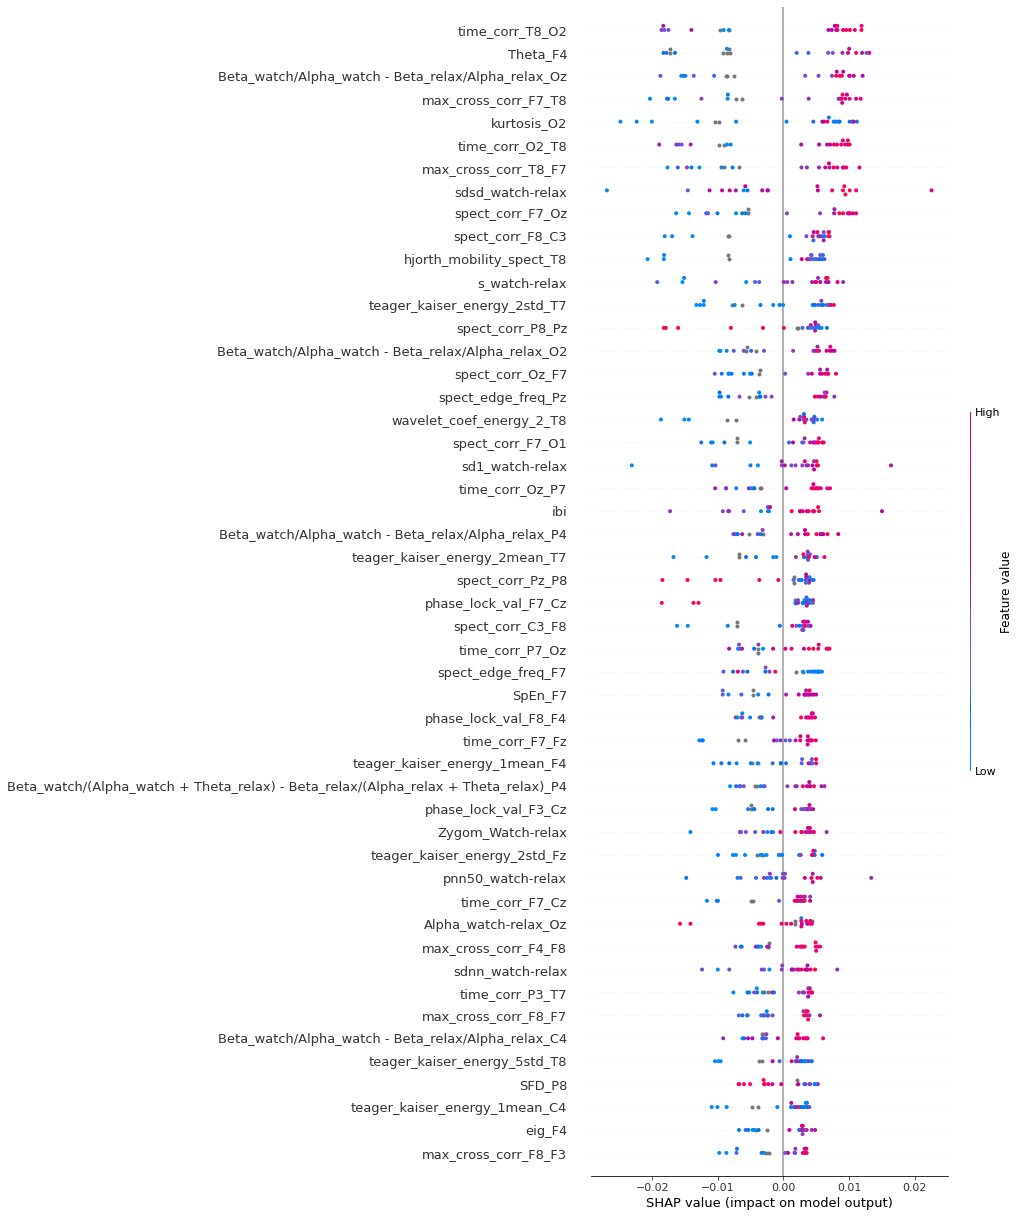

In [181]:
shap.summary_plot(shap_values, X, max_display=50, show=True)

In [182]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance[:10]

col_name  \
2453                                    time_corr_T8_O2   
232                                            Theta_F4   
207   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...   
820                                max_cross_corr_F7_T8   
689                                         kurtosis_O2   
2314                                    time_corr_O2_T8   
1023                               max_cross_corr_T8_F7   
291                                    sdsd_watch-relax   
1552                                   spect_corr_F7_Oz   
1564                                   spect_corr_F8_C3   

      feature_importance_vals  
2453                 0.011053  
232                  0.010856  
207                  0.010262  
820                  0.010255  
689                  0.010173  
2314                 0.010059  
1023                 0.009327  
291                  0.009162  
1552                 0.008812  
1564                 0.007236

In [183]:
cols = list(feature_importance['col_name'][:25])
cols

['time_corr_T8_O2',
 'Theta_F4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'max_cross_corr_F7_T8',
 'kurtosis_O2',
 'time_corr_O2_T8',
 'max_cross_corr_T8_F7',
 'sdsd_watch-relax',
 'spect_corr_F7_Oz',
 'spect_corr_F8_C3',
 'hjorth_mobility_spect_T8',
 's_watch-relax',
 'teager_kaiser_energy_2std_T7',
 'spect_corr_P8_Pz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2',
 'spect_corr_Oz_F7',
 'spect_edge_freq_Pz',
 'wavelet_coef_energy_2_T8',
 'spect_corr_F7_O1',
 'sd1_watch-relax',
 'time_corr_Oz_P7',
 'ibi',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
 'teager_kaiser_energy_2mean_T7',
 'spect_corr_Pz_P8']

In [65]:
model = TransformedTargetRegressor(regressor=CatBoostRegressor(), transformer=QuantileTransformer(output_distribution='normal'))
model.fit(X_train, y_train)

n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.


Learning rate set to 0.030177
0:	learn: 1.6709262	total: 34.2ms	remaining: 34.2s
1:	learn: 1.6611166	total: 64.9ms	remaining: 32.4s
2:	learn: 1.6531130	total: 91.6ms	remaining: 30.4s
3:	learn: 1.6444620	total: 120ms	remaining: 30s
4:	learn: 1.6330144	total: 145ms	remaining: 28.9s
5:	learn: 1.6213781	total: 169ms	remaining: 27.9s
6:	learn: 1.6126315	total: 195ms	remaining: 27.6s
7:	learn: 1.6068695	total: 223ms	remaining: 27.7s
8:	learn: 1.6002920	total: 249ms	remaining: 27.4s
9:	learn: 1.5929528	total: 275ms	remaining: 27.2s
10:	learn: 1.5822077	total: 305ms	remaining: 27.4s
11:	learn: 1.5752920	total: 328ms	remaining: 27s
12:	learn: 1.5692354	total: 353ms	remaining: 26.8s
13:	learn: 1.5622501	total: 379ms	remaining: 26.7s
14:	learn: 1.5569276	total: 407ms	remaining: 26.7s
15:	learn: 1.5476860	total: 434ms	remaining: 26.7s
16:	learn: 1.5368445	total: 457ms	remaining: 26.4s
17:	learn: 1.5303782	total: 483ms	remaining: 26.4s
18:	learn: 1.5226762	total: 508ms	remaining: 26.2s
19:	learn: 1

164:	learn: 0.8609088	total: 4.31s	remaining: 21.8s
165:	learn: 0.8575365	total: 4.34s	remaining: 21.8s
166:	learn: 0.8536485	total: 4.36s	remaining: 21.7s
167:	learn: 0.8493522	total: 4.38s	remaining: 21.7s
168:	learn: 0.8471663	total: 4.41s	remaining: 21.7s
169:	learn: 0.8420431	total: 4.43s	remaining: 21.6s
170:	learn: 0.8391431	total: 4.46s	remaining: 21.6s
171:	learn: 0.8373179	total: 4.48s	remaining: 21.6s
172:	learn: 0.8340707	total: 4.51s	remaining: 21.5s
173:	learn: 0.8272993	total: 4.53s	remaining: 21.5s
174:	learn: 0.8239061	total: 4.56s	remaining: 21.5s
175:	learn: 0.8208470	total: 4.58s	remaining: 21.5s
176:	learn: 0.8177336	total: 4.61s	remaining: 21.4s
177:	learn: 0.8144285	total: 4.63s	remaining: 21.4s
178:	learn: 0.8115297	total: 4.66s	remaining: 21.4s
179:	learn: 0.8075206	total: 4.68s	remaining: 21.3s
180:	learn: 0.8046365	total: 4.71s	remaining: 21.3s
181:	learn: 0.8018593	total: 4.74s	remaining: 21.3s
182:	learn: 0.7995448	total: 4.76s	remaining: 21.3s
183:	learn: 

331:	learn: 0.3586176	total: 8.75s	remaining: 17.6s
332:	learn: 0.3567030	total: 8.78s	remaining: 17.6s
333:	learn: 0.3536677	total: 8.8s	remaining: 17.6s
334:	learn: 0.3508788	total: 8.83s	remaining: 17.5s
335:	learn: 0.3487318	total: 8.86s	remaining: 17.5s
336:	learn: 0.3477985	total: 8.88s	remaining: 17.5s
337:	learn: 0.3470817	total: 8.92s	remaining: 17.5s
338:	learn: 0.3459485	total: 8.95s	remaining: 17.5s
339:	learn: 0.3452818	total: 8.98s	remaining: 17.4s
340:	learn: 0.3443110	total: 9s	remaining: 17.4s
341:	learn: 0.3422065	total: 9.02s	remaining: 17.4s
342:	learn: 0.3409895	total: 9.05s	remaining: 17.3s
343:	learn: 0.3383476	total: 9.07s	remaining: 17.3s
344:	learn: 0.3367104	total: 9.09s	remaining: 17.3s
345:	learn: 0.3336527	total: 9.12s	remaining: 17.2s
346:	learn: 0.3305985	total: 9.14s	remaining: 17.2s
347:	learn: 0.3284252	total: 9.17s	remaining: 17.2s
348:	learn: 0.3273716	total: 9.19s	remaining: 17.1s
349:	learn: 0.3246667	total: 9.22s	remaining: 17.1s
350:	learn: 0.32

496:	learn: 0.1366131	total: 13.1s	remaining: 13.2s
497:	learn: 0.1353038	total: 13.1s	remaining: 13.2s
498:	learn: 0.1343726	total: 13.1s	remaining: 13.2s
499:	learn: 0.1339267	total: 13.2s	remaining: 13.2s
500:	learn: 0.1331289	total: 13.2s	remaining: 13.1s
501:	learn: 0.1324330	total: 13.2s	remaining: 13.1s
502:	learn: 0.1318552	total: 13.2s	remaining: 13.1s
503:	learn: 0.1307266	total: 13.3s	remaining: 13s
504:	learn: 0.1296125	total: 13.3s	remaining: 13s
505:	learn: 0.1285470	total: 13.3s	remaining: 13s
506:	learn: 0.1283899	total: 13.3s	remaining: 13s
507:	learn: 0.1282092	total: 13.4s	remaining: 12.9s
508:	learn: 0.1280335	total: 13.4s	remaining: 12.9s
509:	learn: 0.1273612	total: 13.4s	remaining: 12.9s
510:	learn: 0.1266434	total: 13.4s	remaining: 12.9s
511:	learn: 0.1261250	total: 13.5s	remaining: 12.8s
512:	learn: 0.1259516	total: 13.5s	remaining: 12.8s
513:	learn: 0.1251520	total: 13.5s	remaining: 12.8s
514:	learn: 0.1244345	total: 13.5s	remaining: 12.7s
515:	learn: 0.123669

655:	learn: 0.0546216	total: 17.3s	remaining: 9.09s
656:	learn: 0.0543876	total: 17.4s	remaining: 9.06s
657:	learn: 0.0541700	total: 17.4s	remaining: 9.04s
658:	learn: 0.0537542	total: 17.4s	remaining: 9.01s
659:	learn: 0.0533416	total: 17.4s	remaining: 8.98s
660:	learn: 0.0529717	total: 17.5s	remaining: 8.96s
661:	learn: 0.0527223	total: 17.5s	remaining: 8.93s
662:	learn: 0.0523645	total: 17.5s	remaining: 8.91s
663:	learn: 0.0520047	total: 17.6s	remaining: 8.88s
664:	learn: 0.0517012	total: 17.6s	remaining: 8.86s
665:	learn: 0.0512885	total: 17.6s	remaining: 8.83s
666:	learn: 0.0508497	total: 17.6s	remaining: 8.81s
667:	learn: 0.0505195	total: 17.7s	remaining: 8.78s
668:	learn: 0.0503383	total: 17.7s	remaining: 8.75s
669:	learn: 0.0500983	total: 17.7s	remaining: 8.73s
670:	learn: 0.0496568	total: 17.8s	remaining: 8.7s
671:	learn: 0.0492868	total: 17.8s	remaining: 8.68s
672:	learn: 0.0490105	total: 17.8s	remaining: 8.65s
673:	learn: 0.0486455	total: 17.8s	remaining: 8.63s
674:	learn: 0

815:	learn: 0.0211400	total: 22s	remaining: 4.95s
816:	learn: 0.0209587	total: 22s	remaining: 4.93s
817:	learn: 0.0207886	total: 22.1s	remaining: 4.91s
818:	learn: 0.0206762	total: 22.1s	remaining: 4.89s
819:	learn: 0.0205839	total: 22.2s	remaining: 4.86s
820:	learn: 0.0205015	total: 22.2s	remaining: 4.84s
821:	learn: 0.0203339	total: 22.2s	remaining: 4.81s
822:	learn: 0.0201793	total: 22.3s	remaining: 4.79s
823:	learn: 0.0200747	total: 22.3s	remaining: 4.76s
824:	learn: 0.0199078	total: 22.3s	remaining: 4.74s
825:	learn: 0.0197422	total: 22.4s	remaining: 4.71s
826:	learn: 0.0196437	total: 22.4s	remaining: 4.69s
827:	learn: 0.0194944	total: 22.5s	remaining: 4.67s
828:	learn: 0.0193223	total: 22.5s	remaining: 4.65s
829:	learn: 0.0191936	total: 22.6s	remaining: 4.63s
830:	learn: 0.0190281	total: 22.6s	remaining: 4.6s
831:	learn: 0.0189500	total: 22.7s	remaining: 4.57s
832:	learn: 0.0188154	total: 22.7s	remaining: 4.55s
833:	learn: 0.0187004	total: 22.7s	remaining: 4.53s
834:	learn: 0.018

975:	learn: 0.0083190	total: 27.2s	remaining: 668ms
976:	learn: 0.0082646	total: 27.2s	remaining: 641ms
977:	learn: 0.0082187	total: 27.3s	remaining: 613ms
978:	learn: 0.0081505	total: 27.3s	remaining: 585ms
979:	learn: 0.0080825	total: 27.3s	remaining: 558ms
980:	learn: 0.0080342	total: 27.4s	remaining: 530ms
981:	learn: 0.0079715	total: 27.4s	remaining: 502ms
982:	learn: 0.0079289	total: 27.4s	remaining: 474ms
983:	learn: 0.0078938	total: 27.4s	remaining: 446ms
984:	learn: 0.0078430	total: 27.5s	remaining: 418ms
985:	learn: 0.0077977	total: 27.5s	remaining: 390ms
986:	learn: 0.0077506	total: 27.5s	remaining: 362ms
987:	learn: 0.0077137	total: 27.5s	remaining: 335ms
988:	learn: 0.0076616	total: 27.6s	remaining: 307ms
989:	learn: 0.0076141	total: 27.6s	remaining: 279ms
990:	learn: 0.0075615	total: 27.6s	remaining: 251ms
991:	learn: 0.0075138	total: 27.7s	remaining: 223ms
992:	learn: 0.0074688	total: 27.7s	remaining: 195ms
993:	learn: 0.0074010	total: 27.7s	remaining: 167ms
994:	learn: 

TransformedTargetRegressor(regressor=<catboost.core.CatBoostRegressor object at 0x000001887E696040>,
                           transformer=QuantileTransformer(output_distribution='normal'))

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [69]:
feature_importance = model.regressor_.get_feature_importance(prettified=True,data=test_pool, type='LossFunctionChange')
feature_importance

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Feature Id  Importances
0            Zygom_Watch-relax     0.135636
1                Beta/Alpha_T8     0.025425
2                Beta/Alpha_O1     0.024766
3            pnn20_watch-relax     0.016105
4              ibi_watch-relax     0.010864
..                         ...          ...
512                     KFD_P3    -0.010811
513  breathingrate_watch-relax    -0.012867
514                  ShanEn_O1    -0.013661
515                     Result    -0.014720
516                    sd1/sd2    -0.016452

[517 rows x 2 columns]

In [11]:
feature_importance[:30]

Feature Id  Importances
0                                   Zygom_Watch-relax     0.079651
1                                       Beta/Alpha_T8     0.028418
2   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.024653
3   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.017129
4                                     ibi_watch-relax     0.015925
5                                               pnn50     0.012555
6                                     bpm_watch-relax     0.012479
7   Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.010710
8                                   pnn20_watch-relax     0.008532
9   Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.008265
10                                     Theta_ratio_Pz     0.008183
11  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.007823
12                                                ibi     0.007709
13  Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.006633
14                                   sdsd_watch-relax     0.006591
15  Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.006445
16                                      Beta/Alpha_Oz     0.006324
17                            Beta/(Alpha + Theta)_O2     0.005814
18                                 hr_mad_watch-relax     0.005799
19  Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.005739
20                                              pnn20     0.005597
21                            Beta/(Alpha + Theta)_F8     0.005539
22  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.005457
23  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.005247
24                                Beta_watch-relax_T7     0.005225
25  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.004706
26  Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.004594
27  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.004493
28                                          DiffEn_F3     0.004289
29                                           Theta_Cz     0.004225

In [58]:
cols = list(feature_importance[:25]['Feature Id'])
cols

['Zygom_Watch-relax',
 'Beta/Alpha_T8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1',
 'ibi_watch-relax',
 'pnn50',
 'bpm_watch-relax',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P3',
 'pnn20_watch-relax',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
 'Theta_ratio_Pz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
 'ibi',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'sdsd_watch-relax',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Beta/Alpha_Oz',
 'Beta/(Alpha + Theta)_O2',
 'hr_mad_watch-relax',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'pnn20',
 'Beta/(Alpha + Theta)_F8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
 'Beta_watch-relax_T7']

In [59]:
model = TransformedTargetRegressor(regressor=CatBoostRegressor(),
                                 transformer=QuantileTransformer(output_distribution='normal'))
model.fit(X_train[cols], y_train)
preds = model.predict(X_test[cols])

n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.


Learning rate set to 0.030177
0:	learn: 1.6726005	total: 4.25ms	remaining: 4.25s
1:	learn: 1.6649449	total: 6.41ms	remaining: 3.2s
2:	learn: 1.6537157	total: 8.47ms	remaining: 2.81s
3:	learn: 1.6457546	total: 10.5ms	remaining: 2.62s
4:	learn: 1.6354620	total: 12.4ms	remaining: 2.46s
5:	learn: 1.6262484	total: 14.2ms	remaining: 2.35s
6:	learn: 1.6166178	total: 15.9ms	remaining: 2.26s
7:	learn: 1.6083141	total: 18ms	remaining: 2.24s
8:	learn: 1.6014030	total: 20ms	remaining: 2.2s
9:	learn: 1.5918614	total: 21.8ms	remaining: 2.16s
10:	learn: 1.5839026	total: 23.6ms	remaining: 2.12s
11:	learn: 1.5735680	total: 26.1ms	remaining: 2.15s
12:	learn: 1.5643185	total: 28.4ms	remaining: 2.16s
13:	learn: 1.5562149	total: 31.3ms	remaining: 2.2s
14:	learn: 1.5465570	total: 34.4ms	remaining: 2.26s
15:	learn: 1.5390383	total: 37ms	remaining: 2.27s
16:	learn: 1.5313275	total: 38.9ms	remaining: 2.25s
17:	learn: 1.5227971	total: 41.3ms	remaining: 2.25s
18:	learn: 1.5131796	total: 43.1ms	remaining: 2.22s
1

186:	learn: 0.7862799	total: 342ms	remaining: 1.49s
187:	learn: 0.7838225	total: 344ms	remaining: 1.48s
188:	learn: 0.7792362	total: 346ms	remaining: 1.48s
189:	learn: 0.7763489	total: 348ms	remaining: 1.48s
190:	learn: 0.7725829	total: 349ms	remaining: 1.48s
191:	learn: 0.7696556	total: 351ms	remaining: 1.48s
192:	learn: 0.7664218	total: 353ms	remaining: 1.48s
193:	learn: 0.7641009	total: 355ms	remaining: 1.47s
194:	learn: 0.7626200	total: 357ms	remaining: 1.47s
195:	learn: 0.7602202	total: 358ms	remaining: 1.47s
196:	learn: 0.7589595	total: 360ms	remaining: 1.47s
197:	learn: 0.7571831	total: 362ms	remaining: 1.47s
198:	learn: 0.7545923	total: 363ms	remaining: 1.46s
199:	learn: 0.7495662	total: 365ms	remaining: 1.46s
200:	learn: 0.7454300	total: 367ms	remaining: 1.46s
201:	learn: 0.7428394	total: 369ms	remaining: 1.46s
202:	learn: 0.7410590	total: 370ms	remaining: 1.45s
203:	learn: 0.7389833	total: 372ms	remaining: 1.45s
204:	learn: 0.7366606	total: 375ms	remaining: 1.45s
205:	learn: 

382:	learn: 0.3495087	total: 688ms	remaining: 1.11s
383:	learn: 0.3477823	total: 691ms	remaining: 1.11s
384:	learn: 0.3459377	total: 693ms	remaining: 1.11s
385:	learn: 0.3441148	total: 695ms	remaining: 1.1s
386:	learn: 0.3423711	total: 697ms	remaining: 1.1s
387:	learn: 0.3401309	total: 699ms	remaining: 1.1s
388:	learn: 0.3392282	total: 701ms	remaining: 1.1s
389:	learn: 0.3382018	total: 703ms	remaining: 1.1s
390:	learn: 0.3363175	total: 705ms	remaining: 1.1s
391:	learn: 0.3343080	total: 707ms	remaining: 1.1s
392:	learn: 0.3323792	total: 710ms	remaining: 1.1s
393:	learn: 0.3318639	total: 712ms	remaining: 1.09s
394:	learn: 0.3303625	total: 714ms	remaining: 1.09s
395:	learn: 0.3294067	total: 716ms	remaining: 1.09s
396:	learn: 0.3285468	total: 718ms	remaining: 1.09s
397:	learn: 0.3275649	total: 720ms	remaining: 1.09s
398:	learn: 0.3260694	total: 721ms	remaining: 1.09s
399:	learn: 0.3246235	total: 723ms	remaining: 1.08s
400:	learn: 0.3226392	total: 724ms	remaining: 1.08s
401:	learn: 0.320703

546:	learn: 0.1709401	total: 1.04s	remaining: 859ms
547:	learn: 0.1701136	total: 1.04s	remaining: 858ms
548:	learn: 0.1695287	total: 1.04s	remaining: 856ms
549:	learn: 0.1685705	total: 1.04s	remaining: 855ms
550:	learn: 0.1681379	total: 1.05s	remaining: 853ms
551:	learn: 0.1672970	total: 1.05s	remaining: 851ms
552:	learn: 0.1666613	total: 1.05s	remaining: 849ms
553:	learn: 0.1660453	total: 1.05s	remaining: 848ms
554:	learn: 0.1654249	total: 1.05s	remaining: 846ms
555:	learn: 0.1643625	total: 1.06s	remaining: 845ms
556:	learn: 0.1640520	total: 1.06s	remaining: 844ms
557:	learn: 0.1636217	total: 1.06s	remaining: 842ms
558:	learn: 0.1632402	total: 1.06s	remaining: 840ms
559:	learn: 0.1630732	total: 1.07s	remaining: 838ms
560:	learn: 0.1628701	total: 1.07s	remaining: 836ms
561:	learn: 0.1621322	total: 1.07s	remaining: 834ms
562:	learn: 0.1618121	total: 1.07s	remaining: 832ms
563:	learn: 0.1609679	total: 1.07s	remaining: 830ms
564:	learn: 0.1602464	total: 1.07s	remaining: 828ms
565:	learn: 

725:	learn: 0.0828591	total: 1.38s	remaining: 522ms
726:	learn: 0.0824967	total: 1.39s	remaining: 520ms
727:	learn: 0.0822139	total: 1.39s	remaining: 518ms
728:	learn: 0.0819652	total: 1.39s	remaining: 517ms
729:	learn: 0.0816957	total: 1.39s	remaining: 515ms
730:	learn: 0.0815094	total: 1.4s	remaining: 514ms
731:	learn: 0.0812249	total: 1.4s	remaining: 512ms
732:	learn: 0.0807557	total: 1.4s	remaining: 511ms
733:	learn: 0.0803969	total: 1.4s	remaining: 509ms
734:	learn: 0.0800934	total: 1.41s	remaining: 507ms
735:	learn: 0.0798194	total: 1.41s	remaining: 505ms
736:	learn: 0.0793085	total: 1.41s	remaining: 504ms
737:	learn: 0.0789218	total: 1.41s	remaining: 502ms
738:	learn: 0.0785612	total: 1.42s	remaining: 500ms
739:	learn: 0.0782690	total: 1.42s	remaining: 499ms
740:	learn: 0.0779628	total: 1.42s	remaining: 497ms
741:	learn: 0.0774644	total: 1.43s	remaining: 496ms
742:	learn: 0.0771434	total: 1.43s	remaining: 494ms
743:	learn: 0.0768241	total: 1.43s	remaining: 492ms
744:	learn: 0.07

906:	learn: 0.0397112	total: 1.73s	remaining: 177ms
907:	learn: 0.0394704	total: 1.73s	remaining: 175ms
908:	learn: 0.0393546	total: 1.73s	remaining: 174ms
909:	learn: 0.0391937	total: 1.74s	remaining: 172ms
910:	learn: 0.0389743	total: 1.74s	remaining: 170ms
911:	learn: 0.0387793	total: 1.74s	remaining: 168ms
912:	learn: 0.0385953	total: 1.74s	remaining: 166ms
913:	learn: 0.0384360	total: 1.74s	remaining: 164ms
914:	learn: 0.0383374	total: 1.75s	remaining: 162ms
915:	learn: 0.0381311	total: 1.75s	remaining: 160ms
916:	learn: 0.0380602	total: 1.75s	remaining: 158ms
917:	learn: 0.0379170	total: 1.75s	remaining: 156ms
918:	learn: 0.0377692	total: 1.75s	remaining: 155ms
919:	learn: 0.0376979	total: 1.75s	remaining: 153ms
920:	learn: 0.0375882	total: 1.76s	remaining: 151ms
921:	learn: 0.0373849	total: 1.76s	remaining: 149ms
922:	learn: 0.0372052	total: 1.76s	remaining: 147ms
923:	learn: 0.0370554	total: 1.76s	remaining: 145ms
924:	learn: 0.0370087	total: 1.76s	remaining: 143ms
925:	learn: 

In [60]:
y_test

array([10, 10,  6,  8,  7,  9,  5,  8,  3,  8, 10,  8, 10,  9,  6,  9, 10,
        5,  5,  3,  9], dtype=int64)

In [61]:
preds

array([10.        ,  8.        ,  6.        ,  8.        ,  9.01903214,
        7.        ,  5.25022957,  7.        ,  5.        ,  9.        ,
        9.        ,  8.        ,  6.        , 10.        ,  7.        ,
       10.        ,  9.        ,  9.        ,  5.        ,  5.        ,
        5.5930327 ])

In [62]:
print(r2_score(y_test, preds))
print(mean_absolute_percentage_error(y_test, preds))
print(mean_absolute_error(y_test, preds))

0.32774788757130546
0.21483216401123056
1.3655347150220412


In [41]:
data_all[cols + ['Labels']].corr()

Zygom_Watch-relax  \
Zygom_Watch-relax                                            1.000000   
PEn_Fz                                                      -0.110524   
Beta/Alpha_T8                                               -0.164929   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4           0.033690   
Theta_watch-relax_F3                                         0.145520   
sd1/sd2_watch-relax                                         -0.112444   
Beta/(Alpha + Theta)_P3                                      0.011183   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1           0.171663   
sdsd_watch-relax                                             0.090489   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3           0.080213   
Beta/(Alpha + Theta)_O2                                     -0.080842   
Beta_watch/(Alpha_watch + Theta_relax) - Beta_r...           0.136352   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2           0.129808   
sd2_watch-relax                                              0.211825   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz           0.125776   
Alpha_watch-relax_Cz                                        -0.044047   
bpm_watch-relax                                              0.034884   
Beta_watch/(Alpha_watch + Theta_watch)_T8                    0.231082   
Hjorth_T7                                                   -0.107276   
sdnn_watch-relax                                             0.203298   
Alpha_P4                                                     0.006676   
sd1_watch-relax                                              0.022342   
Theta_watch-relax_F8                                         0.337671   
SpEn_F3                                                      0.123167   
Beta/(Alpha + Theta)_F3                                     -0.010212   
Labels                                                       0.149021   

                                                      PEn_Fz  Beta/Alpha_T8  \
Zygom_Watch-relax                                  -0.110524      -0.164929   
PEn_Fz                                              1.000000       0.006026   
Beta/Alpha_T8                                       0.006026       1.000000   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4 -0.002195      -0.079096   
Theta_watch-relax_F3                                0.046360       0.054187   
sd1/sd2_watch-relax                                 0.047217      -0.144224   
Beta/(Alpha + Theta)_P3                             0.095226      -0.025853   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1 -0.035301      -0.118598   
sdsd_watch-relax                                   -0.022915      -0.067100   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3 -0.019331      -0.092770   
Beta/(Alpha + Theta)_O2                            -0.002119       0.066707   
Beta_watch/(Alpha_watch + Theta_relax) - Beta_r... -0.056702       0.013001   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2 -0.075523      -0.082078   
sd2_watch-relax                                    -0.045305       0.130755   
Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz -0.065426      -0.109296   
Alpha_watch-relax_Cz                                0.130100       0.055881   
bpm_watch-relax                                     0.077437      -0.030108   
Beta_watch/(Alpha_watch + Theta_watch)_T8           0.321949       0.051154   
Hjorth_T7                                           0.109667      -0.007735   
sdnn_watch-relax                                   -0.042066       0.095487   
Alpha_P4                                           -0.422786      -0.079727   
sd1_watch-relax                                     0.000177      -0.055552   
Theta_watch-relax_F8                                0.038653       0.212836   
SpEn_F3                                            -0.156377       0.029586   
Beta/(Alpha + Theta)_F3                            -0.046363       0.070413   
Labels                    

In [6]:
model = CatBoostRegressor(cat_features=['Subj'])
X = data_all.drop(['film', 'Labels', 'Subj'], axis=1)
y = data_all['Labels']
model.fit(X, y)

Learning rate set to 0.030339
0:	learn: 2.3253848	total: 181ms	remaining: 3m
1:	learn: 2.3152381	total: 235ms	remaining: 1m 57s
2:	learn: 2.3025268	total: 282ms	remaining: 1m 33s
3:	learn: 2.2882313	total: 321ms	remaining: 1m 19s
4:	learn: 2.2739421	total: 365ms	remaining: 1m 12s
5:	learn: 2.2607158	total: 408ms	remaining: 1m 7s
6:	learn: 2.2410521	total: 455ms	remaining: 1m 4s
7:	learn: 2.2302273	total: 516ms	remaining: 1m 4s
8:	learn: 2.2136764	total: 557ms	remaining: 1m 1s
9:	learn: 2.1991011	total: 600ms	remaining: 59.4s
10:	learn: 2.1931602	total: 642ms	remaining: 57.7s
11:	learn: 2.1810035	total: 690ms	remaining: 56.8s
12:	learn: 2.1662554	total: 731ms	remaining: 55.5s
13:	learn: 2.1510160	total: 771ms	remaining: 54.3s
14:	learn: 2.1356456	total: 817ms	remaining: 53.7s
15:	learn: 2.1269549	total: 859ms	remaining: 52.8s
16:	learn: 2.1158023	total: 915ms	remaining: 52.9s
17:	learn: 2.1047371	total: 969ms	remaining: 52.9s
18:	learn: 2.0915842	total: 1.02s	remaining: 53s
19:	learn: 2

164:	learn: 0.9604464	total: 7.6s	remaining: 38.5s
165:	learn: 0.9547861	total: 7.65s	remaining: 38.4s
166:	learn: 0.9470416	total: 7.7s	remaining: 38.4s
167:	learn: 0.9403558	total: 7.74s	remaining: 38.3s
168:	learn: 0.9375859	total: 7.78s	remaining: 38.3s
169:	learn: 0.9334104	total: 7.83s	remaining: 38.2s
170:	learn: 0.9287627	total: 7.87s	remaining: 38.2s
171:	learn: 0.9226753	total: 7.92s	remaining: 38.1s
172:	learn: 0.9180094	total: 7.96s	remaining: 38.1s
173:	learn: 0.9124179	total: 8.03s	remaining: 38.1s
174:	learn: 0.9075605	total: 8.08s	remaining: 38.1s
175:	learn: 0.9016319	total: 8.13s	remaining: 38.1s
176:	learn: 0.8972371	total: 8.18s	remaining: 38s
177:	learn: 0.8905239	total: 8.23s	remaining: 38s
178:	learn: 0.8861858	total: 8.28s	remaining: 38s
179:	learn: 0.8798620	total: 8.32s	remaining: 37.9s
180:	learn: 0.8753610	total: 8.37s	remaining: 37.9s
181:	learn: 0.8706317	total: 8.41s	remaining: 37.8s
182:	learn: 0.8677090	total: 8.46s	remaining: 37.8s
183:	learn: 0.863095

323:	learn: 0.2965021	total: 15.5s	remaining: 32.3s
324:	learn: 0.2939353	total: 15.5s	remaining: 32.2s
325:	learn: 0.2912994	total: 15.6s	remaining: 32.2s
326:	learn: 0.2886664	total: 15.6s	remaining: 32.2s
327:	learn: 0.2862575	total: 15.7s	remaining: 32.1s
328:	learn: 0.2838717	total: 15.7s	remaining: 32.1s
329:	learn: 0.2818797	total: 15.8s	remaining: 32.2s
330:	learn: 0.2795782	total: 15.9s	remaining: 32.2s
331:	learn: 0.2772058	total: 16s	remaining: 32.1s
332:	learn: 0.2751573	total: 16.1s	remaining: 32.2s
333:	learn: 0.2724899	total: 16.1s	remaining: 32.1s
334:	learn: 0.2701242	total: 16.1s	remaining: 32.1s
335:	learn: 0.2677517	total: 16.2s	remaining: 32s
336:	learn: 0.2654163	total: 16.2s	remaining: 32s
337:	learn: 0.2642360	total: 16.3s	remaining: 31.9s
338:	learn: 0.2617559	total: 16.4s	remaining: 31.9s
339:	learn: 0.2609980	total: 16.4s	remaining: 31.9s
340:	learn: 0.2585712	total: 16.5s	remaining: 31.8s
341:	learn: 0.2562701	total: 16.5s	remaining: 31.8s
342:	learn: 0.2547

482:	learn: 0.0871779	total: 23s	remaining: 24.6s
483:	learn: 0.0863380	total: 23.1s	remaining: 24.6s
484:	learn: 0.0856762	total: 23.1s	remaining: 24.5s
485:	learn: 0.0848648	total: 23.2s	remaining: 24.5s
486:	learn: 0.0842412	total: 23.2s	remaining: 24.4s
487:	learn: 0.0836097	total: 23.3s	remaining: 24.4s
488:	learn: 0.0828161	total: 23.3s	remaining: 24.4s
489:	learn: 0.0821758	total: 23.4s	remaining: 24.3s
490:	learn: 0.0815050	total: 23.4s	remaining: 24.3s
491:	learn: 0.0809141	total: 23.4s	remaining: 24.2s
492:	learn: 0.0803714	total: 23.5s	remaining: 24.2s
493:	learn: 0.0797008	total: 23.5s	remaining: 24.1s
494:	learn: 0.0792001	total: 23.6s	remaining: 24.1s
495:	learn: 0.0784457	total: 23.6s	remaining: 24s
496:	learn: 0.0779001	total: 23.7s	remaining: 24s
497:	learn: 0.0773813	total: 23.7s	remaining: 23.9s
498:	learn: 0.0768666	total: 23.8s	remaining: 23.9s
499:	learn: 0.0764922	total: 23.8s	remaining: 23.8s
500:	learn: 0.0758260	total: 23.9s	remaining: 23.8s
501:	learn: 0.0752

645:	learn: 0.0260910	total: 30.5s	remaining: 16.7s
646:	learn: 0.0259787	total: 30.5s	remaining: 16.7s
647:	learn: 0.0259162	total: 30.6s	remaining: 16.6s
648:	learn: 0.0256822	total: 30.6s	remaining: 16.6s
649:	learn: 0.0254924	total: 30.7s	remaining: 16.5s
650:	learn: 0.0253532	total: 30.7s	remaining: 16.5s
651:	learn: 0.0251587	total: 30.8s	remaining: 16.4s
652:	learn: 0.0249495	total: 30.8s	remaining: 16.4s
653:	learn: 0.0247621	total: 30.8s	remaining: 16.3s
654:	learn: 0.0245266	total: 30.9s	remaining: 16.3s
655:	learn: 0.0243102	total: 30.9s	remaining: 16.2s
656:	learn: 0.0241157	total: 31s	remaining: 16.2s
657:	learn: 0.0239201	total: 31s	remaining: 16.1s
658:	learn: 0.0238169	total: 31.1s	remaining: 16.1s
659:	learn: 0.0236166	total: 31.1s	remaining: 16s
660:	learn: 0.0234019	total: 31.1s	remaining: 16s
661:	learn: 0.0232011	total: 31.2s	remaining: 15.9s
662:	learn: 0.0230174	total: 31.2s	remaining: 15.9s
663:	learn: 0.0229461	total: 31.3s	remaining: 15.8s
664:	learn: 0.022744

804:	learn: 0.0085191	total: 37.9s	remaining: 9.18s
805:	learn: 0.0084493	total: 37.9s	remaining: 9.13s
806:	learn: 0.0083817	total: 38s	remaining: 9.08s
807:	learn: 0.0083257	total: 38s	remaining: 9.04s
808:	learn: 0.0082661	total: 38.1s	remaining: 8.99s
809:	learn: 0.0081929	total: 38.1s	remaining: 8.94s
810:	learn: 0.0081486	total: 38.2s	remaining: 8.89s
811:	learn: 0.0081171	total: 38.2s	remaining: 8.85s
812:	learn: 0.0080744	total: 38.3s	remaining: 8.8s
813:	learn: 0.0080067	total: 38.3s	remaining: 8.75s
814:	learn: 0.0079473	total: 38.4s	remaining: 8.71s
815:	learn: 0.0078777	total: 38.4s	remaining: 8.66s
816:	learn: 0.0078236	total: 38.4s	remaining: 8.61s
817:	learn: 0.0077530	total: 38.5s	remaining: 8.56s
818:	learn: 0.0077159	total: 38.5s	remaining: 8.52s
819:	learn: 0.0076384	total: 38.6s	remaining: 8.47s
820:	learn: 0.0075749	total: 38.6s	remaining: 8.42s
821:	learn: 0.0075630	total: 38.7s	remaining: 8.37s
822:	learn: 0.0075186	total: 38.7s	remaining: 8.33s
823:	learn: 0.007

966:	learn: 0.0029881	total: 45.4s	remaining: 1.55s
967:	learn: 0.0029625	total: 45.4s	remaining: 1.5s
968:	learn: 0.0029465	total: 45.5s	remaining: 1.45s
969:	learn: 0.0029261	total: 45.5s	remaining: 1.41s
970:	learn: 0.0029012	total: 45.6s	remaining: 1.36s
971:	learn: 0.0028789	total: 45.6s	remaining: 1.31s
972:	learn: 0.0028576	total: 45.6s	remaining: 1.27s
973:	learn: 0.0028336	total: 45.7s	remaining: 1.22s
974:	learn: 0.0028123	total: 45.7s	remaining: 1.17s
975:	learn: 0.0027864	total: 45.8s	remaining: 1.13s
976:	learn: 0.0027669	total: 45.8s	remaining: 1.08s
977:	learn: 0.0027462	total: 45.9s	remaining: 1.03s
978:	learn: 0.0027302	total: 45.9s	remaining: 985ms
979:	learn: 0.0027053	total: 46s	remaining: 938ms
980:	learn: 0.0026955	total: 46s	remaining: 891ms
981:	learn: 0.0026726	total: 46.1s	remaining: 844ms
982:	learn: 0.0026508	total: 46.1s	remaining: 797ms
983:	learn: 0.0026377	total: 46.2s	remaining: 750ms
984:	learn: 0.0026140	total: 46.2s	remaining: 704ms
985:	learn: 0.002

In [7]:
feature_importance = model.get_feature_importance(prettified=True,data=Pool(X, y,cat_features=['Subj']), type='LossFunctionChange')


In [122]:
feature_importance[:30]


Feature Id  Importances
0                                   Zygom_Watch-relax     0.163850
1                                              PEn_Fz     0.158157
2                                       Beta/Alpha_T8     0.136994
3   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.088362
4                                Theta_watch-relax_F3     0.070799
5                                 sd1/sd2_watch-relax     0.064875
6                             Beta/(Alpha + Theta)_P3     0.059890
7   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.058177
8                                    sdsd_watch-relax     0.053070
9   Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.051269
10                            Beta/(Alpha + Theta)_O2     0.047894
11  Beta_watch/(Alpha_watch + Theta_relax) - Beta_...     0.044434
12  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.041350
13                                    sd2_watch-relax     0.033840
14  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.033315
15                               Alpha_watch-relax_Cz     0.032978
16                                    bpm_watch-relax     0.031929
17          Beta_watch/(Alpha_watch + Theta_watch)_T8     0.031018
18                                          Hjorth_T7     0.028674
19                                   sdnn_watch-relax     0.027801
20                                           Alpha_P4     0.026677
21                                    sd1_watch-relax     0.026560
22                               Theta_watch-relax_F8     0.025678
23                                            SpEn_F3     0.025043
24                            Beta/(Alpha + Theta)_F3     0.024718
25                                Beta_watch-relax_T7     0.024601
26                            Beta/(Alpha + Theta)_C3     0.023890
27                                Beta_watch-relax_C4     0.023797
28  Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.023125
29                                    ibi_watch-relax     0.021872

In [105]:
cols = list(feature_importance[:50]['Feature Id'])

In [88]:
feature_importance

Feature Id  Importances
0                                    Zygom_Watch-relax     0.163850
1                                               PEn_Fz     0.158157
2                                        Beta/Alpha_T8     0.136994
3    Beta_watch/Alpha_watch - Beta_relax/Alpha_rela...     0.088362
4                                 Theta_watch-relax_F3     0.070799
..                                                 ...          ...
513                                          DiffEn_P4     0.000000
514                                          Hjorth_T8     0.000000
515                                           SVDEn_Oz     0.000000
516                                           SVDEn_O2     0.000000
517                                           SVDEn_P4     0.000000

[518 rows x 2 columns]

In [89]:
cols

['Zygom_Watch-relax',
 'PEn_Fz',
 'Beta/Alpha_T8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
 'Theta_watch-relax_F3',
 'sd1/sd2_watch-relax',
 'Beta/(Alpha + Theta)_P3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1',
 'sdsd_watch-relax',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
 'Beta/(Alpha + Theta)_O2',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2',
 'sd2_watch-relax',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
 'Alpha_watch-relax_Cz',
 'bpm_watch-relax',
 'Beta_watch/(Alpha_watch + Theta_watch)_T8',
 'Hjorth_T7',
 'sdnn_watch-relax',
 'Alpha_P4',
 'sd1_watch-relax',
 'Theta_watch-relax_F8',
 'SpEn_F3',
 'Beta/(Alpha + Theta)_F3',
 'Beta_watch-relax_T7',
 'Beta/(Alpha + Theta)_C3',
 'Beta_watch-relax_C4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P8',
 'ibi_watch-relax']

In [43]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression, f_classif

In [163]:
data_all = pd.read_csv('matrix_final.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1     1.0   2.0  6.010149  3.606064  2.759643   4.523674  4.651910  2.815613   
2     1.0   3.0  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3     1.0   4.0  2.783825  4.860342  4.188857   6.614255  2.691938  1.758350   
4     1.0   6.0  5.108710  6.612286       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161   5.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
162   3.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
163   7.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
164   6.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   
165   2.0  21.0       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...        sd1        sd2             s   sd1/sd2  \
0    1.321008   1.879488  ...  36.004782  63.728486   7208.479428  0.564972   
1    3.860679   5.419934  ...   5.827722  20.617867    377.478687  0.282654   
2    2.241788   2.574973  ...  27.324769  79.410622   6816.869439  0.344095   
3    2.501624   0.806723  ...  48.378525  85.769064  13035.664106  0.564056   
4    9.667544  10.095658  ...  30.698621  67.634709   6522.864730  0.453889   
..        ...        ...  ...        ...        ...           ...       ...   
161       NaN        NaN  ...  16.551727  36.532664   1899.654127  0.453067   
162       NaN        NaN  ...  16.091991  59.828525   3024.600108  0.268969   
163       NaN        NaN  ...  18.028114  62.002796   3511.651726  0.290763   
164       NaN        NaN  ...  14.824270  58.258877   2713.221811  0.254455   
165       NaN        NaN  ...  18.202655  48.813435   2791.412256  0.372903   

     breathingrate           EDA    Corr_watch  Corr_Watch-relax  Zygom_watch  \
0         0.126139  1.071543e-05  4.584045e-06     -2.363670e-06     0.000008   
1         0.315129  1.351562e-07  3.192480e-06      5.825113e-07     0.000003   
2         0.125964  6.407601e-07  2.961209e-06     -1.921418e-06     0.000002   
3         0.333333  1.408525e-06  2.729315e-06      9.197836e-07     0.000006   
4         0.220348  1.812108e-06  7.797131e-06      1.397621e-07     0.000006   
..             ...           ...           ...               ...          ...   
161       0.333333  1.586434e-08  4.105661e-07      1.819826e-09     0.000002   
162       0.300399  1.521037e-07  4.091630e-07      1.107719e-10     0.000002   
163       0.115463  2.699324e-08  4.106556e-07      4.663283e-10     0.000002   
164       0.128018  4.118254e-08  4.107057e-07      6.195613e-10     0.000002   
165       0.152431  4.694813e-08  4.120631e-07     -5.575971e-11     0.000002   

     Zygom_Watch-relax  
0         1.361368e-06  
1         4.239309e-07  
2        -1.058808e-06  
3         9.849901e-07  
4         1.881074e-06  
..                 ...  
161      -1.218309e-06  
162      -3.530825e-07  
163      -3.687755e-07  
164      -3.542369e-07  
165      -6.626327e-07  

[166 rows x 520 columns]

In [164]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer()

In [165]:
data_all = pd.DataFrame(imputer.fit_transform(data_all),columns=imputer.feature_names_in_)
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1     1.0   2.0  6.010149  3.606064  2.759643   4.523674  4.651910  2.815613   
2     1.0   3.0  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3     1.0   4.0  2.783825  4.860342  4.188857   6.614255  2.691938  1.758350   
4     1.0   6.0  5.108710  6.612286  6.290769  10.953561  4.907060  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161   5.0  21.0  1.894896  1.947867  2.888912   3.734248  3.893023  4.277723   
162   3.0  21.0  1.865439  2.029434  2.839424   3.642191  4.626734  2.159874   
163   7.0  21.0  2.043895  3.261053  5.269673   5.805077  6.852807  6.857398   
164   6.0  21.0  1.406866  1.617937  2.860305   3.072286  4.159951  4.365653   
165   2.0  21.0  1.590238  1.778153  2.872108   2.509575  3.188457  2.244105   

     Alpha_P3   Alpha_P7  ...        sd1        sd2             s   sd1/sd2  \
0    1.321008   1.879488  ...  36.004782  63.728486   7208.479428  0.564972   
1    3.860679   5.419934  ...   5.827722  20.617867    377.478687  0.282654   
2    2.241788   2.574973  ...  27.324769  79.410622   6816.869439  0.344095   
3    2.501624   0.806723  ...  48.378525  85.769064  13035.664106  0.564056   
4    9.667544  10.095658  ...  30.698621  67.634709   6522.864730  0.453889   
..        ...        ...  ...        ...        ...           ...       ...   
161  2.491393   2.967859  ...  16.551727  36.532664   1899.654127  0.453067   
162  3.055733   4.148766  ...  16.091991  59.828525   3024.600108  0.268969   
163  6.582755   6.527263  ...  18.028114  62.002796   3511.651726  0.290763   
164  1.928819   3.181101  ...  14.824270  58.258877   2713.221811  0.254455   
165  1.007560   1.653785  ...  18.202655  48.813435   2791.412256  0.372903   

     breathingrate           EDA    Corr_watch  Corr_Watch-relax  Zygom_watch  \
0         0.126139  1.071543e-05  4.584045e-06     -2.363670e-06     0.000008   
1         0.315129  1.351562e-07  3.192480e-06      5.825113e-07     0.000003   
2         0.125964  6.407601e-07  2.961209e-06     -1.921418e-06     0.000002   
3         0.333333  1.408525e-06  2.729315e-06      9.197836e-07     0.000006   
4         0.220348  1.812108e-06  7.797131e-06      1.397621e-07     0.000006   
..             ...           ...           ...               ...          ...   
161       0.333333  1.586434e-08  4.105661e-07      1.819826e-09     0.000002   
162       0.300399  1.521037e-07  4.091630e-07      1.107719e-10     0.000002   
163       0.115463  2.699324e-08  4.106556e-07      4.663283e-10     0.000002   
164       0.128018  4.118254e-08  4.107057e-07      6.195613e-10     0.000002   
165       0.152431  4.694813e-08  4.120631e-07     -5.575971e-11     0.000002   

     Zygom_Watch-relax  
0         1.361368e-06  
1         4.239309e-07  
2        -1.058808e-06  
3         9.849901e-07  
4         1.881074e-06  
..                 ...  
161      -1.218309e-06  
162      -3.530825e-07  
163      -3.687755e-07  
164      -3.542369e-07  
165      -6.626327e-07  

[166 rows x 520 columns]

In [166]:
X = data_all.drop(['film', 'Labels', 'Subj'], axis=1)
y = data_all['Labels']

In [167]:
SKB = SelectKBest(f_regression, k=50)
SKB.fit_transform(X, y)

array([[ 9.33211948e+00,  6.50654365e+00,  2.35270073e+00, ...,
         1.88834763e+01,  3.53801170e-01,  1.36136823e-06],
       [ 7.91332475e+00,  1.05584056e+01,  6.48136523e+00, ...,
         2.22597662e+01,  0.00000000e+00,  4.23930921e-07],
       [ 5.68892775e+00,  7.08279974e+00,  3.44399491e+00, ...,
         1.80662578e+01,  2.09523810e-01, -1.05880829e-06],
       ...,
       [ 6.40282345e+00,  7.45565790e+00,  3.81841156e+00, ...,
         2.14147397e+01,  3.93873085e-02, -3.68775458e-07],
       [ 5.61276708e+00,  6.01915314e+00,  5.85339546e+00, ...,
         1.52189786e+01,  2.89575290e-02, -3.54236898e-07],
       [ 5.52192199e+00,  5.87365026e+00,  6.92044697e+00, ...,
         1.39733495e+01,  4.55407970e-02, -6.62632730e-07]])

In [168]:
cols = list(SKB.get_feature_names_out())
cols

['Beta_P8',
 'Beta_T8',
 'Beta_F4',
 'Beta/(Alpha + Theta)_Oz',
 'Beta/(Alpha + Theta)_O2',
 'Beta/Alpha_Oz',
 'Beta_ratio_Fz',
 'Beta_ratio_C4',
 'Beta_ratio_F4',
 'Beta_watch-relax_F8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Beta_watch/Alpha_watch_Fz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
 'Beta_watch/Alpha_watch - Beta

In [218]:
feature_importance.to_excel('fi.xlsx', index=False)

In [13]:
pool = Pool(X_train, y_train, cat_features=['ch'])

In [14]:
tt.regressor_.plot_tree(
    tree_idx=0,
    pool=pool
)

ImportError: cannot import name 'ENGINES' from 'graphviz.backend' (C:\Users\po6wi\anaconda\lib\site-packages\graphviz\backend\__init__.py)

In [58]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'

In [10]:
preds = tt.predict(X_test)

In [11]:
#preds = qt_test.inverse_transform(y_pred.reshape(-1, 1))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

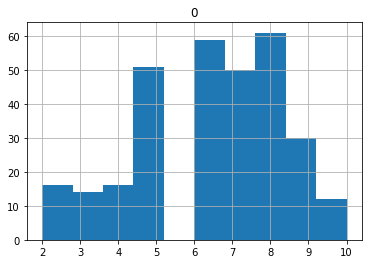

In [12]:
pd.DataFrame(preds).hist()

In [13]:
n_subjects = 21
n_films = 8
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
channels = [[] for i in range(n_subjects)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(preds)[i]
    num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
    labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(y_test)[i]
    channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(n_films):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

C:\Users\po6wi\AppData\Local\Temp/ipykernel_28028/1962924836.py:14: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\po6wi\AppData\Local\Temp/ipykernel_28028/1962924836.py:15: RuntimeWarning:

invalid value encountered in true_divide



In [14]:
for [l, p] in zip(lbl, predicted):
    print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))

label : 9.00 predicted: 6.19 
label : 7.00 predicted: 9.19 
label : 5.00 predicted: 4.84 
label : 5.00 predicted: 6.89 
label : 5.00 predicted: 2.50 
label : 9.00 predicted: 6.89 
label : 3.00 predicted: 5.06 
label : 7.00 predicted: 6.44 
label : 1.00 predicted: 3.97 
label : 8.00 predicted: 6.78 
label : 10.00 predicted: 6.33 
label : 3.00 predicted: 6.75 
label : 1.00 predicted: 7.50 
label : 7.00 predicted: 7.94 
label : 6.00 predicted: 6.28 
label : 10.00 predicted: 8.20 
label : 10.00 predicted: 6.89 
label : 7.00 predicted: 7.06 
label : 8.00 predicted: 5.12 


In [171]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [14]:
print(r2_score(lbl, predicted))
print(mean_absolute_percentage_error(lbl, predicted))
print(mean_absolute_error(lbl, predicted))

NameError: name 'lbl' is not defined

In [19]:
models = ['CatboostRegressor']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]

In [66]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']

In [67]:
cols

['Theta',
 'Alpha',
 'Beta',
 'Theta_ratio',
 'Alpha_ratio',
 'Beta_ratio',
 'TotalAbsPow',
 'Theta_watch-relax',
 'Alpha_watch-relax',
 'Beta_watch-relax',
 'Beta/Alpha',
 'Beta/(Alpha + Theta)',
 'Beta_watch/Alpha_watch',
 'Beta_watch/(Alpha_watch + Theta_watch)',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)',
 'ch']

In [188]:
data_all = pd.read_csv('Matrix100500.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...        sd2             s   sd1/sd2  \
0    1.321008   1.879488  ...  63.728486   7208.479428  0.564972   
1    3.860679   5.419934  ...  20.617867    377.478687  0.282654   
2    2.241788   2.574973  ...  79.410622   6816.869439  0.344095   
3    1.869292   2.943064  ...  85.769064  13035.664106  0.564056   
4    9.667544  10.095658  ...  67.634709   6522.864730  0.453889   
..        ...        ...  ...        ...           ...       ...   
161       NaN        NaN  ...  36.532664   1899.654127  0.453067   
162       NaN        NaN  ...  59.828525   3024.600108  0.268969   
163       NaN        NaN  ...  62.002796   3511.651726  0.290763   
164       NaN        NaN  ...  58.258877   2713.221811  0.254455   
165       NaN        NaN  ...  48.813435   2791.412256  0.372903   

     breathingrate  Labels      Result    Corr_watch  Corr_Watch-relax  \
0         0.126139      10  173.378782  4.584045e-06     -2.363670e-06   
1         0.315129      10    6.073841  3.192480e-06      5.825113e-07   
2         0.125964       6    9.643407  2.961209e-06     -1.921418e-06   
3         0.333333       8   14.413222  2.729315e-06      9.197836e-07   
4         0.220348       7   23.197161  7.797131e-06      1.397621e-07   
..             ...     ...         ...           ...               ...   
161       0.333333       9   11.122703  4.105661e-07      1.819826e-09   
162       0.300399       6   10.942879  4.091630e-07      1.107719e-10   
163       0.115463       7    5.392896  4.106556e-07      4.663283e-10   
164       0.128018       6    4.547744  4.107057e-07      6.195613e-10   
165       0.152431       8   11.460734  4.120631e-07     -5.575971e-11   

     Zygom_watch  Zygom_Watch-relax  
0       0.000008       1.361368e-06  
1       0.000003       4.239309e-07  
2       0.000002      -1.058808e-06  
3       0.000006       9.849901e-07  
4       0.000006       1.881074e-06  
..           ...                ...  
161     0.000002      -1.218309e-06  
162     0.000002      -3.530825e-07  
163     0.000002      -3.687755e-07  
164     0.000002      -3.542369e-07  
165     0.000002      -6.626327e-07  

[166 rows x 322 columns]

In [150]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 20
for film in range(1, n_subjects):
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['Subj'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['Subj'] != film)].reset_index(drop=True)

    y_train = X_train['labels']
    y_test = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train[cols]
    #.drop(['Subj', 'film', 'labels'], axis=1)
    X_test = X_test[cols]
    #.drop(['Subj', 'film', 'labels'], axis=1)
    
    md = TransformedTargetRegressor(regressor=CatBoostRegressor(cat_features=['film']),
                                   transformer=QuantileTransformer(output_distribution='normal'))
    #model = CatBoostRegressor()
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)
    #model = CatBoostRegressor()
    md.fit(X_train, y_train, verbose=False)
    preds = md.predict(test_pool)
    print(r2_score(preds, y_test))
    print(mean_absolute_percentage_error(preds, y_test))
    print(mean_absolute_error(preds, y_test))
    
    pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
    num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
    labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
    lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
    channels = [[] for i in range(n_subjects)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += preds[i]
        num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
        labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += y_test[i]
        channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(n_films):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    for [l, p] in zip(lbl, predicted):
        print(l, p)
    df[('CatboostRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('CatboostRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('CatboostRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    print(r2_score(lbl, predicted))
    print(mean_absolute_percentage_error(lbl, predicted))
    print(mean_absolute_error(lbl, predicted))
    
    result = pd.concat([result, df], axis=0)

KeyError: 'labels'

In [20]:
data_all = pd.read_csv('MatrixClassif2.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1       2     1  2.422609  1.693390       NaN  1.749329       NaN  1.903182   
2       3     1  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3       4     1       NaN  2.009766  4.550318  1.964755  4.471460  2.415181   
4       5     1  2.735525  1.719663       NaN  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161     5    21       NaN       NaN       NaN       NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN       NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN       NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN       NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN       NaN       NaN       NaN   

     Alpha_P3  Alpha_P7  ...   SpEn_Oz   SpEn_O2   SpEn_P4   SpEn_P8  \
0    1.321008  1.879488  ...  0.731636  0.770763  0.511796  0.747356   
1    1.228613  1.775213  ...  0.727775  0.761522  0.530718  0.739571   
2    1.444414  1.953797  ...  0.723930  0.796542  0.525550  0.788456   
3    1.546809  1.995032  ...  0.742228  0.766587  0.528143  0.716504   
4    1.229363  2.054360  ...  0.730356  0.766599  0.486547  0.694222   
..        ...       ...  ...       ...       ...       ...       ...   
161       NaN       NaN  ...       NaN       NaN       NaN       NaN   
162       NaN       NaN  ...       NaN       NaN       NaN       NaN   
163       NaN       NaN  ...       NaN       NaN       NaN       NaN   
164       NaN       NaN  ...       NaN       NaN       NaN       NaN   
165       NaN       NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8        Result  
0    0.734549  0.573571  0.666546  0.701854  0.541023  8.567010e-06  
1    0.696782  0.441193  0.611744  0.710765  0.526959  1.188575e-06  
2    0.752925  0.538351  0.624777  0.713110  0.537232  5.938066e-07  
3    0.746753  0.578760  0.630743  0.730026  0.556847  2.277856e-06  
4    0.712265  0.539264  0.572560  0.710461  0.553424  1.631204e-06  
..        ...       ...       ...       ...       ...           ...  
161       NaN       NaN       NaN       NaN       NaN  1.561179e-08  
162       NaN       NaN       NaN       NaN       NaN  1.452504e-07  
163       NaN       NaN       NaN       NaN       NaN  2.613191e-08  
164       NaN       NaN       NaN       NaN       NaN  2.748235e-08  
165       NaN       NaN       NaN       NaN       NaN  3.861113e-08  

[166 rows x 520 columns]

In [21]:
from sklearn.impute import KNNImputer

In [22]:
imputer = KNNImputer()

In [23]:
X = data_all.drop(['film', 'Subj', 'Labels'], axis=1)
y = data_all['Labels']

In [24]:
np.array(X)

array([[2.52680985e+00, 1.91392781e+00, 4.00551354e+00, ...,
        7.01853619e-01, 5.41022973e-01, 8.56701036e-06],
       [2.42260942e+00, 1.69339035e+00,            nan, ...,
        7.10765018e-01, 5.26958537e-01, 1.18857464e-06],
       [2.96175917e+00, 2.10566532e+00, 4.11191530e+00, ...,
        7.13110443e-01, 5.37231520e-01, 5.93806649e-07],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan, 2.61319083e-08],
       [           nan,            nan,            nan, ...,
                   nan,            nan, 2.74823485e-08],
       [           nan,            nan,            nan, ...,
                   nan,            nan, 3.86111291e-08]])

In [25]:
X = pd.DataFrame(imputer.fit_transform(X),columns=imputer.feature_names_in_)

In [26]:
X

Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  Alpha_P3  \
0    2.526810  1.913928  4.005514  2.027418  4.022892  1.949431  1.321008   
1    2.422609  1.693390  5.606893  1.749329  5.248226  1.903182  1.228613   
2    2.961759  2.105665  4.111915  2.149489  3.840039  2.494217  1.444414   
3    1.864134  2.009766  4.550318  1.964755  4.471460  2.415181  1.546809   
4    2.735525  1.719663  3.887184  1.625007  4.578527  1.806550  1.229363   
..        ...       ...       ...       ...       ...       ...       ...   
161  1.894896  1.947867  2.888912  3.734248  3.893023  4.277723  2.491393   
162  1.865439  2.029434  3.201211  3.642191  4.626734  2.159874  3.055733   
163  2.043895  3.261053  5.269673  5.805077  6.852807  9.377637  6.582755   
164  1.406866  1.617937  2.860305  3.072286  4.159951  4.365653  1.928819   
165  1.590238  1.778153  2.872108  2.509575  3.188457  2.244105  1.007560   

     Alpha_P7  Alpha_O1  Alpha_Oz  ...   SpEn_Oz   SpEn_O2   SpEn_P4  \
0    1.879488  2.673345  2.492716  ...  0.731636  0.770763  0.511796   
1    1.775213  2.151677  2.183075  ...  0.727775  0.761522  0.530718   
2    1.953797  2.443703  2.374090  ...  0.723930  0.796542  0.525550   
3    1.995032  2.198706  2.283973  ...  0.742228  0.766587  0.528143   
4    2.054360  2.231495  2.185818  ...  0.730356  0.766599  0.486547   
..        ...       ...       ...  ...       ...       ...       ...   
161  2.967859  3.432159  3.227272  ...  0.625708  0.647634  0.577449   
162  4.148766  3.320103  3.085612  ...  0.612944  0.616042  0.590095   
163  6.527263  4.272790  3.067551  ...  0.431766  0.530238  0.561617   
164  3.181101  2.822425  2.570161  ...  0.550489  0.594122  0.577095   
165  1.653785  2.543931  2.694336  ...  0.569079  0.633023  0.554823   

      SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8        Result  
0    0.747356  0.734549  0.573571  0.666546  0.701854  0.541023  8.567010e-06  
1    0.739571  0.696782  0.441193  0.611744  0.710765  0.526959  1.188575e-06  
2    0.788456  0.752925  0.538351  0.624777  0.713110  0.537232  5.938066e-07  
3    0.716504  0.746753  0.578760  0.630743  0.730026  0.556847  2.277856e-06  
4    0.694222  0.712265  0.539264  0.572560  0.710461  0.553424  1.631204e-06  
..        ...       ...       ...       ...       ...       ...           ...  
161  0.641545  0.545621  0.556648  0.617172  0.623890  0.626027  1.561179e-08  
162  0.620001  0.579869  0.545466  0.606901  0.631135  0.601458  1.452504e-07  
163  0.469373  0.545888  0.524810  0.493859  0.561226  0.543798  2.613191e-08  
164  0.551350  0.552049  0.548354  0.579953  0.602335  0.604466  2.748235e-08  
165  0.581192  0.504343  0.540892  0.587313  0.608750  0.616354  3.861113e-08  

[166 rows x 517 columns]

In [27]:
X['Result']

0      8.567010e-06
1      1.188575e-06
2      5.938066e-07
3      2.277856e-06
4      1.631204e-06
           ...     
161    1.561179e-08
162    1.452504e-07
163    2.613191e-08
164    2.748235e-08
165    3.861113e-08
Name: Result, Length: 166, dtype: float64

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2, f_classif, mutual_info_classif
SKB = SelectKBest(mutual_info_classif, k=100)
X_new = SKB.fit_transform(X, y)
SKB.get_feature_names_out()

array(['Alpha_Pz', 'Alpha_O2', 'Alpha_C4', 'Alpha_ratio_F3',
       'Alpha_ratio_Oz', 'Alpha_ratio_P4', 'Alpha_ratio_F4',
       'Alpha_watch-relax_Fz', 'Alpha_watch-relax_F3',
       'Alpha_watch-relax_T7', 'Alpha_watch-relax_P3',
       'Alpha_watch-relax_Oz', 'Alpha_watch-relax_T8', 'Beta_T7',
       'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_P3',
       'Beta/(Alpha + Theta)_O2', 'Beta/(Alpha + Theta)_P4',
       'Beta/(Alpha + Theta)_P8', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_F7', 'Beta/Alpha_Oz', 'Beta/Alpha_O2', 'Beta/Alpha_P4',
       'Beta/Alpha_T8', 'Beta_ratio_C3', 'Beta_ratio_T7', 'Beta_ratio_P7',
       'Beta_watch-relax_Fz', 'Beta_watch-relax_F7',
       'Beta_watch-relax_P7', 'Beta_watch-relax_P4',
       'Beta_watch-relax_F4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_O2',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_watch)_

In [136]:
X_new

array([[-1.11908063e+00,  2.07723749e-01,  1.45408705e-01, ...,
         7.27780242e-01,  1.90670985e+01,  1.36136823e-06],
       [ 2.57700157e-03,  6.15877946e-01,  2.07911614e-01, ...,
        -5.62191873e-01,  1.73531089e+01,  4.23930921e-07],
       [ 1.49540963e+00, -2.02005594e-02, -1.14688334e-01, ...,
        -1.60297008e-01,  1.48807773e+01, -1.05880829e-06],
       ...,
       [ 3.67257861e-01,  2.82178049e-01,  2.49693489e-02, ...,
        -2.17175599e-01,  2.04509510e+01, -3.68775458e-07],
       [ 1.19687551e+00,  2.60291061e-01,  2.72860191e-02, ...,
         3.11540237e-01,  1.64554444e+01, -3.54236898e-07],
       [-1.42305736e+00,  1.35503066e-01, -4.91909141e-02, ...,
         5.39453577e-01,  1.52963766e+01, -6.62632730e-07]])

In [31]:
imputer.feature_names_in_

array(['film', 'Subj', 'Alpha_Fz', 'Alpha_F3', 'Alpha_F7', 'Alpha_C3',
       'Alpha_T7', 'Alpha_Pz', 'Alpha_P3', 'Alpha_P7', 'Alpha_O1',
       'Alpha_Oz', 'Alpha_O2', 'Alpha_P4', 'Alpha_P8', 'Alpha_Cz',
       'Alpha_C4', 'Alpha_T8', 'Alpha_F4', 'Alpha_F8', 'Alpha_ratio_Fz',
       'Alpha_ratio_F3', 'Alpha_ratio_F7', 'Alpha_ratio_C3',
       'Alpha_ratio_T7', 'Alpha_ratio_Pz', 'Alpha_ratio_P3',
       'Alpha_ratio_P7', 'Alpha_ratio_O1', 'Alpha_ratio_Oz',
       'Alpha_ratio_O2', 'Alpha_ratio_P4', 'Alpha_ratio_P8',
       'Alpha_ratio_Cz', 'Alpha_ratio_C4', 'Alpha_ratio_T8',
       'Alpha_ratio_F4', 'Alpha_ratio_F8', 'Alpha_watch-relax_Fz',
       'Alpha_watch-relax_F3', 'Alpha_watch-relax_F7',
       'Alpha_watch-relax_C3', 'Alpha_watch-relax_T7',
       'Alpha_watch-relax_Pz', 'Alpha_watch-relax_P3',
       'Alpha_watch-relax_P7', 'Alpha_watch-relax_O1',
       'Alpha_watch-relax_Oz', 'Alpha_watch-relax_O2',
       'Alpha_watch-relax_P4', 'Alpha_watch-relax_P8',
       'Alpha_watch-

In [45]:
cols = ['Alpha_O2', 'Alpha_F8', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_T7', 'Alpha_watch-relax_Cz', 'Beta_O1', 'Beta_Oz', 'Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_O2', 'Beta/(Alpha + Theta)_C4', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_T7', 'Beta/Alpha_Oz', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_ratio_Pz', 'Beta_ratio_Cz', 'Beta_watch-relax_P7', 'Beta_watch-relax_Oz', 'Beta_watch-relax_P8', 'Beta_watch-relax_Cz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_F3', 'Theta_C3', 'Theta_F8', 'Theta_ratio_C4', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_Cz', 'TotalAbsPow_F8', 'bpm_watch-relax', 'ibi_watch-relax', 'rmssd_watch-relax', 'sd1_watch-relax', 'ibi', 's', 'Corr_Watch-relax', 'Zygom_watch', 'Zygom_Watch-relax']

In [56]:
cols = ['film', 'Subj', 'Alpha_P4', 'Alpha_F8', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_Cz', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_Oz', 'Beta/Alpha_Cz', 'Beta/Alpha_T8', 'Beta_watch-relax_Oz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F8', 'Theta_watch-relax_F8', 'TotalAbsPow_O1', 'TotalAbsPow_Cz', 'TotalAbsPow_F8', 'ibi_watch-relax', 'rmssd_watch-relax', 'sd1_watch-relax', 'Zygom_watch', 'Zygom_Watch-relax']

In [20]:
#film 8
cols = ['film', 'Alpha_P4', 'Beta_T7', 'Beta_T8', 'Beta/(Alpha + Theta)_P8', 'Beta/Alpha_T8', 'Beta_ratio_Pz', 'Beta_ratio_T8', 'Beta_watch-relax_P8', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_Pz', 'Theta_P4', 'Theta_F8', 'Theta_ratio_Pz', 'TotalAbsPow_F8', 'bpm_watch-relax', 'ibi_watch-relax', 'sd1/sd2_watch-relax', 'sd1/sd2', 'breathingrate', 'Zygom_Watch-relax']

In [170]:
cols = ['film', 'Beta_T8', 'Beta/Alpha_T8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_T7',
       'Theta_Pz', 'Theta_P4', 'Theta_watch-relax_C3',
       'Theta_watch-relax_Pz', 'Theta_watch-relax_P3',
       'Theta_watch-relax_P4', 'Theta_watch-relax_Cz',
       'Theta_watch-relax_C4', 'TotalAbsPow_T7', 'Zygom_Watch-relax']

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor

In [163]:
data_all['Labels'].hist()

<AxesSubplot:>

In [36]:
data_all['Labels']

0      1
1      1
2      0
3      0
4      1
      ..
161    1
162    1
163    1
164    1
165    1
Name: Labels, Length: 166, dtype: int64

In [169]:
data_all['Labels'].hist()
qt = QuantileTransformer(output_distribution='normal')
d = qt.fit_transform(np.array(data_all['Labels']).reshape(-1, 1))
d = pd.concat([pd.DataFrame(d), pd.DataFrame(data_all['film'])] , axis=1)

n_quantiles (1000) is greater than the total number of samples (166). n_quantiles is set to n_samples.


In [170]:
d

0  film
0    5.199338     1
1    5.199338     1
2   -0.137154     1
3    0.586446     1
4    0.206547     1
..        ...   ...
161  1.069491     5
162 -0.137154     3
163  0.206547     7
164 -0.137154     6
165  0.586446     2

[166 rows x 2 columns]

In [172]:
d[d['film'] == 1].describe()

0  film
count  21.000000  21.0
mean    1.365305   1.0
std     2.297174   0.0
min    -1.154037   1.0
25%    -0.137154   1.0
50%     0.586446   1.0
75%     1.069491   1.0
max     5.199338   1.0

In [173]:
d.describe()

0        film
count  166.000000  166.000000
mean     0.190574    4.506024
std      1.821369    2.300848
min     -5.199338    1.000000
25%     -0.524401    3.000000
50%     -0.137154    4.500000
75%      0.586446    6.750000
max      5.199338    8.000000

In [379]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1     2.0   1.0  2.422609  1.693390  5.606893  1.749329  5.248226  1.903182   
2     3.0   1.0  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3     4.0   1.0  1.864134  2.009766  4.550318  1.964755  4.471460  2.415181   
4     5.0   1.0  2.735525  1.719663  3.887184  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161   5.0  21.0  1.894896  1.947867  2.888912  3.734248  3.893023  4.277723   
162   3.0  21.0  1.865439  2.029434  3.201211  3.642191  4.626734  2.159874   
163   7.0  21.0  2.043895  3.261053  5.269673  5.805077  6.852807  9.377637   
164   6.0  21.0  1.406866  1.617937  2.860305  3.072286  4.159951  4.365653   
165   2.0  21.0  1.590238  1.778153  2.872108  2.509575  3.188457  2.244105   

     Alpha_P3  Alpha_P7  ...   SpEn_O1   SpEn_Oz   SpEn_O2   SpEn_P4  \
0    1.321008  1.879488  ...  0.756752  0.731636  0.770763  0.511796   
1    1.228613  1.775213  ...  0.711273  0.727775  0.761522  0.530718   
2    1.444414  1.953797  ...  0.747500  0.723930  0.796542  0.525550   
3    1.546809  1.995032  ...  0.748110  0.742228  0.766587  0.528143   
4    1.229363  2.054360  ...  0.746428  0.730356  0.766599  0.486547   
..        ...       ...  ...       ...       ...       ...       ...   
161  2.491393  2.967859  ...  0.556407  0.625708  0.647634  0.577449   
162  3.055733  4.148766  ...  0.598231  0.612944  0.616042  0.590095   
163  6.582755  6.527263  ...  0.472810  0.431766  0.530238  0.561617   
164  1.928819  3.181101  ...  0.494899  0.550489  0.594122  0.577095   
165  1.007560  1.653785  ...  0.504248  0.569079  0.633023  0.554823   

      SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8  
0    0.747356  0.734549  0.573571  0.666546  0.701854  0.541023  
1    0.739571  0.696782  0.441193  0.611744  0.710765  0.526959  
2    0.788456  0.752925  0.538351  0.624777  0.713110  0.537232  
3    0.716504  0.746753  0.578760  0.630743  0.730026  0.556847  
4    0.694222  0.712265  0.539264  0.572560  0.710461  0.553424  
..        ...       ...       ...       ...       ...       ...  
161  0.641545  0.545621  0.556648  0.617172  0.623890  0.626027  
162  0.620001  0.579869  0.545466  0.606901  0.631135  0.601458  
163  0.469373  0.545888  0.524810  0.493859  0.561226  0.543798  
164  0.551350  0.552049  0.548354  0.579953  0.602335  0.604466  
165  0.581192  0.504343  0.540892  0.587313  0.608750  0.616354  

[166 rows x 520 columns]

In [12]:
from sklearn.compose import TransformedTargetRegressor

In [171]:
cols

['Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
 'ibi_watch-relax',
 'time_corr_O2_T8',
 'time_corr_T8_O2',
 'Corr_watch',
 'phase_lock_val_P4_C3',
 'Zygom_Watch-relax',
 'phase_lock_val_C3_P4',
 'bpm',
 'energy_freq_bands_band0_T8',
 'SFD_P8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
 'rms_P7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'teager_kaiser_energy_5mean_T8',
 'time_corr_P8_T8',
 'sd1_watch-relax',
 'spect_corr_P3_F8',
 'spect_corr_O1_F7',
 'max_cross_corr_O2_T7',
 'rmssd_watch-relax',
 'hjorth_complexity_spect_P8',
 'wavelet_coef_energy_5_T7',
 'bpm_watch-relax']

In [174]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr = []
for film in range(2, n_films + 1):
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film) & (data_all['film'] != 1)].reset_index(drop=True)

    y_train = X_train['Labels']
    y_test = np.array(X_test['Labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    
    X_train = X_train[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    
    md = TransformedTargetRegressor(regressor=CatBoostRegressor(),
                                 transformer=QuantileTransformer(output_distribution='normal'))
    #model = CatBoostRegressor(cat_features=['film'])
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)
    #md = CatBoostRegressor()
    md.fit(X_train, y_train, verbose=False)
    preds = md.predict(test_pool)
    #print(r2_score(preds, y_test))
    #print(mean_absolute_percentage_error(preds, y_test))
    #print(mean_absolute_error(preds, y_test))
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('end of film {} ------------------------------------------'.format(film))
    df = {
        'R2' : r2_score(y_test, preds),
        'MAPE' : mean_absolute_percentage_error(y_test, preds),
        'MAE' : mean_absolute_error(y_test, preds)
    }
    print('--------------------------------------------------------------')
    print(r2_score(y_test, preds))
    print(mean_absolute_percentage_error(y_test, preds))
    print(mean_absolute_error(y_test, preds))
    print('-------------------------------------------------------------')
    sr.append(np.mean(preds))
    print(np.mean(preds))
    result = pd.concat([result, pd.DataFrame(df, index=[0])], axis=0)

n_quantiles (1000) is greater than the total number of samples (125). n_quantiles is set to n_samples.


10 9.0
8 6.0
3 5.0
6 8.0
7 6.0
4 5.0
7 4.522219620988319
8 6.0
8 3.0
5 7.0
10 5.0
7 6.0
7 7.0
6 6.0
7 6.0
7 7.0
6 9.0
4 5.174215971077404
2 2.0
8 4.0
end of film 2 ------------------------------------------
--------------------------------------------------------------
-0.29539974401624725
0.27255470234569384
1.7825998175044542
-------------------------------------------------------------
5.834821779603287


n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.


2 7.0
7 8.0
5 5.0
5 7.0
2 5.0
4 6.0
5 7.0
2 5.0
7 3.0
3 5.0
6 7.0
5 7.0
5 5.0
4 7.0
8 9.0
5 7.0
8 9.0
6 10.0
3 8.0
4 2.0
6 6.0
end of film 3 ------------------------------------------
--------------------------------------------------------------
-1.1180257510729614
0.618140589569161
2.142857142857143
-------------------------------------------------------------
6.428571428571429


n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.


5 6.0
9 5.0
6 6.0
9 8.153847518741372
8 5.0
3 7.000000000000005
9 4.0
3 8.0
3 8.0
5 5.0
9 7.0
7 10.0
8 8.0
10 8.0
4 10.0
7 9.0
8 5.0
10 7.0
9 3.959306898994682
1 5.0
6 1.0
end of film 4 ------------------------------------------
--------------------------------------------------------------
-0.838383709513959
0.7162191376234677
2.9946116943935217
-------------------------------------------------------------
6.481578781796954


n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.


9 7.0
7 7.0
5 5.0
5 6.0
5 4.000000000000006
9 5.888961890089203
3 7.0
7 7.0
1 6.0
8 6.0
10 6.0
3 10.0
1 7.0
7 6.0
6 6.0
10 7.0
10 7.0
7 7.0
8 7.0
7 2.0
9 2.0
end of film 5 ------------------------------------------
--------------------------------------------------------------
-0.6685051959439603
0.8878324011862249
2.62433514809099
-------------------------------------------------------------
6.089950566194724


n_quantiles (1000) is greater than the total number of samples (125). n_quantiles is set to n_samples.


9 9.999999999999988
6 7.0
5 4.259637497630399
7 7.0
3 3.0
8 7.0
2 6.0
5 5.0
3 3.0
7 7.0
8 9.0
8 5.0
7 7.0
9 8.0
7 7.0
8 8.0
5 7.999999999999995
6 7.0
3 1.0
6 7.0
end of film 6 ------------------------------------------
--------------------------------------------------------------
0.4564661499413494
0.23809806946814033
0.9870181251184793
-------------------------------------------------------------
6.31298187488152


n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.


5 8.0
6 7.0
5 5.0
4 10.0
2 4.0
8 6.0
8 6.0
5 6.0
6 5.840136162754916
6 5.0
8 7.0
3 6.0
9 2.0
5 8.0
9 7.0
9 9.0
7 10.0
10 5.0000000000000036
8 5.0
7 1.0
7 4.7766101619243795
end of film 7 ------------------------------------------
--------------------------------------------------------------
-1.4201437541029072
0.4458723196022328
2.5420596988247954
-------------------------------------------------------------
6.076987920222824


n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.


9 7.0
9 7.0
2 5.0
6 7.0
5 7.0
5 7.0
7 5.0
9 6.0
2 6.0
4 5.0
2 9.0
6 7.0
4 7.0
9 7.0
5 5.0
9 7.0
5 7.0
5 10.0
6 5.000000000000005
2 7.0
1 7.0
end of film 8 ------------------------------------------
--------------------------------------------------------------
-0.5432692307692306
0.9860922146636433
2.6666666666666665
-------------------------------------------------------------
6.666666666666667


In [175]:
np.mean(sr)

6.270222716848201

In [284]:
cols

['Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta/Alpha_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Zygom_Watch-relax',
 'Theta_watch-relax_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7']

In [13]:
from sklearn.feature_selection import RFE

In [201]:
cols = ['Alpha_watch-relax_Oz', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_P3', 'Beta/Alpha_T7', 'Beta/Alpha_T8', 'Beta_watch-relax_F8', 'Theta_F3', 'Theta_T8', 'Theta_ratio_T7', 'Theta_watch-relax_C3', 'TotalAbsPow_C3', 'bpm_watch-relax', 'ibi_watch-relax', 'sdsd_watch-relax', 's_watch-relax', 'sd1/sd2_watch-relax', 'breathingrate_watch-relax', 'breathingrate', 'Zygom_Watch-relax', 'FI_T7', 'KFD_P4', 'PEn_Fz', 'PEn_C4', 'PFD_Pz', 'ShanEn_F7']

In [239]:
cols = ['Alpha_O2', 'Alpha_P8', 'Alpha_watch-relax_F4', 'Beta/Alpha_T8', 'Beta_ratio_F3', 'Beta_ratio_C3', 'Beta_ratio_Pz', 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2', 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4', 'Theta_F8', 'Theta_ratio_Fz', 'Theta_watch-relax_F4', 'ibi_watch-relax', 'sd1/sd2_watch-relax', 'Corr_watch', 'Hjorth_F4', 'PEn_Fz', 'PEn_O2', 'SFD_Cz', 'SFD_F4', 'ShanEn_F8']

In [241]:
data_all['Labels']

0      10
1      10
2       6
3       8
4       7
       ..
161     9
162     6
163     7
164     6
165     8
Name: Labels, Length: 166, dtype: int64

In [26]:
cols = [
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta/Alpha_T8',
 'eig_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Zygom_Watch-relax',
 'Theta_watch-relax_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
] 
'''
 'time_corr_C4_F4',
 'time_corr_F4_C4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
 'Theta_Pz',
 'spect_corr_P3_F8',
 'spect_corr_F8_P3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
 'spect_corr_T8_O1',
 'spect_corr_O1_T8',
 'phase_lock_val_F4_C4',
 'phase_lock_val_C4_F4',
 'teager_kaiser_energy_1std_P4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
 'Theta_watch-relax_C4',
 'TotalAbsPow_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'max_cross_corr_F4_C4',
 'max_cross_corr_C4_F4',
 'time_corr_P8_T8',
 'time_corr_T8_P8',
 'phase_lock_val_Fz_F3',
 'phase_lock_val_F3_Fz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
 'spect_slope_intercept_F7',
 'time_corr_F4_F3',
 'time_corr_F3_F4',
 'spect_corr_P4_F8',
 'spect_corr_F8_P4',
 'spect_slope_R2_Fz',
 'teager_kaiser_energy_3std_Pz',
 'phase_lock_val_T7_C4',
 'phase_lock_val_C4_T7',
 'time_corr_T7_C3',
 'time_corr_C3_T7',
 'Beta/(Alpha + Theta)_T8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
 'Alpha_watch-relax_Cz',
 'teager_kaiser_energy_5std_F4',
 'higuchi_fd_Fz',
 'spect_slope_MSE_Fz',
 'Theta_watch-relax_Cz',
 'Theta_watch-relax_Pz',
 'spect_slope_intercept_F3',
 'higuchi_fd_P4',
 'teager_kaiser_energy_1std_F7',
 'Alpha_watch-relax_C4',
 'teager_kaiser_energy_1mean_Pz',
 'Theta_watch-relax_P3',
 'spect_corr_O2_C4',
 'spect_corr_C4_O2',
 'Theta_watch-relax_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
 'higuchi_fd_Pz',
 'spect_slope_R2_P4',
 'max_cross_corr_F7_T7',
 'max_cross_corr_T7_F7',
 'teager_kaiser_energy_6std_F4',
 'phase_lock_val_C3_T7',
 'phase_lock_val_T7_C3',
 'time_corr_C4_Fz',
 'time_corr_Fz_C4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
 'spect_slope_R2_P3',
 'spect_corr_Fz_Pz',
 'spect_corr_Pz_Fz',
 'higuchi_fd_P3',
 'Beta_T8',
 'spect_slope_slope_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P3',
 'time_corr_F7_Fz',
 'time_corr_Fz_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
 'teager_kaiser_energy_1mean_P7',
 'Theta_watch-relax_P4',
 'spect_slope_intercept_T7',
 'spect_slope_MSE_F4',
 'teager_kaiser_energy_2mean_Pz',
 'max_cross_corr_C4_Cz',
 'max_cross_corr_Cz_C4',
 'spect_corr_P4_P3',
 'spect_corr_P3_P4',
 'phase_lock_val_F8_F7',
 'phase_lock_val_F7_F8',
 'hjorth_complexity_spect_F4',
 'wavelet_coef_energy_0_F4',
 'teager_kaiser_energy_3std_P4',
 'teager_kaiser_energy_6mean_F4',
 'time_corr_C4_Cz',
 'time_corr_Cz_C4']
 '''

"\n 'time_corr_C4_F4',\n 'time_corr_F4_C4',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',\n 'Theta_Pz',\n 'spect_corr_P3_F8',\n 'spect_corr_F8_P3',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8',\n 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',\n 'spect_corr_T8_O1',\n 'spect_corr_O1_T8',\n 'phase_lock_val_F4_C4',\n 'phase_lock_val_C4_F4',\n 'teager_kaiser_energy_1std_P4',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',\n 'Theta_watch-relax_C4',\n 'TotalAbsPow_T7',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',\n 'max_cross_corr_F4_C4',\n 'max_cross_corr_C4_F4',\n 'time_corr_P8_T8',\n 'time_corr_T8_P8',\n 'phase_lock_val_Fz_F3',\n 'phase_lock_val_F3_Fz',\n 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',\n 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',\n 'spect

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

In [119]:
data_all = pd.concat([pd.DataFrame(component_mat), data_all['film'], data_all['Subj'], data_all['Labels']], axis=1)
data_all

0          1         2         3          4          5         6  \
0    12.933485   7.422291  6.905145 -1.586714   8.514882  -0.829524 -6.888210   
1    15.555141  10.117960  1.926928  7.933345  10.716258   0.554478 -4.866489   
2    13.275541  10.229590  4.133969  0.027231   8.053485  -1.825377 -5.665790   
3    15.813274  10.173023  3.340522  8.497399   6.471543  -1.766614 -5.661175   
4    20.439814  10.501614  0.421174  9.586762   9.361455   0.902736 -3.326735   
..         ...        ...       ...       ...        ...        ...       ...   
161  -5.994262   7.899651 -2.735245 -0.299380  -0.723350   4.939228 -5.080063   
162  -7.783811  10.192367  1.657289  4.369879   0.958271  10.862544 -4.149455   
163   9.154034   1.294240 -0.503482 -8.766851   2.952744  -2.523714 -8.412883   
164   3.167517  -4.559745  5.273102 -2.559138   0.392727   6.332113 -1.375531   
165   3.558417  -3.239087  4.559488 -4.489469   0.740710   5.390133 -3.464974   

            7          8          9  ...        18         19        20  \
0   -1.881726  -9.979850   5.274127  ...  7.151830  -3.383286  4.163847   
1    3.288632  -8.761669   8.275525  ...  5.637823  -8.364716  4.584004   
2    5.093798  -8.724397   7.310733  ...  6.733528  -4.054378  2.033979   
3    3.942608 -10.107961   7.590835  ...  9.191488 -10.105613  1.018313   
4    4.382534  -8.924686  10.713282  ...  3.453634   0.836573  1.696137   
..        ...        ...        ...  ...       ...        ...       ...   
161  6.075327  -1.902764  -9.684200  ...  4.410405  -2.348867 -5.407746   
162  2.169020   5.851603 -11.202150  ...  1.207989  -0.241626 -2.857551   
163 -3.512961   3.340589  -8.426290  ...  4.622687   4.531358 -2.610706   
164  0.449564   2.010299  -5.793889  ... -0.074134   2.866185  2.090650   
165 -0.039979  -0.457003  -4.155819  ...  0.680478   2.161888  0.662514   

           21        22        23        24  film  Subj  Labels  
0    4.824970  2.725278  1.074288  2.220515     1     1       1  
1    0.689737  1.272756 -0.098652  1.323487     2     1       1  
2   -1.886830  3.211450 -0.795949  2.035304     3     1       0  
3   -1.884680  1.043991  0.479313  1.744493     4     1       0  
4    2.546403  1.007276  3.485577 -1.180370     5     1       1  
..        ...       ...       ...       ...   ...   ...     ...  
161 -0.310300 -1.162253 -0.435809 -0.023148     5    21       1  
162  0.807018 -0.917666  0.025598 -1.106168     3    21       1  
163 -2.884501  2.285423  1.534657 -1.612726     7    21       1  
164 -0.579653  0.156777  1.486260 -0.220368     6    21       1  
165 -0.768878 -0.082146  1.233644  0.514142     2    21       1  

[166 rows x 28 columns]

In [87]:
pca = PCA(n_components= 25)
fit = pca.fit_transform(X)

In [96]:
pd.DataFrame(fit)

0            1            2            3            4   \
0    1210.455447 -1263.134729 -1215.977567  1395.322587  -410.644570   
1    3235.131553 -6021.787239  3655.225719  -146.984640 -1410.398522   
2     423.763925 -4511.777797  -169.182319   922.687591  -315.734352   
3   -6900.978910 -6405.280276  8383.289625   335.478384 -1902.627351   
4     528.761540  -849.349855 -1774.329828 -1002.345741  -561.200968   
..           ...          ...          ...          ...          ...   
161 -3302.320574 -2908.607344 -4125.248474  -711.310214 -1010.838482   
162 -1224.769564 -3256.658179 -4212.351082  -101.729301   337.801968   
163 -3318.614315  1952.363313 -4865.357823   688.806473  -830.349220   
164 -5848.796578   395.341109 -2579.027356  -369.845568  -140.582424   
165 -6176.597841 -1278.657942 -1025.603571  -837.964858  -745.365300   

              5            6            7           8           9   ...  \
0    2232.079633 -1650.021379   869.334119 -127.359844 -174.707595  ...   
1    3875.605999 -2812.175294  1913.590074 -327.775121 -376.963743  ...   
2    1771.695960 -2521.264090  1095.296448 -462.382190   -3.722963  ...   
3    2913.348680 -1424.357761  2058.297748 -942.248242  -94.218717  ...   
4    2489.221392 -1811.031683   667.888592 -457.869099  124.951544  ...   
..           ...          ...          ...         ...         ...  ...   
161 -1384.551458 -1616.527380  -863.487364  646.148337  -51.676500  ...   
162  -582.945574   -18.582569   -90.801687 -631.930746   30.260188  ...   
163  -373.046251   592.793101  -144.575001 -265.940448   20.746060  ...   
164 -1304.461231  -506.576306   172.819831  569.928978  219.982805  ...   
165 -1857.679367 -1206.763613   203.511835  782.496431  246.150268  ...   

              15          16          17          18          19         20  \
0    -134.431523  299.346762  292.246513   26.417118   39.323234 -59.792065   
1    1035.266789  187.774962  -91.808295  973.995235 -124.091464  56.499911   
2     605.177663 -440.723624 -576.326240 -216.189839 -366.708470 -28.161546   
3      61.952770  629.979280  366.772515 -261.079411 -110.006148   2.614471   
4     -30.571931  -28.094713  213.200607  -36.078609 -247.906970 -17.256648   
..           ...         ...         ...         ...         ...        ...   
161  -216.736274  135.111484 -139.316593  -25.746622    3.257415 -37.592491   
162    75.149170    5.943884   -0.663471   96.894978  -63.634170   7.373077   
163    63.989100  -44.878978 -116.690960  170.524638   24.584860  16.499087   
164   -66.609270   62.377222  154.793080   -9.798805  -97.664965 -10.326143   
165  -192.600249  223.242029   -6.247834   22.201106  -67.875609   9.598105   

            21         22         23         24  
0     8.437942 -71.755427  71.317207  91.425573  
1   -15.336081  31.633353 -32.260627  -0.754647  
2     8.123154   1.945613   5.379083 -16.370527  
3    20.697550 -21.022218   5.316778  36.083272  
4   -11.594392 -17.316085  -5.289857 -11.549790  
..         ...        ...        ...        ...  
161  -5.854955  19.013963 -38.200277  11.000813  
162 -16.855126  -7.015201 -26.146139 -16.400745  
163 -12.399042  11.381663 -32.807148   9.611456  
164  -9.591366  25.436782 -53.100606  -9.933338  
165  -6.412158  23.533189 -44.383395   0.710393  

[166 rows x 25 columns]

In [97]:
data_all = pd.concat([pd.DataFrame(fit), data_all['film'], data_all['Subj'], data_all['Labels']], axis=1)
data_all

0            1            2            3            4  \
0    1210.455447 -1263.134729 -1215.977567  1395.322587  -410.644570   
1    3235.131553 -6021.787239  3655.225719  -146.984640 -1410.398522   
2     423.763925 -4511.777797  -169.182319   922.687591  -315.734352   
3   -6900.978910 -6405.280276  8383.289625   335.478384 -1902.627351   
4     528.761540  -849.349855 -1774.329828 -1002.345741  -561.200968   
..           ...          ...          ...          ...          ...   
161 -3302.320574 -2908.607344 -4125.248474  -711.310214 -1010.838482   
162 -1224.769564 -3256.658179 -4212.351082  -101.729301   337.801968   
163 -3318.614315  1952.363313 -4865.357823   688.806473  -830.349220   
164 -5848.796578   395.341109 -2579.027356  -369.845568  -140.582424   
165 -6176.597841 -1278.657942 -1025.603571  -837.964858  -745.365300   

               5            6            7           8           9  ...  \
0    2232.079633 -1650.021379   869.334119 -127.359844 -174.707595  ...   
1    3875.605999 -2812.175294  1913.590074 -327.775121 -376.963743  ...   
2    1771.695960 -2521.264090  1095.296448 -462.382190   -3.722963  ...   
3    2913.348680 -1424.357761  2058.297748 -942.248242  -94.218717  ...   
4    2489.221392 -1811.031683   667.888592 -457.869099  124.951544  ...   
..           ...          ...          ...         ...         ...  ...   
161 -1384.551458 -1616.527380  -863.487364  646.148337  -51.676500  ...   
162  -582.945574   -18.582569   -90.801687 -631.930746   30.260188  ...   
163  -373.046251   592.793101  -144.575001 -265.940448   20.746060  ...   
164 -1304.461231  -506.576306   172.819831  569.928978  219.982805  ...   
165 -1857.679367 -1206.763613   203.511835  782.496431  246.150268  ...   

             18          19         20         21         22         23  \
0     26.417118   39.323234 -59.792065   8.437942 -71.755427  71.317207   
1    973.995235 -124.091464  56.499911 -15.336081  31.633353 -32.260627   
2   -216.189839 -366.708470 -28.161546   8.123154   1.945613   5.379083   
3   -261.079411 -110.006148   2.614471  20.697550 -21.022218   5.316778   
4    -36.078609 -247.906970 -17.256648 -11.594392 -17.316085  -5.289857   
..          ...         ...        ...        ...        ...        ...   
161  -25.746622    3.257415 -37.592491  -5.854955  19.013963 -38.200277   
162   96.894978  -63.634170   7.373077 -16.855126  -7.015201 -26.146139   
163  170.524638   24.584860  16.499087 -12.399042  11.381663 -32.807148   
164   -9.798805  -97.664965 -10.326143  -9.591366  25.436782 -53.100606   
165   22.201106  -67.875609   9.598105  -6.412158  23.533189 -44.383395   

            24  film  Subj  Labels  
0    91.425573     1     1       1  
1    -0.754647     2     1       1  
2   -16.370527     3     1       0  
3    36.083272     4     1       0  
4   -11.549790     5     1       1  
..         ...   ...   ...     ...  
161  11.000813     5    21       1  
162 -16.400745     3    21       1  
163   9.611456     7    21       1  
164  -9.933338     6    21       1  
165   0.710393     2    21       1  

[166 rows x 28 columns]

In [99]:
pip install ppca

Note: you may need to restart the kernel to use updated packages.


In [91]:
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [6.14424088e-01 2.12868121e-01 1.10545848e-01 1.81502081e-02
 9.49240759e-03 8.13922888e-03 7.45063836e-03 4.10983250e-03
 3.73601052e-03 2.21984805e-03 1.84086644e-03 1.55696086e-03
 1.34388443e-03 1.07058516e-03 8.49094951e-04 6.66343346e-04
 4.97211007e-04 4.29075016e-04 3.56090852e-04 1.72390124e-04
 1.61775064e-05 1.15137728e-05 9.28481062e-06 8.36052193e-06
 5.69366321e-06]
[[ 9.19859424e-06 -1.38041750e-05 -8.72815108e-06 ...  2.12042807e-03
  -2.87554691e-02 -4.93641849e-03]
 [-1.37487403e-04 -7.51940419e-05  1.27492112e-05 ... -2.16081987e-01
  -1.86416985e-01 -2.42400904e-01]
 [ 6.16437156e-05  2.74037754e-05 -2.08320715e-05 ...  1.33652989e-01
   9.17557631e-02  1.27697115e-01]
 ...
 [ 4.87902538e-03  3.00295331e-03 -3.34257902e-03 ... -6.67572895e-03
  -8.21231780e-03 -8.38568456e-03]
 [ 9.97396435e-04 -3.48790612e-03 -1.09692813e-03 ...  2.02710424e-02
   2.36897011e-03 -5.74178039e-03]
 [ 7.46480709e-04  1.48274830e-03 -2.05160781e-03 ...  1.90277648e-

In [61]:
cols = ['Beta/(Alpha + Theta)_T8', 'Theta_T8', 'Theta_F8',
       'Theta_watch-relax_C3', 'Theta_watch-relax_P3', 'TotalAbsPow_F8',
       'sd1/sd2_watch-relax', 'Hjorth_Pz', 'KFD_F3', 'PFD_Pz', 'PFD_P7',
       'SFD_F3', 'SVDEn_Pz', 'eig_Fz', 'mean_C4', 'mean_F8',
       'phase_lock_val_Oz_T7', 'phase_lock_val_T7_Oz', 'ptp_amp_F3',
       'skewness_C4', 'spect_corr_C3_O2', 'spect_corr_O2_C3',
       'spect_edge_freq_Pz', 'teager_kaiser_energy_2mean_Cz',
       'wavelet_coef_energy_4_Cz']

In [67]:
cols = ['Theta_T8', 'TotalAbsPow_F8', 'sd1/sd2_watch-relax', 'mean_C4',
       'mean_F8', 'phase_lock_val_T7_Oz', 'skewness_C4',
       'spect_corr_C3_O2', 'spect_corr_O2_C3',
       'teager_kaiser_energy_2mean_Cz']

In [153]:
cols = ['Beta/(Alpha + Theta)_T8', 'Theta_T8', 'Theta_F8',
       'Theta_watch-relax_C3', 'Theta_watch-relax_P3', 'TotalAbsPow_F8',
       'sd1/sd2_watch-relax', 'Hjorth_Pz', 'KFD_F3', 'PFD_Pz', 'PFD_P7',
       'SFD_F3', 'SVDEn_Pz', 'eig_Fz', 'mean_C4', 'mean_F8',
       'phase_lock_val_Oz_T7', 'phase_lock_val_T7_Oz', 'ptp_amp_F3',
       'skewness_C4', 'spect_corr_C3_O2', 'spect_corr_O2_C3',
       'spect_edge_freq_Pz', 'teager_kaiser_energy_2mean_Cz',
       'wavelet_coef_energy_4_Cz']

In [31]:
data_all = pd.read_csv('MatrixClassif2.csv')
data_all['Result']

0      8.567010e-06
1      1.188575e-06
2      5.938066e-07
3      2.277856e-06
4      1.631204e-06
           ...     
161    1.561179e-08
162    1.452504e-07
163    2.613191e-08
164    2.748235e-08
165    3.861113e-08
Name: Result, Length: 166, dtype: float64

In [32]:
from sklearn.impute import KNNImputer, SimpleImputer
imputer = KNNImputer()
data_knn = pd.DataFrame(imputer.fit_transform(data_all),columns=imputer.feature_names_in_)
data_knn

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1     2.0   1.0  2.422609  1.693390  5.606893  1.749329  5.248226  1.903182   
2     3.0   1.0  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3     4.0   1.0  1.864134  2.009766  4.550318  1.964755  4.471460  2.415181   
4     5.0   1.0  2.735525  1.719663  3.887184  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161   5.0  21.0  1.894896  1.947867  2.888912  3.734248  3.893023  4.277723   
162   3.0  21.0  1.865439  2.029434  3.201211  3.642191  4.626734  2.159874   
163   7.0  21.0  2.043895  3.261053  5.269673  5.805077  6.852807  9.377637   
164   6.0  21.0  1.406866  1.617937  2.860305  3.072286  4.159951  4.365653   
165   2.0  21.0  1.590238  1.778153  2.872108  2.509575  3.188457  2.244105   

     Alpha_P3  Alpha_P7  ...   SpEn_Oz   SpEn_O2   SpEn_P4   SpEn_P8  \
0    1.321008  1.879488  ...  0.731636  0.770763  0.511796  0.747356   
1    1.228613  1.775213  ...  0.727775  0.761522  0.530718  0.739571   
2    1.444414  1.953797  ...  0.723930  0.796542  0.525550  0.788456   
3    1.546809  1.995032  ...  0.742228  0.766587  0.528143  0.716504   
4    1.229363  2.054360  ...  0.730356  0.766599  0.486547  0.694222   
..        ...       ...  ...       ...       ...       ...       ...   
161  2.491393  2.967859  ...  0.625708  0.647634  0.577449  0.641545   
162  3.055733  4.148766  ...  0.612944  0.616042  0.590095  0.620001   
163  6.582755  6.527263  ...  0.431766  0.530238  0.561617  0.469373   
164  1.928819  3.181101  ...  0.550489  0.594122  0.577095  0.551350   
165  1.007560  1.653785  ...  0.569079  0.633023  0.554823  0.581192   

      SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8        Result  
0    0.734549  0.573571  0.666546  0.701854  0.541023  8.567010e-06  
1    0.696782  0.441193  0.611744  0.710765  0.526959  1.188575e-06  
2    0.752925  0.538351  0.624777  0.713110  0.537232  5.938066e-07  
3    0.746753  0.578760  0.630743  0.730026  0.556847  2.277856e-06  
4    0.712265  0.539264  0.572560  0.710461  0.553424  1.631204e-06  
..        ...       ...       ...       ...       ...           ...  
161  0.545621  0.556648  0.617172  0.623890  0.626027  1.561179e-08  
162  0.579869  0.545466  0.606901  0.631135  0.601458  1.452504e-07  
163  0.545888  0.524810  0.493859  0.561226  0.543798  2.613191e-08  
164  0.552049  0.548354  0.579953  0.602335  0.604466  2.748235e-08  
165  0.504343  0.540892  0.587313  0.608750  0.616354  3.861113e-08  

[166 rows x 520 columns]

In [33]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1       2     1  2.422609  1.693390       NaN  1.749329       NaN  1.903182   
2       3     1  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3       4     1       NaN  2.009766  4.550318  1.964755  4.471460  2.415181   
4       5     1  2.735525  1.719663       NaN  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161     5    21       NaN       NaN       NaN       NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN       NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN       NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN       NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN       NaN       NaN       NaN   

     Alpha_P3  Alpha_P7  ...   SpEn_Oz   SpEn_O2   SpEn_P4   SpEn_P8  \
0    1.321008  1.879488  ...  0.731636  0.770763  0.511796  0.747356   
1    1.228613  1.775213  ...  0.727775  0.761522  0.530718  0.739571   
2    1.444414  1.953797  ...  0.723930  0.796542  0.525550  0.788456   
3    1.546809  1.995032  ...  0.742228  0.766587  0.528143  0.716504   
4    1.229363  2.054360  ...  0.730356  0.766599  0.486547  0.694222   
..        ...       ...  ...       ...       ...       ...       ...   
161       NaN       NaN  ...       NaN       NaN       NaN       NaN   
162       NaN       NaN  ...       NaN       NaN       NaN       NaN   
163       NaN       NaN  ...       NaN       NaN       NaN       NaN   
164       NaN       NaN  ...       NaN       NaN       NaN       NaN   
165       NaN       NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8        Result  
0    0.734549  0.573571  0.666546  0.701854  0.541023  8.567010e-06  
1    0.696782  0.441193  0.611744  0.710765  0.526959  1.188575e-06  
2    0.752925  0.538351  0.624777  0.713110  0.537232  5.938066e-07  
3    0.746753  0.578760  0.630743  0.730026  0.556847  2.277856e-06  
4    0.712265  0.539264  0.572560  0.710461  0.553424  1.631204e-06  
..        ...       ...       ...       ...       ...           ...  
161       NaN       NaN       NaN       NaN       NaN  1.561179e-08  
162       NaN       NaN       NaN       NaN       NaN  1.452504e-07  
163       NaN       NaN       NaN       NaN       NaN  2.613191e-08  
164       NaN       NaN       NaN       NaN       NaN  2.748235e-08  
165       NaN       NaN       NaN       NaN       NaN  3.861113e-08  

[166 rows x 520 columns]

In [34]:
X = data_knn.drop(['film', 'Subj', 'Labels'], axis=1)
y = data_knn['Labels']

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2, f_classif
SKB = SelectKBest(f_regression, k=50)
X_new = SKB.fit_transform(X, y)
SKB.get_feature_names_out()

array(['Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_T8', 'Beta_watch-relax_T7',
       'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
       'Beta_watch/(Alpha_watch + Theta_watch)_O2', 'Theta_T7',
       'Theta_T8', 'Theta_ratio_P7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_P3', 'Theta_watch-relax_Cz', 'TotalAbsPow_F8',
       'bpm_watch-relax', 'ibi_watch-relax', 'sdsd_watch-relax',
       'rmssd_watch-relax', 'pnn20_watch-relax', 'sd1_watch-relax',
       'sd1/sd2_watch-relax', 'Zygom_Watch-relax', 'DiffEn_Fz',
       'DiffEn_Pz', 'DiffEn_Cz', 'FI_T7', 'FI_Pz', 'FI_P7', 'Hjorth_T7',
       'Hjorth_Pz', 'KFD_F3', 'KFD_Pz', 'PFD_Pz', 'PFD_P7', 'PFD_Oz',
       'PFD_O2', 'RR_F3', 'RR_C3', 'RR_Pz', 'RR_P3', 'RR_P7', 'RR_O2',
       'RR_P4', 'SFD_F3', 'SFD_T7', 'SVDEn_T7', 'SVDEn_Pz', 'SVDEn_P7',
       'SpEn_T7', 'SpEn_P7'], dtype=object)

In [49]:
SKB.scores_

array([8.47161312e-02, 4.56654813e-01, 9.44959268e-01, 1.87714972e-01,
       1.13243785e-02, 2.84244773e-01, 2.25728344e+00, 5.42220138e-01,
       7.87504744e-02, 5.53662885e-02, 1.61407977e-01, 5.54938358e-01,
       2.22000180e-01, 1.07139822e-02, 3.86140776e-01, 2.89201098e-03,
       1.77647415e-02, 9.82825774e-01, 4.20241720e-02, 1.41912055e-02,
       1.26454937e-01, 2.91646678e-02, 1.70384463e-01, 4.43645987e-03,
       1.68076216e+00, 4.96924019e-01, 2.23221293e-01, 6.78367651e-02,
       6.19887815e-03, 9.70113362e-01, 4.59091788e-01, 1.35355030e-01,
       5.14516382e-01, 2.24987922e-01, 1.20559048e-01, 1.77024698e-03,
       6.49569645e-03, 3.24287865e-02, 4.25264637e-01, 3.45946520e-02,
       4.46154262e-01, 4.03434340e-01, 3.70705944e-02, 1.28849506e-01,
       3.51854141e-01, 9.41309079e-02, 3.08769500e-02, 2.74136212e-01,
       3.68021429e-01, 7.16235282e-01, 1.33315016e-01, 4.18571080e-01,
       1.03462083e-01, 2.49871941e-02, 1.40277112e-02, 6.32588460e-01,
      

In [50]:
df = pd.DataFrame({
    'features' : SKB.get_feature_names_out(),
    'scores' : SKB.scores_
})
df

ValueError: All arrays must be of the same length

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
from sklearn.feature_selection import SelectFromModel

class CustomFeatureSelection(SelectFromModel):

    def transform(self, X):
        
        # Get indices of important features
        important_features_indices = list(self.get_support(indices=True))

        # Select important features
        _X = X.iloc[:, important_features_indices].copy()

        return _X

In [740]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1       2     1  2.422609  1.693390       NaN  1.749329       NaN  1.903182   
2       3     1  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3       4     1       NaN  2.009766  4.550318  1.964755  4.471460  2.415181   
4       5     1  2.735525  1.719663       NaN  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161     5    21       NaN       NaN       NaN       NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN       NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN       NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN       NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN       NaN       NaN       NaN   

     Alpha_P3  Alpha_P7  ...   SpEn_O1   SpEn_Oz   SpEn_O2   SpEn_P4  \
0    1.321008  1.879488  ...  0.756752  0.731636  0.770763  0.511796   
1    1.228613  1.775213  ...  0.711273  0.727775  0.761522  0.530718   
2    1.444414  1.953797  ...  0.747500  0.723930  0.796542  0.525550   
3    1.546809  1.995032  ...  0.748110  0.742228  0.766587  0.528143   
4    1.229363  2.054360  ...  0.746428  0.730356  0.766599  0.486547   
..        ...       ...  ...       ...       ...       ...       ...   
161       NaN       NaN  ...       NaN       NaN       NaN       NaN   
162       NaN       NaN  ...       NaN       NaN       NaN       NaN   
163       NaN       NaN  ...       NaN       NaN       NaN       NaN   
164       NaN       NaN  ...       NaN       NaN       NaN       NaN   
165       NaN       NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8  
0    0.747356  0.734549  0.573571  0.666546  0.701854  0.541023  
1    0.739571  0.696782  0.441193  0.611744  0.710765  0.526959  
2    0.788456  0.752925  0.538351  0.624777  0.713110  0.537232  
3    0.716504  0.746753  0.578760  0.630743  0.730026  0.556847  
4    0.694222  0.712265  0.539264  0.572560  0.710461  0.553424  
..        ...       ...       ...       ...       ...       ...  
161       NaN       NaN       NaN       NaN       NaN       NaN  
162       NaN       NaN       NaN       NaN       NaN       NaN  
163       NaN       NaN       NaN       NaN       NaN       NaN  
164       NaN       NaN       NaN       NaN       NaN       NaN  
165       NaN       NaN       NaN       NaN       NaN       NaN  

[166 rows x 520 columns]

In [769]:
data_all = pd.read_excel('matrix_kinopoisk.xlsx')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
143     8    16  1.204799  1.794004  4.544565   3.427287  6.104165  2.986586   
144     8    17       NaN       NaN       NaN   6.129118       NaN       NaN   
145     8    18  2.227251  2.010769  2.477591   2.138923  3.817347  2.804510   
146     8    19  3.092130       NaN       NaN   5.983602  5.065370  4.734367   
147     8    20  1.709494  2.222467  2.823567   2.527208  3.317171  2.692482   

     Alpha_P3   Alpha_P7  ...             s   sd1/sd2  breathingrate  \
0    1.321008   1.879488  ...    897.831445 -0.025704      -0.254192   
1    3.860679   5.419934  ...    -97.699593  0.250129       0.215966   
2    2.241788   2.574973  ...   2666.329426  0.059486      -0.107365   
3    1.869292   2.943064  ...  10417.242309 -0.088525      -0.050851   
4    9.667544  10.095658  ...   1670.160901 -0.035827      -0.010026   
..        ...        ...  ...           ...       ...            ...   
143  2.941324   5.525181  ...  -6926.401811  0.245663       0.047535   
144  7.714613        NaN  ...  -4814.012294  0.158174       0.021626   
145  2.164662   4.054553  ...  -2533.045096 -0.003344       0.004525   
146  2.679399        NaN  ...  -1259.713837  0.238330       0.172438   
147  1.222799   1.749019  ...  -1632.099747  0.096235      -0.139414   

         Result  Corr_watch  Corr_Watch-relax  Zygom_watch  Zygom_Watch-relax  \
0    173.378782    0.000005     -2.363670e-06     0.000008       1.361368e-06   
1      6.073841    0.000003      5.825113e-07     0.000003       4.239309e-07   
2      9.643407    0.000003     -1.921418e-06     0.000002      -1.058808e-06   
3     14.413222    0.000003      9.197836e-07     0.000006       9.849901e-07   
4     23.197161    0.000008      1.397621e-07     0.000006       1.881074e-06   
..          ...         ...               ...          ...                ...   
143   24.818614    0.000018      9.883514e-06     0.000004      -2.083421e-06   
144    9.102461    0.000007      3.984220e-06     0.000002      -6.632760e-07   
145   39.732123    0.000006      1.253639e-06     0.000007      -1.912257e-07   
146    8.446964    0.000016      9.622979e-06     0.000003      -1.523918e-06   
147    9.625567    0.000010      8.055836e-06     0.000002      -2.078048e-07   

     Labels  kinopoisk  
0        10        7.5  
1        10        7.5  
2         6        7.5  
3         8        7.5  
4         7        7.5  
..      ...        ...  
143       5        7.8  
144       9        7.8  
145       5        7.8  
146       5        7.8  
147       6        7.8  

[148 rows x 312 columns]

In [686]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(data_all[cols])
#X = sc.fit_transform(data_all.drop(['Labels', 'film', 'Subj'], axis=1))

In [687]:
from ppca import PPCA
ppca = PPCA()
ppca.fit(np.array(X), d=15, verbose=True)

1.0
1.4352843271702742
0.9943820431221195
0.16513928533958078
0.04455609249654935
0.01607095058620911
0.009566874315508622
0.007130740109009492
0.00538007896159276
0.004053726822282222
0.003079373045664857
0.002296271061831723
0.001591266738228292
0.0009253784461984438
0.0003011083688704286
0.00026663581775876466
0.0007649357100539822
0.0011874944901865137
0.0015345939859283675
0.0018113284779363026
0.002025563703952571
0.0021862371985506
0.0023021830505770557
0.0023814533519566083
0.0024310226967115822
0.0024567450688742776
0.0024634500137640236
0.00245509570963498
0.002434927776975404
0.002405617982538577
0.002369374349655784
0.002328024139214291
0.0022830755085065935
0.00223576442710538
0.0021870923602088643
0.0021378585341287337
0.002088688982086584
0.0020400633462918094
0.0019923396478529476
0.0019457768616786275
0.0019005550332898968
0.0018567927353474456
0.001814561793491376
0.0017738993541136505
0.0017348174871234523
0.001697310600146773
0.0016613609852629274
0.0016269428306706

In [688]:
ppca.var_exp

array([0.35994642, 0.47163113, 0.55669497, 0.62450758, 0.67293719,
       0.7137446 , 0.74592729, 0.77606004, 0.80329717, 0.826055  ,
       0.84700255, 0.86554066, 0.88082738, 0.89563049, 0.90763747])

In [689]:
ppca.var_exp

array([0.35994642, 0.47163113, 0.55669497, 0.62450758, 0.67293719,
       0.7137446 , 0.74592729, 0.77606004, 0.80329717, 0.826055  ,
       0.84700255, 0.86554066, 0.88082738, 0.89563049, 0.90763747])

In [690]:
component_mat = ppca.transform()
component_mat.shape

(166, 15)

In [691]:
component_mat

array([[-3.96727632e+00, -7.94240748e-03, -1.47261374e+00, ...,
         6.36145184e-01,  3.48060481e-01, -1.93742925e-01],
       [-5.40064483e+00,  4.37132585e-02,  8.80244233e-01, ...,
         1.25536427e+00,  2.38746658e+00, -2.03195393e+00],
       [-3.74535191e+00, -1.20509538e+00, -1.80772626e+00, ...,
         1.78643344e+00,  1.70919115e+00, -6.21772849e-01],
       ...,
       [-2.16913452e+00, -1.20200288e+00,  8.10981906e-01, ...,
        -3.49651420e-01, -2.27735151e-01,  2.75957387e-01],
       [-1.97795804e-01,  1.31725086e-02,  1.67501013e-01, ...,
        -6.22751085e-02, -4.48344759e-02,  1.83630441e-02],
       [-2.14269714e-02,  1.42696134e-03,  1.81451747e-02, ...,
        -6.74618444e-03, -4.85686257e-03,  1.98924555e-03]])

In [692]:
data_all = pd.concat([pd.DataFrame(component_mat), data_all['film'], data_all['Subj'], data_all['Labels']], axis=1)

In [693]:
data_all

0         1         2         3         4         5         6  \
0   -3.967276 -0.007942 -1.472614 -0.222595 -2.509334 -0.443595 -0.675317   
1   -5.400645  0.043713  0.880244 -1.839713 -0.653739 -2.141400 -2.429417   
2   -3.745352 -1.205095 -1.807726  0.486797 -1.493370 -2.382778 -0.465063   
3   -5.387192  0.815299 -1.240798 -0.644295 -1.971755 -1.352873 -0.682249   
4   -5.686261 -0.139899  0.230595 -0.760802 -2.384270 -0.717524 -1.105319   
..        ...       ...       ...       ...       ...       ...       ...   
161  0.245156 -0.128818  0.430629  0.723200  0.085917 -0.854353  0.072156   
162 -1.342004 -0.391041  0.262139 -0.101941 -0.096057 -0.174055 -0.159742   
163 -2.169135 -1.202003  0.810982 -0.359374 -0.344598 -0.402036  0.333435   
164 -0.197796  0.013173  0.167501 -0.144346 -0.095341  0.103099 -0.078114   
165 -0.021427  0.001427  0.018145 -0.015637 -0.010328  0.011169 -0.008462   

            7         8         9        10        11        12        13  \
0    0.396158  1.617367 -0.997408  2.232464  0.380451  0.636145  0.348060   
1   -1.367331  1.266848 -0.956061  2.756469 -0.647042  1.255364  2.387467   
2   -0.502220  1.881978  1.790147 -1.802552 -0.227661  1.786433  1.709191   
3   -0.378902  1.011081 -0.784985  0.115718 -0.805920  1.366171  0.951929   
4   -1.136024  1.320697 -0.622500  0.455187 -0.067769  0.717590  0.959044   
..        ...       ...       ...       ...       ...       ...       ...   
161  0.104366 -0.305563  0.112580 -0.008968 -0.305081  0.132842 -0.057934   
162  0.039231 -0.009029  0.349747  0.018353  0.192707 -0.361055  0.004746   
163  0.173246 -0.378801  0.190217 -0.099483 -0.357458 -0.349651 -0.227735   
164 -0.050797 -0.017813  0.008495  0.118053  0.043197 -0.062275 -0.044834   
165 -0.005503 -0.001930  0.000920  0.012789  0.004679 -0.006746 -0.004857   

           14  film  Subj  Labels  
0   -0.193743     1     1       1  
1   -2.031954     2     1       1  
2   -0.621773     3     1       0  
3    0.164458     4     1       0  
4    0.064729     5     1       1  
..        ...   ...   ...     ...  
161  0.037715     5    21       1  
162  0.031568     3    21       1  
163  0.275957     7    21       1  
164  0.018363     6    21       1  
165  0.001989     2    21       1  

[166 rows x 18 columns]

In [105]:
cols = ['Alpha_P3', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_T8', 'Beta_ratio_Oz', 'Beta_ratio_O2',
       'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
       'Beta_watch/(Alpha_watch + Theta_watch)_O2',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz', 'Theta_T7',
       'Theta_T8', 'Theta_ratio_T7', 'Theta_ratio_P7',
       'Theta_watch-relax_F7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_P3', 'Theta_watch-relax_Cz',
       'Theta_watch-relax_F8', 'bpm_watch-relax', 'ibi_watch-relax',
       'sdsd_watch-relax', 'rmssd_watch-relax', 'pnn20_watch-relax',
       'sd1_watch-relax', 'sd1/sd2_watch-relax', 'Zygom_Watch-relax',
       'DiffEn_Pz', 'FI_T7', 'FI_Pz', 'FI_P7', 'Hjorth_T7', 'Hjorth_Pz',
       'KFD_F3', 'KFD_T7', 'KFD_Pz', 'KFD_C4', 'PFD_Pz', 'PFD_P7',
       'PFD_O2', 'RR_C3', 'RR_Pz', 'RR_P7', 'RR_O2', 'SFD_F3', 'SFD_T7',
       'SVDEn_T7', 'SVDEn_Pz', 'SVDEn_P7', 'SpEn_T7', 'SpEn_P7']

In [106]:
cols = [
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
 'Beta/Alpha_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
 'Zygom_Watch-relax',
 'Theta_watch-relax_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
 'Theta_Pz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
 'Theta_watch-relax_C4',
 'TotalAbsPow_T7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
 'Beta/(Alpha + Theta)_T8',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
 'Alpha_watch-relax_Cz',
 'Theta_watch-relax_Cz',
 'Theta_watch-relax_Pz',
 'Alpha_watch-relax_C4',
 'Theta_watch-relax_P3',
 'Theta_watch-relax_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
 'Beta_T8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P3',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
 'Theta_watch-relax_P4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
 'Beta/(Alpha + Theta)_C3',
 'Beta_T7',
 'RR_F4',
 'Beta/(Alpha + Theta)_T7',
 'Theta_P4',
 'Beta_watch-relax_T7',
 'Theta_watch-relax_P7',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Fz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Pz',
 'DiffEn_F3',
 'Beta_ratio_P3',
 'pnn50',
 'FI_F4',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Pz',
 'Theta_P3',
 'Theta_T7',
 'Theta_Fz',
 'Theta_watch-relax_F8',
 'DiffEn_Fz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8',
 'Beta_ratio_P4',
 'SVDEn_F4',
 'DiffEn_P4',
 'Alpha_watch-relax_P3',
 'Beta_ratio_Cz',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Oz',
 'Alpha_watch-relax_P7',
 'Theta_P8',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz',
 'Subj',
 'Zygom_watch',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
 'PFD_F4',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2',
 'Theta_watch-relax_O2',
 'Theta_ratio_Fz',
 'sd1/sd2_watch-relax',
 'Theta_watch-relax_T7',
 'Beta/(Alpha + Theta)_F7',
 'Beta_watch-relax_F4',
 'Beta_ratio_Pz',
 'Alpha_watch-relax_P4',
 'TotalAbsPow_Pz',
 'pnn20',
 'TotalAbsPow_P4',
 'Alpha_watch-relax_O2',
 'Beta/Alpha_Cz']

In [107]:
cols = ['Alpha_Pz', 'Alpha_O2', 'Alpha_C4', 'Alpha_ratio_F3',
       'Alpha_ratio_Oz', 'Alpha_ratio_P4', 'Alpha_ratio_F4',
       'Alpha_watch-relax_Fz', 'Alpha_watch-relax_F3',
       'Alpha_watch-relax_T7', 'Alpha_watch-relax_P3',
       'Alpha_watch-relax_Oz', 'Alpha_watch-relax_T8', 'Beta_T7',
       'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T7',
       'Beta/(Alpha + Theta)_P3', 'Beta/(Alpha + Theta)_O2',
       'Beta/(Alpha + Theta)_P4', 'Beta/(Alpha + Theta)_P8',
       'Beta/Alpha_F7', 'Beta/Alpha_Oz', 'Beta/Alpha_O2', 'Beta/Alpha_T8',
       'Beta_ratio_C3', 'Beta_ratio_T7', 'Beta_ratio_P7',
       'Beta_watch-relax_Fz', 'Beta_watch-relax_F7',
       'Beta_watch-relax_P7', 'Beta_watch-relax_P4',
       'Beta_watch-relax_F4',
        'Zygom_Watch-relax',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_O2',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_watch)_C3',
       'Beta_watch/(Alpha_watch + Theta_watch)_Pz',
       'Beta_watch/(Alpha_watch + Theta_watch)_P3',
       'Beta_watch/Alpha_watch_Pz', 'Beta_watch/Alpha_watch_P3',
       'Beta_watch/Alpha_watch_P8', 'Beta_watch/Alpha_watch_F4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1', 'Theta_Pz',
       'Theta_F8', 'Theta_ratio_Fz', 'Theta_ratio_P7', 'Theta_ratio_T8',
       'Theta_watch-relax_F7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_T8', 'TotalAbsPow_T7', 'rmssd_watch-relax',
       'pnn50_watch-relax', 'sd1_watch-relax', 'sd1/sd2_watch-relax',
       'bpm', 'ibi', 'rmssd', 'sd1', 'sd2', 'breathingrate', 'Result',
       'Corr_Watch-relax', 'DiffEn_O2', 'DiffEn_F8', 'FI_C3', 'FI_O2',
       'FI_F8', 'Hjorth_F3', 'Hjorth_P3', 'Hjorth_C4', 'Hjorth_F8',
       'KFD_F3', 'KFD_Oz', 'KFD_P8', 'KFD_C4', 'KFD_F4', 'KFD_F8',
       'PEn_Pz', 'PEn_O2', 'PEn_C4', 'PFD_F3', 'RR_F7', 'RR_C3', 'RR_T8',
       'RR_F8', 'SFD_Fz', 'SFD_F3', 'SFD_P3', 'SFD_P7', 'SFD_O1',
       'SFD_Cz', 'SVDEn_F7', 'SVDEn_C3', 'SVDEn_O2', 'SpEn_P3', 'SpEn_P7',
       'SpEn_Cz', 'SpEn_T8']

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [109]:
cols = ['Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_T8', 'Beta_watch-relax_T7',
       'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
       'Beta_watch/(Alpha_watch + Theta_watch)_O2', 'Theta_T7',
       'Theta_T8', 'Theta_ratio_P7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_P3', 'Theta_watch-relax_Cz', 'TotalAbsPow_F8',
       'bpm_watch-relax', 'ibi_watch-relax', 'sdsd_watch-relax',
       'rmssd_watch-relax', 'pnn20_watch-relax', 'sd1_watch-relax',
       'sd1/sd2_watch-relax', 'Zygom_Watch-relax', 'DiffEn_Fz',
       'DiffEn_Pz', 'DiffEn_Cz', 'FI_T7', 'FI_Pz', 'FI_P7', 'Hjorth_T7',
       'Hjorth_Pz', 'KFD_F3', 'KFD_Pz', 'PFD_Pz', 'PFD_P7', 'PFD_Oz',
       'PFD_O2', 'RR_F3', 'RR_C3', 'RR_Pz', 'RR_P3', 'RR_P7', 'RR_O2',
       'RR_P4', 'SFD_F3', 'SFD_T7', 'SVDEn_T7', 'SVDEn_Pz', 'SVDEn_P7',
       'SpEn_T7', 'SpEn_P7']

In [110]:
cols = ['Alpha_P3', 'Beta_F8', 'Beta/(Alpha + Theta)_Fz',
       'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_P3',
       'Beta/(Alpha + Theta)_T8', 'Beta/Alpha_P3', 'Beta/Alpha_Cz',
       'Beta/Alpha_T8', 'Beta/Alpha_F4', 'Beta_ratio_Oz', 'Beta_ratio_O2',
       'Beta_watch-relax_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Pz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_O1',
       'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
       'Beta_watch/(Alpha_watch + Theta_watch)_O2',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2', 'Theta_T7',
       'Theta_P7', 'Theta_Cz', 'Theta_T8', 'Theta_F8', 'Theta_ratio_C3',
       'Theta_ratio_T7', 'Theta_ratio_P7', 'Theta_ratio_P4',
       'Theta_ratio_P8', 'Theta_watch-relax_C3', 'Theta_watch-relax_P3',
       'Theta_watch-relax_Cz', 'Theta_watch-relax_F8', 'TotalAbsPow_F8',
       'bpm_watch-relax', 'ibi_watch-relax', 'sdsd_watch-relax',
       'rmssd_watch-relax', 'pnn20_watch-relax', 'pnn50_watch-relax',
       'sd1_watch-relax', 'sd1/sd2_watch-relax', 'Zygom_Watch-relax',
       'DiffEn_Fz', 'DiffEn_Pz', 'DiffEn_Oz', 'DiffEn_O2', 'DiffEn_Cz',
       'DiffEn_F8', 'FI_C3', 'FI_T7', 'FI_Pz', 'FI_P7', 'FI_O2', 'FI_P4',
       'Hjorth_T7', 'Hjorth_Pz', 'KFD_F3', 'KFD_T7', 'KFD_Pz', 'KFD_P4',
       'KFD_C4', 'KFD_F8', 'PFD_F3', 'PFD_C3', 'PFD_T7', 'PFD_Pz',
       'PFD_P3', 'PFD_P7', 'PFD_O1', 'PFD_Oz', 'PFD_O2', 'PFD_P4',
       'PFD_P8', 'PFD_Cz', 'PFD_F8', 'RR_F3', 'RR_C3', 'RR_Pz', 'RR_P3',
       'RR_P7', 'RR_Oz', 'RR_O2', 'RR_P4', 'RR_Cz', 'SFD_F3', 'SFD_T7',
       'SFD_Pz', 'SFD_F8', 'SVDEn_T7', 'SVDEn_Pz', 'SVDEn_P7', 'SVDEn_O2',
       'SpEn_T7', 'SpEn_Pz', 'SpEn_P7', 'SpEn_Oz', 'SpEn_O2', 'SpEn_Cz']

In [749]:
#actual
cols = ['Beta_F8',
 'Beta/(Alpha + Theta)_C3',
 'Beta/(Alpha + Theta)_T8',
 'Beta/Alpha_T8',
 'Beta_watch-relax_T7',
 'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
 'Beta_watch/(Alpha_watch + Theta_watch)_O2',
 'Theta_T7',
 'Theta_T8',
 'Theta_ratio_P7',
 'Theta_watch-relax_C3',
 'Theta_watch-relax_P3',
 'Theta_watch-relax_Cz',
 'TotalAbsPow_F8',
 'bpm_watch-relax',
 'ibi_watch-relax',
 'sdsd_watch-relax',
 'rmssd_watch-relax',
 'pnn20_watch-relax',
 'sd1_watch-relax',
 'sd1/sd2_watch-relax',
 'Zygom_Watch-relax',
 'DiffEn_Fz',
 'DiffEn_Pz',
 'DiffEn_Cz',
 'FI_T7',
 'FI_Pz',
 'FI_P7',
 'Hjorth_T7',
 'Hjorth_Pz',
 'KFD_F3',
 'KFD_Pz',
 'PFD_Pz',
 'PFD_P7',
 'PFD_Oz',
 'PFD_O2',
 'RR_F3',
 'RR_C3',
 'RR_Pz',
 'RR_P3',
 'RR_P7',
 'RR_O2',
 'RR_P4',
 'SFD_F3',
 'SFD_T7',
 'SVDEn_T7',
 'SVDEn_Pz',
 'SVDEn_P7',
 'SpEn_T7',
 'SpEn_P7']

In [112]:
cols = ['Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T8', 'Beta/Alpha_T8',
 'Theta_T8', 'Theta_watch-relax_C3', 'TotalAbsPow_F8' ,'bpm_watch-relax',
 'ibi_watch-relax' ,'pnn20_watch-relax' ,'sd1/sd2_watch-relax',
 'Zygom_Watch-relax', 'FI_T7', 'KFD_F3', 'PFD_Pz' ,'RR_C3']

In [113]:
#regression
cols = ['Alpha_T7', 'Alpha_P4', 'Alpha_watch-relax_P4',
       'Alpha_watch-relax_Cz', 'Alpha_watch-relax_C4', 'Beta_T7',
       'Beta_T8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T7',
       'Beta/(Alpha + Theta)_T8', 'Beta/Alpha_Cz', 'Beta/Alpha_T8',
       'Beta_ratio_Fz', 'Beta_ratio_Pz', 'Beta_ratio_P3', 'Beta_ratio_P4',
       'Beta_ratio_Cz', 'Beta_ratio_C4', 'Beta_watch-relax_Fz',
       'Beta_watch-relax_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Oz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_O2',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8',
       'Beta_watch/(Alpha_watch + Theta_watch)_Fz',
       'Beta_watch/(Alpha_watch + Theta_watch)_P3',
       'Beta_watch/(Alpha_watch + Theta_watch)_P4',
       'Beta_watch/(Alpha_watch + Theta_watch)_C4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Fz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O1',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_O2',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T8',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_Fz',
       'Theta_F3', 'Theta_T7', 'Theta_Pz', 'Theta_P3', 'Theta_P4',
       'Theta_P8', 'Theta_Cz', 'Theta_T8', 'Theta_ratio_Fz',
       'Theta_watch-relax_F7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_T7', 'Theta_watch-relax_Pz',
       'Theta_watch-relax_P3', 'Theta_watch-relax_P7',
       'Theta_watch-relax_O2', 'Theta_watch-relax_P4',
       'Theta_watch-relax_Cz', 'Theta_watch-relax_C4', 'TotalAbsPow_T7',
       'TotalAbsPow_P4', 'TotalAbsPow_T8', 'pnn20_watch-relax',
       'sd1/sd2_watch-relax', 'pnn20', 'pnn50', 'sd1/sd2', 'Zygom_watch',
       'Zygom_Watch-relax', 'DiffEn_Fz', 'DiffEn_F3', 'DiffEn_P4',
       'DiffEn_P8', 'FI_Fz', 'FI_F4', 'KFD_Fz', 'KFD_P4', 'KFD_F4',
       'PEn_O1', 'PFD_Fz', 'PFD_C4', 'PFD_F4', 'RR_F4', 'SFD_F4',
       'SVDEn_Fz', 'SVDEn_F4']

In [114]:
cols = ['Alpha_watch-relax_Cz', 'Alpha_watch-relax_C4', 'Beta_T7',
       'Beta_T8', 'Beta/(Alpha + Theta)_T8', 'Beta/Alpha_T8',
       'Beta_ratio_P3', 'Beta_ratio_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Fz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_Fz',
       'Theta_T7', 'Theta_Pz', 'Theta_P3', 'Theta_P4',
       'Theta_watch-relax_C3', 'Theta_watch-relax_Pz',
       'Theta_watch-relax_P3', 'Theta_watch-relax_P4',
       'Theta_watch-relax_Cz', 'Theta_watch-relax_C4', 'TotalAbsPow_T7',
       'TotalAbsPow_T8', 'pnn50', 'Zygom_Watch-relax', 'DiffEn_Fz',
       'DiffEn_F3', 'DiffEn_P4', 'FI_F4', 'PFD_F4', 'RR_F4', 'SVDEn_F4']

In [970]:
cols = ['Alpha_F3', 'Alpha_F7', 'Alpha_Pz', 'Alpha_ratio_F3',
       'Alpha_ratio_F7', 'Alpha_ratio_T7', 'Alpha_ratio_Pz',
       'Alpha_ratio_F8', 'Alpha_watch-relax_C3', 'Alpha_watch-relax_P3',
       'Alpha_watch-relax_P4', 'Alpha_watch-relax_Cz',
       'Alpha_watch-relax_C4', 'Beta_F7', 'Beta_T7', 'Beta_Pz', 'Beta_T8',
       'Beta/(Alpha + Theta)_F7', 'Beta/(Alpha + Theta)_C3',
       'Beta/(Alpha + Theta)_T7', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_Fz', 'Beta/Alpha_P7', 'Beta/Alpha_O2', 'Beta/Alpha_Cz',
       'Beta/Alpha_T8', 'Beta_ratio_F3', 'Beta_ratio_F4',
       'Beta_watch-relax_Fz', 'Beta_watch-relax_P3',
       'Beta_watch-relax_O2', 'Beta_watch-relax_P8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Oz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8',
       'Beta_watch/(Alpha_watch + Theta_watch)_T8',
       'Beta_watch/Alpha_watch_F3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F8', 'Theta_Pz',
       'Theta_P3', 'Theta_P4', 'Theta_P8', 'Theta_ratio_T7',
       'Theta_ratio_Pz', 'Theta_watch-relax_F7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_Pz', 'Theta_watch-relax_P3',
       'Theta_watch-relax_P4', 'Theta_watch-relax_Cz',
       'Theta_watch-relax_C4', 'TotalAbsPow_F7', 'TotalAbsPow_T7',
       'TotalAbsPow_Pz', 'sdnn', 'pnn20', 'pnn50', 'sd2',
       'Corr_Watch-relax', 'Zygom_watch', 'Zygom_Watch-relax',
       'DiffEn_F3', 'DiffEn_P8', 'FI_T8', 'FI_F8', 'Hjorth_F7',
       'Hjorth_P8', 'Hjorth_T8', 'KFD_T8', 'KFD_F8', 'PEn_P3', 'PEn_P4',
       'PEn_F4', 'PEn_F8', 'RR_T8', 'RR_F8', 'SFD_T8', 'SFD_F8',
       'SVDEn_T8', 'SVDEn_F8', 'SpEn_F7', 'SpEn_O1', 'SpEn_O2']

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer

In [55]:
data_all = pd.read_csv('Matrix_complexity.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7   Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514   2.027418  4.022892  1.949431   
1       1     2  6.010149  3.606064       NaN   4.523674  4.651910  2.815613   
2       1     3  2.376723  2.213678  2.865767   3.072331  3.532807  1.990123   
3       1     4  2.649139  2.270000  3.387474   2.363346  3.756334  2.173137   
4       1     6  5.108710       NaN       NaN  10.953561       NaN  6.452085   
..    ...   ...       ...       ...       ...        ...       ...       ...   
161     5    21       NaN       NaN       NaN        NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN        NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN        NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN        NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN        NaN       NaN       NaN   

     Alpha_P3   Alpha_P7  ...   SpEn_O1   SpEn_Oz   SpEn_O2   SpEn_P4  \
0    1.321008   1.879488  ...  0.756752  0.731636  0.770763  0.511796   
1    3.860679   5.419934  ...  0.588688  0.690308  0.753110  0.658623   
2    2.241788   2.574973  ...  0.743003  0.701456  0.737281  0.687757   
3    1.869292   2.943064  ...  0.723969  0.708789  0.720716  0.638770   
4    9.667544  10.095658  ...  0.678508  0.724328  0.782440  0.802430   
..        ...        ...  ...       ...       ...       ...       ...   
161       NaN        NaN  ...       NaN       NaN       NaN       NaN   
162       NaN        NaN  ...       NaN       NaN       NaN       NaN   
163       NaN        NaN  ...       NaN       NaN       NaN       NaN   
164       NaN        NaN  ...       NaN       NaN       NaN       NaN   
165       NaN        NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8  
0    0.747356  0.734549  0.573571  0.666546  0.701854  0.541023  
1    0.622934  0.705115  0.694461  0.596211  0.661915  0.626924  
2    0.755020  0.690869  0.664579  0.732706  0.671702  0.712289  
3    0.747617  0.701575  0.635875  0.704821  0.676821  0.660730  
4    0.697681  0.749899  0.768600  0.697917  0.762089  0.740299  
..        ...       ...       ...       ...       ...       ...  
161       NaN       NaN       NaN       NaN       NaN       NaN  
162       NaN       NaN       NaN       NaN       NaN       NaN  
163       NaN       NaN       NaN       NaN       NaN       NaN  
164       NaN       NaN       NaN       NaN       NaN       NaN  
165       NaN       NaN       NaN       NaN       NaN       NaN  

[166 rows x 520 columns]

In [695]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [134]:
cols = ['Beta_F8', 'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_T8',
       'Beta/Alpha_T8', 'Beta_watch-relax_T7',
       'Beta_watch/(Alpha_watch + Theta_watch)_Oz',
       'Beta_watch/(Alpha_watch + Theta_watch)_O2', 'Theta_T7',
       'Theta_T8', 'Theta_ratio_P7', 'Theta_watch-relax_C3',
       'Theta_watch-relax_P3', 'Theta_watch-relax_Cz', 'TotalAbsPow_F8',
       'bpm_watch-relax', 'ibi_watch-relax', 'sdsd_watch-relax',
       'rmssd_watch-relax', 'pnn20_watch-relax', 'sd1_watch-relax',
       'sd1/sd2_watch-relax', 'Zygom_Watch-relax', 'DiffEn_Fz',
       'DiffEn_Pz', 'DiffEn_Cz', 'FI_T7', 'FI_Pz', 'FI_P7', 'Hjorth_T7',
       'Hjorth_Pz', 'KFD_F3', 'KFD_Pz', 'PFD_Pz', 'PFD_P7', 'PFD_Oz',
       'PFD_O2', 'RR_F3', 'RR_C3', 'RR_Pz', 'RR_P3', 'RR_P7', 'RR_O2',
       'RR_P4', 'SFD_F3', 'SFD_T7', 'SVDEn_T7', 'SVDEn_Pz', 'SVDEn_P7',
       'SpEn_T7', 'SpEn_P7']

In [110]:
#regression
cols = ['Alpha_watch-relax_Cz', 'Alpha_watch-relax_C4', 'Beta_T7',
       'Beta_T8', 'Beta/(Alpha + Theta)_T8', 'Beta/Alpha_T8',
       'Beta_ratio_P3', 'Beta_ratio_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Fz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_P4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C4',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Fz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_T7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P3',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_P4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Cz',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C4',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F4', 'Theta_Fz',
       'Theta_T7', 'Theta_Pz', 'Theta_P3', 'Theta_P4',
       'Theta_watch-relax_C3', 'Theta_watch-relax_Pz',
       'Theta_watch-relax_P3', 'Theta_watch-relax_P4',
       'Theta_watch-relax_Cz', 'Theta_watch-relax_C4', 'TotalAbsPow_T7',
       'TotalAbsPow_T8', 'pnn50', 'Zygom_Watch-relax', 'DiffEn_Fz',
       'DiffEn_F3', 'DiffEn_P4', 'FI_F4', 'PFD_F4', 'RR_F4', 'SVDEn_F4']

In [157]:
#'kinopoisk_r'
cols = ['Alpha_P3', 'Alpha_P8', 'Alpha_T8', 'Alpha_F8', 'Alpha_ratio_O1',
       'Alpha_ratio_Oz', 'Alpha_ratio_T8', 'Alpha_watch-relax_O1',
       'Alpha_watch-relax_Oz', 'Beta_F7', 'Beta/(Alpha + Theta)_F3',
       'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_Oz',
       'Beta/(Alpha + Theta)_O2', 'Beta/(Alpha + Theta)_Cz',
       'Beta/(Alpha + Theta)_F8', 'Beta/Alpha_Fz', 'Beta/Alpha_P3',
       'Beta/Alpha_P7', 'Beta/Alpha_P8', 'Beta/Alpha_Cz',
       'Beta_watch-relax_F7', 'Beta_watch-relax_C3',
       'Beta_watch-relax_T7', 'Beta_watch-relax_P7',
       'Beta_watch-relax_Cz', 'Beta_watch-relax_F8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_Cz',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F8',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
       'Theta_ratio_F7', 'Theta_ratio_O1', 'Theta_ratio_Oz',
       'Theta_watch-relax_O2', 'TotalAbsPow_P3', 'TotalAbsPow_P8',
       'bpm_watch-relax', 'ibi_watch-relax', 'sd2_watch-relax',
       'breathingrate_watch-relax', 'Result', 'Hjorth_F7', 'Hjorth_Cz',
       'PEn_P7', 'PEn_O1', 'PEn_O2', 'PEn_Cz']

In [102]:
#kinopoisk_c
cols = ['Alpha_P8', 'Alpha_T8', 'Alpha_ratio_T8', 'Alpha_watch-relax_O1',
       'Alpha_watch-relax_Oz', 'Beta/(Alpha + Theta)_F3',
       'Beta/(Alpha + Theta)_C3', 'Beta/(Alpha + Theta)_O2',
       'Beta/(Alpha + Theta)_P8', 'Beta/(Alpha + Theta)_Cz',
       'Beta/(Alpha + Theta)_F4', 'Beta/(Alpha + Theta)_F8',
       'Beta/Alpha_Fz', 'Beta/Alpha_P3', 'Beta/Alpha_P7', 'Beta/Alpha_P8',
       'Beta/Alpha_Cz', 'Beta_watch-relax_F7', 'Beta_watch-relax_C3',
       'Beta_watch-relax_T7', 'Beta_watch-relax_Pz',
       'Beta_watch-relax_P7', 'Beta_watch-relax_Cz',
       'Beta_watch-relax_F8',
       'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_C3',
       'Beta_watch/(Alpha_watch + Theta_watch)_T8',
       'Beta_watch/Alpha_watch_T8',
       'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_F7', 'Theta_P3',
       'Theta_P4', 'Theta_ratio_O1', 'Theta_ratio_Oz', 'TotalAbsPow_P3',
       'TotalAbsPow_P4', 'TotalAbsPow_P8', 'TotalAbsPow_Cz',
       'sdnn_watch-relax', 'sd2_watch-relax', 'Result', 'Corr_watch',
       'Corr_Watch-relax', 'Zygom_Watch-relax', 'Hjorth_F7', 'Hjorth_P3',
       'Hjorth_Cz', 'KFD_P3', 'PEn_F7', 'PEn_P7', 'PEn_O1', 'SFD_F7']

In [25]:
data_all = pd.read_csv('MatrixClassif.csv')
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0       1     1  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1       2     1  2.422609  1.693390       NaN  1.749329       NaN  1.903182   
2       3     1  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3       4     1       NaN  2.009766  4.550318  1.964755  4.471460  2.415181   
4       5     1  2.735525  1.719663       NaN  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161     5    21       NaN       NaN       NaN       NaN       NaN       NaN   
162     3    21       NaN       NaN       NaN       NaN       NaN       NaN   
163     7    21       NaN       NaN       NaN       NaN       NaN       NaN   
164     6    21       NaN       NaN       NaN       NaN       NaN       NaN   
165     2    21       NaN       NaN       NaN       NaN       NaN       NaN   

     Alpha_P3  Alpha_P7  ...   SpEn_O1   SpEn_Oz   SpEn_O2   SpEn_P4  \
0    1.321008  1.879488  ...  0.756752  0.731636  0.770763  0.511796   
1    1.228613  1.775213  ...  0.711273  0.727775  0.761522  0.530718   
2    1.444414  1.953797  ...  0.747500  0.723930  0.796542  0.525550   
3    1.546809  1.995032  ...  0.748110  0.742228  0.766587  0.528143   
4    1.229363  2.054360  ...  0.746428  0.730356  0.766599  0.486547   
..        ...       ...  ...       ...       ...       ...       ...   
161       NaN       NaN  ...       NaN       NaN       NaN       NaN   
162       NaN       NaN  ...       NaN       NaN       NaN       NaN   
163       NaN       NaN  ...       NaN       NaN       NaN       NaN   
164       NaN       NaN  ...       NaN       NaN       NaN       NaN   
165       NaN       NaN  ...       NaN       NaN       NaN       NaN   

      SpEn_P8   SpEn_Cz   SpEn_C4   SpEn_T8   SpEn_F4   SpEn_F8  
0    0.747356  0.734549  0.573571  0.666546  0.701854  0.541023  
1    0.739571  0.696782  0.441193  0.611744  0.710765  0.526959  
2    0.788456  0.752925  0.538351  0.624777  0.713110  0.537232  
3    0.716504  0.746753  0.578760  0.630743  0.730026  0.556847  
4    0.694222  0.712265  0.539264  0.572560  0.710461  0.553424  
..        ...       ...       ...       ...       ...       ...  
161       NaN       NaN       NaN       NaN       NaN       NaN  
162       NaN       NaN       NaN       NaN       NaN       NaN  
163       NaN       NaN       NaN       NaN       NaN       NaN  
164       NaN       NaN       NaN       NaN       NaN       NaN  
165       NaN       NaN       NaN       NaN       NaN       NaN  

[166 rows x 520 columns]

In [1011]:
X_test = data_all.loc[(data_all['film'] == 6)].reset_index(drop=True)
X_train = data_all.loc[(data_all['film'] != 6)].reset_index(drop=True)
y_train = X_train['Labels']

y_test = X_test['Labels']
X_train = X_train[cols]
X_test = X_test[cols]
pipeline = CatBoostClassifier(verbose=False,iterations=1000, depth=4)
pipeline.fit(X_train, y_train)
explainer = shap.TreeExplainer(pipeline)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, max_display=30)

In [58]:
from catboost import CatBoostClassifier

In [60]:
cols

['Beta/(Alpha + Theta)_C3',
 'Beta/(Alpha + Theta)_Oz',
 'Beta/(Alpha + Theta)_P8',
 'Beta/(Alpha + Theta)_T8',
 'Beta/Alpha_Cz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_watch)_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'DiffEn_Fz',
 'DiffEn_Pz',
 'DiffEn_Oz',
 'DiffEn_Cz',
 'DiffEn_F8',
 'FI_Pz',
 'FI_P7',
 'Hjorth_T7',
 'Hjorth_P7',
 'Hjorth_Oz',
 'Hjorth_F8',
 'PEn_P7',
 'PFD_C3',
 'PFD_Pz',
 'PFD_P3',
 'PFD_P7',
 'PFD_O1',
 'PFD_Oz',
 'PFD_O2',
 'PFD_P4',
 'PFD_P8',
 'RR_C3',
 'RR_P3',
 'SFD_Oz',
 'SVDEn_T7',
 'SVDEn_Pz',
 'SVDEn_P7',
 'SpEn_T7',
 'SpEn_P7',
 'Theta_ratio_C3',
 'Theta_ratio_T7',
 'Theta_ratio_P7',
 'Theta_ratio_P8',
 'bpm_watch-relax',
 'ibi_watch-relax',
 'sdsd_watch-relax',
 'rmssd_watch-relax',
 'pnn20_watch-relax',
 'sd1_watch-relax',
 'sd1/sd2_watch-relax',
 'Zygom_Watch-relax']

In [61]:
data_all

film  Subj  Alpha_Fz  Alpha_F3  Alpha_F7  Alpha_C3  Alpha_T7  Alpha_Pz  \
0     1.0   1.0  2.526810  1.913928  4.005514  2.027418  4.022892  1.949431   
1     2.0   1.0  2.422609  1.693390  4.184985  1.749329  4.286330  1.903182   
2     3.0   1.0  2.961759  2.105665  4.111915  2.149489  3.840039  2.494217   
3     4.0   1.0  2.841711  2.009766  4.550318  1.964755  4.471460  2.415181   
4     5.0   1.0  2.735525  1.719663  4.984611  1.625007  4.578527  1.806550   
..    ...   ...       ...       ...       ...       ...       ...       ...   
161   5.0  21.0  1.894896  1.947867  2.888912  3.734248  3.893023  4.277723   
162   3.0  21.0  1.865439  2.029434  2.839424  3.642191  4.626734  2.159874   
163   7.0  21.0  2.043895  3.261053  5.269673  5.805077  6.852807  6.857398   
164   6.0  21.0  1.406866  1.617937  2.860305  3.072286  4.159951  4.365653   
165   2.0  21.0  1.590238  1.778153  2.872108  2.509575  3.188457  2.244105   

     Alpha_P3  Alpha_P7  ...        sd1        sd2            s   sd1/sd2  \
0    1.321008  1.879488  ...  36.004782  63.728486  7208.479428  0.564972   
1    1.228613  1.775213  ...  32.386361  93.884034  9552.207890  0.344961   
2    1.444414  1.953797  ...  33.106061  57.626465  5993.484072  0.574494   
3    1.546809  1.995032  ...  34.323741  55.708897  6007.158031  0.616127   
4    1.229363  2.054360  ...  32.350690  66.163187  6724.342727  0.488953   
..        ...       ...  ...        ...        ...          ...       ...   
161  2.491393  2.967859  ...  16.551727  36.532664  1899.654127  0.453067   
162  3.055733  4.148766  ...  16.091991  59.828525  3024.600108  0.268969   
163  6.582755  6.527263  ...  18.028114  62.002796  3511.651726  0.290763   
164  1.928819  3.181101  ...  14.824270  58.258877  2713.221811  0.254455   
165  1.007560  1.653785  ...  18.202655  48.813435  2791.412256  0.372903   

     breathingrate           EDA    Corr_watch  Corr_Watch-relax  Zygom_watch  \
0         0.126139  1.071543e-05  4.584045e-06     -2.363670e-06     0.000008   
1         0.127548  1.436167e-06  5.025006e-06     -3.596841e-08     0.000008   
2         0.110211  7.873740e-07  5.367433e-06     -1.253883e-06     0.000006   
3         0.112641  2.621115e-06  5.493949e-06     -5.846554e-07     0.000007   
4         0.100000  1.977819e-06  6.065049e-06     -5.153287e-07     0.000006   
..             ...           ...           ...               ...          ...   
161       0.333333  1.586434e-08  4.105661e-07      1.819826e-09     0.000002   
162       0.300399  1.521037e-07  4.091630e-07      1.107719e-10     0.000002   
163       0.115463  2.699324e-08  4.106556e-07      4.663283e-10     0.000002   
164       0.128018  4.118254e-08  4.107057e-07      6.195613e-10     0.000002   
165       0.152431  4.694813e-08  4.120631e-07     -5.575971e-11     0.000002   

     Zygom_Watch-relax  
0         1.361368e-06  
1         1.414074e-06  
2        -3.219226e-06  
3        -3.041387e-06  
4        -1.598777e-07  
..                 ...  
161      -1.218309e-06  
162      -3.530825e-07  
163      -3.687755e-07  
164      -3.542369e-07  
165      -6.626327e-07  

[166 rows x 520 columns]

In [ ]:
def

In [106]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr_acc = []
sr_f1 = []
sr_auc = []
for film in range(1, n_films + 1):
    #if subj == 5 or subj == 21:
    #    continue
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    #X_train_f = data_knn.loc[(data_all['film'] != film)].reset_index(drop=True)
    #y_train_f = X_train_f['Labels']
    #X_train_f = X_train_f.drop(['Labels', 'film', 'Subj'], axis=1)
    y_train = X_train['Labels']

    y_test = X_test['Labels']
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    #SKB = SelectKBest(f_classif, k=50)
    #X_new = SKB.fit_transform(X_train_f, y_train_f)
    #cols = SKB.get_feature_names_out()
    #print(cols)
    X_train = X_train[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    pipeline = CatBoostClassifier(verbose=False)
    #Pipeline([
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', CustomFeatureSelection(CatBoostClassifier(verbose=False), max_features=15)),
    #('est', CatBoostClassifier())])
    #('est', GaussianNB())])
    '''
    pipeline = StackingClassifier(
    classifiers=[
            GaussianNB(),
            CatBoostClassifier(verbose=False,iterations=1000, depth=4),
            KNeighborsClassifier(),
            SVC()
        ],
        #use_probas=True,
        meta_classifier=LogisticRegression()
    )
    '''
    #pipeline = TransformedTargetRegressor(regressor=pipeline,
    #                             transformer=QuantileTransformer(output_distribution='normal'))

    #train_pool = Pool(X_train, y_train)
    #test_pool = Pool(X_test, y_test)
    #md = CatBoostRegressor()
    pipeline.fit(X_train, y_train)
    #print('Selected features :', pipeline[:-1].get_feature_names_out())
    #print('Selected features :', md.regressor_[:-1].get_feature_names_out())
    preds = pipeline.predict(X_test)
    #print(accuracy_score(y_test, preds))
    #print(f1_score(y_test, preds))
    #print(roc_auc_score(y_test, preds))
    #sr_acc.append(accuracy_score(y_test, preds))
    #sr_f1.append(f1_score(y_test, preds))
    #sr_auc.append(roc_auc_score(y_test, preds))
    #sr_acc.append(r2_score(y_test, preds))
    #sr_f1.append(mean_absolute_percentage_error(y_test, preds))
    #sr_auc.append(mean_absolute_error(y_test, preds))
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('------------------------------------------------')
    df = {
        'Accuracy' : float("{:.2f}".format(accuracy_score(y_test, preds))),
        'F1' : float("{:.2f}".format(f1_score(y_test, preds))),
        'ROC_AUC' : float("{:.2f}".format(roc_auc_score(y_test, preds)))
        #'y_true' : float("{:.2f}".format(np.mean(y_test))),
        #'y_pred' : float("{:.2f}".format(np.mean(preds)))
    }
    result = pd.concat([result, pd.DataFrame(df, index=[film])])
    print(accuracy_score(y_test, preds))
    print(f1_score(y_test, preds))
    print(roc_auc_score(y_test, preds))

1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
1.0 1.0
0.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.47619047619047616
0.5217391304347827
0.5333333333333333
1.0 1.0
1.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
1.0 1.0
0.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
1.0 0.0
------------------------------------------------
0.3
0.3
0.303030303030303
0.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.6666666666666666
0.46153846153846156
0.6985294117647058
0.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 1.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
-----------------------------------------------

In [149]:
cols

['Beta/(Alpha + Theta)_C3',
 'Beta/(Alpha + Theta)_Oz',
 'Beta/(Alpha + Theta)_P8',
 'Beta/(Alpha + Theta)_T8',
 'Beta/Alpha_Cz',
 'Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_T7',
 'Beta_watch/(Alpha_watch + Theta_watch)_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_C3',
 'Beta_watch/Alpha_watch - Beta_relax/Alpha_relax_Oz',
 'DiffEn_Fz',
 'DiffEn_Pz',
 'DiffEn_Oz',
 'DiffEn_Cz',
 'DiffEn_F8',
 'FI_Pz',
 'FI_P7',
 'Hjorth_T7',
 'Hjorth_P7',
 'Hjorth_Oz',
 'Hjorth_F8',
 'PEn_P7',
 'PFD_C3',
 'PFD_Pz',
 'PFD_P3',
 'PFD_P7',
 'PFD_O1',
 'PFD_Oz',
 'PFD_O2',
 'PFD_P4',
 'PFD_P8',
 'RR_C3',
 'RR_P3',
 'SFD_Oz',
 'SVDEn_T7',
 'SVDEn_Pz',
 'SVDEn_P7',
 'SpEn_T7',
 'SpEn_P7',
 'Theta_ratio_C3',
 'Theta_ratio_T7',
 'Theta_ratio_P7',
 'Theta_ratio_P8',
 'bpm_watch-relax',
 'ibi_watch-relax',
 'sdsd_watch-relax',
 'rmssd_watch-relax',
 'pnn20_watch-relax',
 'sd1_watch-relax',
 'sd1/sd2_watch-relax',
 'Zygom_Watch-relax']

In [172]:
def best_model(X, y, f):
    n_films = 8
    n_subjects = 21
    models = []
    films = [1, 2, 3, 4, 5, 6, 7, 8]
    films.remove(f)
    for film in films:
    #if subj == 5 or subj == 21:
    #    continue
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
        X_test = X.loc[(X['film'] == film)].reset_index(drop=True)
        X_train = X.loc[(X['film'] != film)].reset_index(drop=True)
    #X_train_f = data_knn.loc[(data_all['film'] != film)].reset_index(drop=True)
    #y_train_f = X_train_f['Labels']
    #X_train_f = X_train_f.drop(['Labels', 'film', 'Subj'], axis=1)
        y_train = X_train['Labels']

        y_test = X_test['Labels']
    #train_ch = X_train['ch']
    #test_ch = np.array(X_test['ch'])
    #SKB = SelectKBest(f_classif, k=50)
    #X_new = SKB.fit_transform(X_train_f, y_train_f)
    #cols = SKB.get_feature_names_out()
    #print(cols)
        X_train = X_train[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
        X_test = X_test[cols]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
        pipeline = Pipeline([
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    ('selector', CustomFeatureSelection(CatBoostRegressor(verbose=False), max_features=15)),
    ('est', CatBoostRegressor(iterations=500, depth=4, verbose=False))])
        pipeline.fit(X_train, y_train)
    #print('Selected features :', pipeline[:-1].get_feature_names_out())
    #print('Selected features :', md.regressor_[:-1].get_feature_names_out())
        preds = pipeline.predict(X_test)
    #print(accuracy_score(y_test, preds))
    #print(f1_score(y_test, preds))
    #print(roc_auc_score(y_test, preds))
    #sr_acc.append(accuracy_score(y_test, preds))
    #sr_f1.append(f1_score(y_test, preds))
    #sr_auc.append(roc_auc_score(y_test, preds))
    #sr_acc.append(r2_score(y_test, preds))
    #sr_f1.append(mean_absolute_percentage_error(y_test, preds))
    #sr_auc.append(mean_absolute_error(y_test, preds))
        for [l, p] in zip(y_test, preds):
            print(l, p)
        print('------------------------------------------------')
        print(r2_score(y_test, preds))
        print(mean_absolute_percentage_error(y_test, preds))
        print(mean_absolute_error(y_test, preds))
        models.append((mean_absolute_error(y_test, preds), pipeline))
    return min(models, key=lambda x : x[0])

In [175]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr_acc = []
sr_f1 = []
sr_auc = []

for film in range(1, n_films + 1):
    #if subj == 5 or subj == 21:
    #    continue
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    #X_train_f = data_knn.loc[(data_all['film'] != film)].reset_index(drop=True)
    #y_train_f = X_train_f['Labels']
    #X_train_f = X_train_f.drop(['Labels', 'film', 'Subj'], axis=1)
    y_train = X_train['Labels']

    y_test = X_test['Labels']
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    #SKB = SelectKBest(f_classif, k=50)
    #X_new = SKB.fit_transform(X_train_f, y_train_f)
    #cols = SKB.get_feature_names_out()
    #print(cols)
    X_train = X_train[cols + ['film', 'Labels']]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test[cols]
    cv = best_model(X_train, y_train, film)
    pipeline = cv[1]
    #.drop(['Subj', 'film', 'Labels'], axis=1)
    #Pipeline([
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', CustomFeatureSelection(CatBoostClassifier(verbose=False), max_features=15)),
    #('est', CatBoostClassifier())])
    #('est', GaussianNB())])
    '''
    pipeline = StackingClassifier(
    classifiers=[
            GaussianNB(),
            CatBoostClassifier(verbose=False,iterations=1000, depth=4),
            KNeighborsClassifier(),
            SVC()
        ],
        #use_probas=True,
        meta_classifier=LogisticRegression()
    )
    '''
    #pipeline = TransformedTargetRegressor(regressor=pipeline,
    #                             transformer=QuantileTransformer(output_distribution='normal'))

    #train_pool = Pool(X_train, y_train)
    #test_pool = Pool(X_test, y_test)
    #md = CatBoostRegressor()
    #pipeline.fit(X_train, y_train)
    #print('Selected features :', pipeline[:-1].get_feature_names_out())
    #print('Selected features :', md.regressor_[:-1].get_feature_names_out())
    preds = pipeline.predict(X_test)
    #print(accuracy_score(y_test, preds))
    #print(f1_score(y_test, preds))
    #print(roc_auc_score(y_test, preds))
    #sr_acc.append(accuracy_score(y_test, preds))
    #sr_f1.append(f1_score(y_test, preds))
    #sr_auc.append(roc_auc_score(y_test, preds))
    #sr_acc.append(r2_score(y_test, preds))
    #sr_f1.append(mean_absolute_percentage_error(y_test, preds))
    #sr_auc.append(mean_absolute_error(y_test, preds))
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('------------------------------------------------')
    df = {
        'R2' : float("{:.2f}".format(r2_score(y_test, preds))),
        'MAPE' : float("{:.2f}".format(mean_absolute_percentage_error(y_test, preds))),
        'MAE' : float("{:.2f}".format(mean_absolute_error(y_test, preds))),
        'y_true' : float("{:.2f}".format(np.mean(y_test))),
        'y_pred' : float("{:.2f}".format(np.mean(preds)))
    }
    result = pd.concat([result, pd.DataFrame(df, index=[film])])
    #print('---->', r2_score(lbl, predicted))
    #print('---->', mean_absolute_percentage_error(lbl, predicted))
    #print('---->', mean_absolute_error(lbl, predicted))

10.0 9.092431761108436
8.0 6.915247966937074
3.0 4.972201946840247
6.0 5.693259437580145
7.0 6.897345965490913
4.0 6.083037730388753
7.0 5.206654798659384
8.0 5.96284802935853
8.0 4.4142890073656575
5.0 2.8896103370882584
10.0 4.8392166375515355
7.0 3.4094544763677543
7.0 5.569573210410306
6.0 6.261907505918886
7.0 5.609842107394063
7.0 5.620266495183405
6.0 7.768453427211592
4.0 4.2297484819607885
2.0 7.7410620817396705
8.0 7.461590302098918
------------------------------------------------
-0.4086418923786046
0.3907074451055118
1.8737390320732779
2.0 6.90113210079658
7.0 7.344617102397876
5.0 6.123743074080274
5.0 7.397505680689082
2.0 7.958691481953505
4.0 6.057221947731216
5.0 6.879116256277527
2.0 5.02066586883059
7.0 5.3808897832475235
3.0 5.1920010038848625
6.0 5.944306542208007
5.0 6.466161597062941
5.0 8.220620030319797
4.0 8.028497234733898
8.0 6.466407254017091
5.0 7.2511752472317434
8.0 7.116874886462076
6.0 6.504301736120771
3.0 6.535750034467125
4.0 5.789349073119748
6.0 3

10.0 7.968771679424277
10.0 7.37919485861383
6.0 5.0239894064686785
8.0 5.827986366901788
7.0 7.168195359196449
9.0 6.9053763912119
5.0 5.4599453845917845
8.0 5.850500936074329
3.0 2.087093236361322
8.0 6.85436411507254
10.0 4.946864753314665
8.0 3.9367143231026174
10.0 6.033923728261556
9.0 9.302459286960163
6.0 5.545173995308104
9.0 7.90792213453869
10.0 8.086459711984077
5.0 7.973871590607192
5.0 6.236468552861465
3.0 3.5100910911445244
9.0 5.448008526006353
------------------------------------------------
-0.08548820631612308
0.24776302172630912
1.8975565287008025
10.0 8.266933756621693
8.0 6.694637585892216
3.0 4.1220264472544015
6.0 6.684802602907244
7.0 8.544590342953331
4.0 6.192161035466512
7.0 5.613374003914173
8.0 5.667737706818032
8.0 4.4064788547708105
5.0 4.356374918128204
10.0 5.570219325685316
7.0 4.342018406658484
7.0 7.162151038701617
6.0 6.4311969678726015
7.0 6.495310580480981
7.0 5.917925856947499
6.0 7.270829595583937
4.0 2.951038338003009
2.0 7.546158589123013
8.

10.0 7.956354206631093
10.0 7.915044780122322
6.0 4.008955378305434
8.0 7.024910427876852
7.0 5.936796627144162
9.0 5.9374988088307985
5.0 5.568493575074141
8.0 6.569750458915834
3.0 3.088117813270236
8.0 6.669719202745655
10.0 5.62202865805844
8.0 5.432789371850586
10.0 6.994382659570714
9.0 8.466866907262935
6.0 4.537521390982418
9.0 7.834892816033293
10.0 8.276781812964527
5.0 7.172360459968235
5.0 7.400177870613295
3.0 2.7578429464575884
9.0 6.024293218586696
------------------------------------------------
0.15402731352453192
0.23032244625078346
1.7744152403136457
10.0 7.488531816522846
8.0 7.568231635837439
3.0 4.0895078755283425
6.0 8.049202439285914
7.0 5.630863639089962
4.0 6.746060824268608
7.0 5.159338579801334
8.0 4.8212269800333045
8.0 4.491824765979681
5.0 5.462459851772382
10.0 6.694861439084191
7.0 5.212787886602148
7.0 6.187786575911226
6.0 6.672394496623369
7.0 6.013532348175804
7.0 6.111794843605736
6.0 6.323993388881125
4.0 5.666365925946512
2.0 8.193634275730941
8.

10.0 8.778886867832934
10.0 7.828206045108294
6.0 5.6400314200088655
8.0 6.106177045640997
7.0 6.95447131940837
9.0 6.72826896102265
5.0 5.8587761271372365
8.0 6.700948898250881
3.0 3.0842728808614415
8.0 5.813002809990884
10.0 6.174511944937034
8.0 4.577385976137666
10.0 4.933396654213906
9.0 9.684655166739393
6.0 5.404010833013401
9.0 8.40299146000229
10.0 9.1137887773531
5.0 8.049379111701729
5.0 6.745752492075684
3.0 2.8920267381242515
9.0 5.747960166011847
------------------------------------------------
0.0571805881391636
0.215918333795237
1.6965128505456246
10.0 7.892285441108463
8.0 6.066030195729889
3.0 4.687307837371374
6.0 5.582616097546791
7.0 8.82231652313121
4.0 5.656358655178687
7.0 4.981967427489739
8.0 3.9288580971643747
8.0 3.8706040471489636
5.0 4.4770375476813635
10.0 4.731992724797517
7.0 4.502450420002289
7.0 5.1810445663948705
6.0 6.616493800437374
7.0 5.463299475283433
7.0 4.746069284209559
6.0 7.097867877341588
4.0 4.673060657036293
2.0 7.416374860045863
8.0 7.

In [176]:
result

R2  MAPE   MAE  y_true  y_pred
1 -0.26  0.29  2.07    7.52    6.45
2 -0.53  0.40  1.97    6.50    5.74
3 -1.07  0.67  2.17    4.86    6.55
4 -0.43  0.62  2.77    6.62    6.35
5 -0.44  0.85  2.57    6.52    6.28
6  0.12  0.31  1.41    6.10    6.20
7 -0.26  0.36  1.87    6.52    6.25
8 -0.33  0.93  2.36    5.33    6.52

In [177]:
result.describe()

R2      MAPE       MAE    y_true    y_pred
count  8.000000  8.000000  8.000000  8.000000  8.000000
mean  -0.400000  0.553750  2.148750  6.246250  6.292500
std    0.334408  0.249968  0.425959  0.824533  0.256891
min   -1.070000  0.290000  1.410000  4.860000  5.740000
25%   -0.462500  0.347500  1.945000  5.907500  6.237500
50%   -0.380000  0.510000  2.120000  6.510000  6.315000
75%   -0.260000  0.715000  2.412500  6.545000  6.467500
max    0.120000  0.930000  2.770000  7.520000  6.550000

In [178]:
result.to_excel('Metrics_final2_regression.xlsx', index=False)

In [179]:
result.describe().to_excel('Metrics_final2_regression_s.xlsx')

In [166]:
result.describe()

R2      MAPE      MAE    y_true    y_pred
count  8.000000e+00  8.000000  8.00000  8.000000  8.000000
mean  -2.243177e+29  0.067500  0.50250  7.525000  7.522500
std    3.071586e+29  0.028158  0.19433  0.500714  0.072457
min   -8.887365e+29  0.030000  0.20000  6.800000  7.410000
25%   -3.014680e+29  0.047500  0.38250  7.075000  7.475000
50%   -1.143842e+29  0.070000  0.52500  7.650000  7.520000
75%    0.000000e+00  0.080000  0.57750  7.925000  7.580000
max    0.000000e+00  0.120000  0.81000  8.100000  7.610000

In [168]:
result.to_excel('Result_movies_r_k_f.xlsx')

In [169]:
result.describe().to_excel('Result_movies_r_d__k_f.xlsx')

In [76]:
np.mean(sr_acc)

-0.1580307428441475

In [77]:
np.mean(sr_f1)

0.4853101284332193

In [78]:
np.mean(sr_auc)

2.0001111565103815

In [42]:
result.to_excel('result_movies.xlsx')

In [687]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr_acc = []
sr_f1 = []
sr_auc = []
for film in range(1, n_films + 1):
    #df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train_f = data_knn.loc[(data_all['film'] != film)].reset_index(drop=True)
    y_train_f = X_train_f['Labels']
    X_train_f = X_train_f.drop(['Labels', 'film', 'Subj'], axis=1)
    y_train = X_train['Labels']

    y_test = X_test['Labels']
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    #SKB = SelectKBest(f_classif, k=50)
    #X_new = SKB.fit_transform(X_train_f, y_train_f)
    #cols = SKB.get_feature_names_out()
    #print(cols)
    X_train = X_train.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test.drop(['Subj', 'film', 'Labels'], axis=1)
    #pipeline = Pipeline([
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', RFE(RandomForestClassifier(), n_features_to_select=15)),
    #('selector', CustomFeatureSelection(CatBoostRegressor(verbose=False), max_features=15)),
    #('est', CatBoostClassifier(verbose=False,iterations=1000, depth=4))])
    #('est', GaussianNB())])
    '''
    pipeline = StackingClassifier(
    classifiers=[
            GaussianNB(),
            CatBoostClassifier(verbose=False,iterations=1000, depth=4),
            KNeighborsClassifier(),
            SVC()
        ],
        #use_probas=True,
        meta_classifier=LogisticRegression()
    )
    '''

    #md = TransformedTargetRegressor(regressor=pipeline,
    #                             transformer=QuantileTransformer(output_distribution='normal'))
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)
    #md = CatBoostRegressor()
    pipeline.fit(X_train, y_train)
    #print('Selected features :', pipeline[:-1].get_feature_names_out())
    #print('Selected features :', md.regressor_[:-1].get_feature_names_out())
    preds = pipeline.predict(X_test)
    print(accuracy_score(y_test, preds))
    print(f1_score(y_test, preds))
    print(roc_auc_score(y_test, preds))
    sr_acc.append(accuracy_score(y_test, preds))
    sr_f1.append(f1_score(y_test, preds))
    sr_auc.append(roc_auc_score(y_test, preds))
    #sr_acc.append(r2_score(y_test, preds))
    #sr_f1.append(mean_absolute_percentage_error(y_test, preds))
    #sr_auc.append(mean_absolute_error(y_test, preds))
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('------------------------------------------------')
    #print(r2_score(y_test, preds))
    #print(mean_absolute_percentage_error(y_test, preds))
    #print(mean_absolute_error(y_test, preds))

0      10
1      10
2       6
3       8
4       7
       ..
161     9
162     6
163     7
164     6
165     8
Name: Labels, Length: 166, dtype: int64

In [105]:
result.to_excel('metrics_top50.xlsx', index=False)

In [16]:
result.to_excel('me')

R2      MAPE       MAE
0  0.422846  0.200255  1.473593
0  0.189772  0.311152  1.575260
0 -0.497083  0.556151  1.798304
0 -0.141183  0.592196  2.381842
0 -0.219050  0.756135  2.343295
0  0.370175  0.328344  1.305951
0 -0.424278  0.376642  2.023163
0  0.065560  0.732531  2.000037

In [22]:
result

R2      MAPE       MAE
0  0.021267  0.252438  1.857143
0  0.144578  0.270357  1.550000
0 -1.811834  0.723427  2.656450
0 -0.008582  0.473177  2.016711
0 -0.235568  0.771093  2.360943
0 -0.024155  0.376229  1.595391
0 -1.185165  0.454006  2.619048
0 -0.579878  0.846195  2.454714

In [23]:
result.describe()

R2      MAPE       MAE
count  8.000000  8.000000  8.000000
mean  -0.459917  0.520865  2.138800
std    0.697847  0.230514  0.444645
min   -1.811834  0.252438  1.550000
25%   -0.731200  0.349761  1.791705
50%   -0.129862  0.463592  2.188827
75%   -0.001120  0.735343  2.495798
max    0.144578  0.846195  2.656450

In [244]:
result.describe()

R2      MAPE       MAE
count  8.000000  8.000000  8.000000
mean  -0.383639  0.524661  2.019045
std    0.676623  0.258708  0.407122
min   -1.944206  0.241188  1.475566
25%   -0.424677  0.325773  1.771316
50%   -0.281030  0.487915  1.891669
75%    0.025989  0.702906  2.429420
max    0.165525  0.937698  2.571429

In [53]:
!pip install yellowbrick

In [99]:
result.to_excel('result_metrics_catboost.xlsx')

In [86]:
result.describe().to_excel('result_metrics_catboost_descr3.xlsx')